In [60]:
from mmpose.apis import Pose2DInferencer, init_model
import cv2

import pandas as pd
from tqdm import tqdm
import gc
from operator import add
import torch
import numpy as np

In [6]:
cv2.__version__

'4.8.0'

In [7]:
#torch.backends.cudnn.benchmark = False

In [62]:
inferencer = Pose2DInferencer(device='cuda',
    model='rtmpose-l_8xb64-270e_coco-wholebody-256x192',
    det_model='yolox_tiny_8x8_300e_coco',
    det_cat_ids=[0],  # the category id of 'human' class
)

09/06 10:54:58 - mmengine - WARNING - The current default scope "mmdet" is not "mmpose", `init_default_scope` will force set the currentdefault scope to "mmpose".
Loads checkpoint by http backend from path: https://download.openmmlab.com/mmpose/v1/projects/rtmposev1/rtmpose-l_simcc-coco-wholebody_pt-aic-coco_270e-256x192-6f206314_20230124.pth
09/06 10:54:59 - mmengine - WARNING - The current default scope "mmpose" is not "mmdet", `init_default_scope` will force set the currentdefault scope to "mmdet".
Loads checkpoint by http backend from path: https://download.openmmlab.com/mmdetection/v2.0/yolox/yolox_tiny_8x8_300e_coco/yolox_tiny_8x8_300e_coco_20211124_171234-b4047906.pth


In [14]:
#inferencer = Pose2DInferencer('wholebody', device='cuda')

In [ ]:
result_generator = inferencer('webcam', show=True, return_vis = True,return_datasample=False)
#cv2.destroyAllWindows()
#cv2.waitKey(0)
#cv2.destroyAllWindows()
#cv2.waitKey(1)
#result = next(result_generator)
results = [result for result in result_generator]
cv2.destroyAllWindows()

In [16]:
result_generator = inferencer('demo.jpg', show=True, return_vis = True,return_datasample=False,wait_time=5)
#cv2.destroyAllWindows()
#cv2.waitKey(0)
#cv2.destroyAllWindows()
#cv2.waitKey(1)
#result = next(result_generator)
#results = [result for result in result_generator]
#cv2.destroyAllWindows()
#result_generator = inferencer('demo2.jpg', show=True, return_vis = True,return_datasample=False,wait_time=5)
result = next(result_generator)
cv2.destroyAllWindows()

Output()

In [17]:
result['visualization'][0]

array([[[  0,  34,  59],
        [  0,  34,  59],
        [  1,  35,  60],
        ...,
        [  0,  33,  58],
        [  0,  33,  58],
        [  0,  33,  58]],

       [[  1,  35,  60],
        [  1,  35,  60],
        [  2,  36,  61],
        ...,
        [  0,  33,  58],
        [  0,  33,  58],
        [  0,  33,  58]],

       [[  3,  37,  62],
        [  3,  37,  62],
        [  3,  37,  62],
        ...,
        [  0,  33,  58],
        [  0,  33,  58],
        [  0,  33,  58]],

       ...,

       [[ 95,  74,  69],
        [ 94,  74,  67],
        [ 92,  71,  66],
        ...,
        [  2,   2,   2],
        [  1,   1,   1],
        [  0,   0,   0]],

       [[103,  84,  80],
        [ 99,  80,  74],
        [ 95,  76,  72],
        ...,
        [  2,   2,   2],
        [  1,   1,   1],
        [  0,   0,   0]],

       [[102,  84,  80],
        [ 98,  80,  76],
        [ 95,  76,  72],
        ...,
        [  2,   2,   2],
        [  1,   1,   1],
        [  0,   0,   0]]

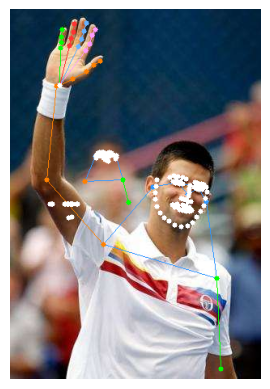

In [18]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming the given data is stored in the variable 'data'
image_array = result['visualization'][0]

# Display the image using Matplotlib
plt.imshow(image_array, cmap='gray')
plt.axis('off')  # Hide the axis ticks and labels
plt.show()

In [19]:
# Assuming the given data is stored in the variable 'data'
image_array = result['visualization'][0]
bgr_image = cv2.cvtColor(image_array, cv2.COLOR_RGB2BGR)

# Display the image using OpenCV
cv2.imshow('Color Image', bgr_image)
cv2.waitKey(0)
cv2.destroyAllWindows()


In [20]:
# Open the video file
#video_path = 0
cap = cv2.VideoCapture("file://media/kristian/HDD/ASL_Citizen/ASL_Citizen/videos/0023159093449660606-CAFETERIA.mp4")
#cap = cv2.VideoCapture(0)

# Loop through the video frames
while cap.isOpened():
    # Read a frame from the video
    success, frame = cap.read()

    if success:
        result_generator = inferencer(frame, show=False, return_vis = True,return_datasample=False)
        result = next(result_generator)
        image_array = cv2.cvtColor(result['visualization'][0], cv2.COLOR_RGB2BGR)
        # Display the annotated frame
        cv2.imshow("RTMPose Inference", image_array)

        # Break the loop if 'q' is pressed
        if cv2.waitKey(1) & 0xFF == ord("q"):
            break
    else:
        # Break the loop if the end of the video is reached
        break

# Release the video capture object and close the display window
cap.release()
cv2.destroyAllWindows()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

In [21]:
result['predictions'][0][0]['keypoints']

[[368.7641296386719, 206.7529537677765],
 [389.24383227030444, 189.88731575012207],
 [335.03285471598304, 186.2732504606247],
 [409.7235349019368, 228.43734550476074],
 [285.6406307220459, 226.02796864509583],
 [472.3673311869304, 371.7952686548233],
 [235.0437183380127, 392.2749719619751],
 [525.3736203511555, 512.743814945221],
 [210.9499505360921, 498.28755378723145],
 [366.35475285847986, 407.93592154979706],
 [339.8516082763672, 593.4579397439957],
 [428.9985491434734, 324.8124198913574],
 [292.86876106262207, 336.859304189682],
 [598.8596121470134, 435.6437554359436],
 [137.46395874023438, 311.5608471632004],
 [345.8750502268473, 428.41562485694885],
 [351.8984921773275, 424.8015595674515],
 [348.2844270070394, 458.5328356027603],
 [598.8596121470134, 428.41562485694885],
 [137.46395874023438, 422.39218270778656],
 [137.46395874023438, 200.7295116186142],
 [255.52342096964514, 427.2109364271164],
 [598.8596121470134, 421.1874942779541],
 [290.45938428243005, 204.34357690811157],


In [22]:
np.array(result['predictions'][0][0]['keypoints']).shape

(133, 2)

In [61]:
def extract_keypoints_from_file(filepath):
    # Open the video file
    cap = cv2.VideoCapture(filepath)

    # Initialize an empty list to store the keypoints for each frame
    keypoints = []

    # Loop through the frames of the video
    while cap.isOpened():
        # Read a frame from the video
        ret, frame = cap.read()
        if not ret:
            break
        frame = cv2.resize(frame,(640,480))
        result_generator = inferencer(frame, show=False, return_vis = False,return_datasample=False)
        result = next(result_generator)
        # Extract the keypoints from the YOLO results object
        if np.array(result['predictions'][0][0]['keypoints']).shape == (133, 2):
            keypoint = np.array(result['predictions'][0][0]['keypoints']).flatten()
            keypoint = np.append(np.array(result['predictions'][0][0]['keypoint_scores']),keypoint)
        else:
            keypoint = np.zeros(399)

        # Append the keypoints to the list
        keypoints.append(keypoint)
        gc.collect()
        torch.cuda.empty_cache()
    # Release the video capture object and the YOLO model
    cap.release()

    # Convert the keypoints list to a NumPy array
    return np.array(keypoints)


In [62]:
def extract_keypoints_from_file_flip(filepath):
    # Open the video file
    cap = cv2.VideoCapture(filepath)

    # Initialize an empty list to store the keypoints for each frame
    keypoints = []

    # Loop through the frames of the video
    while cap.isOpened():
        # Read a frame from the video
        ret, frame = cap.read()
        if not ret:
            break
        frame = cv2.flip(frame, 1)
        frame = cv2.resize(frame,(640,480))
        result_generator = inferencer(frame, show=False, return_vis = False,return_datasample=False)
        result = next(result_generator)
        # Extract the keypoints from the YOLO results object
        if np.array(result['predictions'][0][0]['keypoints']).shape == (133, 2):
            keypoint = np.array(result['predictions'][0][0]['keypoints']).flatten()
            keypoint = np.append(np.array(result['predictions'][0][0]['keypoint_scores']),keypoint)
        else:
            keypoint = np.zeros(399)

        # Append the keypoints to the list
        keypoints.append(keypoint)
        gc.collect()
        torch.cuda.empty_cache()
    # Release the video capture object and the YOLO model
    cap.release()

    # Convert the keypoints list to a NumPy array
    return np.array(keypoints)

In [ ]:
result_generator = inferencer('webcam',
                              show=True, return_vis = True,return_datasample=False,
                              )
results = [result for result in result_generator]
cv2.destroyAllWindows()

In [ ]:
test = extract_keypoints_from_file('file://media/kristian/HDD/ASL_Citizen/ASL_Citizen/videos/0023159093449660606-CAFETERIA.mp4')

In [ ]:
test_flip = extract_keypoints_from_file_flip('file://media/kristian/HDD/ASL_Citizen/ASL_Citizen/videos/0023159093449660606-CAFETERIA.mp4')

In [28]:
test[0]

array([9.19722855e-01, 9.18537438e-01, 9.25077319e-01, 8.25981200e-01,
       8.67071986e-01, 7.73584723e-01, 8.62794638e-01, 6.95110321e-01,
       4.78880286e-01, 2.13661492e-01, 1.75549924e-01, 1.82081327e-01,
       1.90482736e-01, 1.21674821e-01, 1.62808910e-01, 2.19400316e-01,
       7.85566121e-02, 6.15017451e-02, 1.19206011e-01, 1.18448868e-01,
       6.90567791e-02, 7.47043490e-02, 8.29189569e-02, 9.62446332e-01,
       9.73889709e-01, 1.00415611e+00, 1.00584197e+00, 1.00702953e+00,
       1.03141439e+00, 1.05152750e+00, 1.03633893e+00, 1.05816031e+00,
       1.07293963e+00, 1.06585741e+00, 1.05069852e+00, 1.01893640e+00,
       9.83252645e-01, 9.63908434e-01, 9.54297245e-01, 9.53059077e-01,
       9.75260377e-01, 9.94429827e-01, 1.00931573e+00, 9.95362282e-01,
       9.71587956e-01, 9.67489958e-01, 9.78986442e-01, 9.73830700e-01,
       9.66215074e-01, 9.62828994e-01, 9.91789758e-01, 9.85573530e-01,
       1.00018048e+00, 1.02013934e+00, 9.97766018e-01, 1.00275457e+00,
      

In [29]:
test_flip[0]

array([9.17213917e-01, 9.24520850e-01, 9.14957583e-01, 8.60036612e-01,
       8.14568996e-01, 8.62151980e-01, 7.62968183e-01, 4.47844177e-01,
       6.75890565e-01, 2.00479209e-01, 2.18123704e-01, 1.69560418e-01,
       1.78532451e-01, 1.78201571e-01, 1.20475203e-01, 6.62609190e-02,
       2.31806248e-01, 7.30969906e-02, 6.86154813e-02, 7.82907158e-02,
       6.43739551e-02, 1.02299161e-01, 1.08313352e-01, 9.54276860e-01,
       9.54159856e-01, 9.63353395e-01, 9.81949329e-01, 1.03084803e+00,
       1.05536413e+00, 1.07066083e+00, 1.07707977e+00, 1.04269111e+00,
       1.04462516e+00, 1.05802107e+00, 1.04476666e+00, 1.01680422e+00,
       9.99643624e-01, 1.00083220e+00, 9.74252820e-01, 9.61780190e-01,
       9.58216548e-01, 9.67471361e-01, 9.79676127e-01, 9.83761311e-01,
       9.67074752e-01, 9.68690038e-01, 1.00252569e+00, 1.01455736e+00,
       9.96881485e-01, 9.79582548e-01, 9.99086022e-01, 9.92591977e-01,
       1.00592375e+00, 1.02614152e+00, 9.93898392e-01, 9.99223471e-01,
      

In [30]:
test.shape

(55, 399)

In [63]:
def signvideodataframe(filepath):
    # Read the CSV file into a DataFrame
    df = pd.read_csv(filepath)

    # Define the path to the videos directory
    #path = 'file:///media/kristian/HDD/ASL_Citizen/ASL_Citizen/videos/'
    path = 'file:///home/kristian/ASL_Citizen/videos/'
    # Create a 'Path' column by concatenating the path with 'Video file' column
    df['Path'] = path + df['Video file']
    
    # Calculate the frequency of each gloss and create a 'frequency' column
    df['Frequency'] = df['Gloss'].map(df['Gloss'].value_counts())

    # Sort the DataFrame by the 'Gloss' column
    df = df.sort_values(by='Gloss')

    # Reset the index of the DataFrame
    df = df.reset_index(drop=True)

    return df

In [64]:
#traindf = signvideodataframe('file:///media/kristian/HDD/ASL_Citizen/ASL_Citizen/splits/train.csv')
traindf = signvideodataframe('file:///home/kristian/ASL_Citizen/splits/train.csv')

In [65]:
traindf.head()

Participant ID                      Video file    Gloss ASL-LEX Code  \
0            P31   3827306090663467-1 DOLLAR.mp4  1DOLLAR     C_02_025   
1            P37  16792698524451422-1 DOLLAR.mp4  1DOLLAR     C_02_025   
2            P11   6868778695018762-1 DOLLAR.mp4  1DOLLAR     C_02_025   
3            P11   6870709051348651-1 DOLLAR.mp4  1DOLLAR     C_02_025   
4            P50   0719792557216079-1 DOLLAR.mp4  1DOLLAR     C_02_025   

                                                Path  Frequency  
0  file:///home/kristian/ASL_Citizen/videos/38273...         15  
1  file:///home/kristian/ASL_Citizen/videos/16792...         15  
2  file:///home/kristian/ASL_Citizen/videos/68687...         15  
3  file:///home/kristian/ASL_Citizen/videos/68707...         15  
4  file:///home/kristian/ASL_Citizen/videos/07197...         15

In [34]:
traindf.tail()

Participant ID                      Video file    Gloss ASL-LEX Code  \
40149            P37   9716493262876276-ZOOM OFF.mp4  ZOOMOFF     D_01_057   
40150            P31   7550572181460327-ZOOM OFF.mp4  ZOOMOFF     D_01_057   
40151            P46  47985881750082227-ZOOM OFF.mp4  ZOOMOFF     D_01_057   
40152            P50  04671245574824856-ZOOM OFF.mp4  ZOOMOFF     D_01_057   
40153            P51  19959052532136146-ZOOM OFF.mp4  ZOOMOFF     D_01_057   

                                                    Path  Frequency  
40149  file:///home/kristian/ASL_Citizen/videos/97164...         15  
40150  file:///home/kristian/ASL_Citizen/videos/75505...         15  
40151  file:///home/kristian/ASL_Citizen/videos/47985...         15  
40152  file:///home/kristian/ASL_Citizen/videos/04671...         15  
40153  file:///home/kristian/ASL_Citizen/videos/19959...         15

In [66]:
traindf['Path'][100]

'file:///home/kristian/ASL_Citizen/videos/44951093832888867-seedABOUT.mp4'

In [36]:
# Open the video file
#video_path = 0
cap = cv2.VideoCapture(traindf['Path'][100])
#cap = cv2.VideoCapture(0)

# Loop through the video frames
while cap.isOpened():
    # Read a frame from the video
    success, frame = cap.read()

    if success:
        result_generator = inferencer(frame, show=False, return_vis = True,return_datasample=False)
        result = next(result_generator)
        image_array = cv2.cvtColor(result['visualization'][0], cv2.COLOR_RGB2BGR)
        # Display the annotated frame
        cv2.imshow("RTMPose Inference", image_array)

        # Break the loop if 'q' is pressed
        if cv2.waitKey(1) & 0xFF == ord("q"):
            break
    else:
        # Break the loop if the end of the video is reached
        break

# Release the video capture object and close the display window
cap.release()
cv2.destroyAllWindows()

[ERROR:0@162.844] global cap.cpp:164 open VIDEOIO(CV_IMAGES): raised OpenCV exception:

OpenCV(4.8.0) /io/opencv/modules/videoio/src/cap_images.cpp:267: error: (-215:Assertion failed) number < max_number in function 'icvExtractPattern'




In [37]:
traindf.sample(20)

Participant ID                           Video file       Gloss  \
4906             P34             560166013298945-CALM.mp4        CALM   
19954            P50          8764090475491726-LET GO.mp4       LETGO   
7195             P29      07588203589424691-COMMITTEE.mp4   COMMITTEE   
26478            P29         18740575650265412-POLISH.mp4      POLISH   
15195            P27           5944117496827583-GRADE.mp4       GRADE   
19695            P16            9102691480954739-LEAD.mp4        LEAD   
14783            P11        5671687081581385-GLOVES 3.mp4     GLOVES2   
10651            P38           48122052630834244-DUCK.mp4       DUCK2   
679               P7      006406596782399188-ALL GONE.mp4     ALLGONE   
17017            P31           09935677141288357-HOLD.mp4       HOLD1   
19667            P50        7824979602249982-LAY DOWN.mp4     LAYDOWN   
12038            P40      9803892380239438-EXPERIENCE.mp4  EXPERIENCE   
16205            P52        9681653772573444-seedHARD.mp4        HARD   
28110            P31         7114744192932894-REGULAR.mp4     REGULAR   
18651            P11           9729918946241969-JAPAN.mp4       JAPAN   
35038             P7          05183001462551995-TEACH.mp4      TEACH1   
38150            P16           47737963759206403-WALK.mp4       WALK1   
36330            P43          21864719134415633-TOPIC.mp4       TOPIC   
4117             P52  3917353240308641-seedBREAK DOWN.mp4  BREAKDOWN1   
18979            P40        5271558776548799-KANGAROO.mp4   KANGAROO3   

      ASL-LEX Code                                               Path  \
4906      G_03_004  file:///home/kristian/ASL_Citizen/videos/56016...   
19954     F_02_034  file:///home/kristian/ASL_Citizen/videos/87640...   
7195      J_03_072  file:///home/kristian/ASL_Citizen/videos/07588...   
26478     J_01_086  file:///home/kristian/ASL_Citizen/videos/18740...   
15195     F_02_076  file:///home/kristian/ASL_Citizen/videos/59441...   
19695     J_01_046  file:///home/kristian/ASL_Citizen/videos/91026...   
14783     K_01_012  file:///home/kristian/ASL_Citizen/videos/56716...   
10651     D_01_079  file:///home/kristian/ASL_Citizen/videos/48122...   
679       J_03_021  file:///home/kristian/ASL_Citizen/videos/00640...   
17017     F_02_080  file:///home/kristian/ASL_Citizen/videos/09935...   
19667     J_02_004  file:///home/kristian/ASL_Citizen/videos/78249...   
12038     B_02_064  file:///home/kristian/ASL_Citizen/videos/98038...   
16205     C_01_036  file:///home/kristian/ASL_Citizen/videos/96816...   
28110     J_01_067  file:///home/kristian/ASL_Citizen/videos/71147...   
18651     D_01_046  file:///home/kristian/ASL_Citizen/videos/97299...   
35038     D_02_052  file:///home/kristian/ASL_Citizen/videos/05183...   
38150     D_02_057  file:///home/kristian/ASL_Citizen/videos/47737...   
36330     H_01_103  file:///home/kristian/ASL_Citizen/videos/21864...   
4117      F_01_030  file:///home/kristian/ASL_Citizen/videos/39173...   
18979     D_03_079  file:///home/kristian/ASL_Citizen/videos/52715...   

       Frequency  
4906          15  
19954         16  
7195          15  
26478         13  
15195         13  
19695         14  
14783         15  
10651         17  
679           15  
17017         14  
19667         16  
12038         15  
16205         15  
28110         16  
18651         16  
35038         17  
38150         13  
36330         14  
4117          14  
18979         16

In [67]:
traindf = traindf[traindf['Frequency'] > 17]
traindf = traindf.reset_index(drop=True)

In [39]:
traindf.head()

Participant ID                     Video file Gloss ASL-LEX Code  \
0            P52  07157565148825373-seedAXE.mp4  AXE1     G_03_066   
1            P28       7179300005186042-AXE.mp4  AXE1     G_03_066   
2            P29      16216064841959765-AXE.mp4  AXE1     G_03_066   
3            P37       6193814382865199-AXE.mp4  AXE1     G_03_066   
4            P40       5947453960317015-AXE.mp4  AXE1     G_03_066   

                                                Path  Frequency  
0  file:///home/kristian/ASL_Citizen/videos/07157...         19  
1  file:///home/kristian/ASL_Citizen/videos/71793...         19  
2  file:///home/kristian/ASL_Citizen/videos/16216...         19  
3  file:///home/kristian/ASL_Citizen/videos/61938...         19  
4  file:///home/kristian/ASL_Citizen/videos/59474...         19

In [40]:
traindf.tail()

Participant ID                      Video file     Gloss ASL-LEX Code  \
945            P50   9161417844146778-WHAT FOR.mp4  WHATFOR1     C_02_054   
946            P14  00930662603221255-WHAT FOR.mp4  WHATFOR1     C_02_054   
947            P27     82063651021682-WHAT FOR.mp4  WHATFOR1     C_02_054   
948            P40   5268072837528903-WHAT FOR.mp4  WHATFOR1     C_02_054   
949            P40   6363286086951516-WHAT FOR.mp4  WHATFOR1     C_02_054   

                                                  Path  Frequency  
945  file:///home/kristian/ASL_Citizen/videos/91614...         20  
946  file:///home/kristian/ASL_Citizen/videos/00930...         20  
947  file:///home/kristian/ASL_Citizen/videos/82063...         20  
948  file:///home/kristian/ASL_Citizen/videos/52680...         20  
949  file:///home/kristian/ASL_Citizen/videos/63632...         20

In [41]:
traindf.describe()

Frequency
count  950.000000
mean    19.082105
std      1.316026
min     18.000000
25%     18.000000
50%     19.000000
75%     20.000000
max     24.000000

In [68]:
traindf['Gloss'].nunique()

50

In [69]:
words = traindf['Gloss'].unique()
words

array(['AXE1', 'BACKPACK1', 'BASKETBALL1', 'BEE1', 'BELT1', 'BITE1',
       'BREAKFAST1', 'CANCER1', 'CHRISTMAS1', 'CONFUSED1', 'DARK1',
       'DEAF1', 'DECIDE1', 'DEMAND1', 'DEVELOP1', 'DINNER1', 'DOG1',
       'DOWNSIZE1', 'DRAG1', 'EAT1', 'EDIT1', 'ELEVATOR1', 'FINE1',
       'FLOAT1', 'FOREIGNER1', 'GUESS1', 'HALLOWEEN1', 'HOSPITAL1',
       'HURDLE/TRIP1', 'JEWELRY', 'KNIGHT1', 'LOCK1', 'LUNCH1', 'MAPLE',
       'MEAT1', 'MECHANIC1', 'MICROSCOPE1', 'MOVIE1', 'NOON1', 'PARTY1',
       'PATIENT2', 'RAZOR2', 'RIVER1', 'ROCKINGCHAIR1', 'SHAVE1', 'SINK',
       'SQUEEZE', 'THEY1', 'TWINS1', 'WHATFOR1'], dtype=object)

In [70]:
#valdf = signvideodataframe('file:///media/kristian/HDD/ASL_Citizen/ASL_Citizen/splits/val.csv') 
valdf = signvideodataframe('file:///home/kristian/ASL_Citizen/splits/val.csv') 

In [71]:
valdf.head()

Participant ID                      Video file     Gloss ASL-LEX Code  \
0            P26  22595012150860327-1 DOLLAR.mp4   1DOLLAR     C_02_025   
1            P39   7421622940519235-1 DOLLAR.mp4   1DOLLAR     C_02_025   
2            P21    686738356933241-1 DOLLAR.mp4   1DOLLAR     C_02_025   
3            P12  9219095671540121-5 DOLLARS.mp4  5DOLLARS     B_01_062   
4            P21  1448188216215387-5 DOLLARS.mp4  5DOLLARS     B_01_062   

                                                Path  Frequency  
0  file:///home/kristian/ASL_Citizen/videos/22595...          3  
1  file:///home/kristian/ASL_Citizen/videos/74216...          3  
2  file:///home/kristian/ASL_Citizen/videos/68673...          3  
3  file:///home/kristian/ASL_Citizen/videos/92190...          4  
4  file:///home/kristian/ASL_Citizen/videos/14481...          4

In [46]:
valdf.tail()

Participant ID                      Video file    Gloss ASL-LEX Code  \
10299            P21    6959326205750493-ZOOM IN.mp4   ZOOMIN     B_02_056   
10300            P12   7758716133684984-ZOOM OFF.mp4  ZOOMOFF     D_01_057   
10301            P39    844134294032034-ZOOM OFF.mp4  ZOOMOFF     D_01_057   
10302            P21   5548062993721732-ZOOM OFF.mp4  ZOOMOFF     D_01_057   
10303            P26  19366754134806952-ZOOM OFF.mp4  ZOOMOFF     D_01_057   

                                                    Path  Frequency  
10299  file:///home/kristian/ASL_Citizen/videos/69593...          3  
10300  file:///home/kristian/ASL_Citizen/videos/77587...          4  
10301  file:///home/kristian/ASL_Citizen/videos/84413...          4  
10302  file:///home/kristian/ASL_Citizen/videos/55480...          4  
10303  file:///home/kristian/ASL_Citizen/videos/19366...          4

In [72]:
#testdf = signvideodataframe('file:///media/kristian/HDD/ASL_Citizen/ASL_Citizen/splits/test.csv')
testdf = signvideodataframe('file:///home/kristian/ASL_Citizen/splits/test.csv')

In [48]:
testdf.head()

Participant ID                       Video file    Gloss ASL-LEX Code  \
0            P18   23521769221811684-1 DOLLAR.mp4  1DOLLAR     C_02_025   
1            P42  023931338852502426-1 DOLLAR.mp4  1DOLLAR     C_02_025   
2            P49    4893817008748198-1 DOLLAR.mp4  1DOLLAR     C_02_025   
3            P17   13991818149960333-1 DOLLAR.mp4  1DOLLAR     C_02_025   
4            P49   34625615110480457-1 DOLLAR.mp4  1DOLLAR     C_02_025   

                                                Path  Frequency  
0  file:///home/kristian/ASL_Citizen/videos/23521...         13  
1  file:///home/kristian/ASL_Citizen/videos/02393...         13  
2  file:///home/kristian/ASL_Citizen/videos/48938...         13  
3  file:///home/kristian/ASL_Citizen/videos/13991...         13  
4  file:///home/kristian/ASL_Citizen/videos/34625...         13

In [49]:
testdf.tail()

Participant ID                     Video file    Gloss ASL-LEX Code  \
32936            P18  4320702510886756-ZOOM OFF.mp4  ZOOMOFF     D_01_057   
32937             P9  7676354653247301-ZOOM OFF.mp4  ZOOMOFF     D_01_057   
32938            P47  5386272465310649-ZOOM OFF.mp4  ZOOMOFF     D_01_057   
32939            P18   738440364224181-ZOOM OFF.mp4  ZOOMOFF     D_01_057   
32940            P17  9953298353288469-ZOOM OFF.mp4  ZOOMOFF     D_01_057   

                                                    Path  Frequency  
32936  file:///home/kristian/ASL_Citizen/videos/43207...         13  
32937  file:///home/kristian/ASL_Citizen/videos/76763...         13  
32938  file:///home/kristian/ASL_Citizen/videos/53862...         13  
32939  file:///home/kristian/ASL_Citizen/videos/73844...         13  
32940  file:///home/kristian/ASL_Citizen/videos/99532...         13

In [73]:
valdf = valdf[valdf['Gloss'].isin(words)]
valdf = valdf.reset_index(drop=True)

In [51]:
valdf.head()

Participant ID                     Video file      Gloss ASL-LEX Code  \
0            P39      19778675091674147-AXE.mp4       AXE1     G_03_066   
1            P26       8581142177964065-AXE.mp4       AXE1     G_03_066   
2            P39       3877478645046861-AXE.mp4       AXE1     G_03_066   
3            P21       8521417940364975-AXE.mp4       AXE1     G_03_066   
4             P5  9990244640190733-BACKPACK.mp4  BACKPACK1     G_03_091   

                                                Path  Frequency  
0  file:///home/kristian/ASL_Citizen/videos/19778...          4  
1  file:///home/kristian/ASL_Citizen/videos/85811...          4  
2  file:///home/kristian/ASL_Citizen/videos/38774...          4  
3  file:///home/kristian/ASL_Citizen/videos/85214...          4  
4  file:///home/kristian/ASL_Citizen/videos/99902...          3

In [52]:
valdf.tail()

Participant ID                       Video file     Gloss ASL-LEX Code  \
186            P26  032677896012150764-WHAT FOR.mp4  WHATFOR1     C_02_054   
187             P5    6523145816470133-WHAT FOR.mp4  WHATFOR1     C_02_054   
188            P39    0283886564670357-WHAT FOR.mp4  WHATFOR1     C_02_054   
189            P21    6142521746642153-WHAT FOR.mp4  WHATFOR1     C_02_054   
190            P12   06408604416165864-WHAT FOR.mp4  WHATFOR1     C_02_054   

                                                  Path  Frequency  
186  file:///home/kristian/ASL_Citizen/videos/03267...          5  
187  file:///home/kristian/ASL_Citizen/videos/65231...          5  
188  file:///home/kristian/ASL_Citizen/videos/02838...          5  
189  file:///home/kristian/ASL_Citizen/videos/61425...          5  
190  file:///home/kristian/ASL_Citizen/videos/06408...          5

In [74]:
valdf['Gloss'].nunique()

50

In [54]:
valdf.describe()

Frequency
count  191.000000
mean     3.963351
std      0.770316
min      3.000000
25%      3.000000
50%      4.000000
75%      4.000000
max      6.000000

In [55]:
valdf.head()

Participant ID                     Video file      Gloss ASL-LEX Code  \
0            P39      19778675091674147-AXE.mp4       AXE1     G_03_066   
1            P26       8581142177964065-AXE.mp4       AXE1     G_03_066   
2            P39       3877478645046861-AXE.mp4       AXE1     G_03_066   
3            P21       8521417940364975-AXE.mp4       AXE1     G_03_066   
4             P5  9990244640190733-BACKPACK.mp4  BACKPACK1     G_03_091   

                                                Path  Frequency  
0  file:///home/kristian/ASL_Citizen/videos/19778...          4  
1  file:///home/kristian/ASL_Citizen/videos/85811...          4  
2  file:///home/kristian/ASL_Citizen/videos/38774...          4  
3  file:///home/kristian/ASL_Citizen/videos/85214...          4  
4  file:///home/kristian/ASL_Citizen/videos/99902...          3

In [75]:
testdf = testdf[testdf['Gloss'].isin(words)]
testdf = testdf.reset_index(drop=True)

In [57]:
testdf['Gloss'].nunique()

50

In [76]:
testdf.head()

Participant ID                 Video file Gloss ASL-LEX Code  \
0            P15  33721516025652254-AXE.mp4  AXE1     G_03_066   
1            P47    519067006979435-AXE.mp4  AXE1     G_03_066   
2            P35   5104381603195376-AXE.mp4  AXE1     G_03_066   
3            P42  44458614013793873-AXE.mp4  AXE1     G_03_066   
4            P42   9604797909481075-AXE.mp4  AXE1     G_03_066   

                                                Path  Frequency  
0  file:///home/kristian/ASL_Citizen/videos/33721...         15  
1  file:///home/kristian/ASL_Citizen/videos/51906...         15  
2  file:///home/kristian/ASL_Citizen/videos/51043...         15  
3  file:///home/kristian/ASL_Citizen/videos/44458...         15  
4  file:///home/kristian/ASL_Citizen/videos/96047...         15

In [59]:
testdf.tail()

Participant ID                       Video file     Gloss ASL-LEX Code  \
724            P42    3448123355846451-WHAT FOR.mp4  WHATFOR1     C_02_054   
725            P47  034046510887022485-WHAT FOR.mp4  WHATFOR1     C_02_054   
726            P22    9359050586202402-WHAT FOR.mp4  WHATFOR1     C_02_054   
727            P42    2748457214117681-WHAT FOR.mp4  WHATFOR1     C_02_054   
728            P15     540014801916062-WHAT FOR.mp4  WHATFOR1     C_02_054   

                                                  Path  Frequency  
724  file:///home/kristian/ASL_Citizen/videos/34481...         18  
725  file:///home/kristian/ASL_Citizen/videos/03404...         18  
726  file:///home/kristian/ASL_Citizen/videos/93590...         18  
727  file:///home/kristian/ASL_Citizen/videos/27484...         18  
728  file:///home/kristian/ASL_Citizen/videos/54001...         18

In [60]:
testdf.describe()

Frequency
count  729.000000
mean    14.978052
std      2.229192
min      9.000000
25%     14.000000
50%     15.000000
75%     16.000000
max     20.000000

In [77]:
traindf['Gloss'] = traindf['Gloss'].str.replace('\d+', '',regex=True)
valdf['Gloss'] = valdf['Gloss'].str.replace('\d+', '',regex=True)
testdf['Gloss'] = testdf['Gloss'].str.replace('\d+', '',regex=True)

In [78]:
words = traindf['Gloss'].unique()
words

array(['AXE', 'BACKPACK', 'BASKETBALL', 'BEE', 'BELT', 'BITE',
       'BREAKFAST', 'CANCER', 'CHRISTMAS', 'CONFUSED', 'DARK', 'DEAF',
       'DECIDE', 'DEMAND', 'DEVELOP', 'DINNER', 'DOG', 'DOWNSIZE', 'DRAG',
       'EAT', 'EDIT', 'ELEVATOR', 'FINE', 'FLOAT', 'FOREIGNER', 'GUESS',
       'HALLOWEEN', 'HOSPITAL', 'HURDLE/TRIP', 'JEWELRY', 'KNIGHT',
       'LOCK', 'LUNCH', 'MAPLE', 'MEAT', 'MECHANIC', 'MICROSCOPE',
       'MOVIE', 'NOON', 'PARTY', 'PATIENT', 'RAZOR', 'RIVER',
       'ROCKINGCHAIR', 'SHAVE', 'SINK', 'SQUEEZE', 'THEY', 'TWINS',
       'WHATFOR'], dtype=object)

In [79]:
words = valdf['Gloss'].unique()
words

array(['AXE', 'BACKPACK', 'BASKETBALL', 'BEE', 'BELT', 'BITE',
       'BREAKFAST', 'CANCER', 'CHRISTMAS', 'CONFUSED', 'DARK', 'DEAF',
       'DECIDE', 'DEMAND', 'DEVELOP', 'DINNER', 'DOG', 'DOWNSIZE', 'DRAG',
       'EAT', 'EDIT', 'ELEVATOR', 'FINE', 'FLOAT', 'FOREIGNER', 'GUESS',
       'HALLOWEEN', 'HOSPITAL', 'HURDLE/TRIP', 'JEWELRY', 'KNIGHT',
       'LOCK', 'LUNCH', 'MAPLE', 'MEAT', 'MECHANIC', 'MICROSCOPE',
       'MOVIE', 'NOON', 'PARTY', 'PATIENT', 'RAZOR', 'RIVER',
       'ROCKINGCHAIR', 'SHAVE', 'SINK', 'SQUEEZE', 'THEY', 'TWINS',
       'WHATFOR'], dtype=object)

In [80]:
words = testdf['Gloss'].unique()
words

array(['AXE', 'BACKPACK', 'BASKETBALL', 'BEE', 'BELT', 'BITE',
       'BREAKFAST', 'CANCER', 'CHRISTMAS', 'CONFUSED', 'DARK', 'DEAF',
       'DECIDE', 'DEMAND', 'DEVELOP', 'DINNER', 'DOG', 'DOWNSIZE', 'DRAG',
       'EAT', 'EDIT', 'ELEVATOR', 'FINE', 'FLOAT', 'FOREIGNER', 'GUESS',
       'HALLOWEEN', 'HOSPITAL', 'HURDLE/TRIP', 'JEWELRY', 'KNIGHT',
       'LOCK', 'LUNCH', 'MAPLE', 'MEAT', 'MECHANIC', 'MICROSCOPE',
       'MOVIE', 'NOON', 'PARTY', 'PATIENT', 'RAZOR', 'RIVER',
       'ROCKINGCHAIR', 'SHAVE', 'SINK', 'SQUEEZE', 'THEY', 'TWINS',
       'WHATFOR'], dtype=object)

In [81]:
print(traindf['Gloss'].nunique())
print(valdf['Gloss'].nunique())
print(testdf['Gloss'].nunique())

50
50
50


In [ ]:
extract_keypoints_from_file(traindf['Path'][0]).shape

In [ ]:
type(extract_keypoints_from_file(traindf.Path[0]))

In [68]:
cap = cv2.VideoCapture(traindf.Path[0])
length = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
print( length )

100


In [69]:
cap = cv2.VideoCapture(traindf.Path[0])
frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
fps = int(cap.get(cv2.CAP_PROP_FPS))
length = round(frames / fps)
width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
print(frames)
print(fps)
print( length )
print(width)
print(height)

100
31
3
640
480


In [70]:
traindf.count()

Participant ID    950
Video file        950
Gloss             950
ASL-LEX Code      950
Path              950
Frequency         950
dtype: int64

In [82]:
def frames_from_file(filepath):
    cap = cv2.VideoCapture(filepath)
    frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
    fps = int(cap.get(cv2.CAP_PROP_FPS))
    length = round(frames / fps)
    width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
    height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
    return frames, fps, length, width, height

In [72]:
frames_from_file(traindf.Path[643])

(83, 29, 3, 640, 480)

In [73]:
tqdm.pandas()
traindf[['Frames', 'FPS', 'Length', 'Width', 'Height']] = traindf['Path'].progress_apply(lambda x: pd.Series(frames_from_file(x)))

100%|█████████████████████████████████████████| 950/950 [00:15<00:00, 61.01it/s]


In [74]:
traindf.head()

Participant ID                     Video file Gloss ASL-LEX Code  \
0            P52  07157565148825373-seedAXE.mp4   AXE     G_03_066   
1            P28       7179300005186042-AXE.mp4   AXE     G_03_066   
2            P29      16216064841959765-AXE.mp4   AXE     G_03_066   
3            P37       6193814382865199-AXE.mp4   AXE     G_03_066   
4            P40       5947453960317015-AXE.mp4   AXE     G_03_066   

                                                Path  Frequency  Frames  FPS  \
0  file:///home/kristian/ASL_Citizen/videos/07157...         19     100   31   
1  file:///home/kristian/ASL_Citizen/videos/71793...         19      81   30   
2  file:///home/kristian/ASL_Citizen/videos/16216...         19      47   30   
3  file:///home/kristian/ASL_Citizen/videos/61938...         19      67   30   
4  file:///home/kristian/ASL_Citizen/videos/59474...         19      89   30   

   Length  Width  Height  
0       3    640     480  
1       3    640     480  
2       2    640     480  
3       2    640     480  
4       3    640     480

In [75]:
traindf['Frames'].max()

540

In [76]:
traindf.describe()

Frequency      Frames         FPS      Length       Width      Height
count  950.000000  950.000000  950.000000  950.000000  950.000000  950.000000
mean    19.082105   87.755789   29.354737    3.016842  641.347368  480.252632
std      1.316026   46.654745    2.197195    1.568167   20.731496    3.887155
min     18.000000   25.000000   11.000000    1.000000  640.000000  480.000000
25%     18.000000   60.000000   29.000000    2.000000  640.000000  480.000000
50%     19.000000   77.000000   30.000000    3.000000  640.000000  480.000000
75%     20.000000   97.000000   30.000000    3.000000  640.000000  480.000000
max     24.000000  540.000000   31.000000   18.000000  960.000000  540.000000

In [77]:
traindf = traindf[(traindf['Length'] > 1) & (traindf['FPS'] > 28) &(traindf['Frames'] < 131) ]
#filtered_df = traindf[(traindf['Frames'] > 0) & (traindf['Frames'] < 121)]
#filtered_df = traindf[traindf['Frames'] > 0]
traindf= traindf.reset_index(drop=True)
traindf.describe()

Frequency      Frames         FPS      Length       Width      Height
count  804.000000  804.000000  804.000000  804.000000  804.000000  804.000000
mean    19.084577   76.113184   29.680348    2.593284  641.592040  480.298507
std      1.305343   20.091965    0.479790    0.671427   22.528858    4.224161
min     18.000000   45.000000   29.000000    2.000000  640.000000  480.000000
25%     18.000000   60.000000   29.000000    2.000000  640.000000  480.000000
50%     19.000000   74.000000   30.000000    2.000000  640.000000  480.000000
75%     20.000000   88.000000   30.000000    3.000000  640.000000  480.000000
max     24.000000  130.000000   31.000000    4.000000  960.000000  540.000000

In [78]:
traindf['Frequency'] = traindf['Gloss'].map(traindf['Gloss'].value_counts())
#traindf = traindf.sort_values(by='Frequency',)

traindf.describe()

Frequency      Frames         FPS      Length       Width      Height
count  804.000000  804.000000  804.000000  804.000000  804.000000  804.000000
mean    16.261194   76.113184   29.680348    2.593284  641.592040  480.298507
std      1.722009   20.091965    0.479790    0.671427   22.528858    4.224161
min     13.000000   45.000000   29.000000    2.000000  640.000000  480.000000
25%     15.000000   60.000000   29.000000    2.000000  640.000000  480.000000
50%     16.000000   74.000000   30.000000    2.000000  640.000000  480.000000
75%     17.000000   88.000000   30.000000    3.000000  640.000000  480.000000
max     20.000000  130.000000   31.000000    4.000000  960.000000  540.000000

In [79]:
traindf.head(10)

Participant ID                     Video file Gloss ASL-LEX Code  \
0            P52  07157565148825373-seedAXE.mp4   AXE     G_03_066   
1            P28       7179300005186042-AXE.mp4   AXE     G_03_066   
2            P29      16216064841959765-AXE.mp4   AXE     G_03_066   
3            P37       6193814382865199-AXE.mp4   AXE     G_03_066   
4            P40       5947453960317015-AXE.mp4   AXE     G_03_066   
5            P40        929570016067665-AXE.mp4   AXE     G_03_066   
6            P16        904767261814883-AXE.mp4   AXE     G_03_066   
7            P43     016134052760367945-AXE.mp4   AXE     G_03_066   
8            P40      23099527328070546-AXE.mp4   AXE     G_03_066   
9            P37      21310388087265242-AXE.mp4   AXE     G_03_066   

                                                Path  Frequency  Frames  FPS  \
0  file:///home/kristian/ASL_Citizen/videos/07157...         18     100   31   
1  file:///home/kristian/ASL_Citizen/videos/71793...         18      81   30   
2  file:///home/kristian/ASL_Citizen/videos/16216...         18      47   30   
3  file:///home/kristian/ASL_Citizen/videos/61938...         18      67   30   
4  file:///home/kristian/ASL_Citizen/videos/59474...         18      89   30   
5  file:///home/kristian/ASL_Citizen/videos/92957...         18     112   29   
6  file:///home/kristian/ASL_Citizen/videos/90476...         18      64   30   
7  file:///home/kristian/ASL_Citizen/videos/01613...         18      75   30   
8  file:///home/kristian/ASL_Citizen/videos/23099...         18      91   29   
9  file:///home/kristian/ASL_Citizen/videos/21310...         18      69   30   

   Length  Width  Height  
0       3    640     480  
1       3    640     480  
2       2    640     480  
3       2    640     480  
4       3    640     480  
5       4    640     480  
6       2    640     480  
7       2    640     480  
8       3    640     480  
9       2    640     480

In [80]:
print(traindf['Gloss'].nunique())

50


In [81]:
tqdm.pandas()
valdf[['Frames', 'FPS', 'Length', 'Width', 'Height']] = valdf['Path'].progress_apply(lambda x: pd.Series(frames_from_file(x)))

100%|█████████████████████████████████████████| 191/191 [00:03<00:00, 50.66it/s]


In [82]:
valdf.head()

Participant ID                     Video file     Gloss ASL-LEX Code  \
0            P39      19778675091674147-AXE.mp4       AXE     G_03_066   
1            P26       8581142177964065-AXE.mp4       AXE     G_03_066   
2            P39       3877478645046861-AXE.mp4       AXE     G_03_066   
3            P21       8521417940364975-AXE.mp4       AXE     G_03_066   
4             P5  9990244640190733-BACKPACK.mp4  BACKPACK     G_03_091   

                                                Path  Frequency  Frames  FPS  \
0  file:///home/kristian/ASL_Citizen/videos/19778...          4     121   30   
1  file:///home/kristian/ASL_Citizen/videos/85811...          4      81   29   
2  file:///home/kristian/ASL_Citizen/videos/38774...          4     120   30   
3  file:///home/kristian/ASL_Citizen/videos/85214...          4      71   29   
4  file:///home/kristian/ASL_Citizen/videos/99902...          3      93   29   

   Length  Width  Height  
0       4    640     480  
1       3    640     480  
2       4    640     480  
3       2    640     480  
4       3    640     480

In [83]:
valdf['Frames'].max()

207

In [84]:
valdf.describe()

Frequency      Frames         FPS      Length  Width  Height
count  191.000000  191.000000  191.000000  191.000000  191.0   191.0
mean     3.963351   88.905759   29.706806    3.000000  640.0   480.0
std      0.770316   36.214006    0.456423    1.248157    0.0     0.0
min      3.000000   37.000000   29.000000    1.000000  640.0   480.0
25%      3.000000   61.500000   29.000000    2.000000  640.0   480.0
50%      4.000000   76.000000   30.000000    3.000000  640.0   480.0
75%      4.000000  117.500000   30.000000    4.000000  640.0   480.0
max      6.000000  207.000000   30.000000    7.000000  640.0   480.0

In [85]:
valdf = valdf[(valdf['Length'] > 1) & (valdf['FPS'] > 28) &(valdf['Frames'] < 131) ]
#filtered_df = traindf[(traindf['Frames'] > 0) & (traindf['Frames'] < 121)]
#filtered_df = traindf[traindf['Frames'] > 0]
valdf = valdf.reset_index(drop=True)
valdf.describe()

Frequency      Frames         FPS      Length  Width  Height
count  162.000000  162.000000  162.000000  162.000000  162.0   162.0
mean     3.993827   78.203704   29.691358    2.623457  640.0   480.0
std      0.760001   23.787397    0.463365    0.772311    0.0     0.0
min      3.000000   45.000000   29.000000    2.000000  640.0   480.0
25%      3.000000   59.250000   29.000000    2.000000  640.0   480.0
50%      4.000000   71.500000   30.000000    2.000000  640.0   480.0
75%      4.000000   92.000000   30.000000    3.000000  640.0   480.0
max      6.000000  130.000000   30.000000    4.000000  640.0   480.0

In [86]:
valdf['Frequency'] = valdf['Gloss'].map(valdf['Gloss'].value_counts())
#valdf = valdf.sort_values(by='Frequency',)

valdf.describe()

Frequency      Frames         FPS      Length  Width  Height
count  162.000000  162.000000  162.000000  162.000000  162.0   162.0
mean     3.506173   78.203704   29.691358    2.623457  640.0   480.0
std      0.907162   23.787397    0.463365    0.772311    0.0     0.0
min      2.000000   45.000000   29.000000    2.000000  640.0   480.0
25%      3.000000   59.250000   29.000000    2.000000  640.0   480.0
50%      4.000000   71.500000   30.000000    2.000000  640.0   480.0
75%      4.000000   92.000000   30.000000    3.000000  640.0   480.0
max      5.000000  130.000000   30.000000    4.000000  640.0   480.0

In [87]:
valdf.tail(60)

Participant ID                          Video file         Gloss  \
102            P12          2553847483769758-LUNCH.mp4         LUNCH   
103            P12          5796656512680336-LUNCH.mp4         LUNCH   
104             P5          5530107164077924-LUNCH.mp4         LUNCH   
105            P21         07736207797943306-LUNCH.mp4         LUNCH   
106            P26          2560023931191153-MAPLE.mp4         MAPLE   
107            P21          7629092396207264-MAPLE.mp4         MAPLE   
108            P39           6940052288653344-MEAT.mp4          MEAT   
109            P21          23447000304598498-MEAT.mp4          MEAT   
110            P26          46170617189439445-MEAT.mp4          MEAT   
111            P26        424117143455232-MECHANIC.mp4      MECHANIC   
112            P21       7355641552290353-MECHANIC.mp4      MECHANIC   
113            P26     1550944296003025-MICROSCOPE.mp4    MICROSCOPE   
114            P21     9187403001004872-MICROSCOPE.mp4    MICROSCOPE   
115            P39     5547731542068628-MICROSCOPE.mp4    MICROSCOPE   
116             P5    10557248501909733-MICROSCOPE.mp4    MICROSCOPE   
117            P26          2838376949179944-MOVIE.mp4         MOVIE   
118            P12         39474504957896217-MOVIE.mp4         MOVIE   
119            P21           671764401941833-MOVIE.mp4         MOVIE   
120            P39          5535338426456671-MOVIE.mp4         MOVIE   
121            P12          15347326711184706-NOON.mp4          NOON   
122            P26          22732217637347518-NOON.mp4          NOON   
123            P21           7713607971692202-NOON.mp4          NOON   
124            P39            717958009426233-NOON.mp4          NOON   
125            P12           878457250310533-PARTY.mp4         PARTY   
126            P26         29398177566155903-PARTY.mp4         PARTY   
127            P21        006918970578539518-PARTY.mp4         PARTY   
128            P39          6496108914533325-PARTY.mp4         PARTY   
129            P26     08197479357139326-PATIENT 2.mp4       PATIENT   
130            P12     06585822033156608-PATIENT 2.mp4       PATIENT   
131            P21      9858541230690814-PATIENT 2.mp4       PATIENT   
132            P26       28202328150486666-RAZOR 2.mp4         RAZOR   
133            P21        2710513815020268-RAZOR 2.mp4         RAZOR   
134            P21          5962378845845178-RIVER.mp4         RIVER   
135            P12          3054167723169219-RIVER.mp4         RIVER   
136            P26         05621288177415629-RIVER.mp4         RIVER   
137            P26  9826258167906428-ROCKING CHAIR.mp4  ROCKINGCHAIR   
138            P21  6414524542629407-ROCKING CHAIR.mp4  ROCKINGCHAIR   
139            P12  6050297960065525-ROCKING CHAIR.mp4  ROCKINGCHAIR   
140            P39  8563899734807414-ROCKING CHAIR.mp4  ROCKINGCHAIR   
141            P26          6416983573445294-SHAVE.mp4         SHAVE   
142            P39          3159241677201454-SHAVE.mp4         SHAVE   
143            P21        021193533049441937-SHAVE.mp4         SHAVE   
144            P12          3423044704100937-SHAVE.mp4         SHAVE   
145            P12          6961575623504714-SHAVE.mp4         SHAVE   
146            P12          36176458889227514-SINK.mp4          SINK   
147            P21           6376722418151588-SINK.mp4          SINK   
148            P26           9377718462347715-SINK.mp4          SINK   
149            P26       17092802473126545-SQUEEZE.mp4       SQUEEZE   
150            P21       03951129691638511-SQUEEZE.mp4       SQUEEZE   
151            P26           2151941336300882-THEY.mp4          THEY   
152            P21           9598803772091737-THEY.mp4          THEY   
153            P39         30415256515089983-TWINS.mp4         TWINS   
154            P26          9969703511848236-TWINS.mp4         TWINS   
155             P5          7359133874002342-TWINS.mp4         TWINS   
156            P21          9942639780287319

In [88]:
valdf.head(10)

Participant ID                       Video file       Gloss ASL-LEX Code  \
0            P39        19778675091674147-AXE.mp4         AXE     G_03_066   
1            P26         8581142177964065-AXE.mp4         AXE     G_03_066   
2            P39         3877478645046861-AXE.mp4         AXE     G_03_066   
3            P21         8521417940364975-AXE.mp4         AXE     G_03_066   
4             P5    9990244640190733-BACKPACK.mp4    BACKPACK     G_03_091   
5            P39    4985293038019454-BACKPACK.mp4    BACKPACK     G_03_091   
6            P21      20198961584817-BACKPACK.mp4    BACKPACK     G_03_091   
7             P5  8423017864044668-BASKETBALL.mp4  BASKETBALL     A_03_045   
8            P39  6251993314243527-BASKETBALL.mp4  BASKETBALL     A_03_045   
9            P26  6152714959604932-BASKETBALL.mp4  BASKETBALL     A_03_045   

                                                Path  Frequency  Frames  FPS  \
0  file:///home/kristian/ASL_Citizen/videos/19778...          4     121   30   
1  file:///home/kristian/ASL_Citizen/videos/85811...          4      81   29   
2  file:///home/kristian/ASL_Citizen/videos/38774...          4     120   30   
3  file:///home/kristian/ASL_Citizen/videos/85214...          4      71   29   
4  file:///home/kristian/ASL_Citizen/videos/99902...          3      93   29   
5  file:///home/kristian/ASL_Citizen/videos/49852...          3     128   30   
6  file:///home/kristian/ASL_Citizen/videos/20198...          3      48   30   
7  file:///home/kristian/ASL_Citizen/videos/84230...          5      90   30   
8  file:///home/kristian/ASL_Citizen/videos/62519...          5     127   30   
9  file:///home/kristian/ASL_Citizen/videos/61527...          5      60   30   

   Length  Width  Height  
0       4    640     480  
1       3    640     480  
2       4    640     480  
3       2    640     480  
4       3    640     480  
5       4    640     480  
6       2    640     480  
7       3    640     480  
8       4    640     480  
9       2    640     480

In [89]:
valdf.describe()

Frequency      Frames         FPS      Length  Width  Height
count  162.000000  162.000000  162.000000  162.000000  162.0   162.0
mean     3.506173   78.203704   29.691358    2.623457  640.0   480.0
std      0.907162   23.787397    0.463365    0.772311    0.0     0.0
min      2.000000   45.000000   29.000000    2.000000  640.0   480.0
25%      3.000000   59.250000   29.000000    2.000000  640.0   480.0
50%      4.000000   71.500000   30.000000    2.000000  640.0   480.0
75%      4.000000   92.000000   30.000000    3.000000  640.0   480.0
max      5.000000  130.000000   30.000000    4.000000  640.0   480.0

In [90]:
print(valdf['Gloss'].nunique())

50


In [91]:
tqdm.pandas()
testdf[['Frames', 'FPS', 'Length', 'Width', 'Height']] = testdf['Path'].progress_apply(lambda x: pd.Series(frames_from_file(x)))

100%|█████████████████████████████████████████| 729/729 [00:16<00:00, 44.57it/s]


In [92]:
testdf.head()

Participant ID                 Video file Gloss ASL-LEX Code  \
0            P15  33721516025652254-AXE.mp4   AXE     G_03_066   
1            P47    519067006979435-AXE.mp4   AXE     G_03_066   
2            P35   5104381603195376-AXE.mp4   AXE     G_03_066   
3            P42  44458614013793873-AXE.mp4   AXE     G_03_066   
4            P42   9604797909481075-AXE.mp4   AXE     G_03_066   

                                                Path  Frequency  Frames  FPS  \
0  file:///home/kristian/ASL_Citizen/videos/33721...         15     196   29   
1  file:///home/kristian/ASL_Citizen/videos/51906...         15     102   26   
2  file:///home/kristian/ASL_Citizen/videos/51043...         15      70   29   
3  file:///home/kristian/ASL_Citizen/videos/44458...         15      57   30   
4  file:///home/kristian/ASL_Citizen/videos/96047...         15      66   30   

   Length  Width  Height  
0       7    640     480  
1       4    640     480  
2       2    640     480  
3       2    960     540  
4       2    960     540

In [93]:
testdf['Frames'].max()

234

In [94]:
testdf.describe()

Frequency      Frames         FPS      Length       Width      Height
count  729.000000  729.000000  729.000000  729.000000  729.000000  729.000000
mean    14.978052   75.192044   28.696845    2.624143  684.334705  488.312757
std      2.229192   27.848864    3.113689    1.003439  110.626974   20.742558
min      9.000000   10.000000   14.000000    0.000000  640.000000  480.000000
25%     14.000000   56.000000   29.000000    2.000000  640.000000  480.000000
50%     15.000000   73.000000   30.000000    3.000000  640.000000  480.000000
75%     16.000000   90.000000   30.000000    3.000000  640.000000  480.000000
max     20.000000  234.000000   31.000000    8.000000  960.000000  540.000000

In [95]:
testdf = testdf[(testdf['Length'] > 1) & (testdf['FPS'] > 28) &(testdf['Frames'] < 131) ]
#filtered_df = traindf[(traindf['Frames'] > 0) & (traindf['Frames'] < 121)]
#filtered_df = traindf[traindf['Frames'] > 0]
testdf = testdf.reset_index(drop=True)
testdf.describe()

Frequency      Frames         FPS      Length       Width      Height
count  534.000000  534.000000  534.000000  534.000000  534.000000  534.000000
mean    15.014981   77.256554   29.702247    2.619850  688.539326  489.101124
std      2.217904   19.420007    0.526337    0.670792  114.896647   21.543121
min      9.000000   45.000000   29.000000    2.000000  640.000000  480.000000
25%     14.000000   61.000000   29.000000    2.000000  640.000000  480.000000
50%     15.000000   75.000000   30.000000    3.000000  640.000000  480.000000
75%     16.000000   91.000000   30.000000    3.000000  640.000000  480.000000
max     20.000000  130.000000   31.000000    4.000000  960.000000  540.000000

In [96]:
testdf['Frequency'] = testdf['Gloss'].map(testdf['Gloss'].value_counts())
#testdf = testdf.sort_values(by='Frequency',)

testdf.describe()

Frequency      Frames         FPS      Length       Width      Height
count  534.000000  534.000000  534.000000  534.000000  534.000000  534.000000
mean    11.254682   77.256554   29.702247    2.619850  688.539326  489.101124
std      2.311308   19.420007    0.526337    0.670792  114.896647   21.543121
min      5.000000   45.000000   29.000000    2.000000  640.000000  480.000000
25%     10.000000   61.000000   29.000000    2.000000  640.000000  480.000000
50%     12.000000   75.000000   30.000000    3.000000  640.000000  480.000000
75%     13.000000   91.000000   30.000000    3.000000  640.000000  480.000000
max     15.000000  130.000000   31.000000    4.000000  960.000000  540.000000

In [97]:
testdf.tail(60)

Participant ID                      Video file    Gloss ASL-LEX Code  \
474             P9      5911137084980156-SHAVE.mp4    SHAVE     J_02_018   
475            P35      5887689273566759-SHAVE.mp4    SHAVE     J_02_018   
476            P48      6621939724418062-SHAVE.mp4    SHAVE     J_02_018   
477            P17     09709454810039175-SHAVE.mp4    SHAVE     J_02_018   
478            P42      3588759801071051-SHAVE.mp4    SHAVE     J_02_018   
479            P35      4608324102845509-SHAVE.mp4    SHAVE     J_02_018   
480             P6     37779347947817365-SHAVE.mp4    SHAVE     J_02_018   
481            P35      5403299092715226-SHAVE.mp4    SHAVE     J_02_018   
482            P47      4814760954431352-SHAVE.mp4    SHAVE     J_02_018   
483            P22      4185420608277408-SHAVE.mp4    SHAVE     J_02_018   
484            P42     45913985094539034-SHAVE.mp4    SHAVE     J_02_018   
485            P48      9572472020825835-SHAVE.mp4    SHAVE     J_02_018   
486            P48       8837115118398433-SINK.mp4     SINK     E_02_042   
487             P9       8342342809172125-SINK.mp4     SINK     E_02_042   
488            P35       5780399875754547-SINK.mp4     SINK     E_02_042   
489             P6      30542066641425136-SINK.mp4     SINK     E_02_042   
490            P47      10941417100216433-SINK.mp4     SINK     E_02_042   
491            P49       9462586175856116-SINK.mp4     SINK     E_02_042   
492            P17         65783462643741-SINK.mp4     SINK     E_02_042   
493            P22       8675465806927196-SINK.mp4     SINK     E_02_042   
494            P42     013933028993222907-SINK.mp4     SINK     E_02_042   
495            P42    1507074049477588-SQUEEZE.mp4  SQUEEZE     H_03_019   
496            P35   47046133854683725-SQUEEZE.mp4  SQUEEZE     H_03_019   
497            P48    5650251393797099-SQUEEZE.mp4  SQUEEZE     H_03_019   
498             P9    1630741460505114-SQUEEZE.mp4  SQUEEZE     H_03_019   
499            P49    6110727438268888-SQUEEZE.mp4  SQUEEZE     H_03_019   
500            P35       4877518027558987-THEY.mp4     THEY     F_02_103   
501            P47      27954487382286475-THEY.mp4     THEY     F_02_103   
502            P17       5713986054090463-THEY.mp4     THEY     F_02_103   
503            P42       9506371438753063-THEY.mp4     THEY     F_02_103   
504            P42       6351385061595975-THEY.mp4     THEY     F_02_103   
505            P35      37410330681116033-THEY.mp4     THEY     F_02_103   
506             P9       8208473879770646-THEY.mp4     THEY     F_02_103   
507            P15       8161529489147155-THEY.mp4     THEY     F_02_103   
508             P6       4843002553575395-THEY.mp4     THEY     F_02_103   
509            P48       6294547374725679-THEY.mp4     THEY     F_02_103   
510            P48     24605674688653978-TWINS.mp4    TWINS     F_01_032   
511            P17     31730779368330464-TWINS.mp4    TWINS     F_01_032   
512            P42      5607838772101854-TWINS.mp4    TWINS     F_01_032   
513             P9      4032127809635533-TWINS.mp4    TWINS     F_01_032   
514            P22     29587887363119436-TWINS.mp4    TWINS     F_01_032   
515            P35     06625351805349333-TWINS.mp4    TWINS     F_01_032   
516            P49      5414581968670888-TWINS.mp4    TWINS     F_01_032   
517            P15     03604051300002031-TWINS.mp4    TWINS     F_01_032   
518            P35      2825233660609592-TWINS.mp4    TWINS     F_01_032   
519             P6      8598719617773274-TWINS.mp4    TWINS     F_01_032   
520            P47     18536227362107272-TWINS.mp4    TWINS     F_01_032   
521            P17  33051835760678294-WHAT FOR.mp4  WHATFOR     C_02_054   
522             P6   6734748834983595-WHAT FOR.mp4  WHATFOR     C_02_054   
523             P6  41953269936944704-WHAT FOR.mp4  WHATFOR     C_02_054   
524            P48  11542521046357379-WHAT FOR.mp4  WHATFOR     C_02_054   
525             P9   6491618764233542-WHAT FOR.mp4  

In [98]:
testdf.head(10)

Participant ID                 Video file Gloss ASL-LEX Code  \
0            P35   5104381603195376-AXE.mp4   AXE     G_03_066   
1            P42  44458614013793873-AXE.mp4   AXE     G_03_066   
2            P42   9604797909481075-AXE.mp4   AXE     G_03_066   
3             P9  30728048195204827-AXE.mp4   AXE     G_03_066   
4             P6  28522130623160047-AXE.mp4   AXE     G_03_066   
5             P6   9169591255818932-AXE.mp4   AXE     G_03_066   
6            P17   7135244799398011-AXE.mp4   AXE     G_03_066   
7            P49  23228935359891456-AXE.mp4   AXE     G_03_066   
8            P22   5872128462194921-AXE.mp4   AXE     G_03_066   
9            P35   3681922148149226-AXE.mp4   AXE     G_03_066   

                                                Path  Frequency  Frames  FPS  \
0  file:///home/kristian/ASL_Citizen/videos/51043...         11      70   29   
1  file:///home/kristian/ASL_Citizen/videos/44458...         11      57   30   
2  file:///home/kristian/ASL_Citizen/videos/96047...         11      66   30   
3  file:///home/kristian/ASL_Citizen/videos/30728...         11      96   30   
4  file:///home/kristian/ASL_Citizen/videos/28522...         11      54   29   
5  file:///home/kristian/ASL_Citizen/videos/91695...         11      59   30   
6  file:///home/kristian/ASL_Citizen/videos/71352...         11      82   30   
7  file:///home/kristian/ASL_Citizen/videos/23228...         11      94   30   
8  file:///home/kristian/ASL_Citizen/videos/58721...         11      53   30   
9  file:///home/kristian/ASL_Citizen/videos/36819...         11      77   30   

   Length  Width  Height  
0       2    640     480  
1       2    960     540  
2       2    960     540  
3       3    640     480  
4       2    640     480  
5       2    640     480  
6       3    640     480  
7       3    640     480  
8       2    640     480  
9       3    640     480

In [99]:
testdf.describe()

Frequency      Frames         FPS      Length       Width      Height
count  534.000000  534.000000  534.000000  534.000000  534.000000  534.000000
mean    11.254682   77.256554   29.702247    2.619850  688.539326  489.101124
std      2.311308   19.420007    0.526337    0.670792  114.896647   21.543121
min      5.000000   45.000000   29.000000    2.000000  640.000000  480.000000
25%     10.000000   61.000000   29.000000    2.000000  640.000000  480.000000
50%     12.000000   75.000000   30.000000    3.000000  640.000000  480.000000
75%     13.000000   91.000000   30.000000    3.000000  640.000000  480.000000
max     15.000000  130.000000   31.000000    4.000000  960.000000  540.000000

In [100]:
print(testdf['Gloss'].nunique())

50


In [ ]:
keypoints_series = traindf['Path'].progress_apply(extract_keypoints_from_file)
np.save("/home/kristian/Capstone/keypoints/ASL_Citizen/RTMPose-L/train_keypoints.npy", keypoints_series)
keypoints_series = traindf['Path'].progress_apply(extract_keypoints_from_file_flip)
np.save("/home/kristian/Capstone/keypoints/ASL_Citizen/RTMPose-L/train_keypoints_flip.npy", keypoints_series)

In [ ]:
keypoints_series.shape

In [92]:
np.save("/home/kristian/Capstone/keypoints/ASL_Citizen/RTMPose-L/train_keypoints.npy", keypoints_series)

In [92]:
keypoints_series=np.load("/home/kristian/Capstone/keypoints/ASL_Citizen/RTMPose-L/train_keypoints.npy",allow_pickle=True)

In [93]:
keypoints_series.shape

(804,)

In [94]:
max(keypoints.shape[0] for keypoints in keypoints_series)

130

In [95]:
min(keypoints.shape[0] for keypoints in keypoints_series)

45

In [96]:
max_len = traindf['Frames'].max()

In [97]:
max_len

130

In [99]:
#keypoints_np = np.zeros((len(keypoints_series), max_len, 266))
#for i, keypoints in enumerate(keypoints_series):
#    keypoints_np[i, :keypoints.shape[0], :] = keypoints

In [101]:
# Create a padded array to store keypoints
keypoints_np = np.zeros((len(keypoints_series), max_len, 266))

# Iterate through keypoints_series and fill keypoints_np with pre-padding
for i, keypoints in enumerate(keypoints_series):
    keypoints_len = min(keypoints.shape[0], max_len)
    padding_len = max_len - keypoints_len
    keypoints_np[i, padding_len:, :] = keypoints[:keypoints_len, :]

In [102]:
keypoints_np.shape

(804, 130, 266)

In [103]:
print(keypoints_np[6])

[[  0.           0.           0.         ...   0.           0.
    0.        ]
 [  0.           0.           0.         ...   0.           0.
    0.        ]
 [  0.           0.           0.         ...   0.           0.
    0.        ]
 ...
 [311.62365246 180.99623096 339.03730138 ... 458.35784853 239.05811119
  458.35784853]
 [310.11345768 182.51589537 337.66267522 ... 456.38752186 233.94797389
  456.38752186]
 [308.73122358 180.93710566 336.27411556 ... 459.60636568 227.72271776
  459.60636568]]


In [104]:
keypoints_np.shape

(804, 130, 266)

In [ ]:
keypoints_series = testdf['Path'].progress_apply(extract_keypoints_from_file)
np.save("/home/kristian/Capstone/keypoints/ASL_Citizen/RTMPose-L/test_keypoints.npy", keypoints_series)
keypoints_series = testdf['Path'].progress_apply(extract_keypoints_from_file_flip)
np.save("/home/kristian/Capstone/keypoints/ASL_Citizen/RTMPose-L/test_keypoints_flip.npy", keypoints_series)

In [99]:
keypoints_series.shape

(534,)

In [87]:
np.save("/home/kristian/Capstone/keypoints/ASL_Citizen/RTMPose-L/test_keypoints.npy", keypoints_series)

In [100]:
keypoints_series=np.load("/home/kristian/Capstone/keypoints/ASL_Citizen/RTMPose-L/test_keypoints.npy",allow_pickle=True)

In [101]:
keypoints_series.shape

(534,)

In [73]:
#keypoints_np = np.zeros((len(keypoints_series), max_len, 266))
#for i, keypoints in enumerate(keypoints_series):
#    keypoints_np[i, :keypoints.shape[0], :] = keypoints

In [ ]:
# Create a padded array to store keypoints
keypoints_np = np.zeros((len(keypoints_series), max_len, 1662))

# Iterate through keypoints_series and fill keypoints_np with pre-padding
for i, keypoints in enumerate(keypoints_series):
    keypoints_len = min(keypoints.shape[0], max_len)
    padding_len = max_len - keypoints_len
    keypoints_np[i, padding_len:, :] = keypoints[:keypoints_len, :]

In [74]:
keypoints_np.shape

(1405, 212, 266)

In [ ]:
keypoints_series = valdf['Path'].progress_apply(extract_keypoints_from_file)
np.save("/home/kristian/Capstone/keypoints/ASL_Citizen/RTMPose-L/val_keypoints.npy", keypoints_series)
keypoints_series = valdf['Path'].progress_apply(extract_keypoints_from_file_flip)
np.save("/home/kristian/Capstone/keypoints/ASL_Citizen/RTMPose-L/val_keypoints_flip.npy", keypoints_series)

In [ ]:
keypoints_series.shape

In [ ]:
np.save("/home/kristian/Capstone/keypoints/ASL_Citizen/RTMPose-L/val_keypoints.npy", keypoints_series)

In [ ]:
keypoints_series=np.load("/home/kristian/Capstone/keypoints/ASL_Citizen/RTMPose-L/val_keypoints.npy",allow_pickle=True)

In [ ]:
#keypoints_np = np.zeros((len(keypoints_series), max_len, 266))
#for i, keypoints in enumerate(keypoints_series):
#    keypoints_np[i, :keypoints.shape[0], :] = keypoints

In [74]:
keypoints_np.shape

(1405, 212, 266)

In [66]:
import os
import shutil

# Source Folder
source_folder = '/media/kristian/HDD/ASL_Citizen/ASL_Citizen/videos/'

# Destination FOlder
destination_folder = '/home/kristian/ASL_Citizen/videos/'

# Loop through each file in the source folder
for filename in os.listdir(source_folder):
    if filename in valdf['Video file'][:].values:
        source_path = os.path.join(source_folder, filename)
        destination_path = os.path.join(destination_folder, filename)
        shutil.copy(source_path, destination_path)
        print(f"File '{filename}' copied.")

print("Copying complete.")

File '15347326711184706-NOON.mp4' copied.
File '12571170729550118-CANCER.mp4' copied.
File '10913953302547807-DOWNSIZE.mp4' copied.
File '6055001942954437-CANCER.mp4' copied.
File '9655946793368932-LUNCH.mp4' copied.
File '8877316023603796-HOSPITAL.mp4' copied.
File '8819212316360505-BREAKFAST.mp4' copied.
File '07736207797943306-LUNCH.mp4' copied.
File '10557248501909733-MICROSCOPE.mp4' copied.
File '6592111663841396-CONFUSED.mp4' copied.
File '6081221635122811-CONFUSED.mp4' copied.
File '742862485879747-PATIENT 2.mp4' copied.
File '946511360551606-ELEVATOR.mp4' copied.
File '9465582990654366-BELT.mp4' copied.
File '5158284296267106-BEE.mp4' copied.
File '4795385785073052-CHRISTMAS.mp4' copied.
File '4974799671016843-LOCK.mp4' copied.
File '7766224338473211-JEWELRY.mp4' copied.
File '8805101491562326-DRAG.mp4' copied.
File '1550944296003025-MICROSCOPE.mp4' copied.
File '5535338426456671-MOVIE.mp4' copied.
File '717958009426233-NOON.mp4' copied.
File '8525896955242771-DRAG.mp4' copied.

Copying complete.


# Preprocessing

In [83]:
import numpy as np
train_keypoints=np.load("/home/kristian/Capstone/keypoints/ASL_Citizen/RTMPose-L/train_keypoints.npy",allow_pickle=True)
val_keypoints =np.load("/home/kristian/Capstone/keypoints/ASL_Citizen/RTMPose-L/val_keypoints.npy",allow_pickle=True)
test_keypoints=np.load("/home/kristian/Capstone/keypoints/ASL_Citizen/RTMPose-L/test_keypoints.npy",allow_pickle=True)

print('Training Keypoints Shape:', train_keypoints.shape)
print('Validation Kepoints Shape:', val_keypoints.shape)
print('Test Keypoints Shape:',test_keypoints.shape)

Training Keypoints Shape: (804,)
Validation Kepoints Shape: (162,)
Test Keypoints Shape: (534,)


In [84]:
train_keypoints_flip=np.load("/home/kristian/Capstone/keypoints/ASL_Citizen/RTMPose-L/train_keypoints_flip.npy",allow_pickle=True)
val_keypoints_flip =np.load("/home/kristian/Capstone/keypoints/ASL_Citizen/RTMPose-L/val_keypoints_flip.npy",allow_pickle=True)
test_keypoints_flip=np.load("/home/kristian/Capstone/keypoints/ASL_Citizen/RTMPose-L/test_keypoints_flip.npy",allow_pickle=True)

print('Training Keypoints Shape:', train_keypoints_flip.shape)
print('Validation Kepoints Shape:', val_keypoints_flip.shape)
print('Test Keypoints Shape:',test_keypoints_flip.shape)

Training Keypoints Shape: (804,)
Validation Kepoints Shape: (162,)
Test Keypoints Shape: (534,)


In [85]:
max_len=130

In [86]:
# Create a padded array to store keypoints
keypoints_np = np.zeros((len(train_keypoints), max_len, 399))

# Iterate through keypoints_series and fill keypoints_np with pre-padding
for i, keypoints in enumerate(train_keypoints):
    keypoints_len = min(keypoints.shape[0], max_len)
    padding_len = max_len - keypoints_len
    keypoints_np[i, padding_len:, :] = keypoints[:keypoints_len, :]
    
train_keypoints = keypoints_np
print('Training Keypoints Shape:', train_keypoints.shape)

Training Keypoints Shape: (804, 130, 399)


In [87]:
# Create a padded array to store keypoints
keypoints_np = np.zeros((len(val_keypoints), max_len, 399))

# Iterate through keypoints_series and fill keypoints_np with pre-padding
for i, keypoints in enumerate(val_keypoints):
    keypoints_len = min(keypoints.shape[0], max_len)
    padding_len = max_len - keypoints_len
    keypoints_np[i, padding_len:, :] = keypoints[:keypoints_len, :]
    
val_keypoints = keypoints_np
print('Validation Keypoints Shape:', val_keypoints.shape)

Validation Keypoints Shape: (162, 130, 399)


In [88]:
# Create a padded array to store keypoints
keypoints_np = np.zeros((len(test_keypoints), max_len, 399))

# Iterate through keypoints_series and fill keypoints_np with pre-padding
for i, keypoints in enumerate(test_keypoints):
    keypoints_len = min(keypoints.shape[0], max_len)
    padding_len = max_len - keypoints_len
    keypoints_np[i, padding_len:, :] = keypoints[:keypoints_len, :]
    
test_keypoints = keypoints_np
print('Test Keypoints Shape:', test_keypoints.shape)

Test Keypoints Shape: (534, 130, 399)


In [89]:
# Create a padded array to store keypoints
keypoints_np = np.zeros((len(train_keypoints_flip), max_len, 399))

# Iterate through keypoints_series and fill keypoints_np with pre-padding
for i, keypoints in enumerate(train_keypoints_flip):
    keypoints_len = min(keypoints.shape[0], max_len)
    padding_len = max_len - keypoints_len
    keypoints_np[i, padding_len:, :] = keypoints[:keypoints_len, :]
    
train_keypoints_flip = keypoints_np
print('Training Keypoints Shape:', train_keypoints_flip.shape)

Training Keypoints Shape: (804, 130, 399)


In [90]:
# Create a padded array to store keypoints
keypoints_np = np.zeros((len(val_keypoints_flip), max_len, 399))

# Iterate through keypoints_series and fill keypoints_np with pre-padding
for i, keypoints in enumerate(val_keypoints_flip):
    keypoints_len = min(keypoints.shape[0], max_len)
    padding_len = max_len - keypoints_len
    keypoints_np[i, padding_len:, :] = keypoints[:keypoints_len, :]
    
val_keypoints_flip = keypoints_np
print('Validation Keypoints Shape:', val_keypoints_flip.shape)

Validation Keypoints Shape: (162, 130, 399)


In [91]:
# Create a padded array to store keypoints
keypoints_np = np.zeros((len(test_keypoints_flip), max_len, 399))

# Iterate through keypoints_series and fill keypoints_np with pre-padding
for i, keypoints in enumerate(test_keypoints_flip):
    keypoints_len = min(keypoints.shape[0], max_len)
    padding_len = max_len - keypoints_len
    keypoints_np[i, padding_len:, :] = keypoints[:keypoints_len, :]
    
test_keypoints_flip = keypoints_np
print('Test Keypoints Shape:', test_keypoints_flip.shape)

Test Keypoints Shape: (534, 130, 399)


In [92]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder
from keras.utils import to_categorical
import numpy as np
#from keras.preprocessing.sequence import pad_sequences

In [111]:
traindf.head()

Participant ID                     Video file Gloss ASL-LEX Code  \
0            P52  07157565148825373-seedAXE.mp4   AXE     G_03_066   
1            P28       7179300005186042-AXE.mp4   AXE     G_03_066   
2            P29      16216064841959765-AXE.mp4   AXE     G_03_066   
3            P37       6193814382865199-AXE.mp4   AXE     G_03_066   
4            P40       5947453960317015-AXE.mp4   AXE     G_03_066   

                                                Path  Frequency  Frames  FPS  \
0  file:///home/kristian/ASL_Citizen/videos/07157...         18     100   31   
1  file:///home/kristian/ASL_Citizen/videos/71793...         18      81   30   
2  file:///home/kristian/ASL_Citizen/videos/16216...         18      47   30   
3  file:///home/kristian/ASL_Citizen/videos/61938...         18      67   30   
4  file:///home/kristian/ASL_Citizen/videos/59474...         18      89   30   

   Length  Width  Height  
0       3    640     480  
1       3    640     480  
2       2    640     480  
3       2    640     480  
4       3    640     480

In [112]:
encoder = OrdinalEncoder()

In [113]:
traindf['Cat_label'] = encoder.fit_transform(traindf[['Gloss']]).astype(int)
traindf = traindf.sort_values(by='Gloss',)

In [114]:
traindf.head()

Participant ID                     Video file Gloss ASL-LEX Code  \
0             P52  07157565148825373-seedAXE.mp4   AXE     G_03_066   
17            P37      29360158406046777-AXE.mp4   AXE     G_03_066   
16            P27     053394218351220823-AXE.mp4   AXE     G_03_066   
15            P40      10598328043940142-AXE.mp4   AXE     G_03_066   
14            P50       3937261764308986-AXE.mp4   AXE     G_03_066   

                                                 Path  Frequency  Frames  FPS  \
0   file:///home/kristian/ASL_Citizen/videos/07157...         18     100   31   
17  file:///home/kristian/ASL_Citizen/videos/29360...         18      73   30   
16  file:///home/kristian/ASL_Citizen/videos/05339...         18      52   29   
15  file:///home/kristian/ASL_Citizen/videos/10598...         18      81   29   
14  file:///home/kristian/ASL_Citizen/videos/39372...         18      72   30   

    Length  Width  Height  Cat_label  
0        3    640     480          0  
17       2    640     480          0  
16       2    640     480          0  
15       3    640     480          0  
14       2    640     480          0

In [115]:
traindf.tail()

Participant ID                      Video file    Gloss ASL-LEX Code  \
789            P40   6445331634562388-WHAT FOR.mp4  WHATFOR     C_02_054   
788            P37   6237575353180616-WHAT FOR.mp4  WHATFOR     C_02_054   
802            P40   5268072837528903-WHAT FOR.mp4  WHATFOR     C_02_054   
794            P37  16185522171162914-WHAT FOR.mp4  WHATFOR     C_02_054   
803            P40   6363286086951516-WHAT FOR.mp4  WHATFOR     C_02_054   

                                                  Path  Frequency  Frames  \
789  file:///home/kristian/ASL_Citizen/videos/64453...         16      89   
788  file:///home/kristian/ASL_Citizen/videos/62375...         16      56   
802  file:///home/kristian/ASL_Citizen/videos/52680...         16      92   
794  file:///home/kristian/ASL_Citizen/videos/16185...         16      64   
803  file:///home/kristian/ASL_Citizen/videos/63632...         16      65   

     FPS  Length  Width  Height  Cat_label  
789   30       3    640     480         49  
788   30       2    640     480         49  
802   29       3    640     480         49  
794   30       2    640     480         49  
803   29       2    640     480         49

In [116]:
valdf['Cat_label'] = encoder.fit_transform(valdf[['Gloss']]).astype(int)
valdf = valdf.sort_values(by='Gloss',)

In [117]:
valdf.head()

Participant ID                     Video file     Gloss ASL-LEX Code  \
0            P39      19778675091674147-AXE.mp4       AXE     G_03_066   
1            P26       8581142177964065-AXE.mp4       AXE     G_03_066   
2            P39       3877478645046861-AXE.mp4       AXE     G_03_066   
3            P21       8521417940364975-AXE.mp4       AXE     G_03_066   
4             P5  9990244640190733-BACKPACK.mp4  BACKPACK     G_03_091   

                                                Path  Frequency  Frames  FPS  \
0  file:///home/kristian/ASL_Citizen/videos/19778...          4     121   30   
1  file:///home/kristian/ASL_Citizen/videos/85811...          4      81   29   
2  file:///home/kristian/ASL_Citizen/videos/38774...          4     120   30   
3  file:///home/kristian/ASL_Citizen/videos/85214...          4      71   29   
4  file:///home/kristian/ASL_Citizen/videos/99902...          3      93   29   

   Length  Width  Height  Cat_label  
0       4    640     480          0  
1       3    640     480          0  
2       4    640     480          0  
3       2    640     480          0  
4       3    640     480          1

In [118]:
valdf.tail()

Participant ID                       Video file    Gloss ASL-LEX Code  \
159            P39    0283886564670357-WHAT FOR.mp4  WHATFOR     C_02_054   
160            P21    6142521746642153-WHAT FOR.mp4  WHATFOR     C_02_054   
157            P26  032677896012150764-WHAT FOR.mp4  WHATFOR     C_02_054   
158             P5    6523145816470133-WHAT FOR.mp4  WHATFOR     C_02_054   
161            P12   06408604416165864-WHAT FOR.mp4  WHATFOR     C_02_054   

                                                  Path  Frequency  Frames  \
159  file:///home/kristian/ASL_Citizen/videos/02838...          5     121   
160  file:///home/kristian/ASL_Citizen/videos/61425...          5      57   
157  file:///home/kristian/ASL_Citizen/videos/03267...          5      81   
158  file:///home/kristian/ASL_Citizen/videos/65231...          5     116   
161  file:///home/kristian/ASL_Citizen/videos/06408...          5      71   

     FPS  Length  Width  Height  Cat_label  
159   30       4    640     480         49  
160   30       2    640     480         49  
157   29       3    640     480         49  
158   30       4    640     480         49  
161   30       2    640     480         49

In [119]:
testdf['Cat_label'] = encoder.fit_transform(testdf[['Gloss']]).astype(int)
testdf = testdf.sort_values(by='Gloss',)

In [120]:
testdf.head()

Participant ID                 Video file Gloss ASL-LEX Code  \
0            P35   5104381603195376-AXE.mp4   AXE     G_03_066   
1            P42  44458614013793873-AXE.mp4   AXE     G_03_066   
2            P42   9604797909481075-AXE.mp4   AXE     G_03_066   
3             P9  30728048195204827-AXE.mp4   AXE     G_03_066   
4             P6  28522130623160047-AXE.mp4   AXE     G_03_066   

                                                Path  Frequency  Frames  FPS  \
0  file:///home/kristian/ASL_Citizen/videos/51043...         11      70   29   
1  file:///home/kristian/ASL_Citizen/videos/44458...         11      57   30   
2  file:///home/kristian/ASL_Citizen/videos/96047...         11      66   30   
3  file:///home/kristian/ASL_Citizen/videos/30728...         11      96   30   
4  file:///home/kristian/ASL_Citizen/videos/28522...         11      54   29   

   Length  Width  Height  Cat_label  
0       2    640     480          0  
1       2    960     540          0  
2       2    960     540          0  
3       3    640     480          0  
4       2    640     480          0

In [121]:
testdf.tail()

Participant ID                      Video file    Gloss ASL-LEX Code  \
522             P6   6734748834983595-WHAT FOR.mp4  WHATFOR     C_02_054   
521            P17  33051835760678294-WHAT FOR.mp4  WHATFOR     C_02_054   
532            P42   2748457214117681-WHAT FOR.mp4  WHATFOR     C_02_054   
526            P42   9684934734400592-WHAT FOR.mp4  WHATFOR     C_02_054   
533            P15    540014801916062-WHAT FOR.mp4  WHATFOR     C_02_054   

                                                  Path  Frequency  Frames  \
522  file:///home/kristian/ASL_Citizen/videos/67347...         13      66   
521  file:///home/kristian/ASL_Citizen/videos/33051...         13      52   
532  file:///home/kristian/ASL_Citizen/videos/27484...         13      74   
526  file:///home/kristian/ASL_Citizen/videos/96849...         13      89   
533  file:///home/kristian/ASL_Citizen/videos/54001...         13      79   

     FPS  Length  Width  Height  Cat_label  
522   29       2    640     480         49  
521   31       2    640     480         49  
532   30       2    960     540         49  
526   30       3    960     540         49  
533   29       3    640     480         49

In [93]:
label_map = {label:num for num, label in enumerate(traindf['Gloss'].unique())}

In [94]:
label_map

{'AXE': 0,
 'BACKPACK': 1,
 'BASKETBALL': 2,
 'BEE': 3,
 'BELT': 4,
 'BITE': 5,
 'BREAKFAST': 6,
 'CANCER': 7,
 'CHRISTMAS': 8,
 'CONFUSED': 9,
 'DARK': 10,
 'DEAF': 11,
 'DECIDE': 12,
 'DEMAND': 13,
 'DEVELOP': 14,
 'DINNER': 15,
 'DOG': 16,
 'DOWNSIZE': 17,
 'DRAG': 18,
 'EAT': 19,
 'EDIT': 20,
 'ELEVATOR': 21,
 'FINE': 22,
 'FLOAT': 23,
 'FOREIGNER': 24,
 'GUESS': 25,
 'HALLOWEEN': 26,
 'HOSPITAL': 27,
 'HURDLE/TRIP': 28,
 'JEWELRY': 29,
 'KNIGHT': 30,
 'LOCK': 31,
 'LUNCH': 32,
 'MAPLE': 33,
 'MEAT': 34,
 'MECHANIC': 35,
 'MICROSCOPE': 36,
 'MOVIE': 37,
 'NOON': 38,
 'PARTY': 39,
 'PATIENT': 40,
 'RAZOR': 41,
 'RIVER': 42,
 'ROCKINGCHAIR': 43,
 'SHAVE': 44,
 'SINK': 45,
 'SQUEEZE': 46,
 'THEY': 47,
 'TWINS': 48,
 'WHATFOR': 49}

In [95]:
inv_label_map = {v: k for k, v in label_map.items()}

In [125]:
inv_label_map

{0: 'AXE',
 1: 'BACKPACK',
 2: 'BASKETBALL',
 3: 'BEE',
 4: 'BELT',
 5: 'BITE',
 6: 'BREAKFAST',
 7: 'CANCER',
 8: 'CHRISTMAS',
 9: 'CONFUSED',
 10: 'DARK',
 11: 'DEAF',
 12: 'DECIDE',
 13: 'DEMAND',
 14: 'DEVELOP',
 15: 'DINNER',
 16: 'DOG',
 17: 'DOWNSIZE',
 18: 'DRAG',
 19: 'EAT',
 20: 'EDIT',
 21: 'ELEVATOR',
 22: 'FINE',
 23: 'FLOAT',
 24: 'FOREIGNER',
 25: 'GUESS',
 26: 'HALLOWEEN',
 27: 'HOSPITAL',
 28: 'HURDLE/TRIP',
 29: 'JEWELRY',
 30: 'KNIGHT',
 31: 'LOCK',
 32: 'LUNCH',
 33: 'MAPLE',
 34: 'MEAT',
 35: 'MECHANIC',
 36: 'MICROSCOPE',
 37: 'MOVIE',
 38: 'NOON',
 39: 'PARTY',
 40: 'PATIENT',
 41: 'RAZOR',
 42: 'RIVER',
 43: 'ROCKINGCHAIR',
 44: 'SHAVE',
 45: 'SINK',
 46: 'SQUEEZE',
 47: 'THEY',
 48: 'TWINS',
 49: 'WHATFOR'}

In [126]:
inv_label_map[0]

'AXE'

In [127]:
traindf.sample(10)

Participant ID                        Video file        Gloss  \
328            P37          3878260902223658-EAT.mp4          EAT   
508            P31         7892179183511641-LOCK.mp4         LOCK   
466            P16  7664642326742872-HURDLE-TRIP.mp4  HURDLE/TRIP   
101             P1    7809503445047001-BREAKFAST.mp4    BREAKFAST   
412            P40        9825690623317844-GUESS.mp4        GUESS   
112             P7    8518237171580363-BREAKFAST.mp4    BREAKFAST   
578            P31     4328181527879751-MECHANIC.mp4     MECHANIC   
650            P50     156048761492376-PATIENT 2.mp4      PATIENT   
229            P31       9079367190714687-DEMAND.mp4       DEMAND   
467            P40  6219112771870119-HURDLE-TRIP.mp4  HURDLE/TRIP   

    ASL-LEX Code                                               Path  \
328     B_02_002  file:///home/kristian/ASL_Citizen/videos/38782...   
508     H_02_017  file:///home/kristian/ASL_Citizen/videos/78921...   
466     G_01_036  file:///home/kristian/ASL_Citizen/videos/76646...   
101     J_01_053  file:///home/kristian/ASL_Citizen/videos/78095...   
412     D_02_013  file:///home/kristian/ASL_Citizen/videos/98256...   
112     J_01_053  file:///home/kristian/ASL_Citizen/videos/85182...   
578     A_03_030  file:///home/kristian/ASL_Citizen/videos/43281...   
650     B_01_085  file:///home/kristian/ASL_Citizen/videos/15604...   
229     D_03_080  file:///home/kristian/ASL_Citizen/videos/90793...   
467     G_01_036  file:///home/kristian/ASL_Citizen/videos/62191...   

     Frequency  Frames  FPS  Length  Width  Height  Cat_label  
328         14      51   30       2    640     480         19  
508         14      94   29       3    640     480         31  
466         17      56   30       2    640     480         28  
101         18      77   30       3    640     480          6  
412         15      72   30       2    640     480         25  
112         18      80   30       3    640     480          6  
578         16      84   30       3    640     480         35  
650         15      72   30       2    640     480         40  
229         16      75   30       2    640     480         13  
467         17      77   30       3    640     480         28

In [128]:
Ytrain = encoder.fit_transform(traindf[['Gloss']])
Ytest = encoder.fit_transform(testdf[['Gloss']])
Yval = encoder.fit_transform(valdf[['Gloss']])

In [129]:
np.save("/home/kristian/Capstone/keypoints/ASL_Citizen/RTMPose-L/train_labels_array_1D.npy", Ytrain)
np.save("/home/kristian/Capstone/keypoints/ASL_Citizen/RTMPose-L/test_labels_array_1D.npy", Ytest)
np.save("/home/kristian/Capstone/keypoints/ASL_Citizen/RTMPose-L/val_labels_array_1D.npy", Yval)

In [96]:
Ytrain=np.load("/home/kristian/Capstone/keypoints/ASL_Citizen/RTMPose-L/train_labels_array_1D.npy")
Ytest=np.load("/home/kristian/Capstone/keypoints/ASL_Citizen/RTMPose-L/test_labels_array_1D.npy")
Yval=np.load("/home/kristian/Capstone/keypoints/ASL_Citizen/RTMPose-L/val_labels_array_1D.npy")
Ytrain_flip=np.load("/home/kristian/Capstone/keypoints/ASL_Citizen/RTMPose-L/train_labels_array_1D.npy")
Ytest_flip=np.load("/home/kristian/Capstone/keypoints/ASL_Citizen/RTMPose-L/test_labels_array_1D.npy")
Yval_flip=np.load("/home/kristian/Capstone/keypoints/ASL_Citizen/RTMPose-L/val_labels_array_1D.npy")


In [97]:
Xtrain = train_keypoints
Xtest = test_keypoints
Xval = val_keypoints
Xtrain_flip = train_keypoints_flip
Xtest_flip = test_keypoints_flip
Xval_flip = val_keypoints_flip

In [98]:
Xval = val_keypoints
Xval_flip = val_keypoints_flip

In [99]:
n_classes = 50
print("Shape before one-hot encoding: ", Ytrain.shape)
Ytrain = to_categorical(Ytrain, n_classes)
print("Shape after one-hot encoding: ", Ytrain.shape)
print("Shape before one-hot encoding: ", Ytest.shape)
Ytest = to_categorical(Ytest, n_classes)
print("Shape after one-hot encoding: ", Ytest.shape)
print("Shape before one-hot encoding: ", Yval.shape)
Yval = to_categorical(Yval, n_classes)
print("Shape after one-hot encoding: ", Yval.shape)
print("Shape before one-hot encoding: ", Ytrain_flip.shape)
Ytrain_flip = to_categorical(Ytrain_flip, n_classes)
print("Shape after one-hot encoding: ", Ytrain_flip.shape)
print("Shape before one-hot encoding: ", Ytest_flip.shape)
Ytest_flip = to_categorical(Ytest_flip, n_classes)
print("Shape after one-hot encoding: ", Ytest_flip.shape)
print("Shape before one-hot encoding: ", Yval_flip.shape)
Yval_flip = to_categorical(Yval_flip, n_classes)
print("Shape after one-hot encoding: ", Yval_flip.shape)

Shape before one-hot encoding:  (804, 1)
Shape after one-hot encoding:  (804, 50)
Shape before one-hot encoding:  (534, 1)
Shape after one-hot encoding:  (534, 50)
Shape before one-hot encoding:  (162, 1)
Shape after one-hot encoding:  (162, 50)
Shape before one-hot encoding:  (804, 1)
Shape after one-hot encoding:  (804, 50)
Shape before one-hot encoding:  (534, 1)
Shape after one-hot encoding:  (534, 50)
Shape before one-hot encoding:  (162, 1)
Shape after one-hot encoding:  (162, 50)


In [100]:
type(Ytrain)

numpy.ndarray

In [101]:
Ytrain.shape

(804, 50)

In [10]:
X_train, X_test, Y_train, Y_test = train_test_split(X, 
                                                    Y,
                                                    test_size=0.2,
                                                    random_state=10)

In [102]:
Xtrain = np.concatenate((Xtrain, Xtest,Xtrain_flip,Xtest_flip), axis=0)
print(Xtrain.shape)
Ytrain = np.concatenate((Ytrain, Ytest, Ytrain_flip, Ytest_flip), axis=0)
print(Ytrain.shape)

(2676, 130, 399)
(2676, 50)


In [103]:
Xval.shape

(162, 130, 399)

In [104]:
Xval_flip.shape

(162, 130, 399)

In [105]:
Xval = np.concatenate((Xval, Xval_flip), axis=0)
print(Xval.shape)
Yval = np.concatenate((Yval, Yval_flip), axis=0)
print(Yval.shape)

(324, 130, 399)
(324, 50)


In [140]:
print(Xtrain.shape)
Xval.shape

(2676, 130, 399)


(324, 130, 399)

In [106]:
import numpy as np

# Calculate the sparsity
num_zero_values = np.count_nonzero(Xtrain == 0)
total_values = Xtrain.size

sparsity = num_zero_values / total_values

print(f"Sparsity: {sparsity:.2%}")

Sparsity: 41.10%


In [107]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, MaxAbsScaler, Normalizer

#scaletrain = np.concatenate((Xtrain, Xval), axis=0)
#num_samples, num_frames, num_keypoints = scaletrain.shape
#scaletrain = scaletrain.reshape(num_samples, -1)

num_samples, num_frames, num_keypoints = Xtrain.shape
Xtrain = Xtrain.reshape(num_samples, -1)

# Create a MinMaxScaler
#scaler = StandardScaler()
#scaler = Normalizer(norm='l2')
scaler = MaxAbsScaler()

#scaler.fit(scaletrain)
scaler.fit(Xtrain)
# Fit and transform the data
Xtrain = scaler.transform(Xtrain)

# Reshape the scaled data back to the original shape
Xtrain = Xtrain.reshape(num_samples, num_frames, num_keypoints)

In [108]:
num_samples, num_frames, num_keypoints = Xval.shape
Xval = Xval.reshape(num_samples, -1)

# Fit and transform the data
Xval = scaler.transform(Xval)

# Reshape the scaled data back to the original shape
Xval = Xval.reshape(num_samples, num_frames, num_keypoints)

In [109]:
num_samples, num_frames, num_keypoints = Xval_flip.shape
Xval_flip = Xval_flip.reshape(num_samples, -1)

# Fit and transform the data
Xval_flip = scaler.transform(Xval_flip)

# Reshape the scaled data back to the original shape
Xval_flip = Xval_flip.reshape(num_samples, num_frames, num_keypoints)

In [145]:
dum = Xval.reshape(num_samples,-1)
dum.shape

(162, 103740)

In [110]:
Xtrain.shape

(2676, 130, 399)

In [147]:
X_train, X_test, Y_train, Y_test = train_test_split(input_data_scaled,
                                                    Y,
                                                    test_size=0.,
                                                    random_state=10)

NameError: name 'input_data_scaled' is not defined

In [111]:
print(Xtrain.shape)
Xtest.shape

(2676, 130, 399)


(534, 130, 399)

In [112]:
print(Ytrain.shape)
Ytest.shape

(2676, 50)


(534, 50)

In [113]:
Xtrain

array([[[ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ],
        ...,
        [ 0.91958868,  0.92974823,  0.93220932, ...,  0.7722404 ,
          0.1042105 ,  0.76703893],
        [ 0.91978571,  0.92445097,  0.92643472, ...,  0.77459191,
          0.10417073,  0.76668809],
        [ 0.92015144,  0.92409164,  0.92320841, ...,  0.77556884,
          0.10754215,  0.76620177]],

       [[ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ],
        ...,
        [ 0.91272948,  0.93885547,  0.95148304, ...,  

In [151]:
Ytrain

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)

In [152]:
Yval.shape

(324, 50)

In [153]:
Xval.shape

(324, 130, 399)

# Model

In [114]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, GRU
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout, SpatialDropout1D, Activation
from tensorflow.keras.callbacks import TensorBoard
import tensorflow as tf
from keras.utils.vis_utils import plot_model
from tensorflow.keras import layers, models, regularizers
from tensorflow.keras.optimizers import Adam ,Adagrad, Adadelta, SGD, Nadam
import os
from tensorflow.keras.callbacks import EarlyStopping
import tensorflow_addons as tfa
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
from keras.utils.vis_utils import plot_model
from tensorflow.keras.utils import get_custom_objects

In [115]:
log_dir = os.path.join('Logs')
tb_callback = TensorBoard(log_dir=log_dir)
tf.random.set_seed(100)

In [116]:
physical_devices = tf.config.list_physical_devices('GPU')
if physical_devices:
    for device in physical_devices:
        tf.config.experimental.set_memory_growth(device, True)

In [117]:
def mish(x):
    return x * tf.math.tanh(tf.math.softplus(x))

In [118]:
get_custom_objects().update({'mish': mish})

## Hyperparameter Tuning 1 LSTM Layer

In [121]:
from tensorflow.keras import regularizers
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout, SpatialDropout1D, GRU
import keras_tuner
from keras_tuner import HyperModel
from kerastuner.tuners import Hyperband
from tensorflow.keras.callbacks import EarlyStopping
import tensorflow_addons as tfa

class HyperModel(HyperModel):
    def __init__(self, input_shape, num_classes):
        self.input_shape = input_shape
        self.num_classes = num_classes

    def build(self, hp):
        act_function = hp.Choice('dense_activation',values=['selu','mish','elu','gelu','relu'],default='selu')
        model = Sequential()
        model.add(LSTM(units=hp.Int('units_1',min_value=50,max_value=200,step=25,default=100),
                      return_sequences=False,
                      input_shape=self.input_shape,
                      kernel_regularizer=regularizers.l2(hp.Float('regularizer_1',min_value=1e-4,
                                                                max_value=1e-2,sampling='LOG',
                                                                default=.001))))
        model.add(Dropout(rate=hp.Float('dropout_1',min_value=0.0,max_value=0.9,default=0.65,step=0.05,)))
        model.add(Dense(units=hp.Int('units_2',min_value=70,max_value=120,step=10,default=80),activation=act_function))
        model.add(Dropout(rate=hp.Float('dropout_2',min_value=0.0,max_value=0.9,default=0.7,step=0.05,)))

        model.add(Dense(self.num_classes, activation='softmax'))

        model.compile(tf.optimizers.experimental.Nadam(hp.Float('learning_rate',min_value=1e-4,
                                                                max_value=1e-2,sampling='LOG',
                                                                default=.0005)),
            loss='categorical_crossentropy',
            metrics=[tfa.metrics.F1Score(num_classes=50, average='macro')]
        )
        return model

hypermodel = HyperModel(input_shape=(130,399), num_classes=50)

/tmp/ipykernel_1116644/1538234559.py:5: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
  from kerastuner.tuners import Hyperband


In [122]:
HYPERBAND_MAX_EPOCHS = 300
#MAX_TRIALS = 20
EXECUTION_PER_TRIAL = 2

tuner = Hyperband(
    hypermodel,
    max_epochs=HYPERBAND_MAX_EPOCHS,
    objective=keras_tuner.Objective("val_f1_score", direction="max"),
    seed=10,
    executions_per_trial=EXECUTION_PER_TRIAL,
    directory='/media/kristian/HDD/ASL_Citizen/RTMPose-L/hyperband/',
    project_name='1_LSTM',
    overwrite=False)

INFO:tensorflow:Reloading Tuner from /media/kristian/HDD/ASL_Citizen/Mediapipe/hyperband/1_LSTM/tuner0.json


In [117]:
tuner.search_space_summary()

Search space summary
Default search space size: 7
dense_activation (Choice)
{'default': 'selu', 'conditions': [], 'values': ['selu', 'LeakyReLU', 'elu', 'gelu', 'relu'], 'ordered': False}
units_1 (Int)
{'default': 100, 'conditions': [], 'min_value': 50, 'max_value': 200, 'step': 25, 'sampling': 'linear'}
regularizer_1 (Float)
{'default': 0.001, 'conditions': [], 'min_value': 0.0001, 'max_value': 0.01, 'step': None, 'sampling': 'log'}
dropout_1 (Float)
{'default': 0.65, 'conditions': [], 'min_value': 0.0, 'max_value': 0.9, 'step': 0.05, 'sampling': 'linear'}
units_2 (Int)
{'default': 80, 'conditions': [], 'min_value': 70, 'max_value': 120, 'step': 10, 'sampling': 'linear'}
dropout_2 (Float)
{'default': 0.7, 'conditions': [], 'min_value': 0.0, 'max_value': 0.9, 'step': 0.05, 'sampling': 'linear'}
learning_rate (Float)
{'default': 0.0005, 'conditions': [], 'min_value': 0.0001, 'max_value': 0.01, 'step': None, 'sampling': 'log'}


In [118]:
es = EarlyStopping(monitor="val_f1_score",patience=30,restore_best_weights=True,mode="max")

In [119]:
log_dir = os.path.join('Logs')
tb_callback = TensorBoard(log_dir=log_dir)

In [120]:
tuner.search(Xtrain, Ytrain, validation_data=(Xval,Yval),batch_size=96,callbacks=[es])

Trial 725 Complete [00h 06m 56s]
val_f1_score: 0.39598308503627777

Best val_f1_score So Far: 0.7623365819454193
Total elapsed time: 08h 24m 32s
INFO:tensorflow:Oracle triggered exit


In [133]:
tuner.results_summary()

Results summary
Results in /media/kristian/HDD/ASL_Citizen/Mediapipe/hyperband/1_LSTM
Showing 10 best trials
Objective(name="val_f1_score", direction="max")

Trial 0427 summary
Hyperparameters:
dense_activation: selu
units_1: 200
regularizer_1: 0.0003948697422663148
dropout_1: 0.6000000000000001
units_2: 100
dropout_2: 0.15000000000000002
learning_rate: 0.00034981818142934215
tuner/epochs: 300
tuner/initial_epoch: 100
tuner/bracket: 5
tuner/round: 5
tuner/trial_id: 0425
Score: 0.7623365819454193

Trial 0426 summary
Hyperparameters:
dense_activation: selu
units_1: 150
regularizer_1: 0.001963607784407455
dropout_1: 0.15000000000000002
units_2: 100
dropout_2: 0.4
learning_rate: 0.0011290444387584851
tuner/epochs: 300
tuner/initial_epoch: 100
tuner/bracket: 5
tuner/round: 5
tuner/trial_id: 0422
Score: 0.7605037689208984

Trial 0671 summary
Hyperparameters:
dense_activation: elu
units_1: 175
regularizer_1: 0.003645723956870334
dropout_1: 0.0
units_2: 100
dropout_2: 0.25
learning_rate: 0.000

In [123]:
best_model = tuner.get_best_models(num_models=3)[0]

In [122]:
loss, accuracy = best_model.evaluate(Xval, Yval)

11/11 [==============================] - 1s 15ms/step - loss: 1.4636 - f1_score: 0.7693


In [124]:
best_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 200)               261600    
                                                                 
 dropout (Dropout)           (None, 200)               0         
                                                                 
 dense (Dense)               (None, 100)               20100     
                                                                 
 dropout_1 (Dropout)         (None, 100)               0         
                                                                 
 dense_1 (Dense)             (None, 50)                5050      
                                                                 
Total params: 286,750
Trainable params: 286,750
Non-trainable params: 0
_________________________________________________________________


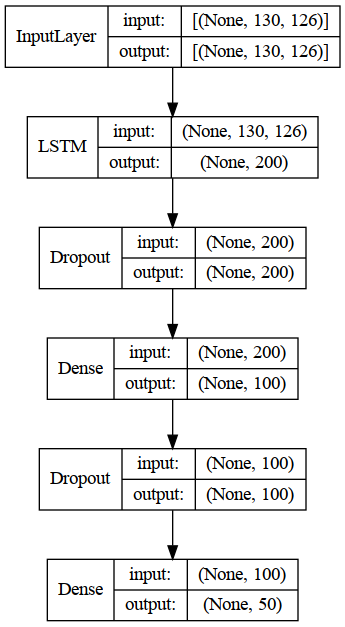

In [125]:
plot_model(best_model, show_shapes=True, show_layer_names=False)

In [124]:
#cm = confusion_matrix(np.argmax(Yval, axis=1), np.argmax(model.predict(Xval), axis=1))

#sns.heatmap(cm, annot = True)

print(classification_report(np.argmax(Yval, axis=1), np.argmax(best_model.predict(Xval), axis=1),
                            digits=3, target_names=label_map))

11/11 [==============================] - 1s 13ms/step
              precision    recall  f1-score   support

         AXE      1.000     0.750     0.857         8
    BACKPACK      1.000     0.833     0.909         6
  BASKETBALL      0.909     1.000     0.952        10
         BEE      0.818     0.900     0.857        10
        BELT      1.000     1.000     1.000         4
        BITE      0.800     1.000     0.889         8
   BREAKFAST      0.600     1.000     0.750         6
      CANCER      0.889     1.000     0.941         8
   CHRISTMAS      1.000     0.667     0.800         6
    CONFUSED      0.857     1.000     0.923         6
        DARK      1.000     1.000     1.000         4
        DEAF      0.833     0.833     0.833         6
      DECIDE      1.000     0.833     0.909         6
      DEMAND      0.625     0.625     0.625         8
     DEVELOP      0.556     0.833     0.667         6
      DINNER      0.714     0.625     0.667         8
         DOG      1.000    

In [125]:
#bestHP = tuner.get_best_hyperparameters(num_trials=5)[2]
bestHP = tuner.get_best_hyperparameters(num_trials=10)[0]

In [126]:
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath='1 LSTM/',
    monitor='val_f1_score',
    mode='max',
    save_best_only=True)

In [127]:
print("[INFO] training the best model...")
model = tuner.hypermodel.build(bestHP)
History = model.fit(x=Xtrain, y=Ytrain,validation_data= (Xval,Yval), batch_size=96,epochs=500, verbose=1,callbacks=[model_checkpoint_callback])
#History = model.fit(x=Xtrain, y=Ytrain,validation_data= (Xval,Yval), batch_size=96,epochs=500, verbose=1)

[INFO] training the best model...
Epoch 1/500
27/28 [===========================>..] - ETA: 0s - loss: 3.9943 - f1_score: 0.0129

INFO:tensorflow:Assets written to: 1 LSTM/assets


INFO:tensorflow:Assets written to: 1 LSTM/assets


28/28 [==============================] - 15s 469ms/step - loss: 3.9950 - f1_score: 0.0136 - val_loss: 3.9892 - val_f1_score: 0.0011
Epoch 2/500
28/28 [==============================] - 2s 57ms/step - loss: 3.9733 - f1_score: 0.0131 - val_loss: 3.9689 - val_f1_score: 5.7143e-04
Epoch 3/500
28/28 [==============================] - ETA: 0s - loss: 3.8495 - f1_score: 0.0280

INFO:tensorflow:Assets written to: 1 LSTM/assets


INFO:tensorflow:Assets written to: 1 LSTM/assets


28/28 [==============================] - 7s 269ms/step - loss: 3.8495 - f1_score: 0.0280 - val_loss: 3.6853 - val_f1_score: 0.0070
Epoch 4/500
27/28 [===========================>..] - ETA: 0s - loss: 3.6623 - f1_score: 0.0354

INFO:tensorflow:Assets written to: 1 LSTM/assets


INFO:tensorflow:Assets written to: 1 LSTM/assets


28/28 [==============================] - 6s 235ms/step - loss: 3.6592 - f1_score: 0.0353 - val_loss: 3.5479 - val_f1_score: 0.0141
Epoch 5/500
27/28 [===========================>..] - ETA: 0s - loss: 3.5161 - f1_score: 0.0419

INFO:tensorflow:Assets written to: 1 LSTM/assets


INFO:tensorflow:Assets written to: 1 LSTM/assets


28/28 [==============================] - 8s 278ms/step - loss: 3.5186 - f1_score: 0.0419 - val_loss: 3.4056 - val_f1_score: 0.0284
Epoch 6/500
27/28 [===========================>..] - ETA: 0s - loss: 3.4434 - f1_score: 0.0462

INFO:tensorflow:Assets written to: 1 LSTM/assets


INFO:tensorflow:Assets written to: 1 LSTM/assets


28/28 [==============================] - 7s 270ms/step - loss: 3.4433 - f1_score: 0.0466 - val_loss: 3.3514 - val_f1_score: 0.0292
Epoch 7/500
27/28 [===========================>..] - ETA: 0s - loss: 3.3292 - f1_score: 0.0632

INFO:tensorflow:Assets written to: 1 LSTM/assets


INFO:tensorflow:Assets written to: 1 LSTM/assets


28/28 [==============================] - 7s 266ms/step - loss: 3.3297 - f1_score: 0.0637 - val_loss: 3.1708 - val_f1_score: 0.0576
Epoch 8/500
28/28 [==============================] - 2s 58ms/step - loss: 3.1942 - f1_score: 0.0843 - val_loss: 3.0951 - val_f1_score: 0.0512
Epoch 9/500
28/28 [==============================] - ETA: 0s - loss: 3.0668 - f1_score: 0.0930

INFO:tensorflow:Assets written to: 1 LSTM/assets


INFO:tensorflow:Assets written to: 1 LSTM/assets


28/28 [==============================] - 7s 249ms/step - loss: 3.0668 - f1_score: 0.0930 - val_loss: 2.9780 - val_f1_score: 0.0846
Epoch 10/500
28/28 [==============================] - ETA: 0s - loss: 2.9596 - f1_score: 0.1261

INFO:tensorflow:Assets written to: 1 LSTM/assets


INFO:tensorflow:Assets written to: 1 LSTM/assets


28/28 [==============================] - 7s 246ms/step - loss: 2.9596 - f1_score: 0.1261 - val_loss: 2.9442 - val_f1_score: 0.0904
Epoch 11/500
28/28 [==============================] - ETA: 0s - loss: 2.8660 - f1_score: 0.1292

INFO:tensorflow:Assets written to: 1 LSTM/assets


INFO:tensorflow:Assets written to: 1 LSTM/assets


28/28 [==============================] - 8s 284ms/step - loss: 2.8660 - f1_score: 0.1292 - val_loss: 2.7961 - val_f1_score: 0.1470
Epoch 12/500
28/28 [==============================] - 2s 58ms/step - loss: 2.7798 - f1_score: 0.1430 - val_loss: 2.7579 - val_f1_score: 0.1267
Epoch 13/500
28/28 [==============================] - ETA: 0s - loss: 2.7073 - f1_score: 0.1660

INFO:tensorflow:Assets written to: 1 LSTM/assets


INFO:tensorflow:Assets written to: 1 LSTM/assets


28/28 [==============================] - 7s 248ms/step - loss: 2.7073 - f1_score: 0.1660 - val_loss: 2.6597 - val_f1_score: 0.1883
Epoch 14/500
28/28 [==============================] - 2s 58ms/step - loss: 2.5849 - f1_score: 0.1899 - val_loss: 2.6264 - val_f1_score: 0.1813
Epoch 15/500
28/28 [==============================] - ETA: 0s - loss: 2.5223 - f1_score: 0.1991

INFO:tensorflow:Assets written to: 1 LSTM/assets


INFO:tensorflow:Assets written to: 1 LSTM/assets


28/28 [==============================] - 8s 280ms/step - loss: 2.5223 - f1_score: 0.1991 - val_loss: 2.5612 - val_f1_score: 0.1883
Epoch 16/500
28/28 [==============================] - ETA: 0s - loss: 2.4440 - f1_score: 0.2150

INFO:tensorflow:Assets written to: 1 LSTM/assets


INFO:tensorflow:Assets written to: 1 LSTM/assets


28/28 [==============================] - 7s 259ms/step - loss: 2.4440 - f1_score: 0.2150 - val_loss: 2.5061 - val_f1_score: 0.2243
Epoch 17/500
28/28 [==============================] - ETA: 0s - loss: 2.3987 - f1_score: 0.2070

INFO:tensorflow:Assets written to: 1 LSTM/assets


INFO:tensorflow:Assets written to: 1 LSTM/assets


28/28 [==============================] - 7s 267ms/step - loss: 2.3987 - f1_score: 0.2070 - val_loss: 2.4746 - val_f1_score: 0.2414
Epoch 18/500
28/28 [==============================] - ETA: 0s - loss: 2.3262 - f1_score: 0.2482

INFO:tensorflow:Assets written to: 1 LSTM/assets


INFO:tensorflow:Assets written to: 1 LSTM/assets


28/28 [==============================] - 7s 264ms/step - loss: 2.3262 - f1_score: 0.2482 - val_loss: 2.4092 - val_f1_score: 0.2529
Epoch 19/500
28/28 [==============================] - 2s 58ms/step - loss: 2.2653 - f1_score: 0.2739 - val_loss: 2.3359 - val_f1_score: 0.2508
Epoch 20/500
28/28 [==============================] - ETA: 0s - loss: 2.1831 - f1_score: 0.2931

INFO:tensorflow:Assets written to: 1 LSTM/assets


INFO:tensorflow:Assets written to: 1 LSTM/assets


28/28 [==============================] - 7s 244ms/step - loss: 2.1831 - f1_score: 0.2931 - val_loss: 2.2740 - val_f1_score: 0.3133
Epoch 21/500
28/28 [==============================] - 2s 58ms/step - loss: 2.1030 - f1_score: 0.2979 - val_loss: 2.3918 - val_f1_score: 0.3057
Epoch 22/500
28/28 [==============================] - 2s 58ms/step - loss: 2.1103 - f1_score: 0.3131 - val_loss: 2.2411 - val_f1_score: 0.2749
Epoch 23/500
28/28 [==============================] - ETA: 0s - loss: 1.9812 - f1_score: 0.3423

INFO:tensorflow:Assets written to: 1 LSTM/assets


INFO:tensorflow:Assets written to: 1 LSTM/assets


28/28 [==============================] - 8s 291ms/step - loss: 1.9812 - f1_score: 0.3423 - val_loss: 2.1670 - val_f1_score: 0.3428
Epoch 24/500
28/28 [==============================] - 2s 58ms/step - loss: 1.9957 - f1_score: 0.3454 - val_loss: 2.2680 - val_f1_score: 0.2893
Epoch 25/500
28/28 [==============================] - 2s 58ms/step - loss: 1.8921 - f1_score: 0.3606 - val_loss: 2.2738 - val_f1_score: 0.3151
Epoch 26/500
28/28 [==============================] - ETA: 0s - loss: 1.9010 - f1_score: 0.3678

INFO:tensorflow:Assets written to: 1 LSTM/assets


INFO:tensorflow:Assets written to: 1 LSTM/assets


28/28 [==============================] - 8s 278ms/step - loss: 1.9010 - f1_score: 0.3678 - val_loss: 2.1069 - val_f1_score: 0.3529
Epoch 27/500
27/28 [===========================>..] - ETA: 0s - loss: 1.8250 - f1_score: 0.4050

INFO:tensorflow:Assets written to: 1 LSTM/assets


INFO:tensorflow:Assets written to: 1 LSTM/assets


28/28 [==============================] - 8s 278ms/step - loss: 1.8232 - f1_score: 0.4062 - val_loss: 2.0382 - val_f1_score: 0.3640
Epoch 28/500
28/28 [==============================] - 2s 58ms/step - loss: 1.7908 - f1_score: 0.4083 - val_loss: 2.0903 - val_f1_score: 0.3600
Epoch 29/500
28/28 [==============================] - 2s 59ms/step - loss: 1.7541 - f1_score: 0.4277 - val_loss: 2.1898 - val_f1_score: 0.3491
Epoch 30/500
27/28 [===========================>..] - ETA: 0s - loss: 1.7231 - f1_score: 0.4360

INFO:tensorflow:Assets written to: 1 LSTM/assets


INFO:tensorflow:Assets written to: 1 LSTM/assets


28/28 [==============================] - 8s 313ms/step - loss: 1.7223 - f1_score: 0.4340 - val_loss: 1.9911 - val_f1_score: 0.4003
Epoch 31/500
28/28 [==============================] - 2s 58ms/step - loss: 1.6569 - f1_score: 0.4538 - val_loss: 1.9912 - val_f1_score: 0.3987
Epoch 32/500
28/28 [==============================] - ETA: 0s - loss: 1.6122 - f1_score: 0.4751

INFO:tensorflow:Assets written to: 1 LSTM/assets


INFO:tensorflow:Assets written to: 1 LSTM/assets


28/28 [==============================] - 8s 279ms/step - loss: 1.6122 - f1_score: 0.4751 - val_loss: 2.0058 - val_f1_score: 0.4232
Epoch 33/500
28/28 [==============================] - ETA: 0s - loss: 1.5875 - f1_score: 0.4676

INFO:tensorflow:Assets written to: 1 LSTM/assets


INFO:tensorflow:Assets written to: 1 LSTM/assets


28/28 [==============================] - 7s 266ms/step - loss: 1.5875 - f1_score: 0.4676 - val_loss: 1.9963 - val_f1_score: 0.4490
Epoch 34/500
28/28 [==============================] - 2s 58ms/step - loss: 1.5677 - f1_score: 0.4766 - val_loss: 2.0147 - val_f1_score: 0.4442
Epoch 35/500
28/28 [==============================] - 2s 59ms/step - loss: 1.5808 - f1_score: 0.4909 - val_loss: 1.9936 - val_f1_score: 0.4120
Epoch 36/500
28/28 [==============================] - ETA: 0s - loss: 1.5199 - f1_score: 0.5108

INFO:tensorflow:Assets written to: 1 LSTM/assets


INFO:tensorflow:Assets written to: 1 LSTM/assets


28/28 [==============================] - 7s 264ms/step - loss: 1.5199 - f1_score: 0.5108 - val_loss: 1.8827 - val_f1_score: 0.4717
Epoch 37/500
28/28 [==============================] - 2s 59ms/step - loss: 1.4157 - f1_score: 0.5314 - val_loss: 2.0453 - val_f1_score: 0.4097
Epoch 38/500
28/28 [==============================] - ETA: 0s - loss: 1.4075 - f1_score: 0.5454

INFO:tensorflow:Assets written to: 1 LSTM/assets


INFO:tensorflow:Assets written to: 1 LSTM/assets


28/28 [==============================] - 8s 300ms/step - loss: 1.4075 - f1_score: 0.5454 - val_loss: 1.8957 - val_f1_score: 0.4777
Epoch 39/500
28/28 [==============================] - ETA: 0s - loss: 1.3414 - f1_score: 0.5600

INFO:tensorflow:Assets written to: 1 LSTM/assets


INFO:tensorflow:Assets written to: 1 LSTM/assets


28/28 [==============================] - 7s 262ms/step - loss: 1.3414 - f1_score: 0.5600 - val_loss: 1.8252 - val_f1_score: 0.5004
Epoch 40/500
28/28 [==============================] - 2s 59ms/step - loss: 1.4198 - f1_score: 0.5381 - val_loss: 1.9680 - val_f1_score: 0.4529
Epoch 41/500
28/28 [==============================] - 2s 58ms/step - loss: 1.3973 - f1_score: 0.5573 - val_loss: 1.8845 - val_f1_score: 0.4594
Epoch 42/500
28/28 [==============================] - 2s 59ms/step - loss: 1.3163 - f1_score: 0.5780 - val_loss: 1.8100 - val_f1_score: 0.4925
Epoch 43/500
28/28 [==============================] - ETA: 0s - loss: 1.2195 - f1_score: 0.5989

INFO:tensorflow:Assets written to: 1 LSTM/assets


INFO:tensorflow:Assets written to: 1 LSTM/assets


28/28 [==============================] - 9s 324ms/step - loss: 1.2195 - f1_score: 0.5989 - val_loss: 1.8501 - val_f1_score: 0.5030
Epoch 44/500
28/28 [==============================] - 2s 58ms/step - loss: 1.2846 - f1_score: 0.5901 - val_loss: 1.8828 - val_f1_score: 0.4871
Epoch 45/500
28/28 [==============================] - ETA: 0s - loss: 1.2137 - f1_score: 0.5938

INFO:tensorflow:Assets written to: 1 LSTM/assets


INFO:tensorflow:Assets written to: 1 LSTM/assets


28/28 [==============================] - 8s 287ms/step - loss: 1.2137 - f1_score: 0.5938 - val_loss: 1.7248 - val_f1_score: 0.5075
Epoch 46/500
28/28 [==============================] - ETA: 0s - loss: 1.1485 - f1_score: 0.6283

INFO:tensorflow:Assets written to: 1 LSTM/assets


INFO:tensorflow:Assets written to: 1 LSTM/assets


28/28 [==============================] - 7s 263ms/step - loss: 1.1485 - f1_score: 0.6283 - val_loss: 1.7821 - val_f1_score: 0.5253
Epoch 47/500
28/28 [==============================] - 2s 59ms/step - loss: 1.2988 - f1_score: 0.6030 - val_loss: 1.8664 - val_f1_score: 0.5111
Epoch 48/500
28/28 [==============================] - 2s 59ms/step - loss: 1.1960 - f1_score: 0.6176 - val_loss: 1.8217 - val_f1_score: 0.4662
Epoch 49/500
28/28 [==============================] - ETA: 0s - loss: 1.1779 - f1_score: 0.6195

INFO:tensorflow:Assets written to: 1 LSTM/assets


INFO:tensorflow:Assets written to: 1 LSTM/assets


28/28 [==============================] - 8s 282ms/step - loss: 1.1779 - f1_score: 0.6195 - val_loss: 1.7098 - val_f1_score: 0.5374
Epoch 50/500
28/28 [==============================] - 2s 59ms/step - loss: 1.1109 - f1_score: 0.6470 - val_loss: 1.8889 - val_f1_score: 0.5223
Epoch 51/500
28/28 [==============================] - 2s 58ms/step - loss: 1.1797 - f1_score: 0.6252 - val_loss: 1.8207 - val_f1_score: 0.5300
Epoch 52/500
28/28 [==============================] - ETA: 0s - loss: 1.0593 - f1_score: 0.6673

INFO:tensorflow:Assets written to: 1 LSTM/assets


INFO:tensorflow:Assets written to: 1 LSTM/assets


28/28 [==============================] - 8s 286ms/step - loss: 1.0593 - f1_score: 0.6673 - val_loss: 1.6577 - val_f1_score: 0.5636
Epoch 53/500
28/28 [==============================] - ETA: 0s - loss: 1.0018 - f1_score: 0.6716

INFO:tensorflow:Assets written to: 1 LSTM/assets


INFO:tensorflow:Assets written to: 1 LSTM/assets


28/28 [==============================] - 8s 302ms/step - loss: 1.0018 - f1_score: 0.6716 - val_loss: 1.7308 - val_f1_score: 0.5669
Epoch 54/500
28/28 [==============================] - 2s 58ms/step - loss: 0.9686 - f1_score: 0.6747 - val_loss: 1.8245 - val_f1_score: 0.5588
Epoch 55/500
28/28 [==============================] - ETA: 0s - loss: 0.9718 - f1_score: 0.7019

INFO:tensorflow:Assets written to: 1 LSTM/assets


INFO:tensorflow:Assets written to: 1 LSTM/assets


28/28 [==============================] - 8s 285ms/step - loss: 0.9718 - f1_score: 0.7019 - val_loss: 1.5898 - val_f1_score: 0.5960
Epoch 56/500
28/28 [==============================] - 2s 58ms/step - loss: 0.9260 - f1_score: 0.7157 - val_loss: 1.7489 - val_f1_score: 0.5471
Epoch 57/500
28/28 [==============================] - 2s 58ms/step - loss: 0.9348 - f1_score: 0.7084 - val_loss: 1.8281 - val_f1_score: 0.5556
Epoch 58/500
28/28 [==============================] - 2s 59ms/step - loss: 1.1362 - f1_score: 0.6613 - val_loss: 1.7654 - val_f1_score: 0.5716
Epoch 59/500
27/28 [===========================>..] - ETA: 0s - loss: 1.0392 - f1_score: 0.6773

INFO:tensorflow:Assets written to: 1 LSTM/assets


INFO:tensorflow:Assets written to: 1 LSTM/assets


28/28 [==============================] - 8s 287ms/step - loss: 1.0392 - f1_score: 0.6800 - val_loss: 1.7274 - val_f1_score: 0.6135
Epoch 60/500
28/28 [==============================] - 2s 59ms/step - loss: 0.8944 - f1_score: 0.7138 - val_loss: 1.7064 - val_f1_score: 0.5904
Epoch 61/500
28/28 [==============================] - 2s 58ms/step - loss: 0.8590 - f1_score: 0.7284 - val_loss: 1.6164 - val_f1_score: 0.6106
Epoch 62/500
28/28 [==============================] - ETA: 0s - loss: 0.8249 - f1_score: 0.7417

INFO:tensorflow:Assets written to: 1 LSTM/assets


INFO:tensorflow:Assets written to: 1 LSTM/assets


28/28 [==============================] - 7s 262ms/step - loss: 0.8249 - f1_score: 0.7417 - val_loss: 1.5572 - val_f1_score: 0.6340
Epoch 63/500
28/28 [==============================] - 2s 59ms/step - loss: 0.8167 - f1_score: 0.7525 - val_loss: 1.6806 - val_f1_score: 0.6200
Epoch 64/500
28/28 [==============================] - ETA: 0s - loss: 0.8378 - f1_score: 0.7468

INFO:tensorflow:Assets written to: 1 LSTM/assets


INFO:tensorflow:Assets written to: 1 LSTM/assets


28/28 [==============================] - 8s 290ms/step - loss: 0.8378 - f1_score: 0.7468 - val_loss: 1.5723 - val_f1_score: 0.6454
Epoch 65/500
28/28 [==============================] - ETA: 0s - loss: 0.7621 - f1_score: 0.7718

INFO:tensorflow:Assets written to: 1 LSTM/assets


INFO:tensorflow:Assets written to: 1 LSTM/assets


28/28 [==============================] - 8s 276ms/step - loss: 0.7621 - f1_score: 0.7718 - val_loss: 1.5316 - val_f1_score: 0.6538
Epoch 66/500
28/28 [==============================] - 2s 59ms/step - loss: 0.6970 - f1_score: 0.7833 - val_loss: 1.6552 - val_f1_score: 0.6526
Epoch 67/500
28/28 [==============================] - 2s 58ms/step - loss: 0.7421 - f1_score: 0.7852 - val_loss: 1.7170 - val_f1_score: 0.6239
Epoch 68/500
28/28 [==============================] - 2s 59ms/step - loss: 0.8292 - f1_score: 0.7633 - val_loss: 1.7758 - val_f1_score: 0.6215
Epoch 69/500
28/28 [==============================] - 2s 59ms/step - loss: 0.9158 - f1_score: 0.7305 - val_loss: 1.6987 - val_f1_score: 0.6299
Epoch 70/500
28/28 [==============================] - 2s 59ms/step - loss: 0.8309 - f1_score: 0.7517 - val_loss: 1.5398 - val_f1_score: 0.6504
Epoch 71/500
28/28 [==============================] - 2s 59ms/step - loss: 0.7083 - f1_score: 0.7841 - val_loss: 1.7155 - val_f1_score: 0.6427
Epoch 72/50

INFO:tensorflow:Assets written to: 1 LSTM/assets


INFO:tensorflow:Assets written to: 1 LSTM/assets


28/28 [==============================] - 8s 311ms/step - loss: 0.6468 - f1_score: 0.8041 - val_loss: 1.6121 - val_f1_score: 0.6582
Epoch 78/500
28/28 [==============================] - 2s 59ms/step - loss: 0.5883 - f1_score: 0.8338 - val_loss: 1.7245 - val_f1_score: 0.6302
Epoch 79/500
28/28 [==============================] - ETA: 0s - loss: 0.5404 - f1_score: 0.8482

INFO:tensorflow:Assets written to: 1 LSTM/assets


INFO:tensorflow:Assets written to: 1 LSTM/assets


28/28 [==============================] - 9s 316ms/step - loss: 0.5404 - f1_score: 0.8482 - val_loss: 1.4877 - val_f1_score: 0.6858
Epoch 80/500
28/28 [==============================] - 2s 59ms/step - loss: 0.4930 - f1_score: 0.8621 - val_loss: 1.5850 - val_f1_score: 0.6854
Epoch 81/500
28/28 [==============================] - ETA: 0s - loss: 0.5332 - f1_score: 0.8522

INFO:tensorflow:Assets written to: 1 LSTM/assets


INFO:tensorflow:Assets written to: 1 LSTM/assets


28/28 [==============================] - 8s 280ms/step - loss: 0.5332 - f1_score: 0.8522 - val_loss: 1.6430 - val_f1_score: 0.6890
Epoch 82/500
28/28 [==============================] - 2s 59ms/step - loss: 0.5816 - f1_score: 0.8373 - val_loss: 1.6663 - val_f1_score: 0.6760
Epoch 83/500
28/28 [==============================] - 2s 59ms/step - loss: 0.8583 - f1_score: 0.7867 - val_loss: 1.8009 - val_f1_score: 0.5790
Epoch 84/500
28/28 [==============================] - 2s 59ms/step - loss: 0.9022 - f1_score: 0.7319 - val_loss: 1.6028 - val_f1_score: 0.6471
Epoch 85/500
28/28 [==============================] - 2s 59ms/step - loss: 0.6796 - f1_score: 0.8045 - val_loss: 1.7455 - val_f1_score: 0.5996
Epoch 86/500
28/28 [==============================] - 2s 59ms/step - loss: 0.6412 - f1_score: 0.8189 - val_loss: 1.6959 - val_f1_score: 0.6435
Epoch 87/500
28/28 [==============================] - 2s 59ms/step - loss: 0.7679 - f1_score: 0.7852 - val_loss: 1.6023 - val_f1_score: 0.6555
Epoch 88/50

INFO:tensorflow:Assets written to: 1 LSTM/assets


INFO:tensorflow:Assets written to: 1 LSTM/assets


28/28 [==============================] - 9s 330ms/step - loss: 0.4587 - f1_score: 0.8747 - val_loss: 1.5391 - val_f1_score: 0.7217
Epoch 95/500
28/28 [==============================] - 2s 59ms/step - loss: 0.4939 - f1_score: 0.8668 - val_loss: 1.6365 - val_f1_score: 0.7005
Epoch 96/500
28/28 [==============================] - 2s 59ms/step - loss: 0.6305 - f1_score: 0.8304 - val_loss: 1.8103 - val_f1_score: 0.6587
Epoch 97/500
28/28 [==============================] - 2s 59ms/step - loss: 0.6796 - f1_score: 0.8190 - val_loss: 1.7787 - val_f1_score: 0.6301
Epoch 98/500
28/28 [==============================] - 2s 59ms/step - loss: 0.7100 - f1_score: 0.8047 - val_loss: 1.5386 - val_f1_score: 0.6698
Epoch 99/500
28/28 [==============================] - 2s 59ms/step - loss: 0.5330 - f1_score: 0.8506 - val_loss: 1.5369 - val_f1_score: 0.6856
Epoch 100/500
28/28 [==============================] - 2s 59ms/step - loss: 0.4256 - f1_score: 0.8914 - val_loss: 1.5301 - val_f1_score: 0.7195
Epoch 101/

INFO:tensorflow:Assets written to: 1 LSTM/assets


INFO:tensorflow:Assets written to: 1 LSTM/assets


28/28 [==============================] - 9s 324ms/step - loss: 0.3506 - f1_score: 0.9075 - val_loss: 1.4861 - val_f1_score: 0.7341
Epoch 102/500
28/28 [==============================] - 2s 60ms/step - loss: 0.3369 - f1_score: 0.9111 - val_loss: 1.4873 - val_f1_score: 0.7222
Epoch 103/500
28/28 [==============================] - 2s 59ms/step - loss: 0.3196 - f1_score: 0.9208 - val_loss: 1.6046 - val_f1_score: 0.7273
Epoch 104/500
28/28 [==============================] - 2s 59ms/step - loss: 0.3569 - f1_score: 0.9146 - val_loss: 1.7758 - val_f1_score: 0.6895
Epoch 105/500
28/28 [==============================] - 2s 59ms/step - loss: 0.3920 - f1_score: 0.8920 - val_loss: 1.6242 - val_f1_score: 0.6894
Epoch 106/500
28/28 [==============================] - 2s 60ms/step - loss: 0.4577 - f1_score: 0.8805 - val_loss: 1.7359 - val_f1_score: 0.6895
Epoch 107/500
28/28 [==============================] - 2s 59ms/step - loss: 0.4269 - f1_score: 0.8929 - val_loss: 1.5452 - val_f1_score: 0.7008
Epoch

INFO:tensorflow:Assets written to: 1 LSTM/assets


INFO:tensorflow:Assets written to: 1 LSTM/assets


28/28 [==============================] - 9s 330ms/step - loss: 0.2886 - f1_score: 0.9279 - val_loss: 1.5835 - val_f1_score: 0.7447
Epoch 124/500
28/28 [==============================] - 2s 59ms/step - loss: 0.4375 - f1_score: 0.8987 - val_loss: 1.8608 - val_f1_score: 0.6608
Epoch 125/500
28/28 [==============================] - 2s 60ms/step - loss: 0.6050 - f1_score: 0.8560 - val_loss: 1.7029 - val_f1_score: 0.7011
Epoch 126/500
28/28 [==============================] - 2s 59ms/step - loss: 0.4308 - f1_score: 0.8995 - val_loss: 1.6054 - val_f1_score: 0.6901
Epoch 127/500
28/28 [==============================] - 2s 60ms/step - loss: 0.3614 - f1_score: 0.9097 - val_loss: 1.7436 - val_f1_score: 0.6967
Epoch 128/500
28/28 [==============================] - 2s 60ms/step - loss: 0.3406 - f1_score: 0.9184 - val_loss: 1.8422 - val_f1_score: 0.6762
Epoch 129/500
28/28 [==============================] - 2s 60ms/step - loss: 0.3795 - f1_score: 0.9135 - val_loss: 1.8514 - val_f1_score: 0.6740
Epoch

INFO:tensorflow:Assets written to: 1 LSTM/assets


INFO:tensorflow:Assets written to: 1 LSTM/assets


28/28 [==============================] - 10s 359ms/step - loss: 0.1740 - f1_score: 0.9661 - val_loss: 1.7748 - val_f1_score: 0.7461
Epoch 144/500
28/28 [==============================] - ETA: 0s - loss: 0.1852 - f1_score: 0.9658

INFO:tensorflow:Assets written to: 1 LSTM/assets


INFO:tensorflow:Assets written to: 1 LSTM/assets


28/28 [==============================] - 8s 301ms/step - loss: 0.1852 - f1_score: 0.9658 - val_loss: 1.6590 - val_f1_score: 0.7692
Epoch 145/500
28/28 [==============================] - 2s 59ms/step - loss: 0.1842 - f1_score: 0.9633 - val_loss: 1.7262 - val_f1_score: 0.7466
Epoch 146/500
28/28 [==============================] - 2s 60ms/step - loss: 0.1599 - f1_score: 0.9745 - val_loss: 1.7133 - val_f1_score: 0.7596
Epoch 147/500
28/28 [==============================] - 2s 59ms/step - loss: 0.1758 - f1_score: 0.9675 - val_loss: 1.9099 - val_f1_score: 0.7085
Epoch 148/500
28/28 [==============================] - 2s 60ms/step - loss: 0.1754 - f1_score: 0.9693 - val_loss: 1.7978 - val_f1_score: 0.7567
Epoch 149/500
28/28 [==============================] - 2s 60ms/step - loss: 0.2069 - f1_score: 0.9597 - val_loss: 1.7466 - val_f1_score: 0.7513
Epoch 150/500
28/28 [==============================] - 2s 60ms/step - loss: 0.2509 - f1_score: 0.9442 - val_loss: 1.9402 - val_f1_score: 0.7048
Epoch

Epoch 201/500
28/28 [==============================] - 2s 61ms/step - loss: 0.1549 - f1_score: 0.9674 - val_loss: 2.1121 - val_f1_score: 0.6937
Epoch 202/500
28/28 [==============================] - 2s 61ms/step - loss: 0.2313 - f1_score: 0.9505 - val_loss: 2.2645 - val_f1_score: 0.6965
Epoch 203/500
28/28 [==============================] - 2s 61ms/step - loss: 0.3104 - f1_score: 0.9341 - val_loss: 1.9551 - val_f1_score: 0.7144
Epoch 204/500
28/28 [==============================] - 2s 62ms/step - loss: 0.2769 - f1_score: 0.9423 - val_loss: 2.1832 - val_f1_score: 0.6757
Epoch 205/500
28/28 [==============================] - 2s 62ms/step - loss: 0.3307 - f1_score: 0.9196 - val_loss: 1.8517 - val_f1_score: 0.7221
Epoch 206/500
28/28 [==============================] - 2s 61ms/step - loss: 0.2112 - f1_score: 0.9549 - val_loss: 1.9550 - val_f1_score: 0.7077
Epoch 207/500
28/28 [==============================] - 2s 62ms/step - loss: 0.1799 - f1_score: 0.9708 - val_loss: 1.9061 - val_f1_score:

INFO:tensorflow:Assets written to: 1 LSTM/assets


INFO:tensorflow:Assets written to: 1 LSTM/assets


28/28 [==============================] - 10s 384ms/step - loss: 0.1009 - f1_score: 0.9929 - val_loss: 1.4969 - val_f1_score: 0.7921
Epoch 238/500
28/28 [==============================] - 2s 60ms/step - loss: 0.0933 - f1_score: 0.9945 - val_loss: 1.6433 - val_f1_score: 0.7658
Epoch 239/500
28/28 [==============================] - 2s 60ms/step - loss: 0.0937 - f1_score: 0.9931 - val_loss: 1.6693 - val_f1_score: 0.7695
Epoch 240/500
28/28 [==============================] - 2s 60ms/step - loss: 0.0862 - f1_score: 0.9956 - val_loss: 1.6896 - val_f1_score: 0.7657
Epoch 241/500
28/28 [==============================] - 2s 60ms/step - loss: 0.0893 - f1_score: 0.9954 - val_loss: 1.6757 - val_f1_score: 0.7599
Epoch 242/500
28/28 [==============================] - 2s 61ms/step - loss: 0.0806 - f1_score: 0.9961 - val_loss: 1.6557 - val_f1_score: 0.7759
Epoch 243/500
28/28 [==============================] - 2s 60ms/step - loss: 0.0810 - f1_score: 0.9975 - val_loss: 1.7065 - val_f1_score: 0.7651
Epoc

Epoch 294/500
28/28 [==============================] - 2s 62ms/step - loss: 0.3236 - f1_score: 0.9255 - val_loss: 1.6442 - val_f1_score: 0.7383
Epoch 295/500
28/28 [==============================] - 2s 62ms/step - loss: 0.2129 - f1_score: 0.9615 - val_loss: 1.7094 - val_f1_score: 0.7423
Epoch 296/500
28/28 [==============================] - 2s 62ms/step - loss: 0.1349 - f1_score: 0.9812 - val_loss: 1.7570 - val_f1_score: 0.7220
Epoch 297/500
28/28 [==============================] - 2s 64ms/step - loss: 0.1658 - f1_score: 0.9679 - val_loss: 1.6307 - val_f1_score: 0.7533
Epoch 298/500
28/28 [==============================] - 2s 62ms/step - loss: 0.1214 - f1_score: 0.9839 - val_loss: 1.6908 - val_f1_score: 0.7560
Epoch 299/500
28/28 [==============================] - 2s 62ms/step - loss: 0.1568 - f1_score: 0.9770 - val_loss: 1.8250 - val_f1_score: 0.7271
Epoch 300/500
28/28 [==============================] - 2s 63ms/step - loss: 0.1663 - f1_score: 0.9737 - val_loss: 1.8496 - val_f1_score:

Epoch 351/500
28/28 [==============================] - 2s 62ms/step - loss: 0.0623 - f1_score: 0.9993 - val_loss: 1.9043 - val_f1_score: 0.7618
Epoch 352/500
28/28 [==============================] - 2s 63ms/step - loss: 0.0619 - f1_score: 0.9989 - val_loss: 1.8668 - val_f1_score: 0.7661
Epoch 353/500
28/28 [==============================] - 2s 62ms/step - loss: 0.0609 - f1_score: 0.9988 - val_loss: 1.9133 - val_f1_score: 0.7595
Epoch 354/500
28/28 [==============================] - 2s 63ms/step - loss: 0.0594 - f1_score: 1.0000 - val_loss: 1.9483 - val_f1_score: 0.7531
Epoch 355/500
28/28 [==============================] - 2s 63ms/step - loss: 0.0595 - f1_score: 0.9993 - val_loss: 1.9697 - val_f1_score: 0.7495
Epoch 356/500
28/28 [==============================] - 2s 63ms/step - loss: 0.0592 - f1_score: 0.9992 - val_loss: 1.9405 - val_f1_score: 0.7562
Epoch 357/500
28/28 [==============================] - 2s 62ms/step - loss: 0.0610 - f1_score: 0.9996 - val_loss: 1.9941 - val_f1_score:

Epoch 408/500
28/28 [==============================] - 2s 63ms/step - loss: 0.0652 - f1_score: 0.9989 - val_loss: 1.8622 - val_f1_score: 0.7531
Epoch 409/500
28/28 [==============================] - 2s 62ms/step - loss: 0.0641 - f1_score: 0.9980 - val_loss: 1.8239 - val_f1_score: 0.7581
Epoch 410/500
28/28 [==============================] - 2s 64ms/step - loss: 0.0639 - f1_score: 0.9989 - val_loss: 1.8831 - val_f1_score: 0.7517
Epoch 411/500
28/28 [==============================] - 2s 63ms/step - loss: 0.0627 - f1_score: 0.9995 - val_loss: 1.8953 - val_f1_score: 0.7496
Epoch 412/500
28/28 [==============================] - 2s 62ms/step - loss: 0.0610 - f1_score: 0.9992 - val_loss: 1.9333 - val_f1_score: 0.7456
Epoch 413/500
28/28 [==============================] - 2s 63ms/step - loss: 0.0623 - f1_score: 0.9984 - val_loss: 1.9299 - val_f1_score: 0.7360
Epoch 414/500
28/28 [==============================] - 2s 63ms/step - loss: 0.0603 - f1_score: 1.0000 - val_loss: 1.9278 - val_f1_score:

Epoch 465/500
28/28 [==============================] - 2s 63ms/step - loss: 0.0524 - f1_score: 0.9989 - val_loss: 2.0091 - val_f1_score: 0.7484
Epoch 466/500
28/28 [==============================] - 2s 62ms/step - loss: 0.0526 - f1_score: 0.9997 - val_loss: 2.0006 - val_f1_score: 0.7437
Epoch 467/500
28/28 [==============================] - 2s 63ms/step - loss: 0.3173 - f1_score: 0.9594 - val_loss: 2.7946 - val_f1_score: 0.6417
Epoch 468/500
28/28 [==============================] - 2s 63ms/step - loss: 0.8823 - f1_score: 0.8114 - val_loss: 2.4042 - val_f1_score: 0.6333
Epoch 469/500
28/28 [==============================] - 2s 63ms/step - loss: 0.7582 - f1_score: 0.8299 - val_loss: 1.9429 - val_f1_score: 0.6590
Epoch 470/500
28/28 [==============================] - 2s 63ms/step - loss: 0.4164 - f1_score: 0.8999 - val_loss: 1.5114 - val_f1_score: 0.7532
Epoch 471/500
28/28 [==============================] - 2s 63ms/step - loss: 0.2567 - f1_score: 0.9440 - val_loss: 1.8699 - val_f1_score:

In [128]:
print(classification_report(np.argmax(Yval, axis=1), np.argmax(model.predict(Xval), axis=1),
                            digits=3, target_names=label_map))

11/11 [==============================] - 0s 14ms/step
              precision    recall  f1-score   support

         AXE      1.000     0.750     0.857         8
    BACKPACK      1.000     0.667     0.800         6
  BASKETBALL      1.000     1.000     1.000        10
         BEE      1.000     0.800     0.889        10
        BELT      1.000     1.000     1.000         4
        BITE      0.727     1.000     0.842         8
   BREAKFAST      0.714     0.833     0.769         6
      CANCER      0.857     0.750     0.800         8
   CHRISTMAS      0.667     0.667     0.667         6
    CONFUSED      0.556     0.833     0.667         6
        DARK      1.000     1.000     1.000         4
        DEAF      0.857     1.000     0.923         6
      DECIDE      1.000     1.000     1.000         6
      DEMAND      0.600     0.750     0.667         8
     DEVELOP      0.286     0.333     0.308         6
      DINNER      0.750     0.750     0.750         8
         DOG      1.000    

In [116]:
reconstructed_model = tf.keras.models.load_model("1 LSTM")

2023-09-03 08:53:42.052665: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-09-03 08:53:42.708462: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1616] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 1557 MB memory:  -> device: 0, name: NVIDIA GeForce MX250, pci bus id: 0000:01:00.0, compute capability: 6.1


In [119]:
reconstructed_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 200)               261600    
                                                                 
 dropout_2 (Dropout)         (None, 200)               0         
                                                                 
 dense_2 (Dense)             (None, 100)               20100     
                                                                 
 dropout_3 (Dropout)         (None, 100)               0         
                                                                 
 dense_3 (Dense)             (None, 50)                5050      
                                                                 
Total params: 286,750
Trainable params: 286,750
Non-trainable params: 0
_________________________________________________________________


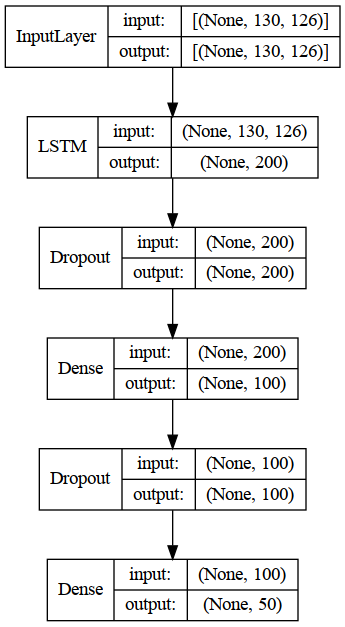

In [118]:
plot_model(reconstructed_model, show_shapes=True, show_layer_names=False)

In [130]:
reconstructed_model.evaluate(Xval,Yval)

11/11 [==============================] - 1s 14ms/step - loss: 1.4969 - f1_score: 0.7921


[1.4969426393508911, 0.7920872569084167]

In [131]:
print(classification_report(np.argmax(Yval, axis=1), np.argmax(reconstructed_model.predict(Xval), axis=1),
                            digits=3, target_names=label_map))

11/11 [==============================] - 0s 13ms/step
              precision    recall  f1-score   support

         AXE      1.000     0.750     0.857         8
    BACKPACK      1.000     0.833     0.909         6
  BASKETBALL      1.000     1.000     1.000        10
         BEE      0.900     0.900     0.900        10
        BELT      1.000     1.000     1.000         4
        BITE      0.727     1.000     0.842         8
   BREAKFAST      0.500     1.000     0.667         6
      CANCER      0.875     0.875     0.875         8
   CHRISTMAS      0.750     0.500     0.600         6
    CONFUSED      0.714     0.833     0.769         6
        DARK      1.000     1.000     1.000         4
        DEAF      1.000     1.000     1.000         6
      DECIDE      1.000     1.000     1.000         6
      DEMAND      0.714     0.625     0.667         8
     DEVELOP      0.429     0.500     0.462         6
      DINNER      0.750     0.750     0.750         8
         DOG      1.000    

In [134]:
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath='1 LSTM Mish/',
    monitor='val_f1_score',
    mode='max',
    save_best_only=True)

In [137]:
act_function = mish
model = Sequential()
model.add(LSTM(units=200,return_sequences=False,input_shape=(130,126),kernel_regularizer=regularizers.l2(.0003948697422663148)))
model.add(Dropout(.6))
model.add(Dense(units=100,activation=act_function))
model.add(Dropout(.15))
model.add(Dense(50, activation='softmax'))
model.compile(tf.optimizers.experimental.Nadam(.00034981818142934215),loss='categorical_crossentropy',
            metrics=[tfa.metrics.F1Score(num_classes=50, average='macro')])
model.summary()
History = model.fit(x=Xtrain, y=Ytrain,validation_data= (Xval,Yval), batch_size=96,epochs=500, verbose=1,callbacks=[model_checkpoint_callback])

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 200)               261600    
                                                                 
 dropout_4 (Dropout)         (None, 200)               0         
                                                                 
 dense_4 (Dense)             (None, 100)               20100     
                                                                 
 dropout_5 (Dropout)         (None, 100)               0         
                                                                 
 dense_5 (Dense)             (None, 50)                5050      
                                                                 
Total params: 286,750
Trainable params: 286,750
Non-trainable params: 0
_________________________________________________________________
Epoch 1/500
28/28 [=============================

INFO:tensorflow:Assets written to: 1 LSTM Mish/assets


INFO:tensorflow:Assets written to: 1 LSTM Mish/assets


28/28 [==============================] - 14s 417ms/step - loss: 3.9916 - f1_score: 0.0160 - val_loss: 3.9841 - val_f1_score: 0.0023
Epoch 2/500
28/28 [==============================] - ETA: 0s - loss: 3.9732 - f1_score: 0.0103

INFO:tensorflow:Assets written to: 1 LSTM Mish/assets


INFO:tensorflow:Assets written to: 1 LSTM Mish/assets


28/28 [==============================] - 7s 244ms/step - loss: 3.9732 - f1_score: 0.0103 - val_loss: 3.9704 - val_f1_score: 0.0031
Epoch 3/500
27/28 [===========================>..] - ETA: 0s - loss: 3.9180 - f1_score: 0.0171

INFO:tensorflow:Assets written to: 1 LSTM Mish/assets


INFO:tensorflow:Assets written to: 1 LSTM Mish/assets


28/28 [==============================] - 7s 275ms/step - loss: 3.9148 - f1_score: 0.0173 - val_loss: 3.8333 - val_f1_score: 0.0035
Epoch 4/500
28/28 [==============================] - ETA: 0s - loss: 3.6978 - f1_score: 0.0378

INFO:tensorflow:Assets written to: 1 LSTM Mish/assets


INFO:tensorflow:Assets written to: 1 LSTM Mish/assets


28/28 [==============================] - 6s 233ms/step - loss: 3.6978 - f1_score: 0.0378 - val_loss: 3.5441 - val_f1_score: 0.0141
Epoch 5/500
28/28 [==============================] - ETA: 0s - loss: 3.5057 - f1_score: 0.0508

INFO:tensorflow:Assets written to: 1 LSTM Mish/assets


INFO:tensorflow:Assets written to: 1 LSTM Mish/assets


28/28 [==============================] - 7s 259ms/step - loss: 3.5057 - f1_score: 0.0508 - val_loss: 3.4126 - val_f1_score: 0.0288
Epoch 6/500
28/28 [==============================] - ETA: 0s - loss: 3.4473 - f1_score: 0.0569

INFO:tensorflow:Assets written to: 1 LSTM Mish/assets


INFO:tensorflow:Assets written to: 1 LSTM Mish/assets


28/28 [==============================] - 7s 249ms/step - loss: 3.4473 - f1_score: 0.0569 - val_loss: 3.3573 - val_f1_score: 0.0417
Epoch 7/500
27/28 [===========================>..] - ETA: 0s - loss: 3.3527 - f1_score: 0.0626

INFO:tensorflow:Assets written to: 1 LSTM Mish/assets


INFO:tensorflow:Assets written to: 1 LSTM Mish/assets


28/28 [==============================] - 8s 301ms/step - loss: 3.3503 - f1_score: 0.0624 - val_loss: 3.2269 - val_f1_score: 0.0497
Epoch 8/500
28/28 [==============================] - 2s 59ms/step - loss: 3.2434 - f1_score: 0.0696 - val_loss: 3.1746 - val_f1_score: 0.0448
Epoch 9/500
28/28 [==============================] - 2s 59ms/step - loss: 3.1856 - f1_score: 0.0842 - val_loss: 3.1623 - val_f1_score: 0.0417
Epoch 10/500
28/28 [==============================] - ETA: 0s - loss: 3.1021 - f1_score: 0.0926

INFO:tensorflow:Assets written to: 1 LSTM Mish/assets


INFO:tensorflow:Assets written to: 1 LSTM Mish/assets


28/28 [==============================] - 7s 259ms/step - loss: 3.1021 - f1_score: 0.0926 - val_loss: 3.0432 - val_f1_score: 0.0747
Epoch 11/500
28/28 [==============================] - ETA: 0s - loss: 3.0343 - f1_score: 0.1053

INFO:tensorflow:Assets written to: 1 LSTM Mish/assets


INFO:tensorflow:Assets written to: 1 LSTM Mish/assets


28/28 [==============================] - 7s 274ms/step - loss: 3.0343 - f1_score: 0.1053 - val_loss: 2.9704 - val_f1_score: 0.0789
Epoch 12/500
28/28 [==============================] - ETA: 0s - loss: 2.9809 - f1_score: 0.1079

INFO:tensorflow:Assets written to: 1 LSTM Mish/assets


INFO:tensorflow:Assets written to: 1 LSTM Mish/assets


28/28 [==============================] - 8s 279ms/step - loss: 2.9809 - f1_score: 0.1079 - val_loss: 2.9533 - val_f1_score: 0.0809
Epoch 13/500
28/28 [==============================] - ETA: 0s - loss: 2.9217 - f1_score: 0.1186

INFO:tensorflow:Assets written to: 1 LSTM Mish/assets


INFO:tensorflow:Assets written to: 1 LSTM Mish/assets


28/28 [==============================] - 8s 287ms/step - loss: 2.9217 - f1_score: 0.1186 - val_loss: 2.8929 - val_f1_score: 0.0945
Epoch 14/500
28/28 [==============================] - 2s 59ms/step - loss: 2.8661 - f1_score: 0.1289 - val_loss: 2.8089 - val_f1_score: 0.0845
Epoch 15/500
28/28 [==============================] - 2s 58ms/step - loss: 2.8304 - f1_score: 0.1344 - val_loss: 2.7910 - val_f1_score: 0.0943
Epoch 16/500
28/28 [==============================] - ETA: 0s - loss: 2.7730 - f1_score: 0.1418

INFO:tensorflow:Assets written to: 1 LSTM Mish/assets


INFO:tensorflow:Assets written to: 1 LSTM Mish/assets


28/28 [==============================] - 7s 271ms/step - loss: 2.7730 - f1_score: 0.1418 - val_loss: 2.7924 - val_f1_score: 0.1116
Epoch 17/500
28/28 [==============================] - ETA: 0s - loss: 2.7261 - f1_score: 0.1485

INFO:tensorflow:Assets written to: 1 LSTM Mish/assets


INFO:tensorflow:Assets written to: 1 LSTM Mish/assets


28/28 [==============================] - 8s 283ms/step - loss: 2.7261 - f1_score: 0.1485 - val_loss: 2.8152 - val_f1_score: 0.1243
Epoch 18/500
28/28 [==============================] - ETA: 0s - loss: 2.6721 - f1_score: 0.1644

INFO:tensorflow:Assets written to: 1 LSTM Mish/assets


INFO:tensorflow:Assets written to: 1 LSTM Mish/assets


28/28 [==============================] - 7s 262ms/step - loss: 2.6721 - f1_score: 0.1644 - val_loss: 2.6570 - val_f1_score: 0.1455
Epoch 19/500
28/28 [==============================] - 2s 58ms/step - loss: 2.6273 - f1_score: 0.1887 - val_loss: 2.6624 - val_f1_score: 0.1396
Epoch 20/500
28/28 [==============================] - ETA: 0s - loss: 2.5625 - f1_score: 0.1909

INFO:tensorflow:Assets written to: 1 LSTM Mish/assets


INFO:tensorflow:Assets written to: 1 LSTM Mish/assets


28/28 [==============================] - 8s 306ms/step - loss: 2.5625 - f1_score: 0.1909 - val_loss: 2.5736 - val_f1_score: 0.1704
Epoch 21/500
27/28 [===========================>..] - ETA: 0s - loss: 2.5234 - f1_score: 0.1942

INFO:tensorflow:Assets written to: 1 LSTM Mish/assets


INFO:tensorflow:Assets written to: 1 LSTM Mish/assets


28/28 [==============================] - 8s 305ms/step - loss: 2.5190 - f1_score: 0.1954 - val_loss: 2.4982 - val_f1_score: 0.1798
Epoch 22/500
28/28 [==============================] - ETA: 0s - loss: 2.4851 - f1_score: 0.2017

INFO:tensorflow:Assets written to: 1 LSTM Mish/assets


INFO:tensorflow:Assets written to: 1 LSTM Mish/assets


28/28 [==============================] - 7s 267ms/step - loss: 2.4851 - f1_score: 0.2017 - val_loss: 2.5107 - val_f1_score: 0.1805
Epoch 23/500
28/28 [==============================] - ETA: 0s - loss: 2.4385 - f1_score: 0.2162

INFO:tensorflow:Assets written to: 1 LSTM Mish/assets


INFO:tensorflow:Assets written to: 1 LSTM Mish/assets


28/28 [==============================] - 8s 287ms/step - loss: 2.4385 - f1_score: 0.2162 - val_loss: 2.4747 - val_f1_score: 0.1961
Epoch 24/500
28/28 [==============================] - 2s 59ms/step - loss: 2.3943 - f1_score: 0.2346 - val_loss: 2.4537 - val_f1_score: 0.1883
Epoch 25/500
28/28 [==============================] - ETA: 0s - loss: 2.3179 - f1_score: 0.2402

INFO:tensorflow:Assets written to: 1 LSTM Mish/assets


INFO:tensorflow:Assets written to: 1 LSTM Mish/assets


28/28 [==============================] - 9s 318ms/step - loss: 2.3179 - f1_score: 0.2402 - val_loss: 2.3284 - val_f1_score: 0.2020
Epoch 26/500
28/28 [==============================] - ETA: 0s - loss: 2.2591 - f1_score: 0.2751

INFO:tensorflow:Assets written to: 1 LSTM Mish/assets


INFO:tensorflow:Assets written to: 1 LSTM Mish/assets


28/28 [==============================] - 8s 291ms/step - loss: 2.2591 - f1_score: 0.2751 - val_loss: 2.4021 - val_f1_score: 0.2198
Epoch 27/500
28/28 [==============================] - ETA: 0s - loss: 2.2839 - f1_score: 0.2712

INFO:tensorflow:Assets written to: 1 LSTM Mish/assets


INFO:tensorflow:Assets written to: 1 LSTM Mish/assets


28/28 [==============================] - 7s 275ms/step - loss: 2.2839 - f1_score: 0.2712 - val_loss: 2.3088 - val_f1_score: 0.2670
Epoch 28/500
28/28 [==============================] - 2s 59ms/step - loss: 2.1757 - f1_score: 0.2964 - val_loss: 2.2849 - val_f1_score: 0.2664
Epoch 29/500
28/28 [==============================] - ETA: 0s - loss: 2.1312 - f1_score: 0.3005

INFO:tensorflow:Assets written to: 1 LSTM Mish/assets


INFO:tensorflow:Assets written to: 1 LSTM Mish/assets


28/28 [==============================] - 8s 308ms/step - loss: 2.1312 - f1_score: 0.3005 - val_loss: 2.2571 - val_f1_score: 0.2758
Epoch 30/500
28/28 [==============================] - ETA: 0s - loss: 2.0667 - f1_score: 0.3239

INFO:tensorflow:Assets written to: 1 LSTM Mish/assets


INFO:tensorflow:Assets written to: 1 LSTM Mish/assets


28/28 [==============================] - 9s 328ms/step - loss: 2.0667 - f1_score: 0.3239 - val_loss: 2.1838 - val_f1_score: 0.3232
Epoch 31/500
28/28 [==============================] - ETA: 0s - loss: 2.0427 - f1_score: 0.3314

INFO:tensorflow:Assets written to: 1 LSTM Mish/assets


INFO:tensorflow:Assets written to: 1 LSTM Mish/assets


28/28 [==============================] - 8s 299ms/step - loss: 2.0427 - f1_score: 0.3314 - val_loss: 2.1712 - val_f1_score: 0.3357
Epoch 32/500
28/28 [==============================] - ETA: 0s - loss: 2.0004 - f1_score: 0.3602

INFO:tensorflow:Assets written to: 1 LSTM Mish/assets


INFO:tensorflow:Assets written to: 1 LSTM Mish/assets


28/28 [==============================] - 8s 307ms/step - loss: 2.0004 - f1_score: 0.3602 - val_loss: 2.1450 - val_f1_score: 0.3849
Epoch 33/500
28/28 [==============================] - 2s 59ms/step - loss: 1.9735 - f1_score: 0.3546 - val_loss: 2.1806 - val_f1_score: 0.3293
Epoch 34/500
28/28 [==============================] - ETA: 0s - loss: 1.9095 - f1_score: 0.3890

INFO:tensorflow:Assets written to: 1 LSTM Mish/assets


INFO:tensorflow:Assets written to: 1 LSTM Mish/assets


28/28 [==============================] - 9s 328ms/step - loss: 1.9095 - f1_score: 0.3890 - val_loss: 2.0774 - val_f1_score: 0.3882
Epoch 35/500
28/28 [==============================] - ETA: 0s - loss: 1.9255 - f1_score: 0.3761

INFO:tensorflow:Assets written to: 1 LSTM Mish/assets


INFO:tensorflow:Assets written to: 1 LSTM Mish/assets


28/28 [==============================] - 8s 308ms/step - loss: 1.9255 - f1_score: 0.3761 - val_loss: 2.0842 - val_f1_score: 0.3937
Epoch 36/500
28/28 [==============================] - ETA: 0s - loss: 1.8335 - f1_score: 0.4055

INFO:tensorflow:Assets written to: 1 LSTM Mish/assets


INFO:tensorflow:Assets written to: 1 LSTM Mish/assets


28/28 [==============================] - 8s 278ms/step - loss: 1.8335 - f1_score: 0.4055 - val_loss: 2.0757 - val_f1_score: 0.4048
Epoch 37/500
28/28 [==============================] - 2s 59ms/step - loss: 1.7844 - f1_score: 0.4209 - val_loss: 2.0651 - val_f1_score: 0.4025
Epoch 38/500
27/28 [===========================>..] - ETA: 0s - loss: 1.7747 - f1_score: 0.4288

INFO:tensorflow:Assets written to: 1 LSTM Mish/assets


INFO:tensorflow:Assets written to: 1 LSTM Mish/assets


28/28 [==============================] - 8s 312ms/step - loss: 1.7651 - f1_score: 0.4292 - val_loss: 1.9303 - val_f1_score: 0.4366
Epoch 39/500
28/28 [==============================] - 2s 59ms/step - loss: 1.6941 - f1_score: 0.4570 - val_loss: 1.8959 - val_f1_score: 0.4122
Epoch 40/500
28/28 [==============================] - 2s 59ms/step - loss: 1.6502 - f1_score: 0.4773 - val_loss: 1.9587 - val_f1_score: 0.4127
Epoch 41/500
28/28 [==============================] - 2s 59ms/step - loss: 1.6746 - f1_score: 0.4639 - val_loss: 1.9793 - val_f1_score: 0.4144
Epoch 42/500
28/28 [==============================] - ETA: 0s - loss: 1.5869 - f1_score: 0.4865

INFO:tensorflow:Assets written to: 1 LSTM Mish/assets


INFO:tensorflow:Assets written to: 1 LSTM Mish/assets


28/28 [==============================] - 8s 290ms/step - loss: 1.5869 - f1_score: 0.4865 - val_loss: 1.8218 - val_f1_score: 0.4869
Epoch 43/500
28/28 [==============================] - ETA: 0s - loss: 1.5197 - f1_score: 0.5120

INFO:tensorflow:Assets written to: 1 LSTM Mish/assets


INFO:tensorflow:Assets written to: 1 LSTM Mish/assets


28/28 [==============================] - 8s 287ms/step - loss: 1.5197 - f1_score: 0.5120 - val_loss: 1.8092 - val_f1_score: 0.4991
Epoch 44/500
28/28 [==============================] - 2s 59ms/step - loss: 1.5174 - f1_score: 0.5012 - val_loss: 1.8269 - val_f1_score: 0.4776
Epoch 45/500
28/28 [==============================] - 2s 59ms/step - loss: 1.4703 - f1_score: 0.5206 - val_loss: 1.8294 - val_f1_score: 0.4797
Epoch 46/500
28/28 [==============================] - ETA: 0s - loss: 1.4263 - f1_score: 0.5348

INFO:tensorflow:Assets written to: 1 LSTM Mish/assets


INFO:tensorflow:Assets written to: 1 LSTM Mish/assets


28/28 [==============================] - 9s 331ms/step - loss: 1.4263 - f1_score: 0.5348 - val_loss: 1.7609 - val_f1_score: 0.5077
Epoch 47/500
28/28 [==============================] - ETA: 0s - loss: 1.4372 - f1_score: 0.5477

INFO:tensorflow:Assets written to: 1 LSTM Mish/assets


INFO:tensorflow:Assets written to: 1 LSTM Mish/assets


28/28 [==============================] - 8s 279ms/step - loss: 1.4372 - f1_score: 0.5477 - val_loss: 1.7857 - val_f1_score: 0.5102
Epoch 48/500
28/28 [==============================] - 2s 59ms/step - loss: 1.3798 - f1_score: 0.5541 - val_loss: 1.7953 - val_f1_score: 0.4999
Epoch 49/500
28/28 [==============================] - 2s 59ms/step - loss: 1.4342 - f1_score: 0.5397 - val_loss: 1.8778 - val_f1_score: 0.4958
Epoch 50/500
28/28 [==============================] - ETA: 0s - loss: 1.3022 - f1_score: 0.5785

INFO:tensorflow:Assets written to: 1 LSTM Mish/assets


INFO:tensorflow:Assets written to: 1 LSTM Mish/assets


28/28 [==============================] - 8s 306ms/step - loss: 1.3022 - f1_score: 0.5785 - val_loss: 1.7954 - val_f1_score: 0.5121
Epoch 51/500
28/28 [==============================] - 2s 59ms/step - loss: 1.3839 - f1_score: 0.5617 - val_loss: 1.9101 - val_f1_score: 0.4734
Epoch 52/500
28/28 [==============================] - 2s 59ms/step - loss: 1.5332 - f1_score: 0.5186 - val_loss: 1.8629 - val_f1_score: 0.5011
Epoch 53/500
28/28 [==============================] - 2s 60ms/step - loss: 1.3848 - f1_score: 0.5563 - val_loss: 1.7176 - val_f1_score: 0.4978
Epoch 54/500
28/28 [==============================] - ETA: 0s - loss: 1.3138 - f1_score: 0.5663

INFO:tensorflow:Assets written to: 1 LSTM Mish/assets


INFO:tensorflow:Assets written to: 1 LSTM Mish/assets


28/28 [==============================] - 8s 313ms/step - loss: 1.3138 - f1_score: 0.5663 - val_loss: 1.7078 - val_f1_score: 0.5143
Epoch 55/500
28/28 [==============================] - ETA: 0s - loss: 1.2507 - f1_score: 0.6026

INFO:tensorflow:Assets written to: 1 LSTM Mish/assets


INFO:tensorflow:Assets written to: 1 LSTM Mish/assets


28/28 [==============================] - 8s 288ms/step - loss: 1.2507 - f1_score: 0.6026 - val_loss: 1.5814 - val_f1_score: 0.5628
Epoch 56/500
28/28 [==============================] - 2s 60ms/step - loss: 1.1962 - f1_score: 0.6252 - val_loss: 1.6949 - val_f1_score: 0.5569
Epoch 57/500
28/28 [==============================] - 2s 59ms/step - loss: 1.1519 - f1_score: 0.6146 - val_loss: 1.7105 - val_f1_score: 0.5470
Epoch 58/500
28/28 [==============================] - 2s 59ms/step - loss: 1.0910 - f1_score: 0.6506 - val_loss: 1.6361 - val_f1_score: 0.5610
Epoch 59/500
28/28 [==============================] - ETA: 0s - loss: 1.0903 - f1_score: 0.6578

INFO:tensorflow:Assets written to: 1 LSTM Mish/assets


INFO:tensorflow:Assets written to: 1 LSTM Mish/assets


28/28 [==============================] - 8s 308ms/step - loss: 1.0903 - f1_score: 0.6578 - val_loss: 1.5786 - val_f1_score: 0.5816
Epoch 60/500
28/28 [==============================] - 2s 59ms/step - loss: 1.1627 - f1_score: 0.6310 - val_loss: 1.7180 - val_f1_score: 0.5409
Epoch 61/500
28/28 [==============================] - 2s 59ms/step - loss: 1.1404 - f1_score: 0.6384 - val_loss: 1.6415 - val_f1_score: 0.5370
Epoch 62/500
28/28 [==============================] - 2s 59ms/step - loss: 1.2755 - f1_score: 0.5940 - val_loss: 1.5107 - val_f1_score: 0.5499
Epoch 63/500
28/28 [==============================] - 2s 60ms/step - loss: 1.1318 - f1_score: 0.6423 - val_loss: 1.5310 - val_f1_score: 0.5816
Epoch 64/500
28/28 [==============================] - 2s 59ms/step - loss: 1.0277 - f1_score: 0.6600 - val_loss: 1.6615 - val_f1_score: 0.5781
Epoch 65/500
28/28 [==============================] - ETA: 0s - loss: 1.0689 - f1_score: 0.6560

INFO:tensorflow:Assets written to: 1 LSTM Mish/assets


INFO:tensorflow:Assets written to: 1 LSTM Mish/assets


28/28 [==============================] - 9s 338ms/step - loss: 1.0689 - f1_score: 0.6560 - val_loss: 1.5856 - val_f1_score: 0.5880
Epoch 66/500
28/28 [==============================] - ETA: 0s - loss: 1.0873 - f1_score: 0.6466

INFO:tensorflow:Assets written to: 1 LSTM Mish/assets


INFO:tensorflow:Assets written to: 1 LSTM Mish/assets


28/28 [==============================] - 7s 270ms/step - loss: 1.0873 - f1_score: 0.6466 - val_loss: 1.6094 - val_f1_score: 0.6013
Epoch 67/500
28/28 [==============================] - 2s 59ms/step - loss: 1.0072 - f1_score: 0.6757 - val_loss: 1.5475 - val_f1_score: 0.5624
Epoch 68/500
28/28 [==============================] - ETA: 0s - loss: 1.0110 - f1_score: 0.6770

INFO:tensorflow:Assets written to: 1 LSTM Mish/assets


INFO:tensorflow:Assets written to: 1 LSTM Mish/assets


28/28 [==============================] - 8s 308ms/step - loss: 1.0110 - f1_score: 0.6770 - val_loss: 1.6036 - val_f1_score: 0.6044
Epoch 69/500
28/28 [==============================] - ETA: 0s - loss: 0.9837 - f1_score: 0.6880

INFO:tensorflow:Assets written to: 1 LSTM Mish/assets


INFO:tensorflow:Assets written to: 1 LSTM Mish/assets


28/28 [==============================] - 8s 306ms/step - loss: 0.9837 - f1_score: 0.6880 - val_loss: 1.5309 - val_f1_score: 0.6255
Epoch 70/500
28/28 [==============================] - 2s 59ms/step - loss: 1.0767 - f1_score: 0.6608 - val_loss: 1.6694 - val_f1_score: 0.5578
Epoch 71/500
28/28 [==============================] - 2s 59ms/step - loss: 1.0620 - f1_score: 0.6674 - val_loss: 1.6935 - val_f1_score: 0.5852
Epoch 72/500
28/28 [==============================] - 2s 60ms/step - loss: 0.9341 - f1_score: 0.7001 - val_loss: 1.5786 - val_f1_score: 0.6142
Epoch 73/500
28/28 [==============================] - 2s 60ms/step - loss: 0.9523 - f1_score: 0.6953 - val_loss: 1.6275 - val_f1_score: 0.5926
Epoch 74/500
28/28 [==============================] - 2s 60ms/step - loss: 0.9653 - f1_score: 0.6893 - val_loss: 1.5658 - val_f1_score: 0.6251
Epoch 75/500
28/28 [==============================] - 2s 59ms/step - loss: 0.9072 - f1_score: 0.7154 - val_loss: 1.4904 - val_f1_score: 0.6210
Epoch 76/50

INFO:tensorflow:Assets written to: 1 LSTM Mish/assets


INFO:tensorflow:Assets written to: 1 LSTM Mish/assets


28/28 [==============================] - 12s 427ms/step - loss: 0.7971 - f1_score: 0.7430 - val_loss: 1.5447 - val_f1_score: 0.6507
Epoch 79/500
28/28 [==============================] - 2s 59ms/step - loss: 0.8055 - f1_score: 0.7420 - val_loss: 1.6163 - val_f1_score: 0.6212
Epoch 80/500
28/28 [==============================] - 2s 60ms/step - loss: 0.8031 - f1_score: 0.7418 - val_loss: 1.5996 - val_f1_score: 0.6268
Epoch 81/500
28/28 [==============================] - 2s 60ms/step - loss: 0.8183 - f1_score: 0.7445 - val_loss: 1.6416 - val_f1_score: 0.6308
Epoch 82/500
28/28 [==============================] - 2s 60ms/step - loss: 0.8955 - f1_score: 0.7191 - val_loss: 1.5457 - val_f1_score: 0.6197
Epoch 83/500
28/28 [==============================] - 2s 60ms/step - loss: 0.9601 - f1_score: 0.7100 - val_loss: 1.6029 - val_f1_score: 0.5876
Epoch 84/500
28/28 [==============================] - 2s 60ms/step - loss: 0.9796 - f1_score: 0.6954 - val_loss: 1.5552 - val_f1_score: 0.6091
Epoch 85/5

INFO:tensorflow:Assets written to: 1 LSTM Mish/assets


INFO:tensorflow:Assets written to: 1 LSTM Mish/assets


28/28 [==============================] - 9s 327ms/step - loss: 0.7219 - f1_score: 0.7634 - val_loss: 1.5241 - val_f1_score: 0.6692
Epoch 88/500
28/28 [==============================] - 2s 61ms/step - loss: 0.7454 - f1_score: 0.7660 - val_loss: 1.6166 - val_f1_score: 0.6327
Epoch 89/500
28/28 [==============================] - 2s 59ms/step - loss: 0.8470 - f1_score: 0.7244 - val_loss: 1.6850 - val_f1_score: 0.6046
Epoch 90/500
28/28 [==============================] - 2s 60ms/step - loss: 0.7540 - f1_score: 0.7699 - val_loss: 1.6831 - val_f1_score: 0.6265
Epoch 91/500
28/28 [==============================] - 2s 60ms/step - loss: 0.6750 - f1_score: 0.7811 - val_loss: 1.6409 - val_f1_score: 0.6154
Epoch 92/500
28/28 [==============================] - 2s 60ms/step - loss: 0.7836 - f1_score: 0.7451 - val_loss: 1.6540 - val_f1_score: 0.6371
Epoch 93/500
28/28 [==============================] - 2s 60ms/step - loss: 0.7140 - f1_score: 0.7775 - val_loss: 1.5131 - val_f1_score: 0.6252
Epoch 94/50

INFO:tensorflow:Assets written to: 1 LSTM Mish/assets


INFO:tensorflow:Assets written to: 1 LSTM Mish/assets


28/28 [==============================] - 10s 353ms/step - loss: 0.5079 - f1_score: 0.8449 - val_loss: 1.5480 - val_f1_score: 0.6778
Epoch 111/500
28/28 [==============================] - 2s 60ms/step - loss: 0.5424 - f1_score: 0.8439 - val_loss: 1.6145 - val_f1_score: 0.6499
Epoch 112/500
28/28 [==============================] - 2s 60ms/step - loss: 0.6154 - f1_score: 0.8113 - val_loss: 1.8508 - val_f1_score: 0.6195
Epoch 113/500
28/28 [==============================] - 2s 60ms/step - loss: 0.6628 - f1_score: 0.7970 - val_loss: 1.7765 - val_f1_score: 0.6246
Epoch 114/500
28/28 [==============================] - 2s 60ms/step - loss: 0.5977 - f1_score: 0.8230 - val_loss: 1.7117 - val_f1_score: 0.6598
Epoch 115/500
28/28 [==============================] - ETA: 0s - loss: 0.5147 - f1_score: 0.8393

INFO:tensorflow:Assets written to: 1 LSTM Mish/assets


INFO:tensorflow:Assets written to: 1 LSTM Mish/assets


28/28 [==============================] - 9s 329ms/step - loss: 0.5147 - f1_score: 0.8393 - val_loss: 1.5665 - val_f1_score: 0.6780
Epoch 116/500
28/28 [==============================] - ETA: 0s - loss: 0.5626 - f1_score: 0.8278

INFO:tensorflow:Assets written to: 1 LSTM Mish/assets


INFO:tensorflow:Assets written to: 1 LSTM Mish/assets


28/28 [==============================] - 8s 309ms/step - loss: 0.5626 - f1_score: 0.8278 - val_loss: 1.6781 - val_f1_score: 0.6870
Epoch 117/500
28/28 [==============================] - ETA: 0s - loss: 0.4843 - f1_score: 0.8490

INFO:tensorflow:Assets written to: 1 LSTM Mish/assets


INFO:tensorflow:Assets written to: 1 LSTM Mish/assets


28/28 [==============================] - 9s 324ms/step - loss: 0.4843 - f1_score: 0.8490 - val_loss: 1.4538 - val_f1_score: 0.7026
Epoch 118/500
28/28 [==============================] - 2s 59ms/step - loss: 0.5085 - f1_score: 0.8567 - val_loss: 1.7033 - val_f1_score: 0.6768
Epoch 119/500
28/28 [==============================] - 2s 60ms/step - loss: 0.4787 - f1_score: 0.8646 - val_loss: 1.5335 - val_f1_score: 0.6930
Epoch 120/500
28/28 [==============================] - 2s 60ms/step - loss: 0.4767 - f1_score: 0.8530 - val_loss: 1.7774 - val_f1_score: 0.6551
Epoch 121/500
28/28 [==============================] - 2s 60ms/step - loss: 0.4809 - f1_score: 0.8556 - val_loss: 1.6262 - val_f1_score: 0.6719
Epoch 122/500
28/28 [==============================] - 2s 60ms/step - loss: 0.4751 - f1_score: 0.8525 - val_loss: 1.8214 - val_f1_score: 0.6653
Epoch 123/500
28/28 [==============================] - 2s 60ms/step - loss: 0.4826 - f1_score: 0.8531 - val_loss: 1.7410 - val_f1_score: 0.6859
Epoch

INFO:tensorflow:Assets written to: 1 LSTM Mish/assets


INFO:tensorflow:Assets written to: 1 LSTM Mish/assets


28/28 [==============================] - 11s 390ms/step - loss: 0.4890 - f1_score: 0.8662 - val_loss: 1.6727 - val_f1_score: 0.7059
Epoch 151/500
28/28 [==============================] - 2s 60ms/step - loss: 0.3765 - f1_score: 0.8944 - val_loss: 1.8473 - val_f1_score: 0.6891
Epoch 152/500
28/28 [==============================] - 2s 60ms/step - loss: 0.4698 - f1_score: 0.8715 - val_loss: 1.7560 - val_f1_score: 0.6466
Epoch 153/500
28/28 [==============================] - 2s 60ms/step - loss: 0.5612 - f1_score: 0.8497 - val_loss: 1.8624 - val_f1_score: 0.6875
Epoch 154/500
28/28 [==============================] - ETA: 0s - loss: 0.4539 - f1_score: 0.8833

INFO:tensorflow:Assets written to: 1 LSTM Mish/assets


INFO:tensorflow:Assets written to: 1 LSTM Mish/assets


28/28 [==============================] - 9s 320ms/step - loss: 0.4539 - f1_score: 0.8833 - val_loss: 1.6813 - val_f1_score: 0.7064
Epoch 155/500
28/28 [==============================] - 2s 60ms/step - loss: 0.7212 - f1_score: 0.8286 - val_loss: 1.8654 - val_f1_score: 0.6849
Epoch 156/500
28/28 [==============================] - 2s 60ms/step - loss: 0.6909 - f1_score: 0.8105 - val_loss: 1.6089 - val_f1_score: 0.6929
Epoch 157/500
28/28 [==============================] - 2s 60ms/step - loss: 0.4997 - f1_score: 0.8592 - val_loss: 1.6055 - val_f1_score: 0.7022
Epoch 158/500
28/28 [==============================] - 2s 61ms/step - loss: 0.3743 - f1_score: 0.8995 - val_loss: 1.5243 - val_f1_score: 0.6998
Epoch 159/500
28/28 [==============================] - 2s 61ms/step - loss: 0.3140 - f1_score: 0.9173 - val_loss: 1.5899 - val_f1_score: 0.7016
Epoch 160/500
28/28 [==============================] - ETA: 0s - loss: 0.2826 - f1_score: 0.9286

INFO:tensorflow:Assets written to: 1 LSTM Mish/assets


INFO:tensorflow:Assets written to: 1 LSTM Mish/assets


28/28 [==============================] - 9s 328ms/step - loss: 0.2826 - f1_score: 0.9286 - val_loss: 1.5415 - val_f1_score: 0.7278
Epoch 161/500
28/28 [==============================] - ETA: 0s - loss: 0.2749 - f1_score: 0.9336

INFO:tensorflow:Assets written to: 1 LSTM Mish/assets


INFO:tensorflow:Assets written to: 1 LSTM Mish/assets


28/28 [==============================] - 9s 337ms/step - loss: 0.2749 - f1_score: 0.9336 - val_loss: 1.5239 - val_f1_score: 0.7352
Epoch 162/500
28/28 [==============================] - 2s 61ms/step - loss: 0.2812 - f1_score: 0.9305 - val_loss: 1.6206 - val_f1_score: 0.7215
Epoch 163/500
28/28 [==============================] - 2s 60ms/step - loss: 0.2746 - f1_score: 0.9360 - val_loss: 1.6613 - val_f1_score: 0.7048
Epoch 164/500
28/28 [==============================] - 2s 60ms/step - loss: 0.2966 - f1_score: 0.9194 - val_loss: 1.7903 - val_f1_score: 0.7118
Epoch 165/500
28/28 [==============================] - ETA: 0s - loss: 0.3397 - f1_score: 0.9110

INFO:tensorflow:Assets written to: 1 LSTM Mish/assets


INFO:tensorflow:Assets written to: 1 LSTM Mish/assets


28/28 [==============================] - 10s 367ms/step - loss: 0.3397 - f1_score: 0.9110 - val_loss: 1.5531 - val_f1_score: 0.7452
Epoch 166/500
28/28 [==============================] - 2s 60ms/step - loss: 0.3959 - f1_score: 0.9049 - val_loss: 2.0321 - val_f1_score: 0.6728
Epoch 167/500
28/28 [==============================] - 2s 60ms/step - loss: 0.6566 - f1_score: 0.8298 - val_loss: 1.8941 - val_f1_score: 0.6811
Epoch 168/500
28/28 [==============================] - 2s 60ms/step - loss: 0.8284 - f1_score: 0.7953 - val_loss: 1.8632 - val_f1_score: 0.6454
Epoch 169/500
28/28 [==============================] - 2s 60ms/step - loss: 0.6203 - f1_score: 0.8289 - val_loss: 1.6215 - val_f1_score: 0.7044
Epoch 170/500
28/28 [==============================] - 2s 60ms/step - loss: 0.4196 - f1_score: 0.8859 - val_loss: 1.5978 - val_f1_score: 0.7181
Epoch 171/500
28/28 [==============================] - 2s 60ms/step - loss: 0.3536 - f1_score: 0.9028 - val_loss: 1.5245 - val_f1_score: 0.7344
Epoc

INFO:tensorflow:Assets written to: 1 LSTM Mish/assets


INFO:tensorflow:Assets written to: 1 LSTM Mish/assets


28/28 [==============================] - 10s 357ms/step - loss: 0.2585 - f1_score: 0.9381 - val_loss: 1.4933 - val_f1_score: 0.7604
Epoch 189/500
28/28 [==============================] - 2s 60ms/step - loss: 0.2307 - f1_score: 0.9466 - val_loss: 1.5992 - val_f1_score: 0.7499
Epoch 190/500
28/28 [==============================] - ETA: 0s - loss: 0.2264 - f1_score: 0.9457

INFO:tensorflow:Assets written to: 1 LSTM Mish/assets


INFO:tensorflow:Assets written to: 1 LSTM Mish/assets


28/28 [==============================] - 10s 368ms/step - loss: 0.2264 - f1_score: 0.9457 - val_loss: 1.5379 - val_f1_score: 0.7765
Epoch 191/500
28/28 [==============================] - 2s 60ms/step - loss: 0.2340 - f1_score: 0.9404 - val_loss: 1.6390 - val_f1_score: 0.7381
Epoch 192/500
28/28 [==============================] - 2s 60ms/step - loss: 0.2674 - f1_score: 0.9352 - val_loss: 1.5796 - val_f1_score: 0.7678
Epoch 193/500
28/28 [==============================] - 2s 60ms/step - loss: 0.2303 - f1_score: 0.9454 - val_loss: 1.7574 - val_f1_score: 0.7566
Epoch 194/500
28/28 [==============================] - 2s 60ms/step - loss: 0.2082 - f1_score: 0.9532 - val_loss: 1.7132 - val_f1_score: 0.7607
Epoch 195/500
28/28 [==============================] - 2s 61ms/step - loss: 0.2082 - f1_score: 0.9542 - val_loss: 1.6636 - val_f1_score: 0.7470
Epoch 196/500
28/28 [==============================] - 2s 61ms/step - loss: 0.1859 - f1_score: 0.9583 - val_loss: 1.7941 - val_f1_score: 0.7452
Epoc

INFO:tensorflow:Assets written to: 1 LSTM Mish/assets


INFO:tensorflow:Assets written to: 1 LSTM Mish/assets


28/28 [==============================] - 9s 342ms/step - loss: 0.2988 - f1_score: 0.9304 - val_loss: 1.4262 - val_f1_score: 0.7853
Epoch 208/500
28/28 [==============================] - 2s 60ms/step - loss: 0.2810 - f1_score: 0.9325 - val_loss: 1.5374 - val_f1_score: 0.7644
Epoch 209/500
28/28 [==============================] - 2s 60ms/step - loss: 0.2159 - f1_score: 0.9480 - val_loss: 1.5225 - val_f1_score: 0.7689
Epoch 210/500
28/28 [==============================] - 2s 61ms/step - loss: 0.1942 - f1_score: 0.9599 - val_loss: 1.5128 - val_f1_score: 0.7736
Epoch 211/500
28/28 [==============================] - 2s 63ms/step - loss: 0.1859 - f1_score: 0.9634 - val_loss: 1.5499 - val_f1_score: 0.7839
Epoch 212/500
28/28 [==============================] - 2s 61ms/step - loss: 0.1802 - f1_score: 0.9687 - val_loss: 1.6241 - val_f1_score: 0.7591
Epoch 213/500
28/28 [==============================] - 2s 62ms/step - loss: 0.1739 - f1_score: 0.9611 - val_loss: 1.7066 - val_f1_score: 0.7564
Epoch

Epoch 264/500
28/28 [==============================] - 2s 63ms/step - loss: 0.1665 - f1_score: 0.9687 - val_loss: 1.6020 - val_f1_score: 0.7697
Epoch 265/500
28/28 [==============================] - 2s 64ms/step - loss: 0.1481 - f1_score: 0.9752 - val_loss: 1.6195 - val_f1_score: 0.7650
Epoch 266/500
28/28 [==============================] - 2s 63ms/step - loss: 0.1677 - f1_score: 0.9730 - val_loss: 1.6556 - val_f1_score: 0.7648
Epoch 267/500
28/28 [==============================] - 2s 63ms/step - loss: 0.1565 - f1_score: 0.9761 - val_loss: 1.7645 - val_f1_score: 0.7627
Epoch 268/500
28/28 [==============================] - 2s 63ms/step - loss: 0.1193 - f1_score: 0.9849 - val_loss: 1.7058 - val_f1_score: 0.7683
Epoch 269/500
28/28 [==============================] - 2s 63ms/step - loss: 0.1118 - f1_score: 0.9849 - val_loss: 1.7294 - val_f1_score: 0.7759
Epoch 270/500
28/28 [==============================] - 2s 63ms/step - loss: 0.1111 - f1_score: 0.9886 - val_loss: 1.7614 - val_f1_score:

INFO:tensorflow:Assets written to: 1 LSTM Mish/assets


INFO:tensorflow:Assets written to: 1 LSTM Mish/assets


28/28 [==============================] - 10s 375ms/step - loss: 0.1372 - f1_score: 0.9792 - val_loss: 1.6428 - val_f1_score: 0.7934
Epoch 286/500
28/28 [==============================] - 2s 60ms/step - loss: 0.1250 - f1_score: 0.9808 - val_loss: 1.7187 - val_f1_score: 0.7904
Epoch 287/500
28/28 [==============================] - 2s 61ms/step - loss: 0.1409 - f1_score: 0.9823 - val_loss: 1.6977 - val_f1_score: 0.7808
Epoch 288/500
28/28 [==============================] - 2s 62ms/step - loss: 0.1224 - f1_score: 0.9838 - val_loss: 1.7579 - val_f1_score: 0.7851
Epoch 289/500
28/28 [==============================] - 2s 62ms/step - loss: 0.1257 - f1_score: 0.9839 - val_loss: 1.8510 - val_f1_score: 0.7627
Epoch 290/500
28/28 [==============================] - 2s 62ms/step - loss: 0.1104 - f1_score: 0.9869 - val_loss: 1.8221 - val_f1_score: 0.7824
Epoch 291/500
28/28 [==============================] - 2s 63ms/step - loss: 0.1162 - f1_score: 0.9857 - val_loss: 1.9284 - val_f1_score: 0.7667
Epoc

Epoch 342/500
28/28 [==============================] - 2s 64ms/step - loss: 0.1834 - f1_score: 0.9639 - val_loss: 1.9030 - val_f1_score: 0.7448
Epoch 343/500
28/28 [==============================] - 2s 63ms/step - loss: 0.2081 - f1_score: 0.9615 - val_loss: 1.9219 - val_f1_score: 0.7494
Epoch 344/500
28/28 [==============================] - 2s 63ms/step - loss: 0.2270 - f1_score: 0.9609 - val_loss: 1.8359 - val_f1_score: 0.7501
Epoch 345/500
28/28 [==============================] - 2s 64ms/step - loss: 0.1662 - f1_score: 0.9735 - val_loss: 1.8907 - val_f1_score: 0.7366
Epoch 346/500
28/28 [==============================] - 2s 64ms/step - loss: 0.3052 - f1_score: 0.9369 - val_loss: 1.7626 - val_f1_score: 0.7672
Epoch 347/500
28/28 [==============================] - 2s 63ms/step - loss: 0.3417 - f1_score: 0.9456 - val_loss: 1.8494 - val_f1_score: 0.7195
Epoch 348/500
28/28 [==============================] - 2s 63ms/step - loss: 0.3862 - f1_score: 0.9155 - val_loss: 1.7181 - val_f1_score:

Epoch 399/500
28/28 [==============================] - 2s 64ms/step - loss: 0.0745 - f1_score: 0.9978 - val_loss: 1.6716 - val_f1_score: 0.7851
Epoch 400/500
28/28 [==============================] - 2s 64ms/step - loss: 0.0730 - f1_score: 0.9981 - val_loss: 1.7101 - val_f1_score: 0.7880
Epoch 401/500
28/28 [==============================] - 2s 63ms/step - loss: 0.0702 - f1_score: 1.0000 - val_loss: 1.7608 - val_f1_score: 0.7784
Epoch 402/500
28/28 [==============================] - 2s 63ms/step - loss: 0.0706 - f1_score: 0.9985 - val_loss: 1.7129 - val_f1_score: 0.7843
Epoch 403/500
28/28 [==============================] - 2s 64ms/step - loss: 0.0684 - f1_score: 0.9989 - val_loss: 1.6981 - val_f1_score: 0.7859
Epoch 404/500
28/28 [==============================] - 2s 64ms/step - loss: 0.0681 - f1_score: 0.9993 - val_loss: 1.7364 - val_f1_score: 0.7871
Epoch 405/500
28/28 [==============================] - 2s 64ms/step - loss: 0.0678 - f1_score: 0.9989 - val_loss: 1.7219 - val_f1_score:

INFO:tensorflow:Assets written to: 1 LSTM Mish/assets


INFO:tensorflow:Assets written to: 1 LSTM Mish/assets


28/28 [==============================] - 13s 479ms/step - loss: 0.0689 - f1_score: 0.9977 - val_loss: 1.6644 - val_f1_score: 0.7934
Epoch 407/500
28/28 [==============================] - 2s 62ms/step - loss: 0.0672 - f1_score: 0.9989 - val_loss: 1.6783 - val_f1_score: 0.7923
Epoch 408/500
28/28 [==============================] - 2s 63ms/step - loss: 0.0662 - f1_score: 0.9984 - val_loss: 1.7589 - val_f1_score: 0.7819
Epoch 409/500
28/28 [==============================] - 2s 62ms/step - loss: 0.0669 - f1_score: 0.9977 - val_loss: 1.7792 - val_f1_score: 0.7891
Epoch 410/500
28/28 [==============================] - 2s 62ms/step - loss: 0.0640 - f1_score: 0.9992 - val_loss: 1.7892 - val_f1_score: 0.7854
Epoch 411/500
28/28 [==============================] - 2s 62ms/step - loss: 0.0648 - f1_score: 0.9988 - val_loss: 1.7970 - val_f1_score: 0.7871
Epoch 412/500
28/28 [==============================] - 2s 62ms/step - loss: 0.0656 - f1_score: 0.9965 - val_loss: 1.7872 - val_f1_score: 0.7841
Epoc

Epoch 463/500
28/28 [==============================] - 2s 65ms/step - loss: 0.1286 - f1_score: 0.9813 - val_loss: 1.7734 - val_f1_score: 0.7656
Epoch 464/500
28/28 [==============================] - 2s 66ms/step - loss: 0.1071 - f1_score: 0.9870 - val_loss: 1.7133 - val_f1_score: 0.7561
Epoch 465/500
28/28 [==============================] - 2s 64ms/step - loss: 0.0945 - f1_score: 0.9912 - val_loss: 1.7162 - val_f1_score: 0.7761
Epoch 466/500
28/28 [==============================] - 2s 64ms/step - loss: 0.0834 - f1_score: 0.9942 - val_loss: 1.7877 - val_f1_score: 0.7723
Epoch 467/500
28/28 [==============================] - 2s 64ms/step - loss: 0.0785 - f1_score: 0.9961 - val_loss: 1.7733 - val_f1_score: 0.7795
Epoch 468/500
28/28 [==============================] - 2s 65ms/step - loss: 0.0719 - f1_score: 0.9968 - val_loss: 1.7801 - val_f1_score: 0.7757
Epoch 469/500
28/28 [==============================] - 2s 65ms/step - loss: 0.0705 - f1_score: 0.9985 - val_loss: 1.7977 - val_f1_score:

In [138]:
print(classification_report(np.argmax(Yval, axis=1), np.argmax(model.predict(Xval), axis=1),
                            digits=3, target_names=label_map))

11/11 [==============================] - 1s 14ms/step
              precision    recall  f1-score   support

         AXE      1.000     0.750     0.857         8
    BACKPACK      1.000     0.667     0.800         6
  BASKETBALL      0.833     1.000     0.909        10
         BEE      1.000     0.400     0.571        10
        BELT      1.000     1.000     1.000         4
        BITE      1.000     0.375     0.545         8
   BREAKFAST      0.429     1.000     0.600         6
      CANCER      1.000     0.875     0.933         8
   CHRISTMAS      0.750     0.500     0.600         6
    CONFUSED      1.000     0.833     0.909         6
        DARK      0.800     1.000     0.889         4
        DEAF      1.000     0.333     0.500         6
      DECIDE      1.000     1.000     1.000         6
      DEMAND      0.556     0.625     0.588         8
     DEVELOP      0.400     0.667     0.500         6
      DINNER      0.778     0.875     0.824         8
         DOG      1.000    

In [139]:
# convert the history.history dict to a pandas DataFrame:     
hist_df = pd.DataFrame(History.history) 

# or save to csv: 
hist_csv_file = '1 LSTM Mish/history.csv'
with open(hist_csv_file, mode='w') as f:
    hist_df.to_csv(f)

In [140]:
hist_df.tail()

loss  f1_score  val_loss  val_f1_score
495  0.277541  0.944062  1.831507      0.723541
496  0.201111  0.959958  1.871319      0.746672
497  0.168756  0.967545  1.899163      0.735039
498  0.173993  0.962826  1.933714      0.735603
499  0.191856  0.967615  1.936698      0.730486

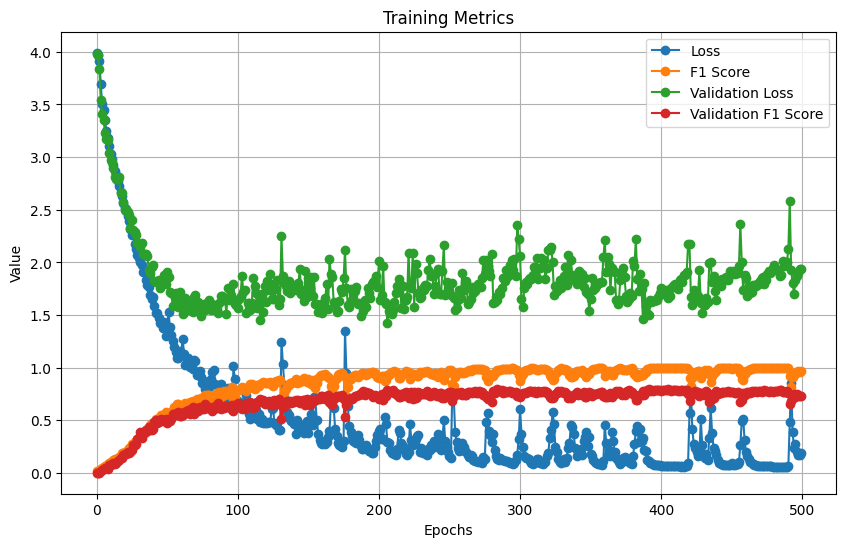

In [141]:
# Plotting
import matplotlib.pyplot as plt
epochs = range(0, 500)
plt.figure(figsize=(10, 6))
plt.plot(epochs, hist_df.loss, marker='o', label='Loss')
plt.plot(epochs, hist_df.f1_score, marker='o', label='F1 Score')
plt.plot(epochs, hist_df.val_loss, marker='o', label='Validation Loss')
plt.plot(epochs, hist_df.val_f1_score, marker='o', label='Validation F1 Score')
plt.title('Training Metrics')
plt.xlabel('Epochs')
plt.ylabel('Value')
plt.legend()
plt.grid()
plt.show()

In [126]:
reconstructed_model = tf.keras.models.load_model("1 LSTM Mish")

In [143]:
reconstructed_model.evaluate(Xval,Yval)

11/11 [==============================] - 1s 14ms/step - loss: 1.6644 - f1_score: 0.7934


[1.6643712520599365, 0.7934468984603882]

In [124]:
reconstructed_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 200)               261600    
                                                                 
 dropout (Dropout)           (None, 200)               0         
                                                                 
 dense (Dense)               (None, 100)               20100     
                                                                 
 dropout_1 (Dropout)         (None, 100)               0         
                                                                 
 dense_1 (Dense)             (None, 50)                5050      
                                                                 
Total params: 286,750
Trainable params: 286,750
Non-trainable params: 0
_________________________________________________________________


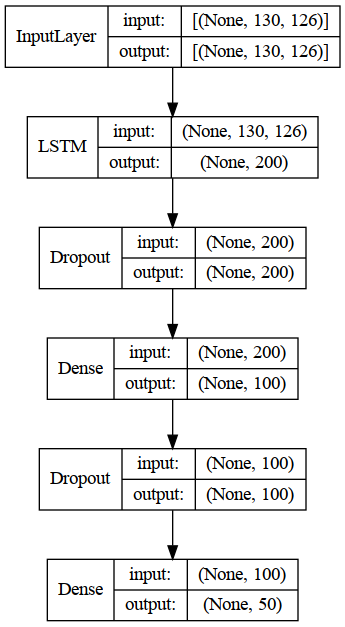

In [128]:
plot_model(reconstructed_model, show_shapes=True, show_layer_names=False)

In [145]:
print(classification_report(np.argmax(Yval, axis=1), np.argmax(reconstructed_model.predict(Xval), axis=1),
                            digits=3, target_names=label_map))

11/11 [==============================] - 1s 12ms/step
              precision    recall  f1-score   support

         AXE      1.000     0.750     0.857         8
    BACKPACK      1.000     1.000     1.000         6
  BASKETBALL      0.833     1.000     0.909        10
         BEE      1.000     0.900     0.947        10
        BELT      1.000     1.000     1.000         4
        BITE      0.889     1.000     0.941         8
   BREAKFAST      0.750     1.000     0.857         6
      CANCER      0.889     1.000     0.941         8
   CHRISTMAS      1.000     0.667     0.800         6
    CONFUSED      1.000     1.000     1.000         6
        DARK      0.667     1.000     0.800         4
        DEAF      1.000     1.000     1.000         6
      DECIDE      0.857     1.000     0.923         6
      DEMAND      0.667     0.750     0.706         8
     DEVELOP      0.375     0.500     0.429         6
      DINNER      0.636     0.875     0.737         8
         DOG      1.000    

In [146]:
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath='1 LSTM Lecunnormal/',
    monitor='val_f1_score',
    mode='max',
    save_best_only=True)

In [147]:
act_function = 'selu'
initializer = tf.keras.initializers.LecunNormal(seed=10)
model = Sequential()
model.add(LSTM(units=200,return_sequences=False,input_shape=(130,126),
               kernel_initializer=initializer,kernel_regularizer=regularizers.l2(.0003948697422663148)))
#model.add(Dropout(.6))
model.add(Dense(units=100,activation=act_function,kernel_initializer=initializer))
#model.add(Dropout(.15))
model.add(Dense(50, activation='softmax'))
model.compile(tf.optimizers.experimental.Nadam(.00034981818142934215),loss='categorical_crossentropy',
            metrics=[tfa.metrics.F1Score(num_classes=50, average='macro')])
model.summary()
History = model.fit(x=Xtrain, y=Ytrain,validation_data= (Xval,Yval), batch_size=96,epochs=500, verbose=1,callbacks=[model_checkpoint_callback])

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 200)               261600    
                                                                 
 dense_6 (Dense)             (None, 100)               20100     
                                                                 
 dense_7 (Dense)             (None, 50)                5050      
                                                                 
Total params: 286,750
Trainable params: 286,750
Non-trainable params: 0
_________________________________________________________________
Epoch 1/500
28/28 [==============================] - ETA: 0s - loss: 4.2118 - f1_score: 0.0089

INFO:tensorflow:Assets written to: 1 LSTM Lecunnormal/assets


INFO:tensorflow:Assets written to: 1 LSTM Lecunnormal/assets


28/28 [==============================] - 16s 496ms/step - loss: 4.2118 - f1_score: 0.0089 - val_loss: 4.1912 - val_f1_score: 0.0066
Epoch 2/500
28/28 [==============================] - ETA: 0s - loss: 4.0117 - f1_score: 0.0118

INFO:tensorflow:Assets written to: 1 LSTM Lecunnormal/assets


INFO:tensorflow:Assets written to: 1 LSTM Lecunnormal/assets


28/28 [==============================] - 9s 318ms/step - loss: 4.0117 - f1_score: 0.0118 - val_loss: 3.9728 - val_f1_score: 0.0076
Epoch 3/500
28/28 [==============================] - 2s 59ms/step - loss: 3.7847 - f1_score: 0.0167 - val_loss: 3.7675 - val_f1_score: 0.0068
Epoch 4/500
27/28 [===========================>..] - ETA: 0s - loss: 3.6773 - f1_score: 0.0298

INFO:tensorflow:Assets written to: 1 LSTM Lecunnormal/assets


INFO:tensorflow:Assets written to: 1 LSTM Lecunnormal/assets


28/28 [==============================] - 9s 332ms/step - loss: 3.6750 - f1_score: 0.0299 - val_loss: 3.6500 - val_f1_score: 0.0211
Epoch 5/500
28/28 [==============================] - ETA: 0s - loss: 3.4838 - f1_score: 0.0568

INFO:tensorflow:Assets written to: 1 LSTM Lecunnormal/assets


INFO:tensorflow:Assets written to: 1 LSTM Lecunnormal/assets


28/28 [==============================] - 8s 289ms/step - loss: 3.4838 - f1_score: 0.0568 - val_loss: 3.4072 - val_f1_score: 0.0551
Epoch 6/500
28/28 [==============================] - ETA: 0s - loss: 3.2498 - f1_score: 0.0864

INFO:tensorflow:Assets written to: 1 LSTM Lecunnormal/assets


INFO:tensorflow:Assets written to: 1 LSTM Lecunnormal/assets


28/28 [==============================] - 10s 354ms/step - loss: 3.2498 - f1_score: 0.0864 - val_loss: 3.2291 - val_f1_score: 0.0709
Epoch 7/500
28/28 [==============================] - ETA: 0s - loss: 3.0166 - f1_score: 0.1361

INFO:tensorflow:Assets written to: 1 LSTM Lecunnormal/assets


INFO:tensorflow:Assets written to: 1 LSTM Lecunnormal/assets


28/28 [==============================] - 8s 285ms/step - loss: 3.0166 - f1_score: 0.1361 - val_loss: 3.0154 - val_f1_score: 0.1158
Epoch 8/500
28/28 [==============================] - ETA: 0s - loss: 2.8343 - f1_score: 0.1716

INFO:tensorflow:Assets written to: 1 LSTM Lecunnormal/assets


INFO:tensorflow:Assets written to: 1 LSTM Lecunnormal/assets


28/28 [==============================] - 9s 320ms/step - loss: 2.8343 - f1_score: 0.1716 - val_loss: 2.9414 - val_f1_score: 0.1570
Epoch 9/500
28/28 [==============================] - ETA: 0s - loss: 2.7075 - f1_score: 0.1950

INFO:tensorflow:Assets written to: 1 LSTM Lecunnormal/assets


INFO:tensorflow:Assets written to: 1 LSTM Lecunnormal/assets


28/28 [==============================] - 10s 364ms/step - loss: 2.7075 - f1_score: 0.1950 - val_loss: 2.7965 - val_f1_score: 0.1662
Epoch 10/500
28/28 [==============================] - ETA: 0s - loss: 2.4900 - f1_score: 0.2554

INFO:tensorflow:Assets written to: 1 LSTM Lecunnormal/assets


INFO:tensorflow:Assets written to: 1 LSTM Lecunnormal/assets


28/28 [==============================] - 8s 302ms/step - loss: 2.4900 - f1_score: 0.2554 - val_loss: 2.6398 - val_f1_score: 0.2338
Epoch 11/500
28/28 [==============================] - ETA: 0s - loss: 2.3850 - f1_score: 0.2845

INFO:tensorflow:Assets written to: 1 LSTM Lecunnormal/assets


INFO:tensorflow:Assets written to: 1 LSTM Lecunnormal/assets


28/28 [==============================] - 9s 344ms/step - loss: 2.3850 - f1_score: 0.2845 - val_loss: 2.6805 - val_f1_score: 0.2525
Epoch 12/500
28/28 [==============================] - ETA: 0s - loss: 2.3001 - f1_score: 0.3075

INFO:tensorflow:Assets written to: 1 LSTM Lecunnormal/assets


INFO:tensorflow:Assets written to: 1 LSTM Lecunnormal/assets


28/28 [==============================] - 8s 292ms/step - loss: 2.3001 - f1_score: 0.3075 - val_loss: 2.4628 - val_f1_score: 0.2624
Epoch 13/500
28/28 [==============================] - ETA: 0s - loss: 2.1129 - f1_score: 0.3661

INFO:tensorflow:Assets written to: 1 LSTM Lecunnormal/assets


INFO:tensorflow:Assets written to: 1 LSTM Lecunnormal/assets


28/28 [==============================] - 9s 325ms/step - loss: 2.1129 - f1_score: 0.3661 - val_loss: 2.3479 - val_f1_score: 0.3504
Epoch 14/500
28/28 [==============================] - ETA: 0s - loss: 2.0256 - f1_score: 0.3976

INFO:tensorflow:Assets written to: 1 LSTM Lecunnormal/assets


INFO:tensorflow:Assets written to: 1 LSTM Lecunnormal/assets


28/28 [==============================] - 8s 293ms/step - loss: 2.0256 - f1_score: 0.3976 - val_loss: 2.2524 - val_f1_score: 0.3609
Epoch 15/500
28/28 [==============================] - ETA: 0s - loss: 2.0669 - f1_score: 0.3898

INFO:tensorflow:Assets written to: 1 LSTM Lecunnormal/assets


INFO:tensorflow:Assets written to: 1 LSTM Lecunnormal/assets


28/28 [==============================] - 8s 303ms/step - loss: 2.0669 - f1_score: 0.3898 - val_loss: 2.1853 - val_f1_score: 0.3937
Epoch 16/500
28/28 [==============================] - ETA: 0s - loss: 1.8716 - f1_score: 0.4656

INFO:tensorflow:Assets written to: 1 LSTM Lecunnormal/assets


INFO:tensorflow:Assets written to: 1 LSTM Lecunnormal/assets


28/28 [==============================] - 9s 313ms/step - loss: 1.8716 - f1_score: 0.4656 - val_loss: 2.1693 - val_f1_score: 0.4248
Epoch 17/500
28/28 [==============================] - ETA: 0s - loss: 1.7355 - f1_score: 0.5089

INFO:tensorflow:Assets written to: 1 LSTM Lecunnormal/assets


INFO:tensorflow:Assets written to: 1 LSTM Lecunnormal/assets


28/28 [==============================] - 8s 303ms/step - loss: 1.7355 - f1_score: 0.5089 - val_loss: 1.9700 - val_f1_score: 0.4756
Epoch 18/500
28/28 [==============================] - ETA: 0s - loss: 1.6237 - f1_score: 0.5575

INFO:tensorflow:Assets written to: 1 LSTM Lecunnormal/assets


INFO:tensorflow:Assets written to: 1 LSTM Lecunnormal/assets


28/28 [==============================] - 8s 308ms/step - loss: 1.6237 - f1_score: 0.5575 - val_loss: 1.9157 - val_f1_score: 0.5105
Epoch 19/500
28/28 [==============================] - 2s 59ms/step - loss: 1.5770 - f1_score: 0.5702 - val_loss: 1.9057 - val_f1_score: 0.5011
Epoch 20/500
28/28 [==============================] - 2s 60ms/step - loss: 1.4874 - f1_score: 0.5938 - val_loss: 1.9552 - val_f1_score: 0.4956
Epoch 21/500
28/28 [==============================] - 2s 59ms/step - loss: 1.4127 - f1_score: 0.6234 - val_loss: 1.8591 - val_f1_score: 0.4771
Epoch 22/500
28/28 [==============================] - ETA: 0s - loss: 1.3350 - f1_score: 0.6427

INFO:tensorflow:Assets written to: 1 LSTM Lecunnormal/assets


INFO:tensorflow:Assets written to: 1 LSTM Lecunnormal/assets


28/28 [==============================] - 9s 317ms/step - loss: 1.3350 - f1_score: 0.6427 - val_loss: 1.9203 - val_f1_score: 0.5514
Epoch 23/500
28/28 [==============================] - 2s 60ms/step - loss: 1.3153 - f1_score: 0.6408 - val_loss: 1.8021 - val_f1_score: 0.5261
Epoch 24/500
28/28 [==============================] - 2s 59ms/step - loss: 1.2158 - f1_score: 0.6803 - val_loss: 1.9735 - val_f1_score: 0.5064
Epoch 25/500
28/28 [==============================] - ETA: 0s - loss: 1.2852 - f1_score: 0.6525

INFO:tensorflow:Assets written to: 1 LSTM Lecunnormal/assets


INFO:tensorflow:Assets written to: 1 LSTM Lecunnormal/assets


28/28 [==============================] - 10s 351ms/step - loss: 1.2852 - f1_score: 0.6525 - val_loss: 1.6934 - val_f1_score: 0.5516
Epoch 26/500
28/28 [==============================] - ETA: 0s - loss: 1.1384 - f1_score: 0.7056

INFO:tensorflow:Assets written to: 1 LSTM Lecunnormal/assets


INFO:tensorflow:Assets written to: 1 LSTM Lecunnormal/assets


28/28 [==============================] - 8s 300ms/step - loss: 1.1384 - f1_score: 0.7056 - val_loss: 1.6834 - val_f1_score: 0.5813
Epoch 27/500
28/28 [==============================] - 2s 59ms/step - loss: 1.0611 - f1_score: 0.7400 - val_loss: 1.7468 - val_f1_score: 0.5714
Epoch 28/500
28/28 [==============================] - ETA: 0s - loss: 1.0832 - f1_score: 0.7102

INFO:tensorflow:Assets written to: 1 LSTM Lecunnormal/assets


INFO:tensorflow:Assets written to: 1 LSTM Lecunnormal/assets


28/28 [==============================] - 8s 298ms/step - loss: 1.0832 - f1_score: 0.7102 - val_loss: 1.6457 - val_f1_score: 0.6187
Epoch 29/500
28/28 [==============================] - 2s 59ms/step - loss: 0.9838 - f1_score: 0.7510 - val_loss: 1.6864 - val_f1_score: 0.5933
Epoch 30/500
28/28 [==============================] - 2s 60ms/step - loss: 0.9467 - f1_score: 0.7547 - val_loss: 1.7452 - val_f1_score: 0.5708
Epoch 31/500
28/28 [==============================] - ETA: 0s - loss: 0.9103 - f1_score: 0.7741

INFO:tensorflow:Assets written to: 1 LSTM Lecunnormal/assets


INFO:tensorflow:Assets written to: 1 LSTM Lecunnormal/assets


28/28 [==============================] - 9s 336ms/step - loss: 0.9103 - f1_score: 0.7741 - val_loss: 1.6858 - val_f1_score: 0.6228
Epoch 32/500
28/28 [==============================] - 2s 59ms/step - loss: 0.9450 - f1_score: 0.7589 - val_loss: 1.7051 - val_f1_score: 0.5964
Epoch 33/500
28/28 [==============================] - ETA: 0s - loss: 0.9265 - f1_score: 0.7597

INFO:tensorflow:Assets written to: 1 LSTM Lecunnormal/assets


INFO:tensorflow:Assets written to: 1 LSTM Lecunnormal/assets


28/28 [==============================] - 9s 344ms/step - loss: 0.9265 - f1_score: 0.7597 - val_loss: 1.6068 - val_f1_score: 0.6296
Epoch 34/500
28/28 [==============================] - 2s 59ms/step - loss: 0.8669 - f1_score: 0.7886 - val_loss: 1.6907 - val_f1_score: 0.6292
Epoch 35/500
28/28 [==============================] - ETA: 0s - loss: 0.8308 - f1_score: 0.8016

INFO:tensorflow:Assets written to: 1 LSTM Lecunnormal/assets


INFO:tensorflow:Assets written to: 1 LSTM Lecunnormal/assets


28/28 [==============================] - 8s 295ms/step - loss: 0.8308 - f1_score: 0.8016 - val_loss: 1.5860 - val_f1_score: 0.6404
Epoch 36/500
28/28 [==============================] - ETA: 0s - loss: 0.7565 - f1_score: 0.8246

INFO:tensorflow:Assets written to: 1 LSTM Lecunnormal/assets


INFO:tensorflow:Assets written to: 1 LSTM Lecunnormal/assets


28/28 [==============================] - 8s 295ms/step - loss: 0.7565 - f1_score: 0.8246 - val_loss: 1.5633 - val_f1_score: 0.6517
Epoch 37/500
28/28 [==============================] - 2s 59ms/step - loss: 0.7376 - f1_score: 0.8215 - val_loss: 1.6541 - val_f1_score: 0.6376
Epoch 38/500
28/28 [==============================] - 2s 59ms/step - loss: 0.6870 - f1_score: 0.8475 - val_loss: 1.6158 - val_f1_score: 0.6427
Epoch 39/500
28/28 [==============================] - 2s 60ms/step - loss: 0.7934 - f1_score: 0.8147 - val_loss: 1.6101 - val_f1_score: 0.6034
Epoch 40/500
28/28 [==============================] - ETA: 0s - loss: 0.7396 - f1_score: 0.8242

INFO:tensorflow:Assets written to: 1 LSTM Lecunnormal/assets


INFO:tensorflow:Assets written to: 1 LSTM Lecunnormal/assets


28/28 [==============================] - 9s 348ms/step - loss: 0.7396 - f1_score: 0.8242 - val_loss: 1.5875 - val_f1_score: 0.6517
Epoch 41/500
28/28 [==============================] - 2s 60ms/step - loss: 0.7220 - f1_score: 0.8272 - val_loss: 1.5922 - val_f1_score: 0.6426
Epoch 42/500
28/28 [==============================] - 2s 60ms/step - loss: 0.7633 - f1_score: 0.8062 - val_loss: 1.6605 - val_f1_score: 0.6355
Epoch 43/500
28/28 [==============================] - 2s 60ms/step - loss: 0.6947 - f1_score: 0.8364 - val_loss: 1.7730 - val_f1_score: 0.6210
Epoch 44/500
28/28 [==============================] - 2s 61ms/step - loss: 0.8367 - f1_score: 0.7882 - val_loss: 1.6649 - val_f1_score: 0.6260
Epoch 45/500
28/28 [==============================] - ETA: 0s - loss: 0.6994 - f1_score: 0.8333

INFO:tensorflow:Assets written to: 1 LSTM Lecunnormal/assets


INFO:tensorflow:Assets written to: 1 LSTM Lecunnormal/assets


28/28 [==============================] - 9s 334ms/step - loss: 0.6994 - f1_score: 0.8333 - val_loss: 1.5597 - val_f1_score: 0.6711
Epoch 46/500
28/28 [==============================] - ETA: 0s - loss: 0.5937 - f1_score: 0.8689

INFO:tensorflow:Assets written to: 1 LSTM Lecunnormal/assets


INFO:tensorflow:Assets written to: 1 LSTM Lecunnormal/assets


28/28 [==============================] - 9s 321ms/step - loss: 0.5937 - f1_score: 0.8689 - val_loss: 1.5530 - val_f1_score: 0.6789
Epoch 47/500
28/28 [==============================] - 2s 59ms/step - loss: 0.5299 - f1_score: 0.8894 - val_loss: 1.5562 - val_f1_score: 0.6488
Epoch 48/500
28/28 [==============================] - ETA: 0s - loss: 0.4972 - f1_score: 0.9069

INFO:tensorflow:Assets written to: 1 LSTM Lecunnormal/assets


INFO:tensorflow:Assets written to: 1 LSTM Lecunnormal/assets


28/28 [==============================] - 10s 350ms/step - loss: 0.4972 - f1_score: 0.9069 - val_loss: 1.4518 - val_f1_score: 0.6930
Epoch 49/500
28/28 [==============================] - 2s 59ms/step - loss: 0.4813 - f1_score: 0.9124 - val_loss: 1.5234 - val_f1_score: 0.6788
Epoch 50/500
28/28 [==============================] - 2s 60ms/step - loss: 0.4496 - f1_score: 0.9245 - val_loss: 1.5658 - val_f1_score: 0.6921
Epoch 51/500
28/28 [==============================] - 2s 60ms/step - loss: 0.5549 - f1_score: 0.8879 - val_loss: 1.6826 - val_f1_score: 0.6129
Epoch 52/500
28/28 [==============================] - ETA: 0s - loss: 0.5699 - f1_score: 0.8716

INFO:tensorflow:Assets written to: 1 LSTM Lecunnormal/assets


INFO:tensorflow:Assets written to: 1 LSTM Lecunnormal/assets


28/28 [==============================] - 9s 321ms/step - loss: 0.5699 - f1_score: 0.8716 - val_loss: 1.4956 - val_f1_score: 0.7035
Epoch 53/500
28/28 [==============================] - 2s 60ms/step - loss: 0.5320 - f1_score: 0.8897 - val_loss: 1.5270 - val_f1_score: 0.6868
Epoch 54/500
28/28 [==============================] - 2s 60ms/step - loss: 0.4866 - f1_score: 0.9086 - val_loss: 1.6332 - val_f1_score: 0.6650
Epoch 55/500
28/28 [==============================] - 2s 60ms/step - loss: 0.5038 - f1_score: 0.9021 - val_loss: 1.5676 - val_f1_score: 0.6989
Epoch 56/500
28/28 [==============================] - 2s 60ms/step - loss: 0.4323 - f1_score: 0.9229 - val_loss: 1.5563 - val_f1_score: 0.6982
Epoch 57/500
28/28 [==============================] - 2s 60ms/step - loss: 0.3834 - f1_score: 0.9432 - val_loss: 1.5589 - val_f1_score: 0.6959
Epoch 58/500
28/28 [==============================] - 2s 60ms/step - loss: 0.3804 - f1_score: 0.9407 - val_loss: 1.5621 - val_f1_score: 0.7024
Epoch 59/50

INFO:tensorflow:Assets written to: 1 LSTM Lecunnormal/assets


INFO:tensorflow:Assets written to: 1 LSTM Lecunnormal/assets


28/28 [==============================] - 10s 351ms/step - loss: 0.3417 - f1_score: 0.9596 - val_loss: 1.5895 - val_f1_score: 0.7097
Epoch 60/500
28/28 [==============================] - 2s 59ms/step - loss: 0.3213 - f1_score: 0.9591 - val_loss: 1.5264 - val_f1_score: 0.7033
Epoch 61/500
28/28 [==============================] - 2s 60ms/step - loss: 0.3121 - f1_score: 0.9681 - val_loss: 1.5456 - val_f1_score: 0.6903
Epoch 62/500
28/28 [==============================] - 2s 60ms/step - loss: 0.2986 - f1_score: 0.9724 - val_loss: 1.5553 - val_f1_score: 0.7039
Epoch 63/500
28/28 [==============================] - ETA: 0s - loss: 0.3183 - f1_score: 0.9623

INFO:tensorflow:Assets written to: 1 LSTM Lecunnormal/assets


INFO:tensorflow:Assets written to: 1 LSTM Lecunnormal/assets


28/28 [==============================] - 11s 402ms/step - loss: 0.3183 - f1_score: 0.9623 - val_loss: 1.5880 - val_f1_score: 0.7141
Epoch 64/500
28/28 [==============================] - ETA: 0s - loss: 0.3067 - f1_score: 0.9665

INFO:tensorflow:Assets written to: 1 LSTM Lecunnormal/assets


INFO:tensorflow:Assets written to: 1 LSTM Lecunnormal/assets


28/28 [==============================] - 9s 315ms/step - loss: 0.3067 - f1_score: 0.9665 - val_loss: 1.5400 - val_f1_score: 0.7157
Epoch 65/500
28/28 [==============================] - 2s 60ms/step - loss: 0.3107 - f1_score: 0.9650 - val_loss: 1.6780 - val_f1_score: 0.6872
Epoch 66/500
28/28 [==============================] - 2s 60ms/step - loss: 0.4443 - f1_score: 0.9251 - val_loss: 1.8090 - val_f1_score: 0.6619
Epoch 67/500
28/28 [==============================] - 2s 62ms/step - loss: 0.6203 - f1_score: 0.8601 - val_loss: 1.7024 - val_f1_score: 0.6659
Epoch 68/500
28/28 [==============================] - 2s 60ms/step - loss: 0.7361 - f1_score: 0.8302 - val_loss: 1.6222 - val_f1_score: 0.6760
Epoch 69/500
28/28 [==============================] - 2s 60ms/step - loss: 0.5182 - f1_score: 0.8861 - val_loss: 1.7853 - val_f1_score: 0.6651
Epoch 70/500
28/28 [==============================] - 2s 60ms/step - loss: 0.5853 - f1_score: 0.8692 - val_loss: 1.7504 - val_f1_score: 0.6486
Epoch 71/50

INFO:tensorflow:Assets written to: 1 LSTM Lecunnormal/assets


INFO:tensorflow:Assets written to: 1 LSTM Lecunnormal/assets


28/28 [==============================] - 9s 316ms/step - loss: 0.3714 - f1_score: 0.9408 - val_loss: 1.5221 - val_f1_score: 0.7161
Epoch 73/500
28/28 [==============================] - 2s 60ms/step - loss: 0.3190 - f1_score: 0.9598 - val_loss: 1.5297 - val_f1_score: 0.7023
Epoch 74/500
28/28 [==============================] - ETA: 0s - loss: 0.2869 - f1_score: 0.9710

INFO:tensorflow:Assets written to: 1 LSTM Lecunnormal/assets


INFO:tensorflow:Assets written to: 1 LSTM Lecunnormal/assets


28/28 [==============================] - 8s 302ms/step - loss: 0.2869 - f1_score: 0.9710 - val_loss: 1.5602 - val_f1_score: 0.7231
Epoch 75/500
28/28 [==============================] - 2s 60ms/step - loss: 0.2645 - f1_score: 0.9796 - val_loss: 1.5552 - val_f1_score: 0.7208
Epoch 76/500
28/28 [==============================] - 2s 60ms/step - loss: 0.2520 - f1_score: 0.9819 - val_loss: 1.5631 - val_f1_score: 0.7124
Epoch 77/500
28/28 [==============================] - 2s 60ms/step - loss: 0.2499 - f1_score: 0.9794 - val_loss: 1.5057 - val_f1_score: 0.7110
Epoch 78/500
28/28 [==============================] - 2s 60ms/step - loss: 0.2334 - f1_score: 0.9856 - val_loss: 1.6557 - val_f1_score: 0.6832
Epoch 79/500
28/28 [==============================] - 2s 60ms/step - loss: 0.2411 - f1_score: 0.9830 - val_loss: 1.5905 - val_f1_score: 0.7133
Epoch 80/500
28/28 [==============================] - ETA: 0s - loss: 0.2220 - f1_score: 0.9904

INFO:tensorflow:Assets written to: 1 LSTM Lecunnormal/assets


INFO:tensorflow:Assets written to: 1 LSTM Lecunnormal/assets


28/28 [==============================] - 11s 404ms/step - loss: 0.2220 - f1_score: 0.9904 - val_loss: 1.5601 - val_f1_score: 0.7293
Epoch 81/500
28/28 [==============================] - 2s 60ms/step - loss: 0.2090 - f1_score: 0.9953 - val_loss: 1.5793 - val_f1_score: 0.7103
Epoch 82/500
28/28 [==============================] - 2s 59ms/step - loss: 0.2122 - f1_score: 0.9931 - val_loss: 1.6247 - val_f1_score: 0.7181
Epoch 83/500
28/28 [==============================] - 2s 60ms/step - loss: 0.2050 - f1_score: 0.9953 - val_loss: 1.5506 - val_f1_score: 0.7286
Epoch 84/500
28/28 [==============================] - 2s 60ms/step - loss: 0.1964 - f1_score: 0.9967 - val_loss: 1.5343 - val_f1_score: 0.7260
Epoch 85/500
28/28 [==============================] - ETA: 0s - loss: 0.1906 - f1_score: 0.9978

INFO:tensorflow:Assets written to: 1 LSTM Lecunnormal/assets


INFO:tensorflow:Assets written to: 1 LSTM Lecunnormal/assets


28/28 [==============================] - 9s 330ms/step - loss: 0.1906 - f1_score: 0.9978 - val_loss: 1.5627 - val_f1_score: 0.7400
Epoch 86/500
28/28 [==============================] - 2s 60ms/step - loss: 0.1868 - f1_score: 0.9978 - val_loss: 1.5554 - val_f1_score: 0.7329
Epoch 87/500
28/28 [==============================] - 2s 60ms/step - loss: 0.1845 - f1_score: 0.9978 - val_loss: 1.5584 - val_f1_score: 0.7390
Epoch 88/500
28/28 [==============================] - ETA: 0s - loss: 0.1821 - f1_score: 0.9974

INFO:tensorflow:Assets written to: 1 LSTM Lecunnormal/assets


INFO:tensorflow:Assets written to: 1 LSTM Lecunnormal/assets


28/28 [==============================] - 8s 310ms/step - loss: 0.1821 - f1_score: 0.9974 - val_loss: 1.5726 - val_f1_score: 0.7449
Epoch 89/500
28/28 [==============================] - 2s 59ms/step - loss: 0.1796 - f1_score: 0.9982 - val_loss: 1.5728 - val_f1_score: 0.7347
Epoch 90/500
28/28 [==============================] - 2s 60ms/step - loss: 0.1780 - f1_score: 0.9982 - val_loss: 1.5995 - val_f1_score: 0.7259
Epoch 91/500
28/28 [==============================] - 2s 60ms/step - loss: 0.1759 - f1_score: 0.9978 - val_loss: 1.5969 - val_f1_score: 0.7381
Epoch 92/500
28/28 [==============================] - 2s 60ms/step - loss: 0.1739 - f1_score: 0.9982 - val_loss: 1.6100 - val_f1_score: 0.7359
Epoch 93/500
28/28 [==============================] - ETA: 0s - loss: 0.1721 - f1_score: 0.9982

INFO:tensorflow:Assets written to: 1 LSTM Lecunnormal/assets


INFO:tensorflow:Assets written to: 1 LSTM Lecunnormal/assets


28/28 [==============================] - 9s 347ms/step - loss: 0.1721 - f1_score: 0.9982 - val_loss: 1.6165 - val_f1_score: 0.7481
Epoch 94/500
28/28 [==============================] - ETA: 0s - loss: 0.1704 - f1_score: 0.9982

INFO:tensorflow:Assets written to: 1 LSTM Lecunnormal/assets


INFO:tensorflow:Assets written to: 1 LSTM Lecunnormal/assets


28/28 [==============================] - 8s 299ms/step - loss: 0.1704 - f1_score: 0.9982 - val_loss: 1.6059 - val_f1_score: 0.7489
Epoch 95/500
28/28 [==============================] - 2s 60ms/step - loss: 0.1689 - f1_score: 0.9982 - val_loss: 1.6501 - val_f1_score: 0.7364
Epoch 96/500
28/28 [==============================] - 2s 60ms/step - loss: 0.1674 - f1_score: 0.9982 - val_loss: 1.6281 - val_f1_score: 0.7336
Epoch 97/500
28/28 [==============================] - 2s 60ms/step - loss: 0.1661 - f1_score: 0.9987 - val_loss: 1.6496 - val_f1_score: 0.7396
Epoch 98/500
28/28 [==============================] - 2s 60ms/step - loss: 0.1647 - f1_score: 0.9987 - val_loss: 1.6372 - val_f1_score: 0.7339
Epoch 99/500
28/28 [==============================] - 2s 61ms/step - loss: 0.1631 - f1_score: 0.9992 - val_loss: 1.6474 - val_f1_score: 0.7337
Epoch 100/500
28/28 [==============================] - 2s 60ms/step - loss: 0.1618 - f1_score: 0.9997 - val_loss: 1.6396 - val_f1_score: 0.7446
Epoch 101/

28/28 [==============================] - 2s 63ms/step - loss: 0.1362 - f1_score: 1.0000 - val_loss: 1.6675 - val_f1_score: 0.7118
Epoch 152/500
28/28 [==============================] - 2s 64ms/step - loss: 0.1352 - f1_score: 1.0000 - val_loss: 1.6606 - val_f1_score: 0.7255
Epoch 153/500
28/28 [==============================] - 2s 64ms/step - loss: 0.1342 - f1_score: 1.0000 - val_loss: 1.6775 - val_f1_score: 0.7205
Epoch 154/500
28/28 [==============================] - 2s 64ms/step - loss: 0.1333 - f1_score: 1.0000 - val_loss: 1.6802 - val_f1_score: 0.7149
Epoch 155/500
28/28 [==============================] - 2s 63ms/step - loss: 0.1324 - f1_score: 1.0000 - val_loss: 1.6800 - val_f1_score: 0.7249
Epoch 156/500
28/28 [==============================] - 2s 64ms/step - loss: 0.1316 - f1_score: 1.0000 - val_loss: 1.6829 - val_f1_score: 0.7202
Epoch 157/500
28/28 [==============================] - 2s 64ms/step - loss: 0.1308 - f1_score: 1.0000 - val_loss: 1.6860 - val_f1_score: 0.7243
Epoch 

Epoch 208/500
28/28 [==============================] - 2s 63ms/step - loss: 0.0981 - f1_score: 1.0000 - val_loss: 1.8180 - val_f1_score: 0.7318
Epoch 209/500
28/28 [==============================] - 2s 64ms/step - loss: 0.0975 - f1_score: 1.0000 - val_loss: 1.8206 - val_f1_score: 0.7461
Epoch 210/500
28/28 [==============================] - 2s 64ms/step - loss: 0.0969 - f1_score: 1.0000 - val_loss: 1.8227 - val_f1_score: 0.7455
Epoch 211/500
28/28 [==============================] - 2s 66ms/step - loss: 0.0963 - f1_score: 1.0000 - val_loss: 1.8222 - val_f1_score: 0.7416
Epoch 212/500
28/28 [==============================] - 2s 67ms/step - loss: 0.0957 - f1_score: 1.0000 - val_loss: 1.8260 - val_f1_score: 0.7432
Epoch 213/500
28/28 [==============================] - 2s 63ms/step - loss: 0.0951 - f1_score: 1.0000 - val_loss: 1.8239 - val_f1_score: 0.7390
Epoch 214/500
28/28 [==============================] - 2s 63ms/step - loss: 0.0945 - f1_score: 1.0000 - val_loss: 1.8359 - val_f1_score:

INFO:tensorflow:Assets written to: 1 LSTM Lecunnormal/assets


INFO:tensorflow:Assets written to: 1 LSTM Lecunnormal/assets


28/28 [==============================] - 11s 391ms/step - loss: 0.0902 - f1_score: 1.0000 - val_loss: 1.5819 - val_f1_score: 0.7505
Epoch 265/500
28/28 [==============================] - 2s 60ms/step - loss: 0.0897 - f1_score: 1.0000 - val_loss: 1.5833 - val_f1_score: 0.7459
Epoch 266/500
28/28 [==============================] - 2s 61ms/step - loss: 0.0893 - f1_score: 1.0000 - val_loss: 1.5885 - val_f1_score: 0.7493
Epoch 267/500
28/28 [==============================] - 2s 62ms/step - loss: 0.0888 - f1_score: 1.0000 - val_loss: 1.5949 - val_f1_score: 0.7436
Epoch 268/500
28/28 [==============================] - 2s 62ms/step - loss: 0.0884 - f1_score: 1.0000 - val_loss: 1.6008 - val_f1_score: 0.7482
Epoch 269/500
28/28 [==============================] - 2s 62ms/step - loss: 0.0879 - f1_score: 1.0000 - val_loss: 1.6013 - val_f1_score: 0.7433
Epoch 270/500
28/28 [==============================] - 2s 63ms/step - loss: 0.0875 - f1_score: 1.0000 - val_loss: 1.6066 - val_f1_score: 0.7457
Epoc

Epoch 321/500
28/28 [==============================] - 2s 70ms/step - loss: 0.0684 - f1_score: 1.0000 - val_loss: 1.7793 - val_f1_score: 0.7272
Epoch 322/500
28/28 [==============================] - 2s 63ms/step - loss: 0.0681 - f1_score: 1.0000 - val_loss: 1.7820 - val_f1_score: 0.7207
Epoch 323/500
28/28 [==============================] - 2s 64ms/step - loss: 0.0677 - f1_score: 1.0000 - val_loss: 1.7845 - val_f1_score: 0.7255
Epoch 324/500
28/28 [==============================] - 2s 65ms/step - loss: 0.0674 - f1_score: 1.0000 - val_loss: 1.7902 - val_f1_score: 0.7250
Epoch 325/500
28/28 [==============================] - 2s 64ms/step - loss: 0.0670 - f1_score: 1.0000 - val_loss: 1.7911 - val_f1_score: 0.7188
Epoch 326/500
28/28 [==============================] - 2s 64ms/step - loss: 0.0666 - f1_score: 1.0000 - val_loss: 1.7948 - val_f1_score: 0.7226
Epoch 327/500
28/28 [==============================] - 2s 65ms/step - loss: 0.0663 - f1_score: 1.0000 - val_loss: 1.8011 - val_f1_score:

Epoch 378/500
28/28 [==============================] - 2s 64ms/step - loss: 0.0662 - f1_score: 1.0000 - val_loss: 1.5970 - val_f1_score: 0.7272
Epoch 379/500
28/28 [==============================] - 2s 64ms/step - loss: 0.0659 - f1_score: 1.0000 - val_loss: 1.6047 - val_f1_score: 0.7272
Epoch 380/500
28/28 [==============================] - 2s 65ms/step - loss: 0.0656 - f1_score: 1.0000 - val_loss: 1.6014 - val_f1_score: 0.7289
Epoch 381/500
28/28 [==============================] - 2s 65ms/step - loss: 0.0652 - f1_score: 1.0000 - val_loss: 1.6096 - val_f1_score: 0.7246
Epoch 382/500
28/28 [==============================] - 2s 65ms/step - loss: 0.0649 - f1_score: 1.0000 - val_loss: 1.6136 - val_f1_score: 0.7286
Epoch 383/500
28/28 [==============================] - 2s 65ms/step - loss: 0.0647 - f1_score: 1.0000 - val_loss: 1.6154 - val_f1_score: 0.7285
Epoch 384/500
28/28 [==============================] - 2s 64ms/step - loss: 0.0644 - f1_score: 1.0000 - val_loss: 1.6191 - val_f1_score:

Epoch 435/500
28/28 [==============================] - 2s 64ms/step - loss: 0.0522 - f1_score: 1.0000 - val_loss: 1.8046 - val_f1_score: 0.7421
Epoch 436/500
28/28 [==============================] - 2s 64ms/step - loss: 0.0520 - f1_score: 1.0000 - val_loss: 1.8096 - val_f1_score: 0.7422
Epoch 437/500
28/28 [==============================] - 2s 64ms/step - loss: 0.0518 - f1_score: 1.0000 - val_loss: 1.8110 - val_f1_score: 0.7421
Epoch 438/500
28/28 [==============================] - 2s 64ms/step - loss: 0.0515 - f1_score: 1.0000 - val_loss: 1.8124 - val_f1_score: 0.7421
Epoch 439/500
28/28 [==============================] - 2s 66ms/step - loss: 0.0513 - f1_score: 1.0000 - val_loss: 1.8157 - val_f1_score: 0.7421
Epoch 440/500
28/28 [==============================] - 2s 64ms/step - loss: 0.0511 - f1_score: 1.0000 - val_loss: 1.8172 - val_f1_score: 0.7367
Epoch 441/500
28/28 [==============================] - 2s 65ms/step - loss: 0.0508 - f1_score: 1.0000 - val_loss: 1.8179 - val_f1_score:

Epoch 492/500
28/28 [==============================] - 2s 64ms/step - loss: 0.0521 - f1_score: 1.0000 - val_loss: 1.4787 - val_f1_score: 0.7388
Epoch 493/500
28/28 [==============================] - 2s 64ms/step - loss: 0.0518 - f1_score: 1.0000 - val_loss: 1.4799 - val_f1_score: 0.7371
Epoch 494/500
28/28 [==============================] - 2s 64ms/step - loss: 0.0515 - f1_score: 1.0000 - val_loss: 1.4853 - val_f1_score: 0.7340
Epoch 495/500
28/28 [==============================] - 2s 64ms/step - loss: 0.0511 - f1_score: 1.0000 - val_loss: 1.4870 - val_f1_score: 0.7365
Epoch 496/500
28/28 [==============================] - 2s 65ms/step - loss: 0.0508 - f1_score: 1.0000 - val_loss: 1.4924 - val_f1_score: 0.7341
Epoch 497/500
28/28 [==============================] - 2s 64ms/step - loss: 0.0506 - f1_score: 1.0000 - val_loss: 1.4988 - val_f1_score: 0.7331
Epoch 498/500
28/28 [==============================] - 2s 64ms/step - loss: 0.0503 - f1_score: 1.0000 - val_loss: 1.4981 - val_f1_score:

In [148]:
print(classification_report(np.argmax(Yval, axis=1), np.argmax(model.predict(Xval), axis=1),
                            digits=3, target_names=label_map))

11/11 [==============================] - 1s 13ms/step
              precision    recall  f1-score   support

         AXE      0.857     0.750     0.800         8
    BACKPACK      1.000     0.667     0.800         6
  BASKETBALL      1.000     0.900     0.947        10
         BEE      0.875     0.700     0.778        10
        BELT      1.000     1.000     1.000         4
        BITE      0.889     1.000     0.941         8
   BREAKFAST      0.600     1.000     0.750         6
      CANCER      1.000     0.875     0.933         8
   CHRISTMAS      1.000     0.500     0.667         6
    CONFUSED      0.545     1.000     0.706         6
        DARK      0.571     1.000     0.727         4
        DEAF      1.000     1.000     1.000         6
      DECIDE      1.000     0.667     0.800         6
      DEMAND      0.857     0.750     0.800         8
     DEVELOP      0.500     0.333     0.400         6
      DINNER      0.750     0.750     0.750         8
         DOG      0.857    

In [149]:
# convert the history.history dict to a pandas DataFrame:     
hist_df = pd.DataFrame(History.history) 

# or save to csv: 
hist_csv_file = '1 LSTM Lecunnormal/history.csv'
with open(hist_csv_file, mode='w') as f:
    hist_df.to_csv(f)

In [150]:
hist_df.tail()

loss  f1_score  val_loss  val_f1_score
495  0.050846       1.0  1.492390      0.734073
496  0.050572       1.0  1.498848      0.733104
497  0.050296       1.0  1.498141      0.733104
498  0.050055       1.0  1.503172      0.736567
499  0.049809       1.0  1.504291      0.740695

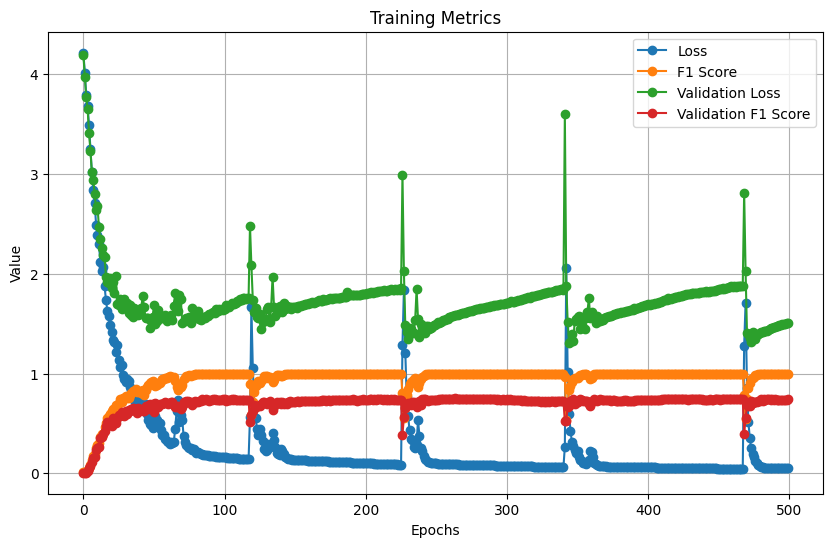

In [151]:
# Plotting
import matplotlib.pyplot as plt
epochs = range(0, 500)
plt.figure(figsize=(10, 6))
plt.plot(epochs, hist_df.loss, marker='o', label='Loss')
plt.plot(epochs, hist_df.f1_score, marker='o', label='F1 Score')
plt.plot(epochs, hist_df.val_loss, marker='o', label='Validation Loss')
plt.plot(epochs, hist_df.val_f1_score, marker='o', label='Validation F1 Score')
plt.title('Training Metrics')
plt.xlabel('Epochs')
plt.ylabel('Value')
plt.legend()
plt.grid()
plt.show()

In [129]:
reconstructed_model = tf.keras.models.load_model("1 LSTM Lecunnormal")

In [153]:
reconstructed_model.evaluate(Xval,Yval)

11/11 [==============================] - 1s 14ms/step - loss: 1.5819 - f1_score: 0.7505


[1.5819425582885742, 0.75054931640625]

In [130]:
reconstructed_model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 200)               261600    
                                                                 
 dense_6 (Dense)             (None, 100)               20100     
                                                                 
 dense_7 (Dense)             (None, 50)                5050      
                                                                 
Total params: 286,750
Trainable params: 286,750
Non-trainable params: 0
_________________________________________________________________


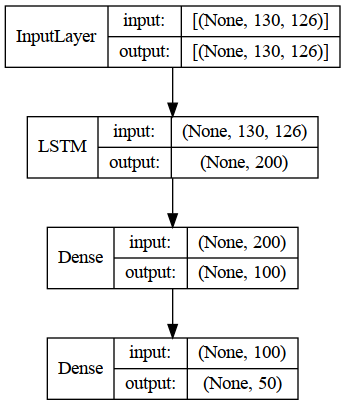

In [131]:
plot_model(reconstructed_model, show_shapes=True, show_layer_names=False)

In [155]:
print(classification_report(np.argmax(Yval, axis=1), np.argmax(reconstructed_model.predict(Xval), axis=1),
                            digits=3, target_names=label_map))

11/11 [==============================] - 1s 13ms/step
              precision    recall  f1-score   support

         AXE      0.857     0.750     0.800         8
    BACKPACK      1.000     0.667     0.800         6
  BASKETBALL      1.000     0.900     0.947        10
         BEE      0.857     0.600     0.706        10
        BELT      1.000     1.000     1.000         4
        BITE      0.889     1.000     0.941         8
   BREAKFAST      0.556     0.833     0.667         6
      CANCER      1.000     1.000     1.000         8
   CHRISTMAS      0.750     0.500     0.600         6
    CONFUSED      0.545     1.000     0.706         6
        DARK      0.800     1.000     0.889         4
        DEAF      0.857     1.000     0.923         6
      DECIDE      0.667     0.667     0.667         6
      DEMAND      0.714     0.625     0.667         8
     DEVELOP      0.500     0.500     0.500         6
      DINNER      0.857     0.750     0.800         8
         DOG      0.857    

## Hyperparameter Tuning 2 LSTM Layers

In [132]:
from tensorflow.keras import regularizers
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout, SpatialDropout1D, GRU
import keras_tuner
from keras_tuner import HyperModel
from kerastuner.tuners import Hyperband
from tensorflow.keras.callbacks import EarlyStopping
import tensorflow_addons as tfa

class HyperModel(HyperModel):
    def __init__(self, input_shape, num_classes):
        self.input_shape = input_shape
        self.num_classes = num_classes

    def build(self, hp):
        act_function = hp.Choice('dense_activation',values=['selu','mish','elu','gelu','relu'],default='selu')
        model = Sequential()
        model.add(LSTM(units=hp.Int('units_1',min_value=50,max_value=200,step=25,default=100),
                      return_sequences=True,
                      input_shape=self.input_shape,
                      kernel_regularizer=regularizers.l2(hp.Float('regularizer_1',min_value=1e-4,
                                                                max_value=1e-2,sampling='LOG',
                                                                default=.001))))
        model.add(LSTM(units=hp.Int('units_2',min_value=50,max_value=200,step=25,default=100),
                      return_sequences=False,
                      kernel_regularizer=regularizers.l2(hp.Float('regularizer_2',min_value=1e-4,
                                                                max_value=1e-2,sampling='LOG',
                                                                default=.001))))
        model.add(Dropout(rate=hp.Float('dropout_1',min_value=0.0,max_value=0.9,default=0.65,step=0.05,)))
        model.add(Dense(units=hp.Int('units_4',min_value=70,max_value=120,step=10,default=80),activation=act_function))
        model.add(Dropout(rate=hp.Float('dropout_2',min_value=0.0,max_value=0.9,default=0.7,step=0.05,)))

        model.add(Dense(self.num_classes, activation='softmax'))

        model.compile(tf.optimizers.experimental.Nadam(hp.Float('learning_rate',min_value=1e-4,
                                                                max_value=1e-2,sampling='LOG',
                                                                default=.0005)),
            loss='categorical_crossentropy',
            metrics=[tfa.metrics.F1Score(num_classes=50, average='macro')]
        )
        return model

hypermodel = HyperModel(input_shape=(130,399), num_classes=50)

In [133]:
HYPERBAND_MAX_EPOCHS = 300
#MAX_TRIALS = 20
EXECUTION_PER_TRIAL = 2

tuner = Hyperband(
    hypermodel,
    max_epochs=HYPERBAND_MAX_EPOCHS,
    objective=keras_tuner.Objective("val_f1_score", direction="max"),
    seed=10,
    executions_per_trial=EXECUTION_PER_TRIAL,
    directory='/media/kristian/HDD/ASL_Citizen/RTMPose-L/hyperband/',
    project_name='2_LSTM',
    overwrite=False)

INFO:tensorflow:Reloading Tuner from /media/kristian/HDD/ASL_Citizen/Mediapipe/hyperband/2_LSTM/tuner0.json


In [117]:
tuner.search_space_summary()

Search space summary
Default search space size: 9
dense_activation (Choice)
{'default': 'selu', 'conditions': [], 'values': ['selu', 'LeakyReLU', 'elu', 'gelu', 'relu'], 'ordered': False}
units_1 (Int)
{'default': 100, 'conditions': [], 'min_value': 50, 'max_value': 200, 'step': 25, 'sampling': 'linear'}
regularizer_1 (Float)
{'default': 0.001, 'conditions': [], 'min_value': 0.0001, 'max_value': 0.01, 'step': None, 'sampling': 'log'}
units_2 (Int)
{'default': 100, 'conditions': [], 'min_value': 50, 'max_value': 200, 'step': 25, 'sampling': 'linear'}
regularizer_2 (Float)
{'default': 0.001, 'conditions': [], 'min_value': 0.0001, 'max_value': 0.01, 'step': None, 'sampling': 'log'}
dropout_1 (Float)
{'default': 0.65, 'conditions': [], 'min_value': 0.0, 'max_value': 0.9, 'step': 0.05, 'sampling': 'linear'}
units_4 (Int)
{'default': 80, 'conditions': [], 'min_value': 70, 'max_value': 120, 'step': 10, 'sampling': 'linear'}
dropout_2 (Float)
{'default': 0.7, 'conditions': [], 'min_value': 0.0

In [118]:
es = EarlyStopping(monitor="val_f1_score",patience=30,restore_best_weights=True,mode="max")

In [119]:
log_dir = os.path.join('Logs')
tb_callback = TensorBoard(log_dir=log_dir)

In [120]:
tuner.search(Xtrain, Ytrain, validation_data=(Xval,Yval),batch_size=96,callbacks=[es])

Trial 725 Complete [00h 28m 40s]
val_f1_score: 0.7864301800727844

Best val_f1_score So Far: 0.8002387285232544
Total elapsed time: 05h 00m 19s
INFO:tensorflow:Oracle triggered exit


In [134]:
best_model = tuner.get_best_models(num_models=3)[0]

In [122]:
tuner.results_summary()

Results summary
Results in /media/kristian/HDD/ASL_Citizen/Mediapipe/hyperband/2_LSTM
Showing 10 best trials
Objective(name="val_f1_score", direction="max")

Trial 0426 summary
Hyperparameters:
dense_activation: selu
units_1: 150
regularizer_1: 0.00016577111356694404
units_2: 200
regularizer_2: 0.001678637274473244
dropout_1: 0.35000000000000003
units_4: 100
dropout_2: 0.35000000000000003
learning_rate: 0.0005968991218820336
tuner/epochs: 300
tuner/initial_epoch: 100
tuner/bracket: 5
tuner/round: 5
tuner/trial_id: 0422
Score: 0.8002387285232544

Trial 0724 summary
Hyperparameters:
dense_activation: relu
units_1: 150
regularizer_1: 0.00036156986755960413
units_2: 200
regularizer_2: 0.0011089404108766622
dropout_1: 0.6000000000000001
units_4: 90
dropout_2: 0.2
learning_rate: 0.00022620443736150013
tuner/epochs: 300
tuner/initial_epoch: 0
tuner/bracket: 0
tuner/round: 0
Score: 0.7864301800727844

Trial 0714 summary
Hyperparameters:
dense_activation: elu
units_1: 150
regularizer_1: 0.00110

In [123]:
loss, accuracy = best_model.evaluate(Xval, Yval)

11/11 [==============================] - 2s 22ms/step - loss: 1.3282 - f1_score: 0.8074


In [135]:
best_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 130, 150)          166200    
                                                                 
 lstm_1 (LSTM)               (None, 200)               280800    
                                                                 
 dropout (Dropout)           (None, 200)               0         
                                                                 
 dense (Dense)               (None, 100)               20100     
                                                                 
 dropout_1 (Dropout)         (None, 100)               0         
                                                                 
 dense_1 (Dense)             (None, 50)                5050      
                                                                 
Total params: 472,150
Trainable params: 472,150
Non-trai

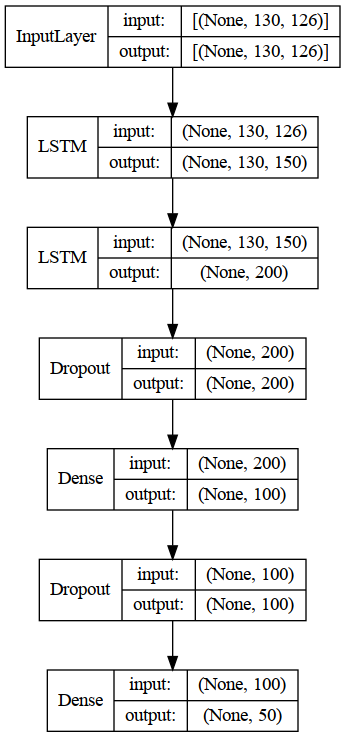

In [137]:
plot_model(best_model, show_shapes=True, show_layer_names=False)

In [124]:
print(classification_report(np.argmax(Yval, axis=1), np.argmax(best_model.predict(Xval), axis=1),
                            digits=3, target_names=label_map))

11/11 [==============================] - 1s 20ms/step
              precision    recall  f1-score   support

         AXE      0.857     0.750     0.800         8
    BACKPACK      1.000     1.000     1.000         6
  BASKETBALL      1.000     0.800     0.889        10
         BEE      0.900     0.900     0.900        10
        BELT      1.000     1.000     1.000         4
        BITE      0.889     1.000     0.941         8
   BREAKFAST      0.667     1.000     0.800         6
      CANCER      0.889     1.000     0.941         8
   CHRISTMAS      1.000     0.667     0.800         6
    CONFUSED      0.857     1.000     0.923         6
        DARK      0.800     1.000     0.889         4
        DEAF      1.000     1.000     1.000         6
      DECIDE      0.857     1.000     0.923         6
      DEMAND      0.800     0.500     0.615         8
     DEVELOP      0.667     0.667     0.667         6
      DINNER      0.667     0.750     0.706         8
         DOG      0.750    

In [134]:
#bestHP = tuner.get_best_hyperparameters(num_trials=5)[2]
bestHP = tuner.get_best_hyperparameters(num_trials=10)[0]

In [126]:
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath='2 LSTM/',
    monitor='val_f1_score',
    mode='max',
    save_best_only=True)

In [133]:
print("[INFO] training the best model...")
model = tuner.hypermodel.build(bestHP)
History = model.fit(x=Xtrain, y=Ytrain,validation_data= (Xval,Yval), batch_size=96,epochs=500, verbose=1,callbacks=[model_checkpoint_callback])
#History = model.fit(x=Xtrain, y=Ytrain,validation_data= (Xval,Yval), batch_size=96,epochs=500, verbose=1)

[INFO] training the best model...
Epoch 1/500
28/28 [==============================] - 8s 134ms/step - loss: 4.2460 - f1_score: 0.0102 - val_loss: 4.2196 - val_f1_score: 5.1118e-04
Epoch 2/500
28/28 [==============================] - 3s 107ms/step - loss: 4.1916 - f1_score: 0.0107 - val_loss: 4.1663 - val_f1_score: 5.4608e-04
Epoch 3/500
28/28 [==============================] - 3s 107ms/step - loss: 4.1184 - f1_score: 0.0157 - val_loss: 4.0471 - val_f1_score: 0.0103
Epoch 4/500
28/28 [==============================] - 3s 108ms/step - loss: 3.9989 - f1_score: 0.0215 - val_loss: 3.9208 - val_f1_score: 0.0236
Epoch 5/500
28/28 [==============================] - 3s 108ms/step - loss: 3.8948 - f1_score: 0.0317 - val_loss: 3.7366 - val_f1_score: 0.0294
Epoch 6/500
28/28 [==============================] - 3s 109ms/step - loss: 3.7645 - f1_score: 0.0430 - val_loss: 3.6065 - val_f1_score: 0.0225
Epoch 7/500
28/28 [==============================] - 3s 108ms/step - loss: 3.6382 - f1_score: 0.0596

Epoch 58/500
28/28 [==============================] - 3s 114ms/step - loss: 1.1628 - f1_score: 0.6685 - val_loss: 1.5323 - val_f1_score: 0.6076
Epoch 59/500
28/28 [==============================] - 3s 113ms/step - loss: 1.1359 - f1_score: 0.6763 - val_loss: 1.6708 - val_f1_score: 0.6237
Epoch 60/500
28/28 [==============================] - 3s 114ms/step - loss: 1.1330 - f1_score: 0.6855 - val_loss: 1.6728 - val_f1_score: 0.5872
Epoch 61/500
28/28 [==============================] - 3s 114ms/step - loss: 1.0735 - f1_score: 0.6926 - val_loss: 1.5312 - val_f1_score: 0.6554
Epoch 62/500
28/28 [==============================] - 3s 114ms/step - loss: 1.0849 - f1_score: 0.6943 - val_loss: 1.6507 - val_f1_score: 0.5877
Epoch 63/500
28/28 [==============================] - 3s 114ms/step - loss: 1.0764 - f1_score: 0.6929 - val_loss: 1.7712 - val_f1_score: 0.5720
Epoch 64/500
28/28 [==============================] - 3s 114ms/step - loss: 1.0537 - f1_score: 0.7077 - val_loss: 1.7041 - val_f1_score:

Epoch 115/500
28/28 [==============================] - 3s 116ms/step - loss: 0.5091 - f1_score: 0.8892 - val_loss: 1.4467 - val_f1_score: 0.7179
Epoch 116/500
28/28 [==============================] - 3s 116ms/step - loss: 0.4903 - f1_score: 0.8877 - val_loss: 1.4100 - val_f1_score: 0.7181
Epoch 117/500
28/28 [==============================] - 3s 116ms/step - loss: 0.4667 - f1_score: 0.8942 - val_loss: 1.4975 - val_f1_score: 0.7006
Epoch 118/500
28/28 [==============================] - 3s 116ms/step - loss: 0.5103 - f1_score: 0.8845 - val_loss: 1.5090 - val_f1_score: 0.7086
Epoch 119/500
28/28 [==============================] - 3s 116ms/step - loss: 0.4809 - f1_score: 0.8909 - val_loss: 1.3985 - val_f1_score: 0.7445
Epoch 120/500
28/28 [==============================] - 3s 116ms/step - loss: 0.6145 - f1_score: 0.8573 - val_loss: 1.5432 - val_f1_score: 0.6949
Epoch 121/500
28/28 [==============================] - 3s 117ms/step - loss: 0.5212 - f1_score: 0.8798 - val_loss: 1.4248 - val_f1

28/28 [==============================] - 3s 117ms/step - loss: 0.4945 - f1_score: 0.9010 - val_loss: 1.7058 - val_f1_score: 0.7225
Epoch 228/500
28/28 [==============================] - 3s 117ms/step - loss: 0.3686 - f1_score: 0.9249 - val_loss: 1.7103 - val_f1_score: 0.7256
Epoch 229/500
28/28 [==============================] - 3s 117ms/step - loss: 0.5871 - f1_score: 0.8785 - val_loss: 2.0664 - val_f1_score: 0.6806
Epoch 230/500
28/28 [==============================] - 3s 118ms/step - loss: 0.4009 - f1_score: 0.9218 - val_loss: 1.7278 - val_f1_score: 0.7259
Epoch 231/500
28/28 [==============================] - 3s 117ms/step - loss: 0.3557 - f1_score: 0.9355 - val_loss: 1.8801 - val_f1_score: 0.7149
Epoch 232/500
28/28 [==============================] - 3s 118ms/step - loss: 0.4274 - f1_score: 0.9130 - val_loss: 1.7242 - val_f1_score: 0.7362
Epoch 233/500
28/28 [==============================] - 3s 117ms/step - loss: 0.3598 - f1_score: 0.9318 - val_loss: 1.6283 - val_f1_score: 0.7530

28/28 [==============================] - 3s 118ms/step - loss: 0.1283 - f1_score: 0.9961 - val_loss: 1.7838 - val_f1_score: 0.7529
Epoch 340/500
28/28 [==============================] - 3s 118ms/step - loss: 0.1306 - f1_score: 0.9940 - val_loss: 1.7930 - val_f1_score: 0.7607
Epoch 341/500
28/28 [==============================] - 3s 119ms/step - loss: 0.1315 - f1_score: 0.9922 - val_loss: 1.7767 - val_f1_score: 0.7562
Epoch 342/500
28/28 [==============================] - 3s 120ms/step - loss: 0.1225 - f1_score: 0.9950 - val_loss: 1.7530 - val_f1_score: 0.7578
Epoch 343/500
28/28 [==============================] - 3s 126ms/step - loss: 0.1233 - f1_score: 0.9955 - val_loss: 1.8099 - val_f1_score: 0.7574
Epoch 344/500
28/28 [==============================] - 3s 121ms/step - loss: 0.1240 - f1_score: 0.9958 - val_loss: 1.8686 - val_f1_score: 0.7585
Epoch 345/500
28/28 [==============================] - 3s 117ms/step - loss: 0.1204 - f1_score: 0.9964 - val_loss: 1.9201 - val_f1_score: 0.7470

28/28 [==============================] - 3s 119ms/step - loss: 0.1341 - f1_score: 0.9907 - val_loss: 1.8625 - val_f1_score: 0.7492
Epoch 452/500
28/28 [==============================] - 3s 119ms/step - loss: 0.1884 - f1_score: 0.9782 - val_loss: 1.6487 - val_f1_score: 0.7547
Epoch 453/500
28/28 [==============================] - 3s 118ms/step - loss: 0.3265 - f1_score: 0.9460 - val_loss: 2.0394 - val_f1_score: 0.7261
Epoch 454/500
28/28 [==============================] - 3s 117ms/step - loss: 0.5886 - f1_score: 0.8910 - val_loss: 1.7223 - val_f1_score: 0.7354
Epoch 455/500
28/28 [==============================] - 3s 120ms/step - loss: 0.3218 - f1_score: 0.9415 - val_loss: 1.5136 - val_f1_score: 0.7657
Epoch 456/500
28/28 [==============================] - 3s 119ms/step - loss: 0.2263 - f1_score: 0.9650 - val_loss: 1.6094 - val_f1_score: 0.7662
Epoch 457/500
28/28 [==============================] - 3s 119ms/step - loss: 0.1859 - f1_score: 0.9763 - val_loss: 1.7655 - val_f1_score: 0.7191

In [128]:
print(classification_report(np.argmax(Yval, axis=1), np.argmax(model.predict(Xval), axis=1),
                            digits=3, target_names=label_map))

11/11 [==============================] - 1s 21ms/step
              precision    recall  f1-score   support

         AXE      0.714     0.625     0.667         8
    BACKPACK      0.600     1.000     0.750         6
  BASKETBALL      1.000     1.000     1.000        10
         BEE      0.900     0.900     0.900        10
        BELT      1.000     1.000     1.000         4
        BITE      0.727     1.000     0.842         8
   BREAKFAST      0.667     1.000     0.800         6
      CANCER      1.000     0.750     0.857         8
   CHRISTMAS      1.000     0.667     0.800         6
    CONFUSED      0.625     0.833     0.714         6
        DARK      1.000     1.000     1.000         4
        DEAF      0.833     0.833     0.833         6
      DECIDE      1.000     0.833     0.909         6
      DEMAND      0.667     0.750     0.706         8
     DEVELOP      1.000     0.667     0.800         6
      DINNER      0.833     0.625     0.714         8
         DOG      0.857    

In [138]:
reconstructed_model = tf.keras.models.load_model("2 LSTM")

In [139]:
reconstructed_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 130, 150)          166200    
                                                                 
 lstm_3 (LSTM)               (None, 200)               280800    
                                                                 
 dropout_2 (Dropout)         (None, 200)               0         
                                                                 
 dense_2 (Dense)             (None, 100)               20100     
                                                                 
 dropout_3 (Dropout)         (None, 100)               0         
                                                                 
 dense_3 (Dense)             (None, 50)                5050      
                                                                 
Total params: 472,150
Trainable params: 472,150
Non-tr

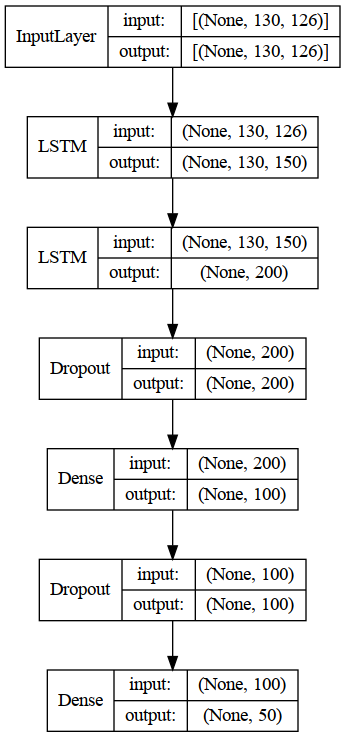

In [140]:
plot_model(reconstructed_model, show_shapes=True, show_layer_names=False)

In [130]:
reconstructed_model.evaluate(Xval,Yval)

11/11 [==============================] - 1s 24ms/step - loss: 1.2851 - f1_score: 0.8310


[1.2850520610809326, 0.8310064673423767]

In [131]:
print(classification_report(np.argmax(Yval, axis=1), np.argmax(reconstructed_model.predict(Xval), axis=1),
                            digits=3, target_names=label_map))

11/11 [==============================] - 1s 20ms/step
              precision    recall  f1-score   support

         AXE      1.000     0.750     0.857         8
    BACKPACK      1.000     0.667     0.800         6
  BASKETBALL      1.000     1.000     1.000        10
         BEE      0.900     0.900     0.900        10
        BELT      0.800     1.000     0.889         4
        BITE      0.889     1.000     0.941         8
   BREAKFAST      0.625     0.833     0.714         6
      CANCER      0.800     1.000     0.889         8
   CHRISTMAS      1.000     0.667     0.800         6
    CONFUSED      1.000     1.000     1.000         6
        DARK      1.000     1.000     1.000         4
        DEAF      1.000     1.000     1.000         6
      DECIDE      1.000     1.000     1.000         6
      DEMAND      1.000     1.000     1.000         8
     DEVELOP      1.000     0.833     0.909         6
      DINNER      0.667     0.750     0.706         8
         DOG      1.000    

In [135]:
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath='2 LSTM Mish/',
    monitor='val_f1_score',
    mode='max',
    save_best_only=True)

In [137]:
act_function = mish
model = Sequential()
model.add(LSTM(units=150,return_sequences=True,input_shape=(130,126),kernel_regularizer=regularizers.l2(.00016577111356694404)))
model.add(LSTM(units=200,return_sequences=False,input_shape=(130,126),kernel_regularizer=regularizers.l2(.001678637274473244)))
model.add(Dropout(.35))
model.add(Dense(units=100,activation=act_function))
model.add(Dropout(.35))
model.add(Dense(50, activation='softmax'))
model.compile(tf.optimizers.experimental.Nadam(.0005968991218820336),loss='categorical_crossentropy',
            metrics=[tfa.metrics.F1Score(num_classes=50, average='macro')])
model.summary()
History = model.fit(x=Xtrain, y=Ytrain,validation_data= (Xval,Yval), batch_size=96,epochs=500, verbose=1,callbacks=[model_checkpoint_callback])

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_6 (LSTM)               (None, 130, 150)          166200    
                                                                 
 lstm_7 (LSTM)               (None, 200)               280800    
                                                                 
 dropout_6 (Dropout)         (None, 200)               0         
                                                                 
 dense_6 (Dense)             (None, 100)               20100     
                                                                 
 dropout_7 (Dropout)         (None, 100)               0         
                                                                 
 dense_7 (Dense)             (None, 50)                5050      
                                                                 
Total params: 472,150
Trainable params: 472,150
Non-tr

INFO:tensorflow:Assets written to: 2 LSTM Mish/assets


INFO:tensorflow:Assets written to: 2 LSTM Mish/assets


28/28 [==============================] - 25s 678ms/step - loss: 4.2880 - f1_score: 0.0152 - val_loss: 4.1226 - val_f1_score: 0.0070
Epoch 2/500
28/28 [==============================] - ETA: 0s - loss: 3.9153 - f1_score: 0.0253

INFO:tensorflow:Assets written to: 2 LSTM Mish/assets


INFO:tensorflow:Assets written to: 2 LSTM Mish/assets


28/28 [==============================] - 16s 576ms/step - loss: 3.9153 - f1_score: 0.0253 - val_loss: 3.7402 - val_f1_score: 0.0101
Epoch 3/500
28/28 [==============================] - ETA: 0s - loss: 3.7534 - f1_score: 0.0265

INFO:tensorflow:Assets written to: 2 LSTM Mish/assets


INFO:tensorflow:Assets written to: 2 LSTM Mish/assets


28/28 [==============================] - 15s 567ms/step - loss: 3.7534 - f1_score: 0.0265 - val_loss: 3.6646 - val_f1_score: 0.0151
Epoch 4/500
28/28 [==============================] - ETA: 0s - loss: 3.6494 - f1_score: 0.0398

INFO:tensorflow:Assets written to: 2 LSTM Mish/assets


INFO:tensorflow:Assets written to: 2 LSTM Mish/assets


28/28 [==============================] - 15s 552ms/step - loss: 3.6494 - f1_score: 0.0398 - val_loss: 3.5342 - val_f1_score: 0.0162
Epoch 5/500
28/28 [==============================] - ETA: 0s - loss: 3.5417 - f1_score: 0.0396

INFO:tensorflow:Assets written to: 2 LSTM Mish/assets


INFO:tensorflow:Assets written to: 2 LSTM Mish/assets


28/28 [==============================] - 15s 549ms/step - loss: 3.5417 - f1_score: 0.0396 - val_loss: 3.4473 - val_f1_score: 0.0172
Epoch 6/500
28/28 [==============================] - ETA: 0s - loss: 3.4250 - f1_score: 0.0553

INFO:tensorflow:Assets written to: 2 LSTM Mish/assets


INFO:tensorflow:Assets written to: 2 LSTM Mish/assets


28/28 [==============================] - 17s 639ms/step - loss: 3.4250 - f1_score: 0.0553 - val_loss: 3.2928 - val_f1_score: 0.0366
Epoch 7/500
28/28 [==============================] - 3s 110ms/step - loss: 3.3378 - f1_score: 0.0546 - val_loss: 3.2348 - val_f1_score: 0.0354
Epoch 8/500
28/28 [==============================] - ETA: 0s - loss: 3.2097 - f1_score: 0.0776

INFO:tensorflow:Assets written to: 2 LSTM Mish/assets


INFO:tensorflow:Assets written to: 2 LSTM Mish/assets


28/28 [==============================] - 15s 566ms/step - loss: 3.2097 - f1_score: 0.0776 - val_loss: 3.0559 - val_f1_score: 0.0639
Epoch 9/500
28/28 [==============================] - ETA: 0s - loss: 3.0474 - f1_score: 0.0930

INFO:tensorflow:Assets written to: 2 LSTM Mish/assets


INFO:tensorflow:Assets written to: 2 LSTM Mish/assets


28/28 [==============================] - 15s 566ms/step - loss: 3.0474 - f1_score: 0.0930 - val_loss: 2.8771 - val_f1_score: 0.1136
Epoch 10/500
28/28 [==============================] - 3s 110ms/step - loss: 2.9364 - f1_score: 0.1165 - val_loss: 2.8750 - val_f1_score: 0.1015
Epoch 11/500
28/28 [==============================] - 3s 110ms/step - loss: 2.8274 - f1_score: 0.1424 - val_loss: 2.7864 - val_f1_score: 0.0876
Epoch 12/500
28/28 [==============================] - ETA: 0s - loss: 2.7039 - f1_score: 0.1756

INFO:tensorflow:Assets written to: 2 LSTM Mish/assets


INFO:tensorflow:Assets written to: 2 LSTM Mish/assets


28/28 [==============================] - 17s 633ms/step - loss: 2.7039 - f1_score: 0.1756 - val_loss: 2.6411 - val_f1_score: 0.1770
Epoch 13/500
28/28 [==============================] - ETA: 0s - loss: 2.5845 - f1_score: 0.1888

INFO:tensorflow:Assets written to: 2 LSTM Mish/assets


INFO:tensorflow:Assets written to: 2 LSTM Mish/assets


28/28 [==============================] - 15s 567ms/step - loss: 2.5845 - f1_score: 0.1888 - val_loss: 2.5864 - val_f1_score: 0.1861
Epoch 14/500
28/28 [==============================] - ETA: 0s - loss: 2.4962 - f1_score: 0.2211

INFO:tensorflow:Assets written to: 2 LSTM Mish/assets


INFO:tensorflow:Assets written to: 2 LSTM Mish/assets


28/28 [==============================] - 16s 587ms/step - loss: 2.4962 - f1_score: 0.2211 - val_loss: 2.5821 - val_f1_score: 0.2097
Epoch 15/500
28/28 [==============================] - ETA: 0s - loss: 2.4259 - f1_score: 0.2532

INFO:tensorflow:Assets written to: 2 LSTM Mish/assets


INFO:tensorflow:Assets written to: 2 LSTM Mish/assets


28/28 [==============================] - 15s 550ms/step - loss: 2.4259 - f1_score: 0.2532 - val_loss: 2.5090 - val_f1_score: 0.2387
Epoch 16/500
28/28 [==============================] - ETA: 0s - loss: 2.3115 - f1_score: 0.2700

INFO:tensorflow:Assets written to: 2 LSTM Mish/assets


INFO:tensorflow:Assets written to: 2 LSTM Mish/assets


28/28 [==============================] - 16s 601ms/step - loss: 2.3115 - f1_score: 0.2700 - val_loss: 2.4138 - val_f1_score: 0.2803
Epoch 17/500
28/28 [==============================] - ETA: 0s - loss: 2.1874 - f1_score: 0.3204

INFO:tensorflow:Assets written to: 2 LSTM Mish/assets


INFO:tensorflow:Assets written to: 2 LSTM Mish/assets


28/28 [==============================] - 15s 540ms/step - loss: 2.1874 - f1_score: 0.3204 - val_loss: 2.3613 - val_f1_score: 0.2999
Epoch 18/500
28/28 [==============================] - ETA: 0s - loss: 2.1015 - f1_score: 0.3333

INFO:tensorflow:Assets written to: 2 LSTM Mish/assets


INFO:tensorflow:Assets written to: 2 LSTM Mish/assets


28/28 [==============================] - 16s 585ms/step - loss: 2.1015 - f1_score: 0.3333 - val_loss: 2.2819 - val_f1_score: 0.3373
Epoch 19/500
28/28 [==============================] - 3s 110ms/step - loss: 2.0590 - f1_score: 0.3523 - val_loss: 2.6875 - val_f1_score: 0.2442
Epoch 20/500
28/28 [==============================] - ETA: 0s - loss: 2.0017 - f1_score: 0.3687

INFO:tensorflow:Assets written to: 2 LSTM Mish/assets


INFO:tensorflow:Assets written to: 2 LSTM Mish/assets


28/28 [==============================] - 15s 544ms/step - loss: 2.0017 - f1_score: 0.3687 - val_loss: 2.2402 - val_f1_score: 0.3432
Epoch 21/500
28/28 [==============================] - ETA: 0s - loss: 1.8938 - f1_score: 0.4038

INFO:tensorflow:Assets written to: 2 LSTM Mish/assets


INFO:tensorflow:Assets written to: 2 LSTM Mish/assets


28/28 [==============================] - 17s 618ms/step - loss: 1.8938 - f1_score: 0.4038 - val_loss: 2.1310 - val_f1_score: 0.3640
Epoch 22/500
28/28 [==============================] - 3s 110ms/step - loss: 1.9030 - f1_score: 0.4064 - val_loss: 2.7500 - val_f1_score: 0.2664
Epoch 23/500
28/28 [==============================] - ETA: 0s - loss: 1.9459 - f1_score: 0.4074

INFO:tensorflow:Assets written to: 2 LSTM Mish/assets


INFO:tensorflow:Assets written to: 2 LSTM Mish/assets


28/28 [==============================] - 14s 530ms/step - loss: 1.9459 - f1_score: 0.4074 - val_loss: 2.1599 - val_f1_score: 0.4332
Epoch 24/500
28/28 [==============================] - ETA: 0s - loss: 1.7845 - f1_score: 0.4439

INFO:tensorflow:Assets written to: 2 LSTM Mish/assets


INFO:tensorflow:Assets written to: 2 LSTM Mish/assets


28/28 [==============================] - 15s 562ms/step - loss: 1.7845 - f1_score: 0.4439 - val_loss: 2.0853 - val_f1_score: 0.4470
Epoch 25/500
28/28 [==============================] - 3s 110ms/step - loss: 1.7017 - f1_score: 0.4600 - val_loss: 2.1151 - val_f1_score: 0.4235
Epoch 26/500
28/28 [==============================] - 3s 110ms/step - loss: 1.7663 - f1_score: 0.4610 - val_loss: 2.1708 - val_f1_score: 0.4386
Epoch 27/500
28/28 [==============================] - ETA: 0s - loss: 1.6940 - f1_score: 0.4740

INFO:tensorflow:Assets written to: 2 LSTM Mish/assets


INFO:tensorflow:Assets written to: 2 LSTM Mish/assets


28/28 [==============================] - 15s 569ms/step - loss: 1.6940 - f1_score: 0.4740 - val_loss: 1.9802 - val_f1_score: 0.4722
Epoch 28/500
28/28 [==============================] - ETA: 0s - loss: 1.5844 - f1_score: 0.5055

INFO:tensorflow:Assets written to: 2 LSTM Mish/assets


INFO:tensorflow:Assets written to: 2 LSTM Mish/assets


28/28 [==============================] - 16s 593ms/step - loss: 1.5844 - f1_score: 0.5055 - val_loss: 2.0070 - val_f1_score: 0.5025
Epoch 29/500
28/28 [==============================] - 3s 110ms/step - loss: 1.4758 - f1_score: 0.5425 - val_loss: 1.9674 - val_f1_score: 0.4951
Epoch 30/500
28/28 [==============================] - 3s 110ms/step - loss: 1.4395 - f1_score: 0.5592 - val_loss: 2.0154 - val_f1_score: 0.4683
Epoch 31/500
28/28 [==============================] - 3s 110ms/step - loss: 1.5016 - f1_score: 0.5439 - val_loss: 1.9426 - val_f1_score: 0.4841
Epoch 32/500
28/28 [==============================] - ETA: 0s - loss: 1.4136 - f1_score: 0.5774

INFO:tensorflow:Assets written to: 2 LSTM Mish/assets


INFO:tensorflow:Assets written to: 2 LSTM Mish/assets


28/28 [==============================] - 15s 562ms/step - loss: 1.4136 - f1_score: 0.5774 - val_loss: 1.9218 - val_f1_score: 0.5224
Epoch 33/500
28/28 [==============================] - 3s 110ms/step - loss: 1.2929 - f1_score: 0.6078 - val_loss: 2.1100 - val_f1_score: 0.4910
Epoch 34/500
28/28 [==============================] - ETA: 0s - loss: 1.3254 - f1_score: 0.6135

INFO:tensorflow:Assets written to: 2 LSTM Mish/assets


INFO:tensorflow:Assets written to: 2 LSTM Mish/assets


28/28 [==============================] - 17s 625ms/step - loss: 1.3254 - f1_score: 0.6135 - val_loss: 1.8715 - val_f1_score: 0.5442
Epoch 35/500
28/28 [==============================] - 3s 110ms/step - loss: 1.3021 - f1_score: 0.6173 - val_loss: 1.9869 - val_f1_score: 0.4850
Epoch 36/500
28/28 [==============================] - 3s 110ms/step - loss: 1.2973 - f1_score: 0.6094 - val_loss: 1.8540 - val_f1_score: 0.5370
Epoch 37/500
28/28 [==============================] - ETA: 0s - loss: 1.3180 - f1_score: 0.6139

INFO:tensorflow:Assets written to: 2 LSTM Mish/assets


INFO:tensorflow:Assets written to: 2 LSTM Mish/assets


28/28 [==============================] - 15s 535ms/step - loss: 1.3180 - f1_score: 0.6139 - val_loss: 1.7187 - val_f1_score: 0.5609
Epoch 38/500
28/28 [==============================] - 3s 110ms/step - loss: 1.2120 - f1_score: 0.6352 - val_loss: 1.8428 - val_f1_score: 0.5356
Epoch 39/500
28/28 [==============================] - ETA: 0s - loss: 1.1253 - f1_score: 0.6630

INFO:tensorflow:Assets written to: 2 LSTM Mish/assets


INFO:tensorflow:Assets written to: 2 LSTM Mish/assets


28/28 [==============================] - 17s 624ms/step - loss: 1.1253 - f1_score: 0.6630 - val_loss: 1.6631 - val_f1_score: 0.5706
Epoch 40/500
28/28 [==============================] - 3s 110ms/step - loss: 1.0777 - f1_score: 0.6909 - val_loss: 1.7144 - val_f1_score: 0.5612
Epoch 41/500
28/28 [==============================] - ETA: 0s - loss: 1.1578 - f1_score: 0.6768

INFO:tensorflow:Assets written to: 2 LSTM Mish/assets


INFO:tensorflow:Assets written to: 2 LSTM Mish/assets


28/28 [==============================] - 15s 566ms/step - loss: 1.1578 - f1_score: 0.6768 - val_loss: 1.7111 - val_f1_score: 0.5763
Epoch 42/500
28/28 [==============================] - ETA: 0s - loss: 1.1539 - f1_score: 0.6657

INFO:tensorflow:Assets written to: 2 LSTM Mish/assets


INFO:tensorflow:Assets written to: 2 LSTM Mish/assets


28/28 [==============================] - 16s 576ms/step - loss: 1.1539 - f1_score: 0.6657 - val_loss: 1.7172 - val_f1_score: 0.5775
Epoch 43/500
28/28 [==============================] - ETA: 0s - loss: 1.0250 - f1_score: 0.7262

INFO:tensorflow:Assets written to: 2 LSTM Mish/assets


INFO:tensorflow:Assets written to: 2 LSTM Mish/assets


28/28 [==============================] - 16s 606ms/step - loss: 1.0250 - f1_score: 0.7262 - val_loss: 1.7254 - val_f1_score: 0.5840
Epoch 44/500
28/28 [==============================] - ETA: 0s - loss: 0.9806 - f1_score: 0.7190

INFO:tensorflow:Assets written to: 2 LSTM Mish/assets


INFO:tensorflow:Assets written to: 2 LSTM Mish/assets


28/28 [==============================] - 14s 524ms/step - loss: 0.9806 - f1_score: 0.7190 - val_loss: 1.6936 - val_f1_score: 0.5866
Epoch 45/500
28/28 [==============================] - ETA: 0s - loss: 0.8996 - f1_score: 0.7467

INFO:tensorflow:Assets written to: 2 LSTM Mish/assets


INFO:tensorflow:Assets written to: 2 LSTM Mish/assets


28/28 [==============================] - 16s 582ms/step - loss: 0.8996 - f1_score: 0.7467 - val_loss: 1.6309 - val_f1_score: 0.6191
Epoch 46/500
28/28 [==============================] - 3s 109ms/step - loss: 0.9166 - f1_score: 0.7402 - val_loss: 1.7931 - val_f1_score: 0.5557
Epoch 47/500
28/28 [==============================] - 3s 110ms/step - loss: 0.9233 - f1_score: 0.7512 - val_loss: 1.6915 - val_f1_score: 0.6000
Epoch 48/500
28/28 [==============================] - ETA: 0s - loss: 0.8847 - f1_score: 0.7426

INFO:tensorflow:Assets written to: 2 LSTM Mish/assets


INFO:tensorflow:Assets written to: 2 LSTM Mish/assets


28/28 [==============================] - 15s 545ms/step - loss: 0.8847 - f1_score: 0.7426 - val_loss: 1.6214 - val_f1_score: 0.6368
Epoch 49/500
28/28 [==============================] - 3s 109ms/step - loss: 0.8462 - f1_score: 0.7634 - val_loss: 1.7288 - val_f1_score: 0.6154
Epoch 50/500
28/28 [==============================] - 3s 110ms/step - loss: 0.8546 - f1_score: 0.7657 - val_loss: 1.6877 - val_f1_score: 0.5869
Epoch 51/500
28/28 [==============================] - 3s 110ms/step - loss: 0.9222 - f1_score: 0.7515 - val_loss: 1.7517 - val_f1_score: 0.6216
Epoch 52/500
28/28 [==============================] - 3s 112ms/step - loss: 0.8604 - f1_score: 0.7680 - val_loss: 1.6441 - val_f1_score: 0.6207
Epoch 53/500
28/28 [==============================] - 3s 112ms/step - loss: 0.8809 - f1_score: 0.7555 - val_loss: 1.6870 - val_f1_score: 0.6192
Epoch 54/500
28/28 [==============================] - 3s 113ms/step - loss: 0.8010 - f1_score: 0.7843 - val_loss: 1.6831 - val_f1_score: 0.6063
Epoc

INFO:tensorflow:Assets written to: 2 LSTM Mish/assets


INFO:tensorflow:Assets written to: 2 LSTM Mish/assets


28/28 [==============================] - 18s 656ms/step - loss: 0.7208 - f1_score: 0.8106 - val_loss: 1.6083 - val_f1_score: 0.6594
Epoch 60/500
28/28 [==============================] - 3s 110ms/step - loss: 0.6375 - f1_score: 0.8333 - val_loss: 1.6095 - val_f1_score: 0.6277
Epoch 61/500
28/28 [==============================] - 3s 112ms/step - loss: 1.0468 - f1_score: 0.7454 - val_loss: 2.0680 - val_f1_score: 0.5343
Epoch 62/500
28/28 [==============================] - 3s 113ms/step - loss: 1.3577 - f1_score: 0.6400 - val_loss: 2.0432 - val_f1_score: 0.5346
Epoch 63/500
28/28 [==============================] - 3s 112ms/step - loss: 1.1366 - f1_score: 0.6773 - val_loss: 1.6691 - val_f1_score: 0.5924
Epoch 64/500
28/28 [==============================] - 3s 114ms/step - loss: 0.8857 - f1_score: 0.7545 - val_loss: 1.6010 - val_f1_score: 0.6391
Epoch 65/500
28/28 [==============================] - 3s 115ms/step - loss: 0.7853 - f1_score: 0.7934 - val_loss: 1.6744 - val_f1_score: 0.6580
Epoc

INFO:tensorflow:Assets written to: 2 LSTM Mish/assets


INFO:tensorflow:Assets written to: 2 LSTM Mish/assets


28/28 [==============================] - 17s 618ms/step - loss: 0.6781 - f1_score: 0.8293 - val_loss: 1.6098 - val_f1_score: 0.6772
Epoch 68/500
28/28 [==============================] - 3s 111ms/step - loss: 0.6287 - f1_score: 0.8453 - val_loss: 1.6049 - val_f1_score: 0.6720
Epoch 69/500
28/28 [==============================] - ETA: 0s - loss: 0.6171 - f1_score: 0.8525

INFO:tensorflow:Assets written to: 2 LSTM Mish/assets


INFO:tensorflow:Assets written to: 2 LSTM Mish/assets


28/28 [==============================] - 17s 611ms/step - loss: 0.6171 - f1_score: 0.8525 - val_loss: 1.6878 - val_f1_score: 0.6919
Epoch 70/500
28/28 [==============================] - 3s 110ms/step - loss: 0.5111 - f1_score: 0.8768 - val_loss: 1.7524 - val_f1_score: 0.6724
Epoch 71/500
28/28 [==============================] - 3s 111ms/step - loss: 0.5199 - f1_score: 0.8740 - val_loss: 1.6428 - val_f1_score: 0.6901
Epoch 72/500
28/28 [==============================] - 3s 113ms/step - loss: 0.5430 - f1_score: 0.8696 - val_loss: 1.7211 - val_f1_score: 0.6821
Epoch 73/500
28/28 [==============================] - 3s 114ms/step - loss: 0.7184 - f1_score: 0.8223 - val_loss: 1.7604 - val_f1_score: 0.6506
Epoch 74/500
28/28 [==============================] - ETA: 0s - loss: 0.6276 - f1_score: 0.8421

INFO:tensorflow:Assets written to: 2 LSTM Mish/assets


INFO:tensorflow:Assets written to: 2 LSTM Mish/assets


28/28 [==============================] - 17s 620ms/step - loss: 0.6276 - f1_score: 0.8421 - val_loss: 1.6330 - val_f1_score: 0.6977
Epoch 75/500
28/28 [==============================] - 3s 111ms/step - loss: 0.5343 - f1_score: 0.8676 - val_loss: 1.6333 - val_f1_score: 0.6750
Epoch 76/500
28/28 [==============================] - ETA: 0s - loss: 0.4677 - f1_score: 0.8933

INFO:tensorflow:Assets written to: 2 LSTM Mish/assets


INFO:tensorflow:Assets written to: 2 LSTM Mish/assets


28/28 [==============================] - 17s 639ms/step - loss: 0.4677 - f1_score: 0.8933 - val_loss: 1.5673 - val_f1_score: 0.6991
Epoch 77/500
28/28 [==============================] - ETA: 0s - loss: 0.4342 - f1_score: 0.9047

INFO:tensorflow:Assets written to: 2 LSTM Mish/assets


INFO:tensorflow:Assets written to: 2 LSTM Mish/assets


28/28 [==============================] - 16s 584ms/step - loss: 0.4342 - f1_score: 0.9047 - val_loss: 1.6218 - val_f1_score: 0.7042
Epoch 78/500
28/28 [==============================] - 3s 110ms/step - loss: 0.4026 - f1_score: 0.9111 - val_loss: 1.7871 - val_f1_score: 0.7029
Epoch 79/500
28/28 [==============================] - 3s 111ms/step - loss: 0.5354 - f1_score: 0.8749 - val_loss: 1.8343 - val_f1_score: 0.6551
Epoch 80/500
28/28 [==============================] - ETA: 0s - loss: 0.5397 - f1_score: 0.8758

INFO:tensorflow:Assets written to: 2 LSTM Mish/assets


INFO:tensorflow:Assets written to: 2 LSTM Mish/assets


28/28 [==============================] - 17s 615ms/step - loss: 0.5397 - f1_score: 0.8758 - val_loss: 1.7096 - val_f1_score: 0.7085
Epoch 81/500
28/28 [==============================] - 3s 110ms/step - loss: 0.4281 - f1_score: 0.9045 - val_loss: 1.7997 - val_f1_score: 0.6954
Epoch 82/500
28/28 [==============================] - 3s 110ms/step - loss: 0.4143 - f1_score: 0.9049 - val_loss: 1.8820 - val_f1_score: 0.6765
Epoch 83/500
28/28 [==============================] - 3s 111ms/step - loss: 0.5699 - f1_score: 0.8718 - val_loss: 1.7278 - val_f1_score: 0.6762
Epoch 84/500
28/28 [==============================] - 3s 112ms/step - loss: 0.5410 - f1_score: 0.8741 - val_loss: 1.8311 - val_f1_score: 0.6837
Epoch 85/500
28/28 [==============================] - 3s 113ms/step - loss: 0.7183 - f1_score: 0.8292 - val_loss: 1.7869 - val_f1_score: 0.6674
Epoch 86/500
28/28 [==============================] - 3s 114ms/step - loss: 0.7554 - f1_score: 0.8081 - val_loss: 1.8608 - val_f1_score: 0.6261
Epoc

INFO:tensorflow:Assets written to: 2 LSTM Mish/assets


INFO:tensorflow:Assets written to: 2 LSTM Mish/assets


28/28 [==============================] - 18s 670ms/step - loss: 0.3128 - f1_score: 0.9404 - val_loss: 1.7040 - val_f1_score: 0.7121
Epoch 95/500
28/28 [==============================] - 3s 110ms/step - loss: 0.3529 - f1_score: 0.9280 - val_loss: 1.7974 - val_f1_score: 0.6921
Epoch 96/500
28/28 [==============================] - 3s 112ms/step - loss: 0.3227 - f1_score: 0.9363 - val_loss: 1.8403 - val_f1_score: 0.6858
Epoch 97/500
28/28 [==============================] - ETA: 0s - loss: 0.3184 - f1_score: 0.9376

INFO:tensorflow:Assets written to: 2 LSTM Mish/assets


INFO:tensorflow:Assets written to: 2 LSTM Mish/assets


28/28 [==============================] - 20s 742ms/step - loss: 0.3184 - f1_score: 0.9376 - val_loss: 1.7013 - val_f1_score: 0.7173
Epoch 98/500
28/28 [==============================] - 3s 111ms/step - loss: 0.3657 - f1_score: 0.9202 - val_loss: 1.8624 - val_f1_score: 0.6774
Epoch 99/500
28/28 [==============================] - 3s 114ms/step - loss: 0.3536 - f1_score: 0.9273 - val_loss: 1.6955 - val_f1_score: 0.7146
Epoch 100/500
28/28 [==============================] - 3s 118ms/step - loss: 0.3055 - f1_score: 0.9416 - val_loss: 1.7818 - val_f1_score: 0.7101
Epoch 101/500
28/28 [==============================] - 3s 116ms/step - loss: 0.3514 - f1_score: 0.9304 - val_loss: 1.8166 - val_f1_score: 0.6862
Epoch 102/500
28/28 [==============================] - 3s 115ms/step - loss: 0.3030 - f1_score: 0.9373 - val_loss: 1.8741 - val_f1_score: 0.6914
Epoch 103/500
28/28 [==============================] - 3s 116ms/step - loss: 0.2798 - f1_score: 0.9495 - val_loss: 1.7907 - val_f1_score: 0.7118


INFO:tensorflow:Assets written to: 2 LSTM Mish/assets


INFO:tensorflow:Assets written to: 2 LSTM Mish/assets


28/28 [==============================] - 18s 657ms/step - loss: 0.2652 - f1_score: 0.9516 - val_loss: 1.8281 - val_f1_score: 0.7175
Epoch 105/500
28/28 [==============================] - 3s 110ms/step - loss: 0.3379 - f1_score: 0.9289 - val_loss: 1.9163 - val_f1_score: 0.6775
Epoch 106/500
28/28 [==============================] - 3s 113ms/step - loss: 0.3768 - f1_score: 0.9167 - val_loss: 2.0371 - val_f1_score: 0.6733
Epoch 107/500
28/28 [==============================] - 3s 114ms/step - loss: 0.3957 - f1_score: 0.9090 - val_loss: 2.0317 - val_f1_score: 0.6872
Epoch 108/500
28/28 [==============================] - 3s 114ms/step - loss: 0.4163 - f1_score: 0.9021 - val_loss: 1.7184 - val_f1_score: 0.6804
Epoch 109/500
28/28 [==============================] - 3s 114ms/step - loss: 0.3997 - f1_score: 0.9058 - val_loss: 1.8472 - val_f1_score: 0.6960
Epoch 110/500
28/28 [==============================] - 3s 116ms/step - loss: 0.3560 - f1_score: 0.9245 - val_loss: 1.8658 - val_f1_score: 0.693

INFO:tensorflow:Assets written to: 2 LSTM Mish/assets


INFO:tensorflow:Assets written to: 2 LSTM Mish/assets


28/28 [==============================] - 19s 716ms/step - loss: 0.2822 - f1_score: 0.9486 - val_loss: 1.5651 - val_f1_score: 0.7253
Epoch 131/500
28/28 [==============================] - 3s 111ms/step - loss: 0.2638 - f1_score: 0.9583 - val_loss: 1.9691 - val_f1_score: 0.6864
Epoch 132/500
28/28 [==============================] - ETA: 0s - loss: 0.2931 - f1_score: 0.9483

INFO:tensorflow:Assets written to: 2 LSTM Mish/assets


INFO:tensorflow:Assets written to: 2 LSTM Mish/assets


28/28 [==============================] - 16s 592ms/step - loss: 0.2931 - f1_score: 0.9483 - val_loss: 1.8089 - val_f1_score: 0.7335
Epoch 133/500
28/28 [==============================] - ETA: 0s - loss: 0.2944 - f1_score: 0.9496

INFO:tensorflow:Assets written to: 2 LSTM Mish/assets


INFO:tensorflow:Assets written to: 2 LSTM Mish/assets


28/28 [==============================] - 17s 643ms/step - loss: 0.2944 - f1_score: 0.9496 - val_loss: 1.7797 - val_f1_score: 0.7343
Epoch 134/500
28/28 [==============================] - 3s 110ms/step - loss: 0.2291 - f1_score: 0.9653 - val_loss: 1.9054 - val_f1_score: 0.7287
Epoch 135/500
28/28 [==============================] - ETA: 0s - loss: 0.1898 - f1_score: 0.9791

INFO:tensorflow:Assets written to: 2 LSTM Mish/assets


INFO:tensorflow:Assets written to: 2 LSTM Mish/assets


28/28 [==============================] - 17s 625ms/step - loss: 0.1898 - f1_score: 0.9791 - val_loss: 1.7797 - val_f1_score: 0.7512
Epoch 136/500
28/28 [==============================] - 3s 110ms/step - loss: 0.2217 - f1_score: 0.9687 - val_loss: 1.8488 - val_f1_score: 0.7379
Epoch 137/500
28/28 [==============================] - 3s 111ms/step - loss: 0.2567 - f1_score: 0.9549 - val_loss: 2.1291 - val_f1_score: 0.6971
Epoch 138/500
28/28 [==============================] - 3s 113ms/step - loss: 0.2991 - f1_score: 0.9437 - val_loss: 1.8197 - val_f1_score: 0.7399
Epoch 139/500
28/28 [==============================] - 3s 113ms/step - loss: 0.2363 - f1_score: 0.9654 - val_loss: 1.8876 - val_f1_score: 0.7111
Epoch 140/500
28/28 [==============================] - 3s 114ms/step - loss: 0.2055 - f1_score: 0.9697 - val_loss: 1.9560 - val_f1_score: 0.7179
Epoch 141/500
28/28 [==============================] - 3s 114ms/step - loss: 0.2056 - f1_score: 0.9695 - val_loss: 1.9450 - val_f1_score: 0.716

INFO:tensorflow:Assets written to: 2 LSTM Mish/assets


INFO:tensorflow:Assets written to: 2 LSTM Mish/assets


28/28 [==============================] - 19s 692ms/step - loss: 0.1355 - f1_score: 0.9918 - val_loss: 1.8538 - val_f1_score: 0.7571
Epoch 159/500
28/28 [==============================] - 3s 111ms/step - loss: 0.1320 - f1_score: 0.9920 - val_loss: 1.9456 - val_f1_score: 0.7528
Epoch 160/500
28/28 [==============================] - ETA: 0s - loss: 0.1283 - f1_score: 0.9932

INFO:tensorflow:Assets written to: 2 LSTM Mish/assets


INFO:tensorflow:Assets written to: 2 LSTM Mish/assets


28/28 [==============================] - 18s 652ms/step - loss: 0.1283 - f1_score: 0.9932 - val_loss: 1.9586 - val_f1_score: 0.7575
Epoch 161/500
28/28 [==============================] - ETA: 0s - loss: 0.1197 - f1_score: 0.9969

INFO:tensorflow:Assets written to: 2 LSTM Mish/assets


INFO:tensorflow:Assets written to: 2 LSTM Mish/assets


28/28 [==============================] - 18s 647ms/step - loss: 0.1197 - f1_score: 0.9969 - val_loss: 1.9742 - val_f1_score: 0.7610
Epoch 162/500
28/28 [==============================] - 3s 110ms/step - loss: 0.1172 - f1_score: 0.9964 - val_loss: 1.9867 - val_f1_score: 0.7586
Epoch 163/500
28/28 [==============================] - 3s 111ms/step - loss: 0.1303 - f1_score: 0.9938 - val_loss: 2.0137 - val_f1_score: 0.7321
Epoch 164/500
28/28 [==============================] - 3s 115ms/step - loss: 0.1538 - f1_score: 0.9817 - val_loss: 2.0746 - val_f1_score: 0.7289
Epoch 165/500
28/28 [==============================] - 3s 116ms/step - loss: 0.2763 - f1_score: 0.9546 - val_loss: 2.1340 - val_f1_score: 0.7359
Epoch 166/500
28/28 [==============================] - 3s 120ms/step - loss: 0.3336 - f1_score: 0.9341 - val_loss: 2.2990 - val_f1_score: 0.7087
Epoch 167/500
28/28 [==============================] - 3s 117ms/step - loss: 0.4211 - f1_score: 0.9133 - val_loss: 2.2139 - val_f1_score: 0.662

INFO:tensorflow:Assets written to: 2 LSTM Mish/assets


INFO:tensorflow:Assets written to: 2 LSTM Mish/assets


28/28 [==============================] - 19s 707ms/step - loss: 0.1022 - f1_score: 0.9984 - val_loss: 1.8639 - val_f1_score: 0.7656
Epoch 226/500
28/28 [==============================] - ETA: 0s - loss: 0.1005 - f1_score: 0.9985

INFO:tensorflow:Assets written to: 2 LSTM Mish/assets


INFO:tensorflow:Assets written to: 2 LSTM Mish/assets


28/28 [==============================] - 16s 593ms/step - loss: 0.1005 - f1_score: 0.9985 - val_loss: 1.8516 - val_f1_score: 0.7812
Epoch 227/500
28/28 [==============================] - 3s 111ms/step - loss: 0.0959 - f1_score: 0.9993 - val_loss: 1.8702 - val_f1_score: 0.7707
Epoch 228/500
28/28 [==============================] - 3s 114ms/step - loss: 0.0953 - f1_score: 0.9986 - val_loss: 1.9023 - val_f1_score: 0.7620
Epoch 229/500
28/28 [==============================] - 3s 114ms/step - loss: 0.0910 - f1_score: 0.9996 - val_loss: 1.9365 - val_f1_score: 0.7569
Epoch 230/500
28/28 [==============================] - 3s 116ms/step - loss: 0.0904 - f1_score: 0.9996 - val_loss: 1.9501 - val_f1_score: 0.7566
Epoch 231/500
28/28 [==============================] - 3s 118ms/step - loss: 0.0883 - f1_score: 0.9996 - val_loss: 1.9802 - val_f1_score: 0.7499
Epoch 232/500
28/28 [==============================] - 3s 116ms/step - loss: 0.0873 - f1_score: 0.9993 - val_loss: 1.9895 - val_f1_score: 0.755

28/28 [==============================] - 3s 119ms/step - loss: 0.0879 - f1_score: 0.9996 - val_loss: 2.0195 - val_f1_score: 0.7403
Epoch 339/500
28/28 [==============================] - 3s 118ms/step - loss: 0.0863 - f1_score: 0.9996 - val_loss: 2.0375 - val_f1_score: 0.7331
Epoch 340/500
28/28 [==============================] - 3s 119ms/step - loss: 0.0855 - f1_score: 0.9996 - val_loss: 2.0800 - val_f1_score: 0.7296
Epoch 341/500
28/28 [==============================] - 3s 119ms/step - loss: 0.1044 - f1_score: 0.9939 - val_loss: 2.1385 - val_f1_score: 0.7359
Epoch 342/500
28/28 [==============================] - 4s 130ms/step - loss: 0.2737 - f1_score: 0.9584 - val_loss: 2.1973 - val_f1_score: 0.6937
Epoch 343/500
28/28 [==============================] - 3s 122ms/step - loss: 0.5943 - f1_score: 0.8784 - val_loss: 2.2118 - val_f1_score: 0.6827
Epoch 344/500
28/28 [==============================] - 3s 121ms/step - loss: 0.5014 - f1_score: 0.8891 - val_loss: 2.0047 - val_f1_score: 0.6580

INFO:tensorflow:Assets written to: 2 LSTM Mish/assets


INFO:tensorflow:Assets written to: 2 LSTM Mish/assets


28/28 [==============================] - 40s 1s/step - loss: 0.0681 - f1_score: 1.0000 - val_loss: 2.0334 - val_f1_score: 0.7836
Epoch 399/500
28/28 [==============================] - 3s 111ms/step - loss: 0.0679 - f1_score: 1.0000 - val_loss: 2.0919 - val_f1_score: 0.7684
Epoch 400/500
28/28 [==============================] - 3s 115ms/step - loss: 0.0675 - f1_score: 0.9996 - val_loss: 2.0836 - val_f1_score: 0.7719
Epoch 401/500
28/28 [==============================] - 3s 113ms/step - loss: 0.0662 - f1_score: 1.0000 - val_loss: 2.0962 - val_f1_score: 0.7721
Epoch 402/500
28/28 [==============================] - 3s 116ms/step - loss: 0.0650 - f1_score: 1.0000 - val_loss: 2.1031 - val_f1_score: 0.7770
Epoch 403/500
28/28 [==============================] - 3s 116ms/step - loss: 0.0650 - f1_score: 1.0000 - val_loss: 2.0927 - val_f1_score: 0.7753
Epoch 404/500
28/28 [==============================] - 3s 117ms/step - loss: 0.0637 - f1_score: 1.0000 - val_loss: 2.0970 - val_f1_score: 0.7751
E

In [138]:
print(classification_report(np.argmax(Yval, axis=1), np.argmax(model.predict(Xval), axis=1),
                            digits=3, target_names=label_map))

11/11 [==============================] - 1s 21ms/step
              precision    recall  f1-score   support

         AXE      0.857     0.750     0.800         8
    BACKPACK      1.000     0.667     0.800         6
  BASKETBALL      1.000     1.000     1.000        10
         BEE      1.000     0.600     0.750        10
        BELT      1.000     1.000     1.000         4
        BITE      1.000     1.000     1.000         8
   BREAKFAST      0.667     1.000     0.800         6
      CANCER      1.000     0.875     0.933         8
   CHRISTMAS      1.000     0.667     0.800         6
    CONFUSED      0.833     0.833     0.833         6
        DARK      1.000     1.000     1.000         4
        DEAF      1.000     1.000     1.000         6
      DECIDE      1.000     0.667     0.800         6
      DEMAND      0.571     0.500     0.533         8
     DEVELOP      0.375     0.500     0.429         6
      DINNER      0.714     0.625     0.667         8
         DOG      0.857    

In [139]:
# convert the history.history dict to a pandas DataFrame:     
hist_df = pd.DataFrame(History.history) 

# or save to csv: 
hist_csv_file = '2 LSTM Mish/history.csv'
with open(hist_csv_file, mode='w') as f:
    hist_df.to_csv(f)

In [140]:
hist_df.tail()

loss  f1_score  val_loss  val_f1_score
495  0.066977       1.0  1.995765      0.767412
496  0.065839       1.0  2.015766      0.762284
497  0.065297       1.0  2.010342      0.756767
498  0.064190       1.0  2.018294      0.756416
499  0.063303       1.0  2.029406      0.756384

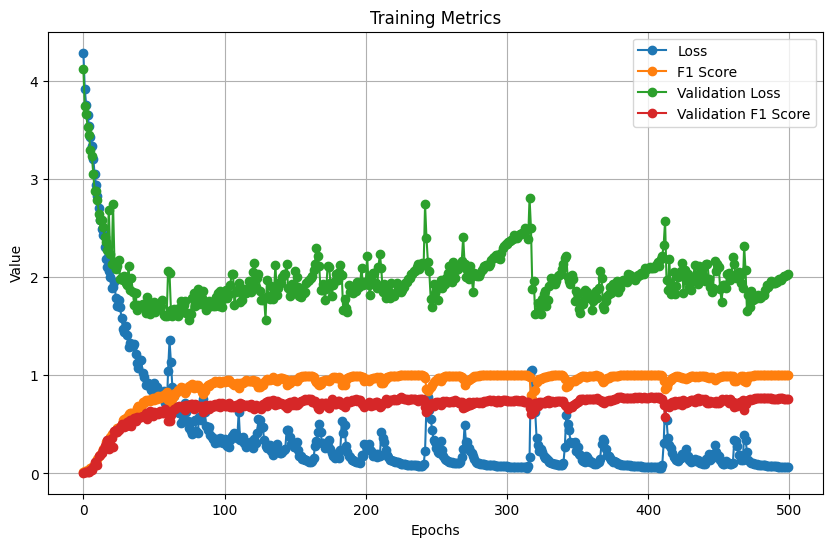

In [141]:
# Plotting
import matplotlib.pyplot as plt
epochs = range(0, 500)
plt.figure(figsize=(10, 6))
plt.plot(epochs, hist_df.loss, marker='o', label='Loss')
plt.plot(epochs, hist_df.f1_score, marker='o', label='F1 Score')
plt.plot(epochs, hist_df.val_loss, marker='o', label='Validation Loss')
plt.plot(epochs, hist_df.val_f1_score, marker='o', label='Validation F1 Score')
plt.title('Training Metrics')
plt.xlabel('Epochs')
plt.ylabel('Value')
plt.legend()
plt.grid()
plt.show()

In [141]:
reconstructed_model = tf.keras.models.load_model("2 LSTM Mish")

In [143]:
reconstructed_model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_6 (LSTM)               (None, 130, 150)          166200    
                                                                 
 lstm_7 (LSTM)               (None, 200)               280800    
                                                                 
 dropout_6 (Dropout)         (None, 200)               0         
                                                                 
 dense_6 (Dense)             (None, 100)               20100     
                                                                 
 dropout_7 (Dropout)         (None, 100)               0         
                                                                 
 dense_7 (Dense)             (None, 50)                5050      
                                                                 
Total params: 472,150
Trainable params: 472,150
Non-tr

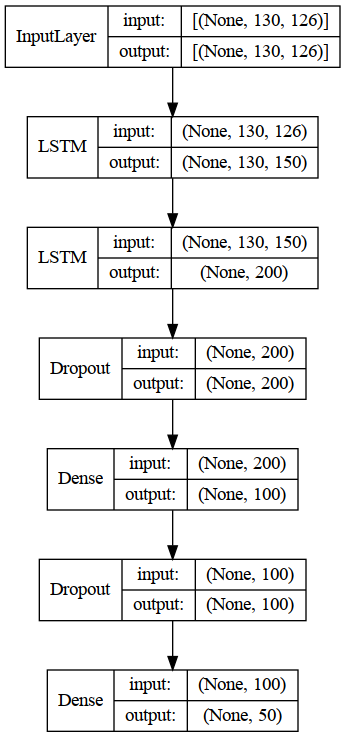

In [144]:
plot_model(reconstructed_model, show_shapes=True, show_layer_names=False)

In [143]:
reconstructed_model.evaluate(Xval,Yval)

11/11 [==============================] - 1s 22ms/step - loss: 2.0334 - f1_score: 0.7836


[2.033409595489502, 0.7836350202560425]

In [144]:
reconstructed_model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_6 (LSTM)               (None, 130, 150)          166200    
                                                                 
 lstm_7 (LSTM)               (None, 200)               280800    
                                                                 
 dropout_6 (Dropout)         (None, 200)               0         
                                                                 
 dense_6 (Dense)             (None, 100)               20100     
                                                                 
 dropout_7 (Dropout)         (None, 100)               0         
                                                                 
 dense_7 (Dense)             (None, 50)                5050      
                                                                 
Total params: 472,150
Trainable params: 472,150
Non-tr

In [145]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

In [146]:
#cm = confusion_matrix(np.argmax(Yval, axis=1), np.argmax(model.predict(Xval), axis=1))

#sns.heatmap(cm, annot = True)

print(classification_report(np.argmax(Yval, axis=1), np.argmax(reconstructed_model.predict(Xval), axis=1),
                            digits=3, target_names=label_map))

11/11 [==============================] - 1s 20ms/step
              precision    recall  f1-score   support

         AXE      0.857     0.750     0.800         8
    BACKPACK      1.000     0.667     0.800         6
  BASKETBALL      1.000     1.000     1.000        10
         BEE      1.000     0.800     0.889        10
        BELT      1.000     1.000     1.000         4
        BITE      1.000     1.000     1.000         8
   BREAKFAST      0.600     1.000     0.750         6
      CANCER      1.000     1.000     1.000         8
   CHRISTMAS      1.000     0.500     0.667         6
    CONFUSED      0.857     1.000     0.923         6
        DARK      1.000     1.000     1.000         4
        DEAF      1.000     1.000     1.000         6
      DECIDE      1.000     0.833     0.909         6
      DEMAND      0.750     0.750     0.750         8
     DEVELOP      0.375     0.500     0.429         6
      DINNER      0.833     0.625     0.714         8
         DOG      0.857    

/home/kristian/miniconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/kristian/miniconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/kristian/miniconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [147]:
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath='2 LSTM Lecunnormal/',
    monitor='val_f1_score',
    mode='max',
    save_best_only=True)

In [149]:
act_function = 'selu'
initializer = tf.keras.initializers.LecunNormal(seed=10)
model = Sequential()
model.add(LSTM(units=150,return_sequences=True,input_shape=(130,126), kernel_initializer = initializer,
               kernel_regularizer=regularizers.l2(.00016577111356694404)))
model.add(LSTM(units=200,return_sequences=False,input_shape=(130,126),kernel_initializer = initializer,
               kernel_regularizer=regularizers.l2(.001678637274473244)))
#model.add(Dropout(.35))
model.add(Dense(units=100,activation=act_function, kernel_initializer = initializer))
#model.add(Dropout(.35))
model.add(Dense(50, activation='softmax'))
model.compile(tf.optimizers.experimental.Nadam(.0005968991218820336),loss='categorical_crossentropy',
            metrics=[tfa.metrics.F1Score(num_classes=50, average='macro')])
model.summary()
History = model.fit(x=Xtrain, y=Ytrain,validation_data= (Xval,Yval), batch_size=96,epochs=500, verbose=1,callbacks=[model_checkpoint_callback])

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_10 (LSTM)              (None, 130, 150)          166200    
                                                                 
 lstm_11 (LSTM)              (None, 200)               280800    
                                                                 
 dense_10 (Dense)            (None, 100)               20100     
                                                                 
 dense_11 (Dense)            (None, 50)                5050      
                                                                 
Total params: 472,150
Trainable params: 472,150
Non-trainable params: 0
_________________________________________________________________
Epoch 1/500
28/28 [==============================] - 11s 156ms/step - loss: 5.1456 - f1_score: 0.0191 - val_loss: 4.7812 - val_f1_score: 0.0097
Epoch 2/500
28/28 [=================

INFO:tensorflow:Assets written to: 2 LSTM Lecunnormal/assets


INFO:tensorflow:Assets written to: 2 LSTM Lecunnormal/assets


28/28 [==============================] - 20s 732ms/step - loss: 0.3074 - f1_score: 0.9748 - val_loss: 1.3189 - val_f1_score: 0.7666
Epoch 61/500
28/28 [==============================] - 3s 111ms/step - loss: 0.2798 - f1_score: 0.9806 - val_loss: 1.3639 - val_f1_score: 0.7280
Epoch 62/500
28/28 [==============================] - 3s 113ms/step - loss: 0.2556 - f1_score: 0.9869 - val_loss: 1.2828 - val_f1_score: 0.7483
Epoch 63/500
28/28 [==============================] - 3s 116ms/step - loss: 0.2466 - f1_score: 0.9916 - val_loss: 1.4387 - val_f1_score: 0.7255
Epoch 64/500
28/28 [==============================] - 3s 115ms/step - loss: 0.2414 - f1_score: 0.9920 - val_loss: 1.3745 - val_f1_score: 0.7520
Epoch 65/500
28/28 [==============================] - 3s 116ms/step - loss: 0.2438 - f1_score: 0.9865 - val_loss: 1.3802 - val_f1_score: 0.7379
Epoch 66/500
28/28 [==============================] - 3s 117ms/step - loss: 0.2433 - f1_score: 0.9851 - val_loss: 1.3805 - val_f1_score: 0.7400
Epoc

Epoch 117/500
28/28 [==============================] - 3s 121ms/step - loss: 0.1352 - f1_score: 1.0000 - val_loss: 1.6596 - val_f1_score: 0.7450
Epoch 118/500
28/28 [==============================] - 3s 119ms/step - loss: 0.1337 - f1_score: 1.0000 - val_loss: 1.6688 - val_f1_score: 0.7427
Epoch 119/500
28/28 [==============================] - 3s 120ms/step - loss: 0.1322 - f1_score: 1.0000 - val_loss: 1.6704 - val_f1_score: 0.7452
Epoch 120/500
28/28 [==============================] - 3s 120ms/step - loss: 0.1307 - f1_score: 1.0000 - val_loss: 1.6792 - val_f1_score: 0.7452
Epoch 121/500
28/28 [==============================] - 3s 119ms/step - loss: 0.1292 - f1_score: 1.0000 - val_loss: 1.6826 - val_f1_score: 0.7457
Epoch 122/500
28/28 [==============================] - 3s 119ms/step - loss: 0.1277 - f1_score: 1.0000 - val_loss: 1.6897 - val_f1_score: 0.7457
Epoch 123/500
28/28 [==============================] - 3s 119ms/step - loss: 0.1263 - f1_score: 1.0000 - val_loss: 1.6960 - val_f1

INFO:tensorflow:Assets written to: 2 LSTM Lecunnormal/assets


INFO:tensorflow:Assets written to: 2 LSTM Lecunnormal/assets


28/28 [==============================] - 16s 577ms/step - loss: 0.1627 - f1_score: 0.9855 - val_loss: 1.2947 - val_f1_score: 0.7771
Epoch 176/500
28/28 [==============================] - 3s 112ms/step - loss: 0.2350 - f1_score: 0.9641 - val_loss: 1.4053 - val_f1_score: 0.7495
Epoch 177/500
28/28 [==============================] - 3s 113ms/step - loss: 0.2423 - f1_score: 0.9592 - val_loss: 1.7268 - val_f1_score: 0.6988
Epoch 178/500
28/28 [==============================] - 3s 114ms/step - loss: 0.2314 - f1_score: 0.9628 - val_loss: 1.5366 - val_f1_score: 0.7149
Epoch 179/500
28/28 [==============================] - 3s 115ms/step - loss: 0.2137 - f1_score: 0.9708 - val_loss: 1.3595 - val_f1_score: 0.7144
Epoch 180/500
28/28 [==============================] - 3s 115ms/step - loss: 0.2108 - f1_score: 0.9716 - val_loss: 1.3377 - val_f1_score: 0.7281
Epoch 181/500
28/28 [==============================] - 3s 116ms/step - loss: 0.1625 - f1_score: 0.9871 - val_loss: 1.3348 - val_f1_score: 0.746

INFO:tensorflow:Assets written to: 2 LSTM Lecunnormal/assets


INFO:tensorflow:Assets written to: 2 LSTM Lecunnormal/assets


28/28 [==============================] - 18s 676ms/step - loss: 0.1417 - f1_score: 0.9908 - val_loss: 1.3467 - val_f1_score: 0.7803
Epoch 217/500
28/28 [==============================] - ETA: 0s - loss: 0.1290 - f1_score: 0.9939

INFO:tensorflow:Assets written to: 2 LSTM Lecunnormal/assets


INFO:tensorflow:Assets written to: 2 LSTM Lecunnormal/assets


28/28 [==============================] - 16s 594ms/step - loss: 0.1290 - f1_score: 0.9939 - val_loss: 1.2394 - val_f1_score: 0.7918
Epoch 218/500
28/28 [==============================] - 3s 111ms/step - loss: 0.1143 - f1_score: 0.9993 - val_loss: 1.1759 - val_f1_score: 0.7774
Epoch 219/500
28/28 [==============================] - 3s 113ms/step - loss: 0.1074 - f1_score: 0.9996 - val_loss: 1.2235 - val_f1_score: 0.7754
Epoch 220/500
28/28 [==============================] - 3s 116ms/step - loss: 0.1037 - f1_score: 1.0000 - val_loss: 1.2479 - val_f1_score: 0.7614
Epoch 221/500
28/28 [==============================] - 3s 114ms/step - loss: 0.1022 - f1_score: 0.9996 - val_loss: 1.2409 - val_f1_score: 0.7699
Epoch 222/500
28/28 [==============================] - 3s 116ms/step - loss: 0.0997 - f1_score: 1.0000 - val_loss: 1.2525 - val_f1_score: 0.7716
Epoch 223/500
28/28 [==============================] - 3s 116ms/step - loss: 0.0981 - f1_score: 1.0000 - val_loss: 1.2545 - val_f1_score: 0.771

28/28 [==============================] - 3s 120ms/step - loss: 0.1886 - f1_score: 0.9684 - val_loss: 1.4440 - val_f1_score: 0.7466
Epoch 330/500
28/28 [==============================] - 3s 118ms/step - loss: 0.1783 - f1_score: 0.9721 - val_loss: 1.5421 - val_f1_score: 0.7123
Epoch 331/500
28/28 [==============================] - 3s 118ms/step - loss: 0.1681 - f1_score: 0.9785 - val_loss: 1.4831 - val_f1_score: 0.7287
Epoch 332/500
28/28 [==============================] - 3s 123ms/step - loss: 0.1839 - f1_score: 0.9725 - val_loss: 1.4490 - val_f1_score: 0.7428
Epoch 333/500
28/28 [==============================] - 3s 121ms/step - loss: 0.2156 - f1_score: 0.9609 - val_loss: 1.4890 - val_f1_score: 0.7158
Epoch 334/500
28/28 [==============================] - 3s 118ms/step - loss: 0.1545 - f1_score: 0.9808 - val_loss: 1.4494 - val_f1_score: 0.7501
Epoch 335/500
28/28 [==============================] - 3s 124ms/step - loss: 0.1278 - f1_score: 0.9901 - val_loss: 1.4248 - val_f1_score: 0.7430

28/28 [==============================] - 3s 118ms/step - loss: 0.1797 - f1_score: 0.9821 - val_loss: 1.4347 - val_f1_score: 0.7189
Epoch 442/500
28/28 [==============================] - 3s 118ms/step - loss: 0.2994 - f1_score: 0.9384 - val_loss: 1.5969 - val_f1_score: 0.6702
Epoch 443/500
28/28 [==============================] - 3s 118ms/step - loss: 0.2561 - f1_score: 0.9508 - val_loss: 1.3137 - val_f1_score: 0.7372
Epoch 444/500
28/28 [==============================] - 3s 120ms/step - loss: 0.2274 - f1_score: 0.9572 - val_loss: 1.3102 - val_f1_score: 0.7692
Epoch 445/500
28/28 [==============================] - 3s 117ms/step - loss: 0.2277 - f1_score: 0.9544 - val_loss: 1.3930 - val_f1_score: 0.7329
Epoch 446/500
28/28 [==============================] - 3s 118ms/step - loss: 0.2140 - f1_score: 0.9650 - val_loss: 1.3619 - val_f1_score: 0.7372
Epoch 447/500
28/28 [==============================] - 3s 118ms/step - loss: 0.1695 - f1_score: 0.9810 - val_loss: 1.3193 - val_f1_score: 0.7581

In [150]:
print(classification_report(np.argmax(Yval, axis=1), np.argmax(model.predict(Xval), axis=1),
                            digits=3, target_names=label_map))

11/11 [==============================] - 1s 20ms/step
              precision    recall  f1-score   support

         AXE      0.750     0.750     0.750         8
    BACKPACK      1.000     0.667     0.800         6
  BASKETBALL      0.750     0.900     0.818        10
         BEE      0.889     0.800     0.842        10
        BELT      1.000     1.000     1.000         4
        BITE      0.700     0.875     0.778         8
   BREAKFAST      0.833     0.833     0.833         6
      CANCER      0.800     1.000     0.889         8
   CHRISTMAS      1.000     0.667     0.800         6
    CONFUSED      1.000     1.000     1.000         6
        DARK      0.571     1.000     0.727         4
        DEAF      1.000     0.833     0.909         6
      DECIDE      1.000     0.667     0.800         6
      DEMAND      0.857     0.750     0.800         8
     DEVELOP      0.750     1.000     0.857         6
      DINNER      0.545     0.750     0.632         8
         DOG      0.500    

In [151]:
# convert the history.history dict to a pandas DataFrame:     
hist_df = pd.DataFrame(History.history) 

# or save to csv: 
hist_csv_file = '2 LSTM Lecunnormal/history.csv'
with open(hist_csv_file, mode='w') as f:
    hist_df.to_csv(f)

In [152]:
hist_df.tail()

loss  f1_score  val_loss  val_f1_score
495  0.047212       1.0  1.411738      0.776743
496  0.046634       1.0  1.407802      0.776090
497  0.046064       1.0  1.409564      0.776691
498  0.045508       1.0  1.412825      0.775665
499  0.044966       1.0  1.416632      0.776534

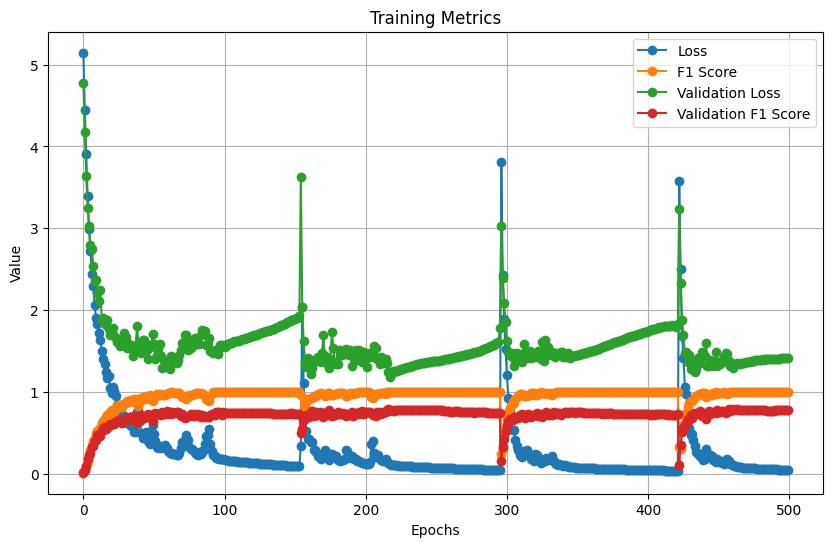

In [153]:
# Plotting
import matplotlib.pyplot as plt
epochs = range(0, 500)
plt.figure(figsize=(10, 6))
plt.plot(epochs, hist_df.loss, marker='o', label='Loss')
plt.plot(epochs, hist_df.f1_score, marker='o', label='F1 Score')
plt.plot(epochs, hist_df.val_loss, marker='o', label='Validation Loss')
plt.plot(epochs, hist_df.val_f1_score, marker='o', label='Validation F1 Score')
plt.title('Training Metrics')
plt.xlabel('Epochs')
plt.ylabel('Value')
plt.legend()
plt.grid()
plt.show()

In [145]:
reconstructed_model = tf.keras.models.load_model("2 LSTM Lecunnormal")

In [146]:
reconstructed_model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_10 (LSTM)              (None, 130, 150)          166200    
                                                                 
 lstm_11 (LSTM)              (None, 200)               280800    
                                                                 
 dense_10 (Dense)            (None, 100)               20100     
                                                                 
 dense_11 (Dense)            (None, 50)                5050      
                                                                 
Total params: 472,150
Trainable params: 472,150
Non-trainable params: 0
_________________________________________________________________


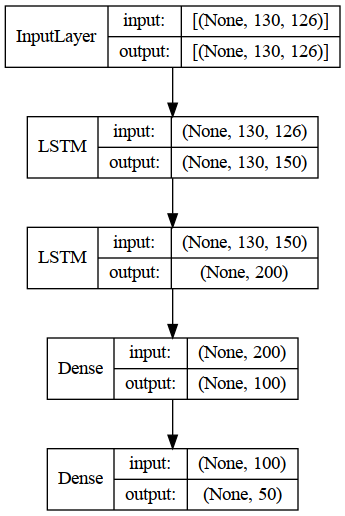

In [147]:
plot_model(reconstructed_model, show_shapes=True, show_layer_names=False)

In [155]:
reconstructed_model.evaluate(Xval,Yval)

11/11 [==============================] - 1s 21ms/step - loss: 1.2394 - f1_score: 0.7918


[1.2393572330474854, 0.7918112277984619]

In [156]:
reconstructed_model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_10 (LSTM)              (None, 130, 150)          166200    
                                                                 
 lstm_11 (LSTM)              (None, 200)               280800    
                                                                 
 dense_10 (Dense)            (None, 100)               20100     
                                                                 
 dense_11 (Dense)            (None, 50)                5050      
                                                                 
Total params: 472,150
Trainable params: 472,150
Non-trainable params: 0
_________________________________________________________________


In [158]:
#cm = confusion_matrix(np.argmax(Yval, axis=1), np.argmax(model.predict(Xval), axis=1))

#sns.heatmap(cm, annot = True)

print(classification_report(np.argmax(Yval, axis=1), np.argmax(reconstructed_model.predict(Xval), axis=1),
                            digits=3, target_names=label_map))

11/11 [==============================] - 1s 19ms/step
              precision    recall  f1-score   support

         AXE      1.000     0.750     0.857         8
    BACKPACK      1.000     0.833     0.909         6
  BASKETBALL      1.000     0.800     0.889        10
         BEE      1.000     0.800     0.889        10
        BELT      1.000     1.000     1.000         4
        BITE      0.889     1.000     0.941         8
   BREAKFAST      0.667     1.000     0.800         6
      CANCER      0.889     1.000     0.941         8
   CHRISTMAS      1.000     0.667     0.800         6
    CONFUSED      0.750     1.000     0.857         6
        DARK      0.800     1.000     0.889         4
        DEAF      1.000     1.000     1.000         6
      DECIDE      1.000     1.000     1.000         6
      DEMAND      0.800     0.500     0.615         8
     DEVELOP      0.714     0.833     0.769         6
      DINNER      0.556     0.625     0.588         8
         DOG      1.000    

## Hyperparameter Tuning 3 LSTM Layers

In [61]:
from tensorflow.keras import regularizers
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout, SpatialDropout1D, GRU
import keras_tuner
from keras_tuner import HyperModel
from kerastuner.tuners import Hyperband
from tensorflow.keras.callbacks import EarlyStopping
import tensorflow_addons as tfa

class HyperModel(HyperModel):
    def __init__(self, input_shape, num_classes):
        self.input_shape = input_shape
        self.num_classes = num_classes

    def build(self, hp):
        act_function = hp.Choice('dense_activation',values=['selu','mish','elu','gelu','relu'],default='relu')
        model = Sequential()
#        model.add(Conv1D(filters=hp.Choice('num_filters_1',values=[25,50, 100,150],default=100,),kernel_size=2,activation=act_function,input_shape=self.input_shape))
#        model.add(MaxPooling1D(pool_size=2))
#        model.add(Conv1D(filters=hp.Choice('num_filters_2',values=[25,50, 100,150],default=25,),kernel_size=2,activation=act_function))
#        model.add(MaxPooling1D(pool_size=2))
#        model.add(Conv1D(filters=hp.Choice('num_filters_3',values=[25,50, 100,150],default=50,),kernel_size=2,activation=act_function,input_shape=self.input_shape))
#        model.add(MaxPooling1D(pool_size=2))

        model.add(LSTM(units=hp.Int('units_1',min_value=50,max_value=200,step=25,default=100),
                      return_sequences=True,
                      input_shape=self.input_shape,
                      kernel_regularizer=regularizers.l2(hp.Float('regularizer_1',min_value=1e-4,
                                                                max_value=1e-2,sampling='LOG',
                                                                default=.001))))
        model.add(LSTM(units=hp.Int('units_2',min_value=50,max_value=200,step=25,default=100),
                      return_sequences=True,
                      kernel_regularizer=regularizers.l2(hp.Float('regularizer_2',min_value=1e-4,
                                                                max_value=1e-2,sampling='LOG',
                                                                default=.001))))
        model.add(LSTM(units=hp.Int('units_3',min_value=50,max_value=200,step=25,default=100),
                      return_sequences=False,
                      kernel_regularizer=regularizers.l2(hp.Float('regularizer_3',min_value=1e-4,
                                                                max_value=1e-2,sampling='LOG',
                                                                default=.001))))
        model.add(Dropout(rate=hp.Float('dropout_1',min_value=0.0,max_value=0.9,default=0.65,step=0.05,)))
 #       model.add(Flatten())
        model.add(Dense(units=hp.Int('units_4',min_value=70,max_value=120,step=10,default=80),activation=act_function))
        model.add(Dropout(rate=hp.Float('dropout_2',min_value=0.0,max_value=0.9,default=0.7,step=0.05,)))

        model.add(Dense(self.num_classes, activation='softmax'))

        model.compile(tf.optimizers.experimental.Nadam(hp.Float('learning_rate',min_value=1e-4,
                                                                max_value=1e-2,sampling='LOG',
                                                                default=.0005)),
            loss='categorical_crossentropy',
            metrics=[tfa.metrics.F1Score(num_classes=50, average='macro')]
        )
        return model

hypermodel = HyperModel(input_shape=(130,399), num_classes=50)

/tmp/ipykernel_8501/2620525644.py:5: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
  from kerastuner.tuners import Hyperband


In [62]:
HYPERBAND_MAX_EPOCHS = 300
#MAX_TRIALS = 20
EXECUTION_PER_TRIAL = 2

tuner = Hyperband(
    hypermodel,
    max_epochs=HYPERBAND_MAX_EPOCHS,
    objective=keras_tuner.Objective("val_f1_score", direction="max"),
    seed=10,
    executions_per_trial=EXECUTION_PER_TRIAL,
    directory='/media/kristian/HDD/ASL_Citizen/RTMPose-L/hyperband/',
    project_name='3_LSTM',
    overwrite=False)

INFO:tensorflow:Reloading Tuner from /media/kristian/HDD/ASL_Citizen/RTMPose-L/hyperband/3_LSTM/tuner0.json


In [63]:
tuner.search_space_summary()

Search space summary
Default search space size: 11
dense_activation (Choice)
{'default': 'relu', 'conditions': [], 'values': ['selu', 'mish', 'elu', 'gelu', 'relu'], 'ordered': False}
units_1 (Int)
{'default': 100, 'conditions': [], 'min_value': 50, 'max_value': 200, 'step': 25, 'sampling': 'linear'}
regularizer_1 (Float)
{'default': 0.001, 'conditions': [], 'min_value': 0.0001, 'max_value': 0.01, 'step': None, 'sampling': 'log'}
units_2 (Int)
{'default': 100, 'conditions': [], 'min_value': 50, 'max_value': 200, 'step': 25, 'sampling': 'linear'}
regularizer_2 (Float)
{'default': 0.001, 'conditions': [], 'min_value': 0.0001, 'max_value': 0.01, 'step': None, 'sampling': 'log'}
units_3 (Int)
{'default': 100, 'conditions': [], 'min_value': 50, 'max_value': 200, 'step': 25, 'sampling': 'linear'}
regularizer_3 (Float)
{'default': 0.001, 'conditions': [], 'min_value': 0.0001, 'max_value': 0.01, 'step': None, 'sampling': 'log'}
dropout_1 (Float)
{'default': 0.65, 'conditions': [], 'min_value':

In [64]:
es = EarlyStopping(monitor="val_f1_score",patience=30,restore_best_weights=True,mode="max")

In [65]:
log_dir = os.path.join('Logs')
tb_callback = TensorBoard(log_dir=log_dir)

In [66]:
tuner.search(Xtrain, Ytrain, validation_data=(Xval,Yval),batch_size=96,callbacks=[es])

Trial 725 Complete [00h 19m 29s]
val_f1_score: 0.6328944563865662

Best val_f1_score So Far: 0.6784997582435608
Total elapsed time: 22h 03m 27s
INFO:tensorflow:Oracle triggered exit


In [67]:
tuner.results_summary()

Results summary
Results in /media/kristian/HDD/ASL_Citizen/RTMPose-L/hyperband/3_LSTM
Showing 10 best trials
Objective(name="val_f1_score", direction="max")

Trial 0714 summary
Hyperparameters:
dense_activation: mish
units_1: 125
regularizer_1: 0.00041721832896797245
units_2: 150
regularizer_2: 0.00014354078230406593
units_3: 150
regularizer_3: 0.002948111895566179
dropout_1: 0.4
units_4: 110
dropout_2: 0.4
learning_rate: 0.0001715739875569636
tuner/epochs: 300
tuner/initial_epoch: 100
tuner/bracket: 1
tuner/round: 1
tuner/trial_id: 0713
Score: 0.6784997582435608

Trial 0598 summary
Hyperparameters:
dense_activation: selu
units_1: 125
regularizer_1: 0.0017686030901453863
units_2: 150
regularizer_2: 0.0013257717103432026
units_3: 175
regularizer_3: 0.00912470672476799
dropout_1: 0.25
units_4: 120
dropout_2: 0.65
learning_rate: 0.00043631081921577624
tuner/epochs: 300
tuner/initial_epoch: 100
tuner/bracket: 4
tuner/round: 4
tuner/trial_id: 0596
Score: 0.6762926578521729

Trial 0715 summa

In [68]:
best_model = tuner.get_best_models(num_models=3)[0]

In [69]:
loss, accuracy = best_model.evaluate(Xval, Yval)

11/11 [==============================] - 3s 91ms/step - loss: 1.9141 - f1_score: 0.7073


In [70]:
best_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 130, 125)          262500    
                                                                 
 lstm_1 (LSTM)               (None, 130, 150)          165600    
                                                                 
 lstm_2 (LSTM)               (None, 150)               180600    
                                                                 
 dropout (Dropout)           (None, 150)               0         
                                                                 
 dense (Dense)               (None, 110)               16610     
                                                                 
 dropout_1 (Dropout)         (None, 110)               0         
                                                                 
 dense_1 (Dense)             (None, 50)                5

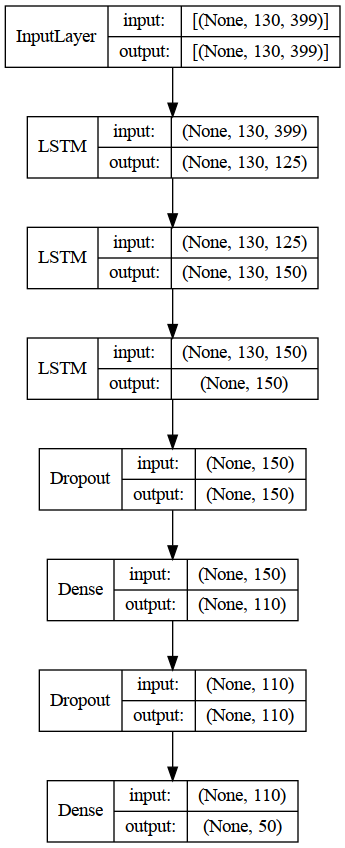

In [71]:
plot_model(best_model, show_shapes=True, show_layer_names=False)

In [72]:
print(classification_report(np.argmax(Yval, axis=1), np.argmax(best_model.predict(Xval), axis=1),
                            digits=3, target_names=label_map))

11/11 [==============================] - 2s 25ms/step
              precision    recall  f1-score   support

         AXE      1.000     0.875     0.933         8
    BACKPACK      0.714     0.833     0.769         6
  BASKETBALL      0.909     1.000     0.952        10
         BEE      0.500     0.400     0.444        10
        BELT      0.750     0.750     0.750         4
        BITE      1.000     0.750     0.857         8
   BREAKFAST      0.571     0.667     0.615         6
      CANCER      0.778     0.875     0.824         8
   CHRISTMAS      0.750     1.000     0.857         6
    CONFUSED      0.667     1.000     0.800         6
        DARK      1.000     1.000     1.000         4
        DEAF      0.231     0.500     0.316         6
      DECIDE      1.000     1.000     1.000         6
      DEMAND      0.714     0.625     0.667         8
     DEVELOP      1.000     0.500     0.667         6
      DINNER      0.889     1.000     0.941         8
         DOG      0.600    

In [73]:
#bestHP = tuner.get_best_hyperparameters(num_trials=5)[2]
bestHP = tuner.get_best_hyperparameters(num_trials=10)[0]

In [74]:
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath='3 LSTM/',
    monitor='val_f1_score',
    mode='max',
    save_best_only=True)

In [75]:
print("[INFO] training the best model...")
model = tuner.hypermodel.build(bestHP)
History = model.fit(x=Xtrain, y=Ytrain,validation_data= (Xval,Yval), batch_size=96,epochs=500, verbose=1,callbacks=[model_checkpoint_callback])
#History = model.fit(x=Xtrain, y=Ytrain,validation_data= (Xval,Yval), batch_size=96,epochs=500, verbose=1)

[INFO] training the best model...
Epoch 1/500
28/28 [==============================] - ETA: 0s - loss: 4.8033 - f1_score: 0.0122

INFO:tensorflow:Assets written to: 3 LSTM/assets


INFO:tensorflow:Assets written to: 3 LSTM/assets


28/28 [==============================] - 44s 1s/step - loss: 4.8033 - f1_score: 0.0122 - val_loss: 4.7499 - val_f1_score: 9.1803e-04
Epoch 2/500
28/28 [==============================] - ETA: 0s - loss: 4.7150 - f1_score: 0.0121

INFO:tensorflow:Assets written to: 3 LSTM/assets


INFO:tensorflow:Assets written to: 3 LSTM/assets


28/28 [==============================] - 21s 777ms/step - loss: 4.7150 - f1_score: 0.0121 - val_loss: 4.6661 - val_f1_score: 0.0031
Epoch 3/500
28/28 [==============================] - 4s 153ms/step - loss: 4.6260 - f1_score: 0.0188 - val_loss: 4.5829 - val_f1_score: 0.0028
Epoch 4/500
28/28 [==============================] - 4s 156ms/step - loss: 4.5383 - f1_score: 0.0233 - val_loss: 4.4965 - val_f1_score: 0.0012
Epoch 5/500
28/28 [==============================] - ETA: 0s - loss: 4.4339 - f1_score: 0.0210

INFO:tensorflow:Assets written to: 3 LSTM/assets


INFO:tensorflow:Assets written to: 3 LSTM/assets


28/28 [==============================] - 20s 728ms/step - loss: 4.4339 - f1_score: 0.0210 - val_loss: 4.3412 - val_f1_score: 0.0063
Epoch 6/500
28/28 [==============================] - ETA: 0s - loss: 4.3325 - f1_score: 0.0278

INFO:tensorflow:Assets written to: 3 LSTM/assets


INFO:tensorflow:Assets written to: 3 LSTM/assets


28/28 [==============================] - 22s 820ms/step - loss: 4.3325 - f1_score: 0.0278 - val_loss: 4.2351 - val_f1_score: 0.0129
Epoch 7/500
28/28 [==============================] - ETA: 0s - loss: 4.2229 - f1_score: 0.0339

INFO:tensorflow:Assets written to: 3 LSTM/assets


INFO:tensorflow:Assets written to: 3 LSTM/assets


28/28 [==============================] - 19s 707ms/step - loss: 4.2229 - f1_score: 0.0339 - val_loss: 4.1269 - val_f1_score: 0.0175
Epoch 8/500
28/28 [==============================] - ETA: 0s - loss: 4.1171 - f1_score: 0.0380

INFO:tensorflow:Assets written to: 3 LSTM/assets


INFO:tensorflow:Assets written to: 3 LSTM/assets


28/28 [==============================] - 19s 710ms/step - loss: 4.1171 - f1_score: 0.0380 - val_loss: 3.9679 - val_f1_score: 0.0390
Epoch 9/500
28/28 [==============================] - 4s 153ms/step - loss: 4.0017 - f1_score: 0.0539 - val_loss: 3.8893 - val_f1_score: 0.0336
Epoch 10/500
28/28 [==============================] - 4s 154ms/step - loss: 3.8989 - f1_score: 0.0631 - val_loss: 3.7204 - val_f1_score: 0.0324
Epoch 11/500
28/28 [==============================] - ETA: 0s - loss: 3.7821 - f1_score: 0.0709

INFO:tensorflow:Assets written to: 3 LSTM/assets


INFO:tensorflow:Assets written to: 3 LSTM/assets


28/28 [==============================] - 22s 803ms/step - loss: 3.7821 - f1_score: 0.0709 - val_loss: 3.6665 - val_f1_score: 0.0445
Epoch 12/500
28/28 [==============================] - ETA: 0s - loss: 3.7093 - f1_score: 0.0730

INFO:tensorflow:Assets written to: 3 LSTM/assets


INFO:tensorflow:Assets written to: 3 LSTM/assets


28/28 [==============================] - 22s 796ms/step - loss: 3.7093 - f1_score: 0.0730 - val_loss: 3.5537 - val_f1_score: 0.0520
Epoch 13/500
28/28 [==============================] - ETA: 0s - loss: 3.5803 - f1_score: 0.0897

INFO:tensorflow:Assets written to: 3 LSTM/assets


INFO:tensorflow:Assets written to: 3 LSTM/assets


28/28 [==============================] - 21s 768ms/step - loss: 3.5803 - f1_score: 0.0897 - val_loss: 3.4474 - val_f1_score: 0.0582
Epoch 14/500
28/28 [==============================] - 4s 154ms/step - loss: 3.5217 - f1_score: 0.0979 - val_loss: 3.3894 - val_f1_score: 0.0525
Epoch 15/500
28/28 [==============================] - ETA: 0s - loss: 3.4199 - f1_score: 0.1063

INFO:tensorflow:Assets written to: 3 LSTM/assets


INFO:tensorflow:Assets written to: 3 LSTM/assets


28/28 [==============================] - 21s 759ms/step - loss: 3.4199 - f1_score: 0.1063 - val_loss: 3.2893 - val_f1_score: 0.0948
Epoch 16/500
28/28 [==============================] - 4s 154ms/step - loss: 3.3599 - f1_score: 0.1132 - val_loss: 3.2570 - val_f1_score: 0.0627
Epoch 17/500
28/28 [==============================] - ETA: 0s - loss: 3.2681 - f1_score: 0.1342

INFO:tensorflow:Assets written to: 3 LSTM/assets


INFO:tensorflow:Assets written to: 3 LSTM/assets


28/28 [==============================] - 23s 860ms/step - loss: 3.2681 - f1_score: 0.1342 - val_loss: 3.1968 - val_f1_score: 0.1062
Epoch 18/500
28/28 [==============================] - ETA: 0s - loss: 3.2175 - f1_score: 0.1420

INFO:tensorflow:Assets written to: 3 LSTM/assets


INFO:tensorflow:Assets written to: 3 LSTM/assets


28/28 [==============================] - 22s 808ms/step - loss: 3.2175 - f1_score: 0.1420 - val_loss: 3.1104 - val_f1_score: 0.1459
Epoch 19/500
28/28 [==============================] - 4s 156ms/step - loss: 3.1161 - f1_score: 0.1615 - val_loss: 3.0359 - val_f1_score: 0.1136
Epoch 20/500
28/28 [==============================] - ETA: 0s - loss: 3.0783 - f1_score: 0.1684

INFO:tensorflow:Assets written to: 3 LSTM/assets


INFO:tensorflow:Assets written to: 3 LSTM/assets


28/28 [==============================] - 38s 1s/step - loss: 3.0783 - f1_score: 0.1684 - val_loss: 2.9059 - val_f1_score: 0.1470
Epoch 21/500
28/28 [==============================] - ETA: 0s - loss: 3.0039 - f1_score: 0.1853

INFO:tensorflow:Assets written to: 3 LSTM/assets


INFO:tensorflow:Assets written to: 3 LSTM/assets


28/28 [==============================] - 21s 785ms/step - loss: 3.0039 - f1_score: 0.1853 - val_loss: 2.9328 - val_f1_score: 0.1662
Epoch 22/500
28/28 [==============================] - 4s 159ms/step - loss: 2.9196 - f1_score: 0.1911 - val_loss: 2.8570 - val_f1_score: 0.1632
Epoch 23/500
28/28 [==============================] - ETA: 0s - loss: 2.8764 - f1_score: 0.2072

INFO:tensorflow:Assets written to: 3 LSTM/assets


INFO:tensorflow:Assets written to: 3 LSTM/assets


28/28 [==============================] - 20s 745ms/step - loss: 2.8764 - f1_score: 0.2072 - val_loss: 2.9903 - val_f1_score: 0.1824
Epoch 24/500
28/28 [==============================] - ETA: 0s - loss: 2.8371 - f1_score: 0.2266

INFO:tensorflow:Assets written to: 3 LSTM/assets


INFO:tensorflow:Assets written to: 3 LSTM/assets


28/28 [==============================] - 22s 803ms/step - loss: 2.8371 - f1_score: 0.2266 - val_loss: 2.7095 - val_f1_score: 0.2374
Epoch 25/500
28/28 [==============================] - 4s 155ms/step - loss: 2.7681 - f1_score: 0.2481 - val_loss: 2.6803 - val_f1_score: 0.2329
Epoch 26/500
28/28 [==============================] - 4s 154ms/step - loss: 2.6983 - f1_score: 0.2503 - val_loss: 2.6968 - val_f1_score: 0.2128
Epoch 27/500
28/28 [==============================] - 4s 155ms/step - loss: 2.6554 - f1_score: 0.2696 - val_loss: 2.6242 - val_f1_score: 0.2123
Epoch 28/500
28/28 [==============================] - 4s 156ms/step - loss: 2.5619 - f1_score: 0.2923 - val_loss: 2.5967 - val_f1_score: 0.2368
Epoch 29/500
28/28 [==============================] - ETA: 0s - loss: 2.5140 - f1_score: 0.2907

INFO:tensorflow:Assets written to: 3 LSTM/assets


INFO:tensorflow:Assets written to: 3 LSTM/assets


28/28 [==============================] - 22s 807ms/step - loss: 2.5140 - f1_score: 0.2907 - val_loss: 2.5072 - val_f1_score: 0.2953
Epoch 30/500
28/28 [==============================] - 4s 156ms/step - loss: 2.4997 - f1_score: 0.3142 - val_loss: 2.5517 - val_f1_score: 0.2487
Epoch 31/500
28/28 [==============================] - 4s 156ms/step - loss: 2.4380 - f1_score: 0.3174 - val_loss: 2.3862 - val_f1_score: 0.2953
Epoch 32/500
28/28 [==============================] - 4s 157ms/step - loss: 2.3730 - f1_score: 0.3297 - val_loss: 2.5882 - val_f1_score: 0.2319
Epoch 33/500
28/28 [==============================] - ETA: 0s - loss: 2.3449 - f1_score: 0.3433

INFO:tensorflow:Assets written to: 3 LSTM/assets


INFO:tensorflow:Assets written to: 3 LSTM/assets


28/28 [==============================] - 22s 810ms/step - loss: 2.3449 - f1_score: 0.3433 - val_loss: 2.3521 - val_f1_score: 0.3077
Epoch 34/500
28/28 [==============================] - ETA: 0s - loss: 2.2664 - f1_score: 0.3672

INFO:tensorflow:Assets written to: 3 LSTM/assets


INFO:tensorflow:Assets written to: 3 LSTM/assets


28/28 [==============================] - 21s 776ms/step - loss: 2.2664 - f1_score: 0.3672 - val_loss: 2.3122 - val_f1_score: 0.3355
Epoch 35/500
28/28 [==============================] - 4s 155ms/step - loss: 2.2649 - f1_score: 0.3788 - val_loss: 2.3478 - val_f1_score: 0.3166
Epoch 36/500
28/28 [==============================] - ETA: 0s - loss: 2.2421 - f1_score: 0.3780

INFO:tensorflow:Assets written to: 3 LSTM/assets


INFO:tensorflow:Assets written to: 3 LSTM/assets


28/28 [==============================] - 22s 795ms/step - loss: 2.2421 - f1_score: 0.3780 - val_loss: 2.2420 - val_f1_score: 0.3673
Epoch 37/500
28/28 [==============================] - ETA: 0s - loss: 2.1385 - f1_score: 0.4015

INFO:tensorflow:Assets written to: 3 LSTM/assets


INFO:tensorflow:Assets written to: 3 LSTM/assets


28/28 [==============================] - 21s 763ms/step - loss: 2.1385 - f1_score: 0.4015 - val_loss: 2.2216 - val_f1_score: 0.3814
Epoch 38/500
28/28 [==============================] - 4s 155ms/step - loss: 2.1106 - f1_score: 0.4225 - val_loss: 2.3722 - val_f1_score: 0.3089
Epoch 39/500
28/28 [==============================] - 4s 155ms/step - loss: 2.0798 - f1_score: 0.4160 - val_loss: 2.3751 - val_f1_score: 0.3521
Epoch 40/500
28/28 [==============================] - 4s 156ms/step - loss: 2.0303 - f1_score: 0.4385 - val_loss: 2.2451 - val_f1_score: 0.3421
Epoch 41/500
28/28 [==============================] - ETA: 0s - loss: 1.9825 - f1_score: 0.4436

INFO:tensorflow:Assets written to: 3 LSTM/assets


INFO:tensorflow:Assets written to: 3 LSTM/assets


28/28 [==============================] - 22s 800ms/step - loss: 1.9825 - f1_score: 0.4436 - val_loss: 2.1283 - val_f1_score: 0.4136
Epoch 42/500
28/28 [==============================] - 4s 155ms/step - loss: 1.9429 - f1_score: 0.4680 - val_loss: 2.1473 - val_f1_score: 0.3902
Epoch 43/500
28/28 [==============================] - 4s 159ms/step - loss: 1.8810 - f1_score: 0.4773 - val_loss: 2.1852 - val_f1_score: 0.3789
Epoch 44/500
28/28 [==============================] - ETA: 0s - loss: 1.8625 - f1_score: 0.4923

INFO:tensorflow:Assets written to: 3 LSTM/assets


INFO:tensorflow:Assets written to: 3 LSTM/assets


28/28 [==============================] - 22s 820ms/step - loss: 1.8625 - f1_score: 0.4923 - val_loss: 1.9987 - val_f1_score: 0.4640
Epoch 45/500
28/28 [==============================] - 4s 157ms/step - loss: 1.7994 - f1_score: 0.5042 - val_loss: 2.0006 - val_f1_score: 0.4127
Epoch 46/500
28/28 [==============================] - 4s 158ms/step - loss: 1.7549 - f1_score: 0.5234 - val_loss: 2.1759 - val_f1_score: 0.3980
Epoch 47/500
28/28 [==============================] - ETA: 0s - loss: 1.6959 - f1_score: 0.5426

INFO:tensorflow:Assets written to: 3 LSTM/assets


INFO:tensorflow:Assets written to: 3 LSTM/assets


28/28 [==============================] - 23s 835ms/step - loss: 1.6959 - f1_score: 0.5426 - val_loss: 1.9454 - val_f1_score: 0.4845
Epoch 48/500
28/28 [==============================] - 4s 154ms/step - loss: 1.7276 - f1_score: 0.5339 - val_loss: 1.9980 - val_f1_score: 0.4462
Epoch 49/500
28/28 [==============================] - 4s 156ms/step - loss: 1.6595 - f1_score: 0.5473 - val_loss: 2.0059 - val_f1_score: 0.4636
Epoch 50/500
28/28 [==============================] - 4s 157ms/step - loss: 1.6107 - f1_score: 0.5833 - val_loss: 1.9564 - val_f1_score: 0.4506
Epoch 51/500
28/28 [==============================] - 4s 158ms/step - loss: 1.5172 - f1_score: 0.6028 - val_loss: 1.9269 - val_f1_score: 0.4753
Epoch 52/500
28/28 [==============================] - 4s 158ms/step - loss: 1.5110 - f1_score: 0.6032 - val_loss: 1.9369 - val_f1_score: 0.4643
Epoch 53/500
28/28 [==============================] - 4s 160ms/step - loss: 1.4766 - f1_score: 0.6056 - val_loss: 1.9628 - val_f1_score: 0.4697
Epoc

INFO:tensorflow:Assets written to: 3 LSTM/assets


INFO:tensorflow:Assets written to: 3 LSTM/assets


28/28 [==============================] - 22s 806ms/step - loss: 1.4428 - f1_score: 0.6197 - val_loss: 1.9889 - val_f1_score: 0.4997
Epoch 56/500
28/28 [==============================] - ETA: 0s - loss: 1.4786 - f1_score: 0.6225

INFO:tensorflow:Assets written to: 3 LSTM/assets


INFO:tensorflow:Assets written to: 3 LSTM/assets


28/28 [==============================] - 24s 882ms/step - loss: 1.4786 - f1_score: 0.6225 - val_loss: 1.8722 - val_f1_score: 0.5022
Epoch 57/500
28/28 [==============================] - ETA: 0s - loss: 1.4014 - f1_score: 0.6451

INFO:tensorflow:Assets written to: 3 LSTM/assets


INFO:tensorflow:Assets written to: 3 LSTM/assets


28/28 [==============================] - 21s 770ms/step - loss: 1.4014 - f1_score: 0.6451 - val_loss: 1.9478 - val_f1_score: 0.5054
Epoch 58/500
28/28 [==============================] - ETA: 0s - loss: 1.4354 - f1_score: 0.6226

INFO:tensorflow:Assets written to: 3 LSTM/assets


INFO:tensorflow:Assets written to: 3 LSTM/assets


28/28 [==============================] - 22s 804ms/step - loss: 1.4354 - f1_score: 0.6226 - val_loss: 1.8395 - val_f1_score: 0.5187
Epoch 59/500
28/28 [==============================] - ETA: 0s - loss: 1.4241 - f1_score: 0.6252

INFO:tensorflow:Assets written to: 3 LSTM/assets


INFO:tensorflow:Assets written to: 3 LSTM/assets


28/28 [==============================] - 21s 782ms/step - loss: 1.4241 - f1_score: 0.6252 - val_loss: 1.9032 - val_f1_score: 0.5241
Epoch 60/500
28/28 [==============================] - 4s 155ms/step - loss: 1.4403 - f1_score: 0.6302 - val_loss: 1.9941 - val_f1_score: 0.4805
Epoch 61/500
28/28 [==============================] - 4s 156ms/step - loss: 1.3899 - f1_score: 0.6347 - val_loss: 1.9086 - val_f1_score: 0.4853
Epoch 62/500
28/28 [==============================] - ETA: 0s - loss: 1.3303 - f1_score: 0.6507

INFO:tensorflow:Assets written to: 3 LSTM/assets


INFO:tensorflow:Assets written to: 3 LSTM/assets


28/28 [==============================] - 22s 821ms/step - loss: 1.3303 - f1_score: 0.6507 - val_loss: 1.7973 - val_f1_score: 0.5430
Epoch 63/500
28/28 [==============================] - ETA: 0s - loss: 1.2922 - f1_score: 0.6578

INFO:tensorflow:Assets written to: 3 LSTM/assets


INFO:tensorflow:Assets written to: 3 LSTM/assets


28/28 [==============================] - 21s 765ms/step - loss: 1.2922 - f1_score: 0.6578 - val_loss: 1.7876 - val_f1_score: 0.5442
Epoch 64/500
28/28 [==============================] - ETA: 0s - loss: 1.2659 - f1_score: 0.6763

INFO:tensorflow:Assets written to: 3 LSTM/assets


INFO:tensorflow:Assets written to: 3 LSTM/assets


28/28 [==============================] - 19s 699ms/step - loss: 1.2659 - f1_score: 0.6763 - val_loss: 1.7875 - val_f1_score: 0.5472
Epoch 65/500
28/28 [==============================] - 4s 155ms/step - loss: 1.1634 - f1_score: 0.7131 - val_loss: 1.8011 - val_f1_score: 0.5301
Epoch 66/500
28/28 [==============================] - 4s 155ms/step - loss: 1.1886 - f1_score: 0.7020 - val_loss: 1.8109 - val_f1_score: 0.5399
Epoch 67/500
28/28 [==============================] - ETA: 0s - loss: 1.2019 - f1_score: 0.7031

INFO:tensorflow:Assets written to: 3 LSTM/assets


INFO:tensorflow:Assets written to: 3 LSTM/assets


28/28 [==============================] - 23s 848ms/step - loss: 1.2019 - f1_score: 0.7031 - val_loss: 1.8321 - val_f1_score: 0.5612
Epoch 68/500
28/28 [==============================] - 4s 154ms/step - loss: 1.1744 - f1_score: 0.7193 - val_loss: 1.6972 - val_f1_score: 0.5547
Epoch 69/500
28/28 [==============================] - 4s 155ms/step - loss: 1.1705 - f1_score: 0.7082 - val_loss: 1.8418 - val_f1_score: 0.5443
Epoch 70/500
28/28 [==============================] - 4s 157ms/step - loss: 1.1446 - f1_score: 0.7135 - val_loss: 1.7954 - val_f1_score: 0.5481
Epoch 71/500
28/28 [==============================] - ETA: 0s - loss: 1.0858 - f1_score: 0.7342

INFO:tensorflow:Assets written to: 3 LSTM/assets


INFO:tensorflow:Assets written to: 3 LSTM/assets


28/28 [==============================] - 22s 815ms/step - loss: 1.0858 - f1_score: 0.7342 - val_loss: 1.7923 - val_f1_score: 0.5725
Epoch 72/500
28/28 [==============================] - 4s 155ms/step - loss: 1.1017 - f1_score: 0.7317 - val_loss: 1.7907 - val_f1_score: 0.5684
Epoch 73/500
28/28 [==============================] - 4s 157ms/step - loss: 1.0555 - f1_score: 0.7398 - val_loss: 1.8129 - val_f1_score: 0.5634
Epoch 74/500
28/28 [==============================] - 4s 158ms/step - loss: 0.9611 - f1_score: 0.7767 - val_loss: 1.9067 - val_f1_score: 0.5307
Epoch 75/500
28/28 [==============================] - 4s 159ms/step - loss: 1.0273 - f1_score: 0.7514 - val_loss: 1.7822 - val_f1_score: 0.5546
Epoch 76/500
28/28 [==============================] - ETA: 0s - loss: 1.0000 - f1_score: 0.7670

INFO:tensorflow:Assets written to: 3 LSTM/assets


INFO:tensorflow:Assets written to: 3 LSTM/assets


28/28 [==============================] - 23s 856ms/step - loss: 1.0000 - f1_score: 0.7670 - val_loss: 1.8105 - val_f1_score: 0.6007
Epoch 77/500
28/28 [==============================] - 4s 157ms/step - loss: 0.9969 - f1_score: 0.7648 - val_loss: 1.7794 - val_f1_score: 0.5742
Epoch 78/500
28/28 [==============================] - ETA: 0s - loss: 1.0375 - f1_score: 0.7473

INFO:tensorflow:Assets written to: 3 LSTM/assets


INFO:tensorflow:Assets written to: 3 LSTM/assets


28/28 [==============================] - 22s 824ms/step - loss: 1.0375 - f1_score: 0.7473 - val_loss: 1.7438 - val_f1_score: 0.6060
Epoch 79/500
28/28 [==============================] - 4s 155ms/step - loss: 0.9325 - f1_score: 0.7890 - val_loss: 1.8969 - val_f1_score: 0.5616
Epoch 80/500
28/28 [==============================] - 4s 156ms/step - loss: 0.9624 - f1_score: 0.7713 - val_loss: 1.8667 - val_f1_score: 0.5657
Epoch 81/500
28/28 [==============================] - 4s 157ms/step - loss: 0.9237 - f1_score: 0.7871 - val_loss: 1.8094 - val_f1_score: 0.5786
Epoch 82/500
28/28 [==============================] - 4s 158ms/step - loss: 0.9195 - f1_score: 0.7990 - val_loss: 1.9357 - val_f1_score: 0.5346
Epoch 83/500
28/28 [==============================] - ETA: 0s - loss: 0.8785 - f1_score: 0.8114

INFO:tensorflow:Assets written to: 3 LSTM/assets


INFO:tensorflow:Assets written to: 3 LSTM/assets


28/28 [==============================] - 23s 837ms/step - loss: 0.8785 - f1_score: 0.8114 - val_loss: 1.7455 - val_f1_score: 0.6157
Epoch 84/500
28/28 [==============================] - 4s 155ms/step - loss: 0.9088 - f1_score: 0.7904 - val_loss: 1.9218 - val_f1_score: 0.5736
Epoch 85/500
28/28 [==============================] - 4s 158ms/step - loss: 0.9510 - f1_score: 0.7843 - val_loss: 2.0076 - val_f1_score: 0.5565
Epoch 86/500
28/28 [==============================] - 4s 159ms/step - loss: 0.9911 - f1_score: 0.7699 - val_loss: 1.9928 - val_f1_score: 0.5412
Epoch 87/500
28/28 [==============================] - ETA: 0s - loss: 0.8932 - f1_score: 0.8089

INFO:tensorflow:Assets written to: 3 LSTM/assets


INFO:tensorflow:Assets written to: 3 LSTM/assets


28/28 [==============================] - 23s 832ms/step - loss: 0.8932 - f1_score: 0.8089 - val_loss: 1.8076 - val_f1_score: 0.6311
Epoch 88/500
28/28 [==============================] - 4s 156ms/step - loss: 0.8490 - f1_score: 0.8091 - val_loss: 1.7807 - val_f1_score: 0.6250
Epoch 89/500
28/28 [==============================] - 4s 157ms/step - loss: 0.8317 - f1_score: 0.8182 - val_loss: 1.7720 - val_f1_score: 0.6308
Epoch 90/500
28/28 [==============================] - 4s 158ms/step - loss: 0.9335 - f1_score: 0.7932 - val_loss: 1.9824 - val_f1_score: 0.5490
Epoch 91/500
28/28 [==============================] - ETA: 0s - loss: 0.8960 - f1_score: 0.7924

INFO:tensorflow:Assets written to: 3 LSTM/assets


INFO:tensorflow:Assets written to: 3 LSTM/assets


28/28 [==============================] - 23s 843ms/step - loss: 0.8960 - f1_score: 0.7924 - val_loss: 1.7980 - val_f1_score: 0.6459
Epoch 92/500
28/28 [==============================] - 4s 161ms/step - loss: 0.8233 - f1_score: 0.8300 - val_loss: 1.6961 - val_f1_score: 0.6350
Epoch 93/500
28/28 [==============================] - 4s 160ms/step - loss: 0.7586 - f1_score: 0.8402 - val_loss: 1.7669 - val_f1_score: 0.6392
Epoch 94/500
28/28 [==============================] - 4s 158ms/step - loss: 0.7027 - f1_score: 0.8618 - val_loss: 1.7835 - val_f1_score: 0.6412
Epoch 95/500
28/28 [==============================] - 4s 160ms/step - loss: 0.7035 - f1_score: 0.8659 - val_loss: 1.8868 - val_f1_score: 0.6268
Epoch 96/500
28/28 [==============================] - ETA: 0s - loss: 0.6870 - f1_score: 0.8679

INFO:tensorflow:Assets written to: 3 LSTM/assets


INFO:tensorflow:Assets written to: 3 LSTM/assets


28/28 [==============================] - 23s 855ms/step - loss: 0.6870 - f1_score: 0.8679 - val_loss: 1.8623 - val_f1_score: 0.6468
Epoch 97/500
28/28 [==============================] - 4s 155ms/step - loss: 0.7167 - f1_score: 0.8578 - val_loss: 1.8345 - val_f1_score: 0.6199
Epoch 98/500
28/28 [==============================] - 4s 156ms/step - loss: 0.8511 - f1_score: 0.8215 - val_loss: 1.8848 - val_f1_score: 0.6235
Epoch 99/500
28/28 [==============================] - 4s 158ms/step - loss: 0.7146 - f1_score: 0.8539 - val_loss: 1.8909 - val_f1_score: 0.6360
Epoch 100/500
28/28 [==============================] - 4s 159ms/step - loss: 0.6938 - f1_score: 0.8659 - val_loss: 1.9411 - val_f1_score: 0.5874
Epoch 101/500
28/28 [==============================] - 4s 160ms/step - loss: 0.7229 - f1_score: 0.8591 - val_loss: 2.1420 - val_f1_score: 0.5350
Epoch 102/500
28/28 [==============================] - 4s 160ms/step - loss: 0.8118 - f1_score: 0.8274 - val_loss: 2.0071 - val_f1_score: 0.5878
E

INFO:tensorflow:Assets written to: 3 LSTM/assets


INFO:tensorflow:Assets written to: 3 LSTM/assets


28/28 [==============================] - 26s 975ms/step - loss: 0.7217 - f1_score: 0.8609 - val_loss: 1.7532 - val_f1_score: 0.6604
Epoch 106/500
28/28 [==============================] - 4s 155ms/step - loss: 0.6720 - f1_score: 0.8735 - val_loss: 1.8218 - val_f1_score: 0.6362
Epoch 107/500
28/28 [==============================] - 4s 158ms/step - loss: 0.7181 - f1_score: 0.8688 - val_loss: 1.9216 - val_f1_score: 0.5899
Epoch 108/500
28/28 [==============================] - 4s 159ms/step - loss: 0.7416 - f1_score: 0.8419 - val_loss: 2.4546 - val_f1_score: 0.5252
Epoch 109/500
28/28 [==============================] - 4s 160ms/step - loss: 1.2229 - f1_score: 0.7406 - val_loss: 3.2135 - val_f1_score: 0.3260
Epoch 110/500
28/28 [==============================] - 4s 161ms/step - loss: 1.8929 - f1_score: 0.5440 - val_loss: 1.9386 - val_f1_score: 0.5554
Epoch 111/500
28/28 [==============================] - 5s 162ms/step - loss: 0.9791 - f1_score: 0.7728 - val_loss: 1.8440 - val_f1_score: 0.597

INFO:tensorflow:Assets written to: 3 LSTM/assets


INFO:tensorflow:Assets written to: 3 LSTM/assets


28/28 [==============================] - 27s 991ms/step - loss: 0.4389 - f1_score: 0.9437 - val_loss: 1.8110 - val_f1_score: 0.6755
Epoch 145/500
28/28 [==============================] - 4s 156ms/step - loss: 0.5214 - f1_score: 0.9201 - val_loss: 2.0389 - val_f1_score: 0.6063
Epoch 146/500
28/28 [==============================] - 4s 158ms/step - loss: 0.5280 - f1_score: 0.9205 - val_loss: 1.8372 - val_f1_score: 0.6552
Epoch 147/500
28/28 [==============================] - 5s 162ms/step - loss: 0.4336 - f1_score: 0.9435 - val_loss: 2.0451 - val_f1_score: 0.6221
Epoch 148/500
28/28 [==============================] - 5s 163ms/step - loss: 0.4179 - f1_score: 0.9557 - val_loss: 2.0004 - val_f1_score: 0.6374
Epoch 149/500
28/28 [==============================] - 5s 162ms/step - loss: 0.4014 - f1_score: 0.9558 - val_loss: 1.8842 - val_f1_score: 0.6542
Epoch 150/500
28/28 [==============================] - 5s 165ms/step - loss: 0.4381 - f1_score: 0.9480 - val_loss: 1.9224 - val_f1_score: 0.642

INFO:tensorflow:Assets written to: 3 LSTM/assets


INFO:tensorflow:Assets written to: 3 LSTM/assets


28/28 [==============================] - 28s 1s/step - loss: 0.3515 - f1_score: 0.9740 - val_loss: 1.9294 - val_f1_score: 0.6836
Epoch 154/500
28/28 [==============================] - 4s 159ms/step - loss: 0.3883 - f1_score: 0.9606 - val_loss: 1.9356 - val_f1_score: 0.6795
Epoch 155/500
28/28 [==============================] - 4s 161ms/step - loss: 0.4015 - f1_score: 0.9539 - val_loss: 2.0759 - val_f1_score: 0.6570
Epoch 156/500
28/28 [==============================] - 5s 162ms/step - loss: 0.3560 - f1_score: 0.9716 - val_loss: 2.0461 - val_f1_score: 0.6658
Epoch 157/500
28/28 [==============================] - 4s 161ms/step - loss: 0.3491 - f1_score: 0.9736 - val_loss: 1.9475 - val_f1_score: 0.6620
Epoch 158/500
28/28 [==============================] - 5s 162ms/step - loss: 0.3355 - f1_score: 0.9787 - val_loss: 1.9985 - val_f1_score: 0.6602
Epoch 159/500
28/28 [==============================] - 5s 166ms/step - loss: 0.3608 - f1_score: 0.9669 - val_loss: 1.9909 - val_f1_score: 0.6476
E

28/28 [==============================] - 5s 165ms/step - loss: 0.3739 - f1_score: 0.9486 - val_loss: 2.3532 - val_f1_score: 0.5975
Epoch 266/500
28/28 [==============================] - 5s 170ms/step - loss: 0.4148 - f1_score: 0.9407 - val_loss: 2.2463 - val_f1_score: 0.6272
Epoch 267/500
28/28 [==============================] - 5s 172ms/step - loss: 0.3495 - f1_score: 0.9591 - val_loss: 2.5573 - val_f1_score: 0.5727
Epoch 268/500
28/28 [==============================] - 5s 168ms/step - loss: 0.4278 - f1_score: 0.9322 - val_loss: 2.1277 - val_f1_score: 0.6430
Epoch 269/500
28/28 [==============================] - 5s 168ms/step - loss: 0.4323 - f1_score: 0.9361 - val_loss: 2.3075 - val_f1_score: 0.6192
Epoch 270/500
28/28 [==============================] - 5s 167ms/step - loss: 0.3315 - f1_score: 0.9653 - val_loss: 2.5641 - val_f1_score: 0.5981
Epoch 271/500
28/28 [==============================] - 5s 171ms/step - loss: 0.3072 - f1_score: 0.9714 - val_loss: 2.3677 - val_f1_score: 0.6107

INFO:tensorflow:Assets written to: 3 LSTM/assets


INFO:tensorflow:Assets written to: 3 LSTM/assets


28/28 [==============================] - 24s 872ms/step - loss: 0.2123 - f1_score: 0.9979 - val_loss: 2.2671 - val_f1_score: 0.6911
Epoch 291/500
28/28 [==============================] - 4s 158ms/step - loss: 0.2138 - f1_score: 0.9960 - val_loss: 2.3029 - val_f1_score: 0.6823
Epoch 292/500
28/28 [==============================] - 4s 160ms/step - loss: 0.2109 - f1_score: 0.9981 - val_loss: 2.2960 - val_f1_score: 0.6644
Epoch 293/500
28/28 [==============================] - 5s 164ms/step - loss: 0.2090 - f1_score: 0.9982 - val_loss: 2.2979 - val_f1_score: 0.6741
Epoch 294/500
28/28 [==============================] - 5s 163ms/step - loss: 0.2083 - f1_score: 0.9980 - val_loss: 2.2651 - val_f1_score: 0.6765
Epoch 295/500
28/28 [==============================] - 5s 162ms/step - loss: 0.2049 - f1_score: 0.9988 - val_loss: 2.3129 - val_f1_score: 0.6768
Epoch 296/500
28/28 [==============================] - 5s 166ms/step - loss: 0.2876 - f1_score: 0.9770 - val_loss: 2.9377 - val_f1_score: 0.598

INFO:tensorflow:Assets written to: 3 LSTM/assets


INFO:tensorflow:Assets written to: 3 LSTM/assets


28/28 [==============================] - 25s 920ms/step - loss: 0.2357 - f1_score: 0.9867 - val_loss: 2.1101 - val_f1_score: 0.6933
Epoch 333/500
28/28 [==============================] - 4s 157ms/step - loss: 0.2317 - f1_score: 0.9913 - val_loss: 2.4897 - val_f1_score: 0.6354
Epoch 334/500
28/28 [==============================] - 4s 160ms/step - loss: 0.3035 - f1_score: 0.9698 - val_loss: 2.2064 - val_f1_score: 0.6748
Epoch 335/500
28/28 [==============================] - 5s 162ms/step - loss: 0.6428 - f1_score: 0.8899 - val_loss: 2.5046 - val_f1_score: 0.6116
Epoch 336/500
28/28 [==============================] - 5s 162ms/step - loss: 0.4817 - f1_score: 0.9191 - val_loss: 2.4185 - val_f1_score: 0.6166
Epoch 337/500
28/28 [==============================] - 5s 162ms/step - loss: 0.3938 - f1_score: 0.9474 - val_loss: 2.1450 - val_f1_score: 0.6192
Epoch 338/500
28/28 [==============================] - 5s 163ms/step - loss: 0.3076 - f1_score: 0.9655 - val_loss: 2.2900 - val_f1_score: 0.648

28/28 [==============================] - 5s 167ms/step - loss: 0.1616 - f1_score: 0.9983 - val_loss: 2.4683 - val_f1_score: 0.6581
Epoch 445/500
28/28 [==============================] - 5s 165ms/step - loss: 0.1578 - f1_score: 1.0000 - val_loss: 2.5106 - val_f1_score: 0.6560
Epoch 446/500
28/28 [==============================] - 5s 165ms/step - loss: 0.1577 - f1_score: 0.9996 - val_loss: 2.5343 - val_f1_score: 0.6638
Epoch 447/500
28/28 [==============================] - 5s 166ms/step - loss: 0.1568 - f1_score: 1.0000 - val_loss: 2.5400 - val_f1_score: 0.6662
Epoch 448/500
28/28 [==============================] - 5s 167ms/step - loss: 0.1580 - f1_score: 0.9996 - val_loss: 2.5580 - val_f1_score: 0.6592
Epoch 449/500
28/28 [==============================] - 5s 166ms/step - loss: 0.1565 - f1_score: 1.0000 - val_loss: 2.5949 - val_f1_score: 0.6650
Epoch 450/500
28/28 [==============================] - 5s 165ms/step - loss: 0.2195 - f1_score: 0.9853 - val_loss: 2.6891 - val_f1_score: 0.6156

In [76]:
print(classification_report(np.argmax(Yval, axis=1), np.argmax(model.predict(Xval), axis=1),
                            digits=3, target_names=label_map))

11/11 [==============================] - 2s 26ms/step
              precision    recall  f1-score   support

         AXE      1.000     0.875     0.933         8
    BACKPACK      0.667     0.667     0.667         6
  BASKETBALL      0.833     1.000     0.909        10
         BEE      0.800     0.400     0.533        10
        BELT      1.000     1.000     1.000         4
        BITE      0.714     0.625     0.667         8
   BREAKFAST      0.556     0.833     0.667         6
      CANCER      0.833     0.625     0.714         8
   CHRISTMAS      1.000     0.833     0.909         6
    CONFUSED      0.714     0.833     0.769         6
        DARK      1.000     1.000     1.000         4
        DEAF      0.400     0.333     0.364         6
      DECIDE      0.714     0.833     0.769         6
      DEMAND      0.889     1.000     0.941         8
     DEVELOP      0.400     0.333     0.364         6
      DINNER      0.750     0.375     0.500         8
         DOG      0.429    

In [77]:
# convert the history.history dict to a pandas DataFrame:     
hist_df = pd.DataFrame(History.history) 

# or save to csv: 
hist_csv_file = '3 LSTM/history.csv'
with open(hist_csv_file, mode='w') as f:
    hist_df.to_csv(f)

In [78]:
hist_df.tail()

loss  f1_score  val_loss  val_f1_score
495  0.543994  0.904393  2.306155      0.580705
496  0.347574  0.948425  2.054087      0.637343
497  0.259453  0.972048  2.308527      0.613971
498  0.265040  0.969994  2.245025      0.638905
499  0.210580  0.984705  2.191885      0.621819

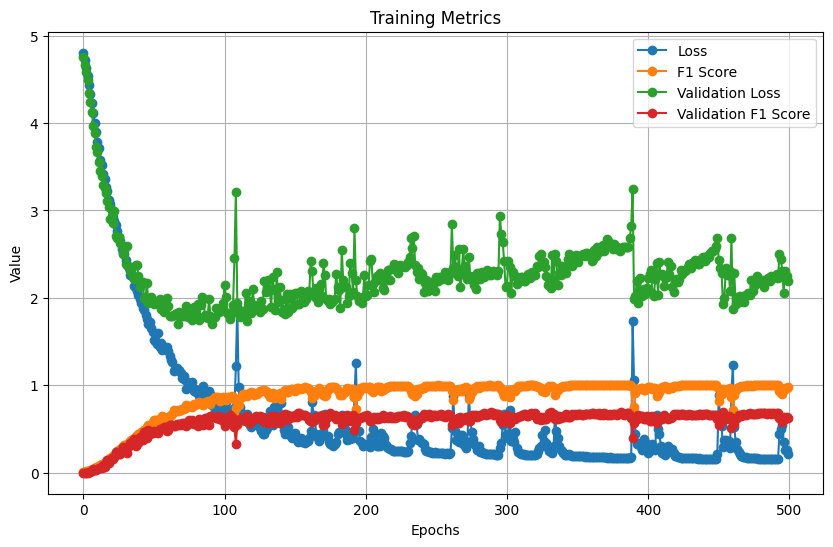

In [79]:
# Plotting
import matplotlib.pyplot as plt
epochs = range(0, 500)
plt.figure(figsize=(10, 6))
plt.plot(epochs, hist_df.loss, marker='o', label='Loss')
plt.plot(epochs, hist_df.f1_score, marker='o', label='F1 Score')
plt.plot(epochs, hist_df.val_loss, marker='o', label='Validation Loss')
plt.plot(epochs, hist_df.val_f1_score, marker='o', label='Validation F1 Score')
plt.title('Training Metrics')
plt.xlabel('Epochs')
plt.ylabel('Value')
plt.legend()
plt.grid()
plt.show()

In [80]:
reconstructed_model = tf.keras.models.load_model("3 LSTM")

In [81]:
reconstructed_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 130, 125)          262500    
                                                                 
 lstm_4 (LSTM)               (None, 130, 150)          165600    
                                                                 
 lstm_5 (LSTM)               (None, 150)               180600    
                                                                 
 dropout_2 (Dropout)         (None, 150)               0         
                                                                 
 dense_2 (Dense)             (None, 110)               16610     
                                                                 
 dropout_3 (Dropout)         (None, 110)               0         
                                                                 
 dense_3 (Dense)             (None, 50)               

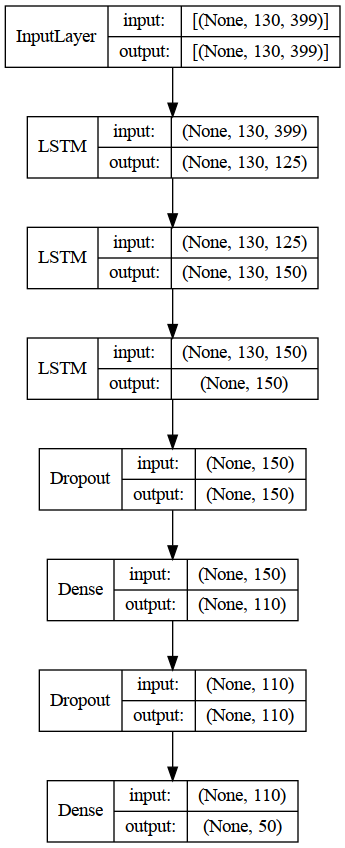

In [82]:
plot_model(reconstructed_model, show_shapes=True, show_layer_names=False)

In [83]:
reconstructed_model.evaluate(Xval,Yval)

11/11 [==============================] - 2s 28ms/step - loss: 2.1101 - f1_score: 0.6933


[2.1100780963897705, 0.6932531595230103]

In [84]:
print(classification_report(np.argmax(Yval, axis=1), np.argmax(reconstructed_model.predict(Xval), axis=1),
                            digits=3, target_names=label_map))

11/11 [==============================] - 2s 25ms/step
              precision    recall  f1-score   support

         AXE      1.000     0.875     0.933         8
    BACKPACK      0.750     1.000     0.857         6
  BASKETBALL      0.909     1.000     0.952        10
         BEE      0.750     0.600     0.667        10
        BELT      1.000     0.500     0.667         4
        BITE      1.000     0.750     0.857         8
   BREAKFAST      0.800     0.667     0.727         6
      CANCER      1.000     1.000     1.000         8
   CHRISTMAS      1.000     1.000     1.000         6
    CONFUSED      1.000     1.000     1.000         6
        DARK      1.000     1.000     1.000         4
        DEAF      0.400     0.333     0.364         6
      DECIDE      0.667     0.667     0.667         6
      DEMAND      1.000     0.875     0.933         8
     DEVELOP      1.000     0.333     0.500         6
      DINNER      0.800     0.500     0.615         8
         DOG      0.500    

In [156]:
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath='3 LSTM Mish/',
    monitor='val_f1_score',
    mode='max',
    save_best_only=True)

In [157]:
act_function = mish
model = Sequential()
model.add(LSTM(units=100,return_sequences=True,input_shape=(130,126),kernel_regularizer=regularizers.l2(.001193677363426901)))
model.add(LSTM(units=150,return_sequences=True,kernel_regularizer=regularizers.l2(.0010580771049089293)))
model.add(LSTM(units=200,return_sequences=False,kernel_regularizer=regularizers.l2(.00024654929327663945)))
model.add(Dropout(.75))
model.add(Dense(units=100,activation=act_function))
model.add(Dropout(.4))
model.add(Dense(50, activation='softmax'))
model.compile(tf.optimizers.experimental.Nadam(.000444805152602102),loss='categorical_crossentropy',
            metrics=[tfa.metrics.F1Score(num_classes=50, average='macro')])
model.summary()
History = model.fit(x=Xtrain, y=Ytrain,validation_data= (Xval,Yval), batch_size=96,epochs=500, verbose=1,callbacks=[model_checkpoint_callback])

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 130, 100)          90800     
                                                                 
 lstm_5 (LSTM)               (None, 130, 150)          150600    
                                                                 
 lstm_6 (LSTM)               (None, 200)               280800    
                                                                 
 dropout_6 (Dropout)         (None, 200)               0         
                                                                 
 dense_8 (Dense)             (None, 100)               20100     
                                                                 
 dropout_7 (Dropout)         (None, 100)               0         
                                                                 
 dense_9 (Dense)             (None, 50)               

INFO:tensorflow:Assets written to: 3 LSTM Mish/assets


INFO:tensorflow:Assets written to: 3 LSTM Mish/assets


28/28 [==============================] - 31s 852ms/step - loss: 4.3367 - f1_score: 0.0153 - val_loss: 4.2759 - val_f1_score: 7.1749e-04
Epoch 2/500
28/28 [==============================] - ETA: 0s - loss: 4.1975 - f1_score: 0.0213

INFO:tensorflow:Assets written to: 3 LSTM Mish/assets


INFO:tensorflow:Assets written to: 3 LSTM Mish/assets


28/28 [==============================] - 17s 637ms/step - loss: 4.1975 - f1_score: 0.0213 - val_loss: 4.0537 - val_f1_score: 0.0246
Epoch 3/500
28/28 [==============================] - 4s 133ms/step - loss: 3.9831 - f1_score: 0.0351 - val_loss: 3.7524 - val_f1_score: 0.0144
Epoch 4/500
28/28 [==============================] - ETA: 0s - loss: 3.7980 - f1_score: 0.0418

INFO:tensorflow:Assets written to: 3 LSTM Mish/assets


INFO:tensorflow:Assets written to: 3 LSTM Mish/assets


28/28 [==============================] - 18s 650ms/step - loss: 3.7980 - f1_score: 0.0418 - val_loss: 3.5918 - val_f1_score: 0.0387
Epoch 5/500
28/28 [==============================] - 4s 133ms/step - loss: 3.6447 - f1_score: 0.0541 - val_loss: 3.4083 - val_f1_score: 0.0387
Epoch 6/500
28/28 [==============================] - ETA: 0s - loss: 3.5324 - f1_score: 0.0664

INFO:tensorflow:Assets written to: 3 LSTM Mish/assets


INFO:tensorflow:Assets written to: 3 LSTM Mish/assets


28/28 [==============================] - 20s 730ms/step - loss: 3.5324 - f1_score: 0.0664 - val_loss: 3.2931 - val_f1_score: 0.0632
Epoch 7/500
28/28 [==============================] - ETA: 0s - loss: 3.4079 - f1_score: 0.0778

INFO:tensorflow:Assets written to: 3 LSTM Mish/assets


INFO:tensorflow:Assets written to: 3 LSTM Mish/assets


28/28 [==============================] - 18s 666ms/step - loss: 3.4079 - f1_score: 0.0778 - val_loss: 3.1455 - val_f1_score: 0.0737
Epoch 8/500
28/28 [==============================] - ETA: 0s - loss: 3.2921 - f1_score: 0.1000

INFO:tensorflow:Assets written to: 3 LSTM Mish/assets


INFO:tensorflow:Assets written to: 3 LSTM Mish/assets


28/28 [==============================] - 19s 685ms/step - loss: 3.2921 - f1_score: 0.1000 - val_loss: 3.0302 - val_f1_score: 0.1074
Epoch 9/500
28/28 [==============================] - ETA: 0s - loss: 3.1755 - f1_score: 0.1201

INFO:tensorflow:Assets written to: 3 LSTM Mish/assets


INFO:tensorflow:Assets written to: 3 LSTM Mish/assets


28/28 [==============================] - 18s 655ms/step - loss: 3.1755 - f1_score: 0.1201 - val_loss: 2.8957 - val_f1_score: 0.1105
Epoch 10/500
28/28 [==============================] - ETA: 0s - loss: 3.0955 - f1_score: 0.1477

INFO:tensorflow:Assets written to: 3 LSTM Mish/assets


INFO:tensorflow:Assets written to: 3 LSTM Mish/assets


28/28 [==============================] - 20s 722ms/step - loss: 3.0955 - f1_score: 0.1477 - val_loss: 2.8062 - val_f1_score: 0.1654
Epoch 11/500
28/28 [==============================] - ETA: 0s - loss: 3.0028 - f1_score: 0.1553

INFO:tensorflow:Assets written to: 3 LSTM Mish/assets


INFO:tensorflow:Assets written to: 3 LSTM Mish/assets


28/28 [==============================] - 18s 645ms/step - loss: 3.0028 - f1_score: 0.1553 - val_loss: 2.8445 - val_f1_score: 0.1778
Epoch 12/500
28/28 [==============================] - 4s 133ms/step - loss: 2.9226 - f1_score: 0.1782 - val_loss: 2.6667 - val_f1_score: 0.1752
Epoch 13/500
28/28 [==============================] - ETA: 0s - loss: 2.7878 - f1_score: 0.1976

INFO:tensorflow:Assets written to: 3 LSTM Mish/assets


INFO:tensorflow:Assets written to: 3 LSTM Mish/assets


28/28 [==============================] - 18s 644ms/step - loss: 2.7878 - f1_score: 0.1976 - val_loss: 2.5489 - val_f1_score: 0.2122
Epoch 14/500
28/28 [==============================] - ETA: 0s - loss: 2.7839 - f1_score: 0.1934

INFO:tensorflow:Assets written to: 3 LSTM Mish/assets


INFO:tensorflow:Assets written to: 3 LSTM Mish/assets


28/28 [==============================] - 19s 689ms/step - loss: 2.7839 - f1_score: 0.1934 - val_loss: 2.5441 - val_f1_score: 0.2372
Epoch 15/500
28/28 [==============================] - 4s 134ms/step - loss: 2.6704 - f1_score: 0.2305 - val_loss: 2.4836 - val_f1_score: 0.2246
Epoch 16/500
28/28 [==============================] - ETA: 0s - loss: 2.6081 - f1_score: 0.2280

INFO:tensorflow:Assets written to: 3 LSTM Mish/assets


INFO:tensorflow:Assets written to: 3 LSTM Mish/assets


28/28 [==============================] - 17s 641ms/step - loss: 2.6081 - f1_score: 0.2280 - val_loss: 2.3973 - val_f1_score: 0.2575
Epoch 17/500
28/28 [==============================] - 4s 133ms/step - loss: 2.5521 - f1_score: 0.2450 - val_loss: 2.5510 - val_f1_score: 0.2485
Epoch 18/500
28/28 [==============================] - ETA: 0s - loss: 2.4950 - f1_score: 0.2556

INFO:tensorflow:Assets written to: 3 LSTM Mish/assets


INFO:tensorflow:Assets written to: 3 LSTM Mish/assets


28/28 [==============================] - 19s 683ms/step - loss: 2.4950 - f1_score: 0.2556 - val_loss: 2.3750 - val_f1_score: 0.2934
Epoch 19/500
28/28 [==============================] - ETA: 0s - loss: 2.4326 - f1_score: 0.2845

INFO:tensorflow:Assets written to: 3 LSTM Mish/assets


INFO:tensorflow:Assets written to: 3 LSTM Mish/assets


28/28 [==============================] - 18s 655ms/step - loss: 2.4326 - f1_score: 0.2845 - val_loss: 2.3541 - val_f1_score: 0.3066
Epoch 20/500
28/28 [==============================] - ETA: 0s - loss: 2.4075 - f1_score: 0.2853

INFO:tensorflow:Assets written to: 3 LSTM Mish/assets


INFO:tensorflow:Assets written to: 3 LSTM Mish/assets


28/28 [==============================] - 19s 682ms/step - loss: 2.4075 - f1_score: 0.2853 - val_loss: 2.2772 - val_f1_score: 0.3510
Epoch 21/500
28/28 [==============================] - 4s 134ms/step - loss: 2.2908 - f1_score: 0.3184 - val_loss: 2.2182 - val_f1_score: 0.3330
Epoch 22/500
28/28 [==============================] - 4s 134ms/step - loss: 2.2753 - f1_score: 0.3213 - val_loss: 2.2168 - val_f1_score: 0.3473
Epoch 23/500
28/28 [==============================] - 4s 134ms/step - loss: 2.2426 - f1_score: 0.3276 - val_loss: 2.2251 - val_f1_score: 0.3205
Epoch 24/500
28/28 [==============================] - 4s 134ms/step - loss: 2.4026 - f1_score: 0.3055 - val_loss: 2.2909 - val_f1_score: 0.3097
Epoch 25/500
28/28 [==============================] - 4s 135ms/step - loss: 2.1836 - f1_score: 0.3413 - val_loss: 2.1599 - val_f1_score: 0.3504
Epoch 26/500
28/28 [==============================] - ETA: 0s - loss: 2.1147 - f1_score: 0.3757

INFO:tensorflow:Assets written to: 3 LSTM Mish/assets


INFO:tensorflow:Assets written to: 3 LSTM Mish/assets


28/28 [==============================] - 20s 741ms/step - loss: 2.1147 - f1_score: 0.3757 - val_loss: 2.0477 - val_f1_score: 0.3753
Epoch 27/500
28/28 [==============================] - 4s 134ms/step - loss: 2.0762 - f1_score: 0.3938 - val_loss: 2.1361 - val_f1_score: 0.3446
Epoch 28/500
28/28 [==============================] - ETA: 0s - loss: 2.0687 - f1_score: 0.3867

INFO:tensorflow:Assets written to: 3 LSTM Mish/assets


INFO:tensorflow:Assets written to: 3 LSTM Mish/assets


28/28 [==============================] - 19s 704ms/step - loss: 2.0687 - f1_score: 0.3867 - val_loss: 2.0365 - val_f1_score: 0.3950
Epoch 29/500
28/28 [==============================] - ETA: 0s - loss: 1.9699 - f1_score: 0.4232

INFO:tensorflow:Assets written to: 3 LSTM Mish/assets


INFO:tensorflow:Assets written to: 3 LSTM Mish/assets


28/28 [==============================] - 19s 701ms/step - loss: 1.9699 - f1_score: 0.4232 - val_loss: 1.9958 - val_f1_score: 0.4083
Epoch 30/500
28/28 [==============================] - 4s 133ms/step - loss: 1.9212 - f1_score: 0.4228 - val_loss: 2.0845 - val_f1_score: 0.3867
Epoch 31/500
28/28 [==============================] - ETA: 0s - loss: 1.8409 - f1_score: 0.4569

INFO:tensorflow:Assets written to: 3 LSTM Mish/assets


INFO:tensorflow:Assets written to: 3 LSTM Mish/assets


28/28 [==============================] - 18s 680ms/step - loss: 1.8409 - f1_score: 0.4569 - val_loss: 2.0316 - val_f1_score: 0.4107
Epoch 32/500
28/28 [==============================] - ETA: 0s - loss: 1.8740 - f1_score: 0.4471

INFO:tensorflow:Assets written to: 3 LSTM Mish/assets


INFO:tensorflow:Assets written to: 3 LSTM Mish/assets


28/28 [==============================] - 17s 629ms/step - loss: 1.8740 - f1_score: 0.4471 - val_loss: 1.8827 - val_f1_score: 0.4509
Epoch 33/500
28/28 [==============================] - 4s 133ms/step - loss: 1.8336 - f1_score: 0.4574 - val_loss: 2.0237 - val_f1_score: 0.4167
Epoch 34/500
28/28 [==============================] - 4s 134ms/step - loss: 1.9595 - f1_score: 0.4290 - val_loss: 2.0884 - val_f1_score: 0.4158
Epoch 35/500
28/28 [==============================] - ETA: 0s - loss: 1.8201 - f1_score: 0.4684

INFO:tensorflow:Assets written to: 3 LSTM Mish/assets


INFO:tensorflow:Assets written to: 3 LSTM Mish/assets


28/28 [==============================] - 18s 676ms/step - loss: 1.8201 - f1_score: 0.4684 - val_loss: 1.8831 - val_f1_score: 0.4510
Epoch 36/500
28/28 [==============================] - ETA: 0s - loss: 1.7561 - f1_score: 0.4710

INFO:tensorflow:Assets written to: 3 LSTM Mish/assets


INFO:tensorflow:Assets written to: 3 LSTM Mish/assets


28/28 [==============================] - 18s 669ms/step - loss: 1.7561 - f1_score: 0.4710 - val_loss: 1.8482 - val_f1_score: 0.4870
Epoch 37/500
28/28 [==============================] - 4s 134ms/step - loss: 1.6655 - f1_score: 0.5024 - val_loss: 1.9030 - val_f1_score: 0.4798
Epoch 38/500
28/28 [==============================] - ETA: 0s - loss: 1.5975 - f1_score: 0.5336

INFO:tensorflow:Assets written to: 3 LSTM Mish/assets


INFO:tensorflow:Assets written to: 3 LSTM Mish/assets


28/28 [==============================] - 19s 689ms/step - loss: 1.5975 - f1_score: 0.5336 - val_loss: 1.7531 - val_f1_score: 0.5141
Epoch 39/500
28/28 [==============================] - 4s 134ms/step - loss: 1.5719 - f1_score: 0.5300 - val_loss: 1.9193 - val_f1_score: 0.5106
Epoch 40/500
28/28 [==============================] - 4s 135ms/step - loss: 1.6650 - f1_score: 0.5177 - val_loss: 2.0274 - val_f1_score: 0.4568
Epoch 41/500
28/28 [==============================] - 4s 134ms/step - loss: 1.5247 - f1_score: 0.5445 - val_loss: 1.7485 - val_f1_score: 0.5117
Epoch 42/500
28/28 [==============================] - ETA: 0s - loss: 1.6194 - f1_score: 0.5293

INFO:tensorflow:Assets written to: 3 LSTM Mish/assets


INFO:tensorflow:Assets written to: 3 LSTM Mish/assets


28/28 [==============================] - 19s 698ms/step - loss: 1.6194 - f1_score: 0.5293 - val_loss: 1.7350 - val_f1_score: 0.5266
Epoch 43/500
28/28 [==============================] - ETA: 0s - loss: 1.5928 - f1_score: 0.5338

INFO:tensorflow:Assets written to: 3 LSTM Mish/assets


INFO:tensorflow:Assets written to: 3 LSTM Mish/assets


28/28 [==============================] - 19s 687ms/step - loss: 1.5928 - f1_score: 0.5338 - val_loss: 1.7078 - val_f1_score: 0.5374
Epoch 44/500
28/28 [==============================] - 4s 134ms/step - loss: 1.5727 - f1_score: 0.5534 - val_loss: 1.9181 - val_f1_score: 0.4821
Epoch 45/500
28/28 [==============================] - ETA: 0s - loss: 1.6040 - f1_score: 0.5321

INFO:tensorflow:Assets written to: 3 LSTM Mish/assets


INFO:tensorflow:Assets written to: 3 LSTM Mish/assets


28/28 [==============================] - 18s 657ms/step - loss: 1.6040 - f1_score: 0.5321 - val_loss: 1.6000 - val_f1_score: 0.5581
Epoch 46/500
28/28 [==============================] - 4s 134ms/step - loss: 1.6124 - f1_score: 0.5277 - val_loss: 1.9106 - val_f1_score: 0.4827
Epoch 47/500
28/28 [==============================] - ETA: 0s - loss: 1.4313 - f1_score: 0.5779

INFO:tensorflow:Assets written to: 3 LSTM Mish/assets


INFO:tensorflow:Assets written to: 3 LSTM Mish/assets


28/28 [==============================] - 18s 675ms/step - loss: 1.4313 - f1_score: 0.5779 - val_loss: 1.6515 - val_f1_score: 0.5614
Epoch 48/500
28/28 [==============================] - ETA: 0s - loss: 1.3980 - f1_score: 0.5914

INFO:tensorflow:Assets written to: 3 LSTM Mish/assets


INFO:tensorflow:Assets written to: 3 LSTM Mish/assets


28/28 [==============================] - 18s 667ms/step - loss: 1.3980 - f1_score: 0.5914 - val_loss: 1.6156 - val_f1_score: 0.5809
Epoch 49/500
28/28 [==============================] - 4s 133ms/step - loss: 1.5352 - f1_score: 0.5625 - val_loss: 1.5706 - val_f1_score: 0.5654
Epoch 50/500
28/28 [==============================] - ETA: 0s - loss: 1.3724 - f1_score: 0.6065

INFO:tensorflow:Assets written to: 3 LSTM Mish/assets


INFO:tensorflow:Assets written to: 3 LSTM Mish/assets


28/28 [==============================] - 19s 682ms/step - loss: 1.3724 - f1_score: 0.6065 - val_loss: 1.5786 - val_f1_score: 0.5837
Epoch 51/500
28/28 [==============================] - 4s 133ms/step - loss: 1.3659 - f1_score: 0.6050 - val_loss: 1.7371 - val_f1_score: 0.5569
Epoch 52/500
28/28 [==============================] - 4s 134ms/step - loss: 1.2931 - f1_score: 0.6342 - val_loss: 1.6433 - val_f1_score: 0.5721
Epoch 53/500
28/28 [==============================] - 4s 134ms/step - loss: 1.2008 - f1_score: 0.6588 - val_loss: 1.7824 - val_f1_score: 0.5414
Epoch 54/500
28/28 [==============================] - ETA: 0s - loss: 1.2632 - f1_score: 0.6454

INFO:tensorflow:Assets written to: 3 LSTM Mish/assets


INFO:tensorflow:Assets written to: 3 LSTM Mish/assets


28/28 [==============================] - 19s 712ms/step - loss: 1.2632 - f1_score: 0.6454 - val_loss: 1.6047 - val_f1_score: 0.5862
Epoch 55/500
28/28 [==============================] - ETA: 0s - loss: 1.1711 - f1_score: 0.6639

INFO:tensorflow:Assets written to: 3 LSTM Mish/assets


INFO:tensorflow:Assets written to: 3 LSTM Mish/assets


28/28 [==============================] - 18s 665ms/step - loss: 1.1711 - f1_score: 0.6639 - val_loss: 1.5292 - val_f1_score: 0.6213
Epoch 56/500
28/28 [==============================] - 4s 134ms/step - loss: 1.1628 - f1_score: 0.6793 - val_loss: 1.6858 - val_f1_score: 0.6139
Epoch 57/500
28/28 [==============================] - ETA: 0s - loss: 1.1854 - f1_score: 0.6641

INFO:tensorflow:Assets written to: 3 LSTM Mish/assets


INFO:tensorflow:Assets written to: 3 LSTM Mish/assets


28/28 [==============================] - 20s 718ms/step - loss: 1.1854 - f1_score: 0.6641 - val_loss: 1.5353 - val_f1_score: 0.6371
Epoch 58/500
28/28 [==============================] - 4s 134ms/step - loss: 1.4205 - f1_score: 0.6132 - val_loss: 2.0381 - val_f1_score: 0.5335
Epoch 59/500
28/28 [==============================] - 4s 134ms/step - loss: 1.3520 - f1_score: 0.6252 - val_loss: 1.7245 - val_f1_score: 0.5892
Epoch 60/500
28/28 [==============================] - 4s 134ms/step - loss: 1.3058 - f1_score: 0.6452 - val_loss: 1.7952 - val_f1_score: 0.5376
Epoch 61/500
28/28 [==============================] - 4s 134ms/step - loss: 1.1421 - f1_score: 0.6874 - val_loss: 1.6404 - val_f1_score: 0.6016
Epoch 62/500
28/28 [==============================] - 4s 136ms/step - loss: 1.1034 - f1_score: 0.6969 - val_loss: 1.7404 - val_f1_score: 0.6078
Epoch 63/500
28/28 [==============================] - ETA: 0s - loss: 1.0972 - f1_score: 0.7004

INFO:tensorflow:Assets written to: 3 LSTM Mish/assets


INFO:tensorflow:Assets written to: 3 LSTM Mish/assets


28/28 [==============================] - 20s 730ms/step - loss: 1.0972 - f1_score: 0.7004 - val_loss: 1.6282 - val_f1_score: 0.6494
Epoch 64/500
28/28 [==============================] - 4s 134ms/step - loss: 1.1668 - f1_score: 0.6823 - val_loss: 1.5163 - val_f1_score: 0.6141
Epoch 65/500
28/28 [==============================] - 4s 134ms/step - loss: 1.1656 - f1_score: 0.6873 - val_loss: 1.6319 - val_f1_score: 0.6298
Epoch 66/500
28/28 [==============================] - 4s 135ms/step - loss: 1.0980 - f1_score: 0.7034 - val_loss: 1.4468 - val_f1_score: 0.6414
Epoch 67/500
28/28 [==============================] - 4s 136ms/step - loss: 1.1018 - f1_score: 0.7026 - val_loss: 1.7032 - val_f1_score: 0.6031
Epoch 68/500
28/28 [==============================] - 4s 136ms/step - loss: 1.2129 - f1_score: 0.6791 - val_loss: 1.5329 - val_f1_score: 0.6243
Epoch 69/500
28/28 [==============================] - ETA: 0s - loss: 0.9956 - f1_score: 0.7238

INFO:tensorflow:Assets written to: 3 LSTM Mish/assets


INFO:tensorflow:Assets written to: 3 LSTM Mish/assets


28/28 [==============================] - 20s 734ms/step - loss: 0.9956 - f1_score: 0.7238 - val_loss: 1.5112 - val_f1_score: 0.6552
Epoch 70/500
28/28 [==============================] - 4s 134ms/step - loss: 0.9358 - f1_score: 0.7534 - val_loss: 1.5127 - val_f1_score: 0.6372
Epoch 71/500
28/28 [==============================] - 4s 134ms/step - loss: 0.9093 - f1_score: 0.7554 - val_loss: 1.6647 - val_f1_score: 0.6474
Epoch 72/500
28/28 [==============================] - 4s 135ms/step - loss: 0.9718 - f1_score: 0.7450 - val_loss: 1.6672 - val_f1_score: 0.6206
Epoch 73/500
28/28 [==============================] - 4s 136ms/step - loss: 1.0338 - f1_score: 0.7313 - val_loss: 1.7085 - val_f1_score: 0.6412
Epoch 74/500
28/28 [==============================] - 4s 137ms/step - loss: 1.1498 - f1_score: 0.6975 - val_loss: 1.7726 - val_f1_score: 0.6124
Epoch 75/500
28/28 [==============================] - 4s 137ms/step - loss: 1.1169 - f1_score: 0.7111 - val_loss: 1.5646 - val_f1_score: 0.6281
Epoc

INFO:tensorflow:Assets written to: 3 LSTM Mish/assets


INFO:tensorflow:Assets written to: 3 LSTM Mish/assets


28/28 [==============================] - 21s 760ms/step - loss: 1.1301 - f1_score: 0.7049 - val_loss: 1.5401 - val_f1_score: 0.6699
Epoch 78/500
28/28 [==============================] - ETA: 0s - loss: 0.9899 - f1_score: 0.7369

INFO:tensorflow:Assets written to: 3 LSTM Mish/assets


INFO:tensorflow:Assets written to: 3 LSTM Mish/assets


28/28 [==============================] - 19s 689ms/step - loss: 0.9899 - f1_score: 0.7369 - val_loss: 1.3795 - val_f1_score: 0.6918
Epoch 79/500
28/28 [==============================] - 4s 134ms/step - loss: 0.9980 - f1_score: 0.7438 - val_loss: 1.6176 - val_f1_score: 0.6634
Epoch 80/500
28/28 [==============================] - 4s 134ms/step - loss: 0.9249 - f1_score: 0.7522 - val_loss: 1.6151 - val_f1_score: 0.6309
Epoch 81/500
28/28 [==============================] - 4s 134ms/step - loss: 0.8473 - f1_score: 0.7747 - val_loss: 1.6790 - val_f1_score: 0.6767
Epoch 82/500
28/28 [==============================] - 4s 136ms/step - loss: 0.8916 - f1_score: 0.7710 - val_loss: 1.7031 - val_f1_score: 0.6634
Epoch 83/500
28/28 [==============================] - 4s 137ms/step - loss: 0.9357 - f1_score: 0.7673 - val_loss: 1.6011 - val_f1_score: 0.6598
Epoch 84/500
28/28 [==============================] - 4s 136ms/step - loss: 0.8551 - f1_score: 0.7757 - val_loss: 1.5925 - val_f1_score: 0.6608
Epoc

INFO:tensorflow:Assets written to: 3 LSTM Mish/assets


INFO:tensorflow:Assets written to: 3 LSTM Mish/assets


28/28 [==============================] - 22s 803ms/step - loss: 0.7780 - f1_score: 0.8135 - val_loss: 1.4970 - val_f1_score: 0.6957
Epoch 88/500
28/28 [==============================] - ETA: 0s - loss: 0.7155 - f1_score: 0.8275

INFO:tensorflow:Assets written to: 3 LSTM Mish/assets


INFO:tensorflow:Assets written to: 3 LSTM Mish/assets


28/28 [==============================] - 18s 649ms/step - loss: 0.7155 - f1_score: 0.8275 - val_loss: 1.5347 - val_f1_score: 0.7006
Epoch 89/500
28/28 [==============================] - ETA: 0s - loss: 0.7080 - f1_score: 0.8297

INFO:tensorflow:Assets written to: 3 LSTM Mish/assets


INFO:tensorflow:Assets written to: 3 LSTM Mish/assets


28/28 [==============================] - 19s 714ms/step - loss: 0.7080 - f1_score: 0.8297 - val_loss: 1.4962 - val_f1_score: 0.7186
Epoch 90/500
28/28 [==============================] - 4s 133ms/step - loss: 0.6766 - f1_score: 0.8292 - val_loss: 1.5410 - val_f1_score: 0.6922
Epoch 91/500
28/28 [==============================] - 4s 134ms/step - loss: 0.6416 - f1_score: 0.8442 - val_loss: 1.5722 - val_f1_score: 0.6955
Epoch 92/500
28/28 [==============================] - 4s 134ms/step - loss: 0.8231 - f1_score: 0.7987 - val_loss: 1.6049 - val_f1_score: 0.7033
Epoch 93/500
28/28 [==============================] - 4s 135ms/step - loss: 0.7334 - f1_score: 0.8274 - val_loss: 1.7257 - val_f1_score: 0.6684
Epoch 94/500
28/28 [==============================] - 4s 135ms/step - loss: 0.7531 - f1_score: 0.8217 - val_loss: 1.8323 - val_f1_score: 0.6430
Epoch 95/500
28/28 [==============================] - 4s 137ms/step - loss: 0.8350 - f1_score: 0.7947 - val_loss: 2.3244 - val_f1_score: 0.5535
Epoc

INFO:tensorflow:Assets written to: 3 LSTM Mish/assets


INFO:tensorflow:Assets written to: 3 LSTM Mish/assets


28/28 [==============================] - 23s 859ms/step - loss: 0.5819 - f1_score: 0.8817 - val_loss: 1.6240 - val_f1_score: 0.7452
Epoch 119/500
28/28 [==============================] - 4s 135ms/step - loss: 0.5398 - f1_score: 0.8898 - val_loss: 1.5526 - val_f1_score: 0.7379
Epoch 120/500
28/28 [==============================] - 4s 136ms/step - loss: 0.5094 - f1_score: 0.9060 - val_loss: 1.6153 - val_f1_score: 0.7247
Epoch 121/500
28/28 [==============================] - 4s 137ms/step - loss: 0.4853 - f1_score: 0.9073 - val_loss: 1.6155 - val_f1_score: 0.7285
Epoch 122/500
28/28 [==============================] - 4s 138ms/step - loss: 0.5030 - f1_score: 0.8869 - val_loss: 1.6644 - val_f1_score: 0.7306
Epoch 123/500
28/28 [==============================] - 4s 138ms/step - loss: 0.5048 - f1_score: 0.8938 - val_loss: 1.7685 - val_f1_score: 0.7155
Epoch 124/500
28/28 [==============================] - 4s 140ms/step - loss: 0.7924 - f1_score: 0.8267 - val_loss: 1.9527 - val_f1_score: 0.641

INFO:tensorflow:Assets written to: 3 LSTM Mish/assets


INFO:tensorflow:Assets written to: 3 LSTM Mish/assets


28/28 [==============================] - 23s 852ms/step - loss: 0.5071 - f1_score: 0.9008 - val_loss: 1.6144 - val_f1_score: 0.7576
Epoch 149/500
28/28 [==============================] - 4s 134ms/step - loss: 0.5858 - f1_score: 0.8777 - val_loss: 1.9284 - val_f1_score: 0.6904
Epoch 150/500
28/28 [==============================] - 4s 136ms/step - loss: 0.6157 - f1_score: 0.8729 - val_loss: 1.7412 - val_f1_score: 0.7341
Epoch 151/500
28/28 [==============================] - 4s 136ms/step - loss: 0.6185 - f1_score: 0.8792 - val_loss: 1.8846 - val_f1_score: 0.7050
Epoch 152/500
28/28 [==============================] - 4s 139ms/step - loss: 0.5766 - f1_score: 0.8905 - val_loss: 1.7725 - val_f1_score: 0.7385
Epoch 153/500
28/28 [==============================] - 4s 138ms/step - loss: 0.4987 - f1_score: 0.9075 - val_loss: 1.7094 - val_f1_score: 0.7349
Epoch 154/500
28/28 [==============================] - 4s 139ms/step - loss: 0.4883 - f1_score: 0.9117 - val_loss: 1.7592 - val_f1_score: 0.719

INFO:tensorflow:Assets written to: 3 LSTM Mish/assets


INFO:tensorflow:Assets written to: 3 LSTM Mish/assets


28/28 [==============================] - 23s 851ms/step - loss: 0.4749 - f1_score: 0.9076 - val_loss: 1.6524 - val_f1_score: 0.7638
Epoch 167/500
28/28 [==============================] - 4s 134ms/step - loss: 0.5285 - f1_score: 0.9091 - val_loss: 1.8642 - val_f1_score: 0.7032
Epoch 168/500
28/28 [==============================] - 4s 136ms/step - loss: 0.5838 - f1_score: 0.8886 - val_loss: 1.5774 - val_f1_score: 0.7443
Epoch 169/500
28/28 [==============================] - 4s 137ms/step - loss: 0.5785 - f1_score: 0.8850 - val_loss: 1.7408 - val_f1_score: 0.7269
Epoch 170/500
28/28 [==============================] - 4s 138ms/step - loss: 0.5196 - f1_score: 0.9068 - val_loss: 1.7270 - val_f1_score: 0.7287
Epoch 171/500
28/28 [==============================] - 4s 138ms/step - loss: 0.4501 - f1_score: 0.9175 - val_loss: 1.6635 - val_f1_score: 0.7377
Epoch 172/500
28/28 [==============================] - 4s 140ms/step - loss: 0.4922 - f1_score: 0.9111 - val_loss: 1.6578 - val_f1_score: 0.763

INFO:tensorflow:Assets written to: 3 LSTM Mish/assets


INFO:tensorflow:Assets written to: 3 LSTM Mish/assets


28/28 [==============================] - 25s 904ms/step - loss: 0.4597 - f1_score: 0.9221 - val_loss: 1.4621 - val_f1_score: 0.7879
Epoch 178/500
28/28 [==============================] - 4s 134ms/step - loss: 0.3534 - f1_score: 0.9466 - val_loss: 1.6160 - val_f1_score: 0.7628
Epoch 179/500
28/28 [==============================] - 4s 136ms/step - loss: 0.3305 - f1_score: 0.9630 - val_loss: 1.7044 - val_f1_score: 0.7764
Epoch 180/500
28/28 [==============================] - 4s 137ms/step - loss: 0.3588 - f1_score: 0.9465 - val_loss: 1.6092 - val_f1_score: 0.7712
Epoch 181/500
28/28 [==============================] - 4s 139ms/step - loss: 0.3298 - f1_score: 0.9556 - val_loss: 1.5983 - val_f1_score: 0.7700
Epoch 182/500
28/28 [==============================] - 4s 139ms/step - loss: 0.3155 - f1_score: 0.9554 - val_loss: 1.6656 - val_f1_score: 0.7777
Epoch 183/500
28/28 [==============================] - 4s 140ms/step - loss: 0.2972 - f1_score: 0.9634 - val_loss: 1.6161 - val_f1_score: 0.762

INFO:tensorflow:Assets written to: 3 LSTM Mish/assets


INFO:tensorflow:Assets written to: 3 LSTM Mish/assets


28/28 [==============================] - 22s 823ms/step - loss: 0.3213 - f1_score: 0.9584 - val_loss: 1.6084 - val_f1_score: 0.7882
Epoch 187/500
28/28 [==============================] - 4s 135ms/step - loss: 0.3293 - f1_score: 0.9573 - val_loss: 1.9600 - val_f1_score: 0.7567
Epoch 188/500
28/28 [==============================] - 4s 135ms/step - loss: 0.3739 - f1_score: 0.9520 - val_loss: 1.7940 - val_f1_score: 0.7671
Epoch 189/500
28/28 [==============================] - 4s 137ms/step - loss: 0.6413 - f1_score: 0.8937 - val_loss: 2.5614 - val_f1_score: 0.6129
Epoch 190/500
28/28 [==============================] - 4s 138ms/step - loss: 1.0301 - f1_score: 0.8096 - val_loss: 1.8257 - val_f1_score: 0.7392
Epoch 191/500
28/28 [==============================] - 4s 139ms/step - loss: 0.6876 - f1_score: 0.8637 - val_loss: 1.7472 - val_f1_score: 0.7801
Epoch 192/500
28/28 [==============================] - 4s 139ms/step - loss: 0.6300 - f1_score: 0.8735 - val_loss: 1.5542 - val_f1_score: 0.747

INFO:tensorflow:Assets written to: 3 LSTM Mish/assets


INFO:tensorflow:Assets written to: 3 LSTM Mish/assets


28/28 [==============================] - 25s 911ms/step - loss: 0.3069 - f1_score: 0.9648 - val_loss: 1.5850 - val_f1_score: 0.7967
Epoch 226/500
28/28 [==============================] - 4s 134ms/step - loss: 0.2799 - f1_score: 0.9745 - val_loss: 1.7402 - val_f1_score: 0.7802
Epoch 227/500
28/28 [==============================] - 4s 136ms/step - loss: 0.2807 - f1_score: 0.9692 - val_loss: 1.8148 - val_f1_score: 0.7807
Epoch 228/500
28/28 [==============================] - 4s 140ms/step - loss: 0.3125 - f1_score: 0.9648 - val_loss: 1.8145 - val_f1_score: 0.7359
Epoch 229/500
28/28 [==============================] - 4s 140ms/step - loss: 0.3045 - f1_score: 0.9643 - val_loss: 1.7062 - val_f1_score: 0.7737
Epoch 230/500
28/28 [==============================] - 4s 139ms/step - loss: 0.3281 - f1_score: 0.9574 - val_loss: 1.9755 - val_f1_score: 0.7529
Epoch 231/500
28/28 [==============================] - 4s 141ms/step - loss: 0.3659 - f1_score: 0.9490 - val_loss: 1.7360 - val_f1_score: 0.750

28/28 [==============================] - 4s 142ms/step - loss: 0.3453 - f1_score: 0.9574 - val_loss: 1.9516 - val_f1_score: 0.7379
Epoch 338/500
28/28 [==============================] - 4s 142ms/step - loss: 0.2822 - f1_score: 0.9688 - val_loss: 1.6589 - val_f1_score: 0.7706
Epoch 339/500
28/28 [==============================] - 4s 143ms/step - loss: 0.2202 - f1_score: 0.9856 - val_loss: 1.6625 - val_f1_score: 0.7673
Epoch 340/500
28/28 [==============================] - 4s 142ms/step - loss: 0.2707 - f1_score: 0.9756 - val_loss: 1.7158 - val_f1_score: 0.7508
Epoch 341/500
28/28 [==============================] - 4s 142ms/step - loss: 0.2648 - f1_score: 0.9726 - val_loss: 1.8105 - val_f1_score: 0.7668
Epoch 342/500
28/28 [==============================] - 4s 142ms/step - loss: 0.2416 - f1_score: 0.9806 - val_loss: 1.9424 - val_f1_score: 0.7646
Epoch 343/500
28/28 [==============================] - 4s 143ms/step - loss: 0.2159 - f1_score: 0.9849 - val_loss: 1.8255 - val_f1_score: 0.7737

28/28 [==============================] - 4s 144ms/step - loss: 0.1738 - f1_score: 0.9943 - val_loss: 2.1686 - val_f1_score: 0.7748
Epoch 450/500
28/28 [==============================] - 4s 143ms/step - loss: 0.1691 - f1_score: 0.9944 - val_loss: 2.0794 - val_f1_score: 0.7718
Epoch 451/500
28/28 [==============================] - 4s 141ms/step - loss: 0.1662 - f1_score: 0.9934 - val_loss: 2.0729 - val_f1_score: 0.7771
Epoch 452/500
28/28 [==============================] - 4s 142ms/step - loss: 0.1649 - f1_score: 0.9966 - val_loss: 2.1268 - val_f1_score: 0.7629
Epoch 453/500
28/28 [==============================] - 4s 144ms/step - loss: 0.1640 - f1_score: 0.9954 - val_loss: 2.1065 - val_f1_score: 0.7689
Epoch 454/500
28/28 [==============================] - 4s 142ms/step - loss: 0.1615 - f1_score: 0.9958 - val_loss: 2.2486 - val_f1_score: 0.7685
Epoch 455/500
28/28 [==============================] - 4s 142ms/step - loss: 0.1565 - f1_score: 0.9974 - val_loss: 2.2508 - val_f1_score: 0.7758

In [158]:
print(classification_report(np.argmax(Yval, axis=1), np.argmax(model.predict(Xval), axis=1),
                            digits=3, target_names=label_map))

11/11 [==============================] - 1s 24ms/step
              precision    recall  f1-score   support

         AXE      0.857     0.750     0.800         8
    BACKPACK      0.667     0.667     0.667         6
  BASKETBALL      1.000     1.000     1.000        10
         BEE      1.000     0.500     0.667        10
        BELT      0.571     1.000     0.727         4
        BITE      0.800     1.000     0.889         8
   BREAKFAST      0.500     0.833     0.625         6
      CANCER      0.778     0.875     0.824         8
   CHRISTMAS      1.000     0.667     0.800         6
    CONFUSED      0.833     0.833     0.833         6
        DARK      0.571     1.000     0.727         4
        DEAF      1.000     0.833     0.909         6
      DECIDE      1.000     0.833     0.909         6
      DEMAND      0.571     0.500     0.533         8
     DEVELOP      0.500     0.833     0.625         6
      DINNER      0.857     0.750     0.800         8
         DOG      1.000    

In [159]:
# convert the history.history dict to a pandas DataFrame:     
hist_df = pd.DataFrame(History.history) 

# or save to csv: 
hist_csv_file = '3 LSTM Mish/history.csv'
with open(hist_csv_file, mode='w') as f:
    hist_df.to_csv(f)

In [160]:
hist_df.tail()

loss  f1_score  val_loss  val_f1_score
495  0.256774  0.976858  1.845698      0.784855
496  0.250452  0.973964  1.926719      0.781251
497  0.194068  0.987445  1.929809      0.745021
498  0.220057  0.981873  1.836230      0.776544
499  0.210036  0.985330  1.872778      0.779381

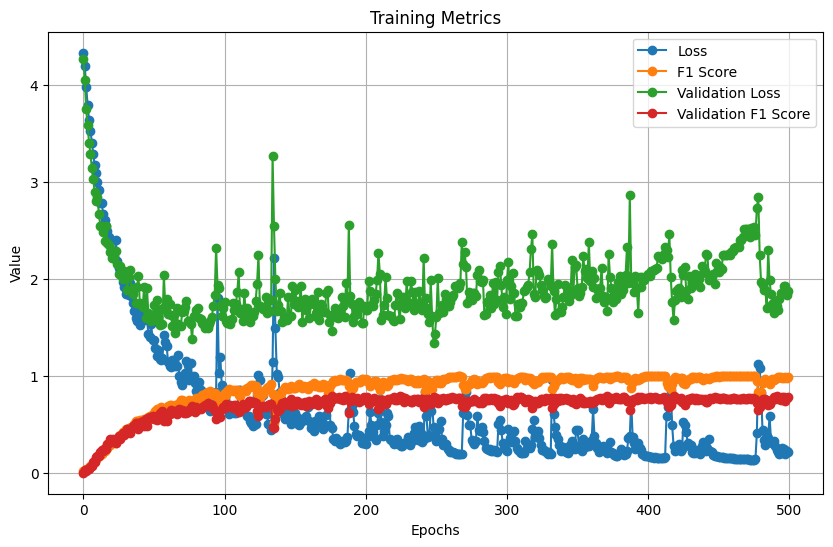

In [161]:
# Plotting
import matplotlib.pyplot as plt
epochs = range(0, 500)
plt.figure(figsize=(10, 6))
plt.plot(epochs, hist_df.loss, marker='o', label='Loss')
plt.plot(epochs, hist_df.f1_score, marker='o', label='F1 Score')
plt.plot(epochs, hist_df.val_loss, marker='o', label='Validation Loss')
plt.plot(epochs, hist_df.val_f1_score, marker='o', label='Validation F1 Score')
plt.title('Training Metrics')
plt.xlabel('Epochs')
plt.ylabel('Value')
plt.legend()
plt.grid()
plt.show()

In [173]:
reconstructed_model = tf.keras.models.load_model("3 LSTM Mish")

In [174]:
reconstructed_model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 130, 100)          90800     
                                                                 
 lstm_5 (LSTM)               (None, 130, 150)          150600    
                                                                 
 lstm_6 (LSTM)               (None, 200)               280800    
                                                                 
 dropout_6 (Dropout)         (None, 200)               0         
                                                                 
 dense_8 (Dense)             (None, 100)               20100     
                                                                 
 dropout_7 (Dropout)         (None, 100)               0         
                                                                 
 dense_9 (Dense)             (None, 50)               

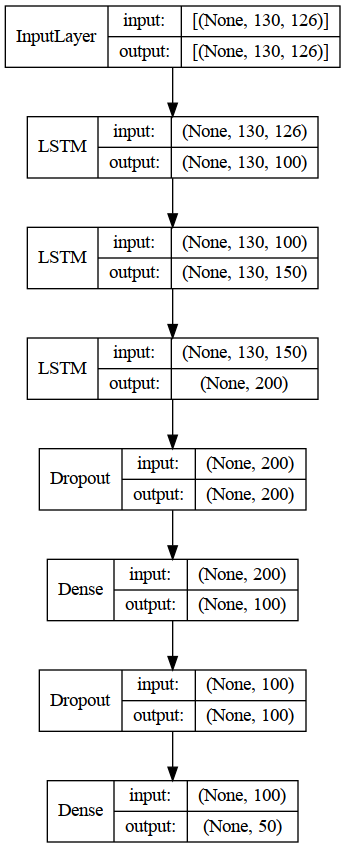

In [175]:
plot_model(reconstructed_model, show_shapes=True, show_layer_names=False)

In [176]:
reconstructed_model.evaluate(Xval,Yval)

11/11 [==============================] - 1s 25ms/step - loss: 1.5850 - f1_score: 0.7967


[1.5850355625152588, 0.7967425584793091]

In [165]:
print(classification_report(np.argmax(Yval, axis=1), np.argmax(reconstructed_model.predict(Xval), axis=1),
                            digits=3, target_names=label_map))

11/11 [==============================] - 1s 23ms/step
              precision    recall  f1-score   support

         AXE      1.000     0.750     0.857         8
    BACKPACK      1.000     0.667     0.800         6
  BASKETBALL      0.909     1.000     0.952        10
         BEE      0.833     0.500     0.625        10
        BELT      0.800     1.000     0.889         4
        BITE      0.889     1.000     0.941         8
   BREAKFAST      0.545     1.000     0.706         6
      CANCER      0.857     0.750     0.800         8
   CHRISTMAS      1.000     0.667     0.800         6
    CONFUSED      1.000     1.000     1.000         6
        DARK      0.571     1.000     0.727         4
        DEAF      0.857     1.000     0.923         6
      DECIDE      1.000     1.000     1.000         6
      DEMAND      0.600     0.750     0.667         8
     DEVELOP      0.571     0.667     0.615         6
      DINNER      0.667     0.750     0.706         8
         DOG      0.857    

## Hyperparameter Tunning 1 1D CNN Layer

In [121]:
from tensorflow.keras import regularizers
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout, SpatialDropout1D, GRU
import keras_tuner
from keras_tuner import HyperModel
from kerastuner.tuners import Hyperband
from tensorflow.keras.callbacks import EarlyStopping
import tensorflow_addons as tfa

class HyperModel(HyperModel):
    def __init__(self, input_shape, num_classes):
        self.input_shape = input_shape
        self.num_classes = num_classes

    def build(self, hp):
        act_function = hp.Choice('dense_activation',values=['selu','mish','gelu','elu','relu'],default='gelu')
        model = Sequential()
        model.add(Conv1D(filters=hp.Int('filters_1',min_value=50,max_value=200,step=25,default=150),
                         kernel_size=hp.Choice('kernel_1',values=[2,3,4,5,6,7,8,9,10,15,20],default=2,),
                         activation=act_function,input_shape=self.input_shape))
        model.add(MaxPooling1D(pool_size=hp.Choice('pool_1',values=[2,3,4,5,6,7,8,9,10],default=2,)))
        model.add(Dropout(rate=hp.Float('dropout_1',min_value=0.0,max_value=0.9,default=0.75,step=0.05,)))
        model.add(Flatten())        
        model.add(Dense(units=hp.Int('units_2',min_value=70,max_value=120,step=10,default=90),activation=act_function))
        model.add(Dropout(rate=hp.Float('dropout_2',min_value=0.0,max_value=0.9,default=0.5,step=0.05,)))        
        model.add(Dense(self.num_classes, activation='softmax'))

        model.compile(tf.optimizers.experimental.Nadam(hp.Float('learning_rate',min_value=1e-4,
                                                                max_value=1e-2,sampling='LOG',
                                                                default=.0032857440370174544)),
            loss='categorical_crossentropy',
            metrics=[tfa.metrics.F1Score(num_classes=50, average='macro')]
        )
        return model

hypermodel = HyperModel(input_shape=(130,399), num_classes=50)

/tmp/ipykernel_392689/1204949271.py:5: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
  from kerastuner.tuners import Hyperband


In [122]:
HYPERBAND_MAX_EPOCHS = 300
#MAX_TRIALS = 20
EXECUTION_PER_TRIAL = 2

tuner = Hyperband(
    hypermodel,
    max_epochs=HYPERBAND_MAX_EPOCHS,
    objective=keras_tuner.Objective("val_f1_score", direction="max"),
    seed=10,
    executions_per_trial=EXECUTION_PER_TRIAL,
    directory='/media/kristian/HDD/ASL_Citizen/RTMPose-L/hyperband/',
    project_name='1_1D_CNN',
    overwrite=False)

INFO:tensorflow:Reloading Tuner from /media/kristian/HDD/ASL_Citizen/RTMPose-L/hyperband/1_1D_CNN/tuner0.json


In [123]:
tuner.search_space_summary()

Search space summary
Default search space size: 8
dense_activation (Choice)
{'default': 'gelu', 'conditions': [], 'values': ['selu', 'mish', 'gelu', 'elu', 'relu'], 'ordered': False}
num_filters_1 (Choice)
{'default': 150, 'conditions': [], 'values': [100, 125, 150, 200], 'ordered': True}
kernel_1 (Choice)
{'default': 2, 'conditions': [], 'values': [2, 3, 4, 5, 6, 7, 8, 9, 10, 15, 20], 'ordered': True}
pool_1 (Choice)
{'default': 2, 'conditions': [], 'values': [2, 3, 4, 5, 6, 7, 8, 9, 10], 'ordered': True}
dropout_1 (Float)
{'default': 0.75, 'conditions': [], 'min_value': 0.0, 'max_value': 0.9, 'step': 0.05, 'sampling': 'linear'}
units_2 (Int)
{'default': 90, 'conditions': [], 'min_value': 70, 'max_value': 120, 'step': 10, 'sampling': 'linear'}
dropout_2 (Float)
{'default': 0.5, 'conditions': [], 'min_value': 0.0, 'max_value': 0.9, 'step': 0.05, 'sampling': 'linear'}
learning_rate (Float)
{'default': 0.0032857440370174544, 'conditions': [], 'min_value': 0.0001, 'max_value': 0.01, 'step

In [124]:
es = EarlyStopping(monitor="val_f1_score",patience=30,restore_best_weights=True,mode="max")

In [125]:
tuner.search(Xtrain, Ytrain, epochs=1000, validation_data=(Xval,Yval),batch_size=96,callbacks=[es])

Trial 707 Complete [00h 05m 16s]
val_f1_score: 0.38449089229106903

Best val_f1_score So Far: 0.5334144830703735
Total elapsed time: 01h 56m 46s

Search: Running Trial #708

Value             |Best Value So Far |Hyperparameter
gelu              |elu               |dense_activation
100               |150               |num_filters_1
15                |2                 |kernel_1
5                 |10                |pool_1
0.6               |0.55              |dropout_1
100               |110               |units_2
0.8               |0.55              |dropout_2
0.00018583        |0.00043076        |learning_rate
100               |300               |tuner/epochs
0                 |100               |tuner/initial_epoch
1                 |3                 |tuner/bracket
0                 |3                 |tuner/round

Epoch 1/100
28/28 [==============================] - 6s 94ms/step - loss: 4.0176 - f1_score: 0.0209 - val_loss: 3.9115 - val_f1_score: 0.0069
Epoch 2/100
28/28 [=======

KeyboardInterrupt: 

In [120]:
tuner.results_summary()

Results summary
Results in /media/kristian/HDD/ASL_Citizen/Mediapipe/hyperband/1_1D_CNN
Showing 10 best trials
Objective(name="val_f1_score", direction="max")

Trial 0714 summary
Hyperparameters:
dense_activation: selu
num_filters_1: 100
kernel_1: 10
pool_1: 10
dropout_1: 0.45
units_2: 70
dropout_2: 0.5
learning_rate: 0.0035029559985702272
tuner/epochs: 300
tuner/initial_epoch: 100
tuner/bracket: 1
tuner/round: 1
tuner/trial_id: 0713
Score: 0.7464006841182709

Trial 0713 summary
Hyperparameters:
dense_activation: selu
num_filters_1: 100
kernel_1: 10
pool_1: 10
dropout_1: 0.45
units_2: 70
dropout_2: 0.5
learning_rate: 0.0035029559985702272
tuner/epochs: 100
tuner/initial_epoch: 0
tuner/bracket: 1
tuner/round: 0
Score: 0.7242861092090607

Trial 0715 summary
Hyperparameters:
dense_activation: LeakyReLU
num_filters_1: 100
kernel_1: 20
pool_1: 7
dropout_1: 0.6000000000000001
units_2: 90
dropout_2: 0.55
learning_rate: 0.0003524383570201
tuner/epochs: 300
tuner/initial_epoch: 100
tuner/bracke

In [117]:
best_model = tuner.get_best_models(num_models=1)[0]

2023-09-03 10:05:45.574909: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-09-03 10:05:45.648642: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1616] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 1517 MB memory:  -> device: 0, name: NVIDIA GeForce MX250, pci bus id: 0000:01:00.0, compute capability: 6.1


In [121]:
best_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 121, 100)          126100    
                                                                 
 max_pooling1d (MaxPooling1D  (None, 12, 100)          0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 12, 100)           0         
                                                                 
 flatten (Flatten)           (None, 1200)              0         
                                                                 
 dense (Dense)               (None, 70)                84070     
                                                                 
 dropout_1 (Dropout)         (None, 70)                0         
                                                        

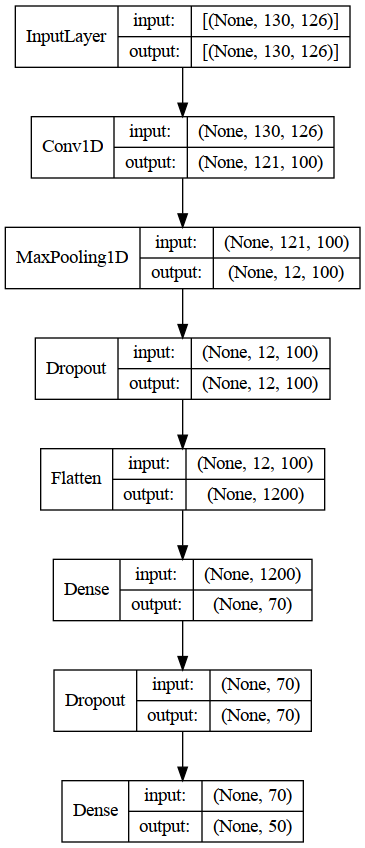

In [119]:
plot_model(best_model, show_shapes=True, show_layer_names=False)

In [122]:
loss, accuracy = best_model.evaluate(Xval, Yval)

11/11 [==============================] - 0s 6ms/step - loss: 1.4759 - f1_score: 0.7478


In [123]:
print(classification_report(np.argmax(Yval, axis=1), np.argmax(best_model.predict(Xval), axis=1),
                            digits=3, target_names=label_map))

11/11 [==============================] - 0s 6ms/step
              precision    recall  f1-score   support

         AXE      0.833     0.625     0.714         8
    BACKPACK      0.667     1.000     0.800         6
  BASKETBALL      0.800     0.800     0.800        10
         BEE      1.000     0.500     0.667        10
        BELT      1.000     0.500     0.667         4
        BITE      0.700     0.875     0.778         8
   BREAKFAST      0.308     0.667     0.421         6
      CANCER      1.000     1.000     1.000         8
   CHRISTMAS      0.500     0.500     0.500         6
    CONFUSED      0.833     0.833     0.833         6
        DARK      0.800     1.000     0.889         4
        DEAF      0.667     1.000     0.800         6
      DECIDE      1.000     0.667     0.800         6
      DEMAND      1.000     0.375     0.545         8
     DEVELOP      0.600     0.500     0.545         6
      DINNER      0.500     0.625     0.556         8
         DOG      1.000     

In [124]:
bestHP = tuner.get_best_hyperparameters(num_trials=10)[0]

In [125]:
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath='1 1DCNN/',
    monitor='val_f1_score',
    mode='max',
    save_best_only=True)

In [126]:
print("[INFO] training the best model...")
model = tuner.hypermodel.build(bestHP)
History = model.fit(x=Xtrain, y=Ytrain,validation_data= (Xval,Yval), batch_size=96,epochs=500, verbose=1,callbacks=[model_checkpoint_callback])
#History = model.fit(x=Xtrain, y=Ytrain,validation_data= (Xval,Yval), batch_size=96,epochs=500, verbose=1)

[INFO] training the best model...
Epoch 1/500
28/28 [==============================] - ETA: 0s - loss: 4.4406 - f1_score: 0.0304

INFO:tensorflow:Assets written to: 1 1DCNN/assets


INFO:tensorflow:Assets written to: 1 1DCNN/assets


28/28 [==============================] - 11s 347ms/step - loss: 4.4406 - f1_score: 0.0304 - val_loss: 3.6752 - val_f1_score: 0.0638
Epoch 2/500
28/28 [==============================] - ETA: 0s - loss: 3.7862 - f1_score: 0.0777

INFO:tensorflow:Assets written to: 1 1DCNN/assets


INFO:tensorflow:Assets written to: 1 1DCNN/assets


28/28 [==============================] - 4s 132ms/step - loss: 3.7862 - f1_score: 0.0777 - val_loss: 3.0992 - val_f1_score: 0.1466
Epoch 3/500
28/28 [==============================] - ETA: 0s - loss: 3.3070 - f1_score: 0.1529

INFO:tensorflow:Assets written to: 1 1DCNN/assets


INFO:tensorflow:Assets written to: 1 1DCNN/assets


28/28 [==============================] - 21s 787ms/step - loss: 3.3070 - f1_score: 0.1529 - val_loss: 2.7186 - val_f1_score: 0.2576
Epoch 4/500
28/28 [==============================] - ETA: 0s - loss: 2.9024 - f1_score: 0.2119

INFO:tensorflow:Assets written to: 1 1DCNN/assets


INFO:tensorflow:Assets written to: 1 1DCNN/assets


28/28 [==============================] - 4s 162ms/step - loss: 2.9024 - f1_score: 0.2119 - val_loss: 2.2875 - val_f1_score: 0.3504
Epoch 5/500
28/28 [==============================] - ETA: 0s - loss: 2.5796 - f1_score: 0.2806

INFO:tensorflow:Assets written to: 1 1DCNN/assets


INFO:tensorflow:Assets written to: 1 1DCNN/assets


28/28 [==============================] - 4s 151ms/step - loss: 2.5796 - f1_score: 0.2806 - val_loss: 2.2330 - val_f1_score: 0.3674
Epoch 6/500
28/28 [==============================] - ETA: 0s - loss: 2.3524 - f1_score: 0.3361

INFO:tensorflow:Assets written to: 1 1DCNN/assets


INFO:tensorflow:Assets written to: 1 1DCNN/assets


28/28 [==============================] - 4s 147ms/step - loss: 2.3524 - f1_score: 0.3361 - val_loss: 2.0604 - val_f1_score: 0.4321
Epoch 7/500
28/28 [==============================] - ETA: 0s - loss: 2.1339 - f1_score: 0.3817

INFO:tensorflow:Assets written to: 1 1DCNN/assets


INFO:tensorflow:Assets written to: 1 1DCNN/assets


28/28 [==============================] - 4s 139ms/step - loss: 2.1339 - f1_score: 0.3817 - val_loss: 1.8068 - val_f1_score: 0.5109
Epoch 8/500
28/28 [==============================] - 1s 24ms/step - loss: 2.0215 - f1_score: 0.4217 - val_loss: 1.7940 - val_f1_score: 0.4954
Epoch 9/500
28/28 [==============================] - ETA: 0s - loss: 1.9324 - f1_score: 0.4211

INFO:tensorflow:Assets written to: 1 1DCNN/assets


INFO:tensorflow:Assets written to: 1 1DCNN/assets


28/28 [==============================] - 3s 125ms/step - loss: 1.9324 - f1_score: 0.4211 - val_loss: 1.6847 - val_f1_score: 0.5289
Epoch 10/500
28/28 [==============================] - ETA: 0s - loss: 1.8624 - f1_score: 0.4561

INFO:tensorflow:Assets written to: 1 1DCNN/assets


INFO:tensorflow:Assets written to: 1 1DCNN/assets


28/28 [==============================] - 4s 144ms/step - loss: 1.8624 - f1_score: 0.4561 - val_loss: 1.6488 - val_f1_score: 0.5624
Epoch 11/500
28/28 [==============================] - 1s 24ms/step - loss: 1.7641 - f1_score: 0.4896 - val_loss: 1.6194 - val_f1_score: 0.5611
Epoch 12/500
28/28 [==============================] - 1s 24ms/step - loss: 1.6562 - f1_score: 0.5093 - val_loss: 1.6605 - val_f1_score: 0.5566
Epoch 13/500
28/28 [==============================] - ETA: 0s - loss: 1.6502 - f1_score: 0.5053

INFO:tensorflow:Assets written to: 1 1DCNN/assets


INFO:tensorflow:Assets written to: 1 1DCNN/assets


28/28 [==============================] - 4s 132ms/step - loss: 1.6502 - f1_score: 0.5053 - val_loss: 1.5313 - val_f1_score: 0.5764
Epoch 14/500
28/28 [==============================] - ETA: 0s - loss: 1.6045 - f1_score: 0.5137

INFO:tensorflow:Assets written to: 1 1DCNN/assets


INFO:tensorflow:Assets written to: 1 1DCNN/assets


28/28 [==============================] - 5s 166ms/step - loss: 1.6045 - f1_score: 0.5137 - val_loss: 1.4559 - val_f1_score: 0.5923
Epoch 15/500
28/28 [==============================] - 1s 24ms/step - loss: 1.5584 - f1_score: 0.5267 - val_loss: 1.5960 - val_f1_score: 0.5680
Epoch 16/500
28/28 [==============================] - 1s 24ms/step - loss: 1.5305 - f1_score: 0.5315 - val_loss: 1.5677 - val_f1_score: 0.5814
Epoch 17/500
28/28 [==============================] - ETA: 0s - loss: 1.4971 - f1_score: 0.5524

INFO:tensorflow:Assets written to: 1 1DCNN/assets


INFO:tensorflow:Assets written to: 1 1DCNN/assets


28/28 [==============================] - 4s 135ms/step - loss: 1.4971 - f1_score: 0.5524 - val_loss: 1.5194 - val_f1_score: 0.6062
Epoch 18/500
28/28 [==============================] - 1s 24ms/step - loss: 1.5216 - f1_score: 0.5477 - val_loss: 1.4761 - val_f1_score: 0.6058
Epoch 19/500
28/28 [==============================] - 1s 24ms/step - loss: 1.4641 - f1_score: 0.5647 - val_loss: 1.4997 - val_f1_score: 0.5641
Epoch 20/500
28/28 [==============================] - 1s 24ms/step - loss: 1.4193 - f1_score: 0.5643 - val_loss: 1.5123 - val_f1_score: 0.5889
Epoch 21/500
28/28 [==============================] - ETA: 0s - loss: 1.3654 - f1_score: 0.5827

INFO:tensorflow:Assets written to: 1 1DCNN/assets


INFO:tensorflow:Assets written to: 1 1DCNN/assets


28/28 [==============================] - 3s 127ms/step - loss: 1.3654 - f1_score: 0.5827 - val_loss: 1.4519 - val_f1_score: 0.6070
Epoch 22/500
28/28 [==============================] - 1s 24ms/step - loss: 1.3645 - f1_score: 0.5830 - val_loss: 1.5425 - val_f1_score: 0.5570
Epoch 23/500
28/28 [==============================] - 1s 24ms/step - loss: 1.3530 - f1_score: 0.5776 - val_loss: 1.4030 - val_f1_score: 0.6048
Epoch 24/500
28/28 [==============================] - 1s 24ms/step - loss: 1.3108 - f1_score: 0.5989 - val_loss: 1.4262 - val_f1_score: 0.6013
Epoch 25/500
28/28 [==============================] - ETA: 0s - loss: 1.3400 - f1_score: 0.5844

INFO:tensorflow:Assets written to: 1 1DCNN/assets


INFO:tensorflow:Assets written to: 1 1DCNN/assets


28/28 [==============================] - 4s 132ms/step - loss: 1.3400 - f1_score: 0.5844 - val_loss: 1.4139 - val_f1_score: 0.6289
Epoch 26/500
28/28 [==============================] - 1s 24ms/step - loss: 1.2813 - f1_score: 0.6040 - val_loss: 1.4940 - val_f1_score: 0.6125
Epoch 27/500
28/28 [==============================] - 1s 24ms/step - loss: 1.2541 - f1_score: 0.6205 - val_loss: 1.4604 - val_f1_score: 0.5945
Epoch 28/500
28/28 [==============================] - 1s 24ms/step - loss: 1.2739 - f1_score: 0.6076 - val_loss: 1.4522 - val_f1_score: 0.6098
Epoch 29/500
28/28 [==============================] - 1s 24ms/step - loss: 1.2154 - f1_score: 0.6310 - val_loss: 1.4315 - val_f1_score: 0.6108
Epoch 30/500
28/28 [==============================] - ETA: 0s - loss: 1.2018 - f1_score: 0.6333

INFO:tensorflow:Assets written to: 1 1DCNN/assets


INFO:tensorflow:Assets written to: 1 1DCNN/assets


28/28 [==============================] - 4s 135ms/step - loss: 1.2018 - f1_score: 0.6333 - val_loss: 1.3422 - val_f1_score: 0.6302
Epoch 31/500
28/28 [==============================] - 1s 24ms/step - loss: 1.2647 - f1_score: 0.6144 - val_loss: 1.3980 - val_f1_score: 0.6300
Epoch 32/500
28/28 [==============================] - ETA: 0s - loss: 1.2106 - f1_score: 0.6272

INFO:tensorflow:Assets written to: 1 1DCNN/assets


INFO:tensorflow:Assets written to: 1 1DCNN/assets


28/28 [==============================] - 4s 141ms/step - loss: 1.2106 - f1_score: 0.6272 - val_loss: 1.4123 - val_f1_score: 0.6377
Epoch 33/500
28/28 [==============================] - 1s 24ms/step - loss: 1.1619 - f1_score: 0.6490 - val_loss: 1.3553 - val_f1_score: 0.6257
Epoch 34/500
28/28 [==============================] - 1s 24ms/step - loss: 1.1701 - f1_score: 0.6439 - val_loss: 1.4408 - val_f1_score: 0.6297
Epoch 35/500
28/28 [==============================] - 1s 25ms/step - loss: 1.1439 - f1_score: 0.6526 - val_loss: 1.4497 - val_f1_score: 0.6332
Epoch 36/500
28/28 [==============================] - ETA: 0s - loss: 1.1626 - f1_score: 0.6399

INFO:tensorflow:Assets written to: 1 1DCNN/assets


INFO:tensorflow:Assets written to: 1 1DCNN/assets


28/28 [==============================] - 4s 147ms/step - loss: 1.1626 - f1_score: 0.6399 - val_loss: 1.4671 - val_f1_score: 0.6400
Epoch 37/500
28/28 [==============================] - 1s 24ms/step - loss: 1.1403 - f1_score: 0.6557 - val_loss: 1.4448 - val_f1_score: 0.6282
Epoch 38/500
28/28 [==============================] - 1s 24ms/step - loss: 1.1813 - f1_score: 0.6359 - val_loss: 1.4910 - val_f1_score: 0.6121
Epoch 39/500
28/28 [==============================] - 1s 24ms/step - loss: 1.1221 - f1_score: 0.6481 - val_loss: 1.3832 - val_f1_score: 0.6328
Epoch 40/500
28/28 [==============================] - ETA: 0s - loss: 1.1468 - f1_score: 0.6432

INFO:tensorflow:Assets written to: 1 1DCNN/assets


INFO:tensorflow:Assets written to: 1 1DCNN/assets


28/28 [==============================] - 4s 133ms/step - loss: 1.1468 - f1_score: 0.6432 - val_loss: 1.3764 - val_f1_score: 0.6574
Epoch 41/500
28/28 [==============================] - 1s 24ms/step - loss: 1.1151 - f1_score: 0.6566 - val_loss: 1.4349 - val_f1_score: 0.6411
Epoch 42/500
28/28 [==============================] - 1s 24ms/step - loss: 1.1413 - f1_score: 0.6577 - val_loss: 1.3555 - val_f1_score: 0.6501
Epoch 43/500
28/28 [==============================] - ETA: 0s - loss: 1.0142 - f1_score: 0.6856

INFO:tensorflow:Assets written to: 1 1DCNN/assets


INFO:tensorflow:Assets written to: 1 1DCNN/assets


28/28 [==============================] - 4s 131ms/step - loss: 1.0142 - f1_score: 0.6856 - val_loss: 1.2465 - val_f1_score: 0.6831
Epoch 44/500
28/28 [==============================] - 1s 24ms/step - loss: 1.1070 - f1_score: 0.6666 - val_loss: 1.3705 - val_f1_score: 0.6819
Epoch 45/500
28/28 [==============================] - 1s 24ms/step - loss: 1.0216 - f1_score: 0.6881 - val_loss: 1.4545 - val_f1_score: 0.6647
Epoch 46/500
28/28 [==============================] - 1s 24ms/step - loss: 1.0694 - f1_score: 0.6779 - val_loss: 1.4131 - val_f1_score: 0.6677
Epoch 47/500
28/28 [==============================] - 1s 24ms/step - loss: 1.0647 - f1_score: 0.6597 - val_loss: 1.4139 - val_f1_score: 0.6678
Epoch 48/500
28/28 [==============================] - 1s 24ms/step - loss: 1.0480 - f1_score: 0.6718 - val_loss: 1.4443 - val_f1_score: 0.6304
Epoch 49/500
28/28 [==============================] - ETA: 0s - loss: 1.0724 - f1_score: 0.6655

INFO:tensorflow:Assets written to: 1 1DCNN/assets


INFO:tensorflow:Assets written to: 1 1DCNN/assets


28/28 [==============================] - 3s 119ms/step - loss: 1.0724 - f1_score: 0.6655 - val_loss: 1.2522 - val_f1_score: 0.6850
Epoch 50/500
28/28 [==============================] - ETA: 0s - loss: 1.0718 - f1_score: 0.6725

INFO:tensorflow:Assets written to: 1 1DCNN/assets


INFO:tensorflow:Assets written to: 1 1DCNN/assets


28/28 [==============================] - 4s 134ms/step - loss: 1.0718 - f1_score: 0.6725 - val_loss: 1.4434 - val_f1_score: 0.6896
Epoch 51/500
28/28 [==============================] - ETA: 0s - loss: 1.0273 - f1_score: 0.6865

INFO:tensorflow:Assets written to: 1 1DCNN/assets


INFO:tensorflow:Assets written to: 1 1DCNN/assets


28/28 [==============================] - 4s 145ms/step - loss: 1.0273 - f1_score: 0.6865 - val_loss: 1.2994 - val_f1_score: 0.6955
Epoch 52/500
28/28 [==============================] - 1s 24ms/step - loss: 1.0356 - f1_score: 0.6875 - val_loss: 1.3426 - val_f1_score: 0.6660
Epoch 53/500
28/28 [==============================] - 1s 24ms/step - loss: 1.0525 - f1_score: 0.6830 - val_loss: 1.3359 - val_f1_score: 0.6555
Epoch 54/500
28/28 [==============================] - 1s 24ms/step - loss: 1.0395 - f1_score: 0.6784 - val_loss: 1.4521 - val_f1_score: 0.6161
Epoch 55/500
28/28 [==============================] - 1s 24ms/step - loss: 1.0373 - f1_score: 0.6820 - val_loss: 1.3650 - val_f1_score: 0.6477
Epoch 56/500
28/28 [==============================] - 1s 24ms/step - loss: 1.0345 - f1_score: 0.6791 - val_loss: 1.3554 - val_f1_score: 0.6932
Epoch 57/500
28/28 [==============================] - 1s 24ms/step - loss: 1.0526 - f1_score: 0.6815 - val_loss: 1.2702 - val_f1_score: 0.6784
Epoch 58/50

INFO:tensorflow:Assets written to: 1 1DCNN/assets


INFO:tensorflow:Assets written to: 1 1DCNN/assets


28/28 [==============================] - 4s 129ms/step - loss: 1.0444 - f1_score: 0.6866 - val_loss: 1.3440 - val_f1_score: 0.7029
Epoch 59/500
28/28 [==============================] - 1s 24ms/step - loss: 1.0656 - f1_score: 0.6743 - val_loss: 1.3254 - val_f1_score: 0.6965
Epoch 60/500
28/28 [==============================] - 1s 24ms/step - loss: 0.9754 - f1_score: 0.6905 - val_loss: 1.3868 - val_f1_score: 0.7022
Epoch 61/500
28/28 [==============================] - 1s 24ms/step - loss: 1.0183 - f1_score: 0.6878 - val_loss: 1.3687 - val_f1_score: 0.6927
Epoch 62/500
28/28 [==============================] - 1s 24ms/step - loss: 0.9561 - f1_score: 0.6947 - val_loss: 1.4497 - val_f1_score: 0.6672
Epoch 63/500
28/28 [==============================] - 1s 24ms/step - loss: 0.9881 - f1_score: 0.6905 - val_loss: 1.5446 - val_f1_score: 0.6564
Epoch 64/500
28/28 [==============================] - ETA: 0s - loss: 1.0049 - f1_score: 0.6988

INFO:tensorflow:Assets written to: 1 1DCNN/assets


INFO:tensorflow:Assets written to: 1 1DCNN/assets


28/28 [==============================] - 4s 133ms/step - loss: 1.0049 - f1_score: 0.6988 - val_loss: 1.3465 - val_f1_score: 0.7151
Epoch 65/500
28/28 [==============================] - 1s 26ms/step - loss: 1.0429 - f1_score: 0.6759 - val_loss: 1.3753 - val_f1_score: 0.6825
Epoch 66/500
28/28 [==============================] - 1s 24ms/step - loss: 0.9736 - f1_score: 0.6985 - val_loss: 1.4221 - val_f1_score: 0.6913
Epoch 67/500
28/28 [==============================] - 1s 24ms/step - loss: 1.0046 - f1_score: 0.6920 - val_loss: 1.4095 - val_f1_score: 0.6685
Epoch 68/500
28/28 [==============================] - 1s 24ms/step - loss: 0.9314 - f1_score: 0.7046 - val_loss: 1.4122 - val_f1_score: 0.6747
Epoch 69/500
28/28 [==============================] - 1s 24ms/step - loss: 0.9492 - f1_score: 0.7054 - val_loss: 1.5021 - val_f1_score: 0.6606
Epoch 70/500
28/28 [==============================] - 1s 24ms/step - loss: 0.9331 - f1_score: 0.7152 - val_loss: 1.4133 - val_f1_score: 0.6889
Epoch 71/50

INFO:tensorflow:Assets written to: 1 1DCNN/assets


INFO:tensorflow:Assets written to: 1 1DCNN/assets


28/28 [==============================] - 4s 159ms/step - loss: 0.9163 - f1_score: 0.7223 - val_loss: 1.4814 - val_f1_score: 0.7187
Epoch 78/500
28/28 [==============================] - 1s 24ms/step - loss: 0.9489 - f1_score: 0.7124 - val_loss: 1.4240 - val_f1_score: 0.7086
Epoch 79/500
28/28 [==============================] - 1s 24ms/step - loss: 0.9057 - f1_score: 0.7182 - val_loss: 1.3682 - val_f1_score: 0.6901
Epoch 80/500
28/28 [==============================] - 1s 24ms/step - loss: 0.8883 - f1_score: 0.7361 - val_loss: 1.4101 - val_f1_score: 0.6980
Epoch 81/500
28/28 [==============================] - 1s 24ms/step - loss: 0.8858 - f1_score: 0.7287 - val_loss: 1.4702 - val_f1_score: 0.6647
Epoch 82/500
28/28 [==============================] - 1s 24ms/step - loss: 0.9352 - f1_score: 0.7102 - val_loss: 1.3280 - val_f1_score: 0.7119
Epoch 83/500
28/28 [==============================] - 1s 24ms/step - loss: 0.9260 - f1_score: 0.7230 - val_loss: 1.4874 - val_f1_score: 0.6876
Epoch 84/50

INFO:tensorflow:Assets written to: 1 1DCNN/assets


INFO:tensorflow:Assets written to: 1 1DCNN/assets


28/28 [==============================] - 4s 143ms/step - loss: 0.8486 - f1_score: 0.7345 - val_loss: 1.5887 - val_f1_score: 0.7382
Epoch 90/500
28/28 [==============================] - 1s 24ms/step - loss: 0.9307 - f1_score: 0.7226 - val_loss: 1.4209 - val_f1_score: 0.7184
Epoch 91/500
28/28 [==============================] - 1s 24ms/step - loss: 0.8478 - f1_score: 0.7383 - val_loss: 1.4814 - val_f1_score: 0.7215
Epoch 92/500
28/28 [==============================] - 1s 24ms/step - loss: 0.8779 - f1_score: 0.7264 - val_loss: 1.4144 - val_f1_score: 0.7057
Epoch 93/500
28/28 [==============================] - 1s 24ms/step - loss: 0.8871 - f1_score: 0.7227 - val_loss: 1.5668 - val_f1_score: 0.6943
Epoch 94/500
28/28 [==============================] - 1s 24ms/step - loss: 0.9789 - f1_score: 0.7219 - val_loss: 1.5858 - val_f1_score: 0.7298
Epoch 95/500
28/28 [==============================] - 1s 24ms/step - loss: 0.9284 - f1_score: 0.7191 - val_loss: 1.7354 - val_f1_score: 0.6370
Epoch 96/50

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=100.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



28/28 [==============================] - 1s 24ms/step - loss: 0.8090 - f1_score: 0.7600 - val_loss: 1.5515 - val_f1_score: 0.7061
Epoch 137/500
28/28 [==============================] - 1s 24ms/step - loss: 0.8140 - f1_score: 0.7550 - val_loss: 1.5907 - val_f1_score: 0.7014
Epoch 138/500
28/28 [==============================] - 1s 25ms/step - loss: 0.8475 - f1_score: 0.7584 - val_loss: 1.5979 - val_f1_score: 0.7271
Epoch 139/500
28/28 [==============================] - 1s 24ms/step - loss: 0.8658 - f1_score: 0.7593 - val_loss: 1.4797 - val_f1_score: 0.6953
Epoch 140/500
28/28 [==============================] - 1s 25ms/step - loss: 0.8488 - f1_score: 0.7534 - val_loss: 1.6301 - val_f1_score: 0.7243
Epoch 141/500
28/28 [==============================] - 1s 24ms/step - loss: 0.7969 - f1_score: 0.7633 - val_loss: 1.5072 - val_f1_score: 0.7222
Epoch 142/500
28/28 [==============================] - 1s 24ms/step - loss: 0.7535 - f1_score: 0.7653 - val_loss: 1.4955 - val_f1_score: 0.7296
Epoch 

INFO:tensorflow:Assets written to: 1 1DCNN/assets


INFO:tensorflow:Assets written to: 1 1DCNN/assets


28/28 [==============================] - 3s 117ms/step - loss: 0.8551 - f1_score: 0.7596 - val_loss: 1.4633 - val_f1_score: 0.7544
Epoch 146/500
28/28 [==============================] - 1s 24ms/step - loss: 0.8314 - f1_score: 0.7605 - val_loss: 1.6783 - val_f1_score: 0.7215
Epoch 147/500
28/28 [==============================] - 1s 24ms/step - loss: 0.8130 - f1_score: 0.7485 - val_loss: 1.6861 - val_f1_score: 0.7340
Epoch 148/500
28/28 [==============================] - 1s 24ms/step - loss: 0.8150 - f1_score: 0.7591 - val_loss: 1.5629 - val_f1_score: 0.7300
Epoch 149/500
28/28 [==============================] - 1s 24ms/step - loss: 0.8255 - f1_score: 0.7609 - val_loss: 1.5859 - val_f1_score: 0.6848
Epoch 150/500
28/28 [==============================] - 1s 24ms/step - loss: 0.7902 - f1_score: 0.7540 - val_loss: 1.7546 - val_f1_score: 0.7053
Epoch 151/500
28/28 [==============================] - 1s 24ms/step - loss: 0.7822 - f1_score: 0.7528 - val_loss: 1.6265 - val_f1_score: 0.7357
Epoch

INFO:tensorflow:Assets written to: 1 1DCNN/assets


INFO:tensorflow:Assets written to: 1 1DCNN/assets


28/28 [==============================] - 5s 195ms/step - loss: 0.7645 - f1_score: 0.7861 - val_loss: 1.7450 - val_f1_score: 0.7567
Epoch 195/500
28/28 [==============================] - 1s 24ms/step - loss: 0.7753 - f1_score: 0.7640 - val_loss: 1.8489 - val_f1_score: 0.7324
Epoch 196/500
28/28 [==============================] - 1s 24ms/step - loss: 0.8219 - f1_score: 0.7589 - val_loss: 1.7937 - val_f1_score: 0.7065
Epoch 197/500
28/28 [==============================] - 1s 24ms/step - loss: 0.7996 - f1_score: 0.7770 - val_loss: 1.7314 - val_f1_score: 0.7400
Epoch 198/500
28/28 [==============================] - 1s 24ms/step - loss: 0.7353 - f1_score: 0.7778 - val_loss: 1.8827 - val_f1_score: 0.7174
Epoch 199/500
28/28 [==============================] - 1s 24ms/step - loss: 0.8228 - f1_score: 0.7704 - val_loss: 1.8733 - val_f1_score: 0.6932
Epoch 200/500
28/28 [==============================] - 1s 24ms/step - loss: 0.8065 - f1_score: 0.7715 - val_loss: 1.7951 - val_f1_score: 0.6994
Epoch

INFO:tensorflow:Assets written to: 1 1DCNN/assets


INFO:tensorflow:Assets written to: 1 1DCNN/assets


28/28 [==============================] - 4s 147ms/step - loss: 0.7723 - f1_score: 0.7777 - val_loss: 1.8961 - val_f1_score: 0.7605
Epoch 207/500
28/28 [==============================] - 1s 24ms/step - loss: 0.7504 - f1_score: 0.7852 - val_loss: 1.7969 - val_f1_score: 0.7216
Epoch 208/500
28/28 [==============================] - 1s 24ms/step - loss: 0.7940 - f1_score: 0.7804 - val_loss: 2.1246 - val_f1_score: 0.7324
Epoch 209/500
28/28 [==============================] - 1s 24ms/step - loss: 0.8306 - f1_score: 0.7645 - val_loss: 1.9001 - val_f1_score: 0.7340
Epoch 210/500
28/28 [==============================] - 1s 24ms/step - loss: 0.8346 - f1_score: 0.7628 - val_loss: 1.8109 - val_f1_score: 0.7224
Epoch 211/500
28/28 [==============================] - 1s 24ms/step - loss: 0.8166 - f1_score: 0.7674 - val_loss: 1.9349 - val_f1_score: 0.7417
Epoch 212/500
28/28 [==============================] - 1s 25ms/step - loss: 0.7731 - f1_score: 0.7782 - val_loss: 1.8279 - val_f1_score: 0.7180
Epoch

Epoch 263/500
28/28 [==============================] - 1s 25ms/step - loss: 0.7792 - f1_score: 0.7737 - val_loss: 1.9679 - val_f1_score: 0.7200
Epoch 264/500
28/28 [==============================] - 1s 25ms/step - loss: 0.7635 - f1_score: 0.7865 - val_loss: 1.9953 - val_f1_score: 0.7139
Epoch 265/500
28/28 [==============================] - 1s 25ms/step - loss: 0.7523 - f1_score: 0.7937 - val_loss: 2.1357 - val_f1_score: 0.7281
Epoch 266/500
28/28 [==============================] - 1s 25ms/step - loss: 0.7881 - f1_score: 0.7865 - val_loss: 1.9649 - val_f1_score: 0.7425
Epoch 267/500
28/28 [==============================] - 1s 25ms/step - loss: 0.7823 - f1_score: 0.7741 - val_loss: 2.0348 - val_f1_score: 0.7492
Epoch 268/500
28/28 [==============================] - 1s 25ms/step - loss: 0.7843 - f1_score: 0.7845 - val_loss: 2.0298 - val_f1_score: 0.7197
Epoch 269/500
28/28 [==============================] - 1s 25ms/step - loss: 0.7219 - f1_score: 0.8011 - val_loss: 2.3544 - val_f1_score:

INFO:tensorflow:Assets written to: 1 1DCNN/assets


INFO:tensorflow:Assets written to: 1 1DCNN/assets


28/28 [==============================] - 5s 178ms/step - loss: 0.7459 - f1_score: 0.7986 - val_loss: 2.1149 - val_f1_score: 0.7656
Epoch 273/500
28/28 [==============================] - 1s 24ms/step - loss: 0.7821 - f1_score: 0.7844 - val_loss: 2.0545 - val_f1_score: 0.7250
Epoch 274/500
28/28 [==============================] - 1s 24ms/step - loss: 0.7608 - f1_score: 0.7843 - val_loss: 2.2896 - val_f1_score: 0.7333
Epoch 275/500
28/28 [==============================] - 1s 24ms/step - loss: 0.7989 - f1_score: 0.7788 - val_loss: 2.3693 - val_f1_score: 0.6930
Epoch 276/500
28/28 [==============================] - 1s 24ms/step - loss: 0.8501 - f1_score: 0.7649 - val_loss: 2.3919 - val_f1_score: 0.7208
Epoch 277/500
28/28 [==============================] - 1s 25ms/step - loss: 0.7796 - f1_score: 0.7735 - val_loss: 2.3175 - val_f1_score: 0.7089
Epoch 278/500
28/28 [==============================] - 1s 24ms/step - loss: 0.7152 - f1_score: 0.7905 - val_loss: 2.5422 - val_f1_score: 0.7092
Epoch

INFO:tensorflow:Assets written to: 1 1DCNN/assets


INFO:tensorflow:Assets written to: 1 1DCNN/assets


28/28 [==============================] - 5s 179ms/step - loss: 0.7977 - f1_score: 0.7758 - val_loss: 2.2085 - val_f1_score: 0.7669
Epoch 319/500
28/28 [==============================] - 1s 25ms/step - loss: 0.7633 - f1_score: 0.7864 - val_loss: 2.1564 - val_f1_score: 0.7216
Epoch 320/500
28/28 [==============================] - 1s 25ms/step - loss: 0.7243 - f1_score: 0.8003 - val_loss: 2.1508 - val_f1_score: 0.7090
Epoch 321/500
28/28 [==============================] - 1s 25ms/step - loss: 0.7508 - f1_score: 0.7965 - val_loss: 2.2789 - val_f1_score: 0.7357
Epoch 322/500
28/28 [==============================] - 1s 24ms/step - loss: 0.7141 - f1_score: 0.8002 - val_loss: 2.1220 - val_f1_score: 0.7230
Epoch 323/500
28/28 [==============================] - 1s 25ms/step - loss: 0.7246 - f1_score: 0.7939 - val_loss: 2.1456 - val_f1_score: 0.7070
Epoch 324/500
28/28 [==============================] - 1s 24ms/step - loss: 0.7480 - f1_score: 0.7990 - val_loss: 2.2857 - val_f1_score: 0.7249
Epoch

INFO:tensorflow:Assets written to: 1 1DCNN/assets


INFO:tensorflow:Assets written to: 1 1DCNN/assets


28/28 [==============================] - 4s 147ms/step - loss: 0.7951 - f1_score: 0.7905 - val_loss: 2.0763 - val_f1_score: 0.7712
Epoch 359/500
28/28 [==============================] - 1s 25ms/step - loss: 0.7996 - f1_score: 0.7835 - val_loss: 1.9799 - val_f1_score: 0.7613
Epoch 360/500
28/28 [==============================] - 1s 25ms/step - loss: 0.7395 - f1_score: 0.8023 - val_loss: 2.0924 - val_f1_score: 0.7611
Epoch 361/500
28/28 [==============================] - 1s 25ms/step - loss: 0.9019 - f1_score: 0.7682 - val_loss: 2.1832 - val_f1_score: 0.7082
Epoch 362/500
28/28 [==============================] - 1s 25ms/step - loss: 0.8130 - f1_score: 0.7913 - val_loss: 2.2501 - val_f1_score: 0.6870
Epoch 363/500
28/28 [==============================] - 1s 26ms/step - loss: 0.8253 - f1_score: 0.7809 - val_loss: 2.2871 - val_f1_score: 0.7005
Epoch 364/500
28/28 [==============================] - 1s 25ms/step - loss: 0.7563 - f1_score: 0.7900 - val_loss: 2.0421 - val_f1_score: 0.7365
Epoch

Epoch 415/500
28/28 [==============================] - 1s 25ms/step - loss: 0.8238 - f1_score: 0.7793 - val_loss: 2.5583 - val_f1_score: 0.7314
Epoch 416/500
28/28 [==============================] - 1s 25ms/step - loss: 0.8022 - f1_score: 0.8025 - val_loss: 2.3570 - val_f1_score: 0.7585
Epoch 417/500
28/28 [==============================] - 1s 25ms/step - loss: 0.8147 - f1_score: 0.7878 - val_loss: 2.4302 - val_f1_score: 0.7417
Epoch 418/500
28/28 [==============================] - 1s 25ms/step - loss: 0.7251 - f1_score: 0.8031 - val_loss: 2.3891 - val_f1_score: 0.7439
Epoch 419/500
28/28 [==============================] - 1s 25ms/step - loss: 0.7772 - f1_score: 0.7852 - val_loss: 2.4781 - val_f1_score: 0.7079
Epoch 420/500
28/28 [==============================] - 1s 25ms/step - loss: 0.7816 - f1_score: 0.7984 - val_loss: 2.6307 - val_f1_score: 0.7440
Epoch 421/500
28/28 [==============================] - 1s 25ms/step - loss: 0.8623 - f1_score: 0.7787 - val_loss: 2.4276 - val_f1_score:

Epoch 472/500
28/28 [==============================] - 1s 26ms/step - loss: 0.8760 - f1_score: 0.7839 - val_loss: 2.4433 - val_f1_score: 0.7302
Epoch 473/500
28/28 [==============================] - 1s 25ms/step - loss: 0.7254 - f1_score: 0.8025 - val_loss: 2.5804 - val_f1_score: 0.7626
Epoch 474/500
28/28 [==============================] - 1s 26ms/step - loss: 0.8266 - f1_score: 0.7840 - val_loss: 2.2730 - val_f1_score: 0.7199
Epoch 475/500
28/28 [==============================] - 1s 25ms/step - loss: 0.7496 - f1_score: 0.8021 - val_loss: 2.1781 - val_f1_score: 0.7515
Epoch 476/500
28/28 [==============================] - 1s 29ms/step - loss: 0.7672 - f1_score: 0.7978 - val_loss: 2.3600 - val_f1_score: 0.7607
Epoch 477/500
28/28 [==============================] - 1s 27ms/step - loss: 0.7607 - f1_score: 0.8033 - val_loss: 2.4794 - val_f1_score: 0.7462
Epoch 478/500
28/28 [==============================] - 1s 27ms/step - loss: 0.7579 - f1_score: 0.7991 - val_loss: 2.5072 - val_f1_score:

INFO:tensorflow:Assets written to: 1 1DCNN/assets


INFO:tensorflow:Assets written to: 1 1DCNN/assets


28/28 [==============================] - 5s 167ms/step - loss: 0.7014 - f1_score: 0.8044 - val_loss: 2.3796 - val_f1_score: 0.7798
Epoch 488/500
28/28 [==============================] - 1s 25ms/step - loss: 0.6812 - f1_score: 0.8128 - val_loss: 2.5735 - val_f1_score: 0.7542
Epoch 489/500
28/28 [==============================] - 1s 25ms/step - loss: 0.7337 - f1_score: 0.8091 - val_loss: 2.4194 - val_f1_score: 0.7510
Epoch 490/500
28/28 [==============================] - 1s 26ms/step - loss: 0.7787 - f1_score: 0.7954 - val_loss: 2.4509 - val_f1_score: 0.7482
Epoch 491/500
28/28 [==============================] - 1s 26ms/step - loss: 0.7412 - f1_score: 0.8148 - val_loss: 2.5312 - val_f1_score: 0.7418
Epoch 492/500
28/28 [==============================] - 1s 25ms/step - loss: 0.7674 - f1_score: 0.8012 - val_loss: 2.4475 - val_f1_score: 0.7182
Epoch 493/500
28/28 [==============================] - 1s 25ms/step - loss: 0.7212 - f1_score: 0.8031 - val_loss: 2.5350 - val_f1_score: 0.7566
Epoch

In [127]:
print(classification_report(np.argmax(Yval, axis=1), np.argmax(model.predict(Xval), axis=1),
                            digits=3, target_names=label_map))

11/11 [==============================] - 0s 5ms/step
              precision    recall  f1-score   support

         AXE      1.000     0.750     0.857         8
    BACKPACK      0.750     1.000     0.857         6
  BASKETBALL      0.833     1.000     0.909        10
         BEE      1.000     0.500     0.667        10
        BELT      0.667     0.500     0.571         4
        BITE      0.667     1.000     0.800         8
   BREAKFAST      0.444     0.667     0.533         6
      CANCER      1.000     0.875     0.933         8
   CHRISTMAS      0.667     0.333     0.444         6
    CONFUSED      1.000     0.667     0.800         6
        DARK      0.800     1.000     0.889         4
        DEAF      0.714     0.833     0.769         6
      DECIDE      1.000     0.667     0.800         6
      DEMAND      0.556     0.625     0.588         8
     DEVELOP      0.400     0.333     0.364         6
      DINNER      0.857     0.750     0.800         8
         DOG      1.000     

In [128]:
# convert the history.history dict to a pandas DataFrame:     
hist_df = pd.DataFrame(History.history) 

# or save to csv: 
hist_csv_file = '1 1DCNN/history.csv'
with open(hist_csv_file, mode='w') as f:
    hist_df.to_csv(f)

In [129]:
hist_df.tail()

loss  f1_score  val_loss  val_f1_score
495  0.776984  0.800369  2.516133      0.748873
496  0.737886  0.817680  2.397644      0.747196
497  0.860211  0.791282  2.381148      0.744440
498  0.853634  0.787504  2.497238      0.746175
499  0.735205  0.814445  2.290298      0.756107

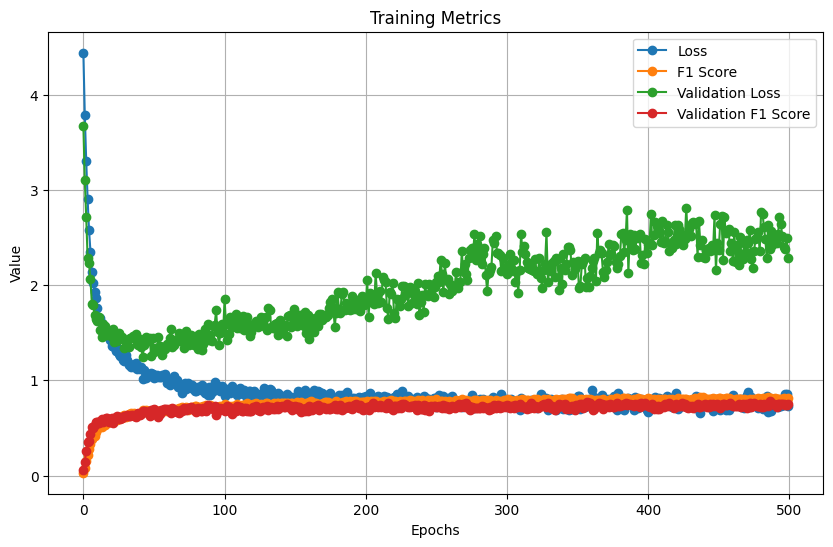

In [130]:
# Plotting
import matplotlib.pyplot as plt
epochs = range(0, 500)
plt.figure(figsize=(10, 6))
plt.plot(epochs, hist_df.loss, marker='o', label='Loss')
plt.plot(epochs, hist_df.f1_score, marker='o', label='F1 Score')
plt.plot(epochs, hist_df.val_loss, marker='o', label='Validation Loss')
plt.plot(epochs, hist_df.val_f1_score, marker='o', label='Validation F1 Score')
plt.title('Training Metrics')
plt.xlabel('Epochs')
plt.ylabel('Value')
plt.legend()
plt.grid()
plt.show()

In [123]:
reconstructed_model = tf.keras.models.load_model("1 1DCNN")

In [124]:
reconstructed_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_1 (Conv1D)           (None, 121, 100)          126100    
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 12, 100)          0         
 1D)                                                             
                                                                 
 dropout_2 (Dropout)         (None, 12, 100)           0         
                                                                 
 flatten_1 (Flatten)         (None, 1200)              0         
                                                                 
 dense_2 (Dense)             (None, 70)                84070     
                                                                 
 dropout_3 (Dropout)         (None, 70)                0         
                                                      

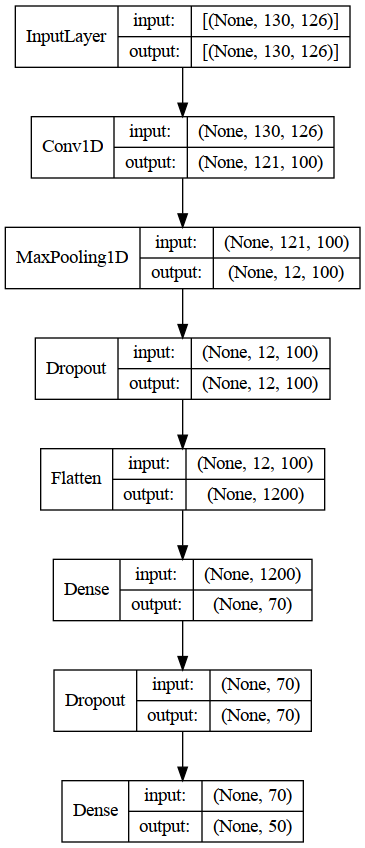

In [125]:
plot_model(reconstructed_model, show_shapes=True, show_layer_names=False)

In [126]:
reconstructed_model.evaluate(Xval,Yval)

11/11 [==============================] - 0s 7ms/step - loss: 2.3796 - f1_score: 0.7798


[2.3795816898345947, 0.7797939777374268]

In [133]:
print(classification_report(np.argmax(Yval, axis=1), np.argmax(reconstructed_model.predict(Xval), axis=1),
                            digits=3, target_names=label_map))

11/11 [==============================] - 0s 4ms/step
              precision    recall  f1-score   support

         AXE      0.833     0.625     0.714         8
    BACKPACK      0.750     1.000     0.857         6
  BASKETBALL      0.833     1.000     0.909        10
         BEE      1.000     0.600     0.750        10
        BELT      1.000     0.500     0.667         4
        BITE      0.889     1.000     0.941         8
   BREAKFAST      0.444     0.667     0.533         6
      CANCER      0.889     1.000     0.941         8
   CHRISTMAS      0.500     0.667     0.571         6
    CONFUSED      0.667     1.000     0.800         6
        DARK      0.571     1.000     0.727         4
        DEAF      0.714     0.833     0.769         6
      DECIDE      0.800     0.667     0.727         6
      DEMAND      0.750     0.750     0.750         8
     DEVELOP      0.600     0.500     0.545         6
      DINNER      0.714     0.625     0.667         8
         DOG      1.000     

In [156]:
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath='1 1DCNN Mish/',
    monitor='val_f1_score',
    mode='max',
    save_best_only=True)

In [157]:
act_function=mish
model = Sequential()
model.add(Conv1D(filters=100,kernel_size=10,activation=act_function,input_shape=(130,126)))
model.add(MaxPooling1D(pool_size=10))
model.add(Dropout(.45))
model.add(Flatten())
model.add(Dense(units=70,activation=act_function))
model.add(Dropout(.5))
model.add(Dense(50, activation='softmax'))

model.compile(tf.optimizers.experimental.Nadam(.0035029559985702272),
            loss='categorical_crossentropy',
            metrics=[tfa.metrics.F1Score(num_classes=50, average='macro')])
model.summary()
History = model.fit(x=Xtrain, y=Ytrain,validation_data= (Xval,Yval), batch_size=96,epochs=500, verbose=1,callbacks=[model_checkpoint_callback])

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_7 (Conv1D)           (None, 121, 100)          126100    
                                                                 
 max_pooling1d_7 (MaxPooling  (None, 12, 100)          0         
 1D)                                                             
                                                                 
 dropout_6 (Dropout)         (None, 12, 100)           0         
                                                                 
 flatten_7 (Flatten)         (None, 1200)              0         
                                                                 
 dense_14 (Dense)            (None, 70)                84070     
                                                                 
 dropout_7 (Dropout)         (None, 70)                0         
                                                      

INFO:tensorflow:Assets written to: 1 1DCNN Mish/assets


INFO:tensorflow:Assets written to: 1 1DCNN Mish/assets


28/28 [==============================] - 7s 205ms/step - loss: 3.9295 - f1_score: 0.0272 - val_loss: 3.7434 - val_f1_score: 0.0431
Epoch 2/500
26/28 [==========================>...] - ETA: 0s - loss: 3.5867 - f1_score: 0.0800

INFO:tensorflow:Assets written to: 1 1DCNN Mish/assets


INFO:tensorflow:Assets written to: 1 1DCNN Mish/assets


28/28 [==============================] - 4s 149ms/step - loss: 3.5740 - f1_score: 0.0805 - val_loss: 3.2072 - val_f1_score: 0.1158
Epoch 3/500
28/28 [==============================] - ETA: 0s - loss: 3.1549 - f1_score: 0.1401

INFO:tensorflow:Assets written to: 1 1DCNN Mish/assets


INFO:tensorflow:Assets written to: 1 1DCNN Mish/assets


28/28 [==============================] - 4s 143ms/step - loss: 3.1549 - f1_score: 0.1401 - val_loss: 2.8360 - val_f1_score: 0.1807
Epoch 4/500
26/28 [==========================>...] - ETA: 0s - loss: 2.8250 - f1_score: 0.2117

INFO:tensorflow:Assets written to: 1 1DCNN Mish/assets


INFO:tensorflow:Assets written to: 1 1DCNN Mish/assets


28/28 [==============================] - 4s 162ms/step - loss: 2.8269 - f1_score: 0.2108 - val_loss: 2.5794 - val_f1_score: 0.2653
Epoch 5/500
28/28 [==============================] - ETA: 0s - loss: 2.5917 - f1_score: 0.2445

INFO:tensorflow:Assets written to: 1 1DCNN Mish/assets


INFO:tensorflow:Assets written to: 1 1DCNN Mish/assets


28/28 [==============================] - 4s 162ms/step - loss: 2.5917 - f1_score: 0.2445 - val_loss: 2.3931 - val_f1_score: 0.2898
Epoch 6/500
28/28 [==============================] - ETA: 0s - loss: 2.3805 - f1_score: 0.2910

INFO:tensorflow:Assets written to: 1 1DCNN Mish/assets


INFO:tensorflow:Assets written to: 1 1DCNN Mish/assets


28/28 [==============================] - 4s 148ms/step - loss: 2.3805 - f1_score: 0.2910 - val_loss: 2.2418 - val_f1_score: 0.3177
Epoch 7/500
28/28 [==============================] - ETA: 0s - loss: 2.2402 - f1_score: 0.3236

INFO:tensorflow:Assets written to: 1 1DCNN Mish/assets


INFO:tensorflow:Assets written to: 1 1DCNN Mish/assets


28/28 [==============================] - 4s 135ms/step - loss: 2.2402 - f1_score: 0.3236 - val_loss: 2.1358 - val_f1_score: 0.3831
Epoch 8/500
28/28 [==============================] - 1s 27ms/step - loss: 2.1153 - f1_score: 0.3737 - val_loss: 2.1321 - val_f1_score: 0.3772
Epoch 9/500
28/28 [==============================] - ETA: 0s - loss: 2.0301 - f1_score: 0.3837

INFO:tensorflow:Assets written to: 1 1DCNN Mish/assets


INFO:tensorflow:Assets written to: 1 1DCNN Mish/assets


28/28 [==============================] - 4s 150ms/step - loss: 2.0301 - f1_score: 0.3837 - val_loss: 1.9113 - val_f1_score: 0.4845
Epoch 10/500
27/28 [===========================>..] - ETA: 0s - loss: 1.9544 - f1_score: 0.4089

INFO:tensorflow:Assets written to: 1 1DCNN Mish/assets


INFO:tensorflow:Assets written to: 1 1DCNN Mish/assets


28/28 [==============================] - 4s 165ms/step - loss: 1.9532 - f1_score: 0.4096 - val_loss: 1.8454 - val_f1_score: 0.4880
Epoch 11/500
28/28 [==============================] - 1s 26ms/step - loss: 1.8266 - f1_score: 0.4359 - val_loss: 1.7907 - val_f1_score: 0.4836
Epoch 12/500
28/28 [==============================] - ETA: 0s - loss: 1.8209 - f1_score: 0.4442

INFO:tensorflow:Assets written to: 1 1DCNN Mish/assets


INFO:tensorflow:Assets written to: 1 1DCNN Mish/assets


28/28 [==============================] - 4s 144ms/step - loss: 1.8209 - f1_score: 0.4442 - val_loss: 1.7860 - val_f1_score: 0.5144
Epoch 13/500
26/28 [==========================>...] - ETA: 0s - loss: 1.7776 - f1_score: 0.4450

INFO:tensorflow:Assets written to: 1 1DCNN Mish/assets


INFO:tensorflow:Assets written to: 1 1DCNN Mish/assets


28/28 [==============================] - 4s 146ms/step - loss: 1.7710 - f1_score: 0.4466 - val_loss: 1.6801 - val_f1_score: 0.5452
Epoch 14/500
27/28 [===========================>..] - ETA: 0s - loss: 1.6953 - f1_score: 0.4761

INFO:tensorflow:Assets written to: 1 1DCNN Mish/assets


INFO:tensorflow:Assets written to: 1 1DCNN Mish/assets


28/28 [==============================] - 5s 169ms/step - loss: 1.6969 - f1_score: 0.4749 - val_loss: 1.6713 - val_f1_score: 0.5596
Epoch 15/500
28/28 [==============================] - 1s 28ms/step - loss: 1.6358 - f1_score: 0.4928 - val_loss: 1.6990 - val_f1_score: 0.5361
Epoch 16/500
28/28 [==============================] - 1s 29ms/step - loss: 1.5864 - f1_score: 0.5091 - val_loss: 1.6427 - val_f1_score: 0.5527
Epoch 17/500
27/28 [===========================>..] - ETA: 0s - loss: 1.5137 - f1_score: 0.5328

INFO:tensorflow:Assets written to: 1 1DCNN Mish/assets


INFO:tensorflow:Assets written to: 1 1DCNN Mish/assets


28/28 [==============================] - 4s 149ms/step - loss: 1.5145 - f1_score: 0.5333 - val_loss: 1.5974 - val_f1_score: 0.5933
Epoch 18/500
28/28 [==============================] - 1s 28ms/step - loss: 1.4761 - f1_score: 0.5495 - val_loss: 1.6105 - val_f1_score: 0.5633
Epoch 19/500
28/28 [==============================] - 1s 27ms/step - loss: 1.4857 - f1_score: 0.5382 - val_loss: 1.5700 - val_f1_score: 0.5734
Epoch 20/500
28/28 [==============================] - 1s 27ms/step - loss: 1.4675 - f1_score: 0.5577 - val_loss: 1.5586 - val_f1_score: 0.5588
Epoch 21/500
28/28 [==============================] - 1s 27ms/step - loss: 1.4163 - f1_score: 0.5495 - val_loss: 1.5461 - val_f1_score: 0.5736
Epoch 22/500
28/28 [==============================] - 1s 27ms/step - loss: 1.4018 - f1_score: 0.5608 - val_loss: 1.5144 - val_f1_score: 0.5763
Epoch 23/500
26/28 [==========================>...] - ETA: 0s - loss: 1.3764 - f1_score: 0.5804

INFO:tensorflow:Assets written to: 1 1DCNN Mish/assets


INFO:tensorflow:Assets written to: 1 1DCNN Mish/assets


28/28 [==============================] - 4s 135ms/step - loss: 1.3744 - f1_score: 0.5839 - val_loss: 1.5278 - val_f1_score: 0.5942
Epoch 24/500
28/28 [==============================] - 1s 27ms/step - loss: 1.3523 - f1_score: 0.5746 - val_loss: 1.4866 - val_f1_score: 0.5942
Epoch 25/500
26/28 [==========================>...] - ETA: 0s - loss: 1.3277 - f1_score: 0.5826

INFO:tensorflow:Assets written to: 1 1DCNN Mish/assets


INFO:tensorflow:Assets written to: 1 1DCNN Mish/assets


28/28 [==============================] - 4s 149ms/step - loss: 1.3274 - f1_score: 0.5844 - val_loss: 1.4635 - val_f1_score: 0.6363
Epoch 26/500
28/28 [==============================] - 1s 27ms/step - loss: 1.3035 - f1_score: 0.5880 - val_loss: 1.4989 - val_f1_score: 0.6151
Epoch 27/500
28/28 [==============================] - 1s 27ms/step - loss: 1.3065 - f1_score: 0.5893 - val_loss: 1.4731 - val_f1_score: 0.5950
Epoch 28/500
28/28 [==============================] - 1s 28ms/step - loss: 1.2834 - f1_score: 0.5949 - val_loss: 1.4997 - val_f1_score: 0.6277
Epoch 29/500
28/28 [==============================] - 1s 27ms/step - loss: 1.2350 - f1_score: 0.6147 - val_loss: 1.4981 - val_f1_score: 0.5860
Epoch 30/500
28/28 [==============================] - 1s 28ms/step - loss: 1.2188 - f1_score: 0.6004 - val_loss: 1.5006 - val_f1_score: 0.5975
Epoch 31/500
28/28 [==============================] - 1s 28ms/step - loss: 1.1616 - f1_score: 0.6315 - val_loss: 1.4245 - val_f1_score: 0.6256
Epoch 32/50

INFO:tensorflow:Assets written to: 1 1DCNN Mish/assets


INFO:tensorflow:Assets written to: 1 1DCNN Mish/assets


28/28 [==============================] - 4s 135ms/step - loss: 1.0563 - f1_score: 0.6607 - val_loss: 1.5353 - val_f1_score: 0.6411
Epoch 46/500
28/28 [==============================] - 1s 27ms/step - loss: 1.1016 - f1_score: 0.6475 - val_loss: 1.5631 - val_f1_score: 0.5817
Epoch 47/500
28/28 [==============================] - 1s 27ms/step - loss: 1.0862 - f1_score: 0.6641 - val_loss: 1.4723 - val_f1_score: 0.6339
Epoch 48/500
28/28 [==============================] - 1s 27ms/step - loss: 1.0115 - f1_score: 0.6891 - val_loss: 1.5877 - val_f1_score: 0.6115
Epoch 49/500
28/28 [==============================] - 1s 28ms/step - loss: 1.0475 - f1_score: 0.6665 - val_loss: 1.5050 - val_f1_score: 0.6080
Epoch 50/500
28/28 [==============================] - 1s 27ms/step - loss: 1.0362 - f1_score: 0.6879 - val_loss: 1.5577 - val_f1_score: 0.6295
Epoch 51/500
28/28 [==============================] - 1s 28ms/step - loss: 0.9486 - f1_score: 0.6974 - val_loss: 1.4893 - val_f1_score: 0.6237
Epoch 52/50

INFO:tensorflow:Assets written to: 1 1DCNN Mish/assets


INFO:tensorflow:Assets written to: 1 1DCNN Mish/assets


28/28 [==============================] - 5s 173ms/step - loss: 1.0177 - f1_score: 0.6769 - val_loss: 1.5384 - val_f1_score: 0.6567
Epoch 55/500
28/28 [==============================] - 1s 27ms/step - loss: 1.0154 - f1_score: 0.6780 - val_loss: 1.5456 - val_f1_score: 0.6372
Epoch 56/500
28/28 [==============================] - 1s 28ms/step - loss: 0.9893 - f1_score: 0.6757 - val_loss: 1.4634 - val_f1_score: 0.6457
Epoch 57/500
28/28 [==============================] - 1s 28ms/step - loss: 1.0033 - f1_score: 0.6888 - val_loss: 1.5272 - val_f1_score: 0.6321
Epoch 58/500
28/28 [==============================] - 1s 29ms/step - loss: 0.9585 - f1_score: 0.6886 - val_loss: 1.5018 - val_f1_score: 0.6531
Epoch 59/500
28/28 [==============================] - 1s 28ms/step - loss: 0.9976 - f1_score: 0.6822 - val_loss: 1.5221 - val_f1_score: 0.6308
Epoch 60/500
28/28 [==============================] - 1s 29ms/step - loss: 1.0055 - f1_score: 0.6795 - val_loss: 1.5139 - val_f1_score: 0.6546
Epoch 61/50

INFO:tensorflow:Assets written to: 1 1DCNN Mish/assets


INFO:tensorflow:Assets written to: 1 1DCNN Mish/assets


28/28 [==============================] - 4s 148ms/step - loss: 0.9578 - f1_score: 0.6920 - val_loss: 1.4318 - val_f1_score: 0.6706
Epoch 69/500
28/28 [==============================] - 1s 28ms/step - loss: 0.9616 - f1_score: 0.6934 - val_loss: 1.5769 - val_f1_score: 0.6383
Epoch 70/500
28/28 [==============================] - 1s 29ms/step - loss: 0.9213 - f1_score: 0.7145 - val_loss: 1.5490 - val_f1_score: 0.6423
Epoch 71/500
28/28 [==============================] - 1s 28ms/step - loss: 0.9546 - f1_score: 0.7108 - val_loss: 1.6244 - val_f1_score: 0.6478
Epoch 72/500
28/28 [==============================] - 1s 28ms/step - loss: 0.8920 - f1_score: 0.7123 - val_loss: 1.5963 - val_f1_score: 0.6496
Epoch 73/500
28/28 [==============================] - 1s 28ms/step - loss: 0.8990 - f1_score: 0.7161 - val_loss: 1.6083 - val_f1_score: 0.6410
Epoch 74/500
28/28 [==============================] - 1s 29ms/step - loss: 0.9155 - f1_score: 0.7130 - val_loss: 1.5260 - val_f1_score: 0.6572
Epoch 75/50

INFO:tensorflow:Assets written to: 1 1DCNN Mish/assets


INFO:tensorflow:Assets written to: 1 1DCNN Mish/assets


28/28 [==============================] - 5s 167ms/step - loss: 0.8985 - f1_score: 0.7136 - val_loss: 1.5343 - val_f1_score: 0.7006
Epoch 85/500
28/28 [==============================] - 1s 27ms/step - loss: 0.8414 - f1_score: 0.7364 - val_loss: 1.6923 - val_f1_score: 0.6575
Epoch 86/500
28/28 [==============================] - 1s 28ms/step - loss: 0.9052 - f1_score: 0.7111 - val_loss: 1.6756 - val_f1_score: 0.6471
Epoch 87/500
28/28 [==============================] - 1s 27ms/step - loss: 0.9080 - f1_score: 0.7137 - val_loss: 1.7202 - val_f1_score: 0.6176
Epoch 88/500
28/28 [==============================] - 1s 27ms/step - loss: 0.8938 - f1_score: 0.7100 - val_loss: 1.5787 - val_f1_score: 0.6517
Epoch 89/500
28/28 [==============================] - 1s 29ms/step - loss: 0.8539 - f1_score: 0.7294 - val_loss: 1.6462 - val_f1_score: 0.6563
Epoch 90/500
28/28 [==============================] - 1s 28ms/step - loss: 0.8656 - f1_score: 0.7332 - val_loss: 1.5140 - val_f1_score: 0.6706
Epoch 91/50

INFO:tensorflow:Assets written to: 1 1DCNN Mish/assets


INFO:tensorflow:Assets written to: 1 1DCNN Mish/assets


28/28 [==============================] - 5s 193ms/step - loss: 0.7779 - f1_score: 0.7490 - val_loss: 1.6791 - val_f1_score: 0.7017
Epoch 118/500
28/28 [==============================] - 1s 29ms/step - loss: 0.7943 - f1_score: 0.7454 - val_loss: 1.9058 - val_f1_score: 0.6466
Epoch 119/500
28/28 [==============================] - 1s 29ms/step - loss: 0.8660 - f1_score: 0.7274 - val_loss: 1.7576 - val_f1_score: 0.6343
Epoch 120/500
28/28 [==============================] - 1s 29ms/step - loss: 0.8250 - f1_score: 0.7431 - val_loss: 1.7693 - val_f1_score: 0.6809
Epoch 121/500
28/28 [==============================] - 1s 29ms/step - loss: 0.8000 - f1_score: 0.7481 - val_loss: 1.9258 - val_f1_score: 0.6390
Epoch 122/500
28/28 [==============================] - 1s 28ms/step - loss: 0.8402 - f1_score: 0.7380 - val_loss: 1.8695 - val_f1_score: 0.6483
Epoch 123/500
28/28 [==============================] - 1s 29ms/step - loss: 0.8136 - f1_score: 0.7341 - val_loss: 1.8129 - val_f1_score: 0.6356
Epoch

Epoch 174/500
28/28 [==============================] - 1s 29ms/step - loss: 0.7690 - f1_score: 0.7676 - val_loss: 1.9039 - val_f1_score: 0.6759
Epoch 175/500
28/28 [==============================] - 1s 29ms/step - loss: 0.7350 - f1_score: 0.7715 - val_loss: 1.8279 - val_f1_score: 0.6615
Epoch 176/500
28/28 [==============================] - 1s 28ms/step - loss: 0.7455 - f1_score: 0.7596 - val_loss: 1.8453 - val_f1_score: 0.6645
Epoch 177/500
28/28 [==============================] - 1s 28ms/step - loss: 0.8004 - f1_score: 0.7455 - val_loss: 1.7865 - val_f1_score: 0.6783
Epoch 178/500
28/28 [==============================] - 1s 28ms/step - loss: 0.8076 - f1_score: 0.7407 - val_loss: 1.8188 - val_f1_score: 0.6571
Epoch 179/500
28/28 [==============================] - 1s 28ms/step - loss: 0.8244 - f1_score: 0.7565 - val_loss: 1.8794 - val_f1_score: 0.6590
Epoch 180/500
28/28 [==============================] - 1s 30ms/step - loss: 0.7624 - f1_score: 0.7661 - val_loss: 1.9383 - val_f1_score:

INFO:tensorflow:Assets written to: 1 1DCNN Mish/assets


INFO:tensorflow:Assets written to: 1 1DCNN Mish/assets


28/28 [==============================] - 5s 184ms/step - loss: 0.7487 - f1_score: 0.7617 - val_loss: 1.9010 - val_f1_score: 0.7059
Epoch 186/500
28/28 [==============================] - 1s 28ms/step - loss: 0.7562 - f1_score: 0.7617 - val_loss: 1.9268 - val_f1_score: 0.6649
Epoch 187/500
28/28 [==============================] - 1s 28ms/step - loss: 0.7473 - f1_score: 0.7610 - val_loss: 2.0778 - val_f1_score: 0.6404
Epoch 188/500
28/28 [==============================] - 1s 28ms/step - loss: 0.7705 - f1_score: 0.7588 - val_loss: 2.1836 - val_f1_score: 0.6224
Epoch 189/500
28/28 [==============================] - 1s 28ms/step - loss: 0.7362 - f1_score: 0.7630 - val_loss: 2.1180 - val_f1_score: 0.6693
Epoch 190/500
28/28 [==============================] - 1s 29ms/step - loss: 0.7541 - f1_score: 0.7578 - val_loss: 2.0729 - val_f1_score: 0.6672
Epoch 191/500
28/28 [==============================] - 1s 28ms/step - loss: 0.8089 - f1_score: 0.7473 - val_loss: 1.9848 - val_f1_score: 0.6677
Epoch

Epoch 242/500
28/28 [==============================] - 1s 29ms/step - loss: 0.7199 - f1_score: 0.7717 - val_loss: 2.0244 - val_f1_score: 0.6715
Epoch 243/500
28/28 [==============================] - 1s 28ms/step - loss: 0.7594 - f1_score: 0.7706 - val_loss: 2.0607 - val_f1_score: 0.6686
Epoch 244/500
28/28 [==============================] - 1s 28ms/step - loss: 0.7002 - f1_score: 0.7773 - val_loss: 2.1898 - val_f1_score: 0.6681
Epoch 245/500
28/28 [==============================] - 1s 28ms/step - loss: 0.7394 - f1_score: 0.7642 - val_loss: 2.0464 - val_f1_score: 0.6476
Epoch 246/500
28/28 [==============================] - 1s 28ms/step - loss: 0.7016 - f1_score: 0.7900 - val_loss: 1.9403 - val_f1_score: 0.6562
Epoch 247/500
28/28 [==============================] - 1s 29ms/step - loss: 0.7533 - f1_score: 0.7631 - val_loss: 1.9748 - val_f1_score: 0.6679
Epoch 248/500
28/28 [==============================] - 1s 29ms/step - loss: 0.7190 - f1_score: 0.7744 - val_loss: 2.0913 - val_f1_score:

Epoch 299/500
28/28 [==============================] - 1s 29ms/step - loss: 0.7227 - f1_score: 0.7764 - val_loss: 2.2519 - val_f1_score: 0.6414
Epoch 300/500
28/28 [==============================] - 1s 29ms/step - loss: 0.6874 - f1_score: 0.7924 - val_loss: 2.1512 - val_f1_score: 0.6565
Epoch 301/500
28/28 [==============================] - 1s 30ms/step - loss: 0.7244 - f1_score: 0.7747 - val_loss: 2.1795 - val_f1_score: 0.6475
Epoch 302/500
28/28 [==============================] - 1s 29ms/step - loss: 0.6768 - f1_score: 0.7878 - val_loss: 2.1803 - val_f1_score: 0.6605
Epoch 303/500
28/28 [==============================] - 1s 32ms/step - loss: 0.6279 - f1_score: 0.7994 - val_loss: 2.1623 - val_f1_score: 0.6589
Epoch 304/500
28/28 [==============================] - 1s 30ms/step - loss: 0.6517 - f1_score: 0.7989 - val_loss: 2.3026 - val_f1_score: 0.6464
Epoch 305/500
28/28 [==============================] - 1s 29ms/step - loss: 0.6973 - f1_score: 0.7732 - val_loss: 2.2351 - val_f1_score:

Epoch 356/500
28/28 [==============================] - 1s 30ms/step - loss: 0.6753 - f1_score: 0.7940 - val_loss: 2.3017 - val_f1_score: 0.6629
Epoch 357/500
28/28 [==============================] - 1s 28ms/step - loss: 0.6912 - f1_score: 0.7866 - val_loss: 2.2821 - val_f1_score: 0.6835
Epoch 358/500
28/28 [==============================] - 1s 29ms/step - loss: 0.6537 - f1_score: 0.7944 - val_loss: 2.4060 - val_f1_score: 0.6761
Epoch 359/500
28/28 [==============================] - 1s 30ms/step - loss: 0.6739 - f1_score: 0.7873 - val_loss: 2.3856 - val_f1_score: 0.6944
Epoch 360/500
28/28 [==============================] - 1s 29ms/step - loss: 0.6619 - f1_score: 0.8010 - val_loss: 2.1955 - val_f1_score: 0.6486
Epoch 361/500
28/28 [==============================] - 1s 28ms/step - loss: 0.6991 - f1_score: 0.7936 - val_loss: 2.1356 - val_f1_score: 0.6777
Epoch 362/500
28/28 [==============================] - 1s 28ms/step - loss: 0.6603 - f1_score: 0.7934 - val_loss: 2.4275 - val_f1_score:

Epoch 413/500
28/28 [==============================] - 1s 28ms/step - loss: 0.7163 - f1_score: 0.7915 - val_loss: 2.2895 - val_f1_score: 0.6664
Epoch 414/500
28/28 [==============================] - 1s 29ms/step - loss: 0.6888 - f1_score: 0.7818 - val_loss: 2.2909 - val_f1_score: 0.6757
Epoch 415/500
28/28 [==============================] - 1s 30ms/step - loss: 0.6669 - f1_score: 0.7910 - val_loss: 2.4411 - val_f1_score: 0.6774
Epoch 416/500
28/28 [==============================] - 1s 28ms/step - loss: 0.6387 - f1_score: 0.8042 - val_loss: 2.3516 - val_f1_score: 0.6758
Epoch 417/500
28/28 [==============================] - 1s 28ms/step - loss: 0.6329 - f1_score: 0.7972 - val_loss: 2.5030 - val_f1_score: 0.6652
Epoch 418/500
28/28 [==============================] - 1s 29ms/step - loss: 0.6367 - f1_score: 0.8037 - val_loss: 2.4073 - val_f1_score: 0.6615
Epoch 419/500
28/28 [==============================] - 1s 29ms/step - loss: 0.6610 - f1_score: 0.8001 - val_loss: 2.2766 - val_f1_score:

Epoch 470/500
27/28 [===========================>..] - ETA: 0s - loss: 0.6488 - f1_score: 0.8067

INFO:tensorflow:Assets written to: 1 1DCNN Mish/assets


INFO:tensorflow:Assets written to: 1 1DCNN Mish/assets


28/28 [==============================] - 6s 214ms/step - loss: 0.6453 - f1_score: 0.8071 - val_loss: 2.2875 - val_f1_score: 0.7138
Epoch 471/500
28/28 [==============================] - 1s 30ms/step - loss: 0.6514 - f1_score: 0.8021 - val_loss: 2.3760 - val_f1_score: 0.6312
Epoch 472/500
28/28 [==============================] - 1s 28ms/step - loss: 0.7024 - f1_score: 0.7945 - val_loss: 2.3441 - val_f1_score: 0.6362
Epoch 473/500
28/28 [==============================] - 1s 28ms/step - loss: 0.6986 - f1_score: 0.7863 - val_loss: 2.2123 - val_f1_score: 0.6755
Epoch 474/500
28/28 [==============================] - 1s 28ms/step - loss: 0.6656 - f1_score: 0.7939 - val_loss: 2.3363 - val_f1_score: 0.6733
Epoch 475/500
28/28 [==============================] - 1s 28ms/step - loss: 0.6515 - f1_score: 0.8012 - val_loss: 2.2067 - val_f1_score: 0.6508
Epoch 476/500
28/28 [==============================] - 1s 28ms/step - loss: 0.6273 - f1_score: 0.8050 - val_loss: 2.2252 - val_f1_score: 0.6238
Epoch

In [158]:
#cm = confusion_matrix(np.argmax(Yval, axis=1), np.argmax(model.predict(Xval), axis=1))

#sns.heatmap(cm, annot = True)

print(classification_report(np.argmax(Yval, axis=1), np.argmax(model.predict(Xval), axis=1),
                            digits=3, target_names=label_map))

11/11 [==============================] - 0s 5ms/step
              precision    recall  f1-score   support

         AXE      0.700     0.875     0.778         8
    BACKPACK      0.714     0.833     0.769         6
  BASKETBALL      0.750     0.900     0.818        10
         BEE      0.714     0.500     0.588        10
        BELT      0.667     0.500     0.571         4
        BITE      0.875     0.875     0.875         8
   BREAKFAST      0.500     0.833     0.625         6
      CANCER      0.750     0.750     0.750         8
   CHRISTMAS      0.500     0.333     0.400         6
    CONFUSED      0.400     0.667     0.500         6
        DARK      0.500     0.750     0.600         4
        DEAF      0.714     0.833     0.769         6
      DECIDE      1.000     0.667     0.800         6
      DEMAND      0.500     0.125     0.200         8
     DEVELOP      0.250     0.333     0.286         6
      DINNER      0.556     0.625     0.588         8
         DOG      0.857     

/home/kristian/miniconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/kristian/miniconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/kristian/miniconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [159]:
# convert the history.history dict to a pandas DataFrame:     
hist_df = pd.DataFrame(History.history) 

# or save to csv: 
hist_csv_file = '1 1DCNN Mish/history.csv'
with open(hist_csv_file, mode='w') as f:
    hist_df.to_csv(f)

In [160]:
hist_df.tail()

loss  f1_score  val_loss  val_f1_score
495  0.700062  0.784287  2.186885      0.674277
496  0.631826  0.817843  2.130422      0.690464
497  0.661597  0.792440  2.182400      0.663510
498  0.613794  0.809960  2.254866      0.666186
499  0.664343  0.794096  2.200406      0.661046

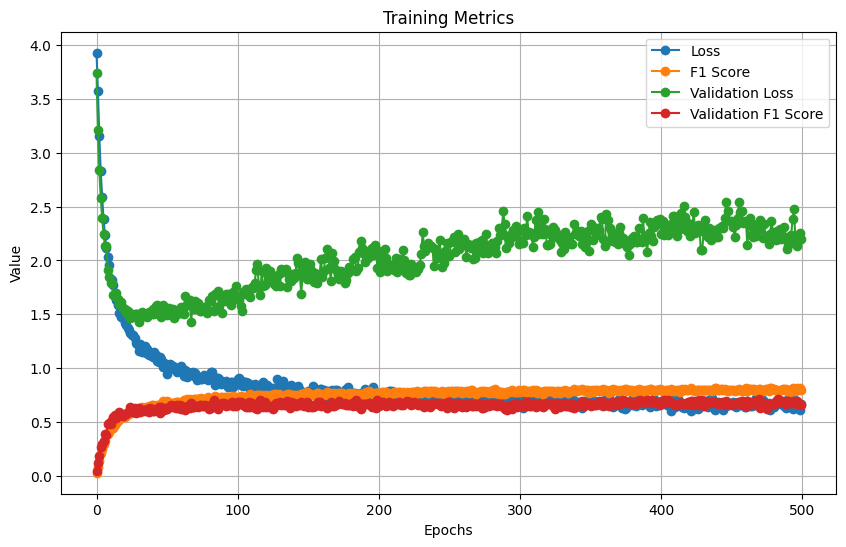

In [161]:
# Plotting
import matplotlib.pyplot as plt
epochs = range(0, 500)
plt.figure(figsize=(10, 6))
plt.plot(epochs, hist_df.loss, marker='o', label='Loss')
plt.plot(epochs, hist_df.f1_score, marker='o', label='F1 Score')
plt.plot(epochs, hist_df.val_loss, marker='o', label='Validation Loss')
plt.plot(epochs, hist_df.val_f1_score, marker='o', label='Validation F1 Score')
plt.title('Training Metrics')
plt.xlabel('Epochs')
plt.ylabel('Value')
plt.legend()
plt.grid()
plt.show()

In [127]:
reconstructed_model = tf.keras.models.load_model("1 1DCNN Mish")

In [128]:
reconstructed_model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_7 (Conv1D)           (None, 121, 100)          126100    
                                                                 
 max_pooling1d_7 (MaxPooling  (None, 12, 100)          0         
 1D)                                                             
                                                                 
 dropout_6 (Dropout)         (None, 12, 100)           0         
                                                                 
 flatten_7 (Flatten)         (None, 1200)              0         
                                                                 
 dense_14 (Dense)            (None, 70)                84070     
                                                                 
 dropout_7 (Dropout)         (None, 70)                0         
                                                      

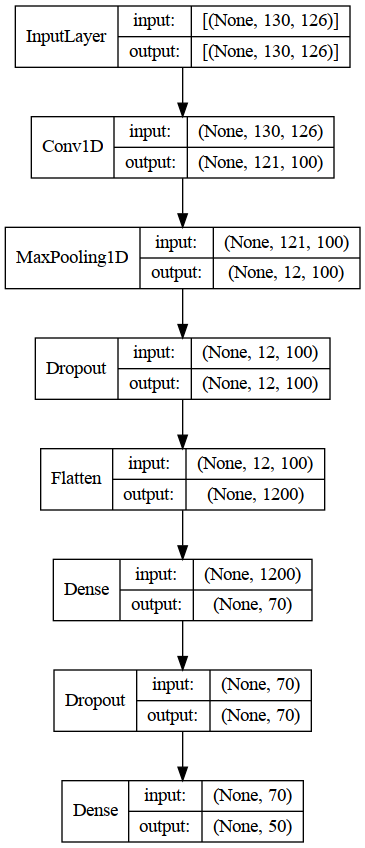

In [129]:
plot_model(reconstructed_model, show_shapes=True, show_layer_names=False)

In [130]:
reconstructed_model.evaluate(Xval,Yval)

11/11 [==============================] - 0s 7ms/step - loss: 2.2875 - f1_score: 0.7138


[2.2875282764434814, 0.7138184905052185]

In [164]:
print(classification_report(np.argmax(Yval, axis=1), np.argmax(reconstructed_model.predict(Xval), axis=1),
                            digits=3, target_names=label_map))

11/11 [==============================] - 0s 5ms/step
              precision    recall  f1-score   support

         AXE      1.000     0.750     0.857         8
    BACKPACK      0.667     1.000     0.800         6
  BASKETBALL      0.833     1.000     0.909        10
         BEE      0.667     0.600     0.632        10
        BELT      1.000     0.750     0.857         4
        BITE      0.727     1.000     0.842         8
   BREAKFAST      0.375     0.500     0.429         6
      CANCER      0.778     0.875     0.824         8
   CHRISTMAS      0.571     0.667     0.615         6
    CONFUSED      0.800     0.667     0.727         6
        DARK      1.000     1.000     1.000         4
        DEAF      0.833     0.833     0.833         6
      DECIDE      0.667     0.667     0.667         6
      DEMAND      0.000     0.000     0.000         8
     DEVELOP      0.333     0.500     0.400         6
      DINNER      0.455     0.625     0.526         8
         DOG      0.857     

In [143]:
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath='1 1DCNN Lecunnormal/',
    monitor='val_f1_score',
    mode='max',
    save_best_only=True)

In [147]:
act_function='selu'
model = Sequential()
initializer = tf.keras.initializers.LecunNormal(seed=10)
model.add(Conv1D(filters=100,kernel_initializer=initializer,kernel_size=10,activation=act_function,input_shape=(130,126)))
model.add(MaxPooling1D(pool_size=10))
#model.add(Dropout(.45))
model.add(Flatten())
model.add(Dense(units=70,activation=act_function,kernel_initializer=initializer))
#model.add(Dropout(.5))
model.add(Dense(50, activation='softmax'))

model.compile(tf.optimizers.experimental.Nadam(.0035029559985702272),
            loss='categorical_crossentropy',
            metrics=[tfa.metrics.F1Score(num_classes=50, average='macro')])
model.summary()
History = model.fit(x=Xtrain, y=Ytrain,validation_data= (Xval,Yval), batch_size=96,epochs=500, verbose=1,callbacks=[model_checkpoint_callback])

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_6 (Conv1D)           (None, 121, 100)          126100    
                                                                 
 max_pooling1d_6 (MaxPooling  (None, 12, 100)          0         
 1D)                                                             
                                                                 
 flatten_6 (Flatten)         (None, 1200)              0         
                                                                 
 dense_12 (Dense)            (None, 70)                84070     
                                                                 
 dense_13 (Dense)            (None, 50)                3550      
                                                                 
Total params: 213,720
Trainable params: 213,720
Non-trainable params: 0
________________________________________________

INFO:tensorflow:Assets written to: 1 1DCNN Lecunnormal/assets


INFO:tensorflow:Assets written to: 1 1DCNN Lecunnormal/assets


28/28 [==============================] - 5s 173ms/step - loss: 0.1215 - f1_score: 0.9728 - val_loss: 2.2110 - val_f1_score: 0.6170
Epoch 12/500
28/28 [==============================] - 1s 24ms/step - loss: 0.0715 - f1_score: 0.9879 - val_loss: 2.4017 - val_f1_score: 0.5847
Epoch 13/500
28/28 [==============================] - 1s 24ms/step - loss: 0.0575 - f1_score: 0.9937 - val_loss: 2.3083 - val_f1_score: 0.6043
Epoch 14/500
28/28 [==============================] - 1s 24ms/step - loss: 0.0358 - f1_score: 0.9970 - val_loss: 2.4347 - val_f1_score: 0.5994
Epoch 15/500
28/28 [==============================] - 1s 25ms/step - loss: 0.0229 - f1_score: 0.9989 - val_loss: 2.4907 - val_f1_score: 0.6002
Epoch 16/500
28/28 [==============================] - 1s 25ms/step - loss: 0.0146 - f1_score: 1.0000 - val_loss: 2.4812 - val_f1_score: 0.6006
Epoch 17/500
28/28 [==============================] - ETA: 0s - loss: 0.0102 - f1_score: 1.0000

INFO:tensorflow:Assets written to: 1 1DCNN Lecunnormal/assets


INFO:tensorflow:Assets written to: 1 1DCNN Lecunnormal/assets


28/28 [==============================] - 4s 141ms/step - loss: 0.0102 - f1_score: 1.0000 - val_loss: 2.5199 - val_f1_score: 0.6185
Epoch 18/500
28/28 [==============================] - ETA: 0s - loss: 0.0086 - f1_score: 1.0000

INFO:tensorflow:Assets written to: 1 1DCNN Lecunnormal/assets


INFO:tensorflow:Assets written to: 1 1DCNN Lecunnormal/assets


28/28 [==============================] - 4s 166ms/step - loss: 0.0086 - f1_score: 1.0000 - val_loss: 2.5680 - val_f1_score: 0.6232
Epoch 19/500
28/28 [==============================] - 1s 25ms/step - loss: 0.0066 - f1_score: 1.0000 - val_loss: 2.6046 - val_f1_score: 0.6162
Epoch 20/500
28/28 [==============================] - 1s 24ms/step - loss: 0.0059 - f1_score: 1.0000 - val_loss: 2.6258 - val_f1_score: 0.6210
Epoch 21/500
28/28 [==============================] - 1s 25ms/step - loss: 0.0053 - f1_score: 1.0000 - val_loss: 2.6564 - val_f1_score: 0.6151
Epoch 22/500
28/28 [==============================] - 1s 25ms/step - loss: 0.0047 - f1_score: 1.0000 - val_loss: 2.7041 - val_f1_score: 0.6202
Epoch 23/500
28/28 [==============================] - 1s 25ms/step - loss: 0.0042 - f1_score: 1.0000 - val_loss: 2.7059 - val_f1_score: 0.6149
Epoch 24/500
27/28 [===========================>..] - ETA: 0s - loss: 0.0039 - f1_score: 1.0000

INFO:tensorflow:Assets written to: 1 1DCNN Lecunnormal/assets


INFO:tensorflow:Assets written to: 1 1DCNN Lecunnormal/assets


28/28 [==============================] - 4s 155ms/step - loss: 0.0039 - f1_score: 1.0000 - val_loss: 2.7498 - val_f1_score: 0.6273
Epoch 25/500
28/28 [==============================] - 1s 24ms/step - loss: 0.0036 - f1_score: 1.0000 - val_loss: 2.7758 - val_f1_score: 0.6226
Epoch 26/500
28/28 [==============================] - 1s 25ms/step - loss: 0.0033 - f1_score: 1.0000 - val_loss: 2.8014 - val_f1_score: 0.6259
Epoch 27/500
28/28 [==============================] - 1s 25ms/step - loss: 0.0030 - f1_score: 1.0000 - val_loss: 2.8327 - val_f1_score: 0.6184
Epoch 28/500
28/28 [==============================] - 1s 25ms/step - loss: 0.0028 - f1_score: 1.0000 - val_loss: 2.8317 - val_f1_score: 0.6170
Epoch 29/500
28/28 [==============================] - 1s 25ms/step - loss: 0.0026 - f1_score: 1.0000 - val_loss: 2.8707 - val_f1_score: 0.6135
Epoch 30/500
28/28 [==============================] - 1s 25ms/step - loss: 0.0025 - f1_score: 1.0000 - val_loss: 2.8867 - val_f1_score: 0.6244
Epoch 31/50

INFO:tensorflow:Assets written to: 1 1DCNN Lecunnormal/assets


INFO:tensorflow:Assets written to: 1 1DCNN Lecunnormal/assets


28/28 [==============================] - 4s 142ms/step - loss: 0.0019 - f1_score: 1.0000 - val_loss: 2.9630 - val_f1_score: 0.6279
Epoch 35/500
28/28 [==============================] - 1s 25ms/step - loss: 0.0018 - f1_score: 1.0000 - val_loss: 2.9803 - val_f1_score: 0.6200
Epoch 36/500
28/28 [==============================] - 1s 25ms/step - loss: 0.0017 - f1_score: 1.0000 - val_loss: 2.9886 - val_f1_score: 0.6266
Epoch 37/500
28/28 [==============================] - 1s 25ms/step - loss: 0.0016 - f1_score: 1.0000 - val_loss: 3.0204 - val_f1_score: 0.6215
Epoch 38/500
28/28 [==============================] - 1s 25ms/step - loss: 0.0015 - f1_score: 1.0000 - val_loss: 3.0309 - val_f1_score: 0.6224
Epoch 39/500
28/28 [==============================] - 1s 26ms/step - loss: 0.0014 - f1_score: 1.0000 - val_loss: 3.0480 - val_f1_score: 0.6167
Epoch 40/500
28/28 [==============================] - 1s 26ms/step - loss: 0.0014 - f1_score: 1.0000 - val_loss: 3.0681 - val_f1_score: 0.6220
Epoch 41/50

28/28 [==============================] - 1s 27ms/step - loss: 6.8729e-05 - f1_score: 1.0000 - val_loss: 4.0252 - val_f1_score: 0.6076
Epoch 146/500
28/28 [==============================] - 1s 26ms/step - loss: 6.7465e-05 - f1_score: 1.0000 - val_loss: 4.0355 - val_f1_score: 0.6066
Epoch 147/500
28/28 [==============================] - 1s 26ms/step - loss: 6.5944e-05 - f1_score: 1.0000 - val_loss: 4.0388 - val_f1_score: 0.6055
Epoch 148/500
28/28 [==============================] - 1s 26ms/step - loss: 6.4743e-05 - f1_score: 1.0000 - val_loss: 4.0422 - val_f1_score: 0.6066
Epoch 149/500
28/28 [==============================] - 1s 26ms/step - loss: 6.3373e-05 - f1_score: 1.0000 - val_loss: 4.0486 - val_f1_score: 0.6101
Epoch 150/500
28/28 [==============================] - 1s 26ms/step - loss: 6.2150e-05 - f1_score: 1.0000 - val_loss: 4.0558 - val_f1_score: 0.6066
Epoch 151/500
28/28 [==============================] - 1s 26ms/step - loss: 6.1029e-05 - f1_score: 1.0000 - val_loss: 4.0637 -

28/28 [==============================] - 1s 26ms/step - loss: 9.6625e-06 - f1_score: 1.0000 - val_loss: 4.6390 - val_f1_score: 0.6097
Epoch 256/500
28/28 [==============================] - 1s 26ms/step - loss: 9.4955e-06 - f1_score: 1.0000 - val_loss: 4.6437 - val_f1_score: 0.6091
Epoch 257/500
28/28 [==============================] - 1s 26ms/step - loss: 9.3523e-06 - f1_score: 1.0000 - val_loss: 4.6490 - val_f1_score: 0.6097
Epoch 258/500
28/28 [==============================] - 1s 26ms/step - loss: 9.2212e-06 - f1_score: 1.0000 - val_loss: 4.6566 - val_f1_score: 0.6115
Epoch 259/500
28/28 [==============================] - 1s 25ms/step - loss: 9.0355e-06 - f1_score: 1.0000 - val_loss: 4.6599 - val_f1_score: 0.6088
Epoch 260/500
28/28 [==============================] - 1s 26ms/step - loss: 8.8774e-06 - f1_score: 1.0000 - val_loss: 4.6672 - val_f1_score: 0.6139
Epoch 261/500
28/28 [==============================] - 1s 26ms/step - loss: 8.7426e-06 - f1_score: 1.0000 - val_loss: 4.6715 -

28/28 [==============================] - 1s 26ms/step - loss: 1.6487e-06 - f1_score: 1.0000 - val_loss: 5.1784 - val_f1_score: 0.6024
Epoch 366/500
28/28 [==============================] - 1s 26ms/step - loss: 1.6245e-06 - f1_score: 1.0000 - val_loss: 5.1835 - val_f1_score: 0.6031
Epoch 367/500
28/28 [==============================] - 1s 26ms/step - loss: 1.6004e-06 - f1_score: 1.0000 - val_loss: 5.1921 - val_f1_score: 0.6013
Epoch 368/500
28/28 [==============================] - 1s 26ms/step - loss: 1.5751e-06 - f1_score: 1.0000 - val_loss: 5.1920 - val_f1_score: 0.6024
Epoch 369/500
28/28 [==============================] - 1s 26ms/step - loss: 1.5495e-06 - f1_score: 1.0000 - val_loss: 5.2015 - val_f1_score: 0.6020
Epoch 370/500
28/28 [==============================] - 1s 26ms/step - loss: 1.5278e-06 - f1_score: 1.0000 - val_loss: 5.2016 - val_f1_score: 0.6001
Epoch 371/500
28/28 [==============================] - 1s 26ms/step - loss: 1.4998e-06 - f1_score: 1.0000 - val_loss: 5.2110 -

28/28 [==============================] - 1s 26ms/step - loss: 3.0145e-07 - f1_score: 1.0000 - val_loss: 5.6628 - val_f1_score: 0.6024
Epoch 476/500
28/28 [==============================] - 1s 26ms/step - loss: 2.9548e-07 - f1_score: 1.0000 - val_loss: 5.6680 - val_f1_score: 0.6024
Epoch 477/500
28/28 [==============================] - 1s 28ms/step - loss: 2.9139e-07 - f1_score: 1.0000 - val_loss: 5.6703 - val_f1_score: 0.6024
Epoch 478/500
28/28 [==============================] - 1s 26ms/step - loss: 2.8796e-07 - f1_score: 1.0000 - val_loss: 5.6738 - val_f1_score: 0.6024
Epoch 479/500
28/28 [==============================] - 1s 27ms/step - loss: 2.8341e-07 - f1_score: 1.0000 - val_loss: 5.6760 - val_f1_score: 0.6024
Epoch 480/500
28/28 [==============================] - 1s 26ms/step - loss: 2.7922e-07 - f1_score: 1.0000 - val_loss: 5.6811 - val_f1_score: 0.6001
Epoch 481/500
28/28 [==============================] - 1s 26ms/step - loss: 2.7312e-07 - f1_score: 1.0000 - val_loss: 5.6815 -

In [148]:
#cm = confusion_matrix(np.argmax(Yval, axis=1), np.argmax(model.predict(Xval), axis=1))

#sns.heatmap(cm, annot = True)

print(classification_report(np.argmax(Yval, axis=1), np.argmax(model.predict(Xval), axis=1),
                            digits=3, target_names=label_map))

11/11 [==============================] - 0s 4ms/step
              precision    recall  f1-score   support

         AXE      0.667     0.250     0.364         8
    BACKPACK      0.833     0.833     0.833         6
  BASKETBALL      1.000     0.600     0.750        10
         BEE      1.000     0.600     0.750        10
        BELT      1.000     0.500     0.667         4
        BITE      0.667     1.000     0.800         8
   BREAKFAST      0.200     0.333     0.250         6
      CANCER      0.667     1.000     0.800         8
   CHRISTMAS      0.333     0.333     0.333         6
    CONFUSED      0.400     0.667     0.500         6
        DARK      0.667     1.000     0.800         4
        DEAF      0.333     0.500     0.400         6
      DECIDE      0.667     0.667     0.667         6
      DEMAND      0.500     0.375     0.429         8
     DEVELOP      0.500     0.333     0.400         6
      DINNER      0.667     0.500     0.571         8
         DOG      0.750     

In [150]:
# convert the history.history dict to a pandas DataFrame:     
hist_df = pd.DataFrame(History.history) 

# or save to csv: 
hist_csv_file = '1 1DCNN Lecunnormal/history.csv'
with open(hist_csv_file, mode='w') as f:
    hist_df.to_csv(f)

In [151]:
hist_df.tail()

loss  f1_score  val_loss  val_f1_score
495  2.181049e-07       1.0  5.740390      0.602409
496  2.151202e-07       1.0  5.746653      0.600123
497  2.116900e-07       1.0  5.747152      0.603288
498  2.079480e-07       1.0  5.750723      0.600123
499  2.058988e-07       1.0  5.750910      0.602409

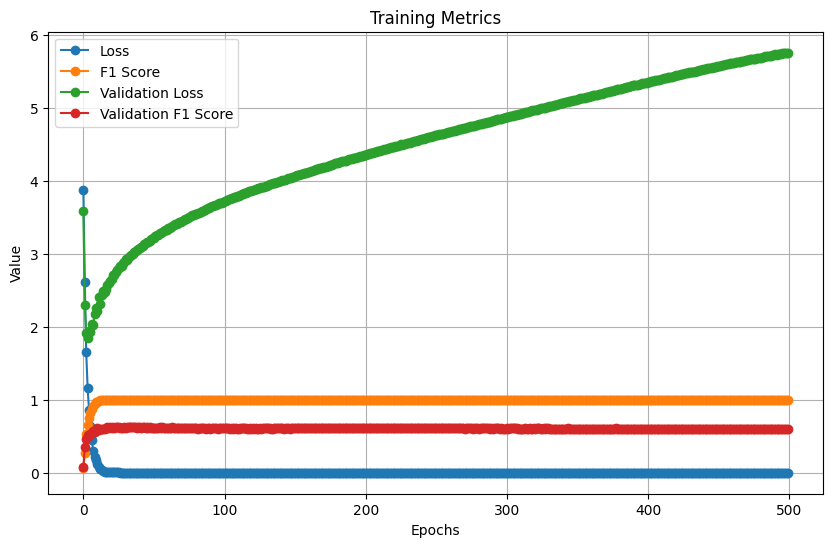

In [152]:
# Plotting
import matplotlib.pyplot as plt
epochs = range(0, 500)
plt.figure(figsize=(10, 6))
plt.plot(epochs, hist_df.loss, marker='o', label='Loss')
plt.plot(epochs, hist_df.f1_score, marker='o', label='F1 Score')
plt.plot(epochs, hist_df.val_loss, marker='o', label='Validation Loss')
plt.plot(epochs, hist_df.val_f1_score, marker='o', label='Validation F1 Score')
plt.title('Training Metrics')
plt.xlabel('Epochs')
plt.ylabel('Value')
plt.legend()
plt.grid()
plt.show()

In [131]:
reconstructed_model = tf.keras.models.load_model("1 1DCNN Lecunnormal")

In [132]:
reconstructed_model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_6 (Conv1D)           (None, 121, 100)          126100    
                                                                 
 max_pooling1d_6 (MaxPooling  (None, 12, 100)          0         
 1D)                                                             
                                                                 
 flatten_6 (Flatten)         (None, 1200)              0         
                                                                 
 dense_12 (Dense)            (None, 70)                84070     
                                                                 
 dense_13 (Dense)            (None, 50)                3550      
                                                                 
Total params: 213,720
Trainable params: 213,720
Non-trainable params: 0
________________________________________________

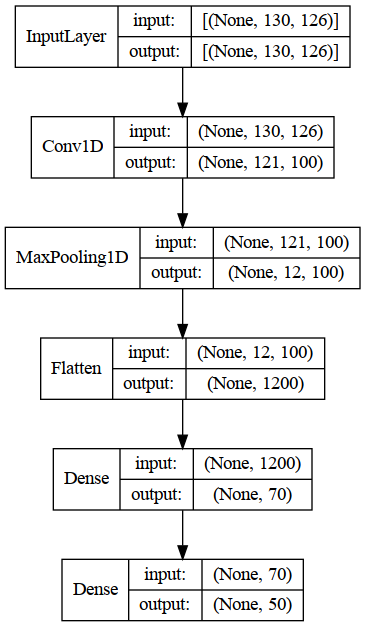

In [133]:
plot_model(reconstructed_model, show_shapes=True, show_layer_names=False)

In [134]:
reconstructed_model.evaluate(Xval,Yval)

11/11 [==============================] - 0s 7ms/step - loss: 2.9630 - f1_score: 0.6279


[2.96299409866333, 0.6279101371765137]

In [135]:
print(classification_report(np.argmax(Yval, axis=1), np.argmax(reconstructed_model.predict(Xval), axis=1),
                            digits=3, target_names=label_map))

11/11 [==============================] - 0s 5ms/step
              precision    recall  f1-score   support

         AXE      1.000     0.375     0.545         8
    BACKPACK      0.833     0.833     0.833         6
  BASKETBALL      1.000     0.600     0.750        10
         BEE      0.857     0.600     0.706        10
        BELT      0.667     0.500     0.571         4
        BITE      0.727     1.000     0.842         8
   BREAKFAST      0.222     0.333     0.267         6
      CANCER      0.667     1.000     0.800         8
   CHRISTMAS      0.429     0.500     0.462         6
    CONFUSED      0.400     0.667     0.500         6
        DARK      0.667     1.000     0.800         4
        DEAF      0.444     0.667     0.533         6
      DECIDE      0.667     0.667     0.667         6
      DEMAND      0.571     0.500     0.533         8
     DEVELOP      0.400     0.333     0.364         6
      DINNER      0.600     0.375     0.462         8
         DOG      0.750     

## Hyperparameter Tunning 2 1D CNN Layers

In [136]:
from tensorflow.keras import regularizers
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout, SpatialDropout1D, GRU
import keras_tuner
from keras_tuner import HyperModel
from kerastuner.tuners import Hyperband
from tensorflow.keras.callbacks import EarlyStopping
import tensorflow_addons as tfa

class HyperModel(HyperModel):
    def __init__(self, input_shape, num_classes):
        self.input_shape = input_shape
        self.num_classes = num_classes

    def build(self, hp):
        act_function = hp.Choice('dense_activation',values=['selu','mish','gelu','elu','relu'],default='gelu')
        model = Sequential()
        model.add(Conv1D(filters=hp.Int('filters_1',min_value=50,max_value=200,step=25,default=150),
                         kernel_size=hp.Choice('kernel_1',values=[2,3,4,5,6,7,8,9,10],default=2,),
                         activation=act_function,input_shape=self.input_shape))
        model.add(MaxPooling1D(pool_size=hp.Choice('pool_1',values=[2,3,4,5,6,7,8,9,10],default=2,)))
        model.add(Conv1D(filters=hp.Int('filters_2',min_value=50,max_value=200,step=25,default=150),
                         kernel_size=hp.Choice('kernel_2',values=[1,2,3,4,5],default=2,),
                         activation=act_function,input_shape=self.input_shape))
        model.add(MaxPooling1D(pool_size=hp.Choice('pool_2',values=[1,2,3,4,5],default=2,)))
        model.add(Dropout(rate=hp.Float('dropout_1',min_value=0.0,max_value=0.9,default=0.75,step=0.05,)))
        model.add(Flatten())        
        model.add(Dense(units=hp.Int('units_2',min_value=70,max_value=120,step=10,default=90),activation=act_function))
        model.add(Dropout(rate=hp.Float('dropout_2',min_value=0.0,max_value=0.9,default=0.5,step=0.05,)))        
        model.add(Dense(self.num_classes, activation='softmax'))

        model.compile(tf.optimizers.experimental.Nadam(hp.Float('learning_rate',min_value=1e-4,
                                                                max_value=1e-2,sampling='LOG',
                                                                default=0.001201687537647584)),
            loss='categorical_crossentropy',
            metrics=[tfa.metrics.F1Score(num_classes=50, average='macro')]
        )
        return model

hypermodel = HyperModel(input_shape=(130,399), num_classes=50)

In [137]:
HYPERBAND_MAX_EPOCHS = 300
#MAX_TRIALS = 20
EXECUTION_PER_TRIAL = 2

tuner = Hyperband(
    hypermodel,
    max_epochs=HYPERBAND_MAX_EPOCHS,
    objective=keras_tuner.Objective("val_f1_score", direction="max"),
    seed=10,
    executions_per_trial=EXECUTION_PER_TRIAL,
    directory='/media/kristian/HDD/ASL_Citizen/RTMPose-L/hyperband/',
    project_name='2_1D_CNN',
    overwrite=False)

INFO:tensorflow:Reloading Tuner from /media/kristian/HDD/ASL_Citizen/Mediapipe/hyperband/2_1D_CNN/tuner0.json


In [117]:
tuner.search_space_summary()

Search space summary
Default search space size: 11
dense_activation (Choice)
{'default': 'gelu', 'conditions': [], 'values': ['selu', 'LeakyReLU', 'gelu', 'elu', 'relu'], 'ordered': False}
num_filters_1 (Choice)
{'default': 150, 'conditions': [], 'values': [100, 125, 150, 200], 'ordered': True}
kernel_1 (Choice)
{'default': 2, 'conditions': [], 'values': [2, 3, 4, 5, 6, 7, 8, 9, 10], 'ordered': True}
pool_1 (Choice)
{'default': 2, 'conditions': [], 'values': [2, 3, 4, 5, 6, 7, 8, 9, 10], 'ordered': True}
num_filters_2 (Choice)
{'default': 150, 'conditions': [], 'values': [100, 125, 150, 200], 'ordered': True}
kernel_2 (Choice)
{'default': 2, 'conditions': [], 'values': [1, 2, 3, 4, 5], 'ordered': True}
pool_2 (Choice)
{'default': 2, 'conditions': [], 'values': [1, 2, 3, 4, 5], 'ordered': True}
dropout_1 (Float)
{'default': 0.75, 'conditions': [], 'min_value': 0.0, 'max_value': 0.9, 'step': 0.05, 'sampling': 'linear'}
units_2 (Int)
{'default': 90, 'conditions': [], 'min_value': 70, 'max

In [118]:
es = EarlyStopping(monitor="val_f1_score",patience=30,restore_best_weights=True,mode="max")

In [119]:
tuner.search(Xtrain, Ytrain, epochs=1000, validation_data=(Xval,Yval),batch_size=96,callbacks=[es])

Trial 725 Complete [00h 05m 34s]
val_f1_score: 0.6128697395324707

Best val_f1_score So Far: 0.8297823667526245
Total elapsed time: 05h 35m 48s
INFO:tensorflow:Oracle triggered exit


In [120]:
tuner.results_summary()

Results summary
Results in /media/kristian/HDD/ASL_Citizen/Mediapipe/hyperband/2_1D_CNN
Showing 10 best trials
Objective(name="val_f1_score", direction="max")

Trial 0670 summary
Hyperparameters:
dense_activation: gelu
num_filters_1: 200
kernel_1: 2
pool_1: 7
num_filters_2: 150
kernel_2: 3
pool_2: 4
dropout_1: 0.55
units_2: 80
dropout_2: 0.7000000000000001
learning_rate: 0.0032857440370174544
tuner/epochs: 300
tuner/initial_epoch: 100
tuner/bracket: 3
tuner/round: 3
tuner/trial_id: 0666
Score: 0.8297823667526245

Trial 0715 summary
Hyperparameters:
dense_activation: gelu
num_filters_1: 150
kernel_1: 3
pool_1: 4
num_filters_2: 200
kernel_2: 1
pool_2: 4
dropout_1: 0.25
units_2: 80
dropout_2: 0.65
learning_rate: 0.0010731058974110062
tuner/epochs: 300
tuner/initial_epoch: 100
tuner/bracket: 1
tuner/round: 1
tuner/trial_id: 0711
Score: 0.7857235968112946

Trial 0426 summary
Hyperparameters:
dense_activation: selu
num_filters_1: 200
kernel_1: 7
pool_1: 8
num_filters_2: 125
kernel_2: 4
pool_

In [138]:
best_model = tuner.get_best_models(num_models=1)[0]

In [140]:
best_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 129, 200)          50600     
                                                                 
 max_pooling1d (MaxPooling1D  (None, 18, 200)          0         
 )                                                               
                                                                 
 conv1d_1 (Conv1D)           (None, 16, 150)           90150     
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 4, 150)           0         
 1D)                                                             
                                                                 
 dropout (Dropout)           (None, 4, 150)            0         
                                                                 
 flatten (Flatten)           (None, 600)               0

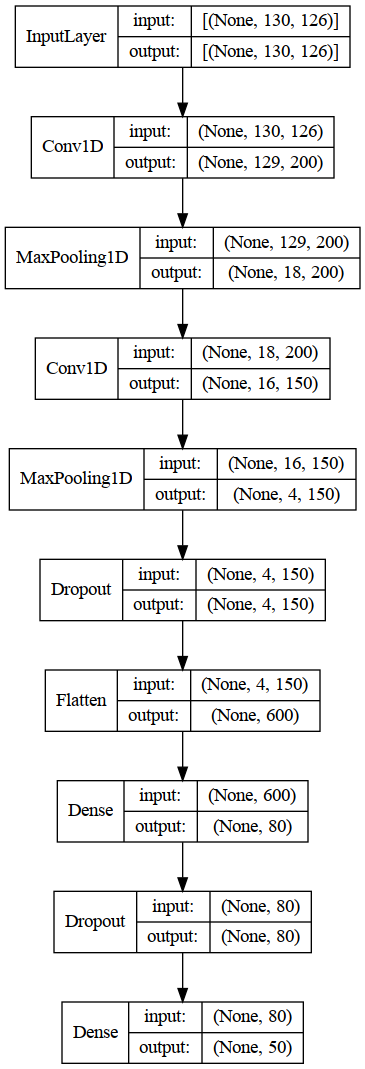

In [141]:
plot_model(best_model, show_shapes=True, show_layer_names=False)

In [139]:
loss, accuracy = best_model.evaluate(Xval, Yval)

11/11 [==============================] - 1s 11ms/step - loss: 1.0351 - f1_score: 0.8333


In [124]:
print(classification_report(np.argmax(Yval, axis=1), np.argmax(best_model.predict(Xval), axis=1),
                            digits=3, target_names=label_map))

11/11 [==============================] - 0s 5ms/step
              precision    recall  f1-score   support

         AXE      0.857     0.750     0.800         8
    BACKPACK      0.750     1.000     0.857         6
  BASKETBALL      1.000     1.000     1.000        10
         BEE      0.889     0.800     0.842        10
        BELT      1.000     1.000     1.000         4
        BITE      0.889     1.000     0.941         8
   BREAKFAST      0.545     1.000     0.706         6
      CANCER      0.889     1.000     0.941         8
   CHRISTMAS      1.000     0.833     0.909         6
    CONFUSED      0.857     1.000     0.923         6
        DARK      0.750     0.750     0.750         4
        DEAF      0.750     1.000     0.857         6
      DECIDE      1.000     0.667     0.800         6
      DEMAND      0.600     0.750     0.667         8
     DEVELOP      0.667     0.333     0.444         6
      DINNER      0.700     0.875     0.778         8
         DOG      1.000     

In [126]:
bestHP = tuner.get_best_hyperparameters(num_trials=10)[0]

In [127]:
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath='2 1DCNN/',
    monitor='val_f1_score',
    mode='max',
    save_best_only=True)

In [133]:
print("[INFO] training the best model...")
model = tuner.hypermodel.build(bestHP)
History = model.fit(x=Xtrain, y=Ytrain,validation_data= (Xval,Yval), batch_size=96,epochs=500, verbose=1,callbacks=[model_checkpoint_callback])
#History = model.fit(x=Xtrain, y=Ytrain,validation_data= (Xval,Yval), batch_size=96,epochs=500, verbose=1)

[INFO] training the best model...
Epoch 1/500
28/28 [==============================] - 4s 43ms/step - loss: 3.9176 - f1_score: 0.0214 - val_loss: 3.8372 - val_f1_score: 0.0328
Epoch 2/500
28/28 [==============================] - 1s 32ms/step - loss: 3.7507 - f1_score: 0.0483 - val_loss: 3.4183 - val_f1_score: 0.0898
Epoch 3/500
28/28 [==============================] - 1s 32ms/step - loss: 3.4339 - f1_score: 0.1008 - val_loss: 2.9696 - val_f1_score: 0.1612
Epoch 4/500
28/28 [==============================] - 1s 32ms/step - loss: 3.1281 - f1_score: 0.1387 - val_loss: 2.6758 - val_f1_score: 0.2508
Epoch 5/500
28/28 [==============================] - 1s 32ms/step - loss: 2.8630 - f1_score: 0.1786 - val_loss: 2.4541 - val_f1_score: 0.2648
Epoch 6/500
28/28 [==============================] - 1s 33ms/step - loss: 2.6505 - f1_score: 0.2199 - val_loss: 2.2217 - val_f1_score: 0.3519
Epoch 7/500
28/28 [==============================] - 1s 33ms/step - loss: 2.4572 - f1_score: 0.2634 - val_loss: 2.

28/28 [==============================] - 1s 36ms/step - loss: 0.6662 - f1_score: 0.7774 - val_loss: 1.0293 - val_f1_score: 0.7795
Epoch 116/500
28/28 [==============================] - 1s 32ms/step - loss: 0.5989 - f1_score: 0.8062 - val_loss: 1.1092 - val_f1_score: 0.7856
Epoch 117/500
28/28 [==============================] - 1s 36ms/step - loss: 0.6397 - f1_score: 0.7988 - val_loss: 1.1487 - val_f1_score: 0.8016
Epoch 118/500
28/28 [==============================] - 1s 33ms/step - loss: 0.6292 - f1_score: 0.7936 - val_loss: 1.2305 - val_f1_score: 0.8064
Epoch 119/500
28/28 [==============================] - 1s 33ms/step - loss: 0.6719 - f1_score: 0.7895 - val_loss: 1.1980 - val_f1_score: 0.7811
Epoch 120/500
28/28 [==============================] - 1s 33ms/step - loss: 0.5541 - f1_score: 0.8193 - val_loss: 1.2174 - val_f1_score: 0.7651
Epoch 121/500
28/28 [==============================] - 1s 33ms/step - loss: 0.6313 - f1_score: 0.8065 - val_loss: 1.1898 - val_f1_score: 0.8085
Epoch 

INFO:tensorflow:Assets written to: 2 1DCNN/assets


INFO:tensorflow:Assets written to: 2 1DCNN/assets


28/28 [==============================] - 6s 216ms/step - loss: 0.5153 - f1_score: 0.8328 - val_loss: 1.1309 - val_f1_score: 0.8261
Epoch 151/500
28/28 [==============================] - 1s 33ms/step - loss: 0.5377 - f1_score: 0.8335 - val_loss: 1.0352 - val_f1_score: 0.7967
Epoch 152/500
27/28 [===========================>..] - ETA: 0s - loss: 0.5981 - f1_score: 0.8201

INFO:tensorflow:Assets written to: 2 1DCNN/assets


INFO:tensorflow:Assets written to: 2 1DCNN/assets


28/28 [==============================] - 5s 192ms/step - loss: 0.5927 - f1_score: 0.8203 - val_loss: 1.0053 - val_f1_score: 0.8293
Epoch 153/500
28/28 [==============================] - 1s 33ms/step - loss: 0.5887 - f1_score: 0.8142 - val_loss: 1.1214 - val_f1_score: 0.8225
Epoch 154/500
28/28 [==============================] - 1s 32ms/step - loss: 0.5446 - f1_score: 0.8257 - val_loss: 1.0891 - val_f1_score: 0.8039
Epoch 155/500
28/28 [==============================] - 1s 33ms/step - loss: 0.5279 - f1_score: 0.8271 - val_loss: 1.0884 - val_f1_score: 0.8196
Epoch 156/500
28/28 [==============================] - 1s 33ms/step - loss: 0.5235 - f1_score: 0.8258 - val_loss: 1.1040 - val_f1_score: 0.8124
Epoch 157/500
28/28 [==============================] - 1s 33ms/step - loss: 0.5018 - f1_score: 0.8362 - val_loss: 1.0376 - val_f1_score: 0.8201
Epoch 158/500
28/28 [==============================] - 1s 33ms/step - loss: 0.5347 - f1_score: 0.8307 - val_loss: 1.0105 - val_f1_score: 0.8044
Epoch

INFO:tensorflow:Assets written to: 2 1DCNN/assets


INFO:tensorflow:Assets written to: 2 1DCNN/assets


28/28 [==============================] - 5s 180ms/step - loss: 0.5576 - f1_score: 0.8275 - val_loss: 1.0253 - val_f1_score: 0.8313
Epoch 169/500
28/28 [==============================] - 1s 33ms/step - loss: 0.5113 - f1_score: 0.8402 - val_loss: 1.1155 - val_f1_score: 0.7863
Epoch 170/500
28/28 [==============================] - 1s 33ms/step - loss: 0.5748 - f1_score: 0.8235 - val_loss: 1.2130 - val_f1_score: 0.8109
Epoch 171/500
28/28 [==============================] - 1s 33ms/step - loss: 0.5986 - f1_score: 0.8066 - val_loss: 1.1751 - val_f1_score: 0.7971
Epoch 172/500
28/28 [==============================] - 1s 33ms/step - loss: 0.5526 - f1_score: 0.8166 - val_loss: 1.1598 - val_f1_score: 0.8037
Epoch 173/500
28/28 [==============================] - 1s 33ms/step - loss: 0.5593 - f1_score: 0.8241 - val_loss: 1.1966 - val_f1_score: 0.7852
Epoch 174/500
28/28 [==============================] - 1s 33ms/step - loss: 0.4967 - f1_score: 0.8515 - val_loss: 1.1515 - val_f1_score: 0.7690
Epoch

Epoch 225/500
28/28 [==============================] - 1s 33ms/step - loss: 0.5097 - f1_score: 0.8322 - val_loss: 1.3642 - val_f1_score: 0.8080
Epoch 226/500
28/28 [==============================] - 1s 33ms/step - loss: 0.5045 - f1_score: 0.8439 - val_loss: 1.2416 - val_f1_score: 0.7929
Epoch 227/500
28/28 [==============================] - 1s 33ms/step - loss: 0.4860 - f1_score: 0.8514 - val_loss: 1.3452 - val_f1_score: 0.7848
Epoch 228/500
28/28 [==============================] - 1s 33ms/step - loss: 0.5204 - f1_score: 0.8384 - val_loss: 1.4323 - val_f1_score: 0.7911
Epoch 229/500
27/28 [===========================>..] - ETA: 0s - loss: 0.5349 - f1_score: 0.8313

INFO:tensorflow:Assets written to: 2 1DCNN/assets


INFO:tensorflow:Assets written to: 2 1DCNN/assets


28/28 [==============================] - 6s 225ms/step - loss: 0.5328 - f1_score: 0.8314 - val_loss: 1.2460 - val_f1_score: 0.8363
Epoch 230/500
28/28 [==============================] - 1s 33ms/step - loss: 0.4656 - f1_score: 0.8557 - val_loss: 1.2809 - val_f1_score: 0.8061
Epoch 231/500
28/28 [==============================] - 1s 33ms/step - loss: 0.4739 - f1_score: 0.8566 - val_loss: 1.2193 - val_f1_score: 0.8005
Epoch 232/500
28/28 [==============================] - 1s 33ms/step - loss: 0.4847 - f1_score: 0.8453 - val_loss: 1.5533 - val_f1_score: 0.7742
Epoch 233/500
28/28 [==============================] - 1s 33ms/step - loss: 0.4600 - f1_score: 0.8512 - val_loss: 1.5665 - val_f1_score: 0.7756
Epoch 234/500
28/28 [==============================] - 1s 33ms/step - loss: 0.5006 - f1_score: 0.8471 - val_loss: 1.3727 - val_f1_score: 0.7947
Epoch 235/500
28/28 [==============================] - 1s 35ms/step - loss: 0.5321 - f1_score: 0.8458 - val_loss: 1.3731 - val_f1_score: 0.8218
Epoch

Epoch 286/500
28/28 [==============================] - 1s 33ms/step - loss: 0.4390 - f1_score: 0.8544 - val_loss: 1.3109 - val_f1_score: 0.8075
Epoch 287/500
28/28 [==============================] - 1s 34ms/step - loss: 0.4821 - f1_score: 0.8520 - val_loss: 1.5168 - val_f1_score: 0.7912
Epoch 288/500
28/28 [==============================] - 1s 36ms/step - loss: 0.4430 - f1_score: 0.8678 - val_loss: 1.4449 - val_f1_score: 0.7809
Epoch 289/500
28/28 [==============================] - 1s 35ms/step - loss: 0.5294 - f1_score: 0.8408 - val_loss: 1.3586 - val_f1_score: 0.7563
Epoch 290/500
28/28 [==============================] - 1s 35ms/step - loss: 0.4990 - f1_score: 0.8467 - val_loss: 1.4407 - val_f1_score: 0.7872
Epoch 291/500
28/28 [==============================] - 1s 35ms/step - loss: 0.4418 - f1_score: 0.8640 - val_loss: 1.2134 - val_f1_score: 0.8102
Epoch 292/500
28/28 [==============================] - 1s 33ms/step - loss: 0.4524 - f1_score: 0.8603 - val_loss: 1.2970 - val_f1_score:

Epoch 343/500
28/28 [==============================] - 1s 33ms/step - loss: 0.4237 - f1_score: 0.8704 - val_loss: 1.4664 - val_f1_score: 0.8080
Epoch 344/500
28/28 [==============================] - 1s 33ms/step - loss: 0.4549 - f1_score: 0.8636 - val_loss: 1.4602 - val_f1_score: 0.7699
Epoch 345/500
28/28 [==============================] - 1s 33ms/step - loss: 0.4314 - f1_score: 0.8747 - val_loss: 1.4074 - val_f1_score: 0.8156
Epoch 346/500
28/28 [==============================] - 1s 33ms/step - loss: 0.4452 - f1_score: 0.8643 - val_loss: 1.5627 - val_f1_score: 0.8058
Epoch 347/500
28/28 [==============================] - 1s 33ms/step - loss: 0.4565 - f1_score: 0.8610 - val_loss: 1.4071 - val_f1_score: 0.7967
Epoch 348/500
28/28 [==============================] - 1s 33ms/step - loss: 0.4349 - f1_score: 0.8656 - val_loss: 1.4631 - val_f1_score: 0.7966
Epoch 349/500
28/28 [==============================] - 1s 34ms/step - loss: 0.4312 - f1_score: 0.8742 - val_loss: 1.4400 - val_f1_score:

Epoch 400/500
28/28 [==============================] - 1s 33ms/step - loss: 0.3827 - f1_score: 0.8808 - val_loss: 1.6320 - val_f1_score: 0.8130
Epoch 401/500
28/28 [==============================] - 1s 36ms/step - loss: 0.3830 - f1_score: 0.8716 - val_loss: 1.8014 - val_f1_score: 0.7948
Epoch 402/500
28/28 [==============================] - 1s 36ms/step - loss: 0.4216 - f1_score: 0.8730 - val_loss: 1.3671 - val_f1_score: 0.8153
Epoch 403/500
28/28 [==============================] - 1s 33ms/step - loss: 0.3880 - f1_score: 0.8839 - val_loss: 1.8220 - val_f1_score: 0.7745
Epoch 404/500
28/28 [==============================] - 1s 36ms/step - loss: 0.4178 - f1_score: 0.8646 - val_loss: 1.6664 - val_f1_score: 0.7886
Epoch 405/500
28/28 [==============================] - 1s 33ms/step - loss: 0.4345 - f1_score: 0.8703 - val_loss: 1.4406 - val_f1_score: 0.7910
Epoch 406/500
28/28 [==============================] - 1s 33ms/step - loss: 0.3894 - f1_score: 0.8826 - val_loss: 1.3764 - val_f1_score:

Epoch 457/500
28/28 [==============================] - 1s 35ms/step - loss: 0.4343 - f1_score: 0.8694 - val_loss: 1.5594 - val_f1_score: 0.7919
Epoch 458/500
28/28 [==============================] - 1s 33ms/step - loss: 0.4100 - f1_score: 0.8706 - val_loss: 1.5628 - val_f1_score: 0.8089
Epoch 459/500
28/28 [==============================] - 1s 34ms/step - loss: 0.4354 - f1_score: 0.8733 - val_loss: 1.4209 - val_f1_score: 0.8115
Epoch 460/500
28/28 [==============================] - 1s 33ms/step - loss: 0.4349 - f1_score: 0.8774 - val_loss: 1.4197 - val_f1_score: 0.7925
Epoch 461/500
28/28 [==============================] - 1s 33ms/step - loss: 0.4485 - f1_score: 0.8731 - val_loss: 1.7222 - val_f1_score: 0.7819
Epoch 462/500
28/28 [==============================] - 1s 35ms/step - loss: 0.4611 - f1_score: 0.8544 - val_loss: 1.5521 - val_f1_score: 0.7862
Epoch 463/500
28/28 [==============================] - 1s 33ms/step - loss: 0.3804 - f1_score: 0.8824 - val_loss: 1.6408 - val_f1_score:

In [134]:
print(classification_report(np.argmax(Yval, axis=1), np.argmax(model.predict(Xval), axis=1),
                            digits=3, target_names=label_map))

11/11 [==============================] - 0s 6ms/step
              precision    recall  f1-score   support

         AXE      1.000     0.750     0.857         8
    BACKPACK      0.667     0.667     0.667         6
  BASKETBALL      1.000     1.000     1.000        10
         BEE      1.000     0.800     0.889        10
        BELT      1.000     1.000     1.000         4
        BITE      0.800     1.000     0.889         8
   BREAKFAST      0.429     1.000     0.600         6
      CANCER      1.000     0.750     0.857         8
   CHRISTMAS      1.000     0.500     0.667         6
    CONFUSED      0.750     0.500     0.600         6
        DARK      1.000     1.000     1.000         4
        DEAF      0.600     1.000     0.750         6
      DECIDE      1.000     0.667     0.800         6
      DEMAND      1.000     0.750     0.857         8
     DEVELOP      0.800     0.667     0.727         6
      DINNER      0.667     0.750     0.706         8
         DOG      0.857     

In [142]:
reconstructed_model = tf.keras.models.load_model("2 1DCNN")

In [143]:
reconstructed_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_4 (Conv1D)           (None, 129, 200)          50600     
                                                                 
 max_pooling1d_4 (MaxPooling  (None, 18, 200)          0         
 1D)                                                             
                                                                 
 conv1d_5 (Conv1D)           (None, 16, 150)           90150     
                                                                 
 max_pooling1d_5 (MaxPooling  (None, 4, 150)           0         
 1D)                                                             
                                                                 
 dropout_4 (Dropout)         (None, 4, 150)            0         
                                                                 
 flatten_2 (Flatten)         (None, 600)              

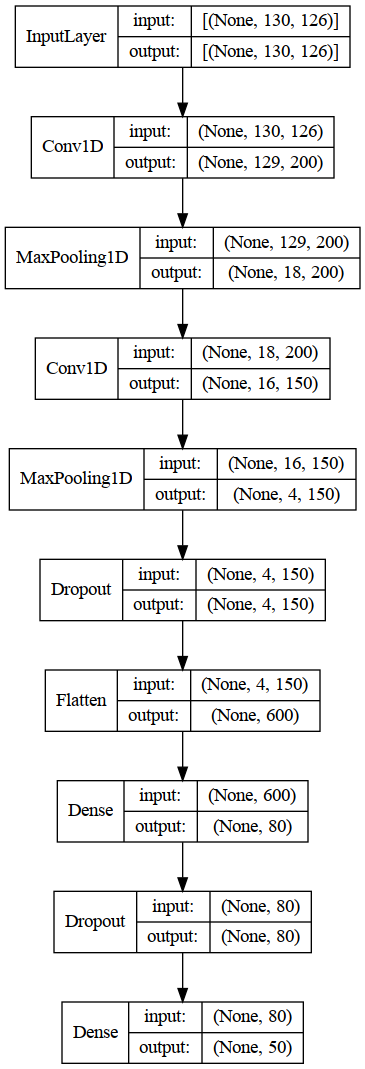

In [144]:
plot_model(reconstructed_model, show_shapes=True, show_layer_names=False)

In [145]:
reconstructed_model.evaluate(Xval,Yval)

11/11 [==============================] - 0s 6ms/step - loss: 1.2460 - f1_score: 0.8363


[1.246012806892395, 0.8363022804260254]

In [137]:
print(classification_report(np.argmax(Yval, axis=1), np.argmax(reconstructed_model.predict(Xval), axis=1),
                            digits=3, target_names=label_map))

11/11 [==============================] - 0s 5ms/step
              precision    recall  f1-score   support

         AXE      1.000     0.750     0.857         8
    BACKPACK      0.667     0.667     0.667         6
  BASKETBALL      0.909     1.000     0.952        10
         BEE      1.000     0.800     0.889        10
        BELT      1.000     1.000     1.000         4
        BITE      0.800     1.000     0.889         8
   BREAKFAST      0.462     1.000     0.632         6
      CANCER      1.000     1.000     1.000         8
   CHRISTMAS      1.000     0.667     0.800         6
    CONFUSED      0.667     1.000     0.800         6
        DARK      1.000     1.000     1.000         4
        DEAF      0.750     1.000     0.857         6
      DECIDE      1.000     0.667     0.800         6
      DEMAND      1.000     0.750     0.857         8
     DEVELOP      0.667     0.667     0.667         6
      DINNER      1.000     0.750     0.857         8
         DOG      1.000     

In [138]:
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath='2 1DCNN Mish/',
    monitor='val_f1_score',
    mode='max',
    save_best_only=True)

In [139]:
act_function=mish
model = Sequential()
model.add(Conv1D(filters=200,kernel_size=2,activation=act_function,input_shape=(130,126)))
model.add(MaxPooling1D(pool_size=7))
model.add(Conv1D(filters=150,kernel_size=3,activation=act_function))
model.add(MaxPooling1D(pool_size=4))
model.add(Dropout(.55))
model.add(Flatten())
model.add(Dense(units=80,activation=act_function))
model.add(Dropout(.7))
model.add(Dense(50, activation='softmax'))

model.compile(tf.optimizers.experimental.Nadam(0.0032857440370174544),
            loss='categorical_crossentropy',
            metrics=[tfa.metrics.F1Score(num_classes=50, average='macro')])
model.summary()
History = model.fit(x=Xtrain, y=Ytrain,validation_data= (Xval,Yval), batch_size=96,epochs=500, verbose=1,callbacks=[model_checkpoint_callback])

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_6 (Conv1D)           (None, 129, 200)          50600     
                                                                 
 max_pooling1d_6 (MaxPooling  (None, 18, 200)          0         
 1D)                                                             
                                                                 
 conv1d_7 (Conv1D)           (None, 16, 150)           90150     
                                                                 
 max_pooling1d_7 (MaxPooling  (None, 4, 150)           0         
 1D)                                                             
                                                                 
 dropout_6 (Dropout)         (None, 4, 150)            0         
                                                                 
 flatten_3 (Flatten)         (None, 600)              

INFO:tensorflow:Assets written to: 2 1DCNN Mish/assets


INFO:tensorflow:Assets written to: 2 1DCNN Mish/assets


28/28 [==============================] - 12s 358ms/step - loss: 3.9183 - f1_score: 0.0255 - val_loss: 3.7476 - val_f1_score: 0.0355
Epoch 2/500
27/28 [===========================>..] - ETA: 0s - loss: 3.7410 - f1_score: 0.0540

INFO:tensorflow:Assets written to: 2 1DCNN Mish/assets


INFO:tensorflow:Assets written to: 2 1DCNN Mish/assets


28/28 [==============================] - 5s 202ms/step - loss: 3.7402 - f1_score: 0.0546 - val_loss: 3.3871 - val_f1_score: 0.1191
Epoch 3/500
27/28 [===========================>..] - ETA: 0s - loss: 3.4641 - f1_score: 0.0894

INFO:tensorflow:Assets written to: 2 1DCNN Mish/assets


INFO:tensorflow:Assets written to: 2 1DCNN Mish/assets


28/28 [==============================] - 5s 180ms/step - loss: 3.4592 - f1_score: 0.0895 - val_loss: 2.9641 - val_f1_score: 0.1697
Epoch 4/500
27/28 [===========================>..] - ETA: 0s - loss: 3.1724 - f1_score: 0.1340

INFO:tensorflow:Assets written to: 2 1DCNN Mish/assets


INFO:tensorflow:Assets written to: 2 1DCNN Mish/assets


28/28 [==============================] - 5s 184ms/step - loss: 3.1639 - f1_score: 0.1356 - val_loss: 2.6853 - val_f1_score: 0.2310
Epoch 5/500
27/28 [===========================>..] - ETA: 0s - loss: 2.8905 - f1_score: 0.1923

INFO:tensorflow:Assets written to: 2 1DCNN Mish/assets


INFO:tensorflow:Assets written to: 2 1DCNN Mish/assets


28/28 [==============================] - 5s 179ms/step - loss: 2.9009 - f1_score: 0.1923 - val_loss: 2.4656 - val_f1_score: 0.3232
Epoch 6/500
27/28 [===========================>..] - ETA: 0s - loss: 2.7222 - f1_score: 0.2249

INFO:tensorflow:Assets written to: 2 1DCNN Mish/assets


INFO:tensorflow:Assets written to: 2 1DCNN Mish/assets


28/28 [==============================] - 5s 192ms/step - loss: 2.7238 - f1_score: 0.2260 - val_loss: 2.2019 - val_f1_score: 0.3652
Epoch 7/500
27/28 [===========================>..] - ETA: 0s - loss: 2.5015 - f1_score: 0.2654

INFO:tensorflow:Assets written to: 2 1DCNN Mish/assets


INFO:tensorflow:Assets written to: 2 1DCNN Mish/assets


28/28 [==============================] - 5s 182ms/step - loss: 2.4983 - f1_score: 0.2672 - val_loss: 2.0435 - val_f1_score: 0.4335
Epoch 8/500
27/28 [===========================>..] - ETA: 0s - loss: 2.3275 - f1_score: 0.3158

INFO:tensorflow:Assets written to: 2 1DCNN Mish/assets


INFO:tensorflow:Assets written to: 2 1DCNN Mish/assets


28/28 [==============================] - 4s 165ms/step - loss: 2.3301 - f1_score: 0.3140 - val_loss: 1.8861 - val_f1_score: 0.4539
Epoch 9/500
27/28 [===========================>..] - ETA: 0s - loss: 2.2266 - f1_score: 0.3275

INFO:tensorflow:Assets written to: 2 1DCNN Mish/assets


INFO:tensorflow:Assets written to: 2 1DCNN Mish/assets


28/28 [==============================] - 6s 236ms/step - loss: 2.2246 - f1_score: 0.3281 - val_loss: 1.7675 - val_f1_score: 0.5181
Epoch 10/500
28/28 [==============================] - 1s 30ms/step - loss: 2.1914 - f1_score: 0.3419 - val_loss: 1.7393 - val_f1_score: 0.5056
Epoch 11/500
27/28 [===========================>..] - ETA: 0s - loss: 2.0658 - f1_score: 0.3603

INFO:tensorflow:Assets written to: 2 1DCNN Mish/assets


INFO:tensorflow:Assets written to: 2 1DCNN Mish/assets


28/28 [==============================] - 5s 174ms/step - loss: 2.0723 - f1_score: 0.3595 - val_loss: 1.6667 - val_f1_score: 0.5579
Epoch 12/500
27/28 [===========================>..] - ETA: 0s - loss: 1.9632 - f1_score: 0.4013

INFO:tensorflow:Assets written to: 2 1DCNN Mish/assets


INFO:tensorflow:Assets written to: 2 1DCNN Mish/assets


28/28 [==============================] - 5s 182ms/step - loss: 1.9558 - f1_score: 0.4037 - val_loss: 1.6196 - val_f1_score: 0.5687
Epoch 13/500
27/28 [===========================>..] - ETA: 0s - loss: 1.8681 - f1_score: 0.4301

INFO:tensorflow:Assets written to: 2 1DCNN Mish/assets


INFO:tensorflow:Assets written to: 2 1DCNN Mish/assets


28/28 [==============================] - 5s 188ms/step - loss: 1.8644 - f1_score: 0.4292 - val_loss: 1.5143 - val_f1_score: 0.6157
Epoch 14/500
28/28 [==============================] - 1s 30ms/step - loss: 1.8604 - f1_score: 0.4246 - val_loss: 1.5238 - val_f1_score: 0.5871
Epoch 15/500
28/28 [==============================] - 1s 30ms/step - loss: 1.7926 - f1_score: 0.4462 - val_loss: 1.4397 - val_f1_score: 0.6054
Epoch 16/500
27/28 [===========================>..] - ETA: 0s - loss: 1.6998 - f1_score: 0.4822

INFO:tensorflow:Assets written to: 2 1DCNN Mish/assets


INFO:tensorflow:Assets written to: 2 1DCNN Mish/assets


28/28 [==============================] - 5s 169ms/step - loss: 1.7102 - f1_score: 0.4783 - val_loss: 1.3774 - val_f1_score: 0.6375
Epoch 17/500
27/28 [===========================>..] - ETA: 0s - loss: 1.6487 - f1_score: 0.4975

INFO:tensorflow:Assets written to: 2 1DCNN Mish/assets


INFO:tensorflow:Assets written to: 2 1DCNN Mish/assets


28/28 [==============================] - 5s 177ms/step - loss: 1.6558 - f1_score: 0.4946 - val_loss: 1.2990 - val_f1_score: 0.6484
Epoch 18/500
28/28 [==============================] - 1s 30ms/step - loss: 1.6178 - f1_score: 0.4920 - val_loss: 1.3108 - val_f1_score: 0.6429
Epoch 19/500
28/28 [==============================] - 1s 30ms/step - loss: 1.5658 - f1_score: 0.5077 - val_loss: 1.3313 - val_f1_score: 0.6449
Epoch 20/500
27/28 [===========================>..] - ETA: 0s - loss: 1.5461 - f1_score: 0.5159

INFO:tensorflow:Assets written to: 2 1DCNN Mish/assets


INFO:tensorflow:Assets written to: 2 1DCNN Mish/assets


28/28 [==============================] - 19s 703ms/step - loss: 1.5564 - f1_score: 0.5151 - val_loss: 1.2311 - val_f1_score: 0.6733
Epoch 21/500
28/28 [==============================] - 1s 29ms/step - loss: 1.4909 - f1_score: 0.5367 - val_loss: 1.2394 - val_f1_score: 0.6643
Epoch 22/500
28/28 [==============================] - 1s 30ms/step - loss: 1.4700 - f1_score: 0.5428 - val_loss: 1.2293 - val_f1_score: 0.6644
Epoch 23/500
28/28 [==============================] - 1s 29ms/step - loss: 1.4896 - f1_score: 0.5319 - val_loss: 1.2688 - val_f1_score: 0.6633
Epoch 24/500
27/28 [===========================>..] - ETA: 0s - loss: 1.4170 - f1_score: 0.5553

INFO:tensorflow:Assets written to: 2 1DCNN Mish/assets


INFO:tensorflow:Assets written to: 2 1DCNN Mish/assets


28/28 [==============================] - 5s 173ms/step - loss: 1.4178 - f1_score: 0.5554 - val_loss: 1.1523 - val_f1_score: 0.6968
Epoch 25/500
27/28 [===========================>..] - ETA: 0s - loss: 1.3842 - f1_score: 0.5670

INFO:tensorflow:Assets written to: 2 1DCNN Mish/assets


INFO:tensorflow:Assets written to: 2 1DCNN Mish/assets


28/28 [==============================] - 6s 237ms/step - loss: 1.3787 - f1_score: 0.5678 - val_loss: 1.2304 - val_f1_score: 0.7286
Epoch 26/500
28/28 [==============================] - 1s 29ms/step - loss: 1.3402 - f1_score: 0.5714 - val_loss: 1.1996 - val_f1_score: 0.6795
Epoch 27/500
27/28 [===========================>..] - ETA: 0s - loss: 1.3983 - f1_score: 0.5563

INFO:tensorflow:Assets written to: 2 1DCNN Mish/assets


INFO:tensorflow:Assets written to: 2 1DCNN Mish/assets


28/28 [==============================] - 5s 176ms/step - loss: 1.3945 - f1_score: 0.5600 - val_loss: 1.1600 - val_f1_score: 0.7333
Epoch 28/500
28/28 [==============================] - 1s 29ms/step - loss: 1.2853 - f1_score: 0.5975 - val_loss: 1.1434 - val_f1_score: 0.6926
Epoch 29/500
28/28 [==============================] - 1s 30ms/step - loss: 1.2875 - f1_score: 0.6044 - val_loss: 1.1399 - val_f1_score: 0.6939
Epoch 30/500
28/28 [==============================] - 1s 30ms/step - loss: 1.2736 - f1_score: 0.6010 - val_loss: 1.0720 - val_f1_score: 0.7123
Epoch 31/500
28/28 [==============================] - 1s 30ms/step - loss: 1.2669 - f1_score: 0.6031 - val_loss: 1.1178 - val_f1_score: 0.7067
Epoch 32/500
28/28 [==============================] - 1s 30ms/step - loss: 1.2205 - f1_score: 0.6159 - val_loss: 1.0818 - val_f1_score: 0.7092
Epoch 33/500
28/28 [==============================] - 1s 30ms/step - loss: 1.2092 - f1_score: 0.6279 - val_loss: 1.1223 - val_f1_score: 0.7077
Epoch 34/50

INFO:tensorflow:Assets written to: 2 1DCNN Mish/assets


INFO:tensorflow:Assets written to: 2 1DCNN Mish/assets


28/28 [==============================] - 5s 178ms/step - loss: 1.1012 - f1_score: 0.6366 - val_loss: 1.0023 - val_f1_score: 0.7360
Epoch 40/500
27/28 [===========================>..] - ETA: 0s - loss: 1.1450 - f1_score: 0.6416

INFO:tensorflow:Assets written to: 2 1DCNN Mish/assets


INFO:tensorflow:Assets written to: 2 1DCNN Mish/assets


28/28 [==============================] - 5s 178ms/step - loss: 1.1360 - f1_score: 0.6441 - val_loss: 1.0588 - val_f1_score: 0.7370
Epoch 41/500
28/28 [==============================] - 1s 30ms/step - loss: 1.1034 - f1_score: 0.6560 - val_loss: 1.0699 - val_f1_score: 0.7187
Epoch 42/500
27/28 [===========================>..] - ETA: 0s - loss: 1.0131 - f1_score: 0.6694

INFO:tensorflow:Assets written to: 2 1DCNN Mish/assets


INFO:tensorflow:Assets written to: 2 1DCNN Mish/assets


28/28 [==============================] - 5s 175ms/step - loss: 1.0133 - f1_score: 0.6689 - val_loss: 1.0875 - val_f1_score: 0.7395
Epoch 43/500
28/28 [==============================] - 1s 30ms/step - loss: 1.0802 - f1_score: 0.6562 - val_loss: 1.2049 - val_f1_score: 0.7079
Epoch 44/500
27/28 [===========================>..] - ETA: 0s - loss: 1.0912 - f1_score: 0.6517

INFO:tensorflow:Assets written to: 2 1DCNN Mish/assets


INFO:tensorflow:Assets written to: 2 1DCNN Mish/assets


28/28 [==============================] - 22s 827ms/step - loss: 1.0887 - f1_score: 0.6528 - val_loss: 1.0300 - val_f1_score: 0.7430
Epoch 45/500
28/28 [==============================] - 1s 29ms/step - loss: 1.0654 - f1_score: 0.6404 - val_loss: 1.1637 - val_f1_score: 0.7048
Epoch 46/500
27/28 [===========================>..] - ETA: 0s - loss: 1.0382 - f1_score: 0.6615

INFO:tensorflow:Assets written to: 2 1DCNN Mish/assets


INFO:tensorflow:Assets written to: 2 1DCNN Mish/assets


28/28 [==============================] - 6s 204ms/step - loss: 1.0423 - f1_score: 0.6621 - val_loss: 1.1053 - val_f1_score: 0.7525
Epoch 47/500
28/28 [==============================] - 1s 29ms/step - loss: 1.0478 - f1_score: 0.6678 - val_loss: 1.0353 - val_f1_score: 0.7141
Epoch 48/500
28/28 [==============================] - 1s 30ms/step - loss: 1.0120 - f1_score: 0.6711 - val_loss: 1.0321 - val_f1_score: 0.7485
Epoch 49/500
28/28 [==============================] - 1s 29ms/step - loss: 0.9977 - f1_score: 0.6757 - val_loss: 1.0723 - val_f1_score: 0.7494
Epoch 50/500
28/28 [==============================] - 1s 30ms/step - loss: 0.9839 - f1_score: 0.6928 - val_loss: 1.1567 - val_f1_score: 0.7391
Epoch 51/500
28/28 [==============================] - 1s 30ms/step - loss: 1.0182 - f1_score: 0.6766 - val_loss: 1.0591 - val_f1_score: 0.7244
Epoch 52/500
27/28 [===========================>..] - ETA: 0s - loss: 0.9593 - f1_score: 0.6901

INFO:tensorflow:Assets written to: 2 1DCNN Mish/assets


INFO:tensorflow:Assets written to: 2 1DCNN Mish/assets


28/28 [==============================] - 5s 192ms/step - loss: 0.9647 - f1_score: 0.6854 - val_loss: 1.0892 - val_f1_score: 0.7634
Epoch 53/500
28/28 [==============================] - 1s 30ms/step - loss: 0.9922 - f1_score: 0.6827 - val_loss: 1.1561 - val_f1_score: 0.7382
Epoch 54/500
28/28 [==============================] - 1s 29ms/step - loss: 0.9309 - f1_score: 0.7004 - val_loss: 1.0767 - val_f1_score: 0.7566
Epoch 55/500
28/28 [==============================] - 1s 30ms/step - loss: 0.9741 - f1_score: 0.6871 - val_loss: 1.0184 - val_f1_score: 0.7199
Epoch 56/500
28/28 [==============================] - 1s 30ms/step - loss: 0.9962 - f1_score: 0.6911 - val_loss: 1.0513 - val_f1_score: 0.7617
Epoch 57/500
28/28 [==============================] - 1s 30ms/step - loss: 0.9276 - f1_score: 0.7003 - val_loss: 1.0150 - val_f1_score: 0.7574
Epoch 58/500
27/28 [===========================>..] - ETA: 0s - loss: 0.8782 - f1_score: 0.7072

INFO:tensorflow:Assets written to: 2 1DCNN Mish/assets


INFO:tensorflow:Assets written to: 2 1DCNN Mish/assets


28/28 [==============================] - 5s 178ms/step - loss: 0.8814 - f1_score: 0.7044 - val_loss: 1.0061 - val_f1_score: 0.7782
Epoch 59/500
28/28 [==============================] - 1s 30ms/step - loss: 0.8798 - f1_score: 0.7215 - val_loss: 1.0562 - val_f1_score: 0.7471
Epoch 60/500
28/28 [==============================] - 1s 30ms/step - loss: 0.9347 - f1_score: 0.7113 - val_loss: 1.1376 - val_f1_score: 0.7568
Epoch 61/500
28/28 [==============================] - 1s 30ms/step - loss: 0.9098 - f1_score: 0.7038 - val_loss: 1.0708 - val_f1_score: 0.7465
Epoch 62/500
28/28 [==============================] - 1s 30ms/step - loss: 0.8967 - f1_score: 0.7140 - val_loss: 1.1042 - val_f1_score: 0.7412
Epoch 63/500
28/28 [==============================] - 1s 30ms/step - loss: 0.9260 - f1_score: 0.7069 - val_loss: 1.1872 - val_f1_score: 0.7353
Epoch 64/500
28/28 [==============================] - 1s 30ms/step - loss: 0.8639 - f1_score: 0.7295 - val_loss: 1.0974 - val_f1_score: 0.7699
Epoch 65/50

INFO:tensorflow:Assets written to: 2 1DCNN Mish/assets


INFO:tensorflow:Assets written to: 2 1DCNN Mish/assets


28/28 [==============================] - 5s 189ms/step - loss: 0.9200 - f1_score: 0.7135 - val_loss: 0.9535 - val_f1_score: 0.7810
Epoch 68/500
28/28 [==============================] - 1s 30ms/step - loss: 0.8622 - f1_score: 0.7225 - val_loss: 1.1902 - val_f1_score: 0.7583
Epoch 69/500
28/28 [==============================] - 1s 30ms/step - loss: 0.8721 - f1_score: 0.7142 - val_loss: 1.1136 - val_f1_score: 0.7572
Epoch 70/500
28/28 [==============================] - 1s 30ms/step - loss: 0.8720 - f1_score: 0.7125 - val_loss: 1.1174 - val_f1_score: 0.7588
Epoch 71/500
27/28 [===========================>..] - ETA: 0s - loss: 0.8396 - f1_score: 0.7365

INFO:tensorflow:Assets written to: 2 1DCNN Mish/assets


INFO:tensorflow:Assets written to: 2 1DCNN Mish/assets


28/28 [==============================] - 19s 690ms/step - loss: 0.8418 - f1_score: 0.7378 - val_loss: 1.0382 - val_f1_score: 0.7838
Epoch 72/500
28/28 [==============================] - 1s 30ms/step - loss: 0.7983 - f1_score: 0.7425 - val_loss: 1.0959 - val_f1_score: 0.7644
Epoch 73/500
28/28 [==============================] - 1s 29ms/step - loss: 0.8076 - f1_score: 0.7368 - val_loss: 1.0593 - val_f1_score: 0.7503
Epoch 74/500
28/28 [==============================] - 1s 30ms/step - loss: 0.8449 - f1_score: 0.7351 - val_loss: 1.1175 - val_f1_score: 0.7757
Epoch 75/500
28/28 [==============================] - 1s 30ms/step - loss: 0.8598 - f1_score: 0.7240 - val_loss: 1.0424 - val_f1_score: 0.7800
Epoch 76/500
28/28 [==============================] - 1s 30ms/step - loss: 0.7968 - f1_score: 0.7450 - val_loss: 1.1803 - val_f1_score: 0.7637
Epoch 77/500
28/28 [==============================] - 1s 30ms/step - loss: 0.8182 - f1_score: 0.7308 - val_loss: 1.0883 - val_f1_score: 0.7634
Epoch 78/5

INFO:tensorflow:Assets written to: 2 1DCNN Mish/assets


INFO:tensorflow:Assets written to: 2 1DCNN Mish/assets


28/28 [==============================] - 6s 229ms/step - loss: 0.7759 - f1_score: 0.7549 - val_loss: 0.9712 - val_f1_score: 0.8028
Epoch 89/500
28/28 [==============================] - 1s 30ms/step - loss: 0.7682 - f1_score: 0.7639 - val_loss: 1.2227 - val_f1_score: 0.7493
Epoch 90/500
28/28 [==============================] - 1s 30ms/step - loss: 0.7830 - f1_score: 0.7425 - val_loss: 1.1223 - val_f1_score: 0.7669
Epoch 91/500
28/28 [==============================] - 1s 30ms/step - loss: 0.7449 - f1_score: 0.7634 - val_loss: 1.0043 - val_f1_score: 0.7881
Epoch 92/500
28/28 [==============================] - 1s 30ms/step - loss: 0.7342 - f1_score: 0.7737 - val_loss: 1.0929 - val_f1_score: 0.7763
Epoch 93/500
28/28 [==============================] - 1s 31ms/step - loss: 0.6803 - f1_score: 0.7859 - val_loss: 1.1242 - val_f1_score: 0.7783
Epoch 94/500
28/28 [==============================] - 1s 30ms/step - loss: 0.7436 - f1_score: 0.7629 - val_loss: 1.1452 - val_f1_score: 0.7794
Epoch 95/50

27/28 [===========================>..] - ETA: 0s - loss: 0.6167 - f1_score: 0.8036

INFO:tensorflow:Assets written to: 2 1DCNN Mish/assets


INFO:tensorflow:Assets written to: 2 1DCNN Mish/assets


28/28 [==============================] - 6s 220ms/step - loss: 0.6216 - f1_score: 0.8030 - val_loss: 1.0020 - val_f1_score: 0.8041
Epoch 146/500
28/28 [==============================] - 1s 30ms/step - loss: 0.6185 - f1_score: 0.8058 - val_loss: 1.1395 - val_f1_score: 0.7903
Epoch 147/500
28/28 [==============================] - 1s 30ms/step - loss: 0.6394 - f1_score: 0.8025 - val_loss: 1.1949 - val_f1_score: 0.8023
Epoch 148/500
28/28 [==============================] - 1s 30ms/step - loss: 0.6330 - f1_score: 0.7932 - val_loss: 1.0106 - val_f1_score: 0.8019
Epoch 149/500
28/28 [==============================] - 1s 31ms/step - loss: 0.6089 - f1_score: 0.8124 - val_loss: 1.1010 - val_f1_score: 0.7892
Epoch 150/500
27/28 [===========================>..] - ETA: 0s - loss: 0.6022 - f1_score: 0.8054

INFO:tensorflow:Assets written to: 2 1DCNN Mish/assets


INFO:tensorflow:Assets written to: 2 1DCNN Mish/assets


28/28 [==============================] - 5s 187ms/step - loss: 0.6030 - f1_score: 0.8056 - val_loss: 1.0629 - val_f1_score: 0.8060
Epoch 151/500
28/28 [==============================] - 1s 33ms/step - loss: 0.6261 - f1_score: 0.7988 - val_loss: 1.1128 - val_f1_score: 0.7816
Epoch 152/500
28/28 [==============================] - 1s 31ms/step - loss: 0.5492 - f1_score: 0.8296 - val_loss: 1.2030 - val_f1_score: 0.7938
Epoch 153/500
28/28 [==============================] - 1s 31ms/step - loss: 0.6107 - f1_score: 0.8124 - val_loss: 1.1401 - val_f1_score: 0.7907
Epoch 154/500
28/28 [==============================] - 1s 32ms/step - loss: 0.6309 - f1_score: 0.8017 - val_loss: 1.2074 - val_f1_score: 0.7733
Epoch 155/500
28/28 [==============================] - 1s 31ms/step - loss: 0.6288 - f1_score: 0.8067 - val_loss: 1.1433 - val_f1_score: 0.8040
Epoch 156/500
28/28 [==============================] - 1s 31ms/step - loss: 0.6720 - f1_score: 0.7947 - val_loss: 1.1948 - val_f1_score: 0.8025
Epoch

INFO:tensorflow:Assets written to: 2 1DCNN Mish/assets


INFO:tensorflow:Assets written to: 2 1DCNN Mish/assets


28/28 [==============================] - 6s 221ms/step - loss: 0.6610 - f1_score: 0.7847 - val_loss: 1.0752 - val_f1_score: 0.8146
Epoch 161/500
28/28 [==============================] - 1s 31ms/step - loss: 0.5777 - f1_score: 0.8188 - val_loss: 1.2396 - val_f1_score: 0.7949
Epoch 162/500
28/28 [==============================] - 1s 31ms/step - loss: 0.6160 - f1_score: 0.8092 - val_loss: 1.0953 - val_f1_score: 0.7779
Epoch 163/500
28/28 [==============================] - 1s 31ms/step - loss: 0.5594 - f1_score: 0.8198 - val_loss: 1.1040 - val_f1_score: 0.7745
Epoch 164/500
28/28 [==============================] - 1s 30ms/step - loss: 0.6266 - f1_score: 0.8040 - val_loss: 1.1982 - val_f1_score: 0.7900
Epoch 165/500
28/28 [==============================] - 1s 30ms/step - loss: 0.5869 - f1_score: 0.8209 - val_loss: 1.3122 - val_f1_score: 0.7865
Epoch 166/500
27/28 [===========================>..] - ETA: 0s - loss: 0.5901 - f1_score: 0.8125

INFO:tensorflow:Assets written to: 2 1DCNN Mish/assets


INFO:tensorflow:Assets written to: 2 1DCNN Mish/assets


28/28 [==============================] - 5s 201ms/step - loss: 0.5926 - f1_score: 0.8098 - val_loss: 1.1137 - val_f1_score: 0.8241
Epoch 167/500
28/28 [==============================] - 1s 31ms/step - loss: 0.5566 - f1_score: 0.8190 - val_loss: 1.1825 - val_f1_score: 0.7677
Epoch 168/500
28/28 [==============================] - 1s 30ms/step - loss: 0.6314 - f1_score: 0.8103 - val_loss: 1.2514 - val_f1_score: 0.7990
Epoch 169/500
28/28 [==============================] - 1s 31ms/step - loss: 0.5881 - f1_score: 0.8180 - val_loss: 1.1365 - val_f1_score: 0.7615
Epoch 170/500
28/28 [==============================] - 1s 31ms/step - loss: 0.5806 - f1_score: 0.8218 - val_loss: 1.0051 - val_f1_score: 0.7963
Epoch 171/500
28/28 [==============================] - 1s 32ms/step - loss: 0.5341 - f1_score: 0.8288 - val_loss: 1.1399 - val_f1_score: 0.7793
Epoch 172/500
28/28 [==============================] - 1s 30ms/step - loss: 0.6240 - f1_score: 0.8114 - val_loss: 1.1366 - val_f1_score: 0.7865
Epoch

INFO:tensorflow:Assets written to: 2 1DCNN Mish/assets


INFO:tensorflow:Assets written to: 2 1DCNN Mish/assets


28/28 [==============================] - 6s 221ms/step - loss: 0.5820 - f1_score: 0.8274 - val_loss: 1.2055 - val_f1_score: 0.8277
Epoch 198/500
28/28 [==============================] - 1s 30ms/step - loss: 0.5447 - f1_score: 0.8346 - val_loss: 1.2704 - val_f1_score: 0.7796
Epoch 199/500
28/28 [==============================] - 1s 30ms/step - loss: 0.5549 - f1_score: 0.8296 - val_loss: 1.2774 - val_f1_score: 0.7850
Epoch 200/500
28/28 [==============================] - 1s 30ms/step - loss: 0.5914 - f1_score: 0.8200 - val_loss: 1.3658 - val_f1_score: 0.7451
Epoch 201/500
28/28 [==============================] - 1s 30ms/step - loss: 0.5410 - f1_score: 0.8304 - val_loss: 1.1200 - val_f1_score: 0.7928
Epoch 202/500
28/28 [==============================] - 1s 30ms/step - loss: 0.5816 - f1_score: 0.8223 - val_loss: 1.2832 - val_f1_score: 0.8056
Epoch 203/500
28/28 [==============================] - 1s 34ms/step - loss: 0.5407 - f1_score: 0.8354 - val_loss: 1.2473 - val_f1_score: 0.7766
Epoch

Epoch 254/500
28/28 [==============================] - 1s 32ms/step - loss: 0.4800 - f1_score: 0.8553 - val_loss: 1.2292 - val_f1_score: 0.7909
Epoch 255/500
28/28 [==============================] - 1s 32ms/step - loss: 0.5180 - f1_score: 0.8326 - val_loss: 1.2559 - val_f1_score: 0.8183
Epoch 256/500
28/28 [==============================] - 1s 32ms/step - loss: 0.5354 - f1_score: 0.8329 - val_loss: 1.3447 - val_f1_score: 0.8096
Epoch 257/500
28/28 [==============================] - 1s 31ms/step - loss: 0.4894 - f1_score: 0.8468 - val_loss: 1.2992 - val_f1_score: 0.7890
Epoch 258/500
28/28 [==============================] - 1s 31ms/step - loss: 0.4826 - f1_score: 0.8531 - val_loss: 1.3404 - val_f1_score: 0.7965
Epoch 259/500
28/28 [==============================] - 1s 32ms/step - loss: 0.5030 - f1_score: 0.8461 - val_loss: 1.4458 - val_f1_score: 0.7847
Epoch 260/500
28/28 [==============================] - 1s 34ms/step - loss: 0.5687 - f1_score: 0.8264 - val_loss: 1.2104 - val_f1_score:

Epoch 311/500
28/28 [==============================] - 1s 31ms/step - loss: 0.4662 - f1_score: 0.8602 - val_loss: 1.2601 - val_f1_score: 0.8151
Epoch 312/500
28/28 [==============================] - 1s 31ms/step - loss: 0.4403 - f1_score: 0.8628 - val_loss: 1.3743 - val_f1_score: 0.7886
Epoch 313/500
28/28 [==============================] - 1s 31ms/step - loss: 0.3975 - f1_score: 0.8724 - val_loss: 1.4801 - val_f1_score: 0.7940
Epoch 314/500
28/28 [==============================] - 1s 32ms/step - loss: 0.4622 - f1_score: 0.8578 - val_loss: 1.3950 - val_f1_score: 0.7960
Epoch 315/500
28/28 [==============================] - 1s 32ms/step - loss: 0.4657 - f1_score: 0.8517 - val_loss: 1.4278 - val_f1_score: 0.8106
Epoch 316/500
28/28 [==============================] - 1s 33ms/step - loss: 0.4618 - f1_score: 0.8545 - val_loss: 1.5309 - val_f1_score: 0.8046
Epoch 317/500
28/28 [==============================] - 1s 31ms/step - loss: 0.4516 - f1_score: 0.8641 - val_loss: 1.3972 - val_f1_score:

INFO:tensorflow:Assets written to: 2 1DCNN Mish/assets


INFO:tensorflow:Assets written to: 2 1DCNN Mish/assets


28/28 [==============================] - 7s 247ms/step - loss: 0.4329 - f1_score: 0.8629 - val_loss: 1.3313 - val_f1_score: 0.8317
Epoch 350/500
28/28 [==============================] - 1s 31ms/step - loss: 0.4460 - f1_score: 0.8643 - val_loss: 1.4557 - val_f1_score: 0.7910
Epoch 351/500
28/28 [==============================] - 1s 31ms/step - loss: 0.4763 - f1_score: 0.8608 - val_loss: 1.3145 - val_f1_score: 0.7890
Epoch 352/500
28/28 [==============================] - 1s 31ms/step - loss: 0.4873 - f1_score: 0.8509 - val_loss: 1.3731 - val_f1_score: 0.7982
Epoch 353/500
28/28 [==============================] - 1s 31ms/step - loss: 0.4103 - f1_score: 0.8763 - val_loss: 1.5273 - val_f1_score: 0.7924
Epoch 354/500
28/28 [==============================] - 1s 34ms/step - loss: 0.4923 - f1_score: 0.8526 - val_loss: 1.2453 - val_f1_score: 0.8113
Epoch 355/500
28/28 [==============================] - 1s 32ms/step - loss: 0.4621 - f1_score: 0.8510 - val_loss: 1.4992 - val_f1_score: 0.8051
Epoch

INFO:tensorflow:Assets written to: 2 1DCNN Mish/assets


INFO:tensorflow:Assets written to: 2 1DCNN Mish/assets


28/28 [==============================] - 6s 209ms/step - loss: 0.4637 - f1_score: 0.8573 - val_loss: 1.3351 - val_f1_score: 0.8346
Epoch 362/500
28/28 [==============================] - 1s 31ms/step - loss: 0.4512 - f1_score: 0.8658 - val_loss: 1.6766 - val_f1_score: 0.7884
Epoch 363/500
28/28 [==============================] - 1s 32ms/step - loss: 0.4947 - f1_score: 0.8572 - val_loss: 1.4313 - val_f1_score: 0.8015
Epoch 364/500
28/28 [==============================] - 1s 30ms/step - loss: 0.4799 - f1_score: 0.8566 - val_loss: 1.5043 - val_f1_score: 0.7994
Epoch 365/500
28/28 [==============================] - 1s 31ms/step - loss: 0.5036 - f1_score: 0.8470 - val_loss: 1.4527 - val_f1_score: 0.8135
Epoch 366/500
28/28 [==============================] - 1s 31ms/step - loss: 0.5101 - f1_score: 0.8490 - val_loss: 1.4804 - val_f1_score: 0.8107
Epoch 367/500
28/28 [==============================] - 1s 31ms/step - loss: 0.4836 - f1_score: 0.8520 - val_loss: 1.3617 - val_f1_score: 0.8215
Epoch

Epoch 418/500
28/28 [==============================] - 1s 31ms/step - loss: 0.4149 - f1_score: 0.8743 - val_loss: 1.6079 - val_f1_score: 0.8019
Epoch 419/500
28/28 [==============================] - 1s 31ms/step - loss: 0.4804 - f1_score: 0.8584 - val_loss: 1.4069 - val_f1_score: 0.7892
Epoch 420/500
28/28 [==============================] - 1s 31ms/step - loss: 0.4630 - f1_score: 0.8672 - val_loss: 1.2949 - val_f1_score: 0.7917
Epoch 421/500
28/28 [==============================] - 1s 31ms/step - loss: 0.4190 - f1_score: 0.8750 - val_loss: 1.5644 - val_f1_score: 0.8031
Epoch 422/500
28/28 [==============================] - 1s 31ms/step - loss: 0.4382 - f1_score: 0.8691 - val_loss: 1.5416 - val_f1_score: 0.7957
Epoch 423/500
28/28 [==============================] - 1s 31ms/step - loss: 0.4702 - f1_score: 0.8602 - val_loss: 1.4033 - val_f1_score: 0.8018
Epoch 424/500
28/28 [==============================] - 1s 31ms/step - loss: 0.5446 - f1_score: 0.8468 - val_loss: 1.4335 - val_f1_score:

Epoch 475/500
28/28 [==============================] - 1s 31ms/step - loss: 0.3789 - f1_score: 0.8833 - val_loss: 1.6973 - val_f1_score: 0.8039
Epoch 476/500
28/28 [==============================] - 1s 33ms/step - loss: 0.4611 - f1_score: 0.8683 - val_loss: 1.3271 - val_f1_score: 0.7951
Epoch 477/500
28/28 [==============================] - 1s 31ms/step - loss: 0.4242 - f1_score: 0.8768 - val_loss: 1.8554 - val_f1_score: 0.8022
Epoch 478/500
28/28 [==============================] - 1s 31ms/step - loss: 0.4276 - f1_score: 0.8672 - val_loss: 1.7159 - val_f1_score: 0.7990
Epoch 479/500
28/28 [==============================] - 1s 32ms/step - loss: 0.4323 - f1_score: 0.8732 - val_loss: 1.6055 - val_f1_score: 0.8244
Epoch 480/500
28/28 [==============================] - 1s 31ms/step - loss: 0.4540 - f1_score: 0.8694 - val_loss: 1.4244 - val_f1_score: 0.8187
Epoch 481/500
28/28 [==============================] - 1s 31ms/step - loss: 0.3991 - f1_score: 0.8774 - val_loss: 1.7097 - val_f1_score:

INFO:tensorflow:Assets written to: 2 1DCNN Mish/assets


INFO:tensorflow:Assets written to: 2 1DCNN Mish/assets


28/28 [==============================] - 6s 221ms/step - loss: 0.4424 - f1_score: 0.8710 - val_loss: 1.5690 - val_f1_score: 0.8360


In [140]:
print(classification_report(np.argmax(Yval, axis=1), np.argmax(model.predict(Xval), axis=1),
                            digits=3, target_names=label_map))

11/11 [==============================] - 0s 5ms/step
              precision    recall  f1-score   support

         AXE      1.000     0.875     0.933         8
    BACKPACK      0.667     0.667     0.667         6
  BASKETBALL      0.833     1.000     0.909        10
         BEE      0.889     0.800     0.842        10
        BELT      1.000     1.000     1.000         4
        BITE      1.000     1.000     1.000         8
   BREAKFAST      0.500     0.833     0.625         6
      CANCER      0.800     1.000     0.889         8
   CHRISTMAS      1.000     0.667     0.800         6
    CONFUSED      0.857     1.000     0.923         6
        DARK      0.800     1.000     0.889         4
        DEAF      0.857     1.000     0.923         6
      DECIDE      0.667     0.667     0.667         6
      DEMAND      1.000     0.500     0.667         8
     DEVELOP      0.500     0.500     0.500         6
      DINNER      1.000     0.875     0.933         8
         DOG      1.000     

In [146]:
reconstructed_model = tf.keras.models.load_model("2 1DCNN Mish")

In [147]:
reconstructed_model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_6 (Conv1D)           (None, 129, 200)          50600     
                                                                 
 max_pooling1d_6 (MaxPooling  (None, 18, 200)          0         
 1D)                                                             
                                                                 
 conv1d_7 (Conv1D)           (None, 16, 150)           90150     
                                                                 
 max_pooling1d_7 (MaxPooling  (None, 4, 150)           0         
 1D)                                                             
                                                                 
 dropout_6 (Dropout)         (None, 4, 150)            0         
                                                                 
 flatten_3 (Flatten)         (None, 600)              

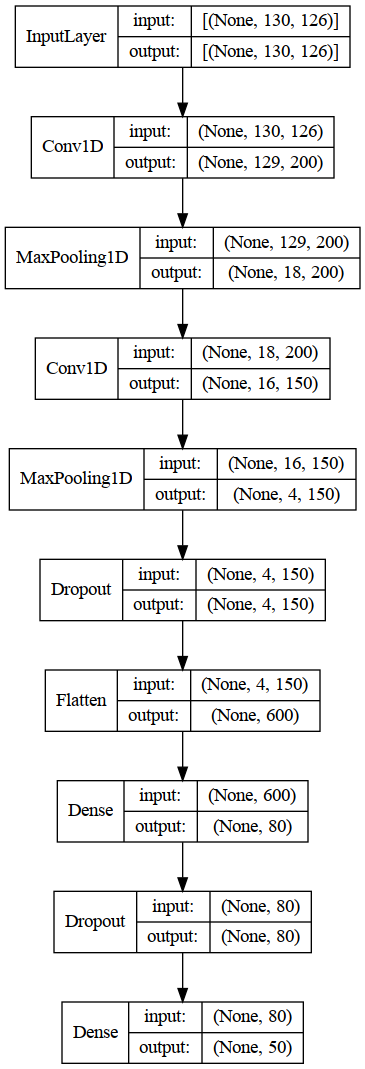

In [148]:
plot_model(reconstructed_model, show_shapes=True, show_layer_names=False)

In [149]:
reconstructed_model.evaluate(Xval,Yval)

11/11 [==============================] - 0s 6ms/step - loss: 1.5690 - f1_score: 0.8360


[1.5689743757247925, 0.8359827399253845]

In [150]:
print(classification_report(np.argmax(Yval, axis=1), np.argmax(reconstructed_model.predict(Xval), axis=1),
                            digits=3, target_names=label_map))

11/11 [==============================] - 0s 4ms/step
              precision    recall  f1-score   support

         AXE      1.000     0.875     0.933         8
    BACKPACK      0.667     0.667     0.667         6
  BASKETBALL      0.833     1.000     0.909        10
         BEE      0.889     0.800     0.842        10
        BELT      1.000     1.000     1.000         4
        BITE      1.000     1.000     1.000         8
   BREAKFAST      0.500     0.833     0.625         6
      CANCER      0.800     1.000     0.889         8
   CHRISTMAS      1.000     0.667     0.800         6
    CONFUSED      0.857     1.000     0.923         6
        DARK      0.800     1.000     0.889         4
        DEAF      0.857     1.000     0.923         6
      DECIDE      0.667     0.667     0.667         6
      DEMAND      1.000     0.500     0.667         8
     DEVELOP      0.500     0.500     0.500         6
      DINNER      1.000     0.875     0.933         8
         DOG      1.000     

## Hyperparameter Tuning 3 1D CNN Layers

In [119]:
from keras_tuner import HyperModel
from kerastuner.tuners import Hyperband
from tensorflow.keras.callbacks import EarlyStopping


/tmp/ipykernel_445075/1222377179.py:2: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
  from kerastuner.tuners import Hyperband


In [120]:
from tensorflow.keras import regularizers
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout, SpatialDropout1D, GRU
import keras_tuner
from keras_tuner import HyperModel
from kerastuner.tuners import Hyperband
from tensorflow.keras.callbacks import EarlyStopping
import tensorflow_addons as tfa

class HyperModel(HyperModel):
    def __init__(self, input_shape, num_classes):
        self.input_shape = input_shape
        self.num_classes = num_classes

    def build(self, hp):
        act_function = hp.Choice('dense_activation',values=['selu','mish','gelu','elu','relu'],default='relu')
        model = Sequential()
        model.add(Conv1D(filters=hp.Int('filters_1',min_value=50,max_value=200,step=25,default=150),kernel_size=hp.Choice('kernel_1',values=[2,3,4,5],default=2,),activation=act_function,input_shape=self.input_shape))
        model.add(MaxPooling1D(pool_size=2))
        model.add(Conv1D(filters=hp.Int('filters_2',min_value=50,max_value=200,step=25,default=150),kernel_size=hp.Choice('kernel_2',values=[2,3,4,5],default=2,),activation=act_function))
        model.add(MaxPooling1D(pool_size=2))
        model.add(Conv1D(filters=hp.Int('filters_3',min_value=50,max_value=200,step=25,default=150),kernel_size=hp.Choice('kernel_3',values=[2,3,4,5],default=2,),activation=act_function))
        model.add(MaxPooling1D(pool_size=2))
        model.add(Dropout(rate=hp.Float('dropout_1',min_value=0.5,max_value=0.9,default=0.8,step=0.05,)))
        model.add(Flatten())
        model.add(Dense(units=hp.Int('units_5',min_value=70,max_value=120,step=10,default=80),activation=act_function))
        model.add(Dropout(rate=hp.Float('dropout_2',min_value=0.5,max_value=0.9,default=0.8,step=0.05,)))
        model.add(Dense(self.num_classes, activation='softmax'))

        model.compile(tf.optimizers.experimental.Nadam(hp.Float('learning_rate',min_value=1e-4,max_value=1e-2,sampling='LOG',default=.0008273819395816823)),
            loss='categorical_crossentropy',
            metrics=[tfa.metrics.F1Score(num_classes=50, average='macro')]
        )
        return model

hypermodel = HyperModel(input_shape=(130,399), num_classes=50)

In [121]:
HYPERBAND_MAX_EPOCHS = 300
#MAX_TRIALS = 20
EXECUTION_PER_TRIAL = 2

tuner = Hyperband(
    hypermodel,
    max_epochs=HYPERBAND_MAX_EPOCHS,
    objective=keras_tuner.Objective("val_f1_score", direction="max"),
    seed=10,
    executions_per_trial=EXECUTION_PER_TRIAL,
    directory='/media/kristian/HDD/ASL_Citizen/RTMPose-L/hyperband/',
    project_name='3_1D_CNN',
    overwrite=False)

INFO:tensorflow:Reloading Tuner from /media/kristian/HDD/ASL_Citizen/RTMPose-L/hyperband/3_1D_CNN/tuner0.json


In [124]:
tuner.search_space_summary()

Search space summary
Default search space size: 11
dense_activation (Choice)
{'default': 'relu', 'conditions': [], 'values': ['selu', 'mish', 'gelu', 'elu', 'relu'], 'ordered': False}
filters_1 (Int)
{'default': 150, 'conditions': [], 'min_value': 50, 'max_value': 200, 'step': 25, 'sampling': 'linear'}
kernel_1 (Choice)
{'default': 2, 'conditions': [], 'values': [2, 3, 4, 5], 'ordered': True}
filters_2 (Int)
{'default': 150, 'conditions': [], 'min_value': 50, 'max_value': 200, 'step': 25, 'sampling': 'linear'}
kernel_2 (Choice)
{'default': 2, 'conditions': [], 'values': [2, 3, 4, 5], 'ordered': True}
filters_3 (Int)
{'default': 150, 'conditions': [], 'min_value': 50, 'max_value': 200, 'step': 25, 'sampling': 'linear'}
kernel_3 (Choice)
{'default': 2, 'conditions': [], 'values': [2, 3, 4, 5], 'ordered': True}
dropout_1 (Float)
{'default': 0.8, 'conditions': [], 'min_value': 0.5, 'max_value': 0.9, 'step': 0.05, 'sampling': 'linear'}
units_5 (Int)
{'default': 80, 'conditions': [], 'min_va

In [125]:
es = EarlyStopping(monitor="val_f1_score",patience=30,restore_best_weights=True,mode="max")

In [126]:
log_dir = os.path.join('Logs')
tb_callback = TensorBoard(log_dir=log_dir)

In [127]:
tuner.search(Xtrain, Ytrain, epochs=1000, validation_data=(Xval,Yval),batch_size=96,callbacks=[es])

Trial 725 Complete [00h 14m 47s]
val_f1_score: 0.6045276522636414

Best val_f1_score So Far: 0.6567659080028534
Total elapsed time: 10h 35m 20s
INFO:tensorflow:Oracle triggered exit


In [122]:
best_model = tuner.get_best_models(num_models=6)[0]

2023-09-06 11:17:24.840832: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-09-06 11:17:24.920215: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1616] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 1739 MB memory:  -> device: 0, name: NVIDIA GeForce MX250, pci bus id: 0000:01:00.0, compute capability: 6.1


In [127]:
best_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 129, 150)          119850    
                                                                 
 max_pooling1d (MaxPooling1D  (None, 64, 150)          0         
 )                                                               
                                                                 
 conv1d_1 (Conv1D)           (None, 60, 75)            56325     
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 30, 75)           0         
 1D)                                                             
                                                                 
 conv1d_2 (Conv1D)           (None, 27, 50)            15050     
                                                                 
 max_pooling1d_2 (MaxPooling  (None, 13, 50)           0

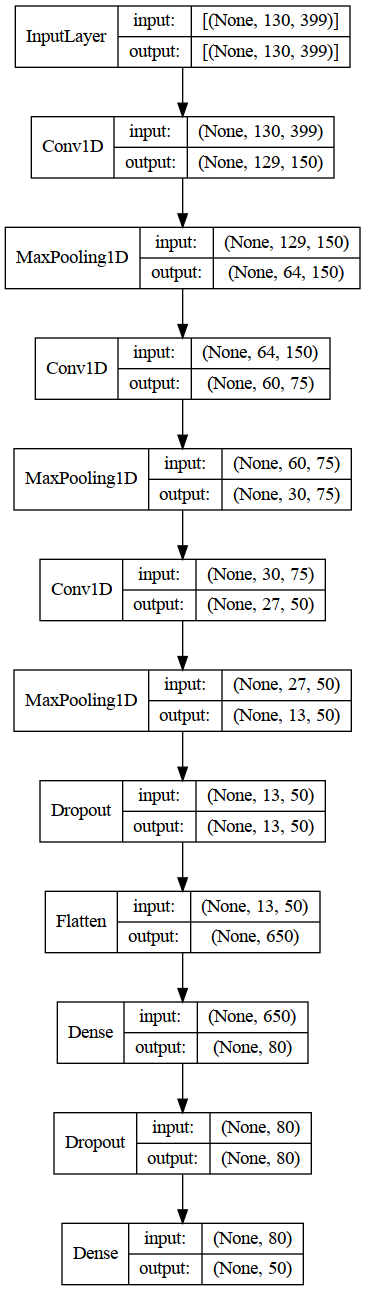

In [128]:
plot_model(best_model, show_shapes=True, show_layer_names=False)

In [129]:
tuner.results_summary()

Results summary
Results in /media/kristian/HDD/ASL_Citizen/RTMPose-L/hyperband/3_1D_CNN
Showing 10 best trials
Objective(name="val_f1_score", direction="max")

Trial 0714 summary
Hyperparameters:
dense_activation: gelu
filters_1: 150
kernel_1: 2
filters_2: 75
kernel_2: 5
filters_3: 50
kernel_3: 4
dropout_1: 0.6
units_5: 80
dropout_2: 0.8
learning_rate: 0.0010731058974110062
tuner/epochs: 300
tuner/initial_epoch: 100
tuner/bracket: 1
tuner/round: 1
tuner/trial_id: 0711
Score: 0.6567659080028534

Trial 0671 summary
Hyperparameters:
dense_activation: gelu
filters_1: 150
kernel_1: 4
filters_2: 150
kernel_2: 4
filters_3: 50
kernel_3: 2
dropout_1: 0.5
units_5: 100
dropout_2: 0.6
learning_rate: 0.00034113846912856477
tuner/epochs: 300
tuner/initial_epoch: 100
tuner/bracket: 3
tuner/round: 3
tuner/trial_id: 0667
Score: 0.6532615125179291

Trial 0718 summary
Hyperparameters:
dense_activation: elu
filters_1: 175
kernel_1: 5
filters_2: 50
kernel_2: 3
filters_3: 75
kernel_3: 2
dropout_1: 0.8500000

In [123]:
loss, accuracy = best_model.evaluate(Xval, Yval)

2023-09-06 11:17:35.329295: I tensorflow/stream_executor/cuda/cuda_dnn.cc:384] Loaded cuDNN version 8700


11/11 [==============================] - 1s 18ms/step - loss: 1.3640 - f1_score: 0.6603


In [124]:
#bestHP = tuner.get_best_hyperparameters(num_trials=5)[2]
bestHP = tuner.get_best_hyperparameters(num_trials=6)[0]

In [125]:
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath='3 1D CNN/',
    monitor='val_f1_score',
    mode='max',
    save_best_only=True)

In [126]:
print("[INFO] training the best model...")
model = tuner.hypermodel.build(bestHP)
History = model.fit(x=Xtrain, y=Ytrain,validation_data= (Xval,Yval), batch_size=96,epochs=500, verbose=1,callbacks=[model_checkpoint_callback])
#History = model.fit(x=Xtrain, y=Ytrain,validation_data= (Xval,Yval), batch_size=96,epochs=500, verbose=1)

[INFO] training the best model...
Epoch 1/500


2023-09-06 11:17:49.891273: W tensorflow/core/common_runtime/bfc_allocator.cc:290] Allocator (GPU_0_bfc) ran out of memory trying to allocate 842.83MiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.
2023-09-06 11:17:50.022525: W tensorflow/core/common_runtime/bfc_allocator.cc:290] Allocator (GPU_0_bfc) ran out of memory trying to allocate 713.74MiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.
2023-09-06 11:17:50.094878: I tensorflow/compiler/xla/service/service.cc:173] XLA service 0x7fa150d13fe0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2023-09-06 11:17:50.094913: I tensorflow/compiler/xla/service/service.cc:181]   StreamExecutor device (0): NVIDIA GeForce MX250, Compute Capability 6.1
2023-09-06 11:17:50.104444: I ten

28/28 [==============================] - ETA: 0s - loss: 3.9512 - f1_score: 0.0225

2023-09-06 11:17:53.165813: W tensorflow/core/common_runtime/bfc_allocator.cc:290] Allocator (GPU_0_bfc) ran out of memory trying to allocate 784.82MiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.
2023-09-06 11:17:53.265091: W tensorflow/core/common_runtime/bfc_allocator.cc:290] Allocator (GPU_0_bfc) ran out of memory trying to allocate 626.52MiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.
2023-09-06 11:17:53.838636: W tensorflow/core/common_runtime/bfc_allocator.cc:290] Allocator (GPU_0_bfc) ran out of memory trying to allocate 552.79MiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.


INFO:tensorflow:Assets written to: 3 1D CNN2/assets


INFO:tensorflow:Assets written to: 3 1D CNN2/assets


28/28 [==============================] - 9s 206ms/step - loss: 3.9512 - f1_score: 0.0225 - val_loss: 3.9113 - val_f1_score: 0.0039
Epoch 2/500
27/28 [===========================>..] - ETA: 0s - loss: 3.9179 - f1_score: 0.0229

INFO:tensorflow:Assets written to: 3 1D CNN2/assets


INFO:tensorflow:Assets written to: 3 1D CNN2/assets


28/28 [==============================] - 5s 167ms/step - loss: 3.9184 - f1_score: 0.0227 - val_loss: 3.9079 - val_f1_score: 0.0167
Epoch 3/500
28/28 [==============================] - 1s 51ms/step - loss: 3.9150 - f1_score: 0.0236 - val_loss: 3.9045 - val_f1_score: 0.0018
Epoch 4/500
28/28 [==============================] - 1s 51ms/step - loss: 3.9112 - f1_score: 0.0196 - val_loss: 3.9006 - val_f1_score: 0.0076
Epoch 5/500
28/28 [==============================] - 1s 51ms/step - loss: 3.9044 - f1_score: 0.0168 - val_loss: 3.8838 - val_f1_score: 0.0117
Epoch 6/500
27/28 [===========================>..] - ETA: 0s - loss: 3.8830 - f1_score: 0.0312

INFO:tensorflow:Assets written to: 3 1D CNN2/assets


INFO:tensorflow:Assets written to: 3 1D CNN2/assets


28/28 [==============================] - 4s 161ms/step - loss: 3.8836 - f1_score: 0.0307 - val_loss: 3.8398 - val_f1_score: 0.0244
Epoch 7/500
28/28 [==============================] - 1s 51ms/step - loss: 3.8395 - f1_score: 0.0356 - val_loss: 3.7278 - val_f1_score: 0.0147
Epoch 8/500
27/28 [===========================>..] - ETA: 0s - loss: 3.7663 - f1_score: 0.0461

INFO:tensorflow:Assets written to: 3 1D CNN2/assets


INFO:tensorflow:Assets written to: 3 1D CNN2/assets


28/28 [==============================] - 5s 186ms/step - loss: 3.7680 - f1_score: 0.0466 - val_loss: 3.6364 - val_f1_score: 0.0410
Epoch 9/500
28/28 [==============================] - 1s 51ms/step - loss: 3.6679 - f1_score: 0.0532 - val_loss: 3.4854 - val_f1_score: 0.0323
Epoch 10/500
28/28 [==============================] - ETA: 0s - loss: 3.5896 - f1_score: 0.0625

INFO:tensorflow:Assets written to: 3 1D CNN2/assets


INFO:tensorflow:Assets written to: 3 1D CNN2/assets


28/28 [==============================] - 5s 169ms/step - loss: 3.5896 - f1_score: 0.0625 - val_loss: 3.4178 - val_f1_score: 0.0481
Epoch 11/500
27/28 [===========================>..] - ETA: 0s - loss: 3.5354 - f1_score: 0.0615

INFO:tensorflow:Assets written to: 3 1D CNN2/assets


INFO:tensorflow:Assets written to: 3 1D CNN2/assets


28/28 [==============================] - 5s 169ms/step - loss: 3.5300 - f1_score: 0.0616 - val_loss: 3.2876 - val_f1_score: 0.0591
Epoch 12/500
27/28 [===========================>..] - ETA: 0s - loss: 3.4350 - f1_score: 0.0687

INFO:tensorflow:Assets written to: 3 1D CNN2/assets


INFO:tensorflow:Assets written to: 3 1D CNN2/assets


28/28 [==============================] - 5s 166ms/step - loss: 3.4293 - f1_score: 0.0704 - val_loss: 3.2548 - val_f1_score: 0.0592
Epoch 13/500
27/28 [===========================>..] - ETA: 0s - loss: 3.3899 - f1_score: 0.0836

INFO:tensorflow:Assets written to: 3 1D CNN2/assets


INFO:tensorflow:Assets written to: 3 1D CNN2/assets


28/28 [==============================] - 5s 179ms/step - loss: 3.3867 - f1_score: 0.0851 - val_loss: 3.1611 - val_f1_score: 0.1017
Epoch 14/500
27/28 [===========================>..] - ETA: 0s - loss: 3.3365 - f1_score: 0.0857

INFO:tensorflow:Assets written to: 3 1D CNN2/assets


INFO:tensorflow:Assets written to: 3 1D CNN2/assets


28/28 [==============================] - 5s 191ms/step - loss: 3.3340 - f1_score: 0.0855 - val_loss: 3.1208 - val_f1_score: 0.1131
Epoch 15/500
28/28 [==============================] - 1s 51ms/step - loss: 3.2820 - f1_score: 0.0918 - val_loss: 3.1006 - val_f1_score: 0.0877
Epoch 16/500
28/28 [==============================] - 1s 51ms/step - loss: 3.2272 - f1_score: 0.0953 - val_loss: 2.9881 - val_f1_score: 0.1025
Epoch 17/500
27/28 [===========================>..] - ETA: 0s - loss: 3.1760 - f1_score: 0.1023

INFO:tensorflow:Assets written to: 3 1D CNN2/assets


INFO:tensorflow:Assets written to: 3 1D CNN2/assets


28/28 [==============================] - 5s 179ms/step - loss: 3.1791 - f1_score: 0.1031 - val_loss: 2.9556 - val_f1_score: 0.1170
Epoch 18/500
28/28 [==============================] - 1s 51ms/step - loss: 3.1501 - f1_score: 0.1258 - val_loss: 2.9362 - val_f1_score: 0.1129
Epoch 19/500
27/28 [===========================>..] - ETA: 0s - loss: 3.0882 - f1_score: 0.1281

INFO:tensorflow:Assets written to: 3 1D CNN2/assets


INFO:tensorflow:Assets written to: 3 1D CNN2/assets


28/28 [==============================] - 5s 170ms/step - loss: 3.0897 - f1_score: 0.1286 - val_loss: 2.8730 - val_f1_score: 0.1356
Epoch 20/500
28/28 [==============================] - 1s 51ms/step - loss: 3.0195 - f1_score: 0.1293 - val_loss: 2.8321 - val_f1_score: 0.1242
Epoch 21/500
27/28 [===========================>..] - ETA: 0s - loss: 2.9828 - f1_score: 0.1417

INFO:tensorflow:Assets written to: 3 1D CNN2/assets


INFO:tensorflow:Assets written to: 3 1D CNN2/assets


28/28 [==============================] - 5s 168ms/step - loss: 2.9772 - f1_score: 0.1439 - val_loss: 2.7385 - val_f1_score: 0.1371
Epoch 22/500
28/28 [==============================] - ETA: 0s - loss: 2.9202 - f1_score: 0.1474

INFO:tensorflow:Assets written to: 3 1D CNN2/assets


INFO:tensorflow:Assets written to: 3 1D CNN2/assets


28/28 [==============================] - 5s 175ms/step - loss: 2.9202 - f1_score: 0.1474 - val_loss: 2.6942 - val_f1_score: 0.1505
Epoch 23/500
27/28 [===========================>..] - ETA: 0s - loss: 2.8900 - f1_score: 0.1556

INFO:tensorflow:Assets written to: 3 1D CNN2/assets


INFO:tensorflow:Assets written to: 3 1D CNN2/assets


28/28 [==============================] - 5s 171ms/step - loss: 2.8839 - f1_score: 0.1560 - val_loss: 2.6292 - val_f1_score: 0.1597
Epoch 24/500
27/28 [===========================>..] - ETA: 0s - loss: 2.8699 - f1_score: 0.1635

INFO:tensorflow:Assets written to: 3 1D CNN2/assets


INFO:tensorflow:Assets written to: 3 1D CNN2/assets


28/28 [==============================] - 6s 209ms/step - loss: 2.8689 - f1_score: 0.1644 - val_loss: 2.5852 - val_f1_score: 0.1903
Epoch 25/500
28/28 [==============================] - 1s 51ms/step - loss: 2.8187 - f1_score: 0.1747 - val_loss: 2.6227 - val_f1_score: 0.1806
Epoch 26/500
27/28 [===========================>..] - ETA: 0s - loss: 2.7639 - f1_score: 0.1833

INFO:tensorflow:Assets written to: 3 1D CNN2/assets


INFO:tensorflow:Assets written to: 3 1D CNN2/assets


28/28 [==============================] - 5s 186ms/step - loss: 2.7530 - f1_score: 0.1844 - val_loss: 2.5867 - val_f1_score: 0.2088
Epoch 27/500
28/28 [==============================] - 1s 51ms/step - loss: 2.7429 - f1_score: 0.1898 - val_loss: 2.6042 - val_f1_score: 0.1887
Epoch 28/500
27/28 [===========================>..] - ETA: 0s - loss: 2.6864 - f1_score: 0.1896

INFO:tensorflow:Assets written to: 3 1D CNN2/assets


INFO:tensorflow:Assets written to: 3 1D CNN2/assets


28/28 [==============================] - 5s 190ms/step - loss: 2.6878 - f1_score: 0.1900 - val_loss: 2.5714 - val_f1_score: 0.2140
Epoch 29/500
28/28 [==============================] - 1s 51ms/step - loss: 2.7018 - f1_score: 0.1972 - val_loss: 2.4389 - val_f1_score: 0.2052
Epoch 30/500
27/28 [===========================>..] - ETA: 0s - loss: 2.6810 - f1_score: 0.2060

INFO:tensorflow:Assets written to: 3 1D CNN2/assets


INFO:tensorflow:Assets written to: 3 1D CNN2/assets


28/28 [==============================] - 5s 178ms/step - loss: 2.6771 - f1_score: 0.2054 - val_loss: 2.4754 - val_f1_score: 0.2160
Epoch 31/500
27/28 [===========================>..] - ETA: 0s - loss: 2.5961 - f1_score: 0.2231

INFO:tensorflow:Assets written to: 3 1D CNN2/assets


INFO:tensorflow:Assets written to: 3 1D CNN2/assets


28/28 [==============================] - 5s 189ms/step - loss: 2.5968 - f1_score: 0.2226 - val_loss: 2.4049 - val_f1_score: 0.2451
Epoch 32/500
28/28 [==============================] - 1s 51ms/step - loss: 2.6134 - f1_score: 0.2030 - val_loss: 2.4697 - val_f1_score: 0.2379
Epoch 33/500
27/28 [===========================>..] - ETA: 0s - loss: 2.5573 - f1_score: 0.2155

INFO:tensorflow:Assets written to: 3 1D CNN2/assets


INFO:tensorflow:Assets written to: 3 1D CNN2/assets


28/28 [==============================] - 5s 201ms/step - loss: 2.5525 - f1_score: 0.2176 - val_loss: 2.4032 - val_f1_score: 0.2506
Epoch 34/500
27/28 [===========================>..] - ETA: 0s - loss: 2.5166 - f1_score: 0.2261

INFO:tensorflow:Assets written to: 3 1D CNN2/assets


INFO:tensorflow:Assets written to: 3 1D CNN2/assets


28/28 [==============================] - 5s 184ms/step - loss: 2.5117 - f1_score: 0.2275 - val_loss: 2.3450 - val_f1_score: 0.2731
Epoch 35/500
28/28 [==============================] - 1s 52ms/step - loss: 2.5601 - f1_score: 0.2279 - val_loss: 2.3568 - val_f1_score: 0.2700
Epoch 36/500
27/28 [===========================>..] - ETA: 0s - loss: 2.5134 - f1_score: 0.2301

INFO:tensorflow:Assets written to: 3 1D CNN2/assets


INFO:tensorflow:Assets written to: 3 1D CNN2/assets


28/28 [==============================] - 5s 183ms/step - loss: 2.5171 - f1_score: 0.2287 - val_loss: 2.3343 - val_f1_score: 0.2825
Epoch 37/500
28/28 [==============================] - 1s 52ms/step - loss: 2.4657 - f1_score: 0.2495 - val_loss: 2.3844 - val_f1_score: 0.2685
Epoch 38/500
28/28 [==============================] - 1s 52ms/step - loss: 2.4258 - f1_score: 0.2492 - val_loss: 2.2722 - val_f1_score: 0.2691
Epoch 39/500
27/28 [===========================>..] - ETA: 0s - loss: 2.4227 - f1_score: 0.2402

INFO:tensorflow:Assets written to: 3 1D CNN2/assets


INFO:tensorflow:Assets written to: 3 1D CNN2/assets


28/28 [==============================] - 5s 190ms/step - loss: 2.4244 - f1_score: 0.2384 - val_loss: 2.2980 - val_f1_score: 0.2933
Epoch 40/500
27/28 [===========================>..] - ETA: 0s - loss: 2.3829 - f1_score: 0.2561

INFO:tensorflow:Assets written to: 3 1D CNN2/assets


INFO:tensorflow:Assets written to: 3 1D CNN2/assets


28/28 [==============================] - 5s 181ms/step - loss: 2.3700 - f1_score: 0.2596 - val_loss: 2.2394 - val_f1_score: 0.3103
Epoch 41/500
28/28 [==============================] - 1s 51ms/step - loss: 2.4234 - f1_score: 0.2597 - val_loss: 2.2476 - val_f1_score: 0.2892
Epoch 42/500
28/28 [==============================] - ETA: 0s - loss: 2.3449 - f1_score: 0.2710

INFO:tensorflow:Assets written to: 3 1D CNN2/assets


INFO:tensorflow:Assets written to: 3 1D CNN2/assets


28/28 [==============================] - 5s 192ms/step - loss: 2.3449 - f1_score: 0.2710 - val_loss: 2.1843 - val_f1_score: 0.3134
Epoch 43/500
28/28 [==============================] - 1s 51ms/step - loss: 2.3190 - f1_score: 0.2773 - val_loss: 2.1943 - val_f1_score: 0.3101
Epoch 44/500
28/28 [==============================] - ETA: 0s - loss: 2.2846 - f1_score: 0.2780

INFO:tensorflow:Assets written to: 3 1D CNN2/assets


INFO:tensorflow:Assets written to: 3 1D CNN2/assets


28/28 [==============================] - 6s 206ms/step - loss: 2.2846 - f1_score: 0.2780 - val_loss: 2.1673 - val_f1_score: 0.3483
Epoch 45/500
28/28 [==============================] - 1s 52ms/step - loss: 2.2983 - f1_score: 0.2939 - val_loss: 2.1516 - val_f1_score: 0.3186
Epoch 46/500
27/28 [===========================>..] - ETA: 0s - loss: 2.2426 - f1_score: 0.2880

INFO:tensorflow:Assets written to: 3 1D CNN2/assets


INFO:tensorflow:Assets written to: 3 1D CNN2/assets


28/28 [==============================] - 5s 183ms/step - loss: 2.2479 - f1_score: 0.2862 - val_loss: 2.0943 - val_f1_score: 0.3743
Epoch 47/500
28/28 [==============================] - 1s 52ms/step - loss: 2.2434 - f1_score: 0.2959 - val_loss: 2.0841 - val_f1_score: 0.3213
Epoch 48/500
28/28 [==============================] - 1s 52ms/step - loss: 2.2102 - f1_score: 0.3004 - val_loss: 2.0500 - val_f1_score: 0.3250
Epoch 49/500
28/28 [==============================] - 1s 52ms/step - loss: 2.2251 - f1_score: 0.3156 - val_loss: 2.0821 - val_f1_score: 0.3642
Epoch 50/500
28/28 [==============================] - 1s 53ms/step - loss: 2.2060 - f1_score: 0.2956 - val_loss: 2.0287 - val_f1_score: 0.3614
Epoch 51/500
28/28 [==============================] - ETA: 0s - loss: 2.1339 - f1_score: 0.3292

INFO:tensorflow:Assets written to: 3 1D CNN2/assets


INFO:tensorflow:Assets written to: 3 1D CNN2/assets


28/28 [==============================] - 6s 215ms/step - loss: 2.1339 - f1_score: 0.3292 - val_loss: 2.0083 - val_f1_score: 0.3773
Epoch 52/500
27/28 [===========================>..] - ETA: 0s - loss: 2.1642 - f1_score: 0.3157

INFO:tensorflow:Assets written to: 3 1D CNN2/assets


INFO:tensorflow:Assets written to: 3 1D CNN2/assets


28/28 [==============================] - 5s 200ms/step - loss: 2.1632 - f1_score: 0.3148 - val_loss: 2.1306 - val_f1_score: 0.3841
Epoch 53/500
28/28 [==============================] - 1s 52ms/step - loss: 2.1469 - f1_score: 0.3305 - val_loss: 2.0201 - val_f1_score: 0.3329
Epoch 54/500
28/28 [==============================] - 1s 52ms/step - loss: 2.1391 - f1_score: 0.3247 - val_loss: 2.0657 - val_f1_score: 0.3695
Epoch 55/500
27/28 [===========================>..] - ETA: 0s - loss: 2.1414 - f1_score: 0.3277

INFO:tensorflow:Assets written to: 3 1D CNN2/assets


INFO:tensorflow:Assets written to: 3 1D CNN2/assets


28/28 [==============================] - 5s 191ms/step - loss: 2.1432 - f1_score: 0.3281 - val_loss: 1.9474 - val_f1_score: 0.4026
Epoch 56/500
28/28 [==============================] - 1s 52ms/step - loss: 2.1059 - f1_score: 0.3435 - val_loss: 1.9655 - val_f1_score: 0.3989
Epoch 57/500
27/28 [===========================>..] - ETA: 0s - loss: 2.1231 - f1_score: 0.3436

INFO:tensorflow:Assets written to: 3 1D CNN2/assets


INFO:tensorflow:Assets written to: 3 1D CNN2/assets


28/28 [==============================] - 5s 185ms/step - loss: 2.1244 - f1_score: 0.3428 - val_loss: 2.0384 - val_f1_score: 0.4237
Epoch 58/500
28/28 [==============================] - 1s 51ms/step - loss: 2.0506 - f1_score: 0.3506 - val_loss: 1.9966 - val_f1_score: 0.4054
Epoch 59/500
28/28 [==============================] - 1s 51ms/step - loss: 2.0548 - f1_score: 0.3457 - val_loss: 1.9752 - val_f1_score: 0.4167
Epoch 60/500
28/28 [==============================] - ETA: 0s - loss: 2.0475 - f1_score: 0.3464

INFO:tensorflow:Assets written to: 3 1D CNN2/assets


INFO:tensorflow:Assets written to: 3 1D CNN2/assets


28/28 [==============================] - 5s 178ms/step - loss: 2.0475 - f1_score: 0.3464 - val_loss: 1.9573 - val_f1_score: 0.4301
Epoch 61/500
28/28 [==============================] - 1s 52ms/step - loss: 2.0111 - f1_score: 0.3697 - val_loss: 1.9636 - val_f1_score: 0.3257
Epoch 62/500
27/28 [===========================>..] - ETA: 0s - loss: 1.9696 - f1_score: 0.3716

INFO:tensorflow:Assets written to: 3 1D CNN2/assets


INFO:tensorflow:Assets written to: 3 1D CNN2/assets


28/28 [==============================] - 6s 209ms/step - loss: 1.9623 - f1_score: 0.3745 - val_loss: 1.8781 - val_f1_score: 0.4334
Epoch 63/500
28/28 [==============================] - 1s 51ms/step - loss: 1.9948 - f1_score: 0.3676 - val_loss: 1.9153 - val_f1_score: 0.4089
Epoch 64/500
28/28 [==============================] - 1s 52ms/step - loss: 1.9804 - f1_score: 0.3688 - val_loss: 1.9295 - val_f1_score: 0.4246
Epoch 65/500
28/28 [==============================] - 1s 52ms/step - loss: 1.9714 - f1_score: 0.3522 - val_loss: 1.8649 - val_f1_score: 0.3941
Epoch 66/500
28/28 [==============================] - 1s 52ms/step - loss: 1.9678 - f1_score: 0.3661 - val_loss: 1.7590 - val_f1_score: 0.4142
Epoch 67/500
27/28 [===========================>..] - ETA: 0s - loss: 1.9402 - f1_score: 0.3870

INFO:tensorflow:Assets written to: 3 1D CNN2/assets


INFO:tensorflow:Assets written to: 3 1D CNN2/assets


28/28 [==============================] - 5s 191ms/step - loss: 1.9403 - f1_score: 0.3875 - val_loss: 1.8273 - val_f1_score: 0.4662
Epoch 68/500
28/28 [==============================] - 1s 52ms/step - loss: 1.9271 - f1_score: 0.3946 - val_loss: 1.7706 - val_f1_score: 0.4577
Epoch 69/500
28/28 [==============================] - 1s 52ms/step - loss: 1.8944 - f1_score: 0.3710 - val_loss: 1.8271 - val_f1_score: 0.4353
Epoch 70/500
28/28 [==============================] - 1s 52ms/step - loss: 1.8976 - f1_score: 0.3978 - val_loss: 1.7368 - val_f1_score: 0.4231
Epoch 71/500
28/28 [==============================] - 1s 52ms/step - loss: 1.8561 - f1_score: 0.3974 - val_loss: 1.8236 - val_f1_score: 0.4260
Epoch 72/500
28/28 [==============================] - 1s 52ms/step - loss: 1.8440 - f1_score: 0.4132 - val_loss: 1.8814 - val_f1_score: 0.4406
Epoch 73/500
27/28 [===========================>..] - ETA: 0s - loss: 1.8542 - f1_score: 0.3958

INFO:tensorflow:Assets written to: 3 1D CNN2/assets


INFO:tensorflow:Assets written to: 3 1D CNN2/assets


28/28 [==============================] - 5s 200ms/step - loss: 1.8581 - f1_score: 0.3955 - val_loss: 1.7570 - val_f1_score: 0.4805
Epoch 74/500
28/28 [==============================] - 1s 52ms/step - loss: 1.8491 - f1_score: 0.3935 - val_loss: 1.7916 - val_f1_score: 0.4640
Epoch 75/500
28/28 [==============================] - 1s 51ms/step - loss: 1.8504 - f1_score: 0.4021 - val_loss: 1.7489 - val_f1_score: 0.4474
Epoch 76/500
28/28 [==============================] - 1s 52ms/step - loss: 1.8463 - f1_score: 0.4122 - val_loss: 1.8463 - val_f1_score: 0.4715
Epoch 77/500
28/28 [==============================] - 1s 52ms/step - loss: 1.7859 - f1_score: 0.4185 - val_loss: 1.7279 - val_f1_score: 0.4720
Epoch 78/500
28/28 [==============================] - 1s 52ms/step - loss: 1.7658 - f1_score: 0.4327 - val_loss: 1.6711 - val_f1_score: 0.4698
Epoch 79/500
28/28 [==============================] - 1s 52ms/step - loss: 1.7909 - f1_score: 0.4179 - val_loss: 1.7574 - val_f1_score: 0.4420
Epoch 80/50

INFO:tensorflow:Assets written to: 3 1D CNN2/assets


INFO:tensorflow:Assets written to: 3 1D CNN2/assets


28/28 [==============================] - 5s 183ms/step - loss: 1.7515 - f1_score: 0.4217 - val_loss: 1.7164 - val_f1_score: 0.4966
Epoch 82/500
28/28 [==============================] - 1s 52ms/step - loss: 1.7365 - f1_score: 0.4349 - val_loss: 1.7252 - val_f1_score: 0.4936
Epoch 83/500
28/28 [==============================] - 1s 52ms/step - loss: 1.7459 - f1_score: 0.4371 - val_loss: 1.7438 - val_f1_score: 0.4878
Epoch 84/500
28/28 [==============================] - 1s 52ms/step - loss: 1.7678 - f1_score: 0.4296 - val_loss: 1.8521 - val_f1_score: 0.4563
Epoch 85/500
28/28 [==============================] - 1s 52ms/step - loss: 1.7011 - f1_score: 0.4536 - val_loss: 1.7623 - val_f1_score: 0.4908
Epoch 86/500
28/28 [==============================] - 1s 53ms/step - loss: 1.7154 - f1_score: 0.4447 - val_loss: 1.7731 - val_f1_score: 0.4439
Epoch 87/500
27/28 [===========================>..] - ETA: 0s - loss: 1.6971 - f1_score: 0.4551

INFO:tensorflow:Assets written to: 3 1D CNN2/assets


INFO:tensorflow:Assets written to: 3 1D CNN2/assets


28/28 [==============================] - 5s 174ms/step - loss: 1.6947 - f1_score: 0.4536 - val_loss: 1.6260 - val_f1_score: 0.5014
Epoch 88/500
28/28 [==============================] - 1s 52ms/step - loss: 1.7318 - f1_score: 0.4390 - val_loss: 1.7192 - val_f1_score: 0.4623
Epoch 89/500
28/28 [==============================] - 1s 52ms/step - loss: 1.6671 - f1_score: 0.4576 - val_loss: 1.6763 - val_f1_score: 0.4300
Epoch 90/500
28/28 [==============================] - ETA: 0s - loss: 1.7289 - f1_score: 0.4488

INFO:tensorflow:Assets written to: 3 1D CNN2/assets


INFO:tensorflow:Assets written to: 3 1D CNN2/assets


28/28 [==============================] - 5s 181ms/step - loss: 1.7289 - f1_score: 0.4488 - val_loss: 1.6797 - val_f1_score: 0.5086
Epoch 91/500
28/28 [==============================] - 1s 52ms/step - loss: 1.6776 - f1_score: 0.4525 - val_loss: 1.7078 - val_f1_score: 0.5037
Epoch 92/500
28/28 [==============================] - 1s 52ms/step - loss: 1.6764 - f1_score: 0.4448 - val_loss: 1.6385 - val_f1_score: 0.5064
Epoch 93/500
28/28 [==============================] - 1s 52ms/step - loss: 1.6381 - f1_score: 0.4652 - val_loss: 1.7114 - val_f1_score: 0.4931
Epoch 94/500
28/28 [==============================] - 1s 52ms/step - loss: 1.6307 - f1_score: 0.4644 - val_loss: 1.6696 - val_f1_score: 0.4875
Epoch 95/500
27/28 [===========================>..] - ETA: 0s - loss: 1.6442 - f1_score: 0.4646

INFO:tensorflow:Assets written to: 3 1D CNN2/assets


INFO:tensorflow:Assets written to: 3 1D CNN2/assets


28/28 [==============================] - 5s 187ms/step - loss: 1.6461 - f1_score: 0.4637 - val_loss: 1.6546 - val_f1_score: 0.5318
Epoch 96/500
28/28 [==============================] - 1s 53ms/step - loss: 1.6199 - f1_score: 0.4758 - val_loss: 1.6306 - val_f1_score: 0.4740
Epoch 97/500
28/28 [==============================] - 1s 52ms/step - loss: 1.5841 - f1_score: 0.4811 - val_loss: 1.5760 - val_f1_score: 0.5261
Epoch 98/500
28/28 [==============================] - 1s 53ms/step - loss: 1.6307 - f1_score: 0.4615 - val_loss: 1.5789 - val_f1_score: 0.5229
Epoch 99/500
28/28 [==============================] - 1s 53ms/step - loss: 1.6146 - f1_score: 0.4764 - val_loss: 1.6133 - val_f1_score: 0.4683
Epoch 100/500
28/28 [==============================] - 1s 52ms/step - loss: 1.6097 - f1_score: 0.4806 - val_loss: 1.6274 - val_f1_score: 0.5208
Epoch 101/500
28/28 [==============================] - 1s 52ms/step - loss: 1.5997 - f1_score: 0.4788 - val_loss: 1.7131 - val_f1_score: 0.4479
Epoch 102

INFO:tensorflow:Assets written to: 3 1D CNN2/assets


INFO:tensorflow:Assets written to: 3 1D CNN2/assets


28/28 [==============================] - 6s 205ms/step - loss: 1.5868 - f1_score: 0.4756 - val_loss: 1.6253 - val_f1_score: 0.5498
Epoch 103/500
28/28 [==============================] - 1s 52ms/step - loss: 1.5339 - f1_score: 0.4989 - val_loss: 1.5952 - val_f1_score: 0.5070
Epoch 104/500
28/28 [==============================] - 1s 52ms/step - loss: 1.5565 - f1_score: 0.4880 - val_loss: 1.6159 - val_f1_score: 0.5095
Epoch 105/500
28/28 [==============================] - 1s 52ms/step - loss: 1.5330 - f1_score: 0.4977 - val_loss: 1.6188 - val_f1_score: 0.5212
Epoch 106/500
28/28 [==============================] - 1s 52ms/step - loss: 1.5829 - f1_score: 0.4856 - val_loss: 1.6390 - val_f1_score: 0.5120
Epoch 107/500
28/28 [==============================] - 1s 52ms/step - loss: 1.5148 - f1_score: 0.5012 - val_loss: 1.5939 - val_f1_score: 0.5055
Epoch 108/500
28/28 [==============================] - 1s 52ms/step - loss: 1.5373 - f1_score: 0.4989 - val_loss: 1.5416 - val_f1_score: 0.5020
Epoch

INFO:tensorflow:Assets written to: 3 1D CNN2/assets


INFO:tensorflow:Assets written to: 3 1D CNN2/assets


28/28 [==============================] - 6s 202ms/step - loss: 1.4334 - f1_score: 0.5186 - val_loss: 1.5292 - val_f1_score: 0.5566
Epoch 118/500
28/28 [==============================] - 1s 52ms/step - loss: 1.4625 - f1_score: 0.5181 - val_loss: 1.4901 - val_f1_score: 0.5336
Epoch 119/500
28/28 [==============================] - 1s 52ms/step - loss: 1.4625 - f1_score: 0.5253 - val_loss: 1.5651 - val_f1_score: 0.5351
Epoch 120/500
28/28 [==============================] - 1s 53ms/step - loss: 1.4320 - f1_score: 0.5190 - val_loss: 1.6121 - val_f1_score: 0.5388
Epoch 121/500
28/28 [==============================] - 2s 55ms/step - loss: 1.4414 - f1_score: 0.5335 - val_loss: 1.4313 - val_f1_score: 0.5311
Epoch 122/500
28/28 [==============================] - 2s 57ms/step - loss: 1.4686 - f1_score: 0.5271 - val_loss: 1.5083 - val_f1_score: 0.5452
Epoch 123/500
28/28 [==============================] - 2s 58ms/step - loss: 1.4179 - f1_score: 0.5359 - val_loss: 1.4626 - val_f1_score: 0.5559
Epoch

INFO:tensorflow:Assets written to: 3 1D CNN2/assets


INFO:tensorflow:Assets written to: 3 1D CNN2/assets


28/28 [==============================] - 6s 218ms/step - loss: 1.4237 - f1_score: 0.5412 - val_loss: 1.4777 - val_f1_score: 0.5619
Epoch 128/500
28/28 [==============================] - 1s 53ms/step - loss: 1.4357 - f1_score: 0.5171 - val_loss: 1.5618 - val_f1_score: 0.5430
Epoch 129/500
28/28 [==============================] - 1s 53ms/step - loss: 1.3967 - f1_score: 0.5478 - val_loss: 1.5878 - val_f1_score: 0.5333
Epoch 130/500
28/28 [==============================] - 1s 53ms/step - loss: 1.3840 - f1_score: 0.5357 - val_loss: 1.5188 - val_f1_score: 0.5375
Epoch 131/500
28/28 [==============================] - 1s 53ms/step - loss: 1.3868 - f1_score: 0.5366 - val_loss: 1.4959 - val_f1_score: 0.5345
Epoch 132/500
27/28 [===========================>..] - ETA: 0s - loss: 1.3925 - f1_score: 0.5515

INFO:tensorflow:Assets written to: 3 1D CNN2/assets


INFO:tensorflow:Assets written to: 3 1D CNN2/assets


28/28 [==============================] - 6s 206ms/step - loss: 1.3863 - f1_score: 0.5532 - val_loss: 1.5001 - val_f1_score: 0.5909
Epoch 133/500
28/28 [==============================] - 2s 60ms/step - loss: 1.3870 - f1_score: 0.5364 - val_loss: 1.4941 - val_f1_score: 0.5292
Epoch 134/500
28/28 [==============================] - 2s 55ms/step - loss: 1.3769 - f1_score: 0.5452 - val_loss: 1.4827 - val_f1_score: 0.5429
Epoch 135/500
27/28 [===========================>..] - ETA: 0s - loss: 1.3830 - f1_score: 0.5499

INFO:tensorflow:Assets written to: 3 1D CNN2/assets


INFO:tensorflow:Assets written to: 3 1D CNN2/assets


28/28 [==============================] - 5s 202ms/step - loss: 1.3828 - f1_score: 0.5500 - val_loss: 1.4247 - val_f1_score: 0.5992
Epoch 136/500
28/28 [==============================] - 1s 54ms/step - loss: 1.3630 - f1_score: 0.5481 - val_loss: 1.4013 - val_f1_score: 0.5554
Epoch 137/500
28/28 [==============================] - 2s 56ms/step - loss: 1.3934 - f1_score: 0.5299 - val_loss: 1.4635 - val_f1_score: 0.5556
Epoch 138/500
28/28 [==============================] - 2s 58ms/step - loss: 1.3455 - f1_score: 0.5487 - val_loss: 1.4671 - val_f1_score: 0.5777
Epoch 139/500
28/28 [==============================] - 2s 55ms/step - loss: 1.3359 - f1_score: 0.5558 - val_loss: 1.5555 - val_f1_score: 0.5588
Epoch 140/500
28/28 [==============================] - 2s 55ms/step - loss: 1.2807 - f1_score: 0.5707 - val_loss: 1.4388 - val_f1_score: 0.5371
Epoch 141/500
28/28 [==============================] - 1s 53ms/step - loss: 1.3350 - f1_score: 0.5561 - val_loss: 1.4027 - val_f1_score: 0.5465
Epoch

INFO:tensorflow:Assets written to: 3 1D CNN2/assets


INFO:tensorflow:Assets written to: 3 1D CNN2/assets


28/28 [==============================] - 7s 257ms/step - loss: 1.1897 - f1_score: 0.5990 - val_loss: 1.3279 - val_f1_score: 0.6312
Epoch 175/500
28/28 [==============================] - 1s 53ms/step - loss: 1.1977 - f1_score: 0.5875 - val_loss: 1.3439 - val_f1_score: 0.6127
Epoch 176/500
28/28 [==============================] - 1s 53ms/step - loss: 1.2002 - f1_score: 0.6037 - val_loss: 1.4964 - val_f1_score: 0.5339
Epoch 177/500
28/28 [==============================] - 1s 53ms/step - loss: 1.1778 - f1_score: 0.6140 - val_loss: 1.4967 - val_f1_score: 0.5714
Epoch 178/500
28/28 [==============================] - 1s 53ms/step - loss: 1.2166 - f1_score: 0.6019 - val_loss: 1.3488 - val_f1_score: 0.5894
Epoch 179/500
28/28 [==============================] - 1s 53ms/step - loss: 1.1786 - f1_score: 0.6045 - val_loss: 1.4442 - val_f1_score: 0.5655
Epoch 180/500
28/28 [==============================] - 1s 53ms/step - loss: 1.1595 - f1_score: 0.6162 - val_loss: 1.3930 - val_f1_score: 0.5753
Epoch

INFO:tensorflow:Assets written to: 3 1D CNN2/assets


INFO:tensorflow:Assets written to: 3 1D CNN2/assets


28/28 [==============================] - 7s 247ms/step - loss: 1.1251 - f1_score: 0.6293 - val_loss: 1.2910 - val_f1_score: 0.6390
Epoch 211/500
28/28 [==============================] - 1s 53ms/step - loss: 1.0521 - f1_score: 0.6507 - val_loss: 1.2927 - val_f1_score: 0.6079
Epoch 212/500
28/28 [==============================] - 1s 52ms/step - loss: 1.0999 - f1_score: 0.6413 - val_loss: 1.4452 - val_f1_score: 0.5883
Epoch 213/500
28/28 [==============================] - 2s 54ms/step - loss: 1.0450 - f1_score: 0.6555 - val_loss: 1.4393 - val_f1_score: 0.5759
Epoch 214/500
28/28 [==============================] - 1s 53ms/step - loss: 1.0679 - f1_score: 0.6351 - val_loss: 1.3245 - val_f1_score: 0.6363
Epoch 215/500
28/28 [==============================] - 2s 54ms/step - loss: 1.0508 - f1_score: 0.6603 - val_loss: 1.3798 - val_f1_score: 0.5824
Epoch 216/500
28/28 [==============================] - 2s 55ms/step - loss: 1.0769 - f1_score: 0.6481 - val_loss: 1.4090 - val_f1_score: 0.6081
Epoch

INFO:tensorflow:Assets written to: 3 1D CNN2/assets


INFO:tensorflow:Assets written to: 3 1D CNN2/assets


28/28 [==============================] - 6s 212ms/step - loss: 0.9449 - f1_score: 0.6827 - val_loss: 1.3977 - val_f1_score: 0.6393
Epoch 259/500
28/28 [==============================] - 1s 53ms/step - loss: 0.9435 - f1_score: 0.6838 - val_loss: 1.4833 - val_f1_score: 0.6079
Epoch 260/500
28/28 [==============================] - 1s 53ms/step - loss: 0.9462 - f1_score: 0.6782 - val_loss: 1.4409 - val_f1_score: 0.6030
Epoch 261/500
28/28 [==============================] - 1s 53ms/step - loss: 0.9521 - f1_score: 0.6893 - val_loss: 1.5326 - val_f1_score: 0.6002
Epoch 262/500
28/28 [==============================] - 1s 53ms/step - loss: 0.9745 - f1_score: 0.6851 - val_loss: 1.3699 - val_f1_score: 0.6383
Epoch 263/500
28/28 [==============================] - 1s 53ms/step - loss: 0.9232 - f1_score: 0.6933 - val_loss: 1.4277 - val_f1_score: 0.6038
Epoch 264/500
27/28 [===========================>..] - ETA: 0s - loss: 0.9399 - f1_score: 0.6918

INFO:tensorflow:Assets written to: 3 1D CNN2/assets


INFO:tensorflow:Assets written to: 3 1D CNN2/assets


28/28 [==============================] - 5s 193ms/step - loss: 0.9397 - f1_score: 0.6912 - val_loss: 1.2755 - val_f1_score: 0.6463
Epoch 265/500
28/28 [==============================] - 2s 54ms/step - loss: 0.9062 - f1_score: 0.6999 - val_loss: 1.5533 - val_f1_score: 0.6144
Epoch 266/500
28/28 [==============================] - ETA: 0s - loss: 0.9341 - f1_score: 0.6875

INFO:tensorflow:Assets written to: 3 1D CNN2/assets


INFO:tensorflow:Assets written to: 3 1D CNN2/assets


28/28 [==============================] - 5s 193ms/step - loss: 0.9341 - f1_score: 0.6875 - val_loss: 1.2842 - val_f1_score: 0.6480
Epoch 267/500
28/28 [==============================] - 1s 52ms/step - loss: 0.9820 - f1_score: 0.6793 - val_loss: 1.3334 - val_f1_score: 0.6328
Epoch 268/500
28/28 [==============================] - 1s 52ms/step - loss: 0.9444 - f1_score: 0.6871 - val_loss: 1.4983 - val_f1_score: 0.6036
Epoch 269/500
28/28 [==============================] - 1s 53ms/step - loss: 0.9476 - f1_score: 0.6779 - val_loss: 1.3623 - val_f1_score: 0.6253
Epoch 270/500
28/28 [==============================] - 1s 53ms/step - loss: 0.9498 - f1_score: 0.6824 - val_loss: 1.4406 - val_f1_score: 0.5852
Epoch 271/500
28/28 [==============================] - 1s 53ms/step - loss: 0.9335 - f1_score: 0.6912 - val_loss: 1.5382 - val_f1_score: 0.6041
Epoch 272/500
28/28 [==============================] - ETA: 0s - loss: 0.9796 - f1_score: 0.6876

INFO:tensorflow:Assets written to: 3 1D CNN2/assets


INFO:tensorflow:Assets written to: 3 1D CNN2/assets


28/28 [==============================] - 6s 235ms/step - loss: 0.9796 - f1_score: 0.6876 - val_loss: 1.3677 - val_f1_score: 0.6588
Epoch 273/500
28/28 [==============================] - 1s 53ms/step - loss: 0.9599 - f1_score: 0.6805 - val_loss: 1.5790 - val_f1_score: 0.6012
Epoch 274/500
28/28 [==============================] - 1s 53ms/step - loss: 0.9362 - f1_score: 0.6831 - val_loss: 1.5277 - val_f1_score: 0.6101
Epoch 275/500
28/28 [==============================] - 1s 53ms/step - loss: 0.9325 - f1_score: 0.6920 - val_loss: 1.2657 - val_f1_score: 0.6391
Epoch 276/500
28/28 [==============================] - 1s 53ms/step - loss: 0.9283 - f1_score: 0.6834 - val_loss: 1.4553 - val_f1_score: 0.6272
Epoch 277/500
28/28 [==============================] - 1s 53ms/step - loss: 0.9683 - f1_score: 0.6733 - val_loss: 1.4052 - val_f1_score: 0.6236
Epoch 278/500
28/28 [==============================] - 1s 53ms/step - loss: 0.9324 - f1_score: 0.6850 - val_loss: 1.3340 - val_f1_score: 0.6307
Epoch

INFO:tensorflow:Assets written to: 3 1D CNN2/assets


INFO:tensorflow:Assets written to: 3 1D CNN2/assets


28/28 [==============================] - 6s 204ms/step - loss: 0.8975 - f1_score: 0.7019 - val_loss: 1.3183 - val_f1_score: 0.6601
Epoch 300/500
28/28 [==============================] - 1s 53ms/step - loss: 0.8924 - f1_score: 0.6962 - val_loss: 1.3568 - val_f1_score: 0.6248
Epoch 301/500
28/28 [==============================] - 1s 53ms/step - loss: 0.8858 - f1_score: 0.7164 - val_loss: 1.3082 - val_f1_score: 0.6480
Epoch 302/500
28/28 [==============================] - 1s 53ms/step - loss: 0.8761 - f1_score: 0.7154 - val_loss: 1.3687 - val_f1_score: 0.6192
Epoch 303/500
28/28 [==============================] - 2s 55ms/step - loss: 0.8500 - f1_score: 0.7065 - val_loss: 1.4713 - val_f1_score: 0.6191
Epoch 304/500
28/28 [==============================] - 1s 53ms/step - loss: 0.8578 - f1_score: 0.7176 - val_loss: 1.3515 - val_f1_score: 0.6372
Epoch 305/500
28/28 [==============================] - 2s 55ms/step - loss: 0.8730 - f1_score: 0.7178 - val_loss: 1.3763 - val_f1_score: 0.6289
Epoch

INFO:tensorflow:Assets written to: 3 1D CNN2/assets


INFO:tensorflow:Assets written to: 3 1D CNN2/assets


28/28 [==============================] - 6s 217ms/step - loss: 0.8542 - f1_score: 0.7181 - val_loss: 1.4144 - val_f1_score: 0.6697
Epoch 318/500
28/28 [==============================] - 1s 53ms/step - loss: 0.8468 - f1_score: 0.7187 - val_loss: 1.6611 - val_f1_score: 0.6256
Epoch 319/500
28/28 [==============================] - 1s 53ms/step - loss: 0.8762 - f1_score: 0.7050 - val_loss: 1.5013 - val_f1_score: 0.6124
Epoch 320/500
28/28 [==============================] - 1s 53ms/step - loss: 0.8561 - f1_score: 0.7213 - val_loss: 1.3108 - val_f1_score: 0.6469
Epoch 321/500
28/28 [==============================] - 1s 54ms/step - loss: 0.8739 - f1_score: 0.7042 - val_loss: 1.6089 - val_f1_score: 0.6237
Epoch 322/500
28/28 [==============================] - 2s 55ms/step - loss: 0.8430 - f1_score: 0.7180 - val_loss: 1.3677 - val_f1_score: 0.6505
Epoch 323/500
28/28 [==============================] - 1s 54ms/step - loss: 0.8284 - f1_score: 0.7225 - val_loss: 1.4689 - val_f1_score: 0.6237
Epoch

INFO:tensorflow:Assets written to: 3 1D CNN2/assets


INFO:tensorflow:Assets written to: 3 1D CNN2/assets


28/28 [==============================] - 5s 193ms/step - loss: 0.8407 - f1_score: 0.7317 - val_loss: 1.4743 - val_f1_score: 0.6713
Epoch 333/500
28/28 [==============================] - 1s 53ms/step - loss: 0.8580 - f1_score: 0.7117 - val_loss: 1.4484 - val_f1_score: 0.6221
Epoch 334/500
28/28 [==============================] - 1s 53ms/step - loss: 0.8053 - f1_score: 0.7411 - val_loss: 1.4515 - val_f1_score: 0.6389
Epoch 335/500
28/28 [==============================] - 1s 53ms/step - loss: 0.8628 - f1_score: 0.7100 - val_loss: 1.6145 - val_f1_score: 0.6373
Epoch 336/500
28/28 [==============================] - 2s 54ms/step - loss: 0.8284 - f1_score: 0.7339 - val_loss: 1.5477 - val_f1_score: 0.6480
Epoch 337/500
28/28 [==============================] - 1s 53ms/step - loss: 0.8071 - f1_score: 0.7344 - val_loss: 1.3933 - val_f1_score: 0.6487
Epoch 338/500
28/28 [==============================] - 1s 53ms/step - loss: 0.8498 - f1_score: 0.7137 - val_loss: 1.5404 - val_f1_score: 0.6258
Epoch

INFO:tensorflow:Assets written to: 3 1D CNN2/assets


INFO:tensorflow:Assets written to: 3 1D CNN2/assets


28/28 [==============================] - 6s 219ms/step - loss: 0.8249 - f1_score: 0.7226 - val_loss: 1.3735 - val_f1_score: 0.6754
Epoch 357/500
28/28 [==============================] - 1s 53ms/step - loss: 0.7977 - f1_score: 0.7247 - val_loss: 1.5932 - val_f1_score: 0.6446
Epoch 358/500
28/28 [==============================] - 2s 54ms/step - loss: 0.8202 - f1_score: 0.7335 - val_loss: 1.7377 - val_f1_score: 0.6072
Epoch 359/500
28/28 [==============================] - 1s 53ms/step - loss: 0.8183 - f1_score: 0.7310 - val_loss: 1.2457 - val_f1_score: 0.6698
Epoch 360/500
28/28 [==============================] - 1s 54ms/step - loss: 0.8152 - f1_score: 0.7258 - val_loss: 1.3934 - val_f1_score: 0.6318
Epoch 361/500
28/28 [==============================] - 2s 55ms/step - loss: 0.8054 - f1_score: 0.7293 - val_loss: 1.4377 - val_f1_score: 0.6448
Epoch 362/500
28/28 [==============================] - 2s 54ms/step - loss: 0.7857 - f1_score: 0.7416 - val_loss: 1.5750 - val_f1_score: 0.6458
Epoch

INFO:tensorflow:Assets written to: 3 1D CNN2/assets


INFO:tensorflow:Assets written to: 3 1D CNN2/assets


28/28 [==============================] - 6s 213ms/step - loss: 0.7492 - f1_score: 0.7511 - val_loss: 1.5676 - val_f1_score: 0.6769
Epoch 399/500
28/28 [==============================] - 2s 54ms/step - loss: 0.7721 - f1_score: 0.7399 - val_loss: 1.5220 - val_f1_score: 0.6680
Epoch 400/500
28/28 [==============================] - 1s 53ms/step - loss: 0.7763 - f1_score: 0.7460 - val_loss: 1.3851 - val_f1_score: 0.6645
Epoch 401/500
28/28 [==============================] - 2s 56ms/step - loss: 0.7264 - f1_score: 0.7575 - val_loss: 1.5952 - val_f1_score: 0.6411
Epoch 402/500
28/28 [==============================] - 1s 53ms/step - loss: 0.6972 - f1_score: 0.7621 - val_loss: 1.4393 - val_f1_score: 0.6486
Epoch 403/500
28/28 [==============================] - 1s 53ms/step - loss: 0.7337 - f1_score: 0.7537 - val_loss: 1.5430 - val_f1_score: 0.6293
Epoch 404/500
28/28 [==============================] - 1s 54ms/step - loss: 0.7535 - f1_score: 0.7565 - val_loss: 1.5157 - val_f1_score: 0.6501
Epoch

INFO:tensorflow:Assets written to: 3 1D CNN2/assets


INFO:tensorflow:Assets written to: 3 1D CNN2/assets


28/28 [==============================] - 6s 223ms/step - loss: 0.7260 - f1_score: 0.7566 - val_loss: 1.3335 - val_f1_score: 0.6891
Epoch 411/500
28/28 [==============================] - 1s 53ms/step - loss: 0.7257 - f1_score: 0.7546 - val_loss: 1.6610 - val_f1_score: 0.6454
Epoch 412/500
28/28 [==============================] - 1s 53ms/step - loss: 0.7792 - f1_score: 0.7475 - val_loss: 1.3853 - val_f1_score: 0.6542
Epoch 413/500
28/28 [==============================] - 1s 53ms/step - loss: 0.7136 - f1_score: 0.7701 - val_loss: 1.6595 - val_f1_score: 0.6304
Epoch 414/500
28/28 [==============================] - 2s 54ms/step - loss: 0.7659 - f1_score: 0.7446 - val_loss: 1.4163 - val_f1_score: 0.6499
Epoch 415/500
28/28 [==============================] - 2s 54ms/step - loss: 0.7876 - f1_score: 0.7457 - val_loss: 1.4424 - val_f1_score: 0.6494
Epoch 416/500
28/28 [==============================] - 1s 53ms/step - loss: 0.7567 - f1_score: 0.7548 - val_loss: 1.4546 - val_f1_score: 0.6497
Epoch

Epoch 467/500
28/28 [==============================] - 2s 55ms/step - loss: 0.6724 - f1_score: 0.7753 - val_loss: 1.4572 - val_f1_score: 0.6348
Epoch 468/500
28/28 [==============================] - 2s 55ms/step - loss: 0.6646 - f1_score: 0.7832 - val_loss: 1.4906 - val_f1_score: 0.6380
Epoch 469/500
28/28 [==============================] - 2s 55ms/step - loss: 0.7163 - f1_score: 0.7670 - val_loss: 1.4488 - val_f1_score: 0.6546
Epoch 470/500
28/28 [==============================] - 2s 55ms/step - loss: 0.6736 - f1_score: 0.7777 - val_loss: 1.7224 - val_f1_score: 0.6491
Epoch 471/500
28/28 [==============================] - 2s 58ms/step - loss: 0.6477 - f1_score: 0.7796 - val_loss: 1.6369 - val_f1_score: 0.6483
Epoch 472/500
28/28 [==============================] - 2s 63ms/step - loss: 0.6686 - f1_score: 0.7734 - val_loss: 1.4393 - val_f1_score: 0.6563
Epoch 473/500
28/28 [==============================] - 2s 56ms/step - loss: 0.7274 - f1_score: 0.7669 - val_loss: 1.5934 - val_f1_score:

In [134]:
# convert the history.history dict to a pandas DataFrame:     
hist_df = pd.DataFrame(History.history) 

# or save to csv: 
hist_csv_file = '3 1D CNN/history.csv'
with open(hist_csv_file, mode='w') as f:
    hist_df.to_csv(f)

In [135]:
hist_df.tail()

loss  f1_score  val_loss  val_f1_score
495  0.727356  0.764368  1.442052      0.693490
496  0.719180  0.773110  1.734342      0.653698
497  0.682115  0.776124  1.509850      0.692834
498  0.672644  0.774760  1.544902      0.671504
499  0.704269  0.767682  1.545650      0.685216

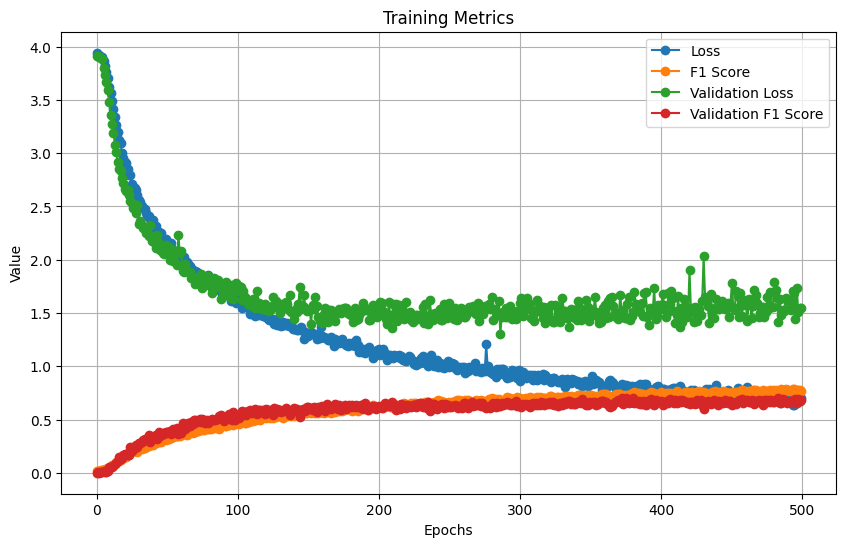

In [136]:
# Plotting
import matplotlib.pyplot as plt
epochs = range(0, 500)
plt.figure(figsize=(10, 6))
plt.plot(epochs, hist_df.loss, marker='o', label='Loss')
plt.plot(epochs, hist_df.f1_score, marker='o', label='F1 Score')
plt.plot(epochs, hist_df.val_loss, marker='o', label='Validation Loss')
plt.plot(epochs, hist_df.val_f1_score, marker='o', label='Validation F1 Score')
plt.title('Training Metrics')
plt.xlabel('Epochs')
plt.ylabel('Value')
plt.legend()
plt.grid()
plt.show()

In [127]:
print(classification_report(np.argmax(Yval, axis=1), np.argmax(model.predict(Xval), axis=1),
                            digits=3, target_names=label_map))

11/11 [==============================] - 0s 9ms/step
              precision    recall  f1-score   support

         AXE      1.000     1.000     1.000         8
    BACKPACK      0.667     1.000     0.800         6
  BASKETBALL      0.889     0.800     0.842        10
         BEE      0.667     0.600     0.632        10
        BELT      0.667     1.000     0.800         4
        BITE      0.833     0.625     0.714         8
   BREAKFAST      0.429     0.500     0.462         6
      CANCER      1.000     0.875     0.933         8
   CHRISTMAS      0.857     1.000     0.923         6
    CONFUSED      1.000     1.000     1.000         6
        DARK      1.000     1.000     1.000         4
        DEAF      0.429     0.500     0.462         6
      DECIDE      1.000     0.333     0.500         6
      DEMAND      1.000     0.500     0.667         8
     DEVELOP      0.625     0.833     0.714         6
      DINNER      1.000     0.250     0.400         8
         DOG      0.444     

In [128]:
reconstructed_model = tf.keras.models.load_model("3 1D CNN")

In [129]:
reconstructed_model.evaluate(Xval,Yval)

11/11 [==============================] - 0s 10ms/step - loss: 1.5136 - f1_score: 0.7012


[1.5136113166809082, 0.7011691927909851]

In [140]:
reconstructed_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_3 (Conv1D)           (None, 129, 150)          119850    
                                                                 
 max_pooling1d_3 (MaxPooling  (None, 64, 150)          0         
 1D)                                                             
                                                                 
 conv1d_4 (Conv1D)           (None, 60, 75)            56325     
                                                                 
 max_pooling1d_4 (MaxPooling  (None, 30, 75)           0         
 1D)                                                             
                                                                 
 conv1d_5 (Conv1D)           (None, 27, 50)            15050     
                                                                 
 max_pooling1d_5 (MaxPooling  (None, 13, 50)          

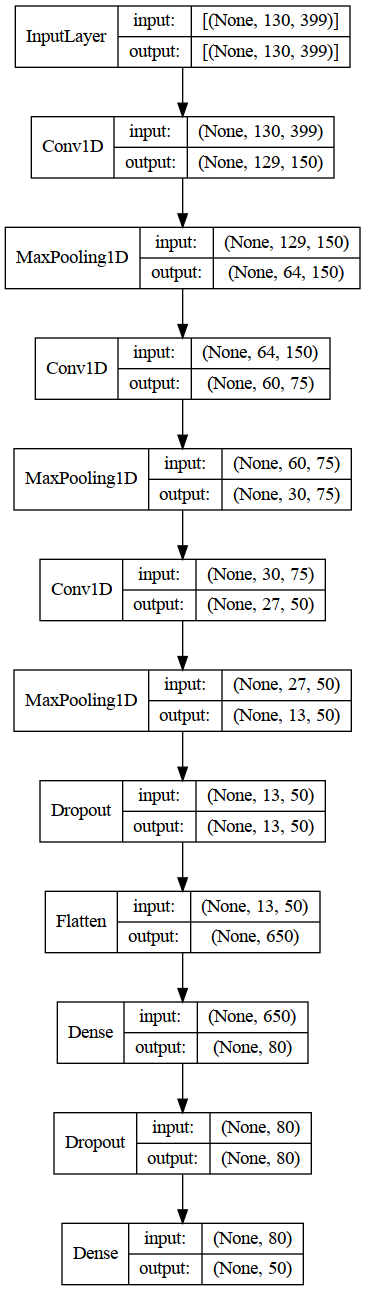

In [141]:
plot_model(reconstructed_model, show_shapes=True, show_layer_names=False)

In [142]:
print(classification_report(np.argmax(Yval, axis=1), np.argmax(reconstructed_model.predict(Xval), axis=1),
                            digits=3, target_names=label_map))

11/11 [==============================] - 0s 9ms/step
              precision    recall  f1-score   support

         AXE      0.875     0.875     0.875         8
    BACKPACK      0.750     1.000     0.857         6
  BASKETBALL      0.833     1.000     0.909        10
         BEE      0.875     0.700     0.778        10
        BELT      1.000     0.750     0.857         4
        BITE      0.833     0.625     0.714         8
   BREAKFAST      0.600     0.500     0.545         6
      CANCER      0.727     1.000     0.842         8
   CHRISTMAS      1.000     1.000     1.000         6
    CONFUSED      0.750     1.000     0.857         6
        DARK      1.000     1.000     1.000         4
        DEAF      0.333     0.333     0.333         6
      DECIDE      1.000     0.333     0.500         6
      DEMAND      1.000     0.625     0.769         8
     DEVELOP      0.444     0.667     0.533         6
      DINNER      1.000     0.625     0.769         8
         DOG      0.714     

In [117]:
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath='3 1D CNN Best Model Mish/',
    monitor='val_f1_score',
    mode='max',
    save_best_only=True)

In [121]:
act_function=mish
model = Sequential()
model.add(Conv1D(filters=100,kernel_size=2,activation=act_function,input_shape=(130,399)))
model.add(MaxPooling1D(pool_size=2))
model.add(Conv1D(filters=100,kernel_size=2,activation=act_function))
model.add(MaxPooling1D(pool_size=2))
model.add(Conv1D(filters=50,kernel_size=2,activation=act_function))
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(.75))
model.add(Flatten())
model.add(Dense(units=90,activation=act_function))
model.add(Dropout(.5))
model.add(Dense(50, activation='softmax'))

model.compile(tf.optimizers.experimental.Nadam(0.001201687537647584),
            loss='categorical_crossentropy',
            metrics=[tfa.metrics.F1Score(num_classes=50, average='macro')])
model.summary()
#History = model.fit(x=Xtrain, y=Ytrain,validation_data= (Xval,Yval), batch_size=96,epochs=500, verbose=1,callbacks=[model_checkpoint_callback])
History = model.fit(x=Xtrain, y=Ytrain,validation_data= (Xval,Yval), batch_size=96,epochs=500, verbose=1,callbacks=[])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 129, 100)          79900     
                                                                 
 max_pooling1d (MaxPooling1D  (None, 64, 100)          0         
 )                                                               
                                                                 
 conv1d_1 (Conv1D)           (None, 63, 100)           20100     
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 31, 100)          0         
 1D)                                                             
                                                                 
 conv1d_2 (Conv1D)           (None, 30, 50)            10050     
                                                                 
 max_pooling1d_2 (MaxPooling  (None, 15, 50)           0

2023-09-05 09:37:26.840128: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-09-05 09:37:26.841689: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1616] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 1435 MB memory:  -> device: 0, name: NVIDIA GeForce MX250, pci bus id: 0000:01:00.0, compute capability: 6.1


Epoch 1/500


2023-09-05 09:37:30.941558: I tensorflow/stream_executor/cuda/cuda_dnn.cc:384] Loaded cuDNN version 8700
2023-09-05 09:37:31.174615: W tensorflow/core/common_runtime/bfc_allocator.cc:290] Allocator (GPU_0_bfc) ran out of memory trying to allocate 647.72MiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.
2023-09-05 09:37:31.332985: W tensorflow/core/common_runtime/bfc_allocator.cc:290] Allocator (GPU_0_bfc) ran out of memory trying to allocate 637.06MiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.
2023-09-05 09:37:31.389796: I tensorflow/compiler/xla/service/service.cc:173] XLA service 0x7f82b4f51ab0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2023-09-05 09:37:31.389832: I tensorflow/compiler/xla/service/service.cc:181]   

28/28 [==============================] - ETA: 0s - loss: 4.1749 - f1_score: 0.0254

2023-09-05 09:37:34.073061: W tensorflow/core/common_runtime/bfc_allocator.cc:290] Allocator (GPU_0_bfc) ran out of memory trying to allocate 609.04MiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.
2023-09-05 09:37:34.150664: W tensorflow/core/common_runtime/bfc_allocator.cc:290] Allocator (GPU_0_bfc) ran out of memory trying to allocate 559.42MiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.


28/28 [==============================] - 6s 67ms/step - loss: 4.1749 - f1_score: 0.0254 - val_loss: 3.8890 - val_f1_score: 0.0282
Epoch 2/500
 3/28 [==>...........................] - ETA: 0s - loss: 3.9605 - f1_score: 0.0248

2023-09-05 09:37:34.755644: W tensorflow/core/common_runtime/bfc_allocator.cc:290] Allocator (GPU_0_bfc) ran out of memory trying to allocate 454.36MiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.


28/28 [==============================] - 1s 44ms/step - loss: 3.9281 - f1_score: 0.0316 - val_loss: 3.8232 - val_f1_score: 0.0419
Epoch 3/500
28/28 [==============================] - 1s 44ms/step - loss: 3.8301 - f1_score: 0.0429 - val_loss: 3.6723 - val_f1_score: 0.0716
Epoch 4/500
28/28 [==============================] - 1s 44ms/step - loss: 3.6782 - f1_score: 0.0652 - val_loss: 3.4443 - val_f1_score: 0.0950
Epoch 5/500
28/28 [==============================] - 1s 45ms/step - loss: 3.5035 - f1_score: 0.0823 - val_loss: 3.2606 - val_f1_score: 0.0997
Epoch 6/500
28/28 [==============================] - 1s 44ms/step - loss: 3.2884 - f1_score: 0.1159 - val_loss: 2.9966 - val_f1_score: 0.1319
Epoch 7/500
28/28 [==============================] - 1s 45ms/step - loss: 3.1070 - f1_score: 0.1389 - val_loss: 2.8160 - val_f1_score: 0.1986
Epoch 8/500
28/28 [==============================] - 1s 45ms/step - loss: 2.9299 - f1_score: 0.1679 - val_loss: 2.6509 - val_f1_score: 0.2106
Epoch 9/500
28/28 

28/28 [==============================] - 1s 45ms/step - loss: 0.4426 - f1_score: 0.8542 - val_loss: 1.6688 - val_f1_score: 0.6237
Epoch 117/500
28/28 [==============================] - 1s 46ms/step - loss: 0.3927 - f1_score: 0.8747 - val_loss: 1.7634 - val_f1_score: 0.6129
Epoch 118/500
28/28 [==============================] - 1s 46ms/step - loss: 0.3527 - f1_score: 0.8841 - val_loss: 1.8450 - val_f1_score: 0.5725
Epoch 119/500
28/28 [==============================] - 1s 46ms/step - loss: 0.3722 - f1_score: 0.8761 - val_loss: 1.8021 - val_f1_score: 0.5796
Epoch 120/500
28/28 [==============================] - 1s 47ms/step - loss: 0.3746 - f1_score: 0.8804 - val_loss: 1.7264 - val_f1_score: 0.5887
Epoch 121/500
28/28 [==============================] - 1s 49ms/step - loss: 0.4370 - f1_score: 0.8579 - val_loss: 1.8231 - val_f1_score: 0.6021
Epoch 122/500
28/28 [==============================] - 1s 51ms/step - loss: 0.4486 - f1_score: 0.8502 - val_loss: 1.8792 - val_f1_score: 0.5956
Epoch 

Epoch 173/500
28/28 [==============================] - 1s 50ms/step - loss: 0.3422 - f1_score: 0.8868 - val_loss: 1.9373 - val_f1_score: 0.6254
Epoch 174/500
28/28 [==============================] - 1s 49ms/step - loss: 0.3218 - f1_score: 0.8965 - val_loss: 1.7859 - val_f1_score: 0.6368
Epoch 175/500
28/28 [==============================] - 1s 48ms/step - loss: 0.3032 - f1_score: 0.8972 - val_loss: 1.9740 - val_f1_score: 0.5935
Epoch 176/500
28/28 [==============================] - 1s 49ms/step - loss: 0.3206 - f1_score: 0.8941 - val_loss: 1.7175 - val_f1_score: 0.6107
Epoch 177/500
28/28 [==============================] - 1s 47ms/step - loss: 0.3138 - f1_score: 0.8959 - val_loss: 1.7602 - val_f1_score: 0.6353
Epoch 178/500
28/28 [==============================] - 1s 48ms/step - loss: 0.3064 - f1_score: 0.8992 - val_loss: 1.9693 - val_f1_score: 0.5976
Epoch 179/500
28/28 [==============================] - 1s 48ms/step - loss: 0.3206 - f1_score: 0.8890 - val_loss: 1.9911 - val_f1_score:

Epoch 230/500
28/28 [==============================] - 1s 47ms/step - loss: 0.2576 - f1_score: 0.9142 - val_loss: 2.2433 - val_f1_score: 0.6113
Epoch 231/500
28/28 [==============================] - 1s 47ms/step - loss: 0.2793 - f1_score: 0.9122 - val_loss: 2.1153 - val_f1_score: 0.6036
Epoch 232/500
28/28 [==============================] - 1s 48ms/step - loss: 0.2604 - f1_score: 0.9184 - val_loss: 2.0648 - val_f1_score: 0.5811
Epoch 233/500
28/28 [==============================] - 1s 51ms/step - loss: 0.3048 - f1_score: 0.9035 - val_loss: 2.2300 - val_f1_score: 0.5909
Epoch 234/500
28/28 [==============================] - 1s 50ms/step - loss: 0.2450 - f1_score: 0.9218 - val_loss: 2.2522 - val_f1_score: 0.6165
Epoch 235/500
28/28 [==============================] - 1s 54ms/step - loss: 0.2805 - f1_score: 0.9107 - val_loss: 2.0226 - val_f1_score: 0.6029
Epoch 236/500
28/28 [==============================] - 1s 48ms/step - loss: 0.2800 - f1_score: 0.9083 - val_loss: 2.2455 - val_f1_score:

KeyboardInterrupt: 

In [124]:
print(classification_report(np.argmax(Yval, axis=1), np.argmax(model.predict(Xval), axis=1),
                            digits=3, target_names=label_map))

11/11 [==============================] - 0s 6ms/step
              precision    recall  f1-score   support

         AXE      1.000     0.750     0.857         8
    BACKPACK      0.833     0.833     0.833         6
  BASKETBALL      1.000     1.000     1.000        10
         BEE      1.000     0.900     0.947        10
        BELT      0.667     1.000     0.800         4
        BITE      0.800     1.000     0.889         8
   BREAKFAST      0.500     1.000     0.667         6
      CANCER      0.889     1.000     0.941         8
   CHRISTMAS      1.000     1.000     1.000         6
    CONFUSED      0.833     0.833     0.833         6
        DARK      0.800     1.000     0.889         4
        DEAF      0.833     0.833     0.833         6
      DECIDE      1.000     0.667     0.800         6
      DEMAND      0.667     0.500     0.571         8
     DEVELOP      0.667     0.667     0.667         6
      DINNER      0.857     0.750     0.800         8
         DOG      1.000     

In [132]:
# convert the history.history dict to a pandas DataFrame:     
hist_df = pd.DataFrame(History.history) 

# or save to csv: 
hist_csv_file = '3 1D CNN Best Model Mish/history.csv'
with open(hist_csv_file, mode='w') as f:
    hist_df.to_csv(f)

In [134]:
hist_df.tail()

loss  f1_score  val_loss  val_f1_score
495  0.155195  0.947036  1.328380      0.838507
496  0.155427  0.952505  1.406129      0.835126
497  0.142101  0.952281  1.338851      0.838877
498  0.156837  0.948783  1.437312      0.840297
499  0.167788  0.947684  1.325376      0.799823

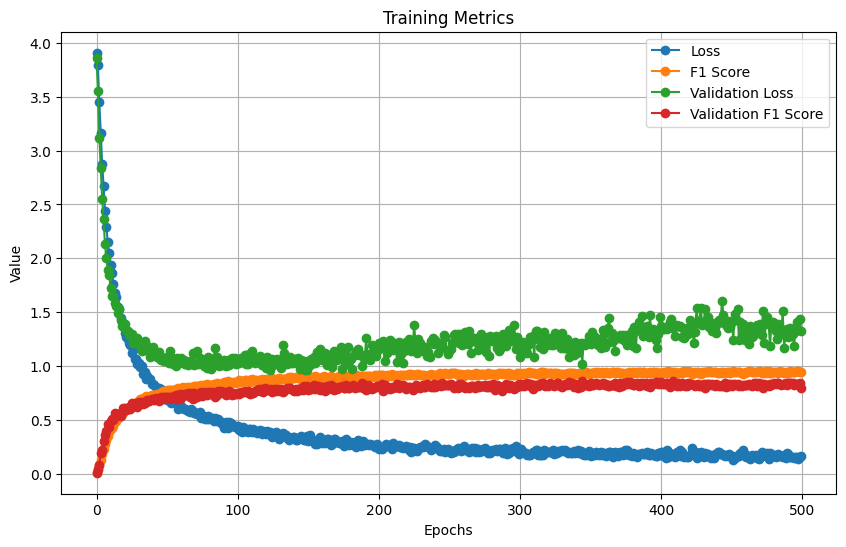

In [139]:
# Plotting
import matplotlib.pyplot as plt
epochs = range(0, 500)
plt.figure(figsize=(10, 6))
plt.plot(epochs, hist_df.loss, marker='o', label='Loss')
plt.plot(epochs, hist_df.f1_score, marker='o', label='F1 Score')
plt.plot(epochs, hist_df.val_loss, marker='o', label='Validation Loss')
plt.plot(epochs, hist_df.val_f1_score, marker='o', label='Validation F1 Score')
plt.title('Training Metrics')
plt.xlabel('Epochs')
plt.ylabel('Value')
plt.legend()
plt.grid()
plt.show()

In [142]:
reconstructed_model = tf.keras.models.load_model("3 1D CNN Best Model Mish")

In [143]:
reconstructed_model.evaluate(Xval,Yval)

11/11 [==============================] - 0s 6ms/step - loss: 1.0245 - f1_score: 0.8603


[1.0245157480239868, 0.8603485226631165]

In [145]:
reconstructed_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_3 (Conv1D)           (None, 129, 150)          37950     
                                                                 
 max_pooling1d_3 (MaxPooling  (None, 64, 150)          0         
 1D)                                                             
                                                                 
 conv1d_4 (Conv1D)           (None, 63, 150)           45150     
                                                                 
 max_pooling1d_4 (MaxPooling  (None, 31, 150)          0         
 1D)                                                             
                                                                 
 conv1d_5 (Conv1D)           (None, 30, 100)           30100     
                                                                 
 max_pooling1d_5 (MaxPooling  (None, 15, 100)         

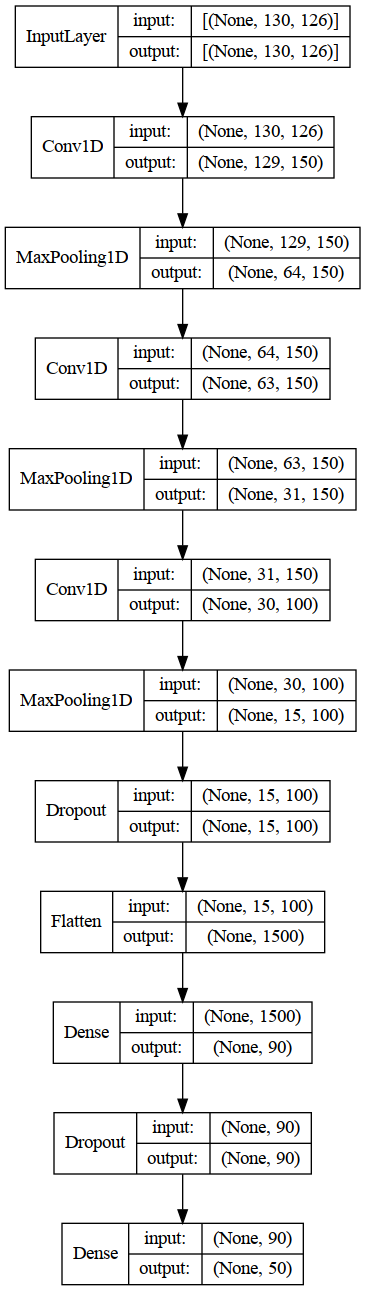

In [146]:
plot_model(reconstructed_model, show_shapes=True, show_layer_names=False)

In [147]:
print(classification_report(np.argmax(Yval, axis=1), np.argmax(reconstructed_model.predict(Xval), axis=1),
                            digits=3, target_names=label_map))

11/11 [==============================] - 0s 5ms/step
              precision    recall  f1-score   support

         AXE      1.000     0.750     0.857         8
    BACKPACK      1.000     0.667     0.800         6
  BASKETBALL      1.000     1.000     1.000        10
         BEE      0.900     0.900     0.900        10
        BELT      0.800     1.000     0.889         4
        BITE      1.000     1.000     1.000         8
   BREAKFAST      0.667     1.000     0.800         6
      CANCER      0.889     1.000     0.941         8
   CHRISTMAS      1.000     1.000     1.000         6
    CONFUSED      0.857     1.000     0.923         6
        DARK      1.000     1.000     1.000         4
        DEAF      0.857     1.000     0.923         6
      DECIDE      1.000     0.667     0.800         6
      DEMAND      0.875     0.875     0.875         8
     DEVELOP      0.750     0.500     0.600         6
      DINNER      1.000     0.750     0.857         8
         DOG      0.857     

## Hyperparameter Tuning 1 1D CNN Layer + 1 GRU

In [119]:
from keras_tuner import HyperModel
from kerastuner.tuners import Hyperband
from tensorflow.keras.callbacks import EarlyStopping

/tmp/ipykernel_454022/3109640001.py:2: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
  from kerastuner.tuners import Hyperband


In [120]:
from tensorflow.keras import regularizers
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout, SpatialDropout1D, GRU
import keras_tuner
from keras_tuner import HyperModel
from kerastuner.tuners import Hyperband
from tensorflow.keras.callbacks import EarlyStopping
import tensorflow_addons as tfa

class HyperModel(HyperModel):
    def __init__(self, input_shape, num_classes):
        self.input_shape = input_shape
        self.num_classes = num_classes

    def build(self, hp):
        act_function = hp.Choice('dense_activation',values=['selu','mish','gelu','elu','relu'],default='elu')
        model = Sequential()
        model.add(Conv1D(filters=hp.Int('filters_1',min_value=50,max_value=200,step=25,default=150),
                         kernel_size=hp.Choice('kernel_1',values=[5,10,15,20],default=20,),
                         activation=act_function,input_shape=self.input_shape))
        model.add(MaxPooling1D(pool_size=hp.Choice('pool_1',values=[5,10,15,20],default=20,)))
        model.add(Dropout(rate=hp.Float('dropout_1',min_value=0.0,max_value=0.9,default=0.8,step=0.05,)))
        model.add(GRU(units=hp.Int('units_1',min_value=50,max_value=200,step=25,default=100),
                      return_sequences=False,
                      kernel_regularizer=regularizers.l2(hp.Float('regularizer',min_value=1e-4,
                                                                max_value=1e-2,sampling='LOG',
                                                                default=.001))))
        model.add(Dropout(rate=hp.Float('dropout_2',min_value=0.0,max_value=0.9,default=0.7,step=0.05,)))
        model.add(Dense(units=hp.Int('units_2',min_value=70,max_value=120,step=10,default=80),activation=act_function))
        model.add(Dense(self.num_classes, activation='softmax'))

        model.compile(tf.optimizers.experimental.Nadam(hp.Float('learning_rate',min_value=1e-4,
                                                                max_value=1e-2,sampling='LOG',
                                                                default=.00062198175395800846)),
            loss='categorical_crossentropy',
            metrics=[tfa.metrics.F1Score(num_classes=50, average='macro')]
        )
        return model

hypermodel = HyperModel(input_shape=(130,399), num_classes=50)

In [121]:
HYPERBAND_MAX_EPOCHS = 300
#MAX_TRIALS = 20
EXECUTION_PER_TRIAL = 2

tuner = Hyperband(
    hypermodel,
    max_epochs=HYPERBAND_MAX_EPOCHS,
    objective=keras_tuner.Objective("val_f1_score", direction="max"),
    seed=10,
    executions_per_trial=EXECUTION_PER_TRIAL,
    directory='/media/kristian/HDD/ASL_Citizen/RTMPose-L/hyperband/',
    project_name='1_1D_CNN+1_GRU',
    overwrite=False)

INFO:tensorflow:Reloading Tuner from /media/kristian/HDD/ASL_Citizen/RTMPose-L/hyperband/1_1D_CNN+1_GRU/tuner0.json


In [122]:
tuner.search_space_summary()

Search space summary
Default search space size: 10
dense_activation (Choice)
{'default': 'elu', 'conditions': [], 'values': ['selu', 'mish', 'gelu', 'elu', 'relu'], 'ordered': False}
filters_1 (Int)
{'default': 150, 'conditions': [], 'min_value': 50, 'max_value': 200, 'step': 25, 'sampling': 'linear'}
kernel_1 (Choice)
{'default': 20, 'conditions': [], 'values': [5, 10, 15, 20], 'ordered': True}
pool_1 (Choice)
{'default': 20, 'conditions': [], 'values': [5, 10, 15, 20], 'ordered': True}
dropout_1 (Float)
{'default': 0.8, 'conditions': [], 'min_value': 0.0, 'max_value': 0.9, 'step': 0.05, 'sampling': 'linear'}
units_1 (Int)
{'default': 100, 'conditions': [], 'min_value': 50, 'max_value': 200, 'step': 25, 'sampling': 'linear'}
regularizer (Float)
{'default': 0.001, 'conditions': [], 'min_value': 0.0001, 'max_value': 0.01, 'step': None, 'sampling': 'log'}
dropout_2 (Float)
{'default': 0.7, 'conditions': [], 'min_value': 0.0, 'max_value': 0.9, 'step': 0.05, 'sampling': 'linear'}
units_2 (

In [123]:
es = EarlyStopping(monitor="val_f1_score",patience=30,restore_best_weights=True,mode="max")

In [124]:
log_dir = os.path.join('Logs')
tb_callback = TensorBoard(log_dir=log_dir)

In [125]:
tuner.search(Xtrain, Ytrain, epochs=1000, validation_data=(Xval,Yval),batch_size=96,callbacks=[es])

Trial 725 Complete [00h 19m 34s]
val_f1_score: 0.5111344456672668

Best val_f1_score So Far: 0.7555990815162659
Total elapsed time: 04h 49m 53s
INFO:tensorflow:Oracle triggered exit


In [126]:
best_model = tuner.get_best_models(num_models=10)[0]

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=100.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [127]:
best_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 121, 200)          798200    
                                                                 
 max_pooling1d (MaxPooling1D  (None, 24, 200)          0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 24, 200)           0         
                                                                 
 gru (GRU)                   (None, 125)               122625    
                                                                 
 dropout_1 (Dropout)         (None, 125)               0         
                                                                 
 dense (Dense)               (None, 110)               13860     
                                                        

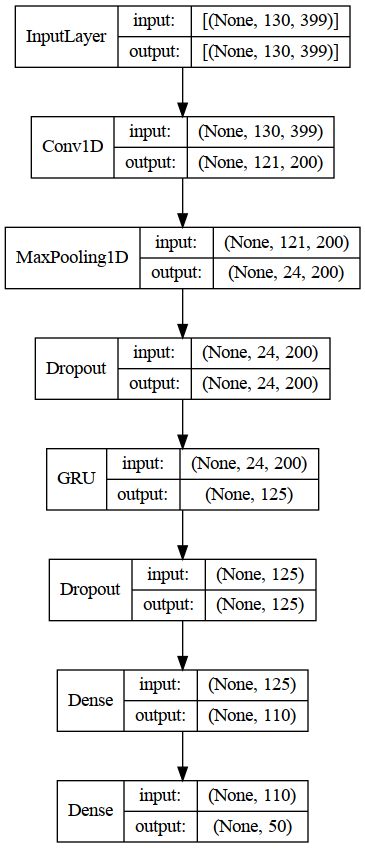

In [128]:
plot_model(best_model, show_shapes=True, show_layer_names=False)

In [129]:
tuner.results_summary()

Results summary
Results in /media/kristian/HDD/ASL_Citizen/RTMPose-L/hyperband/1_1D_CNN+1_GRU
Showing 10 best trials
Objective(name="val_f1_score", direction="max")

Trial 0714 summary
Hyperparameters:
dense_activation: elu
filters_1: 200
kernel_1: 10
pool_1: 5
dropout_1: 0.65
units_1: 125
regularizer: 0.0034365682734906543
dropout_2: 0.1
units_2: 110
learning_rate: 0.00015386971155916857
tuner/epochs: 300
tuner/initial_epoch: 100
tuner/bracket: 1
tuner/round: 1
tuner/trial_id: 0711
Score: 0.7555990815162659

Trial 0598 summary
Hyperparameters:
dense_activation: elu
filters_1: 100
kernel_1: 5
pool_1: 15
dropout_1: 0.4
units_1: 175
regularizer: 0.002613956776855358
dropout_2: 0.6000000000000001
units_2: 80
learning_rate: 0.0008380093243360302
tuner/epochs: 300
tuner/initial_epoch: 100
tuner/bracket: 4
tuner/round: 4
tuner/trial_id: 0593
Score: 0.7111110687255859

Trial 0593 summary
Hyperparameters:
dense_activation: elu
filters_1: 100
kernel_1: 5
pool_1: 15
dropout_1: 0.4
units_1: 175
r

In [130]:
loss, accuracy = best_model.evaluate(Xval, Yval)

11/11 [==============================] - 1s 15ms/step - loss: 1.1833 - f1_score: 0.7556


In [131]:
loss, accuracy = best_model.evaluate(Xtrain, Ytrain)

84/84 [==============================] - 1s 14ms/step - loss: 0.1752 - f1_score: 0.9928


In [133]:
#cm = confusion_matrix(np.argmax(Yval, axis=1), np.argmax(model.predict(Xval), axis=1))

#sns.heatmap(cm, annot = True)

print(classification_report(np.argmax(Yval, axis=1), np.argmax(best_model.predict(Xval), axis=1),
                            digits=3, target_names=label_map))

11/11 [==============================] - 0s 11ms/step
              precision    recall  f1-score   support

         AXE      1.000     1.000     1.000         8
    BACKPACK      0.714     0.833     0.769         6
  BASKETBALL      0.833     1.000     0.909        10
         BEE      0.625     0.500     0.556        10
        BELT      1.000     1.000     1.000         4
        BITE      1.000     0.500     0.667         8
   BREAKFAST      0.545     1.000     0.706         6
      CANCER      0.571     1.000     0.727         8
   CHRISTMAS      1.000     1.000     1.000         6
    CONFUSED      1.000     1.000     1.000         6
        DARK      0.667     1.000     0.800         4
        DEAF      0.333     0.333     0.333         6
      DECIDE      0.833     0.833     0.833         6
      DEMAND      1.000     0.750     0.857         8
     DEVELOP      0.500     0.333     0.400         6
      DINNER      1.000     1.000     1.000         8
         DOG      0.714    

In [134]:
#bestHP = tuner.get_best_hyperparameters(num_trials=5)[2]
bestHP = tuner.get_best_hyperparameters(num_trials=10)[0]

In [135]:
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath='1 1DCNN + 1 GRU/',
    monitor='val_f1_score',
    mode='max',
    save_best_only=True)

In [139]:
print("[INFO] training the best model...")
model = tuner.hypermodel.build(bestHP)
History = model.fit(x=Xtrain, y=Ytrain,validation_data= (Xval,Yval), batch_size=96,epochs=500, verbose=1,callbacks=[model_checkpoint_callback])
#History = model.fit(x=Xtrain, y=Ytrain,validation_data= (Xval,Yval), batch_size=96,epochs=500, verbose=1)

[INFO] training the best model...
Epoch 1/500
28/28 [==============================] - 8s 116ms/step - loss: 4.8754 - f1_score: 0.0170 - val_loss: 4.7783 - val_f1_score: 0.0040
Epoch 2/500
28/28 [==============================] - 2s 89ms/step - loss: 4.8321 - f1_score: 0.0160 - val_loss: 4.7571 - val_f1_score: 4.8780e-04
Epoch 3/500
28/28 [==============================] - 2s 89ms/step - loss: 4.7829 - f1_score: 0.0199 - val_loss: 4.7014 - val_f1_score: 0.0017
Epoch 4/500
28/28 [==============================] - 2s 89ms/step - loss: 4.7313 - f1_score: 0.0134 - val_loss: 4.6746 - val_f1_score: 0.0010
Epoch 5/500
28/28 [==============================] - 3s 91ms/step - loss: 4.6865 - f1_score: 0.0133 - val_loss: 4.6513 - val_f1_score: 9.8160e-04
Epoch 6/500
28/28 [==============================] - 3s 92ms/step - loss: 4.6553 - f1_score: 0.0161 - val_loss: 4.5905 - val_f1_score: 0.0012
Epoch 7/500
28/28 [==============================] - 3s 92ms/step - loss: 4.6279 - f1_score: 0.0145 - val

28/28 [==============================] - 3s 96ms/step - loss: 1.9531 - f1_score: 0.4799 - val_loss: 2.0727 - val_f1_score: 0.4633
Epoch 59/500
28/28 [==============================] - 3s 95ms/step - loss: 1.9263 - f1_score: 0.4853 - val_loss: 2.0275 - val_f1_score: 0.4611
Epoch 60/500
28/28 [==============================] - 3s 95ms/step - loss: 1.8807 - f1_score: 0.4852 - val_loss: 2.0393 - val_f1_score: 0.4603
Epoch 61/500
28/28 [==============================] - 3s 95ms/step - loss: 1.8595 - f1_score: 0.4984 - val_loss: 1.9622 - val_f1_score: 0.4850
Epoch 62/500
28/28 [==============================] - 3s 95ms/step - loss: 1.8206 - f1_score: 0.5208 - val_loss: 1.9954 - val_f1_score: 0.4669
Epoch 63/500
28/28 [==============================] - 3s 94ms/step - loss: 1.8147 - f1_score: 0.5108 - val_loss: 1.9593 - val_f1_score: 0.4445
Epoch 64/500
28/28 [==============================] - 3s 95ms/step - loss: 1.7875 - f1_score: 0.5181 - val_loss: 2.0338 - val_f1_score: 0.4215
Epoch 65/500

28/28 [==============================] - 3s 95ms/step - loss: 0.8547 - f1_score: 0.7931 - val_loss: 1.3761 - val_f1_score: 0.6478
Epoch 116/500
28/28 [==============================] - 3s 96ms/step - loss: 0.8432 - f1_score: 0.7826 - val_loss: 1.2900 - val_f1_score: 0.6622
Epoch 117/500
28/28 [==============================] - 3s 95ms/step - loss: 0.8451 - f1_score: 0.7910 - val_loss: 1.2816 - val_f1_score: 0.6986
Epoch 118/500
28/28 [==============================] - 3s 95ms/step - loss: 0.8004 - f1_score: 0.8026 - val_loss: 1.3125 - val_f1_score: 0.6752
Epoch 119/500
28/28 [==============================] - 3s 95ms/step - loss: 0.8207 - f1_score: 0.7931 - val_loss: 1.2863 - val_f1_score: 0.6779
Epoch 120/500
28/28 [==============================] - 3s 95ms/step - loss: 0.7991 - f1_score: 0.7960 - val_loss: 1.3129 - val_f1_score: 0.6689
Epoch 121/500
28/28 [==============================] - 3s 95ms/step - loss: 0.7835 - f1_score: 0.8032 - val_loss: 1.3099 - val_f1_score: 0.6548
Epoch 

INFO:tensorflow:Assets written to: 1 1DCNN + 1 GRU/assets


INFO:tensorflow:Assets written to: 1 1DCNN + 1 GRU/assets


28/28 [==============================] - 11s 410ms/step - loss: 0.6458 - f1_score: 0.8391 - val_loss: 1.2540 - val_f1_score: 0.7325
Epoch 141/500
28/28 [==============================] - 3s 92ms/step - loss: 0.6265 - f1_score: 0.8530 - val_loss: 1.2280 - val_f1_score: 0.7211
Epoch 142/500
28/28 [==============================] - 3s 92ms/step - loss: 0.6123 - f1_score: 0.8548 - val_loss: 1.2046 - val_f1_score: 0.7156
Epoch 143/500
28/28 [==============================] - 3s 93ms/step - loss: 0.6045 - f1_score: 0.8506 - val_loss: 1.2689 - val_f1_score: 0.7089
Epoch 144/500
28/28 [==============================] - ETA: 0s - loss: 0.6073 - f1_score: 0.8446

INFO:tensorflow:Assets written to: 1 1DCNN + 1 GRU/assets


INFO:tensorflow:Assets written to: 1 1DCNN + 1 GRU/assets


28/28 [==============================] - 20s 721ms/step - loss: 0.6073 - f1_score: 0.8446 - val_loss: 1.2252 - val_f1_score: 0.7341
Epoch 145/500
28/28 [==============================] - 2s 89ms/step - loss: 0.5927 - f1_score: 0.8584 - val_loss: 1.2341 - val_f1_score: 0.7126
Epoch 146/500
28/28 [==============================] - 3s 91ms/step - loss: 0.5843 - f1_score: 0.8604 - val_loss: 1.2315 - val_f1_score: 0.7309
Epoch 147/500
28/28 [==============================] - 3s 91ms/step - loss: 0.5981 - f1_score: 0.8511 - val_loss: 1.2813 - val_f1_score: 0.7230
Epoch 148/500
28/28 [==============================] - 3s 92ms/step - loss: 0.5689 - f1_score: 0.8627 - val_loss: 1.2607 - val_f1_score: 0.6924
Epoch 149/500
28/28 [==============================] - 3s 92ms/step - loss: 0.5764 - f1_score: 0.8627 - val_loss: 1.2997 - val_f1_score: 0.7133
Epoch 150/500
28/28 [==============================] - ETA: 0s - loss: 0.5595 - f1_score: 0.8701

INFO:tensorflow:Assets written to: 1 1DCNN + 1 GRU/assets


INFO:tensorflow:Assets written to: 1 1DCNN + 1 GRU/assets


28/28 [==============================] - 10s 375ms/step - loss: 0.5595 - f1_score: 0.8701 - val_loss: 1.1762 - val_f1_score: 0.7452
Epoch 151/500
28/28 [==============================] - 3s 90ms/step - loss: 0.5641 - f1_score: 0.8598 - val_loss: 1.2248 - val_f1_score: 0.7034
Epoch 152/500
28/28 [==============================] - 3s 91ms/step - loss: 0.5628 - f1_score: 0.8636 - val_loss: 1.2137 - val_f1_score: 0.7283
Epoch 153/500
28/28 [==============================] - 3s 93ms/step - loss: 0.5495 - f1_score: 0.8650 - val_loss: 1.1652 - val_f1_score: 0.7284
Epoch 154/500
28/28 [==============================] - 3s 94ms/step - loss: 0.5318 - f1_score: 0.8770 - val_loss: 1.2373 - val_f1_score: 0.7197
Epoch 155/500
28/28 [==============================] - ETA: 0s - loss: 0.5279 - f1_score: 0.8794

INFO:tensorflow:Assets written to: 1 1DCNN + 1 GRU/assets


INFO:tensorflow:Assets written to: 1 1DCNN + 1 GRU/assets


28/28 [==============================] - 15s 554ms/step - loss: 0.5279 - f1_score: 0.8794 - val_loss: 1.2332 - val_f1_score: 0.7586
Epoch 156/500
28/28 [==============================] - 2s 89ms/step - loss: 0.5263 - f1_score: 0.8710 - val_loss: 1.2273 - val_f1_score: 0.7364
Epoch 157/500
28/28 [==============================] - 3s 91ms/step - loss: 0.5213 - f1_score: 0.8725 - val_loss: 1.2792 - val_f1_score: 0.7255
Epoch 158/500
28/28 [==============================] - 3s 92ms/step - loss: 0.5025 - f1_score: 0.8920 - val_loss: 1.1806 - val_f1_score: 0.7355
Epoch 159/500
28/28 [==============================] - 3s 92ms/step - loss: 0.5187 - f1_score: 0.8761 - val_loss: 1.2087 - val_f1_score: 0.7443
Epoch 160/500
28/28 [==============================] - 3s 92ms/step - loss: 0.5010 - f1_score: 0.8840 - val_loss: 1.2334 - val_f1_score: 0.7374
Epoch 161/500
28/28 [==============================] - 3s 92ms/step - loss: 0.5120 - f1_score: 0.8711 - val_loss: 1.1864 - val_f1_score: 0.7518
Epoc

INFO:tensorflow:Assets written to: 1 1DCNN + 1 GRU/assets


INFO:tensorflow:Assets written to: 1 1DCNN + 1 GRU/assets


28/28 [==============================] - 10s 383ms/step - loss: 0.4685 - f1_score: 0.8950 - val_loss: 1.2458 - val_f1_score: 0.7626
Epoch 166/500
28/28 [==============================] - 3s 89ms/step - loss: 0.4676 - f1_score: 0.8985 - val_loss: 1.2624 - val_f1_score: 0.7143
Epoch 167/500
28/28 [==============================] - 3s 91ms/step - loss: 0.4739 - f1_score: 0.8898 - val_loss: 1.2561 - val_f1_score: 0.7155
Epoch 168/500
28/28 [==============================] - 3s 92ms/step - loss: 0.4588 - f1_score: 0.8986 - val_loss: 1.2502 - val_f1_score: 0.7150
Epoch 169/500
28/28 [==============================] - 3s 92ms/step - loss: 0.4637 - f1_score: 0.8945 - val_loss: 1.2004 - val_f1_score: 0.7350
Epoch 170/500
28/28 [==============================] - 3s 93ms/step - loss: 0.4600 - f1_score: 0.8878 - val_loss: 1.2627 - val_f1_score: 0.6911
Epoch 171/500
28/28 [==============================] - 3s 93ms/step - loss: 0.4346 - f1_score: 0.9018 - val_loss: 1.2015 - val_f1_score: 0.7246
Epoc

INFO:tensorflow:Assets written to: 1 1DCNN + 1 GRU/assets


INFO:tensorflow:Assets written to: 1 1DCNN + 1 GRU/assets


28/28 [==============================] - 11s 407ms/step - loss: 0.3128 - f1_score: 0.9419 - val_loss: 1.1852 - val_f1_score: 0.7679
Epoch 208/500
28/28 [==============================] - 3s 90ms/step - loss: 0.3150 - f1_score: 0.9359 - val_loss: 1.3395 - val_f1_score: 0.7050
Epoch 209/500
28/28 [==============================] - 3s 91ms/step - loss: 0.3027 - f1_score: 0.9436 - val_loss: 1.3657 - val_f1_score: 0.6965
Epoch 210/500
28/28 [==============================] - 3s 92ms/step - loss: 0.3267 - f1_score: 0.9340 - val_loss: 1.2864 - val_f1_score: 0.7252
Epoch 211/500
28/28 [==============================] - 3s 93ms/step - loss: 0.3116 - f1_score: 0.9312 - val_loss: 1.2950 - val_f1_score: 0.7130
Epoch 212/500
28/28 [==============================] - 3s 93ms/step - loss: 0.3078 - f1_score: 0.9371 - val_loss: 1.2660 - val_f1_score: 0.7409
Epoch 213/500
28/28 [==============================] - 3s 93ms/step - loss: 0.3053 - f1_score: 0.9391 - val_loss: 1.2976 - val_f1_score: 0.7433
Epoc

Epoch 264/500
28/28 [==============================] - 3s 95ms/step - loss: 0.2186 - f1_score: 0.9555 - val_loss: 1.2867 - val_f1_score: 0.7443
Epoch 265/500
28/28 [==============================] - 3s 95ms/step - loss: 0.2089 - f1_score: 0.9649 - val_loss: 1.3429 - val_f1_score: 0.7440
Epoch 266/500
28/28 [==============================] - 3s 95ms/step - loss: 0.1893 - f1_score: 0.9730 - val_loss: 1.3364 - val_f1_score: 0.7308
Epoch 267/500
28/28 [==============================] - 3s 94ms/step - loss: 0.1934 - f1_score: 0.9666 - val_loss: 1.4209 - val_f1_score: 0.7139
Epoch 268/500
28/28 [==============================] - 3s 95ms/step - loss: 0.2134 - f1_score: 0.9584 - val_loss: 1.3442 - val_f1_score: 0.7114
Epoch 269/500
28/28 [==============================] - 3s 95ms/step - loss: 0.2028 - f1_score: 0.9642 - val_loss: 1.2705 - val_f1_score: 0.7401
Epoch 270/500
28/28 [==============================] - 3s 95ms/step - loss: 0.2134 - f1_score: 0.9631 - val_loss: 1.3733 - val_f1_score:

Epoch 321/500
28/28 [==============================] - 3s 95ms/step - loss: 0.1532 - f1_score: 0.9768 - val_loss: 1.4065 - val_f1_score: 0.7406
Epoch 322/500
28/28 [==============================] - 3s 94ms/step - loss: 0.1558 - f1_score: 0.9711 - val_loss: 1.5721 - val_f1_score: 0.6840
Epoch 323/500
28/28 [==============================] - 3s 95ms/step - loss: 0.1581 - f1_score: 0.9754 - val_loss: 1.5725 - val_f1_score: 0.6922
Epoch 324/500
28/28 [==============================] - 3s 95ms/step - loss: 0.1494 - f1_score: 0.9740 - val_loss: 1.4584 - val_f1_score: 0.7107
Epoch 325/500
28/28 [==============================] - 3s 99ms/step - loss: 0.1593 - f1_score: 0.9733 - val_loss: 1.5596 - val_f1_score: 0.6731
Epoch 326/500
28/28 [==============================] - 3s 95ms/step - loss: 0.1525 - f1_score: 0.9729 - val_loss: 1.3781 - val_f1_score: 0.7258
Epoch 327/500
28/28 [==============================] - 3s 95ms/step - loss: 0.1540 - f1_score: 0.9723 - val_loss: 1.4309 - val_f1_score:

Epoch 378/500
28/28 [==============================] - 3s 95ms/step - loss: 0.1093 - f1_score: 0.9867 - val_loss: 1.4339 - val_f1_score: 0.7161
Epoch 379/500
28/28 [==============================] - 3s 95ms/step - loss: 0.1045 - f1_score: 0.9860 - val_loss: 1.4921 - val_f1_score: 0.7220
Epoch 380/500
28/28 [==============================] - 3s 94ms/step - loss: 0.1204 - f1_score: 0.9799 - val_loss: 1.4972 - val_f1_score: 0.7182
Epoch 381/500
28/28 [==============================] - 3s 95ms/step - loss: 0.1203 - f1_score: 0.9819 - val_loss: 1.5162 - val_f1_score: 0.7136
Epoch 382/500
28/28 [==============================] - 3s 94ms/step - loss: 0.1268 - f1_score: 0.9774 - val_loss: 1.5175 - val_f1_score: 0.7205
Epoch 383/500
28/28 [==============================] - 3s 95ms/step - loss: 0.1306 - f1_score: 0.9770 - val_loss: 1.7108 - val_f1_score: 0.6754
Epoch 384/500
28/28 [==============================] - 3s 95ms/step - loss: 0.1192 - f1_score: 0.9795 - val_loss: 1.5128 - val_f1_score:

Epoch 435/500
28/28 [==============================] - 3s 95ms/step - loss: 0.1247 - f1_score: 0.9778 - val_loss: 1.5312 - val_f1_score: 0.7410
Epoch 436/500
28/28 [==============================] - 3s 95ms/step - loss: 0.1209 - f1_score: 0.9774 - val_loss: 1.8115 - val_f1_score: 0.6875
Epoch 437/500
28/28 [==============================] - 3s 95ms/step - loss: 0.1071 - f1_score: 0.9840 - val_loss: 1.6899 - val_f1_score: 0.6823
Epoch 438/500
28/28 [==============================] - 3s 94ms/step - loss: 0.1052 - f1_score: 0.9847 - val_loss: 1.5622 - val_f1_score: 0.6955
Epoch 439/500
28/28 [==============================] - 3s 94ms/step - loss: 0.1032 - f1_score: 0.9798 - val_loss: 1.5610 - val_f1_score: 0.6990
Epoch 440/500
28/28 [==============================] - 3s 96ms/step - loss: 0.0996 - f1_score: 0.9859 - val_loss: 1.6430 - val_f1_score: 0.6936
Epoch 441/500
28/28 [==============================] - 3s 94ms/step - loss: 0.1026 - f1_score: 0.9825 - val_loss: 1.6960 - val_f1_score:

Epoch 492/500
28/28 [==============================] - 3s 95ms/step - loss: 0.0934 - f1_score: 0.9810 - val_loss: 1.6443 - val_f1_score: 0.7043
Epoch 493/500
28/28 [==============================] - 3s 95ms/step - loss: 0.0788 - f1_score: 0.9902 - val_loss: 1.4690 - val_f1_score: 0.7273
Epoch 494/500
28/28 [==============================] - 3s 94ms/step - loss: 0.0915 - f1_score: 0.9852 - val_loss: 1.7000 - val_f1_score: 0.6735
Epoch 495/500
28/28 [==============================] - 3s 94ms/step - loss: 0.1065 - f1_score: 0.9801 - val_loss: 1.6182 - val_f1_score: 0.7010
Epoch 496/500
28/28 [==============================] - 3s 94ms/step - loss: 0.0997 - f1_score: 0.9826 - val_loss: 1.9312 - val_f1_score: 0.6735
Epoch 497/500
28/28 [==============================] - 3s 95ms/step - loss: 0.0830 - f1_score: 0.9905 - val_loss: 1.6879 - val_f1_score: 0.6940
Epoch 498/500
28/28 [==============================] - 3s 96ms/step - loss: 0.0906 - f1_score: 0.9864 - val_loss: 1.8039 - val_f1_score:

In [140]:
print(classification_report(np.argmax(Yval, axis=1), np.argmax(model.predict(Xval), axis=1),
                            digits=3, target_names=label_map))

11/11 [==============================] - 1s 11ms/step
              precision    recall  f1-score   support

         AXE      1.000     0.875     0.933         8
    BACKPACK      0.571     0.667     0.615         6
  BASKETBALL      1.000     0.900     0.947        10
         BEE      0.556     0.500     0.526        10
        BELT      0.500     1.000     0.667         4
        BITE      1.000     0.125     0.222         8
   BREAKFAST      0.571     0.667     0.615         6
      CANCER      0.778     0.875     0.824         8
   CHRISTMAS      0.857     1.000     0.923         6
    CONFUSED      0.857     1.000     0.923         6
        DARK      0.800     1.000     0.889         4
        DEAF      0.182     0.333     0.235         6
      DECIDE      1.000     0.833     0.909         6
      DEMAND      1.000     0.500     0.667         8
     DEVELOP      0.500     0.333     0.400         6
      DINNER      0.444     0.500     0.471         8
         DOG      0.667    

In [141]:
# convert the history.history dict to a pandas DataFrame:     
hist_df = pd.DataFrame(History.history) 

# or save to csv: 
hist_csv_file = '1 1DCNN + 1 GRU/history.csv'
with open(hist_csv_file, mode='w') as f:
    hist_df.to_csv(f)

In [142]:
hist_df.tail()

loss  f1_score  val_loss  val_f1_score
495  0.099662  0.982627  1.931195      0.673482
496  0.082953  0.990497  1.687911      0.694009
497  0.090602  0.986427  1.803858      0.663592
498  0.106971  0.977117  1.564104      0.711779
499  0.106982  0.979273  1.697142      0.672247

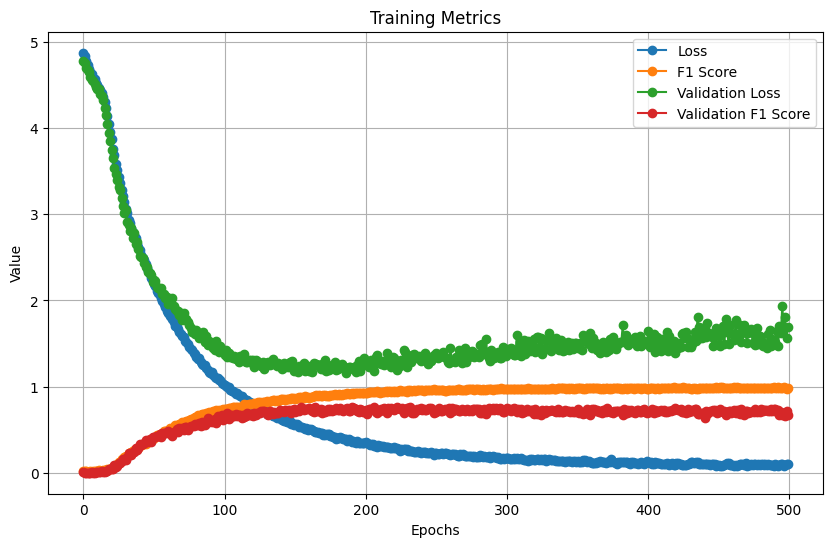

In [143]:
# Plotting
import matplotlib.pyplot as plt
epochs = range(0, 500)
plt.figure(figsize=(10, 6))
plt.plot(epochs, hist_df.loss, marker='o', label='Loss')
plt.plot(epochs, hist_df.f1_score, marker='o', label='F1 Score')
plt.plot(epochs, hist_df.val_loss, marker='o', label='Validation Loss')
plt.plot(epochs, hist_df.val_f1_score, marker='o', label='Validation F1 Score')
plt.title('Training Metrics')
plt.xlabel('Epochs')
plt.ylabel('Value')
plt.legend()
plt.grid()
plt.show()

In [144]:
reconstructed_model = tf.keras.models.load_model("1 1DCNN + 1 GRU")

In [145]:
reconstructed_model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_4 (Conv1D)           (None, 121, 200)          798200    
                                                                 
 max_pooling1d_4 (MaxPooling  (None, 24, 200)          0         
 1D)                                                             
                                                                 
 dropout_8 (Dropout)         (None, 24, 200)           0         
                                                                 
 gru_4 (GRU)                 (None, 125)               122625    
                                                                 
 dropout_9 (Dropout)         (None, 125)               0         
                                                                 
 dense_8 (Dense)             (None, 110)               13860     
                                                      

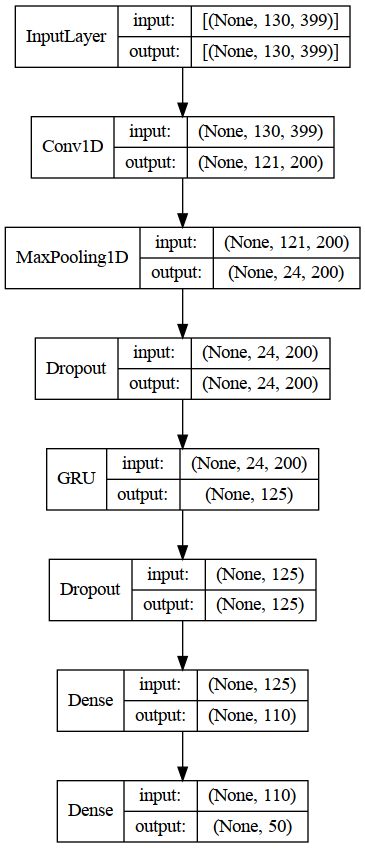

In [146]:
plot_model(reconstructed_model, show_shapes=True, show_layer_names=False)

In [147]:
reconstructed_model.evaluate(Xval,Yval)

11/11 [==============================] - 1s 12ms/step - loss: 1.1852 - f1_score: 0.7679


[1.185200810432434, 0.7678741216659546]

In [149]:
reconstructed_model.evaluate(Xtrain,Ytrain)

84/84 [==============================] - 1s 15ms/step - loss: 0.1628 - f1_score: 0.9936


[0.16277065873146057, 0.9936215877532959]

In [150]:
print(classification_report(np.argmax(Yval, axis=1), np.argmax(reconstructed_model.predict(Xval), axis=1),
                            digits=3, target_names=label_map))

11/11 [==============================] - 0s 11ms/step
              precision    recall  f1-score   support

         AXE      1.000     1.000     1.000         8
    BACKPACK      0.571     0.667     0.615         6
  BASKETBALL      0.909     1.000     0.952        10
         BEE      1.000     0.800     0.889        10
        BELT      0.571     1.000     0.727         4
        BITE      0.857     0.750     0.800         8
   BREAKFAST      0.750     1.000     0.857         6
      CANCER      0.800     1.000     0.889         8
   CHRISTMAS      1.000     1.000     1.000         6
    CONFUSED      0.857     1.000     0.923         6
        DARK      1.000     1.000     1.000         4
        DEAF      0.167     0.333     0.222         6
      DECIDE      1.000     1.000     1.000         6
      DEMAND      1.000     0.750     0.857         8
     DEVELOP      0.500     0.333     0.400         6
      DINNER      0.889     1.000     0.941         8
         DOG      0.750    

In [168]:
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath='1 1DCNN + 1 GRU Lecunnormal/',
    monitor='val_f1_score',
    mode='max',
    save_best_only=True)

In [169]:
act_function = 'selu'
initializer = tf.keras.initializers.LecunNormal(seed=10)

model = Sequential()
model.add(Conv1D(filters=150,kernel_size=15,kernel_initializer=initializer,
                 activation=act_function,input_shape=(130,126)))
model.add(MaxPooling1D(pool_size=10))
#model.add(Dropout(.55))
model.add(GRU(units=150,return_sequences=False,kernel_initializer=initializer,
              kernel_regularizer=regularizers.l2(.00043122634871936203)))
#model.add(Dropout(.7))
model.add(Dense(units=110,activation=act_function,kernel_initializer=initializer))
model.add(Dense(50, activation='softmax'))

model.compile(tf.optimizers.experimental.Nadam(.00021882052801027956),
            loss='categorical_crossentropy',
            metrics=[tfa.metrics.F1Score(num_classes=50, average='macro')])
model.summary()
History = model.fit(x=Xtrain, y=Ytrain,validation_data= (Xval,Yval), batch_size=96,epochs=500, verbose=1,callbacks=[model_checkpoint_callback])

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 116, 150)          283650    
                                                                 
 max_pooling1d (MaxPooling1D  (None, 11, 150)          0         
 )                                                               
                                                                 
 gru (GRU)                   (None, 150)               135900    
                                                                 
 dense_10 (Dense)            (None, 110)               16610     
                                                                 
 dense_11 (Dense)            (None, 50)                5550      
                                                                 
Total params: 441,710
Trainable params: 441,710
Non-trainable params: 0
________________________________________________

INFO:tensorflow:Assets written to: 1 1DCNN + 1 GRU Lecunnormal/assets


INFO:tensorflow:Assets written to: 1 1DCNN + 1 GRU Lecunnormal/assets


28/28 [==============================] - 14s 272ms/step - loss: 4.0767 - f1_score: 0.0236 - val_loss: 3.9629 - val_f1_score: 0.0113
Epoch 2/500
27/28 [===========================>..] - ETA: 0s - loss: 3.8607 - f1_score: 0.0592

INFO:tensorflow:Assets written to: 1 1DCNN + 1 GRU Lecunnormal/assets


INFO:tensorflow:Assets written to: 1 1DCNN + 1 GRU Lecunnormal/assets


28/28 [==============================] - 8s 283ms/step - loss: 3.8600 - f1_score: 0.0587 - val_loss: 3.7755 - val_f1_score: 0.0726
Epoch 3/500
27/28 [===========================>..] - ETA: 0s - loss: 3.6232 - f1_score: 0.1161

INFO:tensorflow:Assets written to: 1 1DCNN + 1 GRU Lecunnormal/assets


INFO:tensorflow:Assets written to: 1 1DCNN + 1 GRU Lecunnormal/assets


28/28 [==============================] - 7s 246ms/step - loss: 3.6190 - f1_score: 0.1170 - val_loss: 3.5231 - val_f1_score: 0.1098
Epoch 4/500
27/28 [===========================>..] - ETA: 0s - loss: 3.3305 - f1_score: 0.1592

INFO:tensorflow:Assets written to: 1 1DCNN + 1 GRU Lecunnormal/assets


INFO:tensorflow:Assets written to: 1 1DCNN + 1 GRU Lecunnormal/assets


28/28 [==============================] - 7s 272ms/step - loss: 3.3294 - f1_score: 0.1581 - val_loss: 3.2350 - val_f1_score: 0.1691
Epoch 5/500
27/28 [===========================>..] - ETA: 0s - loss: 3.0297 - f1_score: 0.2217

INFO:tensorflow:Assets written to: 1 1DCNN + 1 GRU Lecunnormal/assets


INFO:tensorflow:Assets written to: 1 1DCNN + 1 GRU Lecunnormal/assets


28/28 [==============================] - 7s 255ms/step - loss: 3.0280 - f1_score: 0.2219 - val_loss: 2.9563 - val_f1_score: 0.2000
Epoch 6/500
27/28 [===========================>..] - ETA: 0s - loss: 2.7360 - f1_score: 0.2797

INFO:tensorflow:Assets written to: 1 1DCNN + 1 GRU Lecunnormal/assets


INFO:tensorflow:Assets written to: 1 1DCNN + 1 GRU Lecunnormal/assets


28/28 [==============================] - 7s 271ms/step - loss: 2.7331 - f1_score: 0.2816 - val_loss: 2.6872 - val_f1_score: 0.2708
Epoch 7/500
27/28 [===========================>..] - ETA: 0s - loss: 2.4803 - f1_score: 0.3520

INFO:tensorflow:Assets written to: 1 1DCNN + 1 GRU Lecunnormal/assets


INFO:tensorflow:Assets written to: 1 1DCNN + 1 GRU Lecunnormal/assets


28/28 [==============================] - 7s 249ms/step - loss: 2.4788 - f1_score: 0.3518 - val_loss: 2.4566 - val_f1_score: 0.3385
Epoch 8/500
27/28 [===========================>..] - ETA: 0s - loss: 2.2416 - f1_score: 0.4311

INFO:tensorflow:Assets written to: 1 1DCNN + 1 GRU Lecunnormal/assets


INFO:tensorflow:Assets written to: 1 1DCNN + 1 GRU Lecunnormal/assets


28/28 [==============================] - 8s 302ms/step - loss: 2.2422 - f1_score: 0.4315 - val_loss: 2.2630 - val_f1_score: 0.4429
Epoch 9/500
27/28 [===========================>..] - ETA: 0s - loss: 2.0614 - f1_score: 0.5024

INFO:tensorflow:Assets written to: 1 1DCNN + 1 GRU Lecunnormal/assets


INFO:tensorflow:Assets written to: 1 1DCNN + 1 GRU Lecunnormal/assets


28/28 [==============================] - 7s 268ms/step - loss: 2.0527 - f1_score: 0.5034 - val_loss: 2.0905 - val_f1_score: 0.5009
Epoch 10/500
27/28 [===========================>..] - ETA: 0s - loss: 1.8816 - f1_score: 0.5547

INFO:tensorflow:Assets written to: 1 1DCNN + 1 GRU Lecunnormal/assets


INFO:tensorflow:Assets written to: 1 1DCNN + 1 GRU Lecunnormal/assets


28/28 [==============================] - 8s 300ms/step - loss: 1.8764 - f1_score: 0.5537 - val_loss: 1.9948 - val_f1_score: 0.5244
Epoch 11/500
27/28 [===========================>..] - ETA: 0s - loss: 1.7390 - f1_score: 0.5973

INFO:tensorflow:Assets written to: 1 1DCNN + 1 GRU Lecunnormal/assets


INFO:tensorflow:Assets written to: 1 1DCNN + 1 GRU Lecunnormal/assets


28/28 [==============================] - 8s 291ms/step - loss: 1.7442 - f1_score: 0.5970 - val_loss: 1.8480 - val_f1_score: 0.5690
Epoch 12/500
27/28 [===========================>..] - ETA: 0s - loss: 1.6223 - f1_score: 0.6322

INFO:tensorflow:Assets written to: 1 1DCNN + 1 GRU Lecunnormal/assets


INFO:tensorflow:Assets written to: 1 1DCNN + 1 GRU Lecunnormal/assets


28/28 [==============================] - 8s 295ms/step - loss: 1.6126 - f1_score: 0.6360 - val_loss: 1.7749 - val_f1_score: 0.5802
Epoch 13/500
27/28 [===========================>..] - ETA: 0s - loss: 1.5053 - f1_score: 0.6638

INFO:tensorflow:Assets written to: 1 1DCNN + 1 GRU Lecunnormal/assets


INFO:tensorflow:Assets written to: 1 1DCNN + 1 GRU Lecunnormal/assets


28/28 [==============================] - 7s 261ms/step - loss: 1.5012 - f1_score: 0.6668 - val_loss: 1.6582 - val_f1_score: 0.6372
Epoch 14/500
27/28 [===========================>..] - ETA: 0s - loss: 1.4018 - f1_score: 0.6911

INFO:tensorflow:Assets written to: 1 1DCNN + 1 GRU Lecunnormal/assets


INFO:tensorflow:Assets written to: 1 1DCNN + 1 GRU Lecunnormal/assets


28/28 [==============================] - 8s 280ms/step - loss: 1.4000 - f1_score: 0.6931 - val_loss: 1.5888 - val_f1_score: 0.6560
Epoch 15/500
28/28 [==============================] - 1s 49ms/step - loss: 1.3120 - f1_score: 0.7217 - val_loss: 1.5273 - val_f1_score: 0.6531
Epoch 16/500
27/28 [===========================>..] - ETA: 0s - loss: 1.2309 - f1_score: 0.7465

INFO:tensorflow:Assets written to: 1 1DCNN + 1 GRU Lecunnormal/assets


INFO:tensorflow:Assets written to: 1 1DCNN + 1 GRU Lecunnormal/assets


28/28 [==============================] - 8s 280ms/step - loss: 1.2282 - f1_score: 0.7455 - val_loss: 1.4844 - val_f1_score: 0.6725
Epoch 17/500
27/28 [===========================>..] - ETA: 0s - loss: 1.1503 - f1_score: 0.7649

INFO:tensorflow:Assets written to: 1 1DCNN + 1 GRU Lecunnormal/assets


INFO:tensorflow:Assets written to: 1 1DCNN + 1 GRU Lecunnormal/assets


28/28 [==============================] - 7s 271ms/step - loss: 1.1544 - f1_score: 0.7634 - val_loss: 1.4246 - val_f1_score: 0.6810
Epoch 18/500
27/28 [===========================>..] - ETA: 0s - loss: 1.0852 - f1_score: 0.7894

INFO:tensorflow:Assets written to: 1 1DCNN + 1 GRU Lecunnormal/assets


INFO:tensorflow:Assets written to: 1 1DCNN + 1 GRU Lecunnormal/assets


28/28 [==============================] - 8s 302ms/step - loss: 1.0870 - f1_score: 0.7872 - val_loss: 1.3694 - val_f1_score: 0.6985
Epoch 19/500
27/28 [===========================>..] - ETA: 0s - loss: 1.0285 - f1_score: 0.8040

INFO:tensorflow:Assets written to: 1 1DCNN + 1 GRU Lecunnormal/assets


INFO:tensorflow:Assets written to: 1 1DCNN + 1 GRU Lecunnormal/assets


28/28 [==============================] - 7s 261ms/step - loss: 1.0273 - f1_score: 0.8036 - val_loss: 1.3746 - val_f1_score: 0.7038
Epoch 20/500
28/28 [==============================] - 1s 49ms/step - loss: 0.9685 - f1_score: 0.8219 - val_loss: 1.3039 - val_f1_score: 0.6938
Epoch 21/500
28/28 [==============================] - ETA: 0s - loss: 0.9142 - f1_score: 0.8364

INFO:tensorflow:Assets written to: 1 1DCNN + 1 GRU Lecunnormal/assets


INFO:tensorflow:Assets written to: 1 1DCNN + 1 GRU Lecunnormal/assets


28/28 [==============================] - 7s 239ms/step - loss: 0.9142 - f1_score: 0.8364 - val_loss: 1.2669 - val_f1_score: 0.7275
Epoch 22/500
28/28 [==============================] - 1s 49ms/step - loss: 0.8668 - f1_score: 0.8431 - val_loss: 1.2864 - val_f1_score: 0.7128
Epoch 23/500
27/28 [===========================>..] - ETA: 0s - loss: 0.8303 - f1_score: 0.8521

INFO:tensorflow:Assets written to: 1 1DCNN + 1 GRU Lecunnormal/assets


INFO:tensorflow:Assets written to: 1 1DCNN + 1 GRU Lecunnormal/assets


28/28 [==============================] - 7s 250ms/step - loss: 0.8281 - f1_score: 0.8525 - val_loss: 1.2183 - val_f1_score: 0.7354
Epoch 24/500
28/28 [==============================] - 1s 49ms/step - loss: 0.7853 - f1_score: 0.8595 - val_loss: 1.2133 - val_f1_score: 0.7204
Epoch 25/500
28/28 [==============================] - 1s 49ms/step - loss: 0.7454 - f1_score: 0.8717 - val_loss: 1.2031 - val_f1_score: 0.7180
Epoch 26/500
28/28 [==============================] - 1s 49ms/step - loss: 0.7071 - f1_score: 0.8801 - val_loss: 1.1890 - val_f1_score: 0.7263
Epoch 27/500
28/28 [==============================] - 1s 49ms/step - loss: 0.6710 - f1_score: 0.8889 - val_loss: 1.1692 - val_f1_score: 0.7207
Epoch 28/500
28/28 [==============================] - 1s 49ms/step - loss: 0.6437 - f1_score: 0.8992 - val_loss: 1.1846 - val_f1_score: 0.7128
Epoch 29/500
28/28 [==============================] - 1s 49ms/step - loss: 0.6099 - f1_score: 0.9061 - val_loss: 1.1422 - val_f1_score: 0.7268
Epoch 30/50

INFO:tensorflow:Assets written to: 1 1DCNN + 1 GRU Lecunnormal/assets


INFO:tensorflow:Assets written to: 1 1DCNN + 1 GRU Lecunnormal/assets


28/28 [==============================] - 9s 348ms/step - loss: 0.5249 - f1_score: 0.9297 - val_loss: 1.1333 - val_f1_score: 0.7357
Epoch 33/500
28/28 [==============================] - 1s 49ms/step - loss: 0.5030 - f1_score: 0.9317 - val_loss: 1.1130 - val_f1_score: 0.7272
Epoch 34/500
28/28 [==============================] - 1s 50ms/step - loss: 0.4818 - f1_score: 0.9330 - val_loss: 1.0979 - val_f1_score: 0.7329
Epoch 35/500
28/28 [==============================] - ETA: 0s - loss: 0.4608 - f1_score: 0.9384

INFO:tensorflow:Assets written to: 1 1DCNN + 1 GRU Lecunnormal/assets


INFO:tensorflow:Assets written to: 1 1DCNN + 1 GRU Lecunnormal/assets


28/28 [==============================] - 8s 313ms/step - loss: 0.4608 - f1_score: 0.9384 - val_loss: 1.0766 - val_f1_score: 0.7407
Epoch 36/500
28/28 [==============================] - ETA: 0s - loss: 0.4387 - f1_score: 0.9473

INFO:tensorflow:Assets written to: 1 1DCNN + 1 GRU Lecunnormal/assets


INFO:tensorflow:Assets written to: 1 1DCNN + 1 GRU Lecunnormal/assets


28/28 [==============================] - 9s 313ms/step - loss: 0.4387 - f1_score: 0.9473 - val_loss: 1.0842 - val_f1_score: 0.7432
Epoch 37/500
27/28 [===========================>..] - ETA: 0s - loss: 0.4186 - f1_score: 0.9527

INFO:tensorflow:Assets written to: 1 1DCNN + 1 GRU Lecunnormal/assets


INFO:tensorflow:Assets written to: 1 1DCNN + 1 GRU Lecunnormal/assets


28/28 [==============================] - 8s 287ms/step - loss: 0.4178 - f1_score: 0.9537 - val_loss: 1.0977 - val_f1_score: 0.7462
Epoch 38/500
28/28 [==============================] - 1s 49ms/step - loss: 0.3976 - f1_score: 0.9559 - val_loss: 1.0904 - val_f1_score: 0.7339
Epoch 39/500
28/28 [==============================] - 1s 50ms/step - loss: 0.3804 - f1_score: 0.9641 - val_loss: 1.0688 - val_f1_score: 0.7446
Epoch 40/500
28/28 [==============================] - 1s 50ms/step - loss: 0.3632 - f1_score: 0.9664 - val_loss: 1.0509 - val_f1_score: 0.7397
Epoch 41/500
27/28 [===========================>..] - ETA: 0s - loss: 0.3483 - f1_score: 0.9703

INFO:tensorflow:Assets written to: 1 1DCNN + 1 GRU Lecunnormal/assets


INFO:tensorflow:Assets written to: 1 1DCNN + 1 GRU Lecunnormal/assets


28/28 [==============================] - 9s 314ms/step - loss: 0.3471 - f1_score: 0.9709 - val_loss: 1.0571 - val_f1_score: 0.7506
Epoch 42/500
28/28 [==============================] - 1s 49ms/step - loss: 0.3313 - f1_score: 0.9759 - val_loss: 1.0610 - val_f1_score: 0.7404
Epoch 43/500
28/28 [==============================] - 1s 50ms/step - loss: 0.3146 - f1_score: 0.9771 - val_loss: 1.0823 - val_f1_score: 0.7481
Epoch 44/500
27/28 [===========================>..] - ETA: 0s - loss: 0.3037 - f1_score: 0.9815

INFO:tensorflow:Assets written to: 1 1DCNN + 1 GRU Lecunnormal/assets


INFO:tensorflow:Assets written to: 1 1DCNN + 1 GRU Lecunnormal/assets


28/28 [==============================] - 9s 347ms/step - loss: 0.3035 - f1_score: 0.9816 - val_loss: 1.0391 - val_f1_score: 0.7623
Epoch 45/500
28/28 [==============================] - 1s 50ms/step - loss: 0.2891 - f1_score: 0.9842 - val_loss: 1.0555 - val_f1_score: 0.7605
Epoch 46/500
28/28 [==============================] - 1s 50ms/step - loss: 0.2780 - f1_score: 0.9865 - val_loss: 1.0351 - val_f1_score: 0.7445
Epoch 47/500
28/28 [==============================] - 1s 49ms/step - loss: 0.2687 - f1_score: 0.9846 - val_loss: 1.0317 - val_f1_score: 0.7421
Epoch 48/500
28/28 [==============================] - 1s 50ms/step - loss: 0.2568 - f1_score: 0.9885 - val_loss: 1.0471 - val_f1_score: 0.7414
Epoch 49/500
28/28 [==============================] - 1s 54ms/step - loss: 0.2480 - f1_score: 0.9920 - val_loss: 1.0412 - val_f1_score: 0.7441
Epoch 50/500
28/28 [==============================] - 1s 49ms/step - loss: 0.2386 - f1_score: 0.9925 - val_loss: 1.0413 - val_f1_score: 0.7593
Epoch 51/50

Epoch 158/500
28/28 [==============================] - 1s 51ms/step - loss: 0.0550 - f1_score: 1.0000 - val_loss: 1.1703 - val_f1_score: 0.7563
Epoch 159/500
28/28 [==============================] - 1s 51ms/step - loss: 0.0544 - f1_score: 1.0000 - val_loss: 1.1743 - val_f1_score: 0.7319
Epoch 160/500
28/28 [==============================] - 1s 51ms/step - loss: 0.0539 - f1_score: 1.0000 - val_loss: 1.1623 - val_f1_score: 0.7288
Epoch 161/500
28/28 [==============================] - 1s 51ms/step - loss: 0.0534 - f1_score: 1.0000 - val_loss: 1.1728 - val_f1_score: 0.7381
Epoch 162/500
28/28 [==============================] - 1s 51ms/step - loss: 0.0529 - f1_score: 1.0000 - val_loss: 1.1818 - val_f1_score: 0.7260
Epoch 163/500
28/28 [==============================] - 1s 51ms/step - loss: 0.0525 - f1_score: 1.0000 - val_loss: 1.1751 - val_f1_score: 0.7384
Epoch 164/500
28/28 [==============================] - 1s 52ms/step - loss: 0.0520 - f1_score: 1.0000 - val_loss: 1.1688 - val_f1_score:

Epoch 215/500
28/28 [==============================] - 1s 53ms/step - loss: 0.0307 - f1_score: 1.0000 - val_loss: 1.2559 - val_f1_score: 0.7273
Epoch 216/500
28/28 [==============================] - 2s 54ms/step - loss: 0.0304 - f1_score: 1.0000 - val_loss: 1.2360 - val_f1_score: 0.7287
Epoch 217/500
28/28 [==============================] - 1s 53ms/step - loss: 0.0300 - f1_score: 1.0000 - val_loss: 1.2301 - val_f1_score: 0.7393
Epoch 218/500
28/28 [==============================] - 1s 52ms/step - loss: 0.0297 - f1_score: 1.0000 - val_loss: 1.2697 - val_f1_score: 0.7428
Epoch 219/500
28/28 [==============================] - 1s 51ms/step - loss: 0.0293 - f1_score: 1.0000 - val_loss: 1.2301 - val_f1_score: 0.7321
Epoch 220/500
28/28 [==============================] - 2s 54ms/step - loss: 0.0289 - f1_score: 1.0000 - val_loss: 1.2526 - val_f1_score: 0.7285
Epoch 221/500
28/28 [==============================] - 1s 54ms/step - loss: 0.0286 - f1_score: 1.0000 - val_loss: 1.2569 - val_f1_score:

INFO:tensorflow:Assets written to: 1 1DCNN + 1 GRU Lecunnormal/assets


INFO:tensorflow:Assets written to: 1 1DCNN + 1 GRU Lecunnormal/assets


28/28 [==============================] - 10s 378ms/step - loss: 0.0426 - f1_score: 1.0000 - val_loss: 1.1090 - val_f1_score: 0.7732
Epoch 245/500
28/28 [==============================] - 1s 50ms/step - loss: 0.0414 - f1_score: 1.0000 - val_loss: 1.1084 - val_f1_score: 0.7412
Epoch 246/500
28/28 [==============================] - 1s 50ms/step - loss: 0.0405 - f1_score: 1.0000 - val_loss: 1.1199 - val_f1_score: 0.7466
Epoch 247/500
28/28 [==============================] - 1s 50ms/step - loss: 0.0396 - f1_score: 1.0000 - val_loss: 1.1218 - val_f1_score: 0.7545
Epoch 248/500
28/28 [==============================] - 1s 52ms/step - loss: 0.0388 - f1_score: 1.0000 - val_loss: 1.1239 - val_f1_score: 0.7478
Epoch 249/500
28/28 [==============================] - 1s 50ms/step - loss: 0.0379 - f1_score: 1.0000 - val_loss: 1.1245 - val_f1_score: 0.7302
Epoch 250/500
28/28 [==============================] - 1s 50ms/step - loss: 0.0374 - f1_score: 1.0000 - val_loss: 1.1249 - val_f1_score: 0.7394
Epoc

Epoch 301/500
28/28 [==============================] - 1s 51ms/step - loss: 0.0276 - f1_score: 1.0000 - val_loss: 1.1683 - val_f1_score: 0.7565
Epoch 302/500
28/28 [==============================] - 1s 51ms/step - loss: 0.0275 - f1_score: 1.0000 - val_loss: 1.1779 - val_f1_score: 0.7555
Epoch 303/500
28/28 [==============================] - 1s 51ms/step - loss: 0.0274 - f1_score: 1.0000 - val_loss: 1.1642 - val_f1_score: 0.7534
Epoch 304/500
28/28 [==============================] - 1s 52ms/step - loss: 0.0273 - f1_score: 1.0000 - val_loss: 1.1739 - val_f1_score: 0.7668
Epoch 305/500
28/28 [==============================] - 1s 51ms/step - loss: 0.0272 - f1_score: 1.0000 - val_loss: 1.1672 - val_f1_score: 0.7538
Epoch 306/500
28/28 [==============================] - 1s 52ms/step - loss: 0.0271 - f1_score: 1.0000 - val_loss: 1.1704 - val_f1_score: 0.7543
Epoch 307/500
28/28 [==============================] - 2s 54ms/step - loss: 0.0270 - f1_score: 1.0000 - val_loss: 1.1755 - val_f1_score:

Epoch 358/500
28/28 [==============================] - 1s 52ms/step - loss: 0.0229 - f1_score: 1.0000 - val_loss: 1.1914 - val_f1_score: 0.7617
Epoch 359/500
28/28 [==============================] - 1s 52ms/step - loss: 0.0228 - f1_score: 1.0000 - val_loss: 1.1872 - val_f1_score: 0.7617
Epoch 360/500
28/28 [==============================] - 1s 52ms/step - loss: 0.0227 - f1_score: 1.0000 - val_loss: 1.1965 - val_f1_score: 0.7537
Epoch 361/500
28/28 [==============================] - 1s 51ms/step - loss: 0.0226 - f1_score: 1.0000 - val_loss: 1.1885 - val_f1_score: 0.7506
Epoch 362/500
28/28 [==============================] - 1s 52ms/step - loss: 0.0225 - f1_score: 1.0000 - val_loss: 1.1987 - val_f1_score: 0.7531
Epoch 363/500
28/28 [==============================] - 1s 52ms/step - loss: 0.0225 - f1_score: 1.0000 - val_loss: 1.1952 - val_f1_score: 0.7617
Epoch 364/500
28/28 [==============================] - 1s 51ms/step - loss: 0.0224 - f1_score: 1.0000 - val_loss: 1.2046 - val_f1_score:

Epoch 415/500
28/28 [==============================] - 1s 52ms/step - loss: 0.0176 - f1_score: 1.0000 - val_loss: 1.2297 - val_f1_score: 0.7656
Epoch 416/500
28/28 [==============================] - 1s 52ms/step - loss: 0.0175 - f1_score: 1.0000 - val_loss: 1.2520 - val_f1_score: 0.7702
Epoch 417/500
28/28 [==============================] - 1s 52ms/step - loss: 0.0174 - f1_score: 1.0000 - val_loss: 1.2222 - val_f1_score: 0.7644
Epoch 418/500
28/28 [==============================] - 2s 56ms/step - loss: 0.0173 - f1_score: 1.0000 - val_loss: 1.2360 - val_f1_score: 0.7573
Epoch 419/500
28/28 [==============================] - 1s 53ms/step - loss: 0.0172 - f1_score: 1.0000 - val_loss: 1.2313 - val_f1_score: 0.7594
Epoch 420/500
28/28 [==============================] - 1s 52ms/step - loss: 0.0171 - f1_score: 1.0000 - val_loss: 1.2400 - val_f1_score: 0.7706
Epoch 421/500
28/28 [==============================] - 1s 52ms/step - loss: 0.0170 - f1_score: 1.0000 - val_loss: 1.2380 - val_f1_score:

Epoch 472/500
28/28 [==============================] - 1s 53ms/step - loss: 0.0115 - f1_score: 1.0000 - val_loss: 1.3168 - val_f1_score: 0.7481
Epoch 473/500
28/28 [==============================] - 1s 52ms/step - loss: 0.0114 - f1_score: 1.0000 - val_loss: 1.3153 - val_f1_score: 0.7573
Epoch 474/500
28/28 [==============================] - 1s 51ms/step - loss: 0.0113 - f1_score: 1.0000 - val_loss: 1.2942 - val_f1_score: 0.7551
Epoch 475/500
28/28 [==============================] - 1s 51ms/step - loss: 0.0112 - f1_score: 1.0000 - val_loss: 1.3378 - val_f1_score: 0.7434
Epoch 476/500
28/28 [==============================] - 1s 52ms/step - loss: 0.0111 - f1_score: 1.0000 - val_loss: 1.3493 - val_f1_score: 0.7665
Epoch 477/500
28/28 [==============================] - 1s 51ms/step - loss: 4.3854 - f1_score: 0.5098 - val_loss: 1.8397 - val_f1_score: 0.5276
Epoch 478/500
28/28 [==============================] - 2s 54ms/step - loss: 0.6905 - f1_score: 0.7937 - val_loss: 1.3198 - val_f1_score:

In [170]:
print(classification_report(np.argmax(Yval, axis=1), np.argmax(model.predict(Xval), axis=1),
                            digits=3, target_names=label_map))

11/11 [==============================] - 1s 15ms/step
              precision    recall  f1-score   support

         AXE      0.714     0.625     0.667         8
    BACKPACK      0.857     1.000     0.923         6
  BASKETBALL      0.889     0.800     0.842        10
         BEE      1.000     0.600     0.750        10
        BELT      1.000     1.000     1.000         4
        BITE      0.727     1.000     0.842         8
   BREAKFAST      0.545     1.000     0.706         6
      CANCER      0.800     1.000     0.889         8
   CHRISTMAS      0.667     0.667     0.667         6
    CONFUSED      0.750     1.000     0.857         6
        DARK      0.667     1.000     0.800         4
        DEAF      1.000     1.000     1.000         6
      DECIDE      1.000     1.000     1.000         6
      DEMAND      0.857     0.750     0.800         8
     DEVELOP      0.429     0.500     0.462         6
      DINNER      0.625     0.625     0.625         8
         DOG      0.750    

In [170]:
reconstructed_model = tf.keras.models.load_model("1 1DCNN + 1 GRU Lecunnormal")

In [172]:
reconstructed_model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 116, 150)          283650    
                                                                 
 max_pooling1d (MaxPooling1D  (None, 11, 150)          0         
 )                                                               
                                                                 
 gru (GRU)                   (None, 150)               135900    
                                                                 
 dense_10 (Dense)            (None, 110)               16610     
                                                                 
 dense_11 (Dense)            (None, 50)                5550      
                                                                 
Total params: 441,710
Trainable params: 441,710
Non-trainable params: 0
________________________________________________

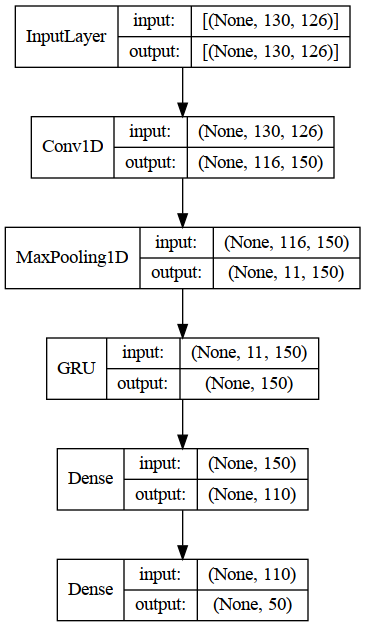

In [173]:
plot_model(reconstructed_model, show_shapes=True, show_layer_names=False)

In [174]:
reconstructed_model.evaluate(Xval,Yval)

11/11 [==============================] - 0s 7ms/step - loss: 1.1090 - f1_score: 0.7732


[1.1089534759521484, 0.773163914680481]

In [175]:
print(classification_report(np.argmax(Yval, axis=1), np.argmax(reconstructed_model.predict(Xval), axis=1),
                            digits=3, target_names=label_map))

11/11 [==============================] - 0s 6ms/step
              precision    recall  f1-score   support

         AXE      1.000     0.750     0.857         8
    BACKPACK      0.857     1.000     0.923         6
  BASKETBALL      0.818     0.900     0.857        10
         BEE      1.000     0.400     0.571        10
        BELT      1.000     1.000     1.000         4
        BITE      1.000     1.000     1.000         8
   BREAKFAST      0.600     1.000     0.750         6
      CANCER      0.727     1.000     0.842         8
   CHRISTMAS      0.667     0.667     0.667         6
    CONFUSED      0.857     1.000     0.923         6
        DARK      0.800     1.000     0.889         4
        DEAF      0.857     1.000     0.923         6
      DECIDE      1.000     0.667     0.800         6
      DEMAND      0.714     0.625     0.667         8
     DEVELOP      0.750     0.500     0.600         6
      DINNER      0.750     0.750     0.750         8
         DOG      0.857     

In [150]:
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath='1 1DCNN + 1 GRU Mish/',
    monitor='val_f1_score',
    mode='max',
    save_best_only=True)

In [157]:
act_function = mish
#initializer = tf.keras.initializers.LecunNormal(seed=10)

model = Sequential()
model.add(Conv1D(filters=150,kernel_size=15,
                 activation=act_function,input_shape=(130,126)))
model.add(MaxPooling1D(pool_size=10))
model.add(Dropout(.55))
model.add(GRU(units=150,return_sequences=False,
              kernel_regularizer=regularizers.l2(.00043122634871936203)))
model.add(Dropout(.7))
model.add(Dense(units=110,activation=act_function))
model.add(Dense(50, activation='softmax'))

model.compile(tf.optimizers.experimental.Nadam(.00021882052801027956),
            loss='categorical_crossentropy',
            metrics=[tfa.metrics.F1Score(num_classes=50, average='macro')])
model.summary()
History = model.fit(x=Xtrain, y=Ytrain,validation_data= (Xval,Yval), batch_size=96,epochs=500, verbose=1,callbacks=[model_checkpoint_callback])

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_5 (Conv1D)           (None, 116, 150)          283650    
                                                                 
 max_pooling1d_5 (MaxPooling  (None, 11, 150)          0         
 1D)                                                             
                                                                 
 dropout_10 (Dropout)        (None, 11, 150)           0         
                                                                 
 gru_5 (GRU)                 (None, 150)               135900    
                                                                 
 dropout_11 (Dropout)        (None, 150)               0         
                                                                 
 dense_10 (Dense)            (None, 110)               16610     
                                                      

28/28 [==============================] - 1s 49ms/step - loss: 0.8565 - f1_score: 0.7470 - val_loss: 1.1380 - val_f1_score: 0.6924
Epoch 106/500
28/28 [==============================] - 1s 48ms/step - loss: 0.8433 - f1_score: 0.7449 - val_loss: 1.1442 - val_f1_score: 0.7037
Epoch 107/500
28/28 [==============================] - 1s 48ms/step - loss: 0.8421 - f1_score: 0.7457 - val_loss: 1.1365 - val_f1_score: 0.7012
Epoch 108/500
28/28 [==============================] - 1s 51ms/step - loss: 0.8267 - f1_score: 0.7578 - val_loss: 1.1373 - val_f1_score: 0.7220
Epoch 109/500
28/28 [==============================] - 1s 48ms/step - loss: 0.8348 - f1_score: 0.7401 - val_loss: 1.1372 - val_f1_score: 0.7085
Epoch 110/500
28/28 [==============================] - 1s 48ms/step - loss: 0.8136 - f1_score: 0.7491 - val_loss: 1.1470 - val_f1_score: 0.7141
Epoch 111/500
28/28 [==============================] - 1s 48ms/step - loss: 0.8015 - f1_score: 0.7718 - val_loss: 1.1359 - val_f1_score: 0.7176
Epoch 

Epoch 162/500
28/28 [==============================] - 2s 59ms/step - loss: 0.5869 - f1_score: 0.8256 - val_loss: 1.1054 - val_f1_score: 0.7654
Epoch 163/500
28/28 [==============================] - 2s 61ms/step - loss: 0.5924 - f1_score: 0.8188 - val_loss: 1.1162 - val_f1_score: 0.7536
Epoch 164/500
28/28 [==============================] - 1s 52ms/step - loss: 0.5707 - f1_score: 0.8247 - val_loss: 1.0644 - val_f1_score: 0.7433
Epoch 165/500
28/28 [==============================] - 1s 50ms/step - loss: 0.5761 - f1_score: 0.8314 - val_loss: 1.0904 - val_f1_score: 0.7507
Epoch 166/500
28/28 [==============================] - 1s 51ms/step - loss: 0.5627 - f1_score: 0.8340 - val_loss: 1.0788 - val_f1_score: 0.7481
Epoch 167/500
28/28 [==============================] - 1s 49ms/step - loss: 0.5667 - f1_score: 0.8384 - val_loss: 1.1225 - val_f1_score: 0.7583
Epoch 168/500
28/28 [==============================] - 1s 49ms/step - loss: 0.5863 - f1_score: 0.8248 - val_loss: 1.1203 - val_f1_score:

Epoch 219/500
28/28 [==============================] - 2s 55ms/step - loss: 0.4268 - f1_score: 0.8758 - val_loss: 1.1356 - val_f1_score: 0.7789
Epoch 220/500
28/28 [==============================] - 1s 51ms/step - loss: 0.4194 - f1_score: 0.8799 - val_loss: 1.0650 - val_f1_score: 0.7949
Epoch 221/500
28/28 [==============================] - 1s 51ms/step - loss: 0.4352 - f1_score: 0.8715 - val_loss: 1.1171 - val_f1_score: 0.7722
Epoch 222/500
28/28 [==============================] - 1s 50ms/step - loss: 0.4128 - f1_score: 0.8809 - val_loss: 1.0969 - val_f1_score: 0.7698
Epoch 223/500
28/28 [==============================] - 1s 51ms/step - loss: 0.4197 - f1_score: 0.8779 - val_loss: 1.1324 - val_f1_score: 0.7775
Epoch 224/500
28/28 [==============================] - 2s 56ms/step - loss: 0.4140 - f1_score: 0.8868 - val_loss: 1.0734 - val_f1_score: 0.7719
Epoch 225/500
28/28 [==============================] - 2s 54ms/step - loss: 0.4101 - f1_score: 0.8782 - val_loss: 1.0639 - val_f1_score:

Epoch 276/500
28/28 [==============================] - 1s 48ms/step - loss: 0.3239 - f1_score: 0.9092 - val_loss: 1.0902 - val_f1_score: 0.7826
Epoch 277/500
28/28 [==============================] - 1s 48ms/step - loss: 0.3593 - f1_score: 0.8998 - val_loss: 1.0688 - val_f1_score: 0.7916
Epoch 278/500
28/28 [==============================] - 1s 48ms/step - loss: 0.3259 - f1_score: 0.9133 - val_loss: 1.0936 - val_f1_score: 0.7872
Epoch 279/500
28/28 [==============================] - 1s 49ms/step - loss: 0.3183 - f1_score: 0.9119 - val_loss: 1.0825 - val_f1_score: 0.8030
Epoch 280/500
28/28 [==============================] - 1s 48ms/step - loss: 0.3339 - f1_score: 0.9130 - val_loss: 1.0567 - val_f1_score: 0.8142
Epoch 281/500
28/28 [==============================] - 1s 49ms/step - loss: 0.3367 - f1_score: 0.9088 - val_loss: 1.1277 - val_f1_score: 0.7963
Epoch 282/500
28/28 [==============================] - 2s 55ms/step - loss: 0.3419 - f1_score: 0.9023 - val_loss: 1.0686 - val_f1_score:

Epoch 333/500
28/28 [==============================] - 1s 50ms/step - loss: 0.2730 - f1_score: 0.9244 - val_loss: 1.0813 - val_f1_score: 0.8051
Epoch 334/500
28/28 [==============================] - 1s 49ms/step - loss: 0.2694 - f1_score: 0.9229 - val_loss: 1.1112 - val_f1_score: 0.7974
Epoch 335/500
28/28 [==============================] - 1s 48ms/step - loss: 0.2864 - f1_score: 0.9200 - val_loss: 1.0654 - val_f1_score: 0.8085
Epoch 336/500
28/28 [==============================] - 1s 49ms/step - loss: 0.2629 - f1_score: 0.9262 - val_loss: 1.0860 - val_f1_score: 0.8143
Epoch 337/500
28/28 [==============================] - 1s 49ms/step - loss: 0.2642 - f1_score: 0.9272 - val_loss: 1.1450 - val_f1_score: 0.8179
Epoch 338/500
28/28 [==============================] - 1s 48ms/step - loss: 0.2839 - f1_score: 0.9212 - val_loss: 1.1533 - val_f1_score: 0.8119
Epoch 339/500
28/28 [==============================] - 1s 48ms/step - loss: 0.2770 - f1_score: 0.9301 - val_loss: 1.1026 - val_f1_score:

Epoch 390/500
28/28 [==============================] - 1s 53ms/step - loss: 0.2204 - f1_score: 0.9393 - val_loss: 1.1773 - val_f1_score: 0.8163
Epoch 391/500
28/28 [==============================] - 1s 49ms/step - loss: 0.2167 - f1_score: 0.9422 - val_loss: 1.1307 - val_f1_score: 0.8046
Epoch 392/500
28/28 [==============================] - 1s 50ms/step - loss: 0.2545 - f1_score: 0.9285 - val_loss: 1.1943 - val_f1_score: 0.7985
Epoch 393/500
28/28 [==============================] - 1s 48ms/step - loss: 0.2516 - f1_score: 0.9325 - val_loss: 1.1902 - val_f1_score: 0.8097
Epoch 394/500
28/28 [==============================] - 1s 49ms/step - loss: 0.2373 - f1_score: 0.9417 - val_loss: 1.2088 - val_f1_score: 0.8142
Epoch 395/500
28/28 [==============================] - 1s 49ms/step - loss: 0.2430 - f1_score: 0.9357 - val_loss: 1.1238 - val_f1_score: 0.8247
Epoch 396/500
28/28 [==============================] - 1s 48ms/step - loss: 0.2486 - f1_score: 0.9340 - val_loss: 1.1180 - val_f1_score:

INFO:tensorflow:Assets written to: 1 1DCNN + 1 GRU Mish/assets


INFO:tensorflow:Assets written to: 1 1DCNN + 1 GRU Mish/assets


28/28 [==============================] - 11s 391ms/step - loss: 0.2016 - f1_score: 0.9500 - val_loss: 1.1435 - val_f1_score: 0.8445
Epoch 427/500
28/28 [==============================] - 1s 48ms/step - loss: 0.1964 - f1_score: 0.9499 - val_loss: 1.2075 - val_f1_score: 0.8223
Epoch 428/500
28/28 [==============================] - 1s 47ms/step - loss: 0.2068 - f1_score: 0.9443 - val_loss: 1.2132 - val_f1_score: 0.8169
Epoch 429/500
28/28 [==============================] - 1s 49ms/step - loss: 0.2281 - f1_score: 0.9382 - val_loss: 1.0762 - val_f1_score: 0.8283
Epoch 430/500
28/28 [==============================] - 1s 48ms/step - loss: 0.2088 - f1_score: 0.9470 - val_loss: 1.1645 - val_f1_score: 0.8261
Epoch 431/500
28/28 [==============================] - 1s 47ms/step - loss: 0.2240 - f1_score: 0.9351 - val_loss: 1.1800 - val_f1_score: 0.8261
Epoch 432/500
28/28 [==============================] - 1s 47ms/step - loss: 0.2053 - f1_score: 0.9508 - val_loss: 1.1587 - val_f1_score: 0.8364
Epoc

Epoch 483/500
28/28 [==============================] - 1s 48ms/step - loss: 0.1789 - f1_score: 0.9558 - val_loss: 1.2377 - val_f1_score: 0.8206
Epoch 484/500
28/28 [==============================] - 1s 48ms/step - loss: 0.1727 - f1_score: 0.9520 - val_loss: 1.1677 - val_f1_score: 0.8199
Epoch 485/500
28/28 [==============================] - 1s 48ms/step - loss: 0.1903 - f1_score: 0.9490 - val_loss: 1.1818 - val_f1_score: 0.8160
Epoch 486/500
28/28 [==============================] - 1s 49ms/step - loss: 0.1710 - f1_score: 0.9543 - val_loss: 1.2129 - val_f1_score: 0.8280
Epoch 487/500
28/28 [==============================] - 1s 48ms/step - loss: 0.1738 - f1_score: 0.9589 - val_loss: 1.1882 - val_f1_score: 0.8311
Epoch 488/500
28/28 [==============================] - 1s 50ms/step - loss: 0.1727 - f1_score: 0.9592 - val_loss: 1.1651 - val_f1_score: 0.8286
Epoch 489/500
28/28 [==============================] - 1s 48ms/step - loss: 0.1749 - f1_score: 0.9518 - val_loss: 1.2038 - val_f1_score:

In [158]:
print(classification_report(np.argmax(Yval, axis=1), np.argmax(model.predict(Xval), axis=1),
                            digits=3, target_names=label_map))

11/11 [==============================] - 1s 6ms/step
              precision    recall  f1-score   support

         AXE      0.667     0.750     0.706         8
    BACKPACK      0.750     1.000     0.857         6
  BASKETBALL      1.000     1.000     1.000        10
         BEE      1.000     0.800     0.889        10
        BELT      1.000     0.750     0.857         4
        BITE      0.800     1.000     0.889         8
   BREAKFAST      0.462     1.000     0.632         6
      CANCER      1.000     1.000     1.000         8
   CHRISTMAS      1.000     0.667     0.800         6
    CONFUSED      0.857     1.000     0.923         6
        DARK      1.000     1.000     1.000         4
        DEAF      1.000     1.000     1.000         6
      DECIDE      1.000     0.667     0.800         6
      DEMAND      1.000     0.750     0.857         8
     DEVELOP      0.600     1.000     0.750         6
      DINNER      1.000     0.750     0.857         8
         DOG      1.000     

In [176]:
reconstructed_model = tf.keras.models.load_model("1 1DCNN + 1 GRU Mish")

In [177]:
reconstructed_model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_5 (Conv1D)           (None, 116, 150)          283650    
                                                                 
 max_pooling1d_5 (MaxPooling  (None, 11, 150)          0         
 1D)                                                             
                                                                 
 dropout_10 (Dropout)        (None, 11, 150)           0         
                                                                 
 gru_5 (GRU)                 (None, 150)               135900    
                                                                 
 dropout_11 (Dropout)        (None, 150)               0         
                                                                 
 dense_10 (Dense)            (None, 110)               16610     
                                                      

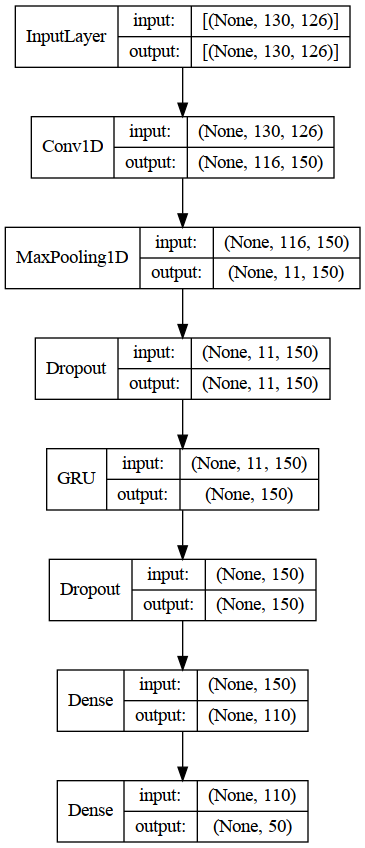

In [178]:
plot_model(reconstructed_model, show_shapes=True, show_layer_names=False)

In [179]:
reconstructed_model.evaluate(Xval,Yval)

11/11 [==============================] - 1s 7ms/step - loss: 1.1435 - f1_score: 0.8445


[1.1434996128082275, 0.8445467352867126]

In [180]:
print(classification_report(np.argmax(Yval, axis=1), np.argmax(reconstructed_model.predict(Xval), axis=1),
                            digits=3, target_names=label_map))

11/11 [==============================] - 0s 6ms/step
              precision    recall  f1-score   support

         AXE      0.750     0.750     0.750         8
    BACKPACK      0.750     1.000     0.857         6
  BASKETBALL      1.000     1.000     1.000        10
         BEE      1.000     0.900     0.947        10
        BELT      1.000     1.000     1.000         4
        BITE      0.800     1.000     0.889         8
   BREAKFAST      0.545     1.000     0.706         6
      CANCER      1.000     1.000     1.000         8
   CHRISTMAS      1.000     0.667     0.800         6
    CONFUSED      0.857     1.000     0.923         6
        DARK      1.000     1.000     1.000         4
        DEAF      1.000     1.000     1.000         6
      DECIDE      1.000     0.667     0.800         6
      DEMAND      1.000     0.750     0.857         8
     DEVELOP      0.625     0.833     0.714         6
      DINNER      1.000     0.750     0.857         8
         DOG      0.750     

## Hyperparameter Tuning 2 1D CNN Layer + 1 GRU

In [119]:
from keras_tuner import HyperModel
from kerastuner.tuners import Hyperband
from tensorflow.keras.callbacks import EarlyStopping


/tmp/ipykernel_560602/1222377179.py:2: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
  from kerastuner.tuners import Hyperband


In [120]:
from tensorflow.keras import regularizers
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout, SpatialDropout1D, GRU
import keras_tuner
from keras_tuner import HyperModel
from kerastuner.tuners import Hyperband
from tensorflow.keras.callbacks import EarlyStopping
import tensorflow_addons as tfa

class HyperModel(HyperModel):
    def __init__(self, input_shape, num_classes):
        self.input_shape = input_shape
        self.num_classes = num_classes

    def build(self, hp):
        act_function = hp.Choice('dense_activation',values=['selu','mish','gelu','elu','relu'],default='elu')
        model = Sequential()
        model.add(Conv1D(filters=hp.Int('filters_1',min_value=50,max_value=200,step=25,default=150),
                         kernel_size=hp.Choice('kernel_1',values=[3,4,5,6,7,8,9,10],default=5,),
                         activation=act_function,input_shape=self.input_shape))
        model.add(MaxPooling1D(pool_size=hp.Choice('pool_1',values=[3,4,5,6,7,8,9,10],default=5,)))
        model.add(Conv1D(filters=hp.Int('filters_2',min_value=50,max_value=200,step=25,default=150),
                         kernel_size=hp.Choice('kernel_2',values=[1,2,3,4,5],default=5,),
                         activation=act_function,input_shape=self.input_shape))
        model.add(MaxPooling1D(pool_size=hp.Choice('pool_2',values=[1,2,3,4,5],default=5,)))
        model.add(Dropout(rate=hp.Float('dropout_1',min_value=0.0,max_value=0.9,default=0.8,step=0.05,)))
        model.add(GRU(units=hp.Int('units_1',min_value=50,max_value=200,step=25,default=100),
                      return_sequences=False,
                      kernel_regularizer=regularizers.l2(hp.Float('regularizer',min_value=1e-4,
                                                                max_value=1e-2,sampling='LOG',
                                                                default=.001))))
        model.add(Dropout(rate=hp.Float('dropout_2',min_value=0.0,max_value=0.9,default=0.7,step=0.05,)))
        model.add(Dense(units=hp.Int('units_2',min_value=70,max_value=120,step=10,default=80),activation=act_function))
        model.add(Dense(self.num_classes, activation='softmax'))

        model.compile(tf.optimizers.experimental.Nadam(hp.Float('learning_rate',min_value=1e-4,
                                                                max_value=1e-2,sampling='LOG',
                                                                default=.00062198175395800846)),
            loss='categorical_crossentropy',
            metrics=[tfa.metrics.F1Score(num_classes=50, average='macro')]
        )
        return model

hypermodel = HyperModel(input_shape=(130,399), num_classes=50)

In [121]:
HYPERBAND_MAX_EPOCHS = 300
#MAX_TRIALS = 20
EXECUTION_PER_TRIAL = 2

tuner = Hyperband(
    hypermodel,
    max_epochs=HYPERBAND_MAX_EPOCHS,
    objective=keras_tuner.Objective("val_f1_score", direction="max"),
    seed=10,
    executions_per_trial=EXECUTION_PER_TRIAL,
    directory='/media/kristian/HDD/ASL_Citizen/RTMPose-L/hyperband/',
    project_name='2_1D_CNN+1_GRU',
    overwrite=False)

2023-09-06 17:33:50.984956: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-09-06 17:33:51.051249: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1616] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 1739 MB memory:  -> device: 0, name: NVIDIA GeForce MX250, pci bus id: 0000:01:00.0, compute capability: 6.1


In [122]:
tuner.search_space_summary()

Search space summary
Default search space size: 13
dense_activation (Choice)
{'default': 'elu', 'conditions': [], 'values': ['selu', 'mish', 'gelu', 'elu', 'relu'], 'ordered': False}
filters_1 (Int)
{'default': 150, 'conditions': [], 'min_value': 50, 'max_value': 200, 'step': 25, 'sampling': 'linear'}
kernel_1 (Choice)
{'default': 5, 'conditions': [], 'values': [3, 4, 5, 6, 7, 8, 9, 10], 'ordered': True}
pool_1 (Choice)
{'default': 5, 'conditions': [], 'values': [3, 4, 5, 6, 7, 8, 9, 10], 'ordered': True}
filters_2 (Int)
{'default': 150, 'conditions': [], 'min_value': 50, 'max_value': 200, 'step': 25, 'sampling': 'linear'}
kernel_2 (Choice)
{'default': 5, 'conditions': [], 'values': [1, 2, 3, 4, 5], 'ordered': True}
pool_2 (Choice)
{'default': 5, 'conditions': [], 'values': [1, 2, 3, 4, 5], 'ordered': True}
dropout_1 (Float)
{'default': 0.8, 'conditions': [], 'min_value': 0.0, 'max_value': 0.9, 'step': 0.05, 'sampling': 'linear'}
units_1 (Int)
{'default': 100, 'conditions': [], 'min_va

In [123]:
es = EarlyStopping(monitor="val_f1_score",patience=30,restore_best_weights=True,mode="max")

In [124]:
log_dir = os.path.join('Logs')
tb_callback = TensorBoard(log_dir=log_dir)

In [ ]:
tuner.search(Xtrain, Ytrain, epochs=1000, validation_data=(Xval,Yval),batch_size=96,callbacks=[es])

Trial 147 Complete [00h 00m 23s]
val_f1_score: 0.0017403615056537092

Best val_f1_score So Far: 0.033565436489880085
Total elapsed time: 00h 56m 08s

Search: Running Trial #148

Value             |Best Value So Far |Hyperparameter
elu               |selu              |dense_activation
50                |75                |filters_1
6                 |5                 |kernel_1
10                |7                 |pool_1
75                |75                |filters_2
4                 |5                 |kernel_2
4                 |3                 |pool_2
0.1               |0.15              |dropout_1
175               |100               |units_1
0.003525          |0.0092969         |regularizer
0.7               |0.3               |dropout_2
80                |100               |units_2
0.00044812        |0.00026068        |learning_rate
2                 |2                 |tuner/epochs
0                 |0                 |tuner/initial_epoch
5                 |5               

In [118]:
best_model = tuner.get_best_models(num_models=10)[0]

2023-09-03 12:12:32.559683: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-09-03 12:12:32.624358: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1616] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 1517 MB memory:  -> device: 0, name: NVIDIA GeForce MX250, pci bus id: 0000:01:00.0, compute capability: 6.1


IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=100.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [122]:
best_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 122, 150)          170250    
                                                                 
 max_pooling1d (MaxPooling1D  (None, 40, 150)          0         
 )                                                               
                                                                 
 conv1d_1 (Conv1D)           (None, 36, 150)           112650    
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 12, 150)          0         
 1D)                                                             
                                                                 
 dropout (Dropout)           (None, 12, 150)           0         
                                                                 
 gru (GRU)                   (None, 175)               1

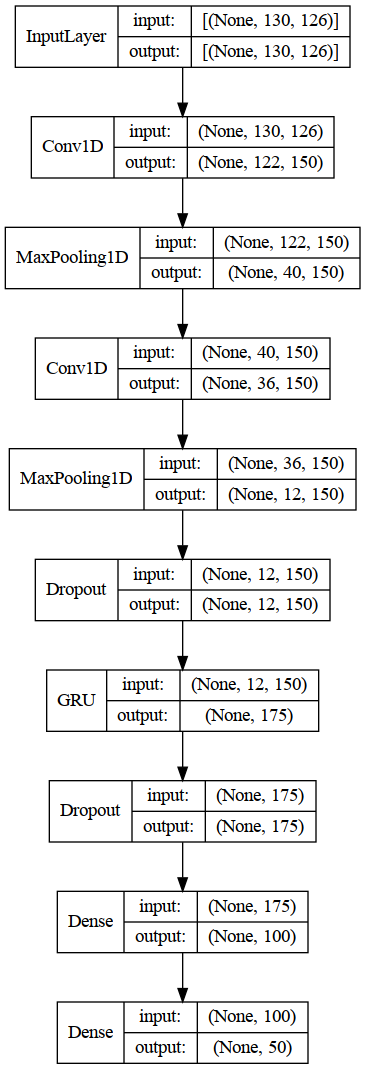

In [123]:
plot_model(best_model, show_shapes=True, show_layer_names=False)

In [119]:
tuner.results_summary()

Results summary
Results in /media/kristian/HDD/ASL_Citizen/Mediapipe/hyperband/2_1D_CNN+1_GRU
Showing 10 best trials
Objective(name="val_f1_score", direction="max")

Trial 0714 summary
Hyperparameters:
dense_activation: selu
num_filters_1: 150
kernel_1: 9
pool_1: 3
num_filters_2: 150
kernel_2: 5
pool_2: 3
dropout_1: 0.15000000000000002
units_1: 175
regularizer: 0.00014882201555231845
dropout_2: 0.35000000000000003
units_2: 100
learning_rate: 0.00022221143188447883
tuner/epochs: 300
tuner/initial_epoch: 100
tuner/bracket: 1
tuner/round: 1
tuner/trial_id: 0706
Score: 0.8229770958423615

Trial 0721 summary
Hyperparameters:
dense_activation: LeakyReLU
num_filters_1: 150
kernel_1: 5
pool_1: 3
num_filters_2: 100
kernel_2: 4
pool_2: 3
dropout_1: 0.45
units_1: 150
regularizer: 0.00042286793942433336
dropout_2: 0.8
units_2: 80
learning_rate: 0.0019929796667454143
tuner/epochs: 300
tuner/initial_epoch: 0
tuner/bracket: 0
tuner/round: 0
Score: 0.8228467404842377

Trial 0598 summary
Hyperparameter

In [120]:
loss, accuracy = best_model.evaluate(Xval, Yval)

2023-09-03 12:12:55.434145: I tensorflow/stream_executor/cuda/cuda_dnn.cc:384] Loaded cuDNN version 8600


11/11 [==============================] - 1s 17ms/step - loss: 0.9564 - f1_score: 0.8344


In [124]:
print(classification_report(np.argmax(Yval, axis=1), np.argmax(best_model.predict(Xval), axis=1),
                            digits=3, target_names=label_map))

11/11 [==============================] - 0s 8ms/step
              precision    recall  f1-score   support

         AXE      0.857     0.750     0.800         8
    BACKPACK      0.857     1.000     0.923         6
  BASKETBALL      1.000     1.000     1.000        10
         BEE      1.000     0.700     0.824        10
        BELT      0.800     1.000     0.889         4
        BITE      0.800     1.000     0.889         8
   BREAKFAST      0.857     1.000     0.923         6
      CANCER      0.889     1.000     0.941         8
   CHRISTMAS      1.000     0.500     0.667         6
    CONFUSED      1.000     1.000     1.000         6
        DARK      1.000     1.000     1.000         4
        DEAF      0.857     1.000     0.923         6
      DECIDE      1.000     0.833     0.909         6
      DEMAND      0.750     0.750     0.750         8
     DEVELOP      0.750     1.000     0.857         6
      DINNER      1.000     0.750     0.857         8
         DOG      1.000     

In [125]:
#bestHP = tuner.get_best_hyperparameters(num_trials=5)[2]
bestHP = tuner.get_best_hyperparameters(num_trials=10)[0]

In [126]:
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath='2 1DCNN + 1 GRU',
    monitor='val_f1_score',
    mode='max',
    save_best_only=True)

In [127]:
print("[INFO] training the best model...")
model = tuner.hypermodel.build(bestHP)
History = model.fit(x=Xtrain, y=Ytrain,validation_data= (Xval,Yval), batch_size=96,epochs=500, verbose=1,callbacks=[model_checkpoint_callback])
#History = model.fit(x=Xtrain, y=Ytrain,validation_data= (Xval,Yval), batch_size=96,epochs=500, verbose=1)

[INFO] training the best model...
Epoch 1/500


2023-09-03 12:15:55.298034: W tensorflow/core/common_runtime/bfc_allocator.cc:290] Allocator (GPU_0_bfc) ran out of memory trying to allocate 1.18GiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.
2023-09-03 12:15:55.981109: W tensorflow/core/common_runtime/bfc_allocator.cc:290] Allocator (GPU_0_bfc) ran out of memory trying to allocate 946.10MiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.
2023-09-03 12:15:56.005026: W tensorflow/core/common_runtime/bfc_allocator.cc:290] Allocator (GPU_0_bfc) ran out of memory trying to allocate 1.18GiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.
2023-09-03 12:15:56.072944: I tensorflow/compiler/xla/service/service.c

27/28 [===========================>..] - ETA: 0s - loss: 3.9503 - f1_score: 0.0212

2023-09-03 12:15:58.760498: W tensorflow/core/common_runtime/bfc_allocator.cc:290] Allocator (GPU_0_bfc) ran out of memory trying to allocate 1.12GiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.
2023-09-03 12:15:58.898279: W tensorflow/core/common_runtime/bfc_allocator.cc:290] Allocator (GPU_0_bfc) ran out of memory trying to allocate 1.12GiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.


28/28 [==============================] - ETA: 0s - loss: 3.9454 - f1_score: 0.0218

2023-09-03 12:15:59.550842: W tensorflow/core/common_runtime/bfc_allocator.cc:290] Allocator (GPU_0_bfc) ran out of memory trying to allocate 915.55MiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.


INFO:tensorflow:Assets written to: 2 1DCNN + 1 GRU/assets


INFO:tensorflow:Assets written to: 2 1DCNN + 1 GRU/assets


28/28 [==============================] - 14s 323ms/step - loss: 3.9454 - f1_score: 0.0218 - val_loss: 3.8266 - val_f1_score: 0.0148
Epoch 2/500
27/28 [===========================>..] - ETA: 0s - loss: 3.7659 - f1_score: 0.0432

INFO:tensorflow:Assets written to: 2 1DCNN + 1 GRU/assets


INFO:tensorflow:Assets written to: 2 1DCNN + 1 GRU/assets


28/28 [==============================] - 7s 264ms/step - loss: 3.7651 - f1_score: 0.0441 - val_loss: 3.6431 - val_f1_score: 0.0652
Epoch 3/500
27/28 [===========================>..] - ETA: 0s - loss: 3.5525 - f1_score: 0.0828

INFO:tensorflow:Assets written to: 2 1DCNN + 1 GRU/assets


INFO:tensorflow:Assets written to: 2 1DCNN + 1 GRU/assets


28/28 [==============================] - 8s 282ms/step - loss: 3.5507 - f1_score: 0.0824 - val_loss: 3.4297 - val_f1_score: 0.1019
Epoch 4/500
27/28 [===========================>..] - ETA: 0s - loss: 3.3300 - f1_score: 0.1149

INFO:tensorflow:Assets written to: 2 1DCNN + 1 GRU/assets


INFO:tensorflow:Assets written to: 2 1DCNN + 1 GRU/assets


28/28 [==============================] - 8s 287ms/step - loss: 3.3300 - f1_score: 0.1157 - val_loss: 3.2179 - val_f1_score: 0.1603
Epoch 5/500
27/28 [===========================>..] - ETA: 0s - loss: 3.0884 - f1_score: 0.1851

INFO:tensorflow:Assets written to: 2 1DCNN + 1 GRU/assets


INFO:tensorflow:Assets written to: 2 1DCNN + 1 GRU/assets


28/28 [==============================] - 7s 267ms/step - loss: 3.0897 - f1_score: 0.1869 - val_loss: 2.9639 - val_f1_score: 0.2029
Epoch 6/500
27/28 [===========================>..] - ETA: 0s - loss: 2.8336 - f1_score: 0.2311

INFO:tensorflow:Assets written to: 2 1DCNN + 1 GRU/assets


INFO:tensorflow:Assets written to: 2 1DCNN + 1 GRU/assets


28/28 [==============================] - 7s 266ms/step - loss: 2.8324 - f1_score: 0.2312 - val_loss: 2.6846 - val_f1_score: 0.2921
Epoch 7/500
27/28 [===========================>..] - ETA: 0s - loss: 2.5456 - f1_score: 0.2995

INFO:tensorflow:Assets written to: 2 1DCNN + 1 GRU/assets


INFO:tensorflow:Assets written to: 2 1DCNN + 1 GRU/assets


28/28 [==============================] - 7s 241ms/step - loss: 2.5440 - f1_score: 0.3005 - val_loss: 2.3999 - val_f1_score: 0.3687
Epoch 8/500
27/28 [===========================>..] - ETA: 0s - loss: 2.3096 - f1_score: 0.3551

INFO:tensorflow:Assets written to: 2 1DCNN + 1 GRU/assets


INFO:tensorflow:Assets written to: 2 1DCNN + 1 GRU/assets


28/28 [==============================] - 7s 261ms/step - loss: 2.3084 - f1_score: 0.3553 - val_loss: 2.1735 - val_f1_score: 0.4067
Epoch 9/500
27/28 [===========================>..] - ETA: 0s - loss: 2.0857 - f1_score: 0.4226

INFO:tensorflow:Assets written to: 2 1DCNN + 1 GRU/assets


INFO:tensorflow:Assets written to: 2 1DCNN + 1 GRU/assets


28/28 [==============================] - 8s 283ms/step - loss: 2.0757 - f1_score: 0.4225 - val_loss: 1.9794 - val_f1_score: 0.4672
Epoch 10/500
27/28 [===========================>..] - ETA: 0s - loss: 1.9036 - f1_score: 0.4687

INFO:tensorflow:Assets written to: 2 1DCNN + 1 GRU/assets


INFO:tensorflow:Assets written to: 2 1DCNN + 1 GRU/assets


28/28 [==============================] - 7s 245ms/step - loss: 1.9010 - f1_score: 0.4685 - val_loss: 1.8515 - val_f1_score: 0.4968
Epoch 11/500
27/28 [===========================>..] - ETA: 0s - loss: 1.7624 - f1_score: 0.5127

INFO:tensorflow:Assets written to: 2 1DCNN + 1 GRU/assets


INFO:tensorflow:Assets written to: 2 1DCNN + 1 GRU/assets


28/28 [==============================] - 7s 272ms/step - loss: 1.7645 - f1_score: 0.5133 - val_loss: 1.7331 - val_f1_score: 0.5061
Epoch 12/500
27/28 [===========================>..] - ETA: 0s - loss: 1.6512 - f1_score: 0.5332

INFO:tensorflow:Assets written to: 2 1DCNN + 1 GRU/assets


INFO:tensorflow:Assets written to: 2 1DCNN + 1 GRU/assets


28/28 [==============================] - 7s 254ms/step - loss: 1.6434 - f1_score: 0.5350 - val_loss: 1.6139 - val_f1_score: 0.5513
Epoch 13/500
27/28 [===========================>..] - ETA: 0s - loss: 1.5421 - f1_score: 0.5803

INFO:tensorflow:Assets written to: 2 1DCNN + 1 GRU/assets


INFO:tensorflow:Assets written to: 2 1DCNN + 1 GRU/assets


28/28 [==============================] - 7s 255ms/step - loss: 1.5388 - f1_score: 0.5807 - val_loss: 1.5125 - val_f1_score: 0.5874
Epoch 14/500
27/28 [===========================>..] - ETA: 0s - loss: 1.4270 - f1_score: 0.6156

INFO:tensorflow:Assets written to: 2 1DCNN + 1 GRU/assets


INFO:tensorflow:Assets written to: 2 1DCNN + 1 GRU/assets


28/28 [==============================] - 8s 292ms/step - loss: 1.4249 - f1_score: 0.6173 - val_loss: 1.4440 - val_f1_score: 0.6347
Epoch 15/500
27/28 [===========================>..] - ETA: 0s - loss: 1.3513 - f1_score: 0.6369

INFO:tensorflow:Assets written to: 2 1DCNN + 1 GRU/assets


INFO:tensorflow:Assets written to: 2 1DCNN + 1 GRU/assets


28/28 [==============================] - 7s 244ms/step - loss: 1.3493 - f1_score: 0.6376 - val_loss: 1.3587 - val_f1_score: 0.6555
Epoch 16/500
28/28 [==============================] - 1s 43ms/step - loss: 1.2722 - f1_score: 0.6691 - val_loss: 1.3379 - val_f1_score: 0.6496
Epoch 17/500
27/28 [===========================>..] - ETA: 0s - loss: 1.2027 - f1_score: 0.6776

INFO:tensorflow:Assets written to: 2 1DCNN + 1 GRU/assets


INFO:tensorflow:Assets written to: 2 1DCNN + 1 GRU/assets


28/28 [==============================] - 8s 301ms/step - loss: 1.2074 - f1_score: 0.6770 - val_loss: 1.2921 - val_f1_score: 0.6633
Epoch 18/500
27/28 [===========================>..] - ETA: 0s - loss: 1.1296 - f1_score: 0.6911

INFO:tensorflow:Assets written to: 2 1DCNN + 1 GRU/assets


INFO:tensorflow:Assets written to: 2 1DCNN + 1 GRU/assets


28/28 [==============================] - 7s 245ms/step - loss: 1.1323 - f1_score: 0.6902 - val_loss: 1.2133 - val_f1_score: 0.6830
Epoch 19/500
28/28 [==============================] - 1s 43ms/step - loss: 1.0959 - f1_score: 0.7055 - val_loss: 1.2667 - val_f1_score: 0.6674
Epoch 20/500
27/28 [===========================>..] - ETA: 0s - loss: 1.0353 - f1_score: 0.7256

INFO:tensorflow:Assets written to: 2 1DCNN + 1 GRU/assets


INFO:tensorflow:Assets written to: 2 1DCNN + 1 GRU/assets


28/28 [==============================] - 7s 245ms/step - loss: 1.0365 - f1_score: 0.7251 - val_loss: 1.1673 - val_f1_score: 0.6888
Epoch 21/500
27/28 [===========================>..] - ETA: 0s - loss: 0.9708 - f1_score: 0.7333

INFO:tensorflow:Assets written to: 2 1DCNN + 1 GRU/assets


INFO:tensorflow:Assets written to: 2 1DCNN + 1 GRU/assets


28/28 [==============================] - 8s 286ms/step - loss: 0.9705 - f1_score: 0.7333 - val_loss: 1.1430 - val_f1_score: 0.6941
Epoch 22/500
27/28 [===========================>..] - ETA: 0s - loss: 0.9277 - f1_score: 0.7627

INFO:tensorflow:Assets written to: 2 1DCNN + 1 GRU/assets


INFO:tensorflow:Assets written to: 2 1DCNN + 1 GRU/assets


28/28 [==============================] - 7s 260ms/step - loss: 0.9265 - f1_score: 0.7614 - val_loss: 1.1569 - val_f1_score: 0.7022
Epoch 23/500
27/28 [===========================>..] - ETA: 0s - loss: 0.8922 - f1_score: 0.7652

INFO:tensorflow:Assets written to: 2 1DCNN + 1 GRU/assets


INFO:tensorflow:Assets written to: 2 1DCNN + 1 GRU/assets


28/28 [==============================] - 7s 267ms/step - loss: 0.8889 - f1_score: 0.7667 - val_loss: 1.0795 - val_f1_score: 0.7076
Epoch 24/500
27/28 [===========================>..] - ETA: 0s - loss: 0.8572 - f1_score: 0.7741

INFO:tensorflow:Assets written to: 2 1DCNN + 1 GRU/assets


INFO:tensorflow:Assets written to: 2 1DCNN + 1 GRU/assets


28/28 [==============================] - 7s 262ms/step - loss: 0.8538 - f1_score: 0.7747 - val_loss: 1.0857 - val_f1_score: 0.7146
Epoch 25/500
27/28 [===========================>..] - ETA: 0s - loss: 0.8241 - f1_score: 0.7838

INFO:tensorflow:Assets written to: 2 1DCNN + 1 GRU/assets


INFO:tensorflow:Assets written to: 2 1DCNN + 1 GRU/assets


28/28 [==============================] - 7s 268ms/step - loss: 0.8262 - f1_score: 0.7852 - val_loss: 1.0694 - val_f1_score: 0.7260
Epoch 26/500
28/28 [==============================] - 1s 43ms/step - loss: 0.7706 - f1_score: 0.8020 - val_loss: 1.0503 - val_f1_score: 0.7119
Epoch 27/500
27/28 [===========================>..] - ETA: 0s - loss: 0.7367 - f1_score: 0.8118

INFO:tensorflow:Assets written to: 2 1DCNN + 1 GRU/assets


INFO:tensorflow:Assets written to: 2 1DCNN + 1 GRU/assets


28/28 [==============================] - 9s 318ms/step - loss: 0.7349 - f1_score: 0.8126 - val_loss: 1.0188 - val_f1_score: 0.7311
Epoch 28/500
27/28 [===========================>..] - ETA: 0s - loss: 0.7010 - f1_score: 0.8123

INFO:tensorflow:Assets written to: 2 1DCNN + 1 GRU/assets


INFO:tensorflow:Assets written to: 2 1DCNN + 1 GRU/assets


28/28 [==============================] - 7s 267ms/step - loss: 0.7003 - f1_score: 0.8117 - val_loss: 1.0222 - val_f1_score: 0.7359
Epoch 29/500
27/28 [===========================>..] - ETA: 0s - loss: 0.6752 - f1_score: 0.8195

INFO:tensorflow:Assets written to: 2 1DCNN + 1 GRU/assets


INFO:tensorflow:Assets written to: 2 1DCNN + 1 GRU/assets


28/28 [==============================] - 8s 276ms/step - loss: 0.6790 - f1_score: 0.8196 - val_loss: 0.9748 - val_f1_score: 0.7370
Epoch 30/500
27/28 [===========================>..] - ETA: 0s - loss: 0.6500 - f1_score: 0.8230

INFO:tensorflow:Assets written to: 2 1DCNN + 1 GRU/assets


INFO:tensorflow:Assets written to: 2 1DCNN + 1 GRU/assets


28/28 [==============================] - 7s 255ms/step - loss: 0.6490 - f1_score: 0.8223 - val_loss: 0.9964 - val_f1_score: 0.7389
Epoch 31/500
28/28 [==============================] - 1s 43ms/step - loss: 0.6348 - f1_score: 0.8400 - val_loss: 1.0206 - val_f1_score: 0.7197
Epoch 32/500
27/28 [===========================>..] - ETA: 0s - loss: 0.5969 - f1_score: 0.8457

INFO:tensorflow:Assets written to: 2 1DCNN + 1 GRU/assets


INFO:tensorflow:Assets written to: 2 1DCNN + 1 GRU/assets


28/28 [==============================] - 8s 284ms/step - loss: 0.5957 - f1_score: 0.8456 - val_loss: 0.9903 - val_f1_score: 0.7451
Epoch 33/500
28/28 [==============================] - 1s 43ms/step - loss: 0.5723 - f1_score: 0.8587 - val_loss: 1.0460 - val_f1_score: 0.7256
Epoch 34/500
28/28 [==============================] - 1s 43ms/step - loss: 0.5439 - f1_score: 0.8596 - val_loss: 0.9699 - val_f1_score: 0.7413
Epoch 35/500
27/28 [===========================>..] - ETA: 0s - loss: 0.5261 - f1_score: 0.8696

INFO:tensorflow:Assets written to: 2 1DCNN + 1 GRU/assets


INFO:tensorflow:Assets written to: 2 1DCNN + 1 GRU/assets


28/28 [==============================] - 8s 280ms/step - loss: 0.5246 - f1_score: 0.8701 - val_loss: 0.9628 - val_f1_score: 0.7477
Epoch 36/500
27/28 [===========================>..] - ETA: 0s - loss: 0.5023 - f1_score: 0.8733

INFO:tensorflow:Assets written to: 2 1DCNN + 1 GRU/assets


INFO:tensorflow:Assets written to: 2 1DCNN + 1 GRU/assets


28/28 [==============================] - 7s 268ms/step - loss: 0.5041 - f1_score: 0.8732 - val_loss: 0.9529 - val_f1_score: 0.7689
Epoch 37/500
28/28 [==============================] - 1s 43ms/step - loss: 0.4750 - f1_score: 0.8915 - val_loss: 1.0169 - val_f1_score: 0.7255
Epoch 38/500
28/28 [==============================] - 1s 43ms/step - loss: 0.4591 - f1_score: 0.8882 - val_loss: 0.9654 - val_f1_score: 0.7647
Epoch 39/500
28/28 [==============================] - 1s 43ms/step - loss: 0.4424 - f1_score: 0.8883 - val_loss: 0.9545 - val_f1_score: 0.7622
Epoch 40/500
28/28 [==============================] - 1s 44ms/step - loss: 0.4215 - f1_score: 0.8900 - val_loss: 0.8947 - val_f1_score: 0.7676
Epoch 41/500
28/28 [==============================] - 1s 43ms/step - loss: 0.4205 - f1_score: 0.8941 - val_loss: 0.9193 - val_f1_score: 0.7435
Epoch 42/500
27/28 [===========================>..] - ETA: 0s - loss: 0.4070 - f1_score: 0.9032

INFO:tensorflow:Assets written to: 2 1DCNN + 1 GRU/assets


INFO:tensorflow:Assets written to: 2 1DCNN + 1 GRU/assets


28/28 [==============================] - 9s 335ms/step - loss: 0.4059 - f1_score: 0.9029 - val_loss: 0.8779 - val_f1_score: 0.7853
Epoch 43/500
28/28 [==============================] - 1s 44ms/step - loss: 0.3552 - f1_score: 0.9170 - val_loss: 0.9016 - val_f1_score: 0.7690
Epoch 44/500
28/28 [==============================] - 1s 43ms/step - loss: 0.3648 - f1_score: 0.9111 - val_loss: 0.9097 - val_f1_score: 0.7629
Epoch 45/500
27/28 [===========================>..] - ETA: 0s - loss: 0.3366 - f1_score: 0.9305

INFO:tensorflow:Assets written to: 2 1DCNN + 1 GRU/assets


INFO:tensorflow:Assets written to: 2 1DCNN + 1 GRU/assets


28/28 [==============================] - 8s 291ms/step - loss: 0.3407 - f1_score: 0.9289 - val_loss: 0.8965 - val_f1_score: 0.7855
Epoch 46/500
28/28 [==============================] - 1s 45ms/step - loss: 0.3540 - f1_score: 0.9196 - val_loss: 0.9089 - val_f1_score: 0.7791
Epoch 47/500
28/28 [==============================] - 1s 43ms/step - loss: 0.3190 - f1_score: 0.9290 - val_loss: 0.8955 - val_f1_score: 0.7692
Epoch 48/500
28/28 [==============================] - 1s 43ms/step - loss: 0.3133 - f1_score: 0.9290 - val_loss: 0.9353 - val_f1_score: 0.7636
Epoch 49/500
28/28 [==============================] - 1s 44ms/step - loss: 0.2955 - f1_score: 0.9364 - val_loss: 0.8346 - val_f1_score: 0.7812
Epoch 50/500
28/28 [==============================] - 1s 44ms/step - loss: 0.2954 - f1_score: 0.9307 - val_loss: 0.8614 - val_f1_score: 0.7853
Epoch 51/500
27/28 [===========================>..] - ETA: 0s - loss: 0.2757 - f1_score: 0.9423

INFO:tensorflow:Assets written to: 2 1DCNN + 1 GRU/assets


INFO:tensorflow:Assets written to: 2 1DCNN + 1 GRU/assets


28/28 [==============================] - 8s 292ms/step - loss: 0.2754 - f1_score: 0.9426 - val_loss: 0.8848 - val_f1_score: 0.7875
Epoch 52/500
28/28 [==============================] - 1s 43ms/step - loss: 0.2654 - f1_score: 0.9472 - val_loss: 0.9101 - val_f1_score: 0.7671
Epoch 53/500
28/28 [==============================] - 1s 43ms/step - loss: 0.2653 - f1_score: 0.9413 - val_loss: 0.9201 - val_f1_score: 0.7811
Epoch 54/500
27/28 [===========================>..] - ETA: 0s - loss: 0.2582 - f1_score: 0.9428

INFO:tensorflow:Assets written to: 2 1DCNN + 1 GRU/assets


INFO:tensorflow:Assets written to: 2 1DCNN + 1 GRU/assets


28/28 [==============================] - 7s 261ms/step - loss: 0.2584 - f1_score: 0.9432 - val_loss: 0.8460 - val_f1_score: 0.8182
Epoch 55/500
28/28 [==============================] - 1s 43ms/step - loss: 0.2384 - f1_score: 0.9507 - val_loss: 0.8739 - val_f1_score: 0.7999
Epoch 56/500
28/28 [==============================] - 1s 44ms/step - loss: 0.2420 - f1_score: 0.9470 - val_loss: 0.9352 - val_f1_score: 0.7731
Epoch 57/500
28/28 [==============================] - 1s 43ms/step - loss: 0.2221 - f1_score: 0.9558 - val_loss: 0.8727 - val_f1_score: 0.7744
Epoch 58/500
28/28 [==============================] - 1s 43ms/step - loss: 0.2089 - f1_score: 0.9619 - val_loss: 0.8819 - val_f1_score: 0.7917
Epoch 59/500
28/28 [==============================] - 1s 44ms/step - loss: 0.1975 - f1_score: 0.9681 - val_loss: 0.8648 - val_f1_score: 0.8006
Epoch 60/500
28/28 [==============================] - 1s 44ms/step - loss: 0.2069 - f1_score: 0.9566 - val_loss: 0.9635 - val_f1_score: 0.7472
Epoch 61/50

INFO:tensorflow:Assets written to: 2 1DCNN + 1 GRU/assets


INFO:tensorflow:Assets written to: 2 1DCNN + 1 GRU/assets


28/28 [==============================] - 9s 341ms/step - loss: 0.0919 - f1_score: 0.9910 - val_loss: 0.8561 - val_f1_score: 0.8245
Epoch 91/500
28/28 [==============================] - 1s 44ms/step - loss: 0.0873 - f1_score: 0.9910 - val_loss: 0.8791 - val_f1_score: 0.8070
Epoch 92/500
28/28 [==============================] - 1s 44ms/step - loss: 0.0856 - f1_score: 0.9927 - val_loss: 0.8822 - val_f1_score: 0.8122
Epoch 93/500
28/28 [==============================] - 1s 44ms/step - loss: 0.0879 - f1_score: 0.9909 - val_loss: 0.9016 - val_f1_score: 0.7974
Epoch 94/500
28/28 [==============================] - 1s 44ms/step - loss: 0.0781 - f1_score: 0.9932 - val_loss: 0.8609 - val_f1_score: 0.8062
Epoch 95/500
28/28 [==============================] - 1s 46ms/step - loss: 0.0856 - f1_score: 0.9929 - val_loss: 0.8838 - val_f1_score: 0.8152
Epoch 96/500
28/28 [==============================] - 1s 44ms/step - loss: 0.0819 - f1_score: 0.9948 - val_loss: 0.9353 - val_f1_score: 0.7970
Epoch 97/50

INFO:tensorflow:Assets written to: 2 1DCNN + 1 GRU/assets


INFO:tensorflow:Assets written to: 2 1DCNN + 1 GRU/assets


28/28 [==============================] - 9s 346ms/step - loss: 0.0653 - f1_score: 0.9963 - val_loss: 0.9142 - val_f1_score: 0.8266
Epoch 111/500
28/28 [==============================] - 1s 44ms/step - loss: 0.0643 - f1_score: 0.9950 - val_loss: 0.9344 - val_f1_score: 0.8092
Epoch 112/500
28/28 [==============================] - 1s 44ms/step - loss: 0.0576 - f1_score: 0.9981 - val_loss: 0.9328 - val_f1_score: 0.8089
Epoch 113/500
28/28 [==============================] - 1s 44ms/step - loss: 0.0633 - f1_score: 0.9962 - val_loss: 0.9031 - val_f1_score: 0.8180
Epoch 114/500
28/28 [==============================] - 1s 44ms/step - loss: 0.0665 - f1_score: 0.9944 - val_loss: 1.1061 - val_f1_score: 0.7548
Epoch 115/500
28/28 [==============================] - 1s 44ms/step - loss: 0.0665 - f1_score: 0.9947 - val_loss: 0.9034 - val_f1_score: 0.8167
Epoch 116/500
28/28 [==============================] - 1s 44ms/step - loss: 0.0597 - f1_score: 0.9978 - val_loss: 0.9530 - val_f1_score: 0.8062
Epoch

INFO:tensorflow:Assets written to: 2 1DCNN + 1 GRU/assets


INFO:tensorflow:Assets written to: 2 1DCNN + 1 GRU/assets


28/28 [==============================] - 8s 309ms/step - loss: 0.0479 - f1_score: 0.9989 - val_loss: 0.8934 - val_f1_score: 0.8278
Epoch 133/500
28/28 [==============================] - 1s 44ms/step - loss: 0.0627 - f1_score: 0.9938 - val_loss: 0.9808 - val_f1_score: 0.8135
Epoch 134/500
28/28 [==============================] - 1s 44ms/step - loss: 0.0584 - f1_score: 0.9954 - val_loss: 1.1044 - val_f1_score: 0.7643
Epoch 135/500
28/28 [==============================] - 1s 44ms/step - loss: 0.0821 - f1_score: 0.9870 - val_loss: 0.9482 - val_f1_score: 0.8194
Epoch 136/500
28/28 [==============================] - 1s 44ms/step - loss: 0.0576 - f1_score: 0.9943 - val_loss: 0.9793 - val_f1_score: 0.8128
Epoch 137/500
28/28 [==============================] - 1s 44ms/step - loss: 0.0529 - f1_score: 0.9973 - val_loss: 0.9184 - val_f1_score: 0.8250
Epoch 138/500
28/28 [==============================] - 1s 45ms/step - loss: 0.0517 - f1_score: 0.9952 - val_loss: 0.9616 - val_f1_score: 0.8045
Epoch

INFO:tensorflow:Assets written to: 2 1DCNN + 1 GRU/assets


INFO:tensorflow:Assets written to: 2 1DCNN + 1 GRU/assets


28/28 [==============================] - 9s 344ms/step - loss: 0.0409 - f1_score: 0.9985 - val_loss: 0.9302 - val_f1_score: 0.8327
Epoch 156/500
28/28 [==============================] - 1s 44ms/step - loss: 0.0453 - f1_score: 0.9978 - val_loss: 0.9824 - val_f1_score: 0.7997
Epoch 157/500
28/28 [==============================] - 1s 44ms/step - loss: 0.0470 - f1_score: 0.9977 - val_loss: 1.0351 - val_f1_score: 0.7729
Epoch 158/500
28/28 [==============================] - 1s 44ms/step - loss: 0.0394 - f1_score: 1.0000 - val_loss: 0.9246 - val_f1_score: 0.8239
Epoch 159/500
28/28 [==============================] - 1s 45ms/step - loss: 0.0410 - f1_score: 0.9980 - val_loss: 1.0559 - val_f1_score: 0.8030
Epoch 160/500
28/28 [==============================] - 1s 51ms/step - loss: 0.0418 - f1_score: 0.9984 - val_loss: 0.9076 - val_f1_score: 0.8250
Epoch 161/500
28/28 [==============================] - 1s 49ms/step - loss: 0.0393 - f1_score: 0.9988 - val_loss: 0.9302 - val_f1_score: 0.8125
Epoch

INFO:tensorflow:Assets written to: 2 1DCNN + 1 GRU/assets


INFO:tensorflow:Assets written to: 2 1DCNN + 1 GRU/assets


28/28 [==============================] - 9s 322ms/step - loss: 0.0366 - f1_score: 0.9996 - val_loss: 0.8955 - val_f1_score: 0.8400
Epoch 169/500
28/28 [==============================] - 1s 44ms/step - loss: 0.0483 - f1_score: 0.9960 - val_loss: 1.1137 - val_f1_score: 0.7921
Epoch 170/500
28/28 [==============================] - 1s 44ms/step - loss: 0.0394 - f1_score: 0.9989 - val_loss: 0.9942 - val_f1_score: 0.8218
Epoch 171/500
28/28 [==============================] - 1s 44ms/step - loss: 0.0399 - f1_score: 0.9976 - val_loss: 0.9585 - val_f1_score: 0.8372
Epoch 172/500
28/28 [==============================] - 1s 44ms/step - loss: 0.0411 - f1_score: 0.9981 - val_loss: 0.9525 - val_f1_score: 0.8227
Epoch 173/500
28/28 [==============================] - 1s 44ms/step - loss: 0.0388 - f1_score: 0.9977 - val_loss: 0.9229 - val_f1_score: 0.8329
Epoch 174/500
28/28 [==============================] - 1s 44ms/step - loss: 0.0397 - f1_score: 0.9989 - val_loss: 0.9819 - val_f1_score: 0.8264
Epoch

INFO:tensorflow:Assets written to: 2 1DCNN + 1 GRU/assets


INFO:tensorflow:Assets written to: 2 1DCNN + 1 GRU/assets


28/28 [==============================] - 10s 383ms/step - loss: 0.0766 - f1_score: 0.9855 - val_loss: 0.9071 - val_f1_score: 0.8401
Epoch 187/500
28/28 [==============================] - 1s 44ms/step - loss: 0.0388 - f1_score: 0.9979 - val_loss: 0.9272 - val_f1_score: 0.8206
Epoch 188/500
28/28 [==============================] - 1s 44ms/step - loss: 0.0441 - f1_score: 0.9958 - val_loss: 0.9155 - val_f1_score: 0.8194
Epoch 189/500
28/28 [==============================] - 1s 44ms/step - loss: 0.0431 - f1_score: 0.9959 - val_loss: 0.9836 - val_f1_score: 0.8187
Epoch 190/500
28/28 [==============================] - 1s 44ms/step - loss: 0.0389 - f1_score: 0.9979 - val_loss: 0.9972 - val_f1_score: 0.8047
Epoch 191/500
28/28 [==============================] - 1s 45ms/step - loss: 0.0381 - f1_score: 0.9973 - val_loss: 0.9635 - val_f1_score: 0.8126
Epoch 192/500
28/28 [==============================] - 1s 45ms/step - loss: 0.0372 - f1_score: 0.9981 - val_loss: 0.9554 - val_f1_score: 0.8236
Epoc

INFO:tensorflow:Assets written to: 2 1DCNN + 1 GRU/assets


INFO:tensorflow:Assets written to: 2 1DCNN + 1 GRU/assets


28/28 [==============================] - 9s 342ms/step - loss: 0.0283 - f1_score: 0.9996 - val_loss: 0.9342 - val_f1_score: 0.8410
Epoch 214/500
28/28 [==============================] - 1s 45ms/step - loss: 0.0288 - f1_score: 0.9988 - val_loss: 1.0911 - val_f1_score: 0.7723
Epoch 215/500
28/28 [==============================] - 1s 45ms/step - loss: 0.0366 - f1_score: 0.9966 - val_loss: 1.0202 - val_f1_score: 0.8056
Epoch 216/500
28/28 [==============================] - 1s 45ms/step - loss: 0.0391 - f1_score: 0.9957 - val_loss: 1.0559 - val_f1_score: 0.8086
Epoch 217/500
28/28 [==============================] - 1s 44ms/step - loss: 0.0363 - f1_score: 0.9977 - val_loss: 0.8862 - val_f1_score: 0.8402
Epoch 218/500
28/28 [==============================] - 1s 44ms/step - loss: 0.0289 - f1_score: 0.9997 - val_loss: 0.9333 - val_f1_score: 0.8304
Epoch 219/500
28/28 [==============================] - 1s 45ms/step - loss: 0.0281 - f1_score: 0.9996 - val_loss: 1.0509 - val_f1_score: 0.7969
Epoch

Epoch 270/500
28/28 [==============================] - 1s 46ms/step - loss: 0.0231 - f1_score: 0.9996 - val_loss: 1.0210 - val_f1_score: 0.8286
Epoch 271/500
28/28 [==============================] - 1s 46ms/step - loss: 0.0222 - f1_score: 1.0000 - val_loss: 1.0240 - val_f1_score: 0.8140
Epoch 272/500
28/28 [==============================] - 1s 46ms/step - loss: 0.0303 - f1_score: 0.9970 - val_loss: 1.1211 - val_f1_score: 0.7946
Epoch 273/500
28/28 [==============================] - 1s 46ms/step - loss: 0.0454 - f1_score: 0.9933 - val_loss: 1.0832 - val_f1_score: 0.7933
Epoch 274/500
28/28 [==============================] - 1s 46ms/step - loss: 0.0259 - f1_score: 0.9982 - val_loss: 1.1596 - val_f1_score: 0.7789
Epoch 275/500
28/28 [==============================] - 1s 46ms/step - loss: 0.0255 - f1_score: 0.9985 - val_loss: 1.1069 - val_f1_score: 0.7883
Epoch 276/500
28/28 [==============================] - 1s 46ms/step - loss: 0.0306 - f1_score: 0.9966 - val_loss: 1.1303 - val_f1_score:

INFO:tensorflow:Assets written to: 2 1DCNN + 1 GRU/assets


INFO:tensorflow:Assets written to: 2 1DCNN + 1 GRU/assets


28/28 [==============================] - 11s 392ms/step - loss: 0.0203 - f1_score: 0.9996 - val_loss: 0.9831 - val_f1_score: 0.8460
Epoch 314/500
28/28 [==============================] - 1s 45ms/step - loss: 0.0208 - f1_score: 0.9988 - val_loss: 1.0108 - val_f1_score: 0.8303
Epoch 315/500
28/28 [==============================] - 1s 44ms/step - loss: 0.0202 - f1_score: 1.0000 - val_loss: 1.0598 - val_f1_score: 0.8191
Epoch 316/500
28/28 [==============================] - 1s 44ms/step - loss: 0.0192 - f1_score: 1.0000 - val_loss: 1.0257 - val_f1_score: 0.8374
Epoch 317/500
28/28 [==============================] - 1s 45ms/step - loss: 0.0196 - f1_score: 0.9993 - val_loss: 1.0094 - val_f1_score: 0.8302
Epoch 318/500
28/28 [==============================] - 1s 45ms/step - loss: 0.0184 - f1_score: 1.0000 - val_loss: 0.9975 - val_f1_score: 0.8321
Epoch 319/500
28/28 [==============================] - 1s 46ms/step - loss: 0.0194 - f1_score: 0.9996 - val_loss: 1.0381 - val_f1_score: 0.8269
Epoc

Epoch 370/500
28/28 [==============================] - 1s 46ms/step - loss: 0.0156 - f1_score: 1.0000 - val_loss: 1.0932 - val_f1_score: 0.8291
Epoch 371/500
28/28 [==============================] - 1s 47ms/step - loss: 0.0157 - f1_score: 1.0000 - val_loss: 1.0215 - val_f1_score: 0.8365
Epoch 372/500
28/28 [==============================] - 1s 46ms/step - loss: 0.0152 - f1_score: 1.0000 - val_loss: 1.0367 - val_f1_score: 0.8329
Epoch 373/500
28/28 [==============================] - 1s 46ms/step - loss: 0.0154 - f1_score: 1.0000 - val_loss: 1.0273 - val_f1_score: 0.8334
Epoch 374/500
28/28 [==============================] - 1s 46ms/step - loss: 0.0158 - f1_score: 1.0000 - val_loss: 1.0894 - val_f1_score: 0.8237
Epoch 375/500
28/28 [==============================] - 1s 46ms/step - loss: 0.0156 - f1_score: 1.0000 - val_loss: 1.0838 - val_f1_score: 0.8324
Epoch 376/500
28/28 [==============================] - 1s 46ms/step - loss: 0.0154 - f1_score: 1.0000 - val_loss: 1.1161 - val_f1_score:

Epoch 427/500
28/28 [==============================] - 1s 47ms/step - loss: 0.0201 - f1_score: 0.9989 - val_loss: 1.1557 - val_f1_score: 0.8159
Epoch 428/500
28/28 [==============================] - 1s 47ms/step - loss: 0.0179 - f1_score: 0.9988 - val_loss: 1.1432 - val_f1_score: 0.8082
Epoch 429/500
28/28 [==============================] - 1s 47ms/step - loss: 0.0172 - f1_score: 0.9988 - val_loss: 1.1517 - val_f1_score: 0.8122
Epoch 430/500
28/28 [==============================] - 1s 47ms/step - loss: 0.0261 - f1_score: 0.9964 - val_loss: 1.2348 - val_f1_score: 0.7955
Epoch 431/500
28/28 [==============================] - 1s 49ms/step - loss: 0.0253 - f1_score: 0.9965 - val_loss: 1.1643 - val_f1_score: 0.7972
Epoch 432/500
28/28 [==============================] - 1s 49ms/step - loss: 0.0169 - f1_score: 0.9996 - val_loss: 1.0716 - val_f1_score: 0.8450
Epoch 433/500
28/28 [==============================] - 1s 54ms/step - loss: 0.0151 - f1_score: 1.0000 - val_loss: 1.0470 - val_f1_score:

INFO:tensorflow:Assets written to: 2 1DCNN + 1 GRU/assets


INFO:tensorflow:Assets written to: 2 1DCNN + 1 GRU/assets


28/28 [==============================] - 13s 470ms/step - loss: 0.0144 - f1_score: 1.0000 - val_loss: 0.9880 - val_f1_score: 0.8468
Epoch 441/500
28/28 [==============================] - 1s 45ms/step - loss: 0.0139 - f1_score: 1.0000 - val_loss: 1.0107 - val_f1_score: 0.8317
Epoch 442/500
28/28 [==============================] - 1s 45ms/step - loss: 0.0142 - f1_score: 1.0000 - val_loss: 1.0253 - val_f1_score: 0.8320
Epoch 443/500
28/28 [==============================] - 1s 45ms/step - loss: 0.0140 - f1_score: 0.9997 - val_loss: 1.0099 - val_f1_score: 0.8379
Epoch 444/500
28/28 [==============================] - 1s 45ms/step - loss: 0.0143 - f1_score: 1.0000 - val_loss: 1.0232 - val_f1_score: 0.8370
Epoch 445/500
28/28 [==============================] - 1s 45ms/step - loss: 0.0141 - f1_score: 1.0000 - val_loss: 1.0315 - val_f1_score: 0.8247
Epoch 446/500
28/28 [==============================] - 1s 45ms/step - loss: 0.0139 - f1_score: 1.0000 - val_loss: 1.0649 - val_f1_score: 0.8245
Epoc

Epoch 497/500
28/28 [==============================] - 1s 47ms/step - loss: 0.0125 - f1_score: 1.0000 - val_loss: 1.1217 - val_f1_score: 0.8219
Epoch 498/500
28/28 [==============================] - 1s 47ms/step - loss: 0.0121 - f1_score: 1.0000 - val_loss: 1.0575 - val_f1_score: 0.8230
Epoch 499/500
28/28 [==============================] - 1s 46ms/step - loss: 0.0121 - f1_score: 1.0000 - val_loss: 1.0596 - val_f1_score: 0.8371
Epoch 500/500
28/28 [==============================] - 1s 46ms/step - loss: 0.0133 - f1_score: 0.9988 - val_loss: 1.1379 - val_f1_score: 0.8060


In [128]:
print(classification_report(np.argmax(Yval, axis=1), np.argmax(model.predict(Xval), axis=1),
                            digits=3, target_names=label_map))

11/11 [==============================] - 1s 8ms/step
              precision    recall  f1-score   support

         AXE      0.778     0.875     0.824         8
    BACKPACK      0.833     0.833     0.833         6
  BASKETBALL      1.000     1.000     1.000        10
         BEE      0.889     0.800     0.842        10
        BELT      1.000     1.000     1.000         4
        BITE      0.800     1.000     0.889         8
   BREAKFAST      0.600     1.000     0.750         6
      CANCER      1.000     1.000     1.000         8
   CHRISTMAS      1.000     0.667     0.800         6
    CONFUSED      0.857     1.000     0.923         6
        DARK      0.667     1.000     0.800         4
        DEAF      0.857     1.000     0.923         6
      DECIDE      1.000     1.000     1.000         6
      DEMAND      0.750     0.375     0.500         8
     DEVELOP      0.667     1.000     0.800         6
      DINNER      1.000     0.750     0.857         8
         DOG      0.857     

In [129]:
# convert the history.history dict to a pandas DataFrame:     
hist_df = pd.DataFrame(History.history) 

# or save to csv: 
hist_csv_file = '2 1DCNN + 1 GRU/history.csv'
with open(hist_csv_file, mode='w') as f:
    hist_df.to_csv(f)

In [130]:
hist_df.tail()

loss  f1_score  val_loss  val_f1_score
495  0.012610  1.000000  1.059231      0.819899
496  0.012470  1.000000  1.121702      0.821911
497  0.012095  1.000000  1.057451      0.822993
498  0.012124  1.000000  1.059618      0.837079
499  0.013341  0.998768  1.137911      0.806042

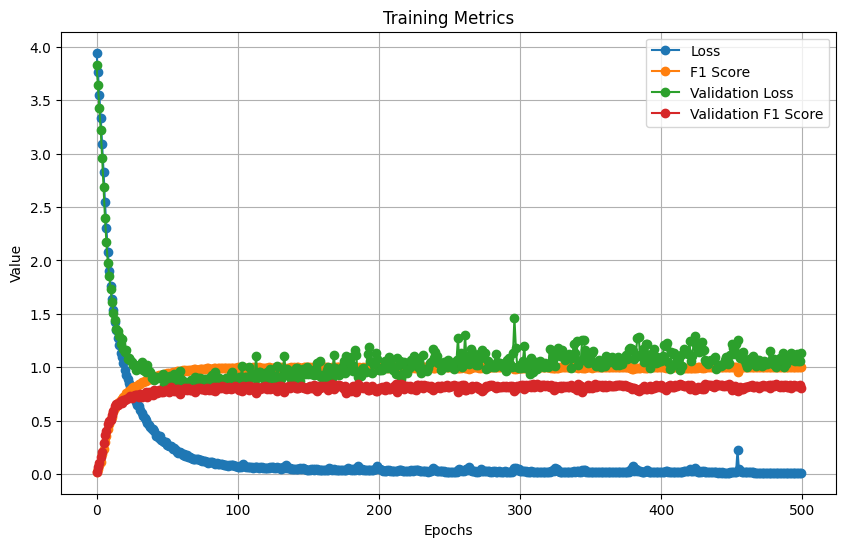

In [131]:
# Plotting
import matplotlib.pyplot as plt
epochs = range(0, 500)
plt.figure(figsize=(10, 6))
plt.plot(epochs, hist_df.loss, marker='o', label='Loss')
plt.plot(epochs, hist_df.f1_score, marker='o', label='F1 Score')
plt.plot(epochs, hist_df.val_loss, marker='o', label='Validation Loss')
plt.plot(epochs, hist_df.val_f1_score, marker='o', label='Validation F1 Score')
plt.title('Training Metrics')
plt.xlabel('Epochs')
plt.ylabel('Value')
plt.legend()
plt.grid()
plt.show()

In [132]:
reconstructed_model = tf.keras.models.load_model("2 1DCNN + 1 GRU")

In [134]:
reconstructed_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_2 (Conv1D)           (None, 122, 150)          170250    
                                                                 
 max_pooling1d_2 (MaxPooling  (None, 40, 150)          0         
 1D)                                                             
                                                                 
 conv1d_3 (Conv1D)           (None, 36, 150)           112650    
                                                                 
 max_pooling1d_3 (MaxPooling  (None, 12, 150)          0         
 1D)                                                             
                                                                 
 dropout_2 (Dropout)         (None, 12, 150)           0         
                                                                 
 gru_1 (GRU)                 (None, 175)              

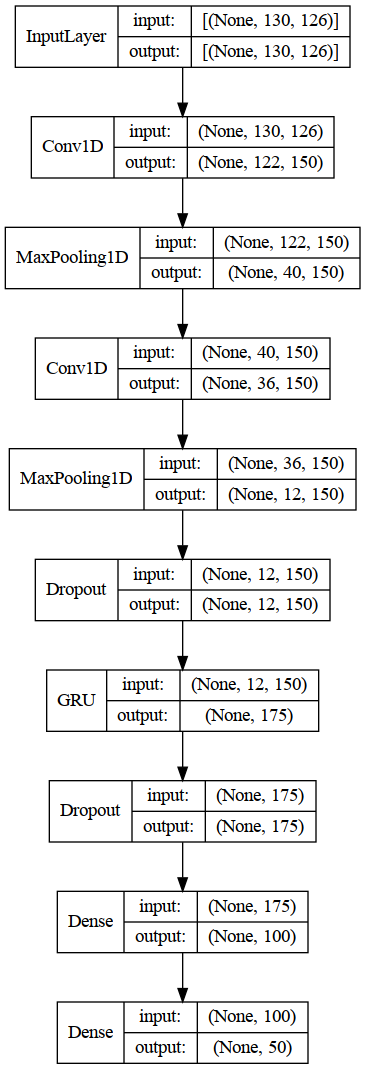

In [135]:
plot_model(reconstructed_model, show_shapes=True, show_layer_names=False)

In [136]:
reconstructed_model.evaluate(Xval,Yval)

11/11 [==============================] - 0s 9ms/step - loss: 0.9880 - f1_score: 0.8468


[0.9879773855209351, 0.8467647433280945]

In [137]:
print(classification_report(np.argmax(Yval, axis=1), np.argmax(reconstructed_model.predict(Xval), axis=1),
                            digits=3, target_names=label_map))

11/11 [==============================] - 1s 7ms/step
              precision    recall  f1-score   support

         AXE      0.778     0.875     0.824         8
    BACKPACK      0.833     0.833     0.833         6
  BASKETBALL      0.909     1.000     0.952        10
         BEE      1.000     0.700     0.824        10
        BELT      1.000     1.000     1.000         4
        BITE      0.727     1.000     0.842         8
   BREAKFAST      0.545     1.000     0.706         6
      CANCER      1.000     1.000     1.000         8
   CHRISTMAS      1.000     0.500     0.667         6
    CONFUSED      1.000     1.000     1.000         6
        DARK      0.667     1.000     0.800         4
        DEAF      0.857     1.000     0.923         6
      DECIDE      1.000     1.000     1.000         6
      DEMAND      0.750     0.750     0.750         8
     DEVELOP      0.667     1.000     0.800         6
      DINNER      1.000     0.750     0.857         8
         DOG      0.857     

In [175]:
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath='2 1DCNN + 1 GRU Lecunnormal/',
    monitor='val_f1_score',
    mode='max',
    save_best_only=True)

In [176]:
act_function = 'selu'
initializer = tf.keras.initializers.LecunNormal(seed=10)

model = Sequential()
model.add(Conv1D(filters=150,kernel_size=9,kernel_initializer=initializer,activation=act_function,input_shape=(130,126)))
model.add(MaxPooling1D(pool_size=3))
model.add(Conv1D(filters=150,kernel_size=5,kernel_initializer=initializer,activation=act_function))
model.add(MaxPooling1D(pool_size=3))
#model.add(Dropout(.15))
model.add(GRU(units=175,return_sequences=False,kernel_initializer=initializer,kernel_regularizer=regularizers.l2(.00014882201555231845)))
#model.add(Dropout(.35))
model.add(Dense(units=100,activation=act_function,kernel_initializer=initializer))
model.add(Dense(50, activation='softmax'))

model.compile(tf.optimizers.experimental.Nadam(.00022221143188447883),
            loss='categorical_crossentropy',
            metrics=[tfa.metrics.F1Score(num_classes=50, average='macro')])
model.summary()
History = model.fit(x=Xtrain, y=Ytrain,validation_data= (Xval,Yval), batch_size=96,epochs=500, verbose=1,callbacks=[model_checkpoint_callback])

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_1 (Conv1D)           (None, 122, 150)          170250    
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 40, 150)          0         
 1D)                                                             
                                                                 
 conv1d_2 (Conv1D)           (None, 36, 150)           112650    
                                                                 
 max_pooling1d_2 (MaxPooling  (None, 12, 150)          0         
 1D)                                                             
                                                                 
 gru_1 (GRU)                 (None, 175)               171675    
                                                                 
 dense_12 (Dense)            (None, 100)              

2023-09-02 11:32:31.534730: W tensorflow/core/common_runtime/bfc_allocator.cc:360] Garbage collection: deallocate free memory regions (i.e., allocations) so that we can re-allocate a larger region to avoid OOM due to memory fragmentation. If you see this message frequently, you are running near the threshold of the available device memory and re-allocation may incur great performance overhead. You may try smaller batch sizes to observe the performance impact. Set TF_ENABLE_GPU_GARBAGE_COLLECTION=false if you'd like to disable this feature.


28/28 [==============================] - ETA: 0s - loss: 3.9524 - f1_score: 0.0262

INFO:tensorflow:Assets written to: 2 1DCNN + 1 GRU Lecunnormal/assets


INFO:tensorflow:Assets written to: 2 1DCNN + 1 GRU Lecunnormal/assets


28/28 [==============================] - 20s 506ms/step - loss: 3.9524 - f1_score: 0.0262 - val_loss: 3.8113 - val_f1_score: 0.0221
Epoch 2/500
27/28 [===========================>..] - ETA: 0s - loss: 3.6908 - f1_score: 0.0638

INFO:tensorflow:Assets written to: 2 1DCNN + 1 GRU Lecunnormal/assets


INFO:tensorflow:Assets written to: 2 1DCNN + 1 GRU Lecunnormal/assets


28/28 [==============================] - 9s 320ms/step - loss: 3.6874 - f1_score: 0.0645 - val_loss: 3.5468 - val_f1_score: 0.0658
Epoch 3/500
27/28 [===========================>..] - ETA: 0s - loss: 3.3860 - f1_score: 0.1420

INFO:tensorflow:Assets written to: 2 1DCNN + 1 GRU Lecunnormal/assets


INFO:tensorflow:Assets written to: 2 1DCNN + 1 GRU Lecunnormal/assets


28/28 [==============================] - 11s 392ms/step - loss: 3.3822 - f1_score: 0.1428 - val_loss: 3.2278 - val_f1_score: 0.2006
Epoch 4/500
27/28 [===========================>..] - ETA: 0s - loss: 3.0381 - f1_score: 0.2173

INFO:tensorflow:Assets written to: 2 1DCNN + 1 GRU Lecunnormal/assets


INFO:tensorflow:Assets written to: 2 1DCNN + 1 GRU Lecunnormal/assets


28/28 [==============================] - 8s 303ms/step - loss: 3.0338 - f1_score: 0.2180 - val_loss: 2.9106 - val_f1_score: 0.2085
Epoch 5/500
27/28 [===========================>..] - ETA: 0s - loss: 2.6883 - f1_score: 0.3069

INFO:tensorflow:Assets written to: 2 1DCNN + 1 GRU Lecunnormal/assets


INFO:tensorflow:Assets written to: 2 1DCNN + 1 GRU Lecunnormal/assets


28/28 [==============================] - 8s 310ms/step - loss: 2.6862 - f1_score: 0.3088 - val_loss: 2.6226 - val_f1_score: 0.3083
Epoch 6/500
27/28 [===========================>..] - ETA: 0s - loss: 2.3730 - f1_score: 0.3924

INFO:tensorflow:Assets written to: 2 1DCNN + 1 GRU Lecunnormal/assets


INFO:tensorflow:Assets written to: 2 1DCNN + 1 GRU Lecunnormal/assets


28/28 [==============================] - 9s 318ms/step - loss: 2.3672 - f1_score: 0.3921 - val_loss: 2.3753 - val_f1_score: 0.3634
Epoch 7/500
27/28 [===========================>..] - ETA: 0s - loss: 2.1049 - f1_score: 0.4596

INFO:tensorflow:Assets written to: 2 1DCNN + 1 GRU Lecunnormal/assets


INFO:tensorflow:Assets written to: 2 1DCNN + 1 GRU Lecunnormal/assets


28/28 [==============================] - 9s 316ms/step - loss: 2.1050 - f1_score: 0.4612 - val_loss: 2.1508 - val_f1_score: 0.4644
Epoch 8/500
27/28 [===========================>..] - ETA: 0s - loss: 1.8724 - f1_score: 0.5444

INFO:tensorflow:Assets written to: 2 1DCNN + 1 GRU Lecunnormal/assets


INFO:tensorflow:Assets written to: 2 1DCNN + 1 GRU Lecunnormal/assets


28/28 [==============================] - 8s 306ms/step - loss: 1.8719 - f1_score: 0.5447 - val_loss: 1.9728 - val_f1_score: 0.4871
Epoch 9/500
27/28 [===========================>..] - ETA: 0s - loss: 1.6931 - f1_score: 0.5947

INFO:tensorflow:Assets written to: 2 1DCNN + 1 GRU Lecunnormal/assets


INFO:tensorflow:Assets written to: 2 1DCNN + 1 GRU Lecunnormal/assets


28/28 [==============================] - 8s 296ms/step - loss: 1.6840 - f1_score: 0.5950 - val_loss: 1.8070 - val_f1_score: 0.5575
Epoch 10/500
27/28 [===========================>..] - ETA: 0s - loss: 1.5222 - f1_score: 0.6512

INFO:tensorflow:Assets written to: 2 1DCNN + 1 GRU Lecunnormal/assets


INFO:tensorflow:Assets written to: 2 1DCNN + 1 GRU Lecunnormal/assets


28/28 [==============================] - 8s 286ms/step - loss: 1.5195 - f1_score: 0.6501 - val_loss: 1.7287 - val_f1_score: 0.5744
Epoch 11/500
27/28 [===========================>..] - ETA: 0s - loss: 1.3952 - f1_score: 0.6817

INFO:tensorflow:Assets written to: 2 1DCNN + 1 GRU Lecunnormal/assets


INFO:tensorflow:Assets written to: 2 1DCNN + 1 GRU Lecunnormal/assets


28/28 [==============================] - 9s 340ms/step - loss: 1.4009 - f1_score: 0.6804 - val_loss: 1.6171 - val_f1_score: 0.6317
Epoch 12/500
27/28 [===========================>..] - ETA: 0s - loss: 1.2832 - f1_score: 0.7065

INFO:tensorflow:Assets written to: 2 1DCNN + 1 GRU Lecunnormal/assets


INFO:tensorflow:Assets written to: 2 1DCNN + 1 GRU Lecunnormal/assets


28/28 [==============================] - 9s 347ms/step - loss: 1.2747 - f1_score: 0.7098 - val_loss: 1.5217 - val_f1_score: 0.6695
Epoch 13/500
28/28 [==============================] - 1s 50ms/step - loss: 1.1789 - f1_score: 0.7392 - val_loss: 1.4640 - val_f1_score: 0.6445
Epoch 14/500
27/28 [===========================>..] - ETA: 0s - loss: 1.0897 - f1_score: 0.7586

INFO:tensorflow:Assets written to: 2 1DCNN + 1 GRU Lecunnormal/assets


INFO:tensorflow:Assets written to: 2 1DCNN + 1 GRU Lecunnormal/assets


28/28 [==============================] - 9s 315ms/step - loss: 1.0858 - f1_score: 0.7600 - val_loss: 1.3941 - val_f1_score: 0.6812
Epoch 15/500
27/28 [===========================>..] - ETA: 0s - loss: 1.0128 - f1_score: 0.7762

INFO:tensorflow:Assets written to: 2 1DCNN + 1 GRU Lecunnormal/assets


INFO:tensorflow:Assets written to: 2 1DCNN + 1 GRU Lecunnormal/assets


28/28 [==============================] - 8s 290ms/step - loss: 1.0098 - f1_score: 0.7774 - val_loss: 1.3454 - val_f1_score: 0.6857
Epoch 16/500
27/28 [===========================>..] - ETA: 0s - loss: 0.9371 - f1_score: 0.8031

INFO:tensorflow:Assets written to: 2 1DCNN + 1 GRU Lecunnormal/assets


INFO:tensorflow:Assets written to: 2 1DCNN + 1 GRU Lecunnormal/assets


28/28 [==============================] - 9s 339ms/step - loss: 0.9357 - f1_score: 0.8018 - val_loss: 1.3114 - val_f1_score: 0.7354
Epoch 17/500
28/28 [==============================] - 1s 48ms/step - loss: 0.8711 - f1_score: 0.8199 - val_loss: 1.2751 - val_f1_score: 0.7316
Epoch 18/500
27/28 [===========================>..] - ETA: 0s - loss: 0.8072 - f1_score: 0.8357

INFO:tensorflow:Assets written to: 2 1DCNN + 1 GRU Lecunnormal/assets


INFO:tensorflow:Assets written to: 2 1DCNN + 1 GRU Lecunnormal/assets


28/28 [==============================] - 8s 303ms/step - loss: 0.8094 - f1_score: 0.8338 - val_loss: 1.2299 - val_f1_score: 0.7445
Epoch 19/500
27/28 [===========================>..] - ETA: 0s - loss: 0.7520 - f1_score: 0.8558

INFO:tensorflow:Assets written to: 2 1DCNN + 1 GRU Lecunnormal/assets


INFO:tensorflow:Assets written to: 2 1DCNN + 1 GRU Lecunnormal/assets


28/28 [==============================] - 8s 303ms/step - loss: 0.7526 - f1_score: 0.8538 - val_loss: 1.2010 - val_f1_score: 0.7466
Epoch 20/500
28/28 [==============================] - 1s 48ms/step - loss: 0.6971 - f1_score: 0.8660 - val_loss: 1.1928 - val_f1_score: 0.7263
Epoch 21/500
27/28 [===========================>..] - ETA: 0s - loss: 0.6543 - f1_score: 0.8849

INFO:tensorflow:Assets written to: 2 1DCNN + 1 GRU Lecunnormal/assets


INFO:tensorflow:Assets written to: 2 1DCNN + 1 GRU Lecunnormal/assets


28/28 [==============================] - 9s 323ms/step - loss: 0.6518 - f1_score: 0.8844 - val_loss: 1.1444 - val_f1_score: 0.7529
Epoch 22/500
27/28 [===========================>..] - ETA: 0s - loss: 0.6068 - f1_score: 0.8924

INFO:tensorflow:Assets written to: 2 1DCNN + 1 GRU Lecunnormal/assets


INFO:tensorflow:Assets written to: 2 1DCNN + 1 GRU Lecunnormal/assets


28/28 [==============================] - 9s 345ms/step - loss: 0.6074 - f1_score: 0.8905 - val_loss: 1.1500 - val_f1_score: 0.7667
Epoch 23/500
27/28 [===========================>..] - ETA: 0s - loss: 0.5743 - f1_score: 0.8957

INFO:tensorflow:Assets written to: 2 1DCNN + 1 GRU Lecunnormal/assets


INFO:tensorflow:Assets written to: 2 1DCNN + 1 GRU Lecunnormal/assets


28/28 [==============================] - 8s 307ms/step - loss: 0.5724 - f1_score: 0.8972 - val_loss: 1.0960 - val_f1_score: 0.7748
Epoch 24/500
28/28 [==============================] - 1s 48ms/step - loss: 0.5326 - f1_score: 0.9077 - val_loss: 1.0929 - val_f1_score: 0.7613
Epoch 25/500
27/28 [===========================>..] - ETA: 0s - loss: 0.4935 - f1_score: 0.9213

INFO:tensorflow:Assets written to: 2 1DCNN + 1 GRU Lecunnormal/assets


INFO:tensorflow:Assets written to: 2 1DCNN + 1 GRU Lecunnormal/assets


28/28 [==============================] - 8s 308ms/step - loss: 0.4942 - f1_score: 0.9211 - val_loss: 1.0713 - val_f1_score: 0.7794
Epoch 26/500
28/28 [==============================] - 1s 48ms/step - loss: 0.4628 - f1_score: 0.9284 - val_loss: 1.0675 - val_f1_score: 0.7721
Epoch 27/500
28/28 [==============================] - 1s 48ms/step - loss: 0.4321 - f1_score: 0.9344 - val_loss: 1.0516 - val_f1_score: 0.7652
Epoch 28/500
28/28 [==============================] - 1s 47ms/step - loss: 0.4042 - f1_score: 0.9410 - val_loss: 1.0568 - val_f1_score: 0.7550
Epoch 29/500
28/28 [==============================] - 1s 48ms/step - loss: 0.3773 - f1_score: 0.9507 - val_loss: 1.0314 - val_f1_score: 0.7773
Epoch 30/500
28/28 [==============================] - 1s 48ms/step - loss: 0.3560 - f1_score: 0.9556 - val_loss: 1.0419 - val_f1_score: 0.7719
Epoch 31/500
28/28 [==============================] - 1s 48ms/step - loss: 0.3349 - f1_score: 0.9611 - val_loss: 1.0251 - val_f1_score: 0.7700
Epoch 32/50

INFO:tensorflow:Assets written to: 2 1DCNN + 1 GRU Lecunnormal/assets


INFO:tensorflow:Assets written to: 2 1DCNN + 1 GRU Lecunnormal/assets


28/28 [==============================] - 10s 369ms/step - loss: 0.1937 - f1_score: 0.9914 - val_loss: 0.9680 - val_f1_score: 0.7928
Epoch 41/500
28/28 [==============================] - 1s 49ms/step - loss: 0.1836 - f1_score: 0.9921 - val_loss: 0.9709 - val_f1_score: 0.7784
Epoch 42/500
28/28 [==============================] - 1s 48ms/step - loss: 0.1739 - f1_score: 0.9933 - val_loss: 0.9852 - val_f1_score: 0.7765
Epoch 43/500
28/28 [==============================] - 1s 48ms/step - loss: 0.1647 - f1_score: 0.9959 - val_loss: 1.0054 - val_f1_score: 0.7772
Epoch 44/500
28/28 [==============================] - 1s 48ms/step - loss: 0.1596 - f1_score: 0.9966 - val_loss: 0.9617 - val_f1_score: 0.7831
Epoch 45/500
27/28 [===========================>..] - ETA: 0s - loss: 0.1514 - f1_score: 0.9969

INFO:tensorflow:Assets written to: 2 1DCNN + 1 GRU Lecunnormal/assets


INFO:tensorflow:Assets written to: 2 1DCNN + 1 GRU Lecunnormal/assets


28/28 [==============================] - 10s 373ms/step - loss: 0.1520 - f1_score: 0.9970 - val_loss: 0.9739 - val_f1_score: 0.7971
Epoch 46/500
28/28 [==============================] - 1s 48ms/step - loss: 0.1450 - f1_score: 0.9963 - val_loss: 0.9809 - val_f1_score: 0.7951
Epoch 47/500
28/28 [==============================] - 1s 48ms/step - loss: 0.1395 - f1_score: 0.9982 - val_loss: 0.9587 - val_f1_score: 0.7817
Epoch 48/500
28/28 [==============================] - 1s 48ms/step - loss: 0.1326 - f1_score: 0.9985 - val_loss: 0.9797 - val_f1_score: 0.7826
Epoch 49/500
28/28 [==============================] - 1s 49ms/step - loss: 0.1281 - f1_score: 0.9989 - val_loss: 0.9644 - val_f1_score: 0.7856
Epoch 50/500
28/28 [==============================] - 1s 50ms/step - loss: 0.1237 - f1_score: 0.9993 - val_loss: 0.9721 - val_f1_score: 0.7943
Epoch 51/500
28/28 [==============================] - 1s 49ms/step - loss: 0.1190 - f1_score: 0.9992 - val_loss: 0.9593 - val_f1_score: 0.7869
Epoch 52/5

INFO:tensorflow:Assets written to: 2 1DCNN + 1 GRU Lecunnormal/assets


INFO:tensorflow:Assets written to: 2 1DCNN + 1 GRU Lecunnormal/assets


28/28 [==============================] - 10s 377ms/step - loss: 0.0919 - f1_score: 1.0000 - val_loss: 0.9754 - val_f1_score: 0.7984
Epoch 62/500
27/28 [===========================>..] - ETA: 0s - loss: 0.0897 - f1_score: 1.0000

INFO:tensorflow:Assets written to: 2 1DCNN + 1 GRU Lecunnormal/assets


INFO:tensorflow:Assets written to: 2 1DCNN + 1 GRU Lecunnormal/assets


28/28 [==============================] - 8s 284ms/step - loss: 0.0897 - f1_score: 1.0000 - val_loss: 0.9628 - val_f1_score: 0.7995
Epoch 63/500
28/28 [==============================] - 1s 50ms/step - loss: 0.0879 - f1_score: 1.0000 - val_loss: 0.9827 - val_f1_score: 0.7942
Epoch 64/500
28/28 [==============================] - 1s 49ms/step - loss: 0.0864 - f1_score: 1.0000 - val_loss: 0.9765 - val_f1_score: 0.7854
Epoch 65/500
28/28 [==============================] - 1s 48ms/step - loss: 0.0846 - f1_score: 1.0000 - val_loss: 0.9748 - val_f1_score: 0.7854
Epoch 66/500
28/28 [==============================] - 1s 48ms/step - loss: 0.0833 - f1_score: 1.0000 - val_loss: 0.9662 - val_f1_score: 0.7929
Epoch 67/500
28/28 [==============================] - 1s 48ms/step - loss: 0.0817 - f1_score: 1.0000 - val_loss: 0.9748 - val_f1_score: 0.7863
Epoch 68/500
28/28 [==============================] - 1s 48ms/step - loss: 0.0805 - f1_score: 1.0000 - val_loss: 0.9906 - val_f1_score: 0.7936
Epoch 69/50

INFO:tensorflow:Assets written to: 2 1DCNN + 1 GRU Lecunnormal/assets


INFO:tensorflow:Assets written to: 2 1DCNN + 1 GRU Lecunnormal/assets


28/28 [==============================] - 9s 319ms/step - loss: 0.0796 - f1_score: 1.0000 - val_loss: 0.9674 - val_f1_score: 0.8015
Epoch 70/500
28/28 [==============================] - 1s 48ms/step - loss: 0.0782 - f1_score: 1.0000 - val_loss: 0.9698 - val_f1_score: 0.7909
Epoch 71/500
28/28 [==============================] - 1s 48ms/step - loss: 0.0769 - f1_score: 1.0000 - val_loss: 0.9759 - val_f1_score: 0.7972
Epoch 72/500
28/28 [==============================] - 1s 48ms/step - loss: 0.0758 - f1_score: 1.0000 - val_loss: 0.9775 - val_f1_score: 0.7948
Epoch 73/500
28/28 [==============================] - 1s 48ms/step - loss: 0.0748 - f1_score: 1.0000 - val_loss: 0.9794 - val_f1_score: 0.7964
Epoch 74/500
28/28 [==============================] - 1s 48ms/step - loss: 0.0738 - f1_score: 1.0000 - val_loss: 0.9775 - val_f1_score: 0.7948
Epoch 75/500
28/28 [==============================] - 1s 48ms/step - loss: 0.0726 - f1_score: 1.0000 - val_loss: 0.9797 - val_f1_score: 0.7966
Epoch 76/50

INFO:tensorflow:Assets written to: 2 1DCNN + 1 GRU Lecunnormal/assets


INFO:tensorflow:Assets written to: 2 1DCNN + 1 GRU Lecunnormal/assets


28/28 [==============================] - 11s 404ms/step - loss: 0.0593 - f1_score: 1.0000 - val_loss: 1.0058 - val_f1_score: 0.8017
Epoch 94/500
28/28 [==============================] - 1s 49ms/step - loss: 0.0587 - f1_score: 1.0000 - val_loss: 0.9926 - val_f1_score: 0.7936
Epoch 95/500
28/28 [==============================] - 1s 49ms/step - loss: 0.0581 - f1_score: 1.0000 - val_loss: 0.9944 - val_f1_score: 0.8014
Epoch 96/500
28/28 [==============================] - 1s 49ms/step - loss: 0.0576 - f1_score: 1.0000 - val_loss: 1.0049 - val_f1_score: 0.7994
Epoch 97/500
28/28 [==============================] - 1s 48ms/step - loss: 0.0570 - f1_score: 1.0000 - val_loss: 0.9967 - val_f1_score: 0.7966
Epoch 98/500
27/28 [===========================>..] - ETA: 0s - loss: 0.0565 - f1_score: 1.0000

INFO:tensorflow:Assets written to: 2 1DCNN + 1 GRU Lecunnormal/assets


INFO:tensorflow:Assets written to: 2 1DCNN + 1 GRU Lecunnormal/assets


28/28 [==============================] - 9s 335ms/step - loss: 0.0564 - f1_score: 1.0000 - val_loss: 1.0073 - val_f1_score: 0.8086
Epoch 99/500
28/28 [==============================] - 1s 48ms/step - loss: 0.0559 - f1_score: 1.0000 - val_loss: 0.9954 - val_f1_score: 0.8016
Epoch 100/500
28/28 [==============================] - 1s 49ms/step - loss: 0.0554 - f1_score: 1.0000 - val_loss: 1.0022 - val_f1_score: 0.8015
Epoch 101/500
28/28 [==============================] - 1s 49ms/step - loss: 0.0549 - f1_score: 1.0000 - val_loss: 1.0029 - val_f1_score: 0.8012
Epoch 102/500
28/28 [==============================] - 1s 49ms/step - loss: 0.0543 - f1_score: 1.0000 - val_loss: 1.0014 - val_f1_score: 0.7972
Epoch 103/500
28/28 [==============================] - 1s 49ms/step - loss: 0.0538 - f1_score: 1.0000 - val_loss: 1.0012 - val_f1_score: 0.7990
Epoch 104/500
28/28 [==============================] - 1s 49ms/step - loss: 0.0533 - f1_score: 1.0000 - val_loss: 1.0034 - val_f1_score: 0.7967
Epoch 

INFO:tensorflow:Assets written to: 2 1DCNN + 1 GRU Lecunnormal/assets


INFO:tensorflow:Assets written to: 2 1DCNN + 1 GRU Lecunnormal/assets


28/28 [==============================] - 10s 370ms/step - loss: 0.0486 - f1_score: 1.0000 - val_loss: 1.0089 - val_f1_score: 0.8110
Epoch 115/500
28/28 [==============================] - 1s 48ms/step - loss: 0.0482 - f1_score: 1.0000 - val_loss: 1.0123 - val_f1_score: 0.8054
Epoch 116/500
28/28 [==============================] - 1s 49ms/step - loss: 0.0477 - f1_score: 1.0000 - val_loss: 1.0107 - val_f1_score: 0.8020
Epoch 117/500
28/28 [==============================] - 1s 50ms/step - loss: 0.0473 - f1_score: 1.0000 - val_loss: 1.0170 - val_f1_score: 0.8082
Epoch 118/500
28/28 [==============================] - 1s 49ms/step - loss: 0.0469 - f1_score: 1.0000 - val_loss: 1.0096 - val_f1_score: 0.8048
Epoch 119/500
28/28 [==============================] - 1s 49ms/step - loss: 0.0464 - f1_score: 1.0000 - val_loss: 1.0127 - val_f1_score: 0.7998
Epoch 120/500
27/28 [===========================>..] - ETA: 0s - loss: 0.0460 - f1_score: 1.0000

INFO:tensorflow:Assets written to: 2 1DCNN + 1 GRU Lecunnormal/assets


INFO:tensorflow:Assets written to: 2 1DCNN + 1 GRU Lecunnormal/assets


28/28 [==============================] - 9s 347ms/step - loss: 0.0460 - f1_score: 1.0000 - val_loss: 1.0218 - val_f1_score: 0.8121
Epoch 121/500
28/28 [==============================] - 1s 49ms/step - loss: 0.0456 - f1_score: 1.0000 - val_loss: 1.0147 - val_f1_score: 0.8027
Epoch 122/500
28/28 [==============================] - 1s 50ms/step - loss: 0.0452 - f1_score: 1.0000 - val_loss: 1.0124 - val_f1_score: 0.8085
Epoch 123/500
28/28 [==============================] - 1s 49ms/step - loss: 0.0448 - f1_score: 1.0000 - val_loss: 1.0184 - val_f1_score: 0.8029
Epoch 124/500
28/28 [==============================] - 1s 49ms/step - loss: 0.0444 - f1_score: 1.0000 - val_loss: 1.0170 - val_f1_score: 0.8026
Epoch 125/500
28/28 [==============================] - 1s 49ms/step - loss: 0.0439 - f1_score: 1.0000 - val_loss: 1.0130 - val_f1_score: 0.8119
Epoch 126/500
28/28 [==============================] - 1s 50ms/step - loss: 0.0436 - f1_score: 1.0000 - val_loss: 1.0187 - val_f1_score: 0.8094
Epoch

INFO:tensorflow:Assets written to: 2 1DCNN + 1 GRU Lecunnormal/assets


INFO:tensorflow:Assets written to: 2 1DCNN + 1 GRU Lecunnormal/assets


28/28 [==============================] - 11s 410ms/step - loss: 0.0401 - f1_score: 1.0000 - val_loss: 1.0327 - val_f1_score: 0.8174
Epoch 136/500
28/28 [==============================] - 1s 49ms/step - loss: 0.0397 - f1_score: 1.0000 - val_loss: 1.0235 - val_f1_score: 0.8163
Epoch 137/500
28/28 [==============================] - 1s 49ms/step - loss: 0.0394 - f1_score: 1.0000 - val_loss: 1.0131 - val_f1_score: 0.8130
Epoch 138/500
28/28 [==============================] - 1s 49ms/step - loss: 0.0390 - f1_score: 1.0000 - val_loss: 1.0330 - val_f1_score: 0.8082
Epoch 139/500
28/28 [==============================] - 1s 49ms/step - loss: 0.0386 - f1_score: 1.0000 - val_loss: 1.0256 - val_f1_score: 0.8088
Epoch 140/500
28/28 [==============================] - 1s 49ms/step - loss: 0.0383 - f1_score: 1.0000 - val_loss: 1.0272 - val_f1_score: 0.8161
Epoch 141/500
28/28 [==============================] - 1s 49ms/step - loss: 0.0379 - f1_score: 1.0000 - val_loss: 1.0234 - val_f1_score: 0.8083
Epoc

INFO:tensorflow:Assets written to: 2 1DCNN + 1 GRU Lecunnormal/assets


INFO:tensorflow:Assets written to: 2 1DCNN + 1 GRU Lecunnormal/assets


28/28 [==============================] - 10s 378ms/step - loss: 0.0359 - f1_score: 1.0000 - val_loss: 1.0256 - val_f1_score: 0.8215
Epoch 148/500
28/28 [==============================] - 1s 48ms/step - loss: 0.0355 - f1_score: 1.0000 - val_loss: 1.0267 - val_f1_score: 0.8026
Epoch 149/500
28/28 [==============================] - 1s 50ms/step - loss: 0.0352 - f1_score: 1.0000 - val_loss: 1.0342 - val_f1_score: 0.8038
Epoch 150/500
28/28 [==============================] - 1s 49ms/step - loss: 0.0349 - f1_score: 1.0000 - val_loss: 1.0393 - val_f1_score: 0.8097
Epoch 151/500
28/28 [==============================] - 1s 49ms/step - loss: 0.0345 - f1_score: 1.0000 - val_loss: 1.0390 - val_f1_score: 0.8056
Epoch 152/500
28/28 [==============================] - 1s 49ms/step - loss: 0.0342 - f1_score: 1.0000 - val_loss: 1.0383 - val_f1_score: 0.8104
Epoch 153/500
28/28 [==============================] - 1s 49ms/step - loss: 0.0339 - f1_score: 1.0000 - val_loss: 1.0341 - val_f1_score: 0.8139
Epoc

INFO:tensorflow:Assets written to: 2 1DCNN + 1 GRU Lecunnormal/assets


INFO:tensorflow:Assets written to: 2 1DCNN + 1 GRU Lecunnormal/assets


28/28 [==============================] - 10s 363ms/step - loss: 0.0242 - f1_score: 1.0000 - val_loss: 1.0555 - val_f1_score: 0.8221
Epoch 187/500
28/28 [==============================] - 1s 51ms/step - loss: 0.0239 - f1_score: 1.0000 - val_loss: 1.0519 - val_f1_score: 0.8092
Epoch 188/500
28/28 [==============================] - 1s 49ms/step - loss: 0.0237 - f1_score: 1.0000 - val_loss: 1.0619 - val_f1_score: 0.8073
Epoch 189/500
28/28 [==============================] - 1s 48ms/step - loss: 0.0234 - f1_score: 1.0000 - val_loss: 1.0527 - val_f1_score: 0.8132
Epoch 190/500
28/28 [==============================] - 1s 49ms/step - loss: 0.0231 - f1_score: 1.0000 - val_loss: 1.0588 - val_f1_score: 0.8092
Epoch 191/500
28/28 [==============================] - 1s 50ms/step - loss: 0.0229 - f1_score: 1.0000 - val_loss: 1.0505 - val_f1_score: 0.8198
Epoch 192/500
28/28 [==============================] - 1s 49ms/step - loss: 0.0226 - f1_score: 1.0000 - val_loss: 1.0615 - val_f1_score: 0.8082
Epoc

INFO:tensorflow:Assets written to: 2 1DCNN + 1 GRU Lecunnormal/assets


INFO:tensorflow:Assets written to: 2 1DCNN + 1 GRU Lecunnormal/assets


28/28 [==============================] - 11s 393ms/step - loss: 0.0166 - f1_score: 1.0000 - val_loss: 1.0918 - val_f1_score: 0.8245
Epoch 219/500
28/28 [==============================] - 1s 48ms/step - loss: 0.0164 - f1_score: 1.0000 - val_loss: 1.0829 - val_f1_score: 0.8123
Epoch 220/500
28/28 [==============================] - 1s 48ms/step - loss: 0.0162 - f1_score: 1.0000 - val_loss: 1.0833 - val_f1_score: 0.8087
Epoch 221/500
28/28 [==============================] - 1s 49ms/step - loss: 0.0160 - f1_score: 1.0000 - val_loss: 1.0953 - val_f1_score: 0.8207
Epoch 222/500
28/28 [==============================] - 1s 49ms/step - loss: 0.0158 - f1_score: 1.0000 - val_loss: 1.1034 - val_f1_score: 0.8168
Epoch 223/500
28/28 [==============================] - 1s 49ms/step - loss: 0.0156 - f1_score: 1.0000 - val_loss: 1.0967 - val_f1_score: 0.8137
Epoch 224/500
28/28 [==============================] - 1s 49ms/step - loss: 0.0154 - f1_score: 1.0000 - val_loss: 1.0947 - val_f1_score: 0.8088
Epoc

Epoch 275/500
28/28 [==============================] - 1s 50ms/step - loss: 0.0155 - f1_score: 1.0000 - val_loss: 1.0522 - val_f1_score: 0.8063
Epoch 276/500
28/28 [==============================] - 1s 51ms/step - loss: 0.0154 - f1_score: 1.0000 - val_loss: 1.0547 - val_f1_score: 0.8008
Epoch 277/500
28/28 [==============================] - 1s 50ms/step - loss: 0.0153 - f1_score: 1.0000 - val_loss: 1.0542 - val_f1_score: 0.8029
Epoch 278/500
28/28 [==============================] - 1s 51ms/step - loss: 0.0152 - f1_score: 1.0000 - val_loss: 1.0555 - val_f1_score: 0.8081
Epoch 279/500
28/28 [==============================] - 1s 51ms/step - loss: 0.0152 - f1_score: 1.0000 - val_loss: 1.0524 - val_f1_score: 0.7967
Epoch 280/500
28/28 [==============================] - 1s 52ms/step - loss: 0.0151 - f1_score: 1.0000 - val_loss: 1.0566 - val_f1_score: 0.8029
Epoch 281/500
28/28 [==============================] - 1s 53ms/step - loss: 0.0150 - f1_score: 1.0000 - val_loss: 1.0535 - val_f1_score:

Epoch 332/500
28/28 [==============================] - 1s 53ms/step - loss: 0.0128 - f1_score: 1.0000 - val_loss: 1.0938 - val_f1_score: 0.8067
Epoch 333/500
28/28 [==============================] - 2s 55ms/step - loss: 0.0128 - f1_score: 1.0000 - val_loss: 1.0977 - val_f1_score: 0.8091
Epoch 334/500
28/28 [==============================] - 1s 53ms/step - loss: 0.0128 - f1_score: 1.0000 - val_loss: 1.0980 - val_f1_score: 0.8091
Epoch 335/500
28/28 [==============================] - 2s 55ms/step - loss: 0.0127 - f1_score: 1.0000 - val_loss: 1.0984 - val_f1_score: 0.8091
Epoch 336/500
28/28 [==============================] - 2s 54ms/step - loss: 0.0127 - f1_score: 1.0000 - val_loss: 1.0978 - val_f1_score: 0.8075
Epoch 337/500
28/28 [==============================] - 1s 53ms/step - loss: 0.0127 - f1_score: 1.0000 - val_loss: 1.0923 - val_f1_score: 0.8010
Epoch 338/500
28/28 [==============================] - 2s 54ms/step - loss: 0.0126 - f1_score: 1.0000 - val_loss: 1.0998 - val_f1_score:

Epoch 389/500
28/28 [==============================] - 2s 54ms/step - loss: 0.0107 - f1_score: 1.0000 - val_loss: 1.1239 - val_f1_score: 0.8113
Epoch 390/500
28/28 [==============================] - 2s 54ms/step - loss: 0.0106 - f1_score: 1.0000 - val_loss: 1.1220 - val_f1_score: 0.8054
Epoch 391/500
28/28 [==============================] - 2s 55ms/step - loss: 0.0106 - f1_score: 1.0000 - val_loss: 1.1170 - val_f1_score: 0.8058
Epoch 392/500
28/28 [==============================] - 1s 53ms/step - loss: 0.0105 - f1_score: 1.0000 - val_loss: 1.1319 - val_f1_score: 0.8178
Epoch 393/500
28/28 [==============================] - 2s 54ms/step - loss: 0.0105 - f1_score: 1.0000 - val_loss: 1.1282 - val_f1_score: 0.8058
Epoch 394/500
28/28 [==============================] - 2s 54ms/step - loss: 0.0104 - f1_score: 1.0000 - val_loss: 1.1260 - val_f1_score: 0.8088
Epoch 395/500
28/28 [==============================] - 1s 54ms/step - loss: 0.0104 - f1_score: 1.0000 - val_loss: 1.1287 - val_f1_score:

Epoch 446/500
28/28 [==============================] - 2s 54ms/step - loss: 0.0079 - f1_score: 1.0000 - val_loss: 1.1618 - val_f1_score: 0.8053
Epoch 447/500
28/28 [==============================] - 1s 53ms/step - loss: 0.0078 - f1_score: 1.0000 - val_loss: 1.1597 - val_f1_score: 0.8031
Epoch 448/500
28/28 [==============================] - 2s 55ms/step - loss: 0.0078 - f1_score: 1.0000 - val_loss: 1.1515 - val_f1_score: 0.8138
Epoch 449/500
28/28 [==============================] - 1s 52ms/step - loss: 0.0077 - f1_score: 1.0000 - val_loss: 1.1536 - val_f1_score: 0.8081
Epoch 450/500
28/28 [==============================] - 2s 54ms/step - loss: 0.0076 - f1_score: 1.0000 - val_loss: 1.1589 - val_f1_score: 0.8138
Epoch 451/500
28/28 [==============================] - 1s 53ms/step - loss: 0.0076 - f1_score: 1.0000 - val_loss: 1.1587 - val_f1_score: 0.8072
Epoch 452/500
28/28 [==============================] - 1s 52ms/step - loss: 0.0075 - f1_score: 1.0000 - val_loss: 1.1633 - val_f1_score:

In [177]:
print(classification_report(np.argmax(Yval, axis=1), np.argmax(model.predict(Xval), axis=1),
                            digits=3, target_names=label_map))

11/11 [==============================] - 1s 13ms/step
              precision    recall  f1-score   support

         AXE      1.000     0.750     0.857         8
    BACKPACK      0.800     0.667     0.727         6
  BASKETBALL      1.000     0.800     0.889        10
         BEE      0.875     0.700     0.778        10
        BELT      1.000     1.000     1.000         4
        BITE      0.800     1.000     0.889         8
   BREAKFAST      0.600     1.000     0.750         6
      CANCER      1.000     1.000     1.000         8
   CHRISTMAS      0.833     0.833     0.833         6
    CONFUSED      0.857     1.000     0.923         6
        DARK      0.800     1.000     0.889         4
        DEAF      0.750     1.000     0.857         6
      DECIDE      1.000     1.000     1.000         6
      DEMAND      0.857     0.750     0.800         8
     DEVELOP      0.556     0.833     0.667         6
      DINNER      0.857     0.750     0.800         8
         DOG      1.000    

In [178]:
# convert the history.history dict to a pandas DataFrame:     
hist_df = pd.DataFrame(History.history) 

# or save to csv: 
hist_csv_file = '2 1DCNN + 1 GRU Lecunnormal/history.csv'
with open(hist_csv_file, mode='w') as f:
    hist_df.to_csv(f)

In [179]:
hist_df.tail()

loss  f1_score  val_loss  val_f1_score
495  0.005095       1.0  1.203017      0.808050
496  0.005040       1.0  1.217048      0.807769
497  0.004984       1.0  1.223447      0.802521
498  0.004930       1.0  1.219798      0.804780
499  0.004875       1.0  1.206948      0.800682

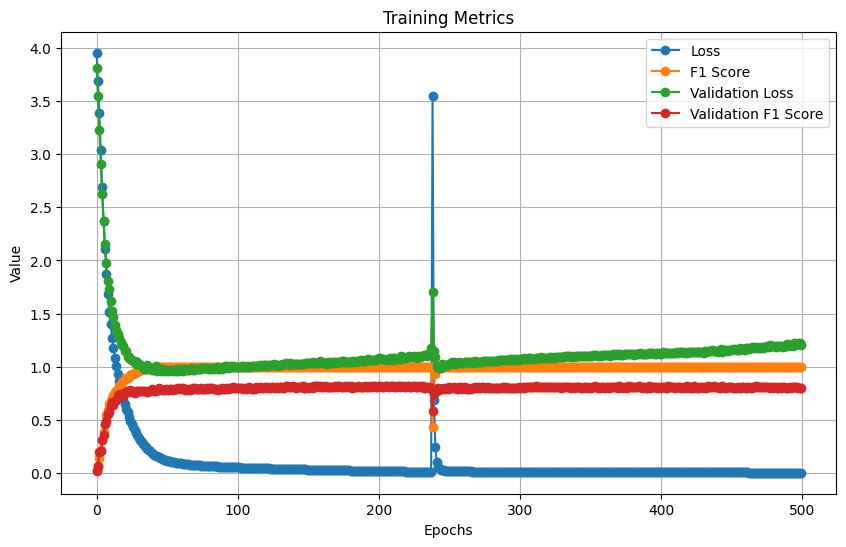

In [180]:
# Plotting
import matplotlib.pyplot as plt
epochs = range(0, 500)
plt.figure(figsize=(10, 6))
plt.plot(epochs, hist_df.loss, marker='o', label='Loss')
plt.plot(epochs, hist_df.f1_score, marker='o', label='F1 Score')
plt.plot(epochs, hist_df.val_loss, marker='o', label='Validation Loss')
plt.plot(epochs, hist_df.val_f1_score, marker='o', label='Validation F1 Score')
plt.title('Training Metrics')
plt.xlabel('Epochs')
plt.ylabel('Value')
plt.legend()
plt.grid()
plt.show()

In [138]:
reconstructed_model = tf.keras.models.load_model("2 1DCNN + 1 GRU Lecunnormal")

In [140]:
reconstructed_model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_1 (Conv1D)           (None, 122, 150)          170250    
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 40, 150)          0         
 1D)                                                             
                                                                 
 conv1d_2 (Conv1D)           (None, 36, 150)           112650    
                                                                 
 max_pooling1d_2 (MaxPooling  (None, 12, 150)          0         
 1D)                                                             
                                                                 
 gru_1 (GRU)                 (None, 175)               171675    
                                                                 
 dense_12 (Dense)            (None, 100)              

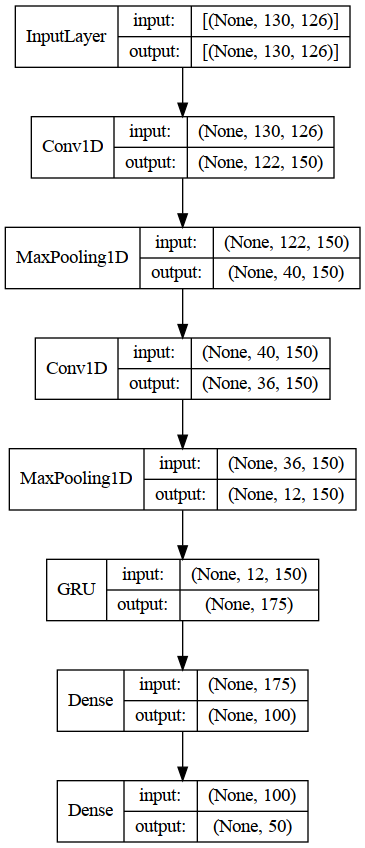

In [141]:
plot_model(reconstructed_model, show_shapes=True, show_layer_names=False)

In [139]:
reconstructed_model.evaluate(Xval,Yval)

11/11 [==============================] - 1s 9ms/step - loss: 1.0918 - f1_score: 0.8245


[1.0918312072753906, 0.8245251178741455]

In [183]:
reconstructed_model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_1 (Conv1D)           (None, 122, 150)          170250    
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 40, 150)          0         
 1D)                                                             
                                                                 
 conv1d_2 (Conv1D)           (None, 36, 150)           112650    
                                                                 
 max_pooling1d_2 (MaxPooling  (None, 12, 150)          0         
 1D)                                                             
                                                                 
 gru_1 (GRU)                 (None, 175)               171675    
                                                                 
 dense_12 (Dense)            (None, 100)              

In [184]:
print(classification_report(np.argmax(Yval, axis=1), np.argmax(reconstructed_model.predict(Xval), axis=1),
                            digits=3, target_names=label_map))

11/11 [==============================] - 1s 6ms/step
              precision    recall  f1-score   support

         AXE      0.875     0.875     0.875         8
    BACKPACK      0.833     0.833     0.833         6
  BASKETBALL      1.000     0.900     0.947        10
         BEE      1.000     0.700     0.824        10
        BELT      1.000     1.000     1.000         4
        BITE      0.889     1.000     0.941         8
   BREAKFAST      0.667     1.000     0.800         6
      CANCER      1.000     1.000     1.000         8
   CHRISTMAS      0.800     0.667     0.727         6
    CONFUSED      1.000     1.000     1.000         6
        DARK      1.000     1.000     1.000         4
        DEAF      0.750     1.000     0.857         6
      DECIDE      1.000     1.000     1.000         6
      DEMAND      0.833     0.625     0.714         8
     DEVELOP      0.625     0.833     0.714         6
      DINNER      0.750     0.750     0.750         8
         DOG      1.000     

In [185]:
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath='2 1DCNN + 1 GRU Mish/',
    monitor='val_f1_score',
    mode='max',
    save_best_only=True)

In [217]:
act_function = mish
model = Sequential()
model.add(Conv1D(filters=150,kernel_size=9,activation=act_function,input_shape=(130,126)))
model.add(MaxPooling1D(pool_size=3))
model.add(Conv1D(filters=150,kernel_size=5,activation=act_function))
model.add(MaxPooling1D(pool_size=3))
model.add(Dropout(.15))
model.add(GRU(units=175,return_sequences=False,kernel_regularizer=regularizers.l2(.00014882201555231845)))
model.add(Dropout(.35))
model.add(Dense(units=100,activation=act_function))
model.add(Dense(50, activation='softmax'))

model.compile(tf.optimizers.experimental.Nadam(.00022221143188447883),
            loss='categorical_crossentropy',
            metrics=[tfa.metrics.F1Score(num_classes=50, average='macro')])
model.summary()
History = model.fit(x=Xtrain, y=Ytrain,validation_data= (Xval,Yval), batch_size=96,epochs=500, verbose=1,callbacks=[model_checkpoint_callback])

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_7 (Conv1D)           (None, 122, 150)          170250    
                                                                 
 max_pooling1d_7 (MaxPooling  (None, 40, 150)          0         
 1D)                                                             
                                                                 
 conv1d_8 (Conv1D)           (None, 36, 150)           112650    
                                                                 
 max_pooling1d_8 (MaxPooling  (None, 12, 150)          0         
 1D)                                                             
                                                                 
 dropout_12 (Dropout)        (None, 12, 150)           0         
                                                                 
 gru_4 (GRU)                 (None, 175)              

28/28 [==============================] - 2s 55ms/step - loss: 0.1090 - f1_score: 0.9830 - val_loss: 1.1026 - val_f1_score: 0.7589
Epoch 104/500
28/28 [==============================] - 2s 55ms/step - loss: 0.1055 - f1_score: 0.9840 - val_loss: 1.0829 - val_f1_score: 0.7676
Epoch 105/500
28/28 [==============================] - 2s 55ms/step - loss: 0.1020 - f1_score: 0.9863 - val_loss: 1.1162 - val_f1_score: 0.7529
Epoch 106/500
28/28 [==============================] - 2s 56ms/step - loss: 0.0997 - f1_score: 0.9865 - val_loss: 1.0822 - val_f1_score: 0.7662
Epoch 107/500
28/28 [==============================] - 2s 55ms/step - loss: 0.0999 - f1_score: 0.9849 - val_loss: 1.0156 - val_f1_score: 0.7843
Epoch 108/500
28/28 [==============================] - 2s 55ms/step - loss: 0.0923 - f1_score: 0.9902 - val_loss: 1.0896 - val_f1_score: 0.7536
Epoch 109/500
28/28 [==============================] - 2s 55ms/step - loss: 0.0915 - f1_score: 0.9896 - val_loss: 1.0810 - val_f1_score: 0.7586
Epoch 

Epoch 160/500
28/28 [==============================] - 2s 55ms/step - loss: 0.0465 - f1_score: 0.9982 - val_loss: 1.1779 - val_f1_score: 0.7786
Epoch 161/500
28/28 [==============================] - 2s 55ms/step - loss: 0.0480 - f1_score: 0.9978 - val_loss: 1.2275 - val_f1_score: 0.7734
Epoch 162/500
28/28 [==============================] - 2s 56ms/step - loss: 0.0458 - f1_score: 0.9984 - val_loss: 1.2747 - val_f1_score: 0.7724
Epoch 163/500
28/28 [==============================] - 2s 56ms/step - loss: 0.0537 - f1_score: 0.9959 - val_loss: 1.1906 - val_f1_score: 0.7792
Epoch 164/500
28/28 [==============================] - 2s 57ms/step - loss: 0.0531 - f1_score: 0.9944 - val_loss: 1.2042 - val_f1_score: 0.7795
Epoch 165/500
28/28 [==============================] - 2s 59ms/step - loss: 0.0574 - f1_score: 0.9914 - val_loss: 1.2681 - val_f1_score: 0.7744
Epoch 166/500
28/28 [==============================] - 2s 56ms/step - loss: 0.0541 - f1_score: 0.9947 - val_loss: 1.1780 - val_f1_score:

Epoch 217/500
28/28 [==============================] - 2s 56ms/step - loss: 0.0318 - f1_score: 0.9989 - val_loss: 1.2433 - val_f1_score: 0.7712
Epoch 218/500
28/28 [==============================] - 2s 56ms/step - loss: 0.0356 - f1_score: 0.9966 - val_loss: 1.3175 - val_f1_score: 0.7769
Epoch 219/500
28/28 [==============================] - 2s 56ms/step - loss: 0.0327 - f1_score: 0.9989 - val_loss: 1.2610 - val_f1_score: 0.7787
Epoch 220/500
28/28 [==============================] - 2s 56ms/step - loss: 0.0301 - f1_score: 1.0000 - val_loss: 1.3269 - val_f1_score: 0.7880
Epoch 221/500
28/28 [==============================] - 2s 56ms/step - loss: 0.0307 - f1_score: 0.9988 - val_loss: 1.2338 - val_f1_score: 0.7945
Epoch 222/500
28/28 [==============================] - 2s 56ms/step - loss: 0.0325 - f1_score: 0.9985 - val_loss: 1.3943 - val_f1_score: 0.7749
Epoch 223/500
28/28 [==============================] - 2s 56ms/step - loss: 0.0380 - f1_score: 0.9967 - val_loss: 1.4206 - val_f1_score:

Epoch 274/500
28/28 [==============================] - 2s 56ms/step - loss: 0.0236 - f1_score: 1.0000 - val_loss: 1.3460 - val_f1_score: 0.7989
Epoch 275/500
28/28 [==============================] - 2s 55ms/step - loss: 0.0226 - f1_score: 1.0000 - val_loss: 1.3458 - val_f1_score: 0.7906
Epoch 276/500
28/28 [==============================] - 2s 56ms/step - loss: 0.0241 - f1_score: 0.9996 - val_loss: 1.3717 - val_f1_score: 0.7997
Epoch 277/500
28/28 [==============================] - 2s 56ms/step - loss: 0.0246 - f1_score: 0.9989 - val_loss: 1.4701 - val_f1_score: 0.7813
Epoch 278/500
28/28 [==============================] - 2s 56ms/step - loss: 0.0242 - f1_score: 1.0000 - val_loss: 1.3177 - val_f1_score: 0.7911
Epoch 279/500
28/28 [==============================] - 2s 56ms/step - loss: 0.0251 - f1_score: 0.9996 - val_loss: 1.4554 - val_f1_score: 0.7713
Epoch 280/500
28/28 [==============================] - 2s 56ms/step - loss: 0.0248 - f1_score: 1.0000 - val_loss: 1.3894 - val_f1_score:

INFO:tensorflow:Assets written to: 2 1DCNN + 1 GRU Mish/assets


INFO:tensorflow:Assets written to: 2 1DCNN + 1 GRU Mish/assets


28/28 [==============================] - 11s 400ms/step - loss: 0.0228 - f1_score: 0.9989 - val_loss: 1.2742 - val_f1_score: 0.8176
Epoch 302/500
28/28 [==============================] - 2s 56ms/step - loss: 0.0288 - f1_score: 0.9968 - val_loss: 1.3496 - val_f1_score: 0.7982
Epoch 303/500
28/28 [==============================] - 1s 54ms/step - loss: 0.0585 - f1_score: 0.9872 - val_loss: 1.4056 - val_f1_score: 0.7884
Epoch 304/500
28/28 [==============================] - 2s 58ms/step - loss: 0.0406 - f1_score: 0.9946 - val_loss: 1.4059 - val_f1_score: 0.7872
Epoch 305/500
28/28 [==============================] - 2s 55ms/step - loss: 0.0245 - f1_score: 0.9992 - val_loss: 1.4086 - val_f1_score: 0.7858
Epoch 306/500
28/28 [==============================] - 2s 54ms/step - loss: 0.0243 - f1_score: 0.9993 - val_loss: 1.4350 - val_f1_score: 0.7903
Epoch 307/500
28/28 [==============================] - 2s 55ms/step - loss: 0.0239 - f1_score: 0.9992 - val_loss: 1.2840 - val_f1_score: 0.7884
Epoc

Epoch 358/500
28/28 [==============================] - 2s 55ms/step - loss: 0.0367 - f1_score: 0.9939 - val_loss: 1.6039 - val_f1_score: 0.7651
Epoch 359/500
28/28 [==============================] - 2s 56ms/step - loss: 0.0373 - f1_score: 0.9942 - val_loss: 1.4112 - val_f1_score: 0.7910
Epoch 360/500
28/28 [==============================] - 2s 56ms/step - loss: 0.0251 - f1_score: 0.9981 - val_loss: 1.3722 - val_f1_score: 0.7987
Epoch 361/500
28/28 [==============================] - 2s 56ms/step - loss: 0.0259 - f1_score: 0.9978 - val_loss: 1.4703 - val_f1_score: 0.7945
Epoch 362/500
28/28 [==============================] - 2s 60ms/step - loss: 0.0253 - f1_score: 0.9977 - val_loss: 1.3986 - val_f1_score: 0.7968
Epoch 363/500
28/28 [==============================] - 2s 56ms/step - loss: 0.0224 - f1_score: 0.9983 - val_loss: 1.4522 - val_f1_score: 0.7897
Epoch 364/500
28/28 [==============================] - 2s 57ms/step - loss: 0.0209 - f1_score: 0.9993 - val_loss: 1.4242 - val_f1_score:

Epoch 415/500
28/28 [==============================] - 2s 56ms/step - loss: 0.0244 - f1_score: 0.9970 - val_loss: 1.3405 - val_f1_score: 0.7904
Epoch 416/500
28/28 [==============================] - 2s 56ms/step - loss: 0.0241 - f1_score: 0.9977 - val_loss: 1.4357 - val_f1_score: 0.7862
Epoch 417/500
28/28 [==============================] - 2s 55ms/step - loss: 0.0256 - f1_score: 0.9968 - val_loss: 1.3513 - val_f1_score: 0.7916
Epoch 418/500
28/28 [==============================] - 2s 56ms/step - loss: 0.0229 - f1_score: 0.9982 - val_loss: 1.4422 - val_f1_score: 0.7890
Epoch 419/500
28/28 [==============================] - 2s 56ms/step - loss: 0.0239 - f1_score: 0.9984 - val_loss: 1.5201 - val_f1_score: 0.8004
Epoch 420/500
28/28 [==============================] - 2s 56ms/step - loss: 0.0203 - f1_score: 0.9996 - val_loss: 1.4509 - val_f1_score: 0.8077
Epoch 421/500
28/28 [==============================] - 2s 56ms/step - loss: 0.0173 - f1_score: 1.0000 - val_loss: 1.4182 - val_f1_score:

INFO:tensorflow:Assets written to: 2 1DCNN + 1 GRU Mish/assets


INFO:tensorflow:Assets written to: 2 1DCNN + 1 GRU Mish/assets


28/28 [==============================] - 11s 400ms/step - loss: 0.0167 - f1_score: 1.0000 - val_loss: 1.3519 - val_f1_score: 0.8203
Epoch 443/500
28/28 [==============================] - 2s 54ms/step - loss: 0.0161 - f1_score: 0.9997 - val_loss: 1.3835 - val_f1_score: 0.8075
Epoch 444/500
28/28 [==============================] - 1s 54ms/step - loss: 0.0157 - f1_score: 1.0000 - val_loss: 1.4607 - val_f1_score: 0.7865
Epoch 445/500
28/28 [==============================] - 2s 54ms/step - loss: 0.0152 - f1_score: 1.0000 - val_loss: 1.3685 - val_f1_score: 0.8083
Epoch 446/500
28/28 [==============================] - 2s 54ms/step - loss: 0.0156 - f1_score: 1.0000 - val_loss: 1.3142 - val_f1_score: 0.8050
Epoch 447/500
28/28 [==============================] - 2s 55ms/step - loss: 0.0158 - f1_score: 0.9996 - val_loss: 1.4362 - val_f1_score: 0.7842
Epoch 448/500
28/28 [==============================] - 2s 55ms/step - loss: 0.0150 - f1_score: 1.0000 - val_loss: 1.3295 - val_f1_score: 0.8038
Epoc

INFO:tensorflow:Assets written to: 2 1DCNN + 1 GRU Mish/assets


INFO:tensorflow:Assets written to: 2 1DCNN + 1 GRU Mish/assets


28/28 [==============================] - 11s 414ms/step - loss: 0.0163 - f1_score: 1.0000 - val_loss: 1.3703 - val_f1_score: 0.8265
Epoch 464/500
28/28 [==============================] - 2s 54ms/step - loss: 0.0158 - f1_score: 1.0000 - val_loss: 1.3660 - val_f1_score: 0.8159
Epoch 465/500
28/28 [==============================] - 1s 54ms/step - loss: 0.0162 - f1_score: 0.9997 - val_loss: 1.4270 - val_f1_score: 0.7981
Epoch 466/500
28/28 [==============================] - 2s 54ms/step - loss: 0.0261 - f1_score: 0.9977 - val_loss: 1.4723 - val_f1_score: 0.7878
Epoch 467/500
28/28 [==============================] - 2s 54ms/step - loss: 0.0508 - f1_score: 0.9917 - val_loss: 1.5407 - val_f1_score: 0.7786
Epoch 468/500
28/28 [==============================] - 2s 55ms/step - loss: 0.0245 - f1_score: 0.9977 - val_loss: 1.4623 - val_f1_score: 0.7843
Epoch 469/500
28/28 [==============================] - 2s 55ms/step - loss: 0.0220 - f1_score: 0.9984 - val_loss: 1.4424 - val_f1_score: 0.7881
Epoc

In [218]:
print(classification_report(np.argmax(Yval, axis=1), np.argmax(model.predict(Xval), axis=1),
                            digits=3, target_names=label_map))

11/11 [==============================] - 1s 9ms/step
              precision    recall  f1-score   support

         AXE      1.000     0.750     0.857         8
    BACKPACK      1.000     0.833     0.909         6
  BASKETBALL      1.000     0.900     0.947        10
         BEE      0.818     0.900     0.857        10
        BELT      1.000     0.500     0.667         4
        BITE      0.727     1.000     0.842         8
   BREAKFAST      0.750     1.000     0.857         6
      CANCER      1.000     1.000     1.000         8
   CHRISTMAS      1.000     0.667     0.800         6
    CONFUSED      0.833     0.833     0.833         6
        DARK      1.000     1.000     1.000         4
        DEAF      0.833     0.833     0.833         6
      DECIDE      1.000     0.667     0.800         6
      DEMAND      0.833     0.625     0.714         8
     DEVELOP      0.400     0.667     0.500         6
      DINNER      0.625     0.625     0.625         8
         DOG      1.000     

In [219]:
# convert the history.history dict to a pandas DataFrame:     
hist_df = pd.DataFrame(History.history) 

# or save to csv: 
hist_csv_file = '2 1DCNN + 1 GRU Mish/history.csv'
with open(hist_csv_file, mode='w') as f:
    hist_df.to_csv(f)

In [220]:
hist_df.tail()

loss  f1_score  val_loss  val_f1_score
495  0.044695  0.990539  1.523088      0.775951
496  0.040289  0.990083  1.313566      0.793764
497  0.042085  0.989200  1.639284      0.770535
498  0.028848  0.993357  1.340617      0.796301
499  0.033711  0.993569  1.481415      0.794495

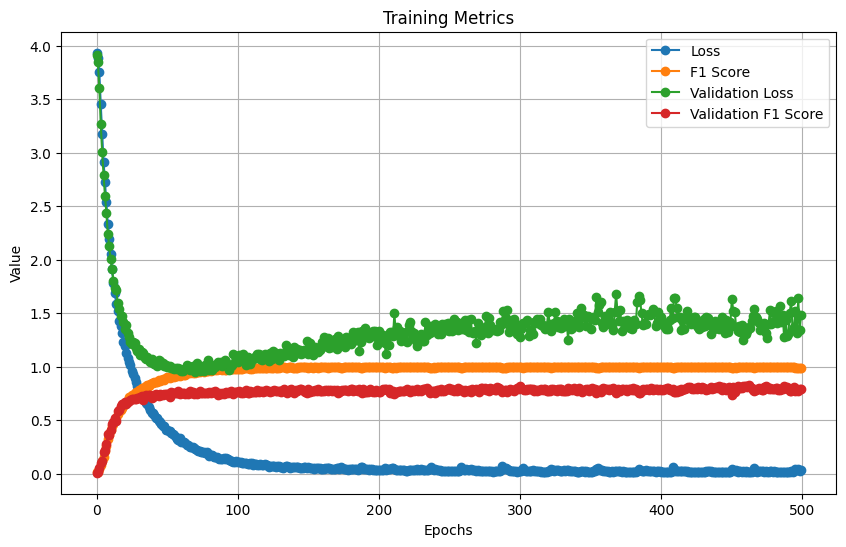

In [221]:
# Plotting
import matplotlib.pyplot as plt
epochs = range(0, 500)
plt.figure(figsize=(10, 6))
plt.plot(epochs, hist_df.loss, marker='o', label='Loss')
plt.plot(epochs, hist_df.f1_score, marker='o', label='F1 Score')
plt.plot(epochs, hist_df.val_loss, marker='o', label='Validation Loss')
plt.plot(epochs, hist_df.val_f1_score, marker='o', label='Validation F1 Score')
plt.title('Training Metrics')
plt.xlabel('Epochs')
plt.ylabel('Value')
plt.legend()
plt.grid()
plt.show()

In [142]:
reconstructed_model = tf.keras.models.load_model("2 1DCNN + 1 GRU Mish")

In [143]:
reconstructed_model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_7 (Conv1D)           (None, 122, 150)          170250    
                                                                 
 max_pooling1d_7 (MaxPooling  (None, 40, 150)          0         
 1D)                                                             
                                                                 
 conv1d_8 (Conv1D)           (None, 36, 150)           112650    
                                                                 
 max_pooling1d_8 (MaxPooling  (None, 12, 150)          0         
 1D)                                                             
                                                                 
 dropout_12 (Dropout)        (None, 12, 150)           0         
                                                                 
 gru_4 (GRU)                 (None, 175)              

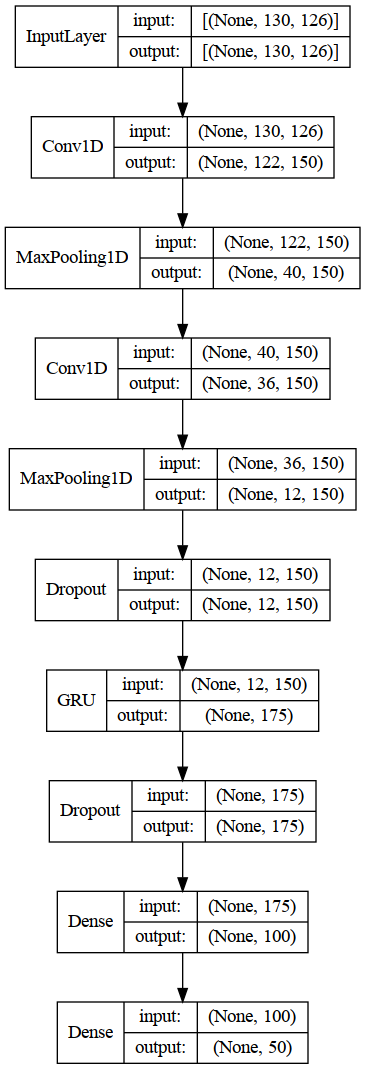

In [144]:
plot_model(reconstructed_model, show_shapes=True, show_layer_names=False)

In [145]:
reconstructed_model.evaluate(Xval,Yval)

11/11 [==============================] - 1s 9ms/step - loss: 1.3703 - f1_score: 0.8265


[1.3703196048736572, 0.8264500498771667]

In [146]:
print(classification_report(np.argmax(Yval, axis=1), np.argmax(reconstructed_model.predict(Xval), axis=1),
                            digits=3, target_names=label_map))

11/11 [==============================] - 1s 8ms/step
              precision    recall  f1-score   support

         AXE      1.000     0.750     0.857         8
    BACKPACK      1.000     0.833     0.909         6
  BASKETBALL      0.909     1.000     0.952        10
         BEE      1.000     0.800     0.889        10
        BELT      1.000     0.500     0.667         4
        BITE      0.727     1.000     0.842         8
   BREAKFAST      0.600     1.000     0.750         6
      CANCER      1.000     1.000     1.000         8
   CHRISTMAS      1.000     0.667     0.800         6
    CONFUSED      0.857     1.000     0.923         6
        DARK      1.000     1.000     1.000         4
        DEAF      0.857     1.000     0.923         6
      DECIDE      1.000     0.833     0.909         6
      DEMAND      0.778     0.875     0.824         8
     DEVELOP      0.625     0.833     0.714         6
      DINNER      0.750     0.750     0.750         8
         DOG      0.857     

## Hyperparameter Tuning 1 1D CNN Layer + 1 LSTM

In [147]:
from keras_tuner import HyperModel
from kerastuner.tuners import Hyperband
from tensorflow.keras.callbacks import EarlyStopping


In [148]:
from tensorflow.keras import regularizers
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout, SpatialDropout1D, GRU
import keras_tuner
from keras_tuner import HyperModel
from kerastuner.tuners import Hyperband
from tensorflow.keras.callbacks import EarlyStopping
import tensorflow_addons as tfa

class HyperModel(HyperModel):
    def __init__(self, input_shape, num_classes):
        self.input_shape = input_shape
        self.num_classes = num_classes

    def build(self, hp):
        act_function = hp.Choice('dense_activation',values=['selu','mish','gelu','elu','relu'],default='gelu')
        model = Sequential()
        model.add(Conv1D(filters=hp.Int('filters_1',min_value=50,max_value=200,step=25,default=150),
                         kernel_size=hp.Choice('kernel_1',values=[5,10,15,20],default=20,),
                         activation=act_function,input_shape=self.input_shape))
        model.add(MaxPooling1D(pool_size=hp.Choice('pool_1',values=[5,10,15,20],default=20,)))
        model.add(Dropout(rate=hp.Float('dropout_1',min_value=0.0,max_value=0.9,default=0.8,step=0.05,)))
        model.add(LSTM(units=hp.Int('units_1',min_value=50,max_value=200,step=25,default=100),
                      return_sequences=False,
                      kernel_regularizer=regularizers.l2(hp.Float('regularizer',min_value=1e-4,
                                                                max_value=1e-2,sampling='LOG',
                                                                default=.001))))
        model.add(Dropout(rate=hp.Float('dropout_2',min_value=0.0,max_value=0.9,default=0.7,step=0.05,)))
        model.add(Dense(units=hp.Int('units_2',min_value=70,max_value=120,step=10,default=80),activation=act_function))
        model.add(Dense(self.num_classes, activation='softmax'))

        model.compile(tf.optimizers.experimental.Nadam(hp.Float('learning_rate',min_value=1e-4,
                                                                max_value=1e-2,sampling='LOG',
                                                                default=.00062198175395800846)),
            loss='categorical_crossentropy',
            metrics=[tfa.metrics.F1Score(num_classes=50, average='macro')]
        )
        return model

hypermodel = HyperModel(input_shape=(130,399), num_classes=50)

In [152]:
HYPERBAND_MAX_EPOCHS = 300
#MAX_TRIALS = 20
EXECUTION_PER_TRIAL = 2

tuner = Hyperband(
    hypermodel,
    max_epochs=HYPERBAND_MAX_EPOCHS,
    objective=keras_tuner.Objective("val_f1_score", direction="max"),
    seed=10,
    executions_per_trial=EXECUTION_PER_TRIAL,
    directory='/media/kristian/HDD/ASL_Citizen/RTMPose-L/hyperband/',
    project_name='1_1D_CNN+1_LSTM',
    overwrite=False)

INFO:tensorflow:Reloading Tuner from /media/kristian/HDD/ASL_Citizen/Mediapipe/hyperband/1_1D_CNN+1_LSTM/tuner0.json


INFO:tensorflow:Reloading Tuner from /media/kristian/HDD/ASL_Citizen/Mediapipe/hyperband/1_1D_CNN+1_LSTM/tuner0.json


In [126]:
tuner.search_space_summary()

Search space summary
Default search space size: 10
dense_activation (Choice)
{'default': 'gelu', 'conditions': [], 'values': ['selu', 'LeakyReLU', 'gelu', 'elu', 'relu'], 'ordered': False}
num_filters_1 (Choice)
{'default': 150, 'conditions': [], 'values': [100, 125, 150, 200], 'ordered': True}
kernel_1 (Choice)
{'default': 20, 'conditions': [], 'values': [5, 10, 15, 20], 'ordered': True}
pool_1 (Choice)
{'default': 20, 'conditions': [], 'values': [5, 10, 15, 20], 'ordered': True}
dropout_1 (Float)
{'default': 0.8, 'conditions': [], 'min_value': 0.0, 'max_value': 0.9, 'step': 0.05, 'sampling': 'linear'}
units_1 (Int)
{'default': 100, 'conditions': [], 'min_value': 50, 'max_value': 200, 'step': 25, 'sampling': 'linear'}
regularizer (Float)
{'default': 0.001, 'conditions': [], 'min_value': 0.0001, 'max_value': 0.01, 'step': None, 'sampling': 'log'}
dropout_2 (Float)
{'default': 0.7, 'conditions': [], 'min_value': 0.0, 'max_value': 0.9, 'step': 0.05, 'sampling': 'linear'}
units_2 (Int)
{'

In [127]:
es = EarlyStopping(monitor="val_f1_score",patience=30,restore_best_weights=True,mode="max")

In [128]:
log_dir = os.path.join('Logs')
tb_callback = TensorBoard(log_dir=log_dir)

In [129]:
tuner.search(Xtrain, Ytrain, epochs=1000, validation_data=(Xval,Yval),batch_size=96,callbacks=[es])

Trial 725 Complete [00h 08m 36s]
val_f1_score: 0.7414208650588989

Best val_f1_score So Far: 0.8378399014472961
Total elapsed time: 07h 48m 07s
INFO:tensorflow:Oracle triggered exit


In [153]:
best_model = tuner.get_best_models(num_models=10)[0]

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=100.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [155]:
best_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 111, 150)          378150    
                                                                 
 max_pooling1d (MaxPooling1D  (None, 22, 150)          0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 22, 150)           0         
                                                                 
 lstm (LSTM)                 (None, 150)               180600    
                                                                 
 dropout_1 (Dropout)         (None, 150)               0         
                                                                 
 dense (Dense)               (None, 90)                13590     
                                                        

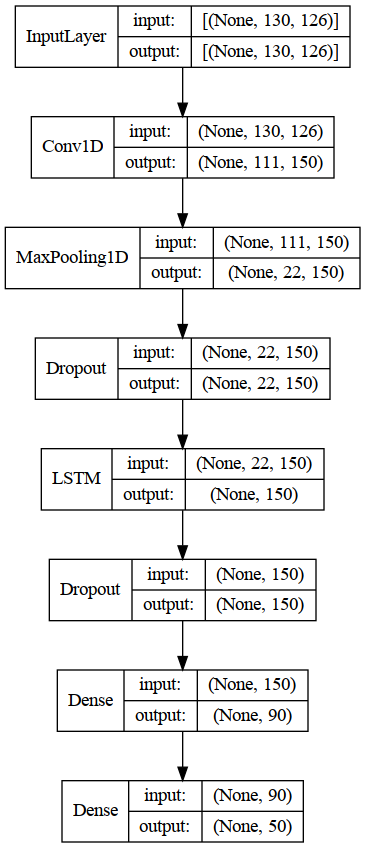

In [156]:
plot_model(best_model, show_shapes=True, show_layer_names=False)

In [131]:
tuner.results_summary()

Results summary
Results in /media/kristian/HDD/ASL_Citizen/Mediapipe/hyperband/1_1D_CNN+1_LSTM
Showing 10 best trials
Objective(name="val_f1_score", direction="max")

Trial 0700 summary
Hyperparameters:
dense_activation: selu
num_filters_1: 150
kernel_1: 20
pool_1: 5
dropout_1: 0.75
units_1: 150
regularizer: 0.00022635543607274578
dropout_2: 0.30000000000000004
units_2: 90
learning_rate: 0.0004281203070023101
tuner/epochs: 300
tuner/initial_epoch: 100
tuner/bracket: 2
tuner/round: 2
tuner/trial_id: 0694
Score: 0.8378399014472961

Trial 0694 summary
Hyperparameters:
dense_activation: selu
num_filters_1: 150
kernel_1: 20
pool_1: 5
dropout_1: 0.75
units_1: 150
regularizer: 0.00022635543607274578
dropout_2: 0.30000000000000004
units_2: 90
learning_rate: 0.0004281203070023101
tuner/epochs: 100
tuner/initial_epoch: 34
tuner/bracket: 2
tuner/round: 1
tuner/trial_id: 0680
Score: 0.8292438983917236

Trial 0714 summary
Hyperparameters:
dense_activation: elu
num_filters_1: 125
kernel_1: 20
pool_1

In [157]:
loss, accuracy = best_model.evaluate(Xval, Yval)

11/11 [==============================] - 1s 10ms/step - loss: 0.9505 - f1_score: 0.8397


In [158]:
#cm = confusion_matrix(np.argmax(Yval, axis=1), np.argmax(model.predict(Xval), axis=1))

#sns.heatmap(cm, annot = True)

print(classification_report(np.argmax(Yval, axis=1), np.argmax(best_model.predict(Xval), axis=1),
                            digits=3, target_names=label_map))

11/11 [==============================] - 0s 6ms/step
              precision    recall  f1-score   support

         AXE      0.857     0.750     0.800         8
    BACKPACK      0.857     1.000     0.923         6
  BASKETBALL      0.909     1.000     0.952        10
         BEE      1.000     0.900     0.947        10
        BELT      0.800     1.000     0.889         4
        BITE      0.667     1.000     0.800         8
   BREAKFAST      0.750     1.000     0.857         6
      CANCER      1.000     1.000     1.000         8
   CHRISTMAS      1.000     0.667     0.800         6
    CONFUSED      0.500     0.833     0.625         6
        DARK      1.000     1.000     1.000         4
        DEAF      1.000     1.000     1.000         6
      DECIDE      1.000     1.000     1.000         6
      DEMAND      1.000     0.750     0.857         8
     DEVELOP      0.625     0.833     0.714         6
      DINNER      0.600     0.750     0.667         8
         DOG      1.000     

In [137]:
#bestHP = tuner.get_best_hyperparameters(num_trials=5)[2]
bestHP = tuner.get_best_hyperparameters(num_trials=10)[0]

In [139]:
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath='1 1DCNN + 1 LSTM/',
    monitor='val_f1_score',
    mode='max',
    save_best_only=True)

In [140]:
print("[INFO] training the best model...")
model = tuner.hypermodel.build(bestHP)
History = model.fit(x=Xtrain, y=Ytrain,validation_data= (Xval,Yval), batch_size=96,epochs=500, verbose=1,callbacks=[model_checkpoint_callback])
#History = model.fit(x=Xtrain, y=Ytrain,validation_data= (Xval,Yval), batch_size=96,epochs=500, verbose=1)

[INFO] training the best model...
Epoch 1/500
27/28 [===========================>..] - ETA: 0s - loss: 3.9754 - f1_score: 0.0208

INFO:tensorflow:Assets written to: 1 1DCNN + 1 LSTM/assets


INFO:tensorflow:Assets written to: 1 1DCNN + 1 LSTM/assets


28/28 [==============================] - 17s 512ms/step - loss: 3.9721 - f1_score: 0.0218 - val_loss: 3.8355 - val_f1_score: 0.0369
Epoch 2/500
28/28 [==============================] - ETA: 0s - loss: 3.7898 - f1_score: 0.0497

INFO:tensorflow:Assets written to: 1 1DCNN + 1 LSTM/assets


INFO:tensorflow:Assets written to: 1 1DCNN + 1 LSTM/assets


28/28 [==============================] - 9s 317ms/step - loss: 3.7898 - f1_score: 0.0497 - val_loss: 3.5238 - val_f1_score: 0.0665
Epoch 3/500
27/28 [===========================>..] - ETA: 0s - loss: 3.4904 - f1_score: 0.1013

INFO:tensorflow:Assets written to: 1 1DCNN + 1 LSTM/assets


INFO:tensorflow:Assets written to: 1 1DCNN + 1 LSTM/assets


28/28 [==============================] - 8s 286ms/step - loss: 3.4869 - f1_score: 0.1011 - val_loss: 3.1465 - val_f1_score: 0.1336
Epoch 4/500
27/28 [===========================>..] - ETA: 0s - loss: 3.1406 - f1_score: 0.1290

INFO:tensorflow:Assets written to: 1 1DCNN + 1 LSTM/assets


INFO:tensorflow:Assets written to: 1 1DCNN + 1 LSTM/assets


28/28 [==============================] - 7s 263ms/step - loss: 3.1355 - f1_score: 0.1307 - val_loss: 2.8408 - val_f1_score: 0.1610
Epoch 5/500
27/28 [===========================>..] - ETA: 0s - loss: 2.8610 - f1_score: 0.1756

INFO:tensorflow:Assets written to: 1 1DCNN + 1 LSTM/assets


INFO:tensorflow:Assets written to: 1 1DCNN + 1 LSTM/assets


28/28 [==============================] - 7s 275ms/step - loss: 2.8613 - f1_score: 0.1771 - val_loss: 2.6010 - val_f1_score: 0.2167
Epoch 6/500
27/28 [===========================>..] - ETA: 0s - loss: 2.6557 - f1_score: 0.2281

INFO:tensorflow:Assets written to: 1 1DCNN + 1 LSTM/assets


INFO:tensorflow:Assets written to: 1 1DCNN + 1 LSTM/assets


28/28 [==============================] - 9s 343ms/step - loss: 2.6551 - f1_score: 0.2270 - val_loss: 2.4194 - val_f1_score: 0.2727
Epoch 7/500
27/28 [===========================>..] - ETA: 0s - loss: 2.4810 - f1_score: 0.2628

INFO:tensorflow:Assets written to: 1 1DCNN + 1 LSTM/assets


INFO:tensorflow:Assets written to: 1 1DCNN + 1 LSTM/assets


28/28 [==============================] - 8s 305ms/step - loss: 2.4791 - f1_score: 0.2645 - val_loss: 2.2497 - val_f1_score: 0.3140
Epoch 8/500
27/28 [===========================>..] - ETA: 0s - loss: 2.3179 - f1_score: 0.3238

INFO:tensorflow:Assets written to: 1 1DCNN + 1 LSTM/assets


INFO:tensorflow:Assets written to: 1 1DCNN + 1 LSTM/assets


28/28 [==============================] - 8s 287ms/step - loss: 2.3203 - f1_score: 0.3254 - val_loss: 2.0895 - val_f1_score: 0.3709
Epoch 9/500
27/28 [===========================>..] - ETA: 0s - loss: 2.2209 - f1_score: 0.3569

INFO:tensorflow:Assets written to: 1 1DCNN + 1 LSTM/assets


INFO:tensorflow:Assets written to: 1 1DCNN + 1 LSTM/assets


28/28 [==============================] - 9s 316ms/step - loss: 2.2088 - f1_score: 0.3574 - val_loss: 1.9194 - val_f1_score: 0.4512
Epoch 10/500
27/28 [===========================>..] - ETA: 0s - loss: 2.0603 - f1_score: 0.3833

INFO:tensorflow:Assets written to: 1 1DCNN + 1 LSTM/assets


INFO:tensorflow:Assets written to: 1 1DCNN + 1 LSTM/assets


28/28 [==============================] - 7s 267ms/step - loss: 2.0565 - f1_score: 0.3829 - val_loss: 1.8515 - val_f1_score: 0.4732
Epoch 11/500
27/28 [===========================>..] - ETA: 0s - loss: 1.9516 - f1_score: 0.4273

INFO:tensorflow:Assets written to: 1 1DCNN + 1 LSTM/assets


INFO:tensorflow:Assets written to: 1 1DCNN + 1 LSTM/assets


28/28 [==============================] - 7s 263ms/step - loss: 1.9544 - f1_score: 0.4275 - val_loss: 1.7699 - val_f1_score: 0.5046
Epoch 12/500
27/28 [===========================>..] - ETA: 0s - loss: 1.8565 - f1_score: 0.4505

INFO:tensorflow:Assets written to: 1 1DCNN + 1 LSTM/assets


INFO:tensorflow:Assets written to: 1 1DCNN + 1 LSTM/assets


28/28 [==============================] - 8s 311ms/step - loss: 1.8494 - f1_score: 0.4515 - val_loss: 1.7230 - val_f1_score: 0.5543
Epoch 13/500
28/28 [==============================] - 1s 50ms/step - loss: 1.7649 - f1_score: 0.4834 - val_loss: 1.7193 - val_f1_score: 0.5018
Epoch 14/500
28/28 [==============================] - 1s 50ms/step - loss: 1.6851 - f1_score: 0.5060 - val_loss: 1.5607 - val_f1_score: 0.5413
Epoch 15/500
27/28 [===========================>..] - ETA: 0s - loss: 1.6156 - f1_score: 0.5290

INFO:tensorflow:Assets written to: 1 1DCNN + 1 LSTM/assets


INFO:tensorflow:Assets written to: 1 1DCNN + 1 LSTM/assets


28/28 [==============================] - 9s 325ms/step - loss: 1.6144 - f1_score: 0.5286 - val_loss: 1.4873 - val_f1_score: 0.6000
Epoch 16/500
27/28 [===========================>..] - ETA: 0s - loss: 1.5367 - f1_score: 0.5464

INFO:tensorflow:Assets written to: 1 1DCNN + 1 LSTM/assets


INFO:tensorflow:Assets written to: 1 1DCNN + 1 LSTM/assets


28/28 [==============================] - 9s 325ms/step - loss: 1.5411 - f1_score: 0.5431 - val_loss: 1.4570 - val_f1_score: 0.6237
Epoch 17/500
27/28 [===========================>..] - ETA: 0s - loss: 1.4855 - f1_score: 0.5622

INFO:tensorflow:Assets written to: 1 1DCNN + 1 LSTM/assets


INFO:tensorflow:Assets written to: 1 1DCNN + 1 LSTM/assets


28/28 [==============================] - 9s 320ms/step - loss: 1.4904 - f1_score: 0.5610 - val_loss: 1.4156 - val_f1_score: 0.6282
Epoch 18/500
27/28 [===========================>..] - ETA: 0s - loss: 1.4341 - f1_score: 0.5963

INFO:tensorflow:Assets written to: 1 1DCNN + 1 LSTM/assets


INFO:tensorflow:Assets written to: 1 1DCNN + 1 LSTM/assets


28/28 [==============================] - 8s 286ms/step - loss: 1.4377 - f1_score: 0.5943 - val_loss: 1.3965 - val_f1_score: 0.6372
Epoch 19/500
28/28 [==============================] - 1s 50ms/step - loss: 1.3855 - f1_score: 0.5862 - val_loss: 1.3932 - val_f1_score: 0.6358
Epoch 20/500
27/28 [===========================>..] - ETA: 0s - loss: 1.3480 - f1_score: 0.6067

INFO:tensorflow:Assets written to: 1 1DCNN + 1 LSTM/assets


INFO:tensorflow:Assets written to: 1 1DCNN + 1 LSTM/assets


28/28 [==============================] - 42s 2s/step - loss: 1.3486 - f1_score: 0.6077 - val_loss: 1.3385 - val_f1_score: 0.6583
Epoch 21/500
27/28 [===========================>..] - ETA: 0s - loss: 1.2861 - f1_score: 0.6238

INFO:tensorflow:Assets written to: 1 1DCNN + 1 LSTM/assets


INFO:tensorflow:Assets written to: 1 1DCNN + 1 LSTM/assets


28/28 [==============================] - 9s 344ms/step - loss: 1.2864 - f1_score: 0.6253 - val_loss: 1.2831 - val_f1_score: 0.6852
Epoch 22/500
27/28 [===========================>..] - ETA: 0s - loss: 1.2531 - f1_score: 0.6280

INFO:tensorflow:Assets written to: 1 1DCNN + 1 LSTM/assets


INFO:tensorflow:Assets written to: 1 1DCNN + 1 LSTM/assets


28/28 [==============================] - 8s 303ms/step - loss: 1.2539 - f1_score: 0.6257 - val_loss: 1.3312 - val_f1_score: 0.6885
Epoch 23/500
28/28 [==============================] - 1s 50ms/step - loss: 1.2181 - f1_score: 0.6406 - val_loss: 1.2785 - val_f1_score: 0.6669
Epoch 24/500
28/28 [==============================] - 1s 50ms/step - loss: 1.1631 - f1_score: 0.6652 - val_loss: 1.2781 - val_f1_score: 0.6767
Epoch 25/500
28/28 [==============================] - 1s 50ms/step - loss: 1.1725 - f1_score: 0.6534 - val_loss: 1.2785 - val_f1_score: 0.6701
Epoch 26/500
27/28 [===========================>..] - ETA: 0s - loss: 1.1104 - f1_score: 0.6741

INFO:tensorflow:Assets written to: 1 1DCNN + 1 LSTM/assets


INFO:tensorflow:Assets written to: 1 1DCNN + 1 LSTM/assets


28/28 [==============================] - 9s 318ms/step - loss: 1.1078 - f1_score: 0.6741 - val_loss: 1.2399 - val_f1_score: 0.7162
Epoch 27/500
28/28 [==============================] - 1s 50ms/step - loss: 1.0694 - f1_score: 0.6855 - val_loss: 1.2100 - val_f1_score: 0.6769
Epoch 28/500
28/28 [==============================] - 1s 50ms/step - loss: 1.0230 - f1_score: 0.6991 - val_loss: 1.2365 - val_f1_score: 0.6789
Epoch 29/500
28/28 [==============================] - 1s 50ms/step - loss: 0.9921 - f1_score: 0.7109 - val_loss: 1.2086 - val_f1_score: 0.7117
Epoch 30/500
27/28 [===========================>..] - ETA: 0s - loss: 0.9739 - f1_score: 0.7195

INFO:tensorflow:Assets written to: 1 1DCNN + 1 LSTM/assets


INFO:tensorflow:Assets written to: 1 1DCNN + 1 LSTM/assets


28/28 [==============================] - 34s 1s/step - loss: 0.9694 - f1_score: 0.7206 - val_loss: 1.1450 - val_f1_score: 0.7170
Epoch 31/500
28/28 [==============================] - 1s 50ms/step - loss: 0.9486 - f1_score: 0.7196 - val_loss: 1.1904 - val_f1_score: 0.7083
Epoch 32/500
28/28 [==============================] - 1s 50ms/step - loss: 0.9449 - f1_score: 0.7325 - val_loss: 1.1334 - val_f1_score: 0.7029
Epoch 33/500
27/28 [===========================>..] - ETA: 0s - loss: 0.9042 - f1_score: 0.7273

INFO:tensorflow:Assets written to: 1 1DCNN + 1 LSTM/assets


INFO:tensorflow:Assets written to: 1 1DCNN + 1 LSTM/assets


28/28 [==============================] - 10s 359ms/step - loss: 0.9047 - f1_score: 0.7266 - val_loss: 1.0981 - val_f1_score: 0.7325
Epoch 34/500
28/28 [==============================] - 1s 50ms/step - loss: 0.8556 - f1_score: 0.7515 - val_loss: 1.1055 - val_f1_score: 0.7291
Epoch 35/500
28/28 [==============================] - 1s 51ms/step - loss: 0.8487 - f1_score: 0.7546 - val_loss: 1.1056 - val_f1_score: 0.7178
Epoch 36/500
28/28 [==============================] - 1s 52ms/step - loss: 0.8636 - f1_score: 0.7388 - val_loss: 1.1527 - val_f1_score: 0.6910
Epoch 37/500
27/28 [===========================>..] - ETA: 0s - loss: 0.8277 - f1_score: 0.7622

INFO:tensorflow:Assets written to: 1 1DCNN + 1 LSTM/assets


INFO:tensorflow:Assets written to: 1 1DCNN + 1 LSTM/assets


28/28 [==============================] - 11s 404ms/step - loss: 0.8232 - f1_score: 0.7632 - val_loss: 1.1145 - val_f1_score: 0.7376
Epoch 38/500
28/28 [==============================] - 1s 50ms/step - loss: 0.8085 - f1_score: 0.7736 - val_loss: 1.0456 - val_f1_score: 0.7308
Epoch 39/500
27/28 [===========================>..] - ETA: 0s - loss: 0.8022 - f1_score: 0.7693

INFO:tensorflow:Assets written to: 1 1DCNN + 1 LSTM/assets


INFO:tensorflow:Assets written to: 1 1DCNN + 1 LSTM/assets


28/28 [==============================] - 10s 358ms/step - loss: 0.7983 - f1_score: 0.7715 - val_loss: 1.0782 - val_f1_score: 0.7425
Epoch 40/500
28/28 [==============================] - 1s 50ms/step - loss: 0.7505 - f1_score: 0.7799 - val_loss: 1.1783 - val_f1_score: 0.7072
Epoch 41/500
28/28 [==============================] - 1s 50ms/step - loss: 0.7520 - f1_score: 0.7726 - val_loss: 1.1319 - val_f1_score: 0.7193
Epoch 42/500
28/28 [==============================] - 1s 50ms/step - loss: 0.6980 - f1_score: 0.8037 - val_loss: 1.1445 - val_f1_score: 0.6991
Epoch 43/500
28/28 [==============================] - 1s 50ms/step - loss: 0.7247 - f1_score: 0.7865 - val_loss: 1.1239 - val_f1_score: 0.7277
Epoch 44/500
27/28 [===========================>..] - ETA: 0s - loss: 0.6897 - f1_score: 0.7996

INFO:tensorflow:Assets written to: 1 1DCNN + 1 LSTM/assets


INFO:tensorflow:Assets written to: 1 1DCNN + 1 LSTM/assets


28/28 [==============================] - 10s 372ms/step - loss: 0.6935 - f1_score: 0.7970 - val_loss: 1.0348 - val_f1_score: 0.7451
Epoch 45/500
28/28 [==============================] - 1s 50ms/step - loss: 0.6899 - f1_score: 0.7903 - val_loss: 1.0843 - val_f1_score: 0.7374
Epoch 46/500
28/28 [==============================] - 1s 51ms/step - loss: 0.6572 - f1_score: 0.8062 - val_loss: 1.0761 - val_f1_score: 0.7336
Epoch 47/500
27/28 [===========================>..] - ETA: 0s - loss: 0.6504 - f1_score: 0.8086

INFO:tensorflow:Assets written to: 1 1DCNN + 1 LSTM/assets


INFO:tensorflow:Assets written to: 1 1DCNN + 1 LSTM/assets


28/28 [==============================] - 8s 310ms/step - loss: 0.6440 - f1_score: 0.8117 - val_loss: 1.0714 - val_f1_score: 0.7530
Epoch 48/500
28/28 [==============================] - 1s 50ms/step - loss: 0.6206 - f1_score: 0.8194 - val_loss: 1.0740 - val_f1_score: 0.7503
Epoch 49/500
27/28 [===========================>..] - ETA: 0s - loss: 0.6186 - f1_score: 0.8211

INFO:tensorflow:Assets written to: 1 1DCNN + 1 LSTM/assets


INFO:tensorflow:Assets written to: 1 1DCNN + 1 LSTM/assets


28/28 [==============================] - 9s 314ms/step - loss: 0.6163 - f1_score: 0.8242 - val_loss: 1.0430 - val_f1_score: 0.7536
Epoch 50/500
28/28 [==============================] - ETA: 0s - loss: 0.6156 - f1_score: 0.8287

INFO:tensorflow:Assets written to: 1 1DCNN + 1 LSTM/assets


INFO:tensorflow:Assets written to: 1 1DCNN + 1 LSTM/assets


28/28 [==============================] - 15s 558ms/step - loss: 0.6156 - f1_score: 0.8287 - val_loss: 1.0363 - val_f1_score: 0.7775
Epoch 51/500
28/28 [==============================] - 1s 50ms/step - loss: 0.5868 - f1_score: 0.8259 - val_loss: 1.1232 - val_f1_score: 0.7499
Epoch 52/500
28/28 [==============================] - 1s 50ms/step - loss: 0.6004 - f1_score: 0.8284 - val_loss: 1.0861 - val_f1_score: 0.7533
Epoch 53/500
28/28 [==============================] - 1s 50ms/step - loss: 0.5770 - f1_score: 0.8375 - val_loss: 1.0210 - val_f1_score: 0.7567
Epoch 54/500
28/28 [==============================] - 1s 50ms/step - loss: 0.5553 - f1_score: 0.8425 - val_loss: 1.0944 - val_f1_score: 0.7315
Epoch 55/500
28/28 [==============================] - 1s 51ms/step - loss: 0.5440 - f1_score: 0.8375 - val_loss: 1.0505 - val_f1_score: 0.7321
Epoch 56/500
28/28 [==============================] - 1s 50ms/step - loss: 0.5106 - f1_score: 0.8510 - val_loss: 1.1053 - val_f1_score: 0.7477
Epoch 57/5

INFO:tensorflow:Assets written to: 1 1DCNN + 1 LSTM/assets


INFO:tensorflow:Assets written to: 1 1DCNN + 1 LSTM/assets


28/28 [==============================] - 10s 363ms/step - loss: 0.3442 - f1_score: 0.9027 - val_loss: 1.0342 - val_f1_score: 0.7782
Epoch 81/500
28/28 [==============================] - 1s 51ms/step - loss: 0.3728 - f1_score: 0.8945 - val_loss: 1.0765 - val_f1_score: 0.7690
Epoch 82/500
28/28 [==============================] - 1s 51ms/step - loss: 0.3543 - f1_score: 0.8999 - val_loss: 1.0457 - val_f1_score: 0.7764
Epoch 83/500
28/28 [==============================] - 1s 51ms/step - loss: 0.3263 - f1_score: 0.9065 - val_loss: 0.9832 - val_f1_score: 0.7683
Epoch 84/500
28/28 [==============================] - 1s 51ms/step - loss: 0.3446 - f1_score: 0.9002 - val_loss: 1.0276 - val_f1_score: 0.7661
Epoch 85/500
28/28 [==============================] - 1s 51ms/step - loss: 0.3472 - f1_score: 0.8991 - val_loss: 1.0782 - val_f1_score: 0.7609
Epoch 86/500
27/28 [===========================>..] - ETA: 0s - loss: 0.3389 - f1_score: 0.9025

INFO:tensorflow:Assets written to: 1 1DCNN + 1 LSTM/assets


INFO:tensorflow:Assets written to: 1 1DCNN + 1 LSTM/assets


28/28 [==============================] - 9s 323ms/step - loss: 0.3364 - f1_score: 0.9041 - val_loss: 1.0184 - val_f1_score: 0.7994
Epoch 87/500
28/28 [==============================] - 1s 50ms/step - loss: 0.3280 - f1_score: 0.9030 - val_loss: 1.0495 - val_f1_score: 0.7900
Epoch 88/500
28/28 [==============================] - 1s 51ms/step - loss: 0.3262 - f1_score: 0.9089 - val_loss: 0.9895 - val_f1_score: 0.7788
Epoch 89/500
28/28 [==============================] - 1s 51ms/step - loss: 0.3080 - f1_score: 0.9126 - val_loss: 1.0460 - val_f1_score: 0.7851
Epoch 90/500
28/28 [==============================] - 1s 51ms/step - loss: 0.3069 - f1_score: 0.9129 - val_loss: 1.0529 - val_f1_score: 0.7511
Epoch 91/500
28/28 [==============================] - 1s 51ms/step - loss: 0.3047 - f1_score: 0.9115 - val_loss: 1.0517 - val_f1_score: 0.7751
Epoch 92/500
28/28 [==============================] - 1s 51ms/step - loss: 0.2959 - f1_score: 0.9180 - val_loss: 1.0517 - val_f1_score: 0.7892
Epoch 93/50

INFO:tensorflow:Assets written to: 1 1DCNN + 1 LSTM/assets


INFO:tensorflow:Assets written to: 1 1DCNN + 1 LSTM/assets


28/28 [==============================] - 19s 698ms/step - loss: 0.2304 - f1_score: 0.9383 - val_loss: 0.9857 - val_f1_score: 0.8135
Epoch 117/500
28/28 [==============================] - 1s 50ms/step - loss: 0.2226 - f1_score: 0.9458 - val_loss: 1.0710 - val_f1_score: 0.8019
Epoch 118/500
28/28 [==============================] - 1s 50ms/step - loss: 0.2249 - f1_score: 0.9390 - val_loss: 1.0983 - val_f1_score: 0.7686
Epoch 119/500
28/28 [==============================] - 1s 51ms/step - loss: 0.2219 - f1_score: 0.9423 - val_loss: 1.1436 - val_f1_score: 0.7576
Epoch 120/500
28/28 [==============================] - 1s 51ms/step - loss: 0.2358 - f1_score: 0.9391 - val_loss: 1.0980 - val_f1_score: 0.7874
Epoch 121/500
28/28 [==============================] - 1s 51ms/step - loss: 0.2344 - f1_score: 0.9414 - val_loss: 1.0483 - val_f1_score: 0.7854
Epoch 122/500
28/28 [==============================] - 1s 52ms/step - loss: 0.2592 - f1_score: 0.9307 - val_loss: 0.9924 - val_f1_score: 0.7793
Epoc

INFO:tensorflow:Assets written to: 1 1DCNN + 1 LSTM/assets


INFO:tensorflow:Assets written to: 1 1DCNN + 1 LSTM/assets


28/28 [==============================] - 12s 447ms/step - loss: 0.1491 - f1_score: 0.9666 - val_loss: 1.0565 - val_f1_score: 0.8169
Epoch 173/500
28/28 [==============================] - 1s 52ms/step - loss: 0.1407 - f1_score: 0.9635 - val_loss: 1.0746 - val_f1_score: 0.7805
Epoch 174/500
28/28 [==============================] - 1s 52ms/step - loss: 0.1697 - f1_score: 0.9600 - val_loss: 1.1204 - val_f1_score: 0.7751
Epoch 175/500
28/28 [==============================] - 1s 52ms/step - loss: 0.1589 - f1_score: 0.9651 - val_loss: 1.1107 - val_f1_score: 0.8053
Epoch 176/500
28/28 [==============================] - 1s 52ms/step - loss: 0.1490 - f1_score: 0.9630 - val_loss: 1.1746 - val_f1_score: 0.7763
Epoch 177/500
28/28 [==============================] - 1s 52ms/step - loss: 0.1618 - f1_score: 0.9591 - val_loss: 1.1425 - val_f1_score: 0.7789
Epoch 178/500
28/28 [==============================] - 1s 51ms/step - loss: 0.1853 - f1_score: 0.9516 - val_loss: 1.0977 - val_f1_score: 0.7860
Epoc

INFO:tensorflow:Assets written to: 1 1DCNN + 1 LSTM/assets


INFO:tensorflow:Assets written to: 1 1DCNN + 1 LSTM/assets


28/28 [==============================] - 11s 410ms/step - loss: 0.1386 - f1_score: 0.9635 - val_loss: 1.0726 - val_f1_score: 0.8218
Epoch 198/500
28/28 [==============================] - 1s 52ms/step - loss: 0.1253 - f1_score: 0.9704 - val_loss: 1.0947 - val_f1_score: 0.8142
Epoch 199/500
28/28 [==============================] - 1s 52ms/step - loss: 0.1402 - f1_score: 0.9665 - val_loss: 1.1429 - val_f1_score: 0.7970
Epoch 200/500
28/28 [==============================] - ETA: 0s - loss: 0.1429 - f1_score: 0.9607

INFO:tensorflow:Assets written to: 1 1DCNN + 1 LSTM/assets


INFO:tensorflow:Assets written to: 1 1DCNN + 1 LSTM/assets


28/28 [==============================] - 9s 332ms/step - loss: 0.1429 - f1_score: 0.9607 - val_loss: 0.9631 - val_f1_score: 0.8228
Epoch 201/500
28/28 [==============================] - 1s 51ms/step - loss: 0.1373 - f1_score: 0.9641 - val_loss: 1.1089 - val_f1_score: 0.7976
Epoch 202/500
28/28 [==============================] - 1s 51ms/step - loss: 0.1276 - f1_score: 0.9689 - val_loss: 1.0361 - val_f1_score: 0.8037
Epoch 203/500
28/28 [==============================] - 1s 52ms/step - loss: 0.1249 - f1_score: 0.9688 - val_loss: 1.0849 - val_f1_score: 0.7992
Epoch 204/500
28/28 [==============================] - 1s 51ms/step - loss: 0.1415 - f1_score: 0.9651 - val_loss: 1.0797 - val_f1_score: 0.8187
Epoch 205/500
28/28 [==============================] - 1s 51ms/step - loss: 0.1371 - f1_score: 0.9694 - val_loss: 1.1151 - val_f1_score: 0.8224
Epoch 206/500
28/28 [==============================] - 1s 52ms/step - loss: 0.1222 - f1_score: 0.9729 - val_loss: 1.1454 - val_f1_score: 0.7995
Epoch

Epoch 257/500
28/28 [==============================] - 1s 53ms/step - loss: 0.0989 - f1_score: 0.9779 - val_loss: 1.1374 - val_f1_score: 0.7979
Epoch 258/500
28/28 [==============================] - 1s 53ms/step - loss: 0.1069 - f1_score: 0.9763 - val_loss: 1.0329 - val_f1_score: 0.8056
Epoch 259/500
28/28 [==============================] - 1s 53ms/step - loss: 0.1340 - f1_score: 0.9651 - val_loss: 1.2236 - val_f1_score: 0.7833
Epoch 260/500
28/28 [==============================] - 2s 54ms/step - loss: 0.1163 - f1_score: 0.9671 - val_loss: 1.1525 - val_f1_score: 0.8068
Epoch 261/500
28/28 [==============================] - 1s 53ms/step - loss: 0.1139 - f1_score: 0.9718 - val_loss: 1.0285 - val_f1_score: 0.8050
Epoch 262/500
28/28 [==============================] - 1s 54ms/step - loss: 0.1080 - f1_score: 0.9765 - val_loss: 1.2096 - val_f1_score: 0.8078
Epoch 263/500
28/28 [==============================] - 1s 53ms/step - loss: 0.1187 - f1_score: 0.9709 - val_loss: 1.2508 - val_f1_score:

INFO:tensorflow:Assets written to: 1 1DCNN + 1 LSTM/assets


INFO:tensorflow:Assets written to: 1 1DCNN + 1 LSTM/assets


28/28 [==============================] - 12s 430ms/step - loss: 0.1283 - f1_score: 0.9693 - val_loss: 1.0505 - val_f1_score: 0.8248
Epoch 275/500
28/28 [==============================] - 1s 51ms/step - loss: 0.1337 - f1_score: 0.9678 - val_loss: 1.2212 - val_f1_score: 0.7951
Epoch 276/500
28/28 [==============================] - 1s 52ms/step - loss: 0.1022 - f1_score: 0.9742 - val_loss: 1.1765 - val_f1_score: 0.7946
Epoch 277/500
28/28 [==============================] - 1s 51ms/step - loss: 0.1002 - f1_score: 0.9739 - val_loss: 1.2003 - val_f1_score: 0.8149
Epoch 278/500
28/28 [==============================] - 1s 52ms/step - loss: 0.0927 - f1_score: 0.9798 - val_loss: 1.1561 - val_f1_score: 0.8135
Epoch 279/500
28/28 [==============================] - 1s 52ms/step - loss: 0.0888 - f1_score: 0.9797 - val_loss: 1.1059 - val_f1_score: 0.8091
Epoch 280/500
28/28 [==============================] - 1s 53ms/step - loss: 0.0933 - f1_score: 0.9763 - val_loss: 1.0670 - val_f1_score: 0.8066
Epoc

INFO:tensorflow:Assets written to: 1 1DCNN + 1 LSTM/assets


INFO:tensorflow:Assets written to: 1 1DCNN + 1 LSTM/assets


28/28 [==============================] - 12s 455ms/step - loss: 0.0938 - f1_score: 0.9749 - val_loss: 1.0796 - val_f1_score: 0.8253
Epoch 309/500
28/28 [==============================] - 1s 51ms/step - loss: 0.0928 - f1_score: 0.9796 - val_loss: 1.1534 - val_f1_score: 0.8014
Epoch 310/500
28/28 [==============================] - 1s 51ms/step - loss: 0.0852 - f1_score: 0.9827 - val_loss: 1.1934 - val_f1_score: 0.8107
Epoch 311/500
27/28 [===========================>..] - ETA: 0s - loss: 0.0807 - f1_score: 0.9841

INFO:tensorflow:Assets written to: 1 1DCNN + 1 LSTM/assets


INFO:tensorflow:Assets written to: 1 1DCNN + 1 LSTM/assets


28/28 [==============================] - 9s 342ms/step - loss: 0.0800 - f1_score: 0.9842 - val_loss: 1.1012 - val_f1_score: 0.8320
Epoch 312/500
28/28 [==============================] - 1s 51ms/step - loss: 0.0878 - f1_score: 0.9790 - val_loss: 1.1842 - val_f1_score: 0.7921
Epoch 313/500
28/28 [==============================] - 1s 51ms/step - loss: 0.1003 - f1_score: 0.9796 - val_loss: 1.1434 - val_f1_score: 0.7951
Epoch 314/500
28/28 [==============================] - 1s 52ms/step - loss: 0.0998 - f1_score: 0.9769 - val_loss: 1.1986 - val_f1_score: 0.7909
Epoch 315/500
28/28 [==============================] - 2s 56ms/step - loss: 0.0845 - f1_score: 0.9810 - val_loss: 1.1116 - val_f1_score: 0.8081
Epoch 316/500
28/28 [==============================] - 1s 52ms/step - loss: 0.0940 - f1_score: 0.9761 - val_loss: 1.2889 - val_f1_score: 0.8046
Epoch 317/500
28/28 [==============================] - 1s 51ms/step - loss: 0.1192 - f1_score: 0.9677 - val_loss: 1.3007 - val_f1_score: 0.7897
Epoch

INFO:tensorflow:Assets written to: 1 1DCNN + 1 LSTM/assets


INFO:tensorflow:Assets written to: 1 1DCNN + 1 LSTM/assets


28/28 [==============================] - 14s 519ms/step - loss: 0.0878 - f1_score: 0.9805 - val_loss: 1.0372 - val_f1_score: 0.8378
Epoch 349/500
28/28 [==============================] - 2s 54ms/step - loss: 0.0843 - f1_score: 0.9837 - val_loss: 1.1541 - val_f1_score: 0.8152
Epoch 350/500
28/28 [==============================] - 2s 54ms/step - loss: 0.0850 - f1_score: 0.9819 - val_loss: 1.1536 - val_f1_score: 0.8140
Epoch 351/500
28/28 [==============================] - 1s 52ms/step - loss: 0.0805 - f1_score: 0.9815 - val_loss: 1.1757 - val_f1_score: 0.7986
Epoch 352/500
28/28 [==============================] - 1s 52ms/step - loss: 0.0745 - f1_score: 0.9841 - val_loss: 1.2308 - val_f1_score: 0.8082
Epoch 353/500
28/28 [==============================] - 1s 53ms/step - loss: 0.0998 - f1_score: 0.9782 - val_loss: 1.2064 - val_f1_score: 0.8051
Epoch 354/500
28/28 [==============================] - 1s 52ms/step - loss: 0.0821 - f1_score: 0.9834 - val_loss: 1.0601 - val_f1_score: 0.8240
Epoc

Epoch 405/500
28/28 [==============================] - 2s 56ms/step - loss: 0.1000 - f1_score: 0.9767 - val_loss: 1.2490 - val_f1_score: 0.8251
Epoch 406/500
28/28 [==============================] - 2s 56ms/step - loss: 0.0945 - f1_score: 0.9796 - val_loss: 1.1519 - val_f1_score: 0.8137
Epoch 407/500
28/28 [==============================] - 2s 55ms/step - loss: 0.0851 - f1_score: 0.9812 - val_loss: 1.2065 - val_f1_score: 0.8221
Epoch 408/500
28/28 [==============================] - 2s 55ms/step - loss: 0.0958 - f1_score: 0.9789 - val_loss: 1.1729 - val_f1_score: 0.8162
Epoch 409/500
28/28 [==============================] - 2s 56ms/step - loss: 0.0742 - f1_score: 0.9857 - val_loss: 1.1295 - val_f1_score: 0.8169
Epoch 410/500
28/28 [==============================] - 2s 54ms/step - loss: 0.0700 - f1_score: 0.9843 - val_loss: 1.1525 - val_f1_score: 0.8201
Epoch 411/500
28/28 [==============================] - 2s 55ms/step - loss: 0.0835 - f1_score: 0.9813 - val_loss: 1.1418 - val_f1_score:

Epoch 462/500
28/28 [==============================] - 2s 54ms/step - loss: 0.0979 - f1_score: 0.9781 - val_loss: 1.1135 - val_f1_score: 0.8172
Epoch 463/500
28/28 [==============================] - 2s 54ms/step - loss: 0.1091 - f1_score: 0.9725 - val_loss: 1.1097 - val_f1_score: 0.8294
Epoch 464/500
28/28 [==============================] - 2s 54ms/step - loss: 0.1092 - f1_score: 0.9723 - val_loss: 1.1141 - val_f1_score: 0.8316
Epoch 465/500
28/28 [==============================] - 2s 56ms/step - loss: 0.0917 - f1_score: 0.9791 - val_loss: 1.1226 - val_f1_score: 0.8237
Epoch 466/500
28/28 [==============================] - 2s 55ms/step - loss: 0.0790 - f1_score: 0.9837 - val_loss: 1.1395 - val_f1_score: 0.8263
Epoch 467/500
28/28 [==============================] - 2s 55ms/step - loss: 0.0740 - f1_score: 0.9844 - val_loss: 1.2002 - val_f1_score: 0.8070
Epoch 468/500
28/28 [==============================] - 2s 54ms/step - loss: 0.0620 - f1_score: 0.9889 - val_loss: 1.1234 - val_f1_score:

INFO:tensorflow:Assets written to: 1 1DCNN + 1 LSTM/assets


INFO:tensorflow:Assets written to: 1 1DCNN + 1 LSTM/assets


28/28 [==============================] - 11s 408ms/step - loss: 0.0798 - f1_score: 0.9812 - val_loss: 1.1101 - val_f1_score: 0.8405
Epoch 495/500
28/28 [==============================] - 1s 52ms/step - loss: 0.0737 - f1_score: 0.9844 - val_loss: 1.1993 - val_f1_score: 0.8103
Epoch 496/500
28/28 [==============================] - 1s 53ms/step - loss: 0.0779 - f1_score: 0.9828 - val_loss: 1.2072 - val_f1_score: 0.8188
Epoch 497/500
28/28 [==============================] - 1s 51ms/step - loss: 0.0791 - f1_score: 0.9829 - val_loss: 1.1841 - val_f1_score: 0.8119
Epoch 498/500
28/28 [==============================] - 1s 53ms/step - loss: 0.0768 - f1_score: 0.9841 - val_loss: 1.2089 - val_f1_score: 0.8139
Epoch 499/500
28/28 [==============================] - 1s 53ms/step - loss: 0.0796 - f1_score: 0.9809 - val_loss: 1.2608 - val_f1_score: 0.8055
Epoch 500/500
28/28 [==============================] - 1s 53ms/step - loss: 0.0736 - f1_score: 0.9836 - val_loss: 1.2187 - val_f1_score: 0.8071


In [141]:
print(classification_report(np.argmax(Yval, axis=1), np.argmax(model.predict(Xval), axis=1),
                            digits=3, target_names=label_map))

11/11 [==============================] - 1s 7ms/step
              precision    recall  f1-score   support

         AXE      1.000     0.750     0.857         8
    BACKPACK      0.667     0.667     0.667         6
  BASKETBALL      0.833     1.000     0.909        10
         BEE      1.000     0.800     0.889        10
        BELT      1.000     1.000     1.000         4
        BITE      0.727     1.000     0.842         8
   BREAKFAST      0.500     1.000     0.667         6
      CANCER      0.800     1.000     0.889         8
   CHRISTMAS      1.000     0.667     0.800         6
    CONFUSED      0.857     1.000     0.923         6
        DARK      1.000     1.000     1.000         4
        DEAF      1.000     1.000     1.000         6
      DECIDE      1.000     0.833     0.909         6
      DEMAND      1.000     0.750     0.857         8
     DEVELOP      0.750     0.500     0.600         6
      DINNER      0.750     0.750     0.750         8
         DOG      0.750     

In [159]:
reconstructed_model = tf.keras.models.load_model("1 1DCNN + 1 LSTM")

In [160]:
reconstructed_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_1 (Conv1D)           (None, 111, 150)          378150    
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 22, 150)          0         
 1D)                                                             
                                                                 
 dropout_2 (Dropout)         (None, 22, 150)           0         
                                                                 
 lstm_1 (LSTM)               (None, 150)               180600    
                                                                 
 dropout_3 (Dropout)         (None, 150)               0         
                                                                 
 dense_2 (Dense)             (None, 90)                13590     
                                                      

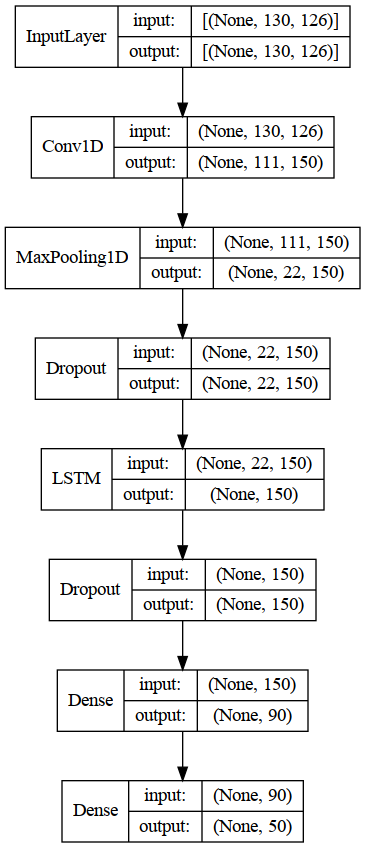

In [161]:
plot_model(reconstructed_model, show_shapes=True, show_layer_names=False)

In [162]:
reconstructed_model.evaluate(Xval,Yval)

11/11 [==============================] - 1s 8ms/step - loss: 1.1101 - f1_score: 0.8405


[1.1100751161575317, 0.8404662609100342]

In [145]:
print(classification_report(np.argmax(Yval, axis=1), np.argmax(reconstructed_model.predict(Xval), axis=1),
                            digits=3, target_names=label_map))

11/11 [==============================] - 1s 7ms/step
              precision    recall  f1-score   support

         AXE      1.000     0.750     0.857         8
    BACKPACK      0.800     0.667     0.727         6
  BASKETBALL      0.769     1.000     0.870        10
         BEE      1.000     1.000     1.000        10
        BELT      1.000     1.000     1.000         4
        BITE      0.727     1.000     0.842         8
   BREAKFAST      0.750     1.000     0.857         6
      CANCER      1.000     1.000     1.000         8
   CHRISTMAS      1.000     0.667     0.800         6
    CONFUSED      1.000     1.000     1.000         6
        DARK      1.000     1.000     1.000         4
        DEAF      1.000     1.000     1.000         6
      DECIDE      1.000     0.833     0.909         6
      DEMAND      1.000     1.000     1.000         8
     DEVELOP      0.800     0.667     0.727         6
      DINNER      0.778     0.875     0.824         8
         DOG      0.714     

In [228]:
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath='1 1DCNN + 1 LSTM Lecunnormal/',
    monitor='val_f1_score',
    mode='max',
    save_best_only=True)

In [229]:
act_function = 'selu'
initializer = tf.keras.initializers.LecunNormal(seed=10)

model = Sequential()
model.add(Conv1D(filters=150,kernel_size=20,kernel_initializer=initializer,activation=act_function,input_shape=(130,126)))
model.add(MaxPooling1D(pool_size=5))
#model.add(Dropout(.75))
model.add(LSTM(units=150,return_sequences=False,kernel_initializer=initializer,kernel_regularizer=regularizers.l2(.00022635543607274578)))
#model.add(Dropout(.3))
model.add(Dense(units=90,activation=act_function,kernel_initializer=initializer))
model.add(Dense(50, activation='softmax'))

model.compile(tf.optimizers.experimental.Nadam(.0004281203070023101),
            loss='categorical_crossentropy',
            metrics=[tfa.metrics.F1Score(num_classes=50, average='macro')])
model.summary()
History = model.fit(x=Xtrain, y=Ytrain,validation_data= (Xval,Yval), batch_size=96,epochs=500, verbose=1,callbacks=[model_checkpoint_callback])

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_9 (Conv1D)           (None, 111, 150)          378150    
                                                                 
 max_pooling1d_9 (MaxPooling  (None, 22, 150)          0         
 1D)                                                             
                                                                 
 lstm_7 (LSTM)               (None, 150)               180600    
                                                                 
 dense_20 (Dense)            (None, 90)                13590     
                                                                 
 dense_21 (Dense)            (None, 50)                4550      
                                                                 
Total params: 576,890
Trainable params: 576,890
Non-trainable params: 0
_______________________________________________

INFO:tensorflow:Assets written to: 1 1DCNN + 1 LSTM Lecunnormal/assets


INFO:tensorflow:Assets written to: 1 1DCNN + 1 LSTM Lecunnormal/assets


28/28 [==============================] - 45s 2s/step - loss: 3.9448 - f1_score: 0.0405 - val_loss: 3.7678 - val_f1_score: 0.0264
Epoch 2/500
27/28 [===========================>..] - ETA: 0s - loss: 3.4630 - f1_score: 0.1168

INFO:tensorflow:Assets written to: 1 1DCNN + 1 LSTM Lecunnormal/assets


INFO:tensorflow:Assets written to: 1 1DCNN + 1 LSTM Lecunnormal/assets


28/28 [==============================] - 9s 339ms/step - loss: 3.4579 - f1_score: 0.1167 - val_loss: 3.2289 - val_f1_score: 0.1013
Epoch 3/500
27/28 [===========================>..] - ETA: 0s - loss: 2.9288 - f1_score: 0.2296

INFO:tensorflow:Assets written to: 1 1DCNN + 1 LSTM Lecunnormal/assets


INFO:tensorflow:Assets written to: 1 1DCNN + 1 LSTM Lecunnormal/assets


28/28 [==============================] - 7s 248ms/step - loss: 2.9231 - f1_score: 0.2300 - val_loss: 2.7518 - val_f1_score: 0.2320
Epoch 4/500
27/28 [===========================>..] - ETA: 0s - loss: 2.4662 - f1_score: 0.3212

INFO:tensorflow:Assets written to: 1 1DCNN + 1 LSTM Lecunnormal/assets


INFO:tensorflow:Assets written to: 1 1DCNN + 1 LSTM Lecunnormal/assets


28/28 [==============================] - 7s 248ms/step - loss: 2.4622 - f1_score: 0.3237 - val_loss: 2.4069 - val_f1_score: 0.3373
Epoch 5/500
27/28 [===========================>..] - ETA: 0s - loss: 2.1025 - f1_score: 0.4201

INFO:tensorflow:Assets written to: 1 1DCNN + 1 LSTM Lecunnormal/assets


INFO:tensorflow:Assets written to: 1 1DCNN + 1 LSTM Lecunnormal/assets


28/28 [==============================] - 9s 321ms/step - loss: 2.1025 - f1_score: 0.4209 - val_loss: 2.1131 - val_f1_score: 0.4440
Epoch 6/500
27/28 [===========================>..] - ETA: 0s - loss: 1.8070 - f1_score: 0.5306

INFO:tensorflow:Assets written to: 1 1DCNN + 1 LSTM Lecunnormal/assets


INFO:tensorflow:Assets written to: 1 1DCNN + 1 LSTM Lecunnormal/assets


28/28 [==============================] - 11s 404ms/step - loss: 1.7988 - f1_score: 0.5327 - val_loss: 1.9158 - val_f1_score: 0.5177
Epoch 7/500
28/28 [==============================] - ETA: 0s - loss: 1.5974 - f1_score: 0.5978

INFO:tensorflow:Assets written to: 1 1DCNN + 1 LSTM Lecunnormal/assets


INFO:tensorflow:Assets written to: 1 1DCNN + 1 LSTM Lecunnormal/assets


28/28 [==============================] - 7s 272ms/step - loss: 1.5974 - f1_score: 0.5978 - val_loss: 1.7016 - val_f1_score: 0.5757
Epoch 8/500
27/28 [===========================>..] - ETA: 0s - loss: 1.3836 - f1_score: 0.6671

INFO:tensorflow:Assets written to: 1 1DCNN + 1 LSTM Lecunnormal/assets


INFO:tensorflow:Assets written to: 1 1DCNN + 1 LSTM Lecunnormal/assets


28/28 [==============================] - 8s 311ms/step - loss: 1.3829 - f1_score: 0.6689 - val_loss: 1.5794 - val_f1_score: 0.6128
Epoch 9/500
27/28 [===========================>..] - ETA: 0s - loss: 1.2344 - f1_score: 0.7017

INFO:tensorflow:Assets written to: 1 1DCNN + 1 LSTM Lecunnormal/assets


INFO:tensorflow:Assets written to: 1 1DCNN + 1 LSTM Lecunnormal/assets


28/28 [==============================] - 7s 276ms/step - loss: 1.2288 - f1_score: 0.7022 - val_loss: 1.4283 - val_f1_score: 0.6628
Epoch 10/500
27/28 [===========================>..] - ETA: 0s - loss: 1.1129 - f1_score: 0.7373

INFO:tensorflow:Assets written to: 1 1DCNN + 1 LSTM Lecunnormal/assets


INFO:tensorflow:Assets written to: 1 1DCNN + 1 LSTM Lecunnormal/assets


28/28 [==============================] - 7s 275ms/step - loss: 1.1089 - f1_score: 0.7393 - val_loss: 1.4028 - val_f1_score: 0.6759
Epoch 11/500
27/28 [===========================>..] - ETA: 0s - loss: 0.9940 - f1_score: 0.7848

INFO:tensorflow:Assets written to: 1 1DCNN + 1 LSTM Lecunnormal/assets


INFO:tensorflow:Assets written to: 1 1DCNN + 1 LSTM Lecunnormal/assets


28/28 [==============================] - 7s 264ms/step - loss: 1.0000 - f1_score: 0.7821 - val_loss: 1.3555 - val_f1_score: 0.6787
Epoch 12/500
27/28 [===========================>..] - ETA: 0s - loss: 0.9303 - f1_score: 0.7933

INFO:tensorflow:Assets written to: 1 1DCNN + 1 LSTM Lecunnormal/assets


INFO:tensorflow:Assets written to: 1 1DCNN + 1 LSTM Lecunnormal/assets


28/28 [==============================] - 7s 266ms/step - loss: 0.9234 - f1_score: 0.7944 - val_loss: 1.3080 - val_f1_score: 0.7015
Epoch 13/500
28/28 [==============================] - 1s 50ms/step - loss: 0.8199 - f1_score: 0.8253 - val_loss: 1.2402 - val_f1_score: 0.6960
Epoch 14/500
27/28 [===========================>..] - ETA: 0s - loss: 0.7436 - f1_score: 0.8463

INFO:tensorflow:Assets written to: 1 1DCNN + 1 LSTM Lecunnormal/assets


INFO:tensorflow:Assets written to: 1 1DCNN + 1 LSTM Lecunnormal/assets


28/28 [==============================] - 14s 525ms/step - loss: 0.7450 - f1_score: 0.8470 - val_loss: 1.2374 - val_f1_score: 0.7054
Epoch 15/500
27/28 [===========================>..] - ETA: 0s - loss: 0.6817 - f1_score: 0.8616

INFO:tensorflow:Assets written to: 1 1DCNN + 1 LSTM Lecunnormal/assets


INFO:tensorflow:Assets written to: 1 1DCNN + 1 LSTM Lecunnormal/assets


28/28 [==============================] - 10s 376ms/step - loss: 0.6807 - f1_score: 0.8605 - val_loss: 1.1922 - val_f1_score: 0.7202
Epoch 16/500
28/28 [==============================] - 1s 50ms/step - loss: 0.6269 - f1_score: 0.8809 - val_loss: 1.1822 - val_f1_score: 0.7080
Epoch 17/500
27/28 [===========================>..] - ETA: 0s - loss: 0.5845 - f1_score: 0.8840

INFO:tensorflow:Assets written to: 1 1DCNN + 1 LSTM Lecunnormal/assets


INFO:tensorflow:Assets written to: 1 1DCNN + 1 LSTM Lecunnormal/assets


28/28 [==============================] - 8s 310ms/step - loss: 0.5848 - f1_score: 0.8837 - val_loss: 1.1493 - val_f1_score: 0.7362
Epoch 18/500
28/28 [==============================] - 1s 50ms/step - loss: 0.5229 - f1_score: 0.9097 - val_loss: 1.1068 - val_f1_score: 0.7341
Epoch 19/500
27/28 [===========================>..] - ETA: 0s - loss: 0.4895 - f1_score: 0.9194

INFO:tensorflow:Assets written to: 1 1DCNN + 1 LSTM Lecunnormal/assets


INFO:tensorflow:Assets written to: 1 1DCNN + 1 LSTM Lecunnormal/assets


28/28 [==============================] - 7s 269ms/step - loss: 0.4876 - f1_score: 0.9202 - val_loss: 1.1431 - val_f1_score: 0.7400
Epoch 20/500
28/28 [==============================] - 1s 50ms/step - loss: 0.4376 - f1_score: 0.9302 - val_loss: 1.0736 - val_f1_score: 0.7375
Epoch 21/500
28/28 [==============================] - 1s 50ms/step - loss: 0.4076 - f1_score: 0.9392 - val_loss: 1.1011 - val_f1_score: 0.7363
Epoch 22/500
28/28 [==============================] - 1s 50ms/step - loss: 0.3885 - f1_score: 0.9493 - val_loss: 1.0763 - val_f1_score: 0.7385
Epoch 23/500
27/28 [===========================>..] - ETA: 0s - loss: 0.3583 - f1_score: 0.9514

INFO:tensorflow:Assets written to: 1 1DCNN + 1 LSTM Lecunnormal/assets


INFO:tensorflow:Assets written to: 1 1DCNN + 1 LSTM Lecunnormal/assets


28/28 [==============================] - 8s 302ms/step - loss: 0.3576 - f1_score: 0.9523 - val_loss: 1.0418 - val_f1_score: 0.7492
Epoch 24/500
28/28 [==============================] - 1s 50ms/step - loss: 0.3257 - f1_score: 0.9593 - val_loss: 1.0800 - val_f1_score: 0.7476
Epoch 25/500
27/28 [===========================>..] - ETA: 0s - loss: 0.2955 - f1_score: 0.9690

INFO:tensorflow:Assets written to: 1 1DCNN + 1 LSTM Lecunnormal/assets


INFO:tensorflow:Assets written to: 1 1DCNN + 1 LSTM Lecunnormal/assets


28/28 [==============================] - 7s 259ms/step - loss: 0.2966 - f1_score: 0.9688 - val_loss: 1.0102 - val_f1_score: 0.7635
Epoch 26/500
28/28 [==============================] - 1s 50ms/step - loss: 0.2734 - f1_score: 0.9726 - val_loss: 1.0824 - val_f1_score: 0.7340
Epoch 27/500
27/28 [===========================>..] - ETA: 0s - loss: 0.2481 - f1_score: 0.9816

INFO:tensorflow:Assets written to: 1 1DCNN + 1 LSTM Lecunnormal/assets


INFO:tensorflow:Assets written to: 1 1DCNN + 1 LSTM Lecunnormal/assets


28/28 [==============================] - 10s 377ms/step - loss: 0.2480 - f1_score: 0.9818 - val_loss: 1.0490 - val_f1_score: 0.7714
Epoch 28/500
28/28 [==============================] - 1s 50ms/step - loss: 0.2391 - f1_score: 0.9815 - val_loss: 1.0278 - val_f1_score: 0.7383
Epoch 29/500
28/28 [==============================] - 1s 50ms/step - loss: 0.2197 - f1_score: 0.9908 - val_loss: 1.0238 - val_f1_score: 0.7557
Epoch 30/500
28/28 [==============================] - 1s 50ms/step - loss: 0.1997 - f1_score: 0.9931 - val_loss: 1.0048 - val_f1_score: 0.7571
Epoch 31/500
28/28 [==============================] - 1s 50ms/step - loss: 0.1889 - f1_score: 0.9949 - val_loss: 1.0212 - val_f1_score: 0.7711
Epoch 32/500
28/28 [==============================] - 1s 50ms/step - loss: 0.1772 - f1_score: 0.9974 - val_loss: 1.0196 - val_f1_score: 0.7538
Epoch 33/500
28/28 [==============================] - 1s 51ms/step - loss: 0.1693 - f1_score: 0.9970 - val_loss: 1.0116 - val_f1_score: 0.7561
Epoch 34/5

INFO:tensorflow:Assets written to: 1 1DCNN + 1 LSTM Lecunnormal/assets


INFO:tensorflow:Assets written to: 1 1DCNN + 1 LSTM Lecunnormal/assets


28/28 [==============================] - 9s 323ms/step - loss: 0.1602 - f1_score: 0.9978 - val_loss: 1.0070 - val_f1_score: 0.7737
Epoch 35/500
27/28 [===========================>..] - ETA: 0s - loss: 0.1507 - f1_score: 0.9988

INFO:tensorflow:Assets written to: 1 1DCNN + 1 LSTM Lecunnormal/assets


INFO:tensorflow:Assets written to: 1 1DCNN + 1 LSTM Lecunnormal/assets


28/28 [==============================] - 8s 282ms/step - loss: 0.1503 - f1_score: 0.9989 - val_loss: 0.9986 - val_f1_score: 0.7867
Epoch 36/500
28/28 [==============================] - 1s 50ms/step - loss: 0.1442 - f1_score: 0.9982 - val_loss: 0.9923 - val_f1_score: 0.7840
Epoch 37/500
28/28 [==============================] - 1s 50ms/step - loss: 0.1402 - f1_score: 0.9990 - val_loss: 1.0376 - val_f1_score: 0.7758
Epoch 38/500
28/28 [==============================] - 1s 50ms/step - loss: 0.1434 - f1_score: 0.9978 - val_loss: 1.0185 - val_f1_score: 0.7652
Epoch 39/500
28/28 [==============================] - 1s 50ms/step - loss: 0.1344 - f1_score: 0.9993 - val_loss: 1.0181 - val_f1_score: 0.7588
Epoch 40/500
28/28 [==============================] - 1s 50ms/step - loss: 0.1272 - f1_score: 1.0000 - val_loss: 0.9937 - val_f1_score: 0.7852
Epoch 41/500
28/28 [==============================] - 1s 50ms/step - loss: 0.1213 - f1_score: 0.9996 - val_loss: 0.9828 - val_f1_score: 0.7836
Epoch 42/50

INFO:tensorflow:Assets written to: 1 1DCNN + 1 LSTM Lecunnormal/assets


INFO:tensorflow:Assets written to: 1 1DCNN + 1 LSTM Lecunnormal/assets


28/28 [==============================] - 8s 306ms/step - loss: 0.1080 - f1_score: 1.0000 - val_loss: 1.0059 - val_f1_score: 0.7907
Epoch 46/500
28/28 [==============================] - 1s 50ms/step - loss: 0.1053 - f1_score: 1.0000 - val_loss: 1.0172 - val_f1_score: 0.7765
Epoch 47/500
28/28 [==============================] - 1s 50ms/step - loss: 0.1030 - f1_score: 1.0000 - val_loss: 0.9786 - val_f1_score: 0.7854
Epoch 48/500
28/28 [==============================] - 1s 50ms/step - loss: 0.1010 - f1_score: 1.0000 - val_loss: 1.0028 - val_f1_score: 0.7799
Epoch 49/500
28/28 [==============================] - 1s 50ms/step - loss: 0.0989 - f1_score: 1.0000 - val_loss: 0.9806 - val_f1_score: 0.7888
Epoch 50/500
28/28 [==============================] - 1s 50ms/step - loss: 0.0974 - f1_score: 1.0000 - val_loss: 0.9916 - val_f1_score: 0.7885
Epoch 51/500
28/28 [==============================] - 1s 51ms/step - loss: 0.0953 - f1_score: 1.0000 - val_loss: 1.0053 - val_f1_score: 0.7805
Epoch 52/50

INFO:tensorflow:Assets written to: 1 1DCNN + 1 LSTM Lecunnormal/assets


INFO:tensorflow:Assets written to: 1 1DCNN + 1 LSTM Lecunnormal/assets


28/28 [==============================] - 12s 426ms/step - loss: 0.0917 - f1_score: 1.0000 - val_loss: 1.0007 - val_f1_score: 0.7957
Epoch 54/500
28/28 [==============================] - 1s 51ms/step - loss: 0.0899 - f1_score: 1.0000 - val_loss: 0.9985 - val_f1_score: 0.7829
Epoch 55/500
28/28 [==============================] - 1s 50ms/step - loss: 0.0884 - f1_score: 1.0000 - val_loss: 0.9935 - val_f1_score: 0.7757
Epoch 56/500
28/28 [==============================] - 1s 50ms/step - loss: 0.0867 - f1_score: 1.0000 - val_loss: 0.9837 - val_f1_score: 0.7907
Epoch 57/500
28/28 [==============================] - 1s 50ms/step - loss: 0.0853 - f1_score: 1.0000 - val_loss: 0.9883 - val_f1_score: 0.7917
Epoch 58/500
28/28 [==============================] - 1s 51ms/step - loss: 0.0838 - f1_score: 1.0000 - val_loss: 1.0058 - val_f1_score: 0.7858
Epoch 59/500
28/28 [==============================] - 1s 53ms/step - loss: 0.0825 - f1_score: 1.0000 - val_loss: 1.0097 - val_f1_score: 0.7875
Epoch 60/5

INFO:tensorflow:Assets written to: 1 1DCNN + 1 LSTM Lecunnormal/assets


INFO:tensorflow:Assets written to: 1 1DCNN + 1 LSTM Lecunnormal/assets


28/28 [==============================] - 10s 384ms/step - loss: 0.0784 - f1_score: 1.0000 - val_loss: 0.9924 - val_f1_score: 0.7965
Epoch 63/500
28/28 [==============================] - 1s 51ms/step - loss: 0.0772 - f1_score: 1.0000 - val_loss: 1.0161 - val_f1_score: 0.7876
Epoch 64/500
28/28 [==============================] - 1s 51ms/step - loss: 0.0760 - f1_score: 1.0000 - val_loss: 1.0026 - val_f1_score: 0.7849
Epoch 65/500
28/28 [==============================] - 1s 51ms/step - loss: 0.0747 - f1_score: 1.0000 - val_loss: 0.9881 - val_f1_score: 0.7897
Epoch 66/500
28/28 [==============================] - 1s 50ms/step - loss: 0.0736 - f1_score: 1.0000 - val_loss: 0.9944 - val_f1_score: 0.7852
Epoch 67/500
28/28 [==============================] - 1s 51ms/step - loss: 0.0724 - f1_score: 1.0000 - val_loss: 0.9945 - val_f1_score: 0.7881
Epoch 68/500
28/28 [==============================] - 1s 51ms/step - loss: 0.0713 - f1_score: 1.0000 - val_loss: 1.0142 - val_f1_score: 0.7909
Epoch 69/5

INFO:tensorflow:Assets written to: 1 1DCNN + 1 LSTM Lecunnormal/assets


INFO:tensorflow:Assets written to: 1 1DCNN + 1 LSTM Lecunnormal/assets


28/28 [==============================] - 8s 313ms/step - loss: 0.0692 - f1_score: 1.0000 - val_loss: 1.0066 - val_f1_score: 0.8012
Epoch 71/500
28/28 [==============================] - 1s 51ms/step - loss: 0.0682 - f1_score: 1.0000 - val_loss: 1.0135 - val_f1_score: 0.7796
Epoch 72/500
28/28 [==============================] - 1s 50ms/step - loss: 0.0671 - f1_score: 1.0000 - val_loss: 0.9981 - val_f1_score: 0.7966
Epoch 73/500
28/28 [==============================] - 1s 50ms/step - loss: 0.0662 - f1_score: 1.0000 - val_loss: 1.0134 - val_f1_score: 0.7972
Epoch 74/500
28/28 [==============================] - 1s 50ms/step - loss: 0.0652 - f1_score: 1.0000 - val_loss: 1.0171 - val_f1_score: 0.7772
Epoch 75/500
28/28 [==============================] - 1s 50ms/step - loss: 0.0643 - f1_score: 1.0000 - val_loss: 1.0086 - val_f1_score: 0.7996
Epoch 76/500
28/28 [==============================] - 1s 51ms/step - loss: 0.0633 - f1_score: 1.0000 - val_loss: 1.0103 - val_f1_score: 0.7938
Epoch 77/50

INFO:tensorflow:Assets written to: 1 1DCNN + 1 LSTM Lecunnormal/assets


INFO:tensorflow:Assets written to: 1 1DCNN + 1 LSTM Lecunnormal/assets


28/28 [==============================] - 10s 376ms/step - loss: 0.0377 - f1_score: 1.0000 - val_loss: 1.0682 - val_f1_score: 0.8033
Epoch 116/500
28/28 [==============================] - 1s 51ms/step - loss: 0.0372 - f1_score: 1.0000 - val_loss: 1.0651 - val_f1_score: 0.7911
Epoch 117/500
28/28 [==============================] - 1s 50ms/step - loss: 0.0367 - f1_score: 1.0000 - val_loss: 1.0509 - val_f1_score: 0.7917
Epoch 118/500
28/28 [==============================] - 1s 51ms/step - loss: 0.0363 - f1_score: 1.0000 - val_loss: 1.0711 - val_f1_score: 0.7973
Epoch 119/500
28/28 [==============================] - 1s 51ms/step - loss: 0.0358 - f1_score: 1.0000 - val_loss: 1.0689 - val_f1_score: 0.7978
Epoch 120/500
28/28 [==============================] - 1s 51ms/step - loss: 0.0354 - f1_score: 1.0000 - val_loss: 1.0591 - val_f1_score: 0.7898
Epoch 121/500
28/28 [==============================] - 1s 51ms/step - loss: 0.0350 - f1_score: 1.0000 - val_loss: 1.0458 - val_f1_score: 0.7995
Epoc

INFO:tensorflow:Assets written to: 1 1DCNN + 1 LSTM Lecunnormal/assets


INFO:tensorflow:Assets written to: 1 1DCNN + 1 LSTM Lecunnormal/assets


28/28 [==============================] - 10s 352ms/step - loss: 0.0333 - f1_score: 1.0000 - val_loss: 1.0590 - val_f1_score: 0.8060
Epoch 126/500
28/28 [==============================] - 1s 51ms/step - loss: 0.0329 - f1_score: 1.0000 - val_loss: 1.0687 - val_f1_score: 0.7919
Epoch 127/500
28/28 [==============================] - 1s 50ms/step - loss: 0.0325 - f1_score: 1.0000 - val_loss: 1.0819 - val_f1_score: 0.7949
Epoch 128/500
28/28 [==============================] - 1s 52ms/step - loss: 0.0322 - f1_score: 1.0000 - val_loss: 1.0927 - val_f1_score: 0.7863
Epoch 129/500
28/28 [==============================] - 1s 51ms/step - loss: 0.0318 - f1_score: 1.0000 - val_loss: 1.0683 - val_f1_score: 0.7967
Epoch 130/500
28/28 [==============================] - 1s 51ms/step - loss: 0.0314 - f1_score: 1.0000 - val_loss: 1.0876 - val_f1_score: 0.8029
Epoch 131/500
28/28 [==============================] - 1s 51ms/step - loss: 0.0310 - f1_score: 1.0000 - val_loss: 1.0716 - val_f1_score: 0.7999
Epoc

Epoch 182/500
28/28 [==============================] - 1s 53ms/step - loss: 0.0392 - f1_score: 1.0000 - val_loss: 1.3409 - val_f1_score: 0.7543
Epoch 183/500
28/28 [==============================] - 1s 52ms/step - loss: 0.0389 - f1_score: 1.0000 - val_loss: 1.3206 - val_f1_score: 0.7607
Epoch 184/500
28/28 [==============================] - 1s 53ms/step - loss: 0.0385 - f1_score: 1.0000 - val_loss: 1.3153 - val_f1_score: 0.7720
Epoch 185/500
28/28 [==============================] - 1s 53ms/step - loss: 0.0381 - f1_score: 1.0000 - val_loss: 1.3277 - val_f1_score: 0.7773
Epoch 186/500
28/28 [==============================] - 1s 52ms/step - loss: 0.0378 - f1_score: 1.0000 - val_loss: 1.3375 - val_f1_score: 0.7683
Epoch 187/500
28/28 [==============================] - 1s 53ms/step - loss: 0.0375 - f1_score: 1.0000 - val_loss: 1.3316 - val_f1_score: 0.7764
Epoch 188/500
28/28 [==============================] - 1s 53ms/step - loss: 0.0371 - f1_score: 1.0000 - val_loss: 1.3354 - val_f1_score:

Epoch 239/500
28/28 [==============================] - 1s 53ms/step - loss: 0.0259 - f1_score: 1.0000 - val_loss: 1.4607 - val_f1_score: 0.7614
Epoch 240/500
28/28 [==============================] - 1s 53ms/step - loss: 0.0257 - f1_score: 1.0000 - val_loss: 1.4557 - val_f1_score: 0.7633
Epoch 241/500
28/28 [==============================] - 1s 53ms/step - loss: 0.0255 - f1_score: 1.0000 - val_loss: 1.4672 - val_f1_score: 0.7664
Epoch 242/500
28/28 [==============================] - 1s 53ms/step - loss: 0.0254 - f1_score: 1.0000 - val_loss: 1.4609 - val_f1_score: 0.7622
Epoch 243/500
28/28 [==============================] - 1s 53ms/step - loss: 0.0252 - f1_score: 1.0000 - val_loss: 1.4693 - val_f1_score: 0.7673
Epoch 244/500
28/28 [==============================] - 1s 53ms/step - loss: 0.0250 - f1_score: 1.0000 - val_loss: 1.4772 - val_f1_score: 0.7610
Epoch 245/500
28/28 [==============================] - 1s 52ms/step - loss: 0.0248 - f1_score: 1.0000 - val_loss: 1.4645 - val_f1_score:

Epoch 296/500
28/28 [==============================] - 2s 55ms/step - loss: 0.0600 - f1_score: 0.9988 - val_loss: 1.5539 - val_f1_score: 0.7205
Epoch 297/500
28/28 [==============================] - 1s 53ms/step - loss: 0.0575 - f1_score: 0.9976 - val_loss: 1.4565 - val_f1_score: 0.7414
Epoch 298/500
28/28 [==============================] - 2s 54ms/step - loss: 0.0503 - f1_score: 0.9992 - val_loss: 1.5614 - val_f1_score: 0.7529
Epoch 299/500
28/28 [==============================] - 1s 53ms/step - loss: 0.0437 - f1_score: 1.0000 - val_loss: 1.5556 - val_f1_score: 0.7524
Epoch 300/500
28/28 [==============================] - 2s 54ms/step - loss: 0.0399 - f1_score: 1.0000 - val_loss: 1.5669 - val_f1_score: 0.7419
Epoch 301/500
28/28 [==============================] - 1s 54ms/step - loss: 0.0374 - f1_score: 1.0000 - val_loss: 1.5499 - val_f1_score: 0.7518
Epoch 302/500
28/28 [==============================] - 2s 54ms/step - loss: 0.0358 - f1_score: 1.0000 - val_loss: 1.5867 - val_f1_score:

Epoch 353/500
28/28 [==============================] - 2s 54ms/step - loss: 0.0214 - f1_score: 1.0000 - val_loss: 1.7167 - val_f1_score: 0.7509
Epoch 354/500
28/28 [==============================] - 1s 53ms/step - loss: 0.0213 - f1_score: 1.0000 - val_loss: 1.7145 - val_f1_score: 0.7447
Epoch 355/500
28/28 [==============================] - 1s 53ms/step - loss: 0.0212 - f1_score: 1.0000 - val_loss: 1.7174 - val_f1_score: 0.7511
Epoch 356/500
28/28 [==============================] - 1s 53ms/step - loss: 0.0210 - f1_score: 1.0000 - val_loss: 1.7034 - val_f1_score: 0.7413
Epoch 357/500
28/28 [==============================] - 1s 53ms/step - loss: 0.0209 - f1_score: 1.0000 - val_loss: 1.6981 - val_f1_score: 0.7443
Epoch 358/500
28/28 [==============================] - 1s 53ms/step - loss: 0.0208 - f1_score: 1.0000 - val_loss: 1.7023 - val_f1_score: 0.7509
Epoch 359/500
28/28 [==============================] - 1s 53ms/step - loss: 0.0207 - f1_score: 1.0000 - val_loss: 1.7188 - val_f1_score:

Epoch 410/500
28/28 [==============================] - 1s 54ms/step - loss: 0.0147 - f1_score: 1.0000 - val_loss: 1.7837 - val_f1_score: 0.7542
Epoch 411/500
28/28 [==============================] - 1s 53ms/step - loss: 0.0146 - f1_score: 1.0000 - val_loss: 1.7729 - val_f1_score: 0.7541
Epoch 412/500
28/28 [==============================] - 1s 53ms/step - loss: 0.0145 - f1_score: 1.0000 - val_loss: 1.7799 - val_f1_score: 0.7526
Epoch 413/500
28/28 [==============================] - 2s 54ms/step - loss: 0.0144 - f1_score: 1.0000 - val_loss: 1.7726 - val_f1_score: 0.7544
Epoch 414/500
28/28 [==============================] - 2s 54ms/step - loss: 0.0143 - f1_score: 1.0000 - val_loss: 1.7728 - val_f1_score: 0.7533
Epoch 415/500
28/28 [==============================] - 1s 53ms/step - loss: 0.0142 - f1_score: 1.0000 - val_loss: 1.7976 - val_f1_score: 0.7447
Epoch 416/500
28/28 [==============================] - 2s 55ms/step - loss: 0.0141 - f1_score: 1.0000 - val_loss: 1.7843 - val_f1_score:

Epoch 467/500
28/28 [==============================] - 2s 56ms/step - loss: 0.0222 - f1_score: 1.0000 - val_loss: 1.5403 - val_f1_score: 0.7581
Epoch 468/500
28/28 [==============================] - 2s 56ms/step - loss: 0.0217 - f1_score: 1.0000 - val_loss: 1.5728 - val_f1_score: 0.7650
Epoch 469/500
28/28 [==============================] - 2s 57ms/step - loss: 0.0214 - f1_score: 1.0000 - val_loss: 1.5314 - val_f1_score: 0.7588
Epoch 470/500
28/28 [==============================] - 2s 56ms/step - loss: 0.0210 - f1_score: 1.0000 - val_loss: 1.5468 - val_f1_score: 0.7607
Epoch 471/500
28/28 [==============================] - 2s 56ms/step - loss: 0.0207 - f1_score: 1.0000 - val_loss: 1.5747 - val_f1_score: 0.7580
Epoch 472/500
28/28 [==============================] - 2s 56ms/step - loss: 0.0204 - f1_score: 1.0000 - val_loss: 1.5955 - val_f1_score: 0.7559
Epoch 473/500
28/28 [==============================] - 2s 56ms/step - loss: 0.0202 - f1_score: 1.0000 - val_loss: 1.5931 - val_f1_score:

In [230]:
print(classification_report(np.argmax(Yval, axis=1), np.argmax(model.predict(Xval), axis=1),
                            digits=3, target_names=label_map))

11/11 [==============================] - 1s 9ms/step
              precision    recall  f1-score   support

         AXE      0.750     0.750     0.750         8
    BACKPACK      1.000     0.667     0.800         6
  BASKETBALL      0.909     1.000     0.952        10
         BEE      1.000     0.700     0.824        10
        BELT      0.667     0.500     0.571         4
        BITE      0.800     1.000     0.889         8
   BREAKFAST      0.556     0.833     0.667         6
      CANCER      0.778     0.875     0.824         8
   CHRISTMAS      0.714     0.833     0.769         6
    CONFUSED      0.800     0.667     0.727         6
        DARK      1.000     1.000     1.000         4
        DEAF      1.000     1.000     1.000         6
      DECIDE      1.000     0.667     0.800         6
      DEMAND      0.714     0.625     0.667         8
     DEVELOP      0.667     0.667     0.667         6
      DINNER      0.417     0.625     0.500         8
         DOG      0.833     

In [231]:
# convert the history.history dict to a pandas DataFrame:     
hist_df = pd.DataFrame(History.history) 

# or save to csv: 
hist_csv_file = '1 1DCNN + 1 LSTM Lecunnormal/history.csv'
with open(hist_csv_file, mode='w') as f:
    hist_df.to_csv(f)

In [232]:
hist_df.tail()

loss  f1_score  val_loss  val_f1_score
495  0.016655       1.0  1.669599      0.769092
496  0.016552       1.0  1.663396      0.768292
497  0.016456       1.0  1.684232      0.768520
498  0.016352       1.0  1.690435      0.768330
499  0.016248       1.0  1.684348      0.770538

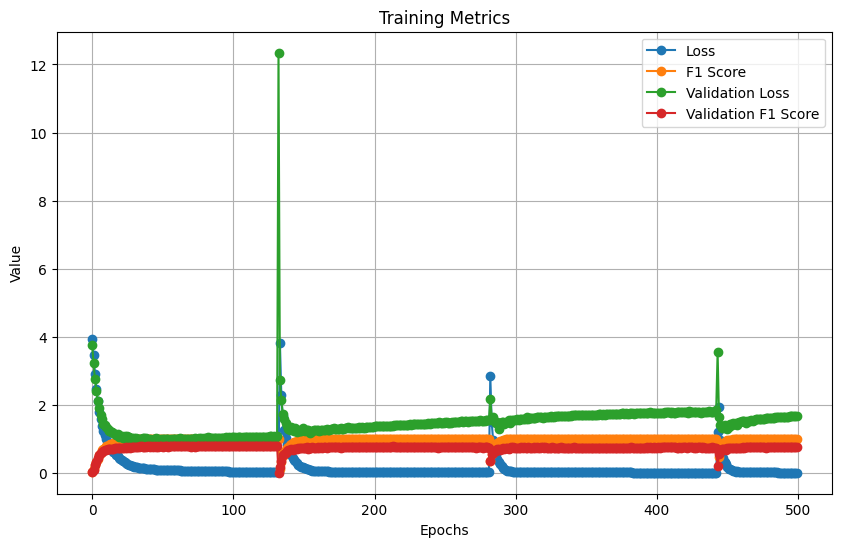

In [233]:
# Plotting
import matplotlib.pyplot as plt
epochs = range(0, 500)
plt.figure(figsize=(10, 6))
plt.plot(epochs, hist_df.loss, marker='o', label='Loss')
plt.plot(epochs, hist_df.f1_score, marker='o', label='F1 Score')
plt.plot(epochs, hist_df.val_loss, marker='o', label='Validation Loss')
plt.plot(epochs, hist_df.val_f1_score, marker='o', label='Validation F1 Score')
plt.title('Training Metrics')
plt.xlabel('Epochs')
plt.ylabel('Value')
plt.legend()
plt.grid()
plt.show()

In [163]:
reconstructed_model = tf.keras.models.load_model("1 1DCNN + 1 LSTM Lecunnormal")

In [164]:
reconstructed_model.evaluate(Xval,Yval)

11/11 [==============================] - 1s 8ms/step - loss: 1.0590 - f1_score: 0.8060


[1.0590380430221558, 0.805988609790802]

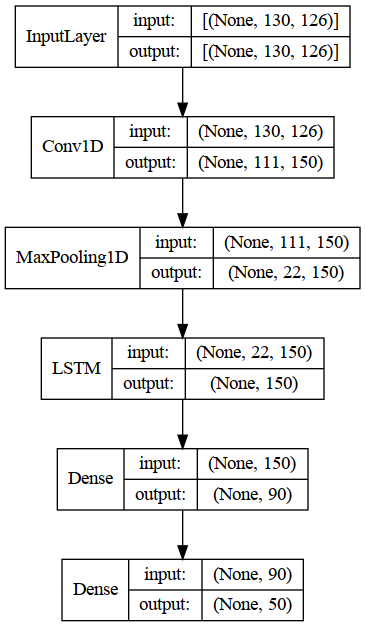

In [165]:
plot_model(reconstructed_model, show_shapes=True, show_layer_names=False)

In [166]:
reconstructed_model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_9 (Conv1D)           (None, 111, 150)          378150    
                                                                 
 max_pooling1d_9 (MaxPooling  (None, 22, 150)          0         
 1D)                                                             
                                                                 
 lstm_7 (LSTM)               (None, 150)               180600    
                                                                 
 dense_20 (Dense)            (None, 90)                13590     
                                                                 
 dense_21 (Dense)            (None, 50)                4550      
                                                                 
Total params: 576,890
Trainable params: 576,890
Non-trainable params: 0
_______________________________________________

In [167]:
print(classification_report(np.argmax(Yval, axis=1), np.argmax(reconstructed_model.predict(Xval), axis=1),
                            digits=3, target_names=label_map))

11/11 [==============================] - 0s 7ms/step
              precision    recall  f1-score   support

         AXE      0.857     0.750     0.800         8
    BACKPACK      0.857     1.000     0.923         6
  BASKETBALL      0.769     1.000     0.870        10
         BEE      0.875     0.700     0.778        10
        BELT      0.667     1.000     0.800         4
        BITE      0.800     1.000     0.889         8
   BREAKFAST      0.667     1.000     0.800         6
      CANCER      1.000     1.000     1.000         8
   CHRISTMAS      1.000     0.500     0.667         6
    CONFUSED      0.600     1.000     0.750         6
        DARK      1.000     1.000     1.000         4
        DEAF      0.750     1.000     0.857         6
      DECIDE      1.000     0.833     0.909         6
      DEMAND      0.875     0.875     0.875         8
     DEVELOP      0.667     1.000     0.800         6
      DINNER      0.833     0.625     0.714         8
         DOG      1.000     

In [163]:
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath='1 1DCNN + 1 LSTM Mish/',
    monitor='val_f1_score',
    mode='max',
    save_best_only=True)

In [164]:
act_function = mish
#initializer = tf.keras.initializers.LecunNormal(seed=10)

model = Sequential()
model.add(Conv1D(filters=150,kernel_size=20,activation=act_function,input_shape=(130,126)))
model.add(MaxPooling1D(pool_size=5))
model.add(Dropout(.75))
model.add(LSTM(units=150,return_sequences=False,kernel_regularizer=regularizers.l2(.00022635543607274578)))
model.add(Dropout(.3))
model.add(Dense(units=90,activation=act_function))
model.add(Dense(50, activation='softmax'))

model.compile(tf.optimizers.experimental.Nadam(.0004281203070023101),
            loss='categorical_crossentropy',
            metrics=[tfa.metrics.F1Score(num_classes=50, average='macro')])
model.summary()
History = model.fit(x=Xtrain, y=Ytrain,validation_data= (Xval,Yval), batch_size=96,epochs=500, verbose=1,callbacks=[model_checkpoint_callback])

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_6 (Conv1D)           (None, 111, 150)          378150    
                                                                 
 max_pooling1d_6 (MaxPooling  (None, 22, 150)          0         
 1D)                                                             
                                                                 
 dropout_12 (Dropout)        (None, 22, 150)           0         
                                                                 
 lstm (LSTM)                 (None, 150)               180600    
                                                                 
 dropout_13 (Dropout)        (None, 150)               0         
                                                                 
 dense_12 (Dense)            (None, 90)                13590     
                                                      

INFO:tensorflow:Assets written to: 1 1DCNN + 1 LSTM Mish/assets


INFO:tensorflow:Assets written to: 1 1DCNN + 1 LSTM Mish/assets


28/28 [==============================] - 18s 494ms/step - loss: 3.9490 - f1_score: 0.0210 - val_loss: 3.8914 - val_f1_score: 0.0145
Epoch 2/500
27/28 [===========================>..] - ETA: 0s - loss: 3.7998 - f1_score: 0.0314

INFO:tensorflow:Assets written to: 1 1DCNN + 1 LSTM Mish/assets


INFO:tensorflow:Assets written to: 1 1DCNN + 1 LSTM Mish/assets


28/28 [==============================] - 10s 350ms/step - loss: 3.7971 - f1_score: 0.0320 - val_loss: 3.6063 - val_f1_score: 0.0401
Epoch 3/500
27/28 [===========================>..] - ETA: 0s - loss: 3.4972 - f1_score: 0.0538

INFO:tensorflow:Assets written to: 1 1DCNN + 1 LSTM Mish/assets


INFO:tensorflow:Assets written to: 1 1DCNN + 1 LSTM Mish/assets


28/28 [==============================] - 10s 360ms/step - loss: 3.4933 - f1_score: 0.0539 - val_loss: 3.2422 - val_f1_score: 0.0580
Epoch 4/500
27/28 [===========================>..] - ETA: 0s - loss: 3.2196 - f1_score: 0.0869

INFO:tensorflow:Assets written to: 1 1DCNN + 1 LSTM Mish/assets


INFO:tensorflow:Assets written to: 1 1DCNN + 1 LSTM Mish/assets


28/28 [==============================] - 9s 339ms/step - loss: 3.2128 - f1_score: 0.0881 - val_loss: 2.9598 - val_f1_score: 0.1377
Epoch 5/500
27/28 [===========================>..] - ETA: 0s - loss: 2.9440 - f1_score: 0.1451

INFO:tensorflow:Assets written to: 1 1DCNN + 1 LSTM Mish/assets


INFO:tensorflow:Assets written to: 1 1DCNN + 1 LSTM Mish/assets


28/28 [==============================] - 9s 327ms/step - loss: 2.9433 - f1_score: 0.1489 - val_loss: 2.6644 - val_f1_score: 0.2086
Epoch 6/500
27/28 [===========================>..] - ETA: 0s - loss: 2.7247 - f1_score: 0.2009

INFO:tensorflow:Assets written to: 1 1DCNN + 1 LSTM Mish/assets


INFO:tensorflow:Assets written to: 1 1DCNN + 1 LSTM Mish/assets


28/28 [==============================] - 8s 307ms/step - loss: 2.7206 - f1_score: 0.2000 - val_loss: 2.5078 - val_f1_score: 0.2629
Epoch 7/500
27/28 [===========================>..] - ETA: 0s - loss: 2.5239 - f1_score: 0.2457

INFO:tensorflow:Assets written to: 1 1DCNN + 1 LSTM Mish/assets


INFO:tensorflow:Assets written to: 1 1DCNN + 1 LSTM Mish/assets


28/28 [==============================] - 10s 353ms/step - loss: 2.5219 - f1_score: 0.2454 - val_loss: 2.3400 - val_f1_score: 0.3403
Epoch 8/500
28/28 [==============================] - 2s 54ms/step - loss: 2.3271 - f1_score: 0.2945 - val_loss: 2.2101 - val_f1_score: 0.3302
Epoch 9/500
27/28 [===========================>..] - ETA: 0s - loss: 2.1968 - f1_score: 0.3382

INFO:tensorflow:Assets written to: 1 1DCNN + 1 LSTM Mish/assets


INFO:tensorflow:Assets written to: 1 1DCNN + 1 LSTM Mish/assets


28/28 [==============================] - 9s 339ms/step - loss: 2.1955 - f1_score: 0.3383 - val_loss: 2.0486 - val_f1_score: 0.3948
Epoch 10/500
27/28 [===========================>..] - ETA: 0s - loss: 2.0342 - f1_score: 0.3890

INFO:tensorflow:Assets written to: 1 1DCNN + 1 LSTM Mish/assets


INFO:tensorflow:Assets written to: 1 1DCNN + 1 LSTM Mish/assets


28/28 [==============================] - 9s 338ms/step - loss: 2.0272 - f1_score: 0.3910 - val_loss: 1.9209 - val_f1_score: 0.4336
Epoch 11/500
27/28 [===========================>..] - ETA: 0s - loss: 1.9173 - f1_score: 0.4152

INFO:tensorflow:Assets written to: 1 1DCNN + 1 LSTM Mish/assets


INFO:tensorflow:Assets written to: 1 1DCNN + 1 LSTM Mish/assets


28/28 [==============================] - 11s 400ms/step - loss: 1.9209 - f1_score: 0.4143 - val_loss: 1.8229 - val_f1_score: 0.5030
Epoch 12/500
27/28 [===========================>..] - ETA: 0s - loss: 1.8077 - f1_score: 0.4495

INFO:tensorflow:Assets written to: 1 1DCNN + 1 LSTM Mish/assets


INFO:tensorflow:Assets written to: 1 1DCNN + 1 LSTM Mish/assets


28/28 [==============================] - 9s 327ms/step - loss: 1.7980 - f1_score: 0.4517 - val_loss: 1.7173 - val_f1_score: 0.5363
Epoch 13/500
27/28 [===========================>..] - ETA: 0s - loss: 1.7013 - f1_score: 0.4874

INFO:tensorflow:Assets written to: 1 1DCNN + 1 LSTM Mish/assets


INFO:tensorflow:Assets written to: 1 1DCNN + 1 LSTM Mish/assets


28/28 [==============================] - 9s 331ms/step - loss: 1.6997 - f1_score: 0.4872 - val_loss: 1.6673 - val_f1_score: 0.5624
Epoch 14/500
28/28 [==============================] - 2s 54ms/step - loss: 1.6211 - f1_score: 0.5107 - val_loss: 1.5914 - val_f1_score: 0.5595
Epoch 15/500
27/28 [===========================>..] - ETA: 0s - loss: 1.5579 - f1_score: 0.5426

INFO:tensorflow:Assets written to: 1 1DCNN + 1 LSTM Mish/assets


INFO:tensorflow:Assets written to: 1 1DCNN + 1 LSTM Mish/assets


28/28 [==============================] - 9s 329ms/step - loss: 1.5555 - f1_score: 0.5433 - val_loss: 1.4807 - val_f1_score: 0.6120
Epoch 16/500
28/28 [==============================] - 2s 55ms/step - loss: 1.5041 - f1_score: 0.5554 - val_loss: 1.5114 - val_f1_score: 0.6097
Epoch 17/500
28/28 [==============================] - 2s 55ms/step - loss: 1.3992 - f1_score: 0.5860 - val_loss: 1.4511 - val_f1_score: 0.5864
Epoch 18/500
27/28 [===========================>..] - ETA: 0s - loss: 1.3385 - f1_score: 0.5990

INFO:tensorflow:Assets written to: 1 1DCNN + 1 LSTM Mish/assets


INFO:tensorflow:Assets written to: 1 1DCNN + 1 LSTM Mish/assets


28/28 [==============================] - 9s 341ms/step - loss: 1.3374 - f1_score: 0.5977 - val_loss: 1.3512 - val_f1_score: 0.6649
Epoch 19/500
28/28 [==============================] - 2s 55ms/step - loss: 1.2802 - f1_score: 0.6263 - val_loss: 1.4477 - val_f1_score: 0.6273
Epoch 20/500
27/28 [===========================>..] - ETA: 0s - loss: 1.2398 - f1_score: 0.6277

INFO:tensorflow:Assets written to: 1 1DCNN + 1 LSTM Mish/assets


INFO:tensorflow:Assets written to: 1 1DCNN + 1 LSTM Mish/assets


28/28 [==============================] - 9s 318ms/step - loss: 1.2428 - f1_score: 0.6275 - val_loss: 1.3043 - val_f1_score: 0.6744
Epoch 21/500
28/28 [==============================] - 2s 56ms/step - loss: 1.1736 - f1_score: 0.6582 - val_loss: 1.2575 - val_f1_score: 0.6563
Epoch 22/500
27/28 [===========================>..] - ETA: 0s - loss: 1.1658 - f1_score: 0.6491

INFO:tensorflow:Assets written to: 1 1DCNN + 1 LSTM Mish/assets


INFO:tensorflow:Assets written to: 1 1DCNN + 1 LSTM Mish/assets


28/28 [==============================] - 10s 382ms/step - loss: 1.1698 - f1_score: 0.6483 - val_loss: 1.2881 - val_f1_score: 0.6868
Epoch 23/500
28/28 [==============================] - 2s 54ms/step - loss: 1.1301 - f1_score: 0.6730 - val_loss: 1.2837 - val_f1_score: 0.6758
Epoch 24/500
28/28 [==============================] - 2s 54ms/step - loss: 1.1044 - f1_score: 0.6858 - val_loss: 1.2306 - val_f1_score: 0.6695
Epoch 25/500
27/28 [===========================>..] - ETA: 0s - loss: 1.0787 - f1_score: 0.6767

INFO:tensorflow:Assets written to: 1 1DCNN + 1 LSTM Mish/assets


INFO:tensorflow:Assets written to: 1 1DCNN + 1 LSTM Mish/assets


28/28 [==============================] - 10s 356ms/step - loss: 1.0748 - f1_score: 0.6787 - val_loss: 1.2164 - val_f1_score: 0.7083
Epoch 26/500
28/28 [==============================] - 2s 54ms/step - loss: 1.0153 - f1_score: 0.7011 - val_loss: 1.2163 - val_f1_score: 0.6981
Epoch 27/500
27/28 [===========================>..] - ETA: 0s - loss: 1.0225 - f1_score: 0.7011

INFO:tensorflow:Assets written to: 1 1DCNN + 1 LSTM Mish/assets


INFO:tensorflow:Assets written to: 1 1DCNN + 1 LSTM Mish/assets


28/28 [==============================] - 9s 348ms/step - loss: 1.0224 - f1_score: 0.7015 - val_loss: 1.1275 - val_f1_score: 0.7129
Epoch 28/500
28/28 [==============================] - 2s 55ms/step - loss: 0.9642 - f1_score: 0.7165 - val_loss: 1.1603 - val_f1_score: 0.7109
Epoch 29/500
28/28 [==============================] - 2s 55ms/step - loss: 0.9617 - f1_score: 0.7235 - val_loss: 1.1532 - val_f1_score: 0.7041
Epoch 30/500
28/28 [==============================] - 2s 55ms/step - loss: 0.9112 - f1_score: 0.7350 - val_loss: 1.2325 - val_f1_score: 0.6734
Epoch 31/500
28/28 [==============================] - 2s 56ms/step - loss: 0.8964 - f1_score: 0.7319 - val_loss: 1.1557 - val_f1_score: 0.7101
Epoch 32/500
27/28 [===========================>..] - ETA: 0s - loss: 0.8863 - f1_score: 0.7388

INFO:tensorflow:Assets written to: 1 1DCNN + 1 LSTM Mish/assets


INFO:tensorflow:Assets written to: 1 1DCNN + 1 LSTM Mish/assets


28/28 [==============================] - 9s 332ms/step - loss: 0.8846 - f1_score: 0.7395 - val_loss: 1.1391 - val_f1_score: 0.7251
Epoch 33/500
28/28 [==============================] - 2s 55ms/step - loss: 0.8312 - f1_score: 0.7525 - val_loss: 1.0959 - val_f1_score: 0.7108
Epoch 34/500
28/28 [==============================] - 2s 55ms/step - loss: 0.8156 - f1_score: 0.7538 - val_loss: 1.1271 - val_f1_score: 0.7192
Epoch 35/500
27/28 [===========================>..] - ETA: 0s - loss: 0.8435 - f1_score: 0.7506

INFO:tensorflow:Assets written to: 1 1DCNN + 1 LSTM Mish/assets


INFO:tensorflow:Assets written to: 1 1DCNN + 1 LSTM Mish/assets


28/28 [==============================] - 11s 392ms/step - loss: 0.8380 - f1_score: 0.7514 - val_loss: 1.0861 - val_f1_score: 0.7277
Epoch 36/500
27/28 [===========================>..] - ETA: 0s - loss: 0.7876 - f1_score: 0.7633

INFO:tensorflow:Assets written to: 1 1DCNN + 1 LSTM Mish/assets


INFO:tensorflow:Assets written to: 1 1DCNN + 1 LSTM Mish/assets


28/28 [==============================] - 9s 339ms/step - loss: 0.7995 - f1_score: 0.7611 - val_loss: 1.0862 - val_f1_score: 0.7387
Epoch 37/500
28/28 [==============================] - 2s 55ms/step - loss: 0.7715 - f1_score: 0.7700 - val_loss: 1.1354 - val_f1_score: 0.7219
Epoch 38/500
28/28 [==============================] - 2s 54ms/step - loss: 0.7560 - f1_score: 0.7678 - val_loss: 1.0755 - val_f1_score: 0.7162
Epoch 39/500
28/28 [==============================] - 2s 55ms/step - loss: 0.7628 - f1_score: 0.7808 - val_loss: 1.0758 - val_f1_score: 0.7232
Epoch 40/500
27/28 [===========================>..] - ETA: 0s - loss: 0.7133 - f1_score: 0.7969

INFO:tensorflow:Assets written to: 1 1DCNN + 1 LSTM Mish/assets


INFO:tensorflow:Assets written to: 1 1DCNN + 1 LSTM Mish/assets


28/28 [==============================] - 9s 318ms/step - loss: 0.7101 - f1_score: 0.7977 - val_loss: 1.0728 - val_f1_score: 0.7417
Epoch 41/500
27/28 [===========================>..] - ETA: 0s - loss: 0.6973 - f1_score: 0.7950

INFO:tensorflow:Assets written to: 1 1DCNN + 1 LSTM Mish/assets


INFO:tensorflow:Assets written to: 1 1DCNN + 1 LSTM Mish/assets


28/28 [==============================] - 9s 319ms/step - loss: 0.6969 - f1_score: 0.7956 - val_loss: 1.0137 - val_f1_score: 0.7430
Epoch 42/500
28/28 [==============================] - 2s 55ms/step - loss: 0.7073 - f1_score: 0.7919 - val_loss: 1.0677 - val_f1_score: 0.7302
Epoch 43/500
28/28 [==============================] - 2s 55ms/step - loss: 0.6621 - f1_score: 0.8088 - val_loss: 1.0728 - val_f1_score: 0.7253
Epoch 44/500
28/28 [==============================] - 2s 55ms/step - loss: 0.6802 - f1_score: 0.7986 - val_loss: 0.9923 - val_f1_score: 0.7361
Epoch 45/500
28/28 [==============================] - 2s 55ms/step - loss: 0.6334 - f1_score: 0.8126 - val_loss: 1.0649 - val_f1_score: 0.7308
Epoch 46/500
28/28 [==============================] - 2s 55ms/step - loss: 0.6471 - f1_score: 0.7985 - val_loss: 1.0363 - val_f1_score: 0.7276
Epoch 47/500
27/28 [===========================>..] - ETA: 0s - loss: 0.6457 - f1_score: 0.8122

INFO:tensorflow:Assets written to: 1 1DCNN + 1 LSTM Mish/assets


INFO:tensorflow:Assets written to: 1 1DCNN + 1 LSTM Mish/assets


28/28 [==============================] - 11s 402ms/step - loss: 0.6409 - f1_score: 0.8136 - val_loss: 1.0303 - val_f1_score: 0.7447
Epoch 48/500
27/28 [===========================>..] - ETA: 0s - loss: 0.5999 - f1_score: 0.8204

INFO:tensorflow:Assets written to: 1 1DCNN + 1 LSTM Mish/assets


INFO:tensorflow:Assets written to: 1 1DCNN + 1 LSTM Mish/assets


28/28 [==============================] - 10s 368ms/step - loss: 0.6018 - f1_score: 0.8192 - val_loss: 0.9949 - val_f1_score: 0.7695
Epoch 49/500
28/28 [==============================] - 2s 55ms/step - loss: 0.6167 - f1_score: 0.8122 - val_loss: 0.9782 - val_f1_score: 0.7470
Epoch 50/500
28/28 [==============================] - 2s 55ms/step - loss: 0.5918 - f1_score: 0.8220 - val_loss: 1.0480 - val_f1_score: 0.7465
Epoch 51/500
28/28 [==============================] - 2s 55ms/step - loss: 0.6019 - f1_score: 0.8202 - val_loss: 1.0561 - val_f1_score: 0.7324
Epoch 52/500
28/28 [==============================] - 2s 55ms/step - loss: 0.5637 - f1_score: 0.8378 - val_loss: 1.0152 - val_f1_score: 0.7316
Epoch 53/500
28/28 [==============================] - 2s 56ms/step - loss: 0.5725 - f1_score: 0.8216 - val_loss: 0.9969 - val_f1_score: 0.7631
Epoch 54/500
28/28 [==============================] - 2s 55ms/step - loss: 0.5192 - f1_score: 0.8462 - val_loss: 1.0459 - val_f1_score: 0.7469
Epoch 55/5

INFO:tensorflow:Assets written to: 1 1DCNN + 1 LSTM Mish/assets


INFO:tensorflow:Assets written to: 1 1DCNN + 1 LSTM Mish/assets


28/28 [==============================] - 9s 332ms/step - loss: 0.5325 - f1_score: 0.8422 - val_loss: 0.9291 - val_f1_score: 0.7751
Epoch 56/500
28/28 [==============================] - 2s 55ms/step - loss: 0.5336 - f1_score: 0.8362 - val_loss: 0.9632 - val_f1_score: 0.7750
Epoch 57/500
28/28 [==============================] - 2s 55ms/step - loss: 0.4986 - f1_score: 0.8520 - val_loss: 0.9649 - val_f1_score: 0.7688
Epoch 58/500
28/28 [==============================] - 2s 55ms/step - loss: 0.5001 - f1_score: 0.8498 - val_loss: 0.9656 - val_f1_score: 0.7705
Epoch 59/500
28/28 [==============================] - 2s 55ms/step - loss: 0.5075 - f1_score: 0.8536 - val_loss: 0.9539 - val_f1_score: 0.7706
Epoch 60/500
28/28 [==============================] - 2s 55ms/step - loss: 0.5080 - f1_score: 0.8473 - val_loss: 0.9385 - val_f1_score: 0.7659
Epoch 61/500
28/28 [==============================] - 2s 56ms/step - loss: 0.4709 - f1_score: 0.8585 - val_loss: 0.9240 - val_f1_score: 0.7505
Epoch 62/50

INFO:tensorflow:Assets written to: 1 1DCNN + 1 LSTM Mish/assets


INFO:tensorflow:Assets written to: 1 1DCNN + 1 LSTM Mish/assets


28/28 [==============================] - 10s 381ms/step - loss: 0.4087 - f1_score: 0.8737 - val_loss: 0.9100 - val_f1_score: 0.7816
Epoch 76/500
28/28 [==============================] - 2s 55ms/step - loss: 0.4087 - f1_score: 0.8826 - val_loss: 0.9786 - val_f1_score: 0.7658
Epoch 77/500
27/28 [===========================>..] - ETA: 0s - loss: 0.3831 - f1_score: 0.8820

INFO:tensorflow:Assets written to: 1 1DCNN + 1 LSTM Mish/assets


INFO:tensorflow:Assets written to: 1 1DCNN + 1 LSTM Mish/assets


28/28 [==============================] - 10s 380ms/step - loss: 0.3822 - f1_score: 0.8840 - val_loss: 0.9282 - val_f1_score: 0.7915
Epoch 78/500
28/28 [==============================] - 2s 55ms/step - loss: 0.3753 - f1_score: 0.8880 - val_loss: 0.9689 - val_f1_score: 0.7795
Epoch 79/500
28/28 [==============================] - 2s 55ms/step - loss: 0.3566 - f1_score: 0.8996 - val_loss: 0.9468 - val_f1_score: 0.7776
Epoch 80/500
28/28 [==============================] - 2s 55ms/step - loss: 0.3599 - f1_score: 0.9025 - val_loss: 0.9504 - val_f1_score: 0.7692
Epoch 81/500
28/28 [==============================] - 2s 55ms/step - loss: 0.3398 - f1_score: 0.8974 - val_loss: 0.8745 - val_f1_score: 0.7757
Epoch 82/500
28/28 [==============================] - 2s 57ms/step - loss: 0.3526 - f1_score: 0.8953 - val_loss: 0.9283 - val_f1_score: 0.7722
Epoch 83/500
28/28 [==============================] - 2s 55ms/step - loss: 0.3614 - f1_score: 0.8964 - val_loss: 0.9017 - val_f1_score: 0.7708
Epoch 84/5

INFO:tensorflow:Assets written to: 1 1DCNN + 1 LSTM Mish/assets


INFO:tensorflow:Assets written to: 1 1DCNN + 1 LSTM Mish/assets


28/28 [==============================] - 10s 371ms/step - loss: 0.3206 - f1_score: 0.9137 - val_loss: 0.8857 - val_f1_score: 0.7944
Epoch 89/500
28/28 [==============================] - 2s 57ms/step - loss: 0.3178 - f1_score: 0.9057 - val_loss: 0.9719 - val_f1_score: 0.7647
Epoch 90/500
27/28 [===========================>..] - ETA: 0s - loss: 0.3139 - f1_score: 0.9029

INFO:tensorflow:Assets written to: 1 1DCNN + 1 LSTM Mish/assets


INFO:tensorflow:Assets written to: 1 1DCNN + 1 LSTM Mish/assets


28/28 [==============================] - 9s 347ms/step - loss: 0.3120 - f1_score: 0.9042 - val_loss: 0.9155 - val_f1_score: 0.7959
Epoch 91/500
28/28 [==============================] - 2s 55ms/step - loss: 0.3303 - f1_score: 0.8989 - val_loss: 0.9610 - val_f1_score: 0.7702
Epoch 92/500
28/28 [==============================] - 2s 55ms/step - loss: 0.3208 - f1_score: 0.9094 - val_loss: 0.9737 - val_f1_score: 0.7602
Epoch 93/500
28/28 [==============================] - 2s 55ms/step - loss: 0.3170 - f1_score: 0.9069 - val_loss: 0.9175 - val_f1_score: 0.7927
Epoch 94/500
27/28 [===========================>..] - ETA: 0s - loss: 0.3270 - f1_score: 0.9044

INFO:tensorflow:Assets written to: 1 1DCNN + 1 LSTM Mish/assets


INFO:tensorflow:Assets written to: 1 1DCNN + 1 LSTM Mish/assets


28/28 [==============================] - 12s 426ms/step - loss: 0.3246 - f1_score: 0.9053 - val_loss: 0.8497 - val_f1_score: 0.8025
Epoch 95/500
27/28 [===========================>..] - ETA: 0s - loss: 0.3205 - f1_score: 0.9105

INFO:tensorflow:Assets written to: 1 1DCNN + 1 LSTM Mish/assets


INFO:tensorflow:Assets written to: 1 1DCNN + 1 LSTM Mish/assets


28/28 [==============================] - 9s 331ms/step - loss: 0.3178 - f1_score: 0.9120 - val_loss: 0.8750 - val_f1_score: 0.8072
Epoch 96/500
28/28 [==============================] - 2s 54ms/step - loss: 0.3111 - f1_score: 0.9105 - val_loss: 0.8745 - val_f1_score: 0.7829
Epoch 97/500
28/28 [==============================] - 2s 55ms/step - loss: 0.2836 - f1_score: 0.9150 - val_loss: 0.8648 - val_f1_score: 0.7855
Epoch 98/500
28/28 [==============================] - 2s 56ms/step - loss: 0.2852 - f1_score: 0.9205 - val_loss: 0.8940 - val_f1_score: 0.7942
Epoch 99/500
28/28 [==============================] - 2s 55ms/step - loss: 0.2658 - f1_score: 0.9279 - val_loss: 0.9111 - val_f1_score: 0.7758
Epoch 100/500
28/28 [==============================] - 2s 55ms/step - loss: 0.2727 - f1_score: 0.9227 - val_loss: 0.9446 - val_f1_score: 0.7869
Epoch 101/500
27/28 [===========================>..] - ETA: 0s - loss: 0.2936 - f1_score: 0.9197

INFO:tensorflow:Assets written to: 1 1DCNN + 1 LSTM Mish/assets


INFO:tensorflow:Assets written to: 1 1DCNN + 1 LSTM Mish/assets


28/28 [==============================] - 10s 354ms/step - loss: 0.2946 - f1_score: 0.9191 - val_loss: 0.8486 - val_f1_score: 0.8101
Epoch 102/500
28/28 [==============================] - 2s 55ms/step - loss: 0.2850 - f1_score: 0.9195 - val_loss: 0.8320 - val_f1_score: 0.7832
Epoch 103/500
28/28 [==============================] - 2s 55ms/step - loss: 0.2817 - f1_score: 0.9190 - val_loss: 0.9010 - val_f1_score: 0.7937
Epoch 104/500
28/28 [==============================] - 2s 55ms/step - loss: 0.2717 - f1_score: 0.9173 - val_loss: 0.8621 - val_f1_score: 0.7900
Epoch 105/500
28/28 [==============================] - 2s 55ms/step - loss: 0.2731 - f1_score: 0.9204 - val_loss: 0.8601 - val_f1_score: 0.8048
Epoch 106/500
28/28 [==============================] - 2s 55ms/step - loss: 0.2637 - f1_score: 0.9249 - val_loss: 0.9307 - val_f1_score: 0.7828
Epoch 107/500
28/28 [==============================] - 2s 56ms/step - loss: 0.2641 - f1_score: 0.9233 - val_loss: 0.8821 - val_f1_score: 0.7964
Epoc

INFO:tensorflow:Assets written to: 1 1DCNN + 1 LSTM Mish/assets


INFO:tensorflow:Assets written to: 1 1DCNN + 1 LSTM Mish/assets


28/28 [==============================] - 12s 441ms/step - loss: 0.2798 - f1_score: 0.9213 - val_loss: 0.8590 - val_f1_score: 0.8142
Epoch 117/500
28/28 [==============================] - 2s 55ms/step - loss: 0.2389 - f1_score: 0.9288 - val_loss: 0.9607 - val_f1_score: 0.7865
Epoch 118/500
28/28 [==============================] - 2s 55ms/step - loss: 0.2408 - f1_score: 0.9279 - val_loss: 0.9819 - val_f1_score: 0.7766
Epoch 119/500
28/28 [==============================] - 2s 56ms/step - loss: 0.2397 - f1_score: 0.9347 - val_loss: 0.9267 - val_f1_score: 0.7962
Epoch 120/500
28/28 [==============================] - 2s 55ms/step - loss: 0.2356 - f1_score: 0.9348 - val_loss: 0.9338 - val_f1_score: 0.7911
Epoch 121/500
28/28 [==============================] - 2s 55ms/step - loss: 0.2461 - f1_score: 0.9275 - val_loss: 0.9184 - val_f1_score: 0.7902
Epoch 122/500
28/28 [==============================] - 2s 56ms/step - loss: 0.2310 - f1_score: 0.9406 - val_loss: 0.8953 - val_f1_score: 0.7997
Epoc

INFO:tensorflow:Assets written to: 1 1DCNN + 1 LSTM Mish/assets


INFO:tensorflow:Assets written to: 1 1DCNN + 1 LSTM Mish/assets


28/28 [==============================] - 10s 378ms/step - loss: 0.2121 - f1_score: 0.9442 - val_loss: 0.8584 - val_f1_score: 0.8156
Epoch 152/500
28/28 [==============================] - 2s 57ms/step - loss: 0.2084 - f1_score: 0.9406 - val_loss: 0.7925 - val_f1_score: 0.8056
Epoch 153/500
28/28 [==============================] - 2s 55ms/step - loss: 0.2129 - f1_score: 0.9436 - val_loss: 0.9059 - val_f1_score: 0.7880
Epoch 154/500
28/28 [==============================] - 2s 56ms/step - loss: 0.2084 - f1_score: 0.9422 - val_loss: 0.8622 - val_f1_score: 0.7944
Epoch 155/500
28/28 [==============================] - 2s 56ms/step - loss: 0.1885 - f1_score: 0.9524 - val_loss: 0.9840 - val_f1_score: 0.7782
Epoch 156/500
28/28 [==============================] - 2s 55ms/step - loss: 0.1974 - f1_score: 0.9465 - val_loss: 0.9005 - val_f1_score: 0.7904
Epoch 157/500
28/28 [==============================] - 2s 56ms/step - loss: 0.1928 - f1_score: 0.9473 - val_loss: 0.8767 - val_f1_score: 0.7960
Epoc

INFO:tensorflow:Assets written to: 1 1DCNN + 1 LSTM Mish/assets


INFO:tensorflow:Assets written to: 1 1DCNN + 1 LSTM Mish/assets


28/28 [==============================] - 10s 354ms/step - loss: 0.1740 - f1_score: 0.9494 - val_loss: 0.9156 - val_f1_score: 0.8227
Epoch 165/500
28/28 [==============================] - 2s 57ms/step - loss: 0.1547 - f1_score: 0.9636 - val_loss: 0.9125 - val_f1_score: 0.7926
Epoch 166/500
28/28 [==============================] - 2s 57ms/step - loss: 0.1649 - f1_score: 0.9594 - val_loss: 0.9349 - val_f1_score: 0.8105
Epoch 167/500
28/28 [==============================] - 2s 55ms/step - loss: 0.1638 - f1_score: 0.9611 - val_loss: 0.9878 - val_f1_score: 0.7998
Epoch 168/500
28/28 [==============================] - 2s 56ms/step - loss: 0.1775 - f1_score: 0.9522 - val_loss: 0.9553 - val_f1_score: 0.7876
Epoch 169/500
28/28 [==============================] - 2s 56ms/step - loss: 0.1891 - f1_score: 0.9480 - val_loss: 0.9294 - val_f1_score: 0.8044
Epoch 170/500
28/28 [==============================] - 2s 56ms/step - loss: 0.1864 - f1_score: 0.9504 - val_loss: 0.9025 - val_f1_score: 0.7986
Epoc

INFO:tensorflow:Assets written to: 1 1DCNN + 1 LSTM Mish/assets


INFO:tensorflow:Assets written to: 1 1DCNN + 1 LSTM Mish/assets


28/28 [==============================] - 12s 454ms/step - loss: 0.1799 - f1_score: 0.9513 - val_loss: 0.9482 - val_f1_score: 0.8256
Epoch 180/500
28/28 [==============================] - 2s 55ms/step - loss: 0.1533 - f1_score: 0.9610 - val_loss: 0.9014 - val_f1_score: 0.7976
Epoch 181/500
28/28 [==============================] - 2s 55ms/step - loss: 0.1729 - f1_score: 0.9542 - val_loss: 0.9098 - val_f1_score: 0.7962
Epoch 182/500
28/28 [==============================] - 2s 56ms/step - loss: 0.1558 - f1_score: 0.9631 - val_loss: 0.9666 - val_f1_score: 0.7804
Epoch 183/500
28/28 [==============================] - 2s 57ms/step - loss: 0.1451 - f1_score: 0.9644 - val_loss: 0.9003 - val_f1_score: 0.7883
Epoch 184/500
28/28 [==============================] - 2s 55ms/step - loss: 0.1461 - f1_score: 0.9680 - val_loss: 0.9753 - val_f1_score: 0.7927
Epoch 185/500
28/28 [==============================] - 2s 55ms/step - loss: 0.1472 - f1_score: 0.9620 - val_loss: 0.9642 - val_f1_score: 0.7878
Epoc

Epoch 236/500
28/28 [==============================] - 2s 57ms/step - loss: 0.1297 - f1_score: 0.9680 - val_loss: 1.0197 - val_f1_score: 0.8014
Epoch 237/500
28/28 [==============================] - 2s 57ms/step - loss: 0.1458 - f1_score: 0.9640 - val_loss: 1.0114 - val_f1_score: 0.7940
Epoch 238/500
28/28 [==============================] - 2s 57ms/step - loss: 0.1445 - f1_score: 0.9640 - val_loss: 1.0154 - val_f1_score: 0.8043
Epoch 239/500
28/28 [==============================] - 2s 57ms/step - loss: 0.1517 - f1_score: 0.9663 - val_loss: 0.9827 - val_f1_score: 0.8145
Epoch 240/500
28/28 [==============================] - 2s 58ms/step - loss: 0.1205 - f1_score: 0.9731 - val_loss: 0.9417 - val_f1_score: 0.7883
Epoch 241/500
28/28 [==============================] - 2s 59ms/step - loss: 0.1558 - f1_score: 0.9615 - val_loss: 1.0320 - val_f1_score: 0.7940
Epoch 242/500
28/28 [==============================] - 2s 59ms/step - loss: 0.1712 - f1_score: 0.9485 - val_loss: 1.0020 - val_f1_score:

INFO:tensorflow:Assets written to: 1 1DCNN + 1 LSTM Mish/assets


INFO:tensorflow:Assets written to: 1 1DCNN + 1 LSTM Mish/assets


28/28 [==============================] - 12s 436ms/step - loss: 0.1296 - f1_score: 0.9697 - val_loss: 0.9046 - val_f1_score: 0.8331
Epoch 264/500
28/28 [==============================] - 2s 55ms/step - loss: 0.1204 - f1_score: 0.9704 - val_loss: 0.9777 - val_f1_score: 0.8018
Epoch 265/500
28/28 [==============================] - 2s 57ms/step - loss: 0.1403 - f1_score: 0.9638 - val_loss: 0.9813 - val_f1_score: 0.8078
Epoch 266/500
27/28 [===========================>..] - ETA: 0s - loss: 0.1371 - f1_score: 0.9686

INFO:tensorflow:Assets written to: 1 1DCNN + 1 LSTM Mish/assets


INFO:tensorflow:Assets written to: 1 1DCNN + 1 LSTM Mish/assets


28/28 [==============================] - 11s 395ms/step - loss: 0.1362 - f1_score: 0.9687 - val_loss: 0.9016 - val_f1_score: 0.8379
Epoch 267/500
28/28 [==============================] - 2s 55ms/step - loss: 0.1012 - f1_score: 0.9805 - val_loss: 0.9214 - val_f1_score: 0.8288
Epoch 268/500
28/28 [==============================] - 2s 55ms/step - loss: 0.1164 - f1_score: 0.9740 - val_loss: 0.9478 - val_f1_score: 0.8285
Epoch 269/500
28/28 [==============================] - 2s 56ms/step - loss: 0.1202 - f1_score: 0.9718 - val_loss: 0.9185 - val_f1_score: 0.8114
Epoch 270/500
28/28 [==============================] - 2s 55ms/step - loss: 0.1387 - f1_score: 0.9634 - val_loss: 0.9771 - val_f1_score: 0.7967
Epoch 271/500
28/28 [==============================] - 2s 57ms/step - loss: 0.1317 - f1_score: 0.9675 - val_loss: 1.0112 - val_f1_score: 0.8057
Epoch 272/500
28/28 [==============================] - 2s 57ms/step - loss: 0.1309 - f1_score: 0.9704 - val_loss: 0.9026 - val_f1_score: 0.8207
Epoc

INFO:tensorflow:Assets written to: 1 1DCNN + 1 LSTM Mish/assets


INFO:tensorflow:Assets written to: 1 1DCNN + 1 LSTM Mish/assets


28/28 [==============================] - 12s 444ms/step - loss: 0.1149 - f1_score: 0.9733 - val_loss: 0.9024 - val_f1_score: 0.8460
Epoch 318/500
28/28 [==============================] - 2s 56ms/step - loss: 0.1075 - f1_score: 0.9752 - val_loss: 0.9887 - val_f1_score: 0.8217
Epoch 319/500
28/28 [==============================] - 2s 55ms/step - loss: 0.1020 - f1_score: 0.9771 - val_loss: 1.0158 - val_f1_score: 0.8178
Epoch 320/500
28/28 [==============================] - 2s 57ms/step - loss: 0.1086 - f1_score: 0.9728 - val_loss: 0.9695 - val_f1_score: 0.8116
Epoch 321/500
28/28 [==============================] - 2s 57ms/step - loss: 0.1130 - f1_score: 0.9712 - val_loss: 1.0176 - val_f1_score: 0.8229
Epoch 322/500
28/28 [==============================] - 2s 56ms/step - loss: 0.1170 - f1_score: 0.9732 - val_loss: 1.0592 - val_f1_score: 0.8151
Epoch 323/500
28/28 [==============================] - 2s 57ms/step - loss: 0.1040 - f1_score: 0.9770 - val_loss: 1.0762 - val_f1_score: 0.8122
Epoc

Epoch 374/500
28/28 [==============================] - 2s 58ms/step - loss: 0.1013 - f1_score: 0.9724 - val_loss: 1.0110 - val_f1_score: 0.8101
Epoch 375/500
28/28 [==============================] - 2s 60ms/step - loss: 0.1151 - f1_score: 0.9739 - val_loss: 1.0670 - val_f1_score: 0.8139
Epoch 376/500
28/28 [==============================] - 2s 63ms/step - loss: 0.1106 - f1_score: 0.9721 - val_loss: 1.0723 - val_f1_score: 0.8124
Epoch 377/500
28/28 [==============================] - 2s 57ms/step - loss: 0.1141 - f1_score: 0.9759 - val_loss: 0.9804 - val_f1_score: 0.8085
Epoch 378/500
28/28 [==============================] - 2s 58ms/step - loss: 0.1052 - f1_score: 0.9741 - val_loss: 1.0749 - val_f1_score: 0.8174
Epoch 379/500
28/28 [==============================] - 2s 58ms/step - loss: 0.1350 - f1_score: 0.9644 - val_loss: 1.0222 - val_f1_score: 0.8236
Epoch 380/500
28/28 [==============================] - 2s 58ms/step - loss: 0.1357 - f1_score: 0.9658 - val_loss: 1.0225 - val_f1_score:

Epoch 431/500
28/28 [==============================] - 2s 60ms/step - loss: 0.0810 - f1_score: 0.9836 - val_loss: 1.1773 - val_f1_score: 0.7869
Epoch 432/500
28/28 [==============================] - 2s 60ms/step - loss: 0.0937 - f1_score: 0.9799 - val_loss: 1.1509 - val_f1_score: 0.8183
Epoch 433/500
28/28 [==============================] - 2s 63ms/step - loss: 0.0978 - f1_score: 0.9776 - val_loss: 1.0771 - val_f1_score: 0.8284
Epoch 434/500
28/28 [==============================] - 2s 60ms/step - loss: 0.0964 - f1_score: 0.9797 - val_loss: 1.1741 - val_f1_score: 0.8086
Epoch 435/500
28/28 [==============================] - 2s 57ms/step - loss: 0.0938 - f1_score: 0.9809 - val_loss: 1.0736 - val_f1_score: 0.8236
Epoch 436/500
28/28 [==============================] - 2s 57ms/step - loss: 0.0914 - f1_score: 0.9801 - val_loss: 1.0484 - val_f1_score: 0.8153
Epoch 437/500
28/28 [==============================] - 2s 58ms/step - loss: 0.0744 - f1_score: 0.9847 - val_loss: 1.0601 - val_f1_score:

Epoch 488/500
28/28 [==============================] - 2s 58ms/step - loss: 0.0872 - f1_score: 0.9797 - val_loss: 0.9688 - val_f1_score: 0.8357
Epoch 489/500
28/28 [==============================] - 2s 58ms/step - loss: 0.0838 - f1_score: 0.9828 - val_loss: 0.9830 - val_f1_score: 0.8364
Epoch 490/500
28/28 [==============================] - 2s 62ms/step - loss: 0.0893 - f1_score: 0.9813 - val_loss: 1.0359 - val_f1_score: 0.8029
Epoch 491/500
28/28 [==============================] - 2s 61ms/step - loss: 0.0775 - f1_score: 0.9833 - val_loss: 0.9090 - val_f1_score: 0.8131
Epoch 492/500
28/28 [==============================] - 2s 58ms/step - loss: 0.0851 - f1_score: 0.9818 - val_loss: 1.0993 - val_f1_score: 0.7954
Epoch 493/500
28/28 [==============================] - 2s 58ms/step - loss: 0.0786 - f1_score: 0.9819 - val_loss: 1.0585 - val_f1_score: 0.7978
Epoch 494/500
28/28 [==============================] - 2s 58ms/step - loss: 0.0677 - f1_score: 0.9873 - val_loss: 1.0191 - val_f1_score:

In [165]:
print(classification_report(np.argmax(Yval, axis=1), np.argmax(model.predict(Xval), axis=1),
                            digits=3, target_names=label_map))

11/11 [==============================] - 1s 9ms/step
              precision    recall  f1-score   support

         AXE      0.857     0.750     0.800         8
    BACKPACK      0.833     0.833     0.833         6
  BASKETBALL      0.833     1.000     0.909        10
         BEE      1.000     1.000     1.000        10
        BELT      0.667     1.000     0.800         4
        BITE      0.727     1.000     0.842         8
   BREAKFAST      0.750     1.000     0.857         6
      CANCER      1.000     1.000     1.000         8
   CHRISTMAS      1.000     0.833     0.909         6
    CONFUSED      0.750     1.000     0.857         6
        DARK      1.000     1.000     1.000         4
        DEAF      0.714     0.833     0.769         6
      DECIDE      1.000     0.833     0.909         6
      DEMAND      0.800     0.500     0.615         8
     DEVELOP      0.571     0.667     0.615         6
      DINNER      0.778     0.875     0.824         8
         DOG      1.000     

In [168]:
reconstructed_model = tf.keras.models.load_model("1 1DCNN + 1 LSTM Mish")

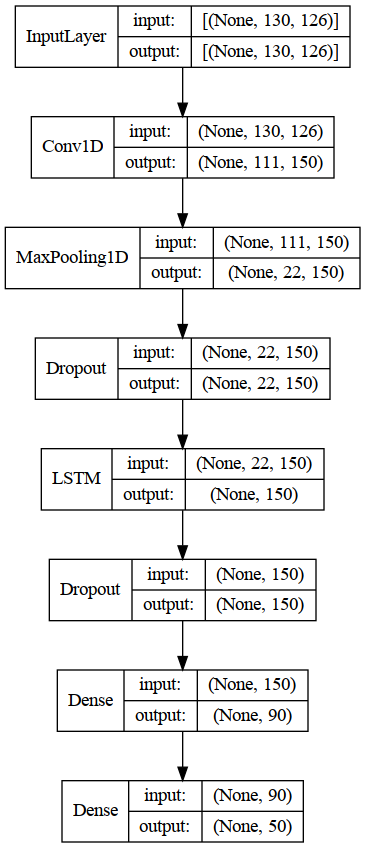

In [169]:
plot_model(reconstructed_model, show_shapes=True, show_layer_names=False)

In [170]:
reconstructed_model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_6 (Conv1D)           (None, 111, 150)          378150    
                                                                 
 max_pooling1d_6 (MaxPooling  (None, 22, 150)          0         
 1D)                                                             
                                                                 
 dropout_12 (Dropout)        (None, 22, 150)           0         
                                                                 
 lstm (LSTM)                 (None, 150)               180600    
                                                                 
 dropout_13 (Dropout)        (None, 150)               0         
                                                                 
 dense_12 (Dense)            (None, 90)                13590     
                                                      

In [171]:
reconstructed_model.evaluate(Xval,Yval)

11/11 [==============================] - 1s 8ms/step - loss: 0.9024 - f1_score: 0.8460


[0.9023572206497192, 0.8459616303443909]

In [172]:
print(classification_report(np.argmax(Yval, axis=1), np.argmax(reconstructed_model.predict(Xval), axis=1),
                            digits=3, target_names=label_map))

11/11 [==============================] - 0s 7ms/step
              precision    recall  f1-score   support

         AXE      0.857     0.750     0.800         8
    BACKPACK      0.857     1.000     0.923         6
  BASKETBALL      0.833     1.000     0.909        10
         BEE      1.000     1.000     1.000        10
        BELT      0.800     1.000     0.889         4
        BITE      0.889     1.000     0.941         8
   BREAKFAST      0.857     1.000     0.923         6
      CANCER      1.000     1.000     1.000         8
   CHRISTMAS      1.000     0.833     0.909         6
    CONFUSED      1.000     1.000     1.000         6
        DARK      1.000     1.000     1.000         4
        DEAF      1.000     0.833     0.909         6
      DECIDE      1.000     0.667     0.800         6
      DEMAND      0.778     0.875     0.824         8
     DEVELOP      0.714     0.833     0.769         6
      DINNER      0.700     0.875     0.778         8
         DOG      0.857     

In [139]:
# convert the history.history dict to a pandas DataFrame:     
hist_df = pd.DataFrame(History.history) 

# or save to csv: 
hist_csv_file = '1 1DCNN + 1 LSTM Mish/history.csv'
with open(hist_csv_file, mode='w') as f:
    hist_df.to_csv(f)

In [140]:
hist_df.tail()

loss  f1_score  val_loss  val_f1_score
495  0.277541  0.944062  1.831507      0.723541
496  0.201111  0.959958  1.871319      0.746672
497  0.168756  0.967545  1.899163      0.735039
498  0.173993  0.962826  1.933714      0.735603
499  0.191856  0.967615  1.936698      0.730486

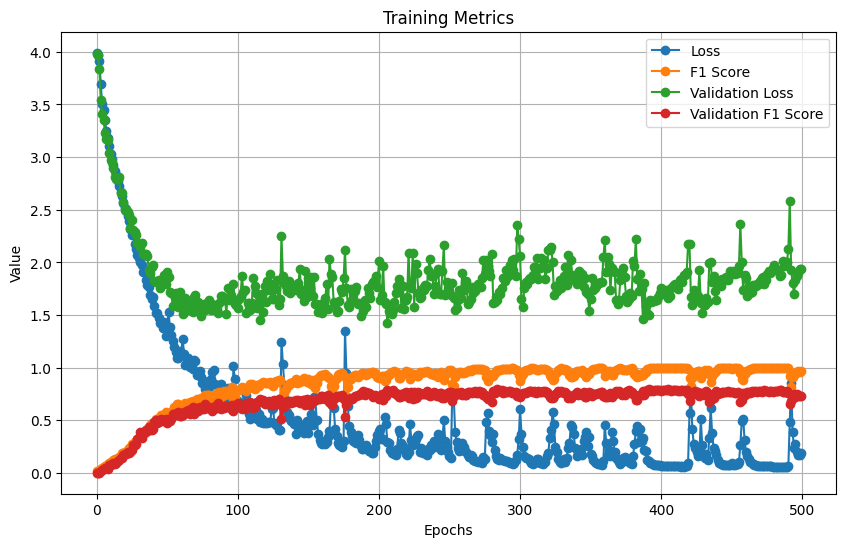

In [141]:
# Plotting
import matplotlib.pyplot as plt
epochs = range(0, 500)
plt.figure(figsize=(10, 6))
plt.plot(epochs, hist_df.loss, marker='o', label='Loss')
plt.plot(epochs, hist_df.f1_score, marker='o', label='F1 Score')
plt.plot(epochs, hist_df.val_loss, marker='o', label='Validation Loss')
plt.plot(epochs, hist_df.val_f1_score, marker='o', label='Validation F1 Score')
plt.title('Training Metrics')
plt.xlabel('Epochs')
plt.ylabel('Value')
plt.legend()
plt.grid()
plt.show()

## Hyperparameter Tuning 2 1D CNN Layer + 1 LSTM

In [173]:
from keras_tuner import HyperModel
from kerastuner.tuners import Hyperband
from tensorflow.keras.callbacks import EarlyStopping


In [174]:
from tensorflow.keras import regularizers
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout, SpatialDropout1D, GRU
import keras_tuner
from keras_tuner import HyperModel
from kerastuner.tuners import Hyperband
from tensorflow.keras.callbacks import EarlyStopping
import tensorflow_addons as tfa

class HyperModel(HyperModel):
    def __init__(self, input_shape, num_classes):
        self.input_shape = input_shape
        self.num_classes = num_classes

    def build(self, hp):
        act_function = hp.Choice('dense_activation',values=['selu','mish','gelu','elu','relu'],default='gelu')
        model = Sequential()
        model.add(Conv1D(filters=hp.Int('filters_1',min_value=50,max_value=200,step=25,default=150),
                         kernel_size=hp.Choice('kernel_1',values=[3,4,5,6,7,8,9,10],default=5,),
                         activation=act_function,input_shape=self.input_shape))
        model.add(MaxPooling1D(pool_size=hp.Choice('pool_1',values=[3,4,5,6,7,8,9,10],default=5,)))
        model.add(Conv1D(filters=hp.Int('filters_1',min_value=50,max_value=200,step=25,default=150),
                         kernel_size=hp.Choice('kernel_2',values=[1,2,3,4,5],default=5,),
                         activation=act_function,input_shape=self.input_shape))
        model.add(MaxPooling1D(pool_size=hp.Choice('pool_2',values=[1,2,3,4,5],default=5,)))
        model.add(Dropout(rate=hp.Float('dropout_1',min_value=0.0,max_value=0.9,default=0.8,step=0.05,)))
        model.add(LSTM(units=hp.Int('units_1',min_value=50,max_value=200,step=25,default=100),
                      return_sequences=False,
                      kernel_regularizer=regularizers.l2(hp.Float('regularizer',min_value=1e-4,
                                                                max_value=1e-2,sampling='LOG',
                                                                default=.001))))
        model.add(Dropout(rate=hp.Float('dropout_2',min_value=0.0,max_value=0.9,default=0.7,step=0.05,)))
        model.add(Dense(units=hp.Int('units_2',min_value=70,max_value=120,step=10,default=80),activation=act_function))
        model.add(Dense(self.num_classes, activation='softmax'))

        model.compile(tf.optimizers.experimental.Nadam(hp.Float('learning_rate',min_value=1e-4,
                                                                max_value=1e-2,sampling='LOG',
                                                                default=.00062198175395800846)),
            loss='categorical_crossentropy',
            metrics=[tfa.metrics.F1Score(num_classes=50, average='macro')]
        )
        return model

hypermodel = HyperModel(input_shape=(130,126), num_classes=50)

In [175]:
HYPERBAND_MAX_EPOCHS = 300
#MAX_TRIALS = 20
EXECUTION_PER_TRIAL = 2

tuner = Hyperband(
    hypermodel,
    max_epochs=HYPERBAND_MAX_EPOCHS,
    objective=keras_tuner.Objective("val_f1_score", direction="max"),
    seed=10,
    executions_per_trial=EXECUTION_PER_TRIAL,
    directory='/media/kristian/HDD/ASL_Citizen/RTMPose-L/hyperband/',
    project_name='2_1D_CNN+1_LSTM',
    overwrite=False)

INFO:tensorflow:Reloading Tuner from /media/kristian/HDD/ASL_Citizen/Mediapipe/hyperband/2_1D_CNN+1_LSTM/tuner0.json


INFO:tensorflow:Reloading Tuner from /media/kristian/HDD/ASL_Citizen/Mediapipe/hyperband/2_1D_CNN+1_LSTM/tuner0.json


In [138]:
tuner.search_space_summary()

Search space summary
Default search space size: 13
dense_activation (Choice)
{'default': 'gelu', 'conditions': [], 'values': ['selu', 'LeakyReLU', 'gelu', 'elu', 'relu'], 'ordered': False}
num_filters_1 (Choice)
{'default': 150, 'conditions': [], 'values': [100, 125, 150, 200], 'ordered': True}
kernel_1 (Choice)
{'default': 5, 'conditions': [], 'values': [3, 4, 5, 6, 7, 8, 9, 10], 'ordered': True}
pool_1 (Choice)
{'default': 5, 'conditions': [], 'values': [3, 4, 5, 6, 7, 8, 9, 10], 'ordered': True}
num_filters_2 (Choice)
{'default': 150, 'conditions': [], 'values': [100, 125, 150, 200], 'ordered': True}
kernel_2 (Choice)
{'default': 5, 'conditions': [], 'values': [1, 2, 3, 4, 5], 'ordered': True}
pool_2 (Choice)
{'default': 5, 'conditions': [], 'values': [1, 2, 3, 4, 5], 'ordered': True}
dropout_1 (Float)
{'default': 0.8, 'conditions': [], 'min_value': 0.0, 'max_value': 0.9, 'step': 0.05, 'sampling': 'linear'}
units_1 (Int)
{'default': 100, 'conditions': [], 'min_value': 50, 'max_value

In [121]:
es = EarlyStopping(monitor="val_f1_score",patience=30,restore_best_weights=True,mode="max")

In [122]:
log_dir = os.path.join('Logs')
tb_callback = TensorBoard(log_dir=log_dir)

In [123]:
tuner.search(Xtrain, Ytrain, epochs=1000, validation_data=(Xval,Yval),batch_size=96,callbacks=[es])

Trial 725 Complete [00h 04m 22s]
val_f1_score: 0.7795123159885406

Best val_f1_score So Far: 0.8277291357517242
Total elapsed time: 06h 58m 31s
INFO:tensorflow:Oracle triggered exit


In [176]:
best_model = tuner.get_best_models(num_models=10)[0]

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=100.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [178]:
best_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 125, 200)          151400    
                                                                 
 max_pooling1d (MaxPooling1D  (None, 41, 200)          0         
 )                                                               
                                                                 
 conv1d_1 (Conv1D)           (None, 37, 200)           200200    
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 9, 200)           0         
 1D)                                                             
                                                                 
 dropout (Dropout)           (None, 9, 200)            0         
                                                                 
 lstm (LSTM)                 (None, 100)               1

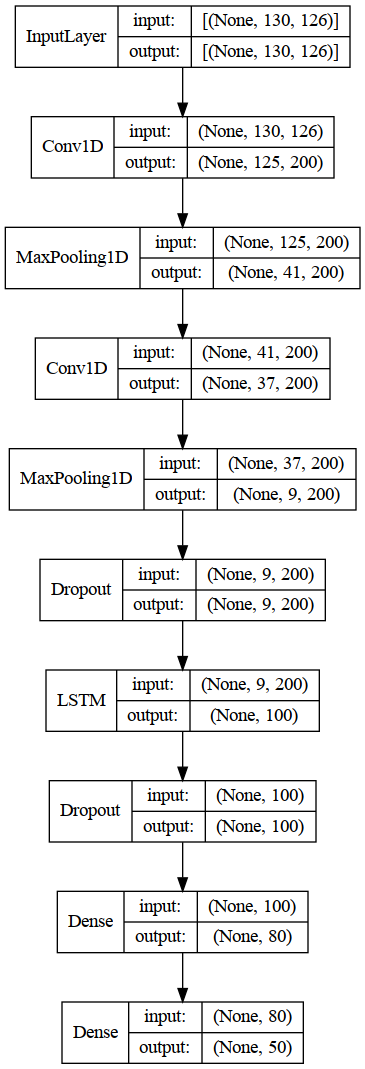

In [179]:
plot_model(best_model, show_shapes=True, show_layer_names=False)

In [124]:
tuner.results_summary()

Results summary
Results in /media/kristian/HDD/ASL_Citizen/Mediapipe/hyperband/2_1D_CNN+1_LSTM
Showing 10 best trials
Objective(name="val_f1_score", direction="max")

Trial 0593 summary
Hyperparameters:
dense_activation: elu
num_filters_1: 200
kernel_1: 6
pool_1: 3
num_filters_2: 200
kernel_2: 5
pool_2: 4
dropout_1: 0.4
units_1: 100
regularizer: 0.0006846425037139133
dropout_2: 0.35000000000000003
units_2: 80
learning_rate: 0.000729692360234673
tuner/epochs: 100
tuner/initial_epoch: 34
tuner/bracket: 4
tuner/round: 3
tuner/trial_id: 0582
Score: 0.8277291357517242

Trial 0599 summary
Hyperparameters:
dense_activation: selu
num_filters_1: 150
kernel_1: 7
pool_1: 6
num_filters_2: 150
kernel_2: 3
pool_2: 3
dropout_1: 0.4
units_1: 150
regularizer: 0.00653461510776706
dropout_2: 0.4
units_2: 100
learning_rate: 0.0013448774790511659
tuner/epochs: 300
tuner/initial_epoch: 100
tuner/bracket: 4
tuner/round: 4
tuner/trial_id: 0594
Score: 0.8256885707378387

Trial 0706 summary
Hyperparameters:
den

In [181]:
loss, accuracy = best_model.evaluate(Xval, Yval)

11/11 [==============================] - 0s 7ms/step - loss: 0.8976 - f1_score: 0.8322


In [182]:
print(classification_report(np.argmax(Yval, axis=1), np.argmax(best_model.predict(Xval), axis=1),
                            digits=3, target_names=label_map))

11/11 [==============================] - 0s 6ms/step
              precision    recall  f1-score   support

         AXE      0.875     0.875     0.875         8
    BACKPACK      0.857     1.000     0.923         6
  BASKETBALL      0.909     1.000     0.952        10
         BEE      0.875     0.700     0.778        10
        BELT      1.000     1.000     1.000         4
        BITE      0.889     1.000     0.941         8
   BREAKFAST      0.500     1.000     0.667         6
      CANCER      0.875     0.875     0.875         8
   CHRISTMAS      1.000     0.667     0.800         6
    CONFUSED      1.000     1.000     1.000         6
        DARK      1.000     1.000     1.000         4
        DEAF      0.857     1.000     0.923         6
      DECIDE      1.000     0.667     0.800         6
      DEMAND      0.875     0.875     0.875         8
     DEVELOP      0.857     1.000     0.923         6
      DINNER      0.750     0.750     0.750         8
         DOG      0.833     

In [143]:
#bestHP = tuner.get_best_hyperparameters(num_trials=5)[2]
bestHP = tuner.get_best_hyperparameters(num_trials=10)[0]

In [147]:
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath='2 1DCNN + 1 LSTM/',
    monitor='val_f1_score',
    mode='max',
    save_best_only=True)

In [149]:
print("[INFO] training the best model...")
model = tuner.hypermodel.build(bestHP)
History = model.fit(x=Xtrain, y=Ytrain,validation_data= (Xval,Yval), batch_size=96,epochs=500, verbose=1,callbacks=[model_checkpoint_callback])
#History = model.fit(x=Xtrain, y=Ytrain,validation_data= (Xval,Yval), batch_size=96,epochs=500, verbose=1)

[INFO] training the best model...
Epoch 1/500
28/28 [==============================] - 7s 76ms/step - loss: 4.0234 - f1_score: 0.0352 - val_loss: 3.8364 - val_f1_score: 0.0324
Epoch 2/500
28/28 [==============================] - 1s 43ms/step - loss: 3.5778 - f1_score: 0.0821 - val_loss: 3.2264 - val_f1_score: 0.1212
Epoch 3/500
28/28 [==============================] - 1s 43ms/step - loss: 3.0834 - f1_score: 0.1607 - val_loss: 2.7370 - val_f1_score: 0.2027
Epoch 4/500
28/28 [==============================] - 1s 42ms/step - loss: 2.6890 - f1_score: 0.2470 - val_loss: 2.4535 - val_f1_score: 0.2896
Epoch 5/500
28/28 [==============================] - 1s 45ms/step - loss: 2.3891 - f1_score: 0.3268 - val_loss: 2.2291 - val_f1_score: 0.3545
Epoch 6/500
28/28 [==============================] - 1s 42ms/step - loss: 2.1382 - f1_score: 0.4111 - val_loss: 1.9987 - val_f1_score: 0.4197
Epoch 7/500
28/28 [==============================] - 1s 44ms/step - loss: 1.9564 - f1_score: 0.4513 - val_loss: 1.

28/28 [==============================] - 1s 50ms/step - loss: 0.1185 - f1_score: 0.9812 - val_loss: 1.0498 - val_f1_score: 0.7990
Epoch 116/500
28/28 [==============================] - 1s 49ms/step - loss: 0.1069 - f1_score: 0.9856 - val_loss: 1.0359 - val_f1_score: 0.7996
Epoch 117/500
28/28 [==============================] - 1s 50ms/step - loss: 0.1230 - f1_score: 0.9786 - val_loss: 1.2760 - val_f1_score: 0.7672
Epoch 118/500
28/28 [==============================] - 2s 57ms/step - loss: 0.1382 - f1_score: 0.9721 - val_loss: 1.0951 - val_f1_score: 0.7797
Epoch 119/500
28/28 [==============================] - 1s 47ms/step - loss: 0.1138 - f1_score: 0.9825 - val_loss: 0.9937 - val_f1_score: 0.8006
Epoch 120/500
28/28 [==============================] - 1s 44ms/step - loss: 0.1219 - f1_score: 0.9830 - val_loss: 1.0994 - val_f1_score: 0.7973
Epoch 121/500
28/28 [==============================] - 1s 44ms/step - loss: 0.1062 - f1_score: 0.9859 - val_loss: 1.0718 - val_f1_score: 0.7809
Epoch 

Epoch 172/500
28/28 [==============================] - 1s 50ms/step - loss: 0.0758 - f1_score: 0.9930 - val_loss: 0.9887 - val_f1_score: 0.8127
Epoch 173/500
28/28 [==============================] - 1s 44ms/step - loss: 0.1001 - f1_score: 0.9854 - val_loss: 1.1504 - val_f1_score: 0.7781
Epoch 174/500
28/28 [==============================] - 1s 45ms/step - loss: 0.1005 - f1_score: 0.9845 - val_loss: 1.1758 - val_f1_score: 0.7840
Epoch 175/500
28/28 [==============================] - 1s 44ms/step - loss: 0.0991 - f1_score: 0.9850 - val_loss: 1.1404 - val_f1_score: 0.8084
Epoch 176/500
28/28 [==============================] - 1s 51ms/step - loss: 0.1005 - f1_score: 0.9828 - val_loss: 1.1633 - val_f1_score: 0.7930
Epoch 177/500
28/28 [==============================] - 1s 44ms/step - loss: 0.1195 - f1_score: 0.9811 - val_loss: 1.0610 - val_f1_score: 0.8204
Epoch 178/500
28/28 [==============================] - 1s 44ms/step - loss: 0.0967 - f1_score: 0.9849 - val_loss: 1.0191 - val_f1_score:

Epoch 229/500
28/28 [==============================] - 1s 45ms/step - loss: 0.0705 - f1_score: 0.9927 - val_loss: 1.2703 - val_f1_score: 0.7876
Epoch 230/500
28/28 [==============================] - 1s 52ms/step - loss: 0.0714 - f1_score: 0.9915 - val_loss: 1.1744 - val_f1_score: 0.8005
Epoch 231/500
28/28 [==============================] - 1s 44ms/step - loss: 0.0860 - f1_score: 0.9857 - val_loss: 1.0959 - val_f1_score: 0.8092
Epoch 232/500
28/28 [==============================] - 1s 44ms/step - loss: 0.0752 - f1_score: 0.9914 - val_loss: 1.2032 - val_f1_score: 0.7864
Epoch 233/500
28/28 [==============================] - 1s 45ms/step - loss: 0.0899 - f1_score: 0.9871 - val_loss: 1.1717 - val_f1_score: 0.7961
Epoch 234/500
28/28 [==============================] - 1s 53ms/step - loss: 0.0913 - f1_score: 0.9852 - val_loss: 1.1059 - val_f1_score: 0.8182
Epoch 235/500
28/28 [==============================] - 1s 44ms/step - loss: 0.0838 - f1_score: 0.9884 - val_loss: 1.0873 - val_f1_score:

INFO:tensorflow:Assets written to: 2D CNN + 1 LSTM/assets


INFO:tensorflow:Assets written to: 2D CNN + 1 LSTM/assets


28/28 [==============================] - 13s 467ms/step - loss: 0.0934 - f1_score: 0.9876 - val_loss: 1.0164 - val_f1_score: 0.8319
Epoch 239/500
28/28 [==============================] - 1s 42ms/step - loss: 0.0824 - f1_score: 0.9883 - val_loss: 1.0679 - val_f1_score: 0.8051
Epoch 240/500
28/28 [==============================] - 1s 43ms/step - loss: 0.0963 - f1_score: 0.9825 - val_loss: 1.1965 - val_f1_score: 0.7933
Epoch 241/500
28/28 [==============================] - 1s 46ms/step - loss: 0.1071 - f1_score: 0.9794 - val_loss: 1.1279 - val_f1_score: 0.7888
Epoch 242/500
28/28 [==============================] - 1s 43ms/step - loss: 0.0922 - f1_score: 0.9866 - val_loss: 1.0828 - val_f1_score: 0.8099
Epoch 243/500
27/28 [===========================>..] - ETA: 0s - loss: 0.0784 - f1_score: 0.9918

INFO:tensorflow:Assets written to: 2D CNN + 1 LSTM/assets


INFO:tensorflow:Assets written to: 2D CNN + 1 LSTM/assets


28/28 [==============================] - 11s 409ms/step - loss: 0.0778 - f1_score: 0.9918 - val_loss: 1.0105 - val_f1_score: 0.8383
Epoch 244/500
28/28 [==============================] - 1s 43ms/step - loss: 0.0694 - f1_score: 0.9929 - val_loss: 0.9783 - val_f1_score: 0.8279
Epoch 245/500
28/28 [==============================] - 1s 47ms/step - loss: 0.0678 - f1_score: 0.9915 - val_loss: 0.9142 - val_f1_score: 0.8325
Epoch 246/500
28/28 [==============================] - 1s 44ms/step - loss: 0.0687 - f1_score: 0.9941 - val_loss: 1.0267 - val_f1_score: 0.8256
Epoch 247/500
28/28 [==============================] - 1s 44ms/step - loss: 0.0778 - f1_score: 0.9890 - val_loss: 1.0364 - val_f1_score: 0.8072
Epoch 248/500
28/28 [==============================] - 1s 46ms/step - loss: 0.0800 - f1_score: 0.9886 - val_loss: 0.9801 - val_f1_score: 0.8211
Epoch 249/500
28/28 [==============================] - 2s 54ms/step - loss: 0.0764 - f1_score: 0.9894 - val_loss: 0.9745 - val_f1_score: 0.8104
Epoc

Epoch 300/500
28/28 [==============================] - 2s 55ms/step - loss: 0.0682 - f1_score: 0.9929 - val_loss: 1.2261 - val_f1_score: 0.7839
Epoch 301/500
28/28 [==============================] - 1s 48ms/step - loss: 0.0736 - f1_score: 0.9882 - val_loss: 1.1310 - val_f1_score: 0.8168
Epoch 302/500
28/28 [==============================] - 1s 45ms/step - loss: 0.0981 - f1_score: 0.9806 - val_loss: 1.1617 - val_f1_score: 0.7999
Epoch 303/500
28/28 [==============================] - 1s 49ms/step - loss: 0.1018 - f1_score: 0.9794 - val_loss: 1.2391 - val_f1_score: 0.8036
Epoch 304/500
28/28 [==============================] - 1s 49ms/step - loss: 0.0834 - f1_score: 0.9877 - val_loss: 1.2290 - val_f1_score: 0.8050
Epoch 305/500
28/28 [==============================] - 1s 44ms/step - loss: 0.0739 - f1_score: 0.9899 - val_loss: 1.3164 - val_f1_score: 0.8025
Epoch 306/500
28/28 [==============================] - 1s 44ms/step - loss: 0.0817 - f1_score: 0.9877 - val_loss: 1.2172 - val_f1_score:

INFO:tensorflow:Assets written to: 2D CNN + 1 LSTM/assets


INFO:tensorflow:Assets written to: 2D CNN + 1 LSTM/assets


28/28 [==============================] - 30s 1s/step - loss: 0.0667 - f1_score: 0.9923 - val_loss: 1.1463 - val_f1_score: 0.8391
Epoch 328/500
28/28 [==============================] - 1s 48ms/step - loss: 0.0628 - f1_score: 0.9937 - val_loss: 1.1304 - val_f1_score: 0.8265
Epoch 329/500
28/28 [==============================] - 1s 43ms/step - loss: 0.0742 - f1_score: 0.9902 - val_loss: 1.3274 - val_f1_score: 0.7927
Epoch 330/500
28/28 [==============================] - 1s 42ms/step - loss: 0.0781 - f1_score: 0.9885 - val_loss: 1.1583 - val_f1_score: 0.8108
Epoch 331/500
28/28 [==============================] - 1s 42ms/step - loss: 0.0776 - f1_score: 0.9880 - val_loss: 1.0466 - val_f1_score: 0.8216
Epoch 332/500
28/28 [==============================] - 1s 46ms/step - loss: 0.0850 - f1_score: 0.9863 - val_loss: 1.1713 - val_f1_score: 0.8245
Epoch 333/500
28/28 [==============================] - 1s 42ms/step - loss: 0.0721 - f1_score: 0.9909 - val_loss: 1.1077 - val_f1_score: 0.8296
Epoch 3

INFO:tensorflow:Assets written to: 2D CNN + 1 LSTM/assets


INFO:tensorflow:Assets written to: 2D CNN + 1 LSTM/assets


28/28 [==============================] - 11s 393ms/step - loss: 0.0837 - f1_score: 0.9901 - val_loss: 1.1136 - val_f1_score: 0.8416
Epoch 346/500
28/28 [==============================] - 1s 42ms/step - loss: 0.0834 - f1_score: 0.9881 - val_loss: 1.1657 - val_f1_score: 0.8156
Epoch 347/500
28/28 [==============================] - 1s 42ms/step - loss: 0.0716 - f1_score: 0.9911 - val_loss: 1.1742 - val_f1_score: 0.7976
Epoch 348/500
28/28 [==============================] - 1s 42ms/step - loss: 0.0771 - f1_score: 0.9915 - val_loss: 1.0470 - val_f1_score: 0.8316
Epoch 349/500
28/28 [==============================] - 1s 45ms/step - loss: 0.0917 - f1_score: 0.9811 - val_loss: 1.0243 - val_f1_score: 0.8399
Epoch 350/500
28/28 [==============================] - 1s 43ms/step - loss: 0.0848 - f1_score: 0.9868 - val_loss: 1.0944 - val_f1_score: 0.8145
Epoch 351/500
28/28 [==============================] - 1s 43ms/step - loss: 0.0879 - f1_score: 0.9878 - val_loss: 1.1120 - val_f1_score: 0.8178
Epoc

INFO:tensorflow:Assets written to: 2D CNN + 1 LSTM/assets


INFO:tensorflow:Assets written to: 2D CNN + 1 LSTM/assets


28/28 [==============================] - 12s 443ms/step - loss: 0.0529 - f1_score: 0.9984 - val_loss: 1.1828 - val_f1_score: 0.8457
Epoch 399/500
27/28 [===========================>..] - ETA: 0s - loss: 0.0615 - f1_score: 0.9946

INFO:tensorflow:Assets written to: 2D CNN + 1 LSTM/assets


INFO:tensorflow:Assets written to: 2D CNN + 1 LSTM/assets


28/28 [==============================] - 10s 374ms/step - loss: 0.0613 - f1_score: 0.9948 - val_loss: 1.1771 - val_f1_score: 0.8494
Epoch 400/500
28/28 [==============================] - 1s 45ms/step - loss: 0.0768 - f1_score: 0.9892 - val_loss: 1.1589 - val_f1_score: 0.8267
Epoch 401/500
28/28 [==============================] - 1s 42ms/step - loss: 0.0943 - f1_score: 0.9858 - val_loss: 1.2908 - val_f1_score: 0.8147
Epoch 402/500
28/28 [==============================] - 1s 42ms/step - loss: 0.0803 - f1_score: 0.9861 - val_loss: 1.2643 - val_f1_score: 0.8052
Epoch 403/500
28/28 [==============================] - 1s 43ms/step - loss: 0.0770 - f1_score: 0.9877 - val_loss: 1.1356 - val_f1_score: 0.8186
Epoch 404/500
28/28 [==============================] - 1s 46ms/step - loss: 0.0682 - f1_score: 0.9941 - val_loss: 1.1842 - val_f1_score: 0.7948
Epoch 405/500
28/28 [==============================] - 1s 43ms/step - loss: 0.0914 - f1_score: 0.9852 - val_loss: 1.1231 - val_f1_score: 0.8179
Epoc

Epoch 456/500
28/28 [==============================] - 1s 49ms/step - loss: 0.0621 - f1_score: 0.9948 - val_loss: 1.3217 - val_f1_score: 0.8213
Epoch 457/500
28/28 [==============================] - 1s 44ms/step - loss: 0.0570 - f1_score: 0.9958 - val_loss: 1.3550 - val_f1_score: 0.8187
Epoch 458/500
28/28 [==============================] - 1s 44ms/step - loss: 0.0581 - f1_score: 0.9955 - val_loss: 1.2891 - val_f1_score: 0.8198
Epoch 459/500
28/28 [==============================] - 1s 44ms/step - loss: 0.0694 - f1_score: 0.9924 - val_loss: 1.3106 - val_f1_score: 0.8158
Epoch 460/500
28/28 [==============================] - 1s 51ms/step - loss: 0.0621 - f1_score: 0.9942 - val_loss: 1.3726 - val_f1_score: 0.8068
Epoch 461/500
28/28 [==============================] - 1s 44ms/step - loss: 0.0816 - f1_score: 0.9866 - val_loss: 1.3785 - val_f1_score: 0.7884
Epoch 462/500
28/28 [==============================] - 1s 44ms/step - loss: 0.0813 - f1_score: 0.9891 - val_loss: 1.3637 - val_f1_score:

In [150]:
print(classification_report(np.argmax(Yval, axis=1), np.argmax(model.predict(Xval), axis=1),
                            digits=3, target_names=label_map))

11/11 [==============================] - 1s 7ms/step
              precision    recall  f1-score   support

         AXE      1.000     0.750     0.857         8
    BACKPACK      0.625     0.833     0.714         6
  BASKETBALL      1.000     1.000     1.000        10
         BEE      1.000     0.800     0.889        10
        BELT      0.667     1.000     0.800         4
        BITE      0.889     1.000     0.941         8
   BREAKFAST      0.600     1.000     0.750         6
      CANCER      0.889     1.000     0.941         8
   CHRISTMAS      1.000     0.667     0.800         6
    CONFUSED      0.750     1.000     0.857         6
        DARK      0.800     1.000     0.889         4
        DEAF      0.857     1.000     0.923         6
      DECIDE      1.000     0.667     0.800         6
      DEMAND      1.000     0.625     0.769         8
     DEVELOP      1.000     0.833     0.909         6
      DINNER      1.000     0.625     0.769         8
         DOG      1.000     

In [183]:
reconstructed_model = tf.keras.models.load_model("2 1DCNN + 1 LSTM")

In [184]:
best_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 125, 200)          151400    
                                                                 
 max_pooling1d (MaxPooling1D  (None, 41, 200)          0         
 )                                                               
                                                                 
 conv1d_1 (Conv1D)           (None, 37, 200)           200200    
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 9, 200)           0         
 1D)                                                             
                                                                 
 dropout (Dropout)           (None, 9, 200)            0         
                                                                 
 lstm (LSTM)                 (None, 100)               1

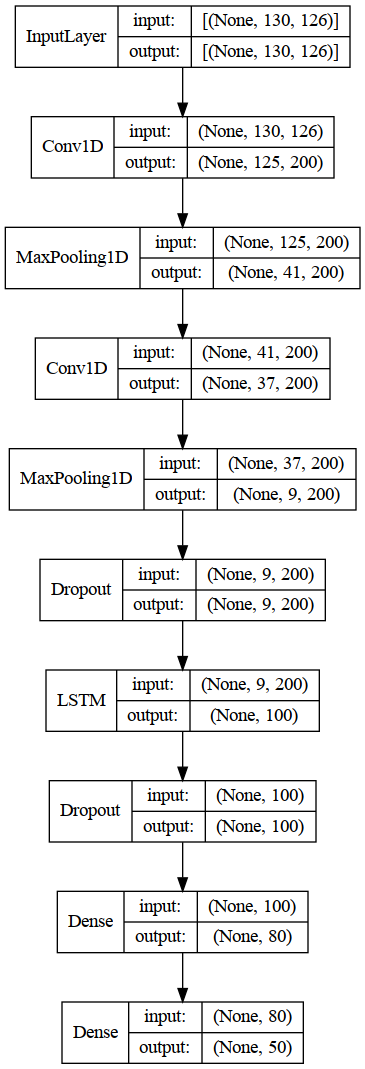

In [185]:
plot_model(best_model, show_shapes=True, show_layer_names=False)

In [186]:
reconstructed_model.evaluate(Xval,Yval)

11/11 [==============================] - 1s 7ms/step - loss: 1.1771 - f1_score: 0.8494


[1.17708420753479, 0.849355936050415]

In [153]:
print(classification_report(np.argmax(Yval, axis=1), np.argmax(reconstructed_model.predict(Xval), axis=1),
                            digits=3, target_names=label_map))

11/11 [==============================] - 1s 6ms/step
              precision    recall  f1-score   support

         AXE      1.000     0.750     0.857         8
    BACKPACK      0.750     1.000     0.857         6
  BASKETBALL      0.909     1.000     0.952        10
         BEE      1.000     0.800     0.889        10
        BELT      1.000     1.000     1.000         4
        BITE      0.800     1.000     0.889         8
   BREAKFAST      0.600     1.000     0.750         6
      CANCER      1.000     1.000     1.000         8
   CHRISTMAS      1.000     0.667     0.800         6
    CONFUSED      0.857     1.000     0.923         6
        DARK      0.800     1.000     0.889         4
        DEAF      1.000     1.000     1.000         6
      DECIDE      1.000     0.667     0.800         6
      DEMAND      0.889     1.000     0.941         8
     DEVELOP      1.000     0.667     0.800         6
      DINNER      0.857     0.750     0.800         8
         DOG      0.750     

In [100]:
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath='2 1DCNN + 1 LSTM Mish/',
    monitor='val_f1_score',
    mode='max',
    save_best_only=True)

In [122]:
act_function = mish
model = Sequential()
model.add(Conv1D(filters=200,kernel_size=6,activation=act_function,input_shape=(130,399)))
model.add(MaxPooling1D(pool_size=3))
model.add(Conv1D(filters=200,kernel_size=5,activation=act_function))
model.add(MaxPooling1D(pool_size=4))
model.add(Dropout(.4))
model.add(LSTM(units=100,return_sequences=False,kernel_regularizer=regularizers.l2(.0006846425037139133)))
model.add(Dropout(.35))
model.add(Dense(units=80,activation=act_function))
model.add(Dense(50, activation='softmax'))

model.compile(tf.optimizers.experimental.Nadam(.000729692360234673),
            loss='categorical_crossentropy',
            metrics=[tfa.metrics.F1Score(num_classes=50, average='macro')])
model.summary()
History = model.fit(x=Xtrain, y=Ytrain,validation_data= (Xval,Yval), batch_size=96,epochs=500, 
                    verbose=1,callbacks=[])

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_2 (Conv1D)           (None, 111, 200)          1596200   
                                                                 
 max_pooling1d_2 (MaxPooling  (None, 11, 200)          0         
 1D)                                                             
                                                                 
 conv1d_3 (Conv1D)           (None, 7, 200)            200200    
                                                                 
 max_pooling1d_3 (MaxPooling  (None, 1, 200)           0         
 1D)                                                             
                                                                 
 dropout (Dropout)           (None, 1, 200)            0         
                                                                 
 lstm (LSTM)                 (None, 100)              

2023-09-04 22:45:20.489428: I tensorflow/stream_executor/cuda/cuda_dnn.cc:384] Loaded cuDNN version 8700
2023-09-04 22:45:21.480331: I tensorflow/compiler/xla/service/service.cc:173] XLA service 0x7f44a8faa780 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2023-09-04 22:45:21.480361: I tensorflow/compiler/xla/service/service.cc:181]   StreamExecutor device (0): NVIDIA GeForce MX250, Compute Capability 6.1
2023-09-04 22:45:21.490407: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2023-09-04 22:45:21.650862: I tensorflow/compiler/jit/xla_compilation_cache.cc:476] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


28/28 [==============================] - 11s 185ms/step - loss: 4.1080 - f1_score: 0.0168 - val_loss: 4.0523 - val_f1_score: 0.0010
Epoch 2/500
28/28 [==============================] - 4s 139ms/step - loss: 4.0536 - f1_score: 0.0163 - val_loss: 4.0238 - val_f1_score: 8.6643e-04
Epoch 3/500
28/28 [==============================] - 4s 140ms/step - loss: 4.0250 - f1_score: 0.0191 - val_loss: 4.0080 - val_f1_score: 0.0038
Epoch 4/500
28/28 [==============================] - 4s 140ms/step - loss: 4.0092 - f1_score: 0.0133 - val_loss: 3.9938 - val_f1_score: 0.0022
Epoch 5/500
28/28 [==============================] - 4s 140ms/step - loss: 3.9943 - f1_score: 0.0153 - val_loss: 3.9811 - val_f1_score: 0.0038
Epoch 6/500
28/28 [==============================] - 4s 140ms/step - loss: 3.9869 - f1_score: 0.0128 - val_loss: 3.9742 - val_f1_score: 0.0018
Epoch 7/500
28/28 [==============================] - 4s 140ms/step - loss: 3.9742 - f1_score: 0.0123 - val_loss: 3.9724 - val_f1_score: 0.0029
Epoch 

Epoch 58/500
28/28 [==============================] - 4s 150ms/step - loss: 2.1568 - f1_score: 0.3279 - val_loss: 2.5542 - val_f1_score: 0.2332
Epoch 59/500
28/28 [==============================] - 4s 150ms/step - loss: 2.1068 - f1_score: 0.3371 - val_loss: 2.5413 - val_f1_score: 0.2129
Epoch 60/500
28/28 [==============================] - 4s 149ms/step - loss: 2.0504 - f1_score: 0.3564 - val_loss: 2.5456 - val_f1_score: 0.2129
Epoch 61/500
28/28 [==============================] - 4s 149ms/step - loss: 2.0593 - f1_score: 0.3481 - val_loss: 2.5146 - val_f1_score: 0.2154
Epoch 62/500
28/28 [==============================] - 4s 148ms/step - loss: 2.0169 - f1_score: 0.3635 - val_loss: 2.5399 - val_f1_score: 0.2481
Epoch 63/500
28/28 [==============================] - 4s 150ms/step - loss: 1.9549 - f1_score: 0.3819 - val_loss: 2.5079 - val_f1_score: 0.2747
Epoch 64/500
28/28 [==============================] - 4s 150ms/step - loss: 1.9717 - f1_score: 0.3791 - val_loss: 2.4824 - val_f1_score:

KeyboardInterrupt: 

In [241]:
print(classification_report(np.argmax(Yval, axis=1), np.argmax(model.predict(Xval), axis=1),
                            digits=3, target_names=label_map))

11/11 [==============================] - 1s 10ms/step
              precision    recall  f1-score   support

         AXE      0.857     0.750     0.800         8
    BACKPACK      0.857     1.000     0.923         6
  BASKETBALL      1.000     0.900     0.947        10
         BEE      1.000     0.800     0.889        10
        BELT      0.800     1.000     0.889         4
        BITE      0.800     1.000     0.889         8
   BREAKFAST      0.500     1.000     0.667         6
      CANCER      1.000     1.000     1.000         8
   CHRISTMAS      1.000     0.667     0.800         6
    CONFUSED      1.000     1.000     1.000         6
        DARK      0.800     1.000     0.889         4
        DEAF      0.750     1.000     0.857         6
      DECIDE      1.000     0.667     0.800         6
      DEMAND      0.875     0.875     0.875         8
     DEVELOP      0.714     0.833     0.769         6
      DINNER      1.000     0.875     0.933         8
         DOG      1.000    

2023-09-02 13:37:26.299113: W tensorflow/core/common_runtime/bfc_allocator.cc:290] Allocator (GPU_0_bfc) ran out of memory trying to allocate 1.48GiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.
2023-09-02 13:37:26.435276: W tensorflow/core/common_runtime/bfc_allocator.cc:290] Allocator (GPU_0_bfc) ran out of memory trying to allocate 1.30GiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.


In [187]:
reconstructed_model = tf.keras.models.load_model("2 1DCNN + 1 LSTM Mish")

In [188]:
reconstructed_model.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_12 (Conv1D)          (None, 125, 200)          151400    
                                                                 
 max_pooling1d_12 (MaxPoolin  (None, 41, 200)          0         
 g1D)                                                            
                                                                 
 conv1d_13 (Conv1D)          (None, 37, 200)           200200    
                                                                 
 max_pooling1d_13 (MaxPoolin  (None, 9, 200)           0         
 g1D)                                                            
                                                                 
 dropout_16 (Dropout)        (None, 9, 200)            0         
                                                                 
 lstm_9 (LSTM)               (None, 100)             

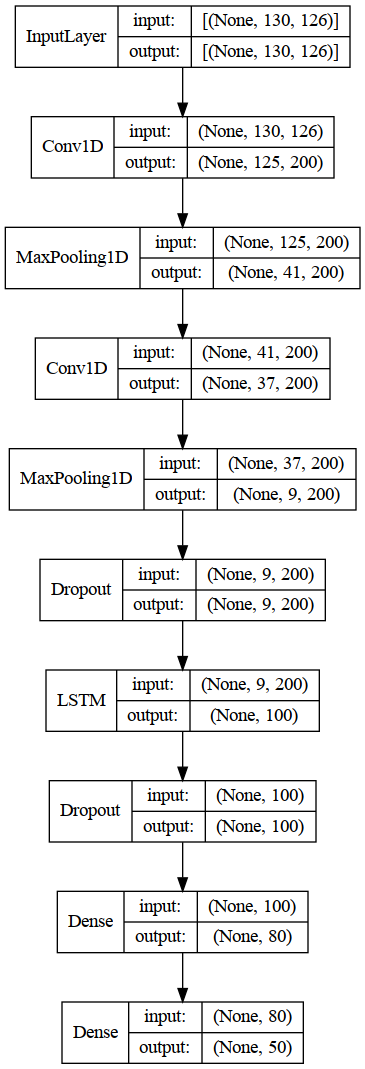

In [189]:
plot_model(reconstructed_model, show_shapes=True, show_layer_names=False)

In [190]:
reconstructed_model.evaluate(Xval,Yval)

11/11 [==============================] - 1s 7ms/step - loss: 1.1932 - f1_score: 0.8600


[1.1932461261749268, 0.8599855899810791]

In [246]:
print(classification_report(np.argmax(Yval, axis=1), np.argmax(reconstructed_model.predict(Xval), axis=1),
                            digits=3, target_names=label_map))

11/11 [==============================] - 1s 6ms/step
              precision    recall  f1-score   support

         AXE      0.857     0.750     0.800         8
    BACKPACK      0.857     1.000     0.923         6
  BASKETBALL      1.000     1.000     1.000        10
         BEE      1.000     0.800     0.889        10
        BELT      1.000     1.000     1.000         4
        BITE      0.800     1.000     0.889         8
   BREAKFAST      0.545     1.000     0.706         6
      CANCER      1.000     1.000     1.000         8
   CHRISTMAS      1.000     0.833     0.909         6
    CONFUSED      1.000     1.000     1.000         6
        DARK      1.000     1.000     1.000         4
        DEAF      0.857     1.000     0.923         6
      DECIDE      1.000     0.667     0.800         6
      DEMAND      0.857     0.750     0.800         8
     DEVELOP      0.667     1.000     0.800         6
      DINNER      1.000     0.875     0.933         8
         DOG      0.857     

In [247]:
# convert the history.history dict to a pandas DataFrame:     
hist_df = pd.DataFrame(History.history) 

# or save to csv: 
hist_csv_file = '2 1DCNN + 1 LSTM Mish/history.csv'
with open(hist_csv_file, mode='w') as f:
    hist_df.to_csv(f)

In [248]:
hist_df.tail()

loss  f1_score  val_loss  val_f1_score
495  0.079302  0.985210  1.615462      0.802009
496  0.060282  0.992731  1.552376      0.825935
497  0.065577  0.989388  1.363456      0.834468
498  0.061649  0.991161  1.471129      0.782187
499  0.070890  0.988843  1.312015      0.816548

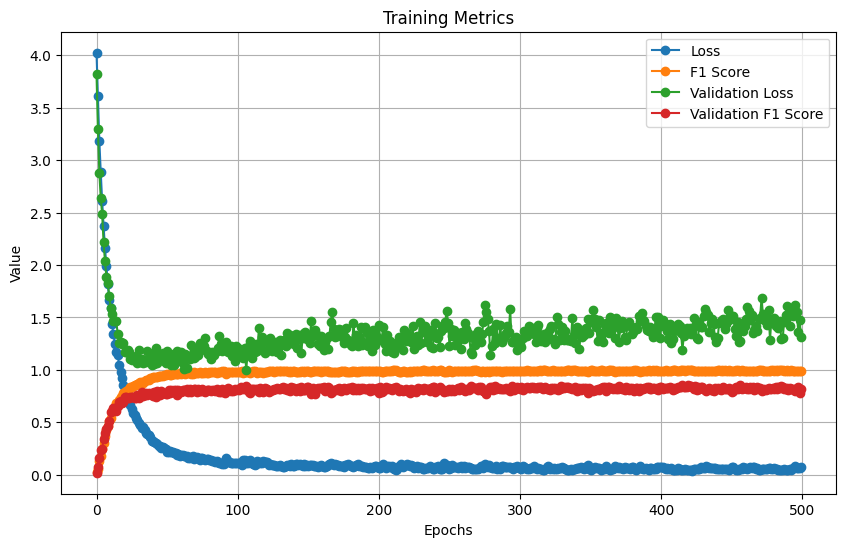

In [249]:
# Plotting
import matplotlib.pyplot as plt
epochs = range(0, 500)
plt.figure(figsize=(10, 6))
plt.plot(epochs, hist_df.loss, marker='o', label='Loss')
plt.plot(epochs, hist_df.f1_score, marker='o', label='F1 Score')
plt.plot(epochs, hist_df.val_loss, marker='o', label='Validation Loss')
plt.plot(epochs, hist_df.val_f1_score, marker='o', label='Validation F1 Score')
plt.title('Training Metrics')
plt.xlabel('Epochs')
plt.ylabel('Value')
plt.legend()
plt.grid()
plt.show()

# Realtime Implementation

In [159]:
#path = valdf.Path[40]
#print(path)
#path = '/home/kristian/ASL_Citizen/videos/9161417844146778-WHAT FOR.mp4'
#path = '/home/kristian/WLASL/videos_organized/christmas/10715.mp4'
path = 0
cap = cv2.VideoCapture(path)
#cap = cv2.VideoCapture(0)
#print(frames_from_file(path))
print(path)
sequence = [np.zeros(126)] * 130  # Initialize with 130 zero-filled sequences
predictions = ['None']
threshold = 0.8
i = 0
width= int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height= int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

writer= cv2.VideoWriter('test.avi', cv2.VideoWriter_fourcc(*'XVID'), 30, (width,height))

with mp_holistic.Holistic(static_image_mode=False,
                          model_complexity=0) as holistic:
    while True:
        ret, frame = cap.read()
        if ret == False:
            break
        fps = cap.get(cv2.CAP_PROP_FPS)
        frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        results = holistic.process(frame_rgb)
        # Left hand
        mp_drawing.draw_landmarks(
            frame, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS,
            mp_drawing.DrawingSpec(color=(0, 0, 0),
                                   thickness=2,
                                   circle_radius=1),
            mp_drawing.DrawingSpec(color=(0, 92, 230), thickness=2))

        # Right Hand
        mp_drawing.draw_landmarks(
            frame, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS,
            mp_drawing.DrawingSpec(color=(0, 0, 0),
                                   thickness=2,
                                   circle_radius=1),
            mp_drawing.DrawingSpec(color=(0, 92, 230), thickness=2))
                # 2. Prediction logic
            
            # Open the video file
        # Initialize an empty list to store the keypoints for each frame
        sequence = np.array(sequence)
        sequence = sequence.reshape(1, -1)
        sequence = scaler.inverse_transform(sequence).reshape(130, 126)
        sequence = sequence.tolist()
        sequence.append(extract_keypoints(results))
        sequence.pop(0)  # Remove the oldest element
        sequence = np.array(sequence)
        sequence = sequence.reshape(1, -1)
        sequence=scaler.transform(sequence).reshape(130, 126)
        sequence = sequence.tolist()
        i = i+1
        if i==5:
            i = 0
            res = best_model.predict(np.expand_dims(sequence, axis=0))[0]
            if res[np.argmax(res)] > threshold:
                print(inv_label_map[np.argmax(res)])
                predictions.append(inv_label_map[np.argmax(res)])
#        frame = cv2.flip(frame, 1)
        frame = cv2.putText(frame,'Last Prediction:'+ predictions[-1],(10,30),cv2.FONT_HERSHEY_SIMPLEX,1.0,(0, 255, 0), 2)
#        writer.write(frame)
        cv2.imshow("Frame", frame)
        if cv2.waitKey(1) & 0xFF == 27:
            break
cap.release()
cv2.destroyAllWindows()

0
1/1 [==============================] - 0s 22ms/step
AXE
1/1 [==============================] - 0s 22ms/step
AXE
1/1 [==============================] - 0s 22ms/step
AXE
1/1 [==============================] - 0s 23ms/step
AXE
1/1 [==============================] - 0s 28ms/step
AXE
1/1 [==============================] - 0s 27ms/step
AXE
1/1 [==============================] - 0s 21ms/step
AXE
1/1 [==============================] - 0s 25ms/step
AXE
1/1 [==============================] - 0s 21ms/step
AXE
1/1 [==============================] - 0s 24ms/step
AXE
1/1 [==============================] - 0s 23ms/step
AXE
1/1 [==============================] - 0s 27ms/step
AXE
1/1 [==============================] - 0s 22ms/step
AXE
1/1 [==============================] - 0s 23ms/step
AXE
1/1 [==============================] - 0s 24ms/step
AXE
1/1 [==============================] - 0s 26ms/step
AXE
1/1 [==============================] - 0s 28ms/step
AXE
1/1 [==============================] - 0s 22ms

In [149]:
cap.release()
cv2.destroyAllWindows()

In [81]:
#sequence = np.array(sequence)
sequence = sequence.reshape(1, -1)
sequence.shape
sequence=scaler.transform(sequence).reshape(130, 126)

ValueError: Input X contains infinity or a value too large for dtype('float64').

In [82]:
sequence

array([[-1.17129192e+049, -3.04913669e+046,  1.22797842e+299, ...,
         0.00000000e+000,  0.00000000e+000,  0.00000000e+000]])

In [162]:
predictions

[13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13]